In [1]:
# Nativos
import os
import sys

#calculo
import numpy as np
import pandas as pd
from IPython.display import display

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
warnings.filterwarnings('ignore')

from extract import MYExtract
from compare_for_day import compare_result, noise_control, calc_result
np.random.seed(123)

# **CARGA DE DATA**

In [2]:
df_global = pd.read_csv('all_peru21.csv', parse_dates=['Fecha'])
df_global.index = df_global['Fecha']
df_global['weekday'] = df_global['Fecha'].dt.weekday
df_global = df_global.sort_index()

del df_global.index.name
df_global.head()

Producto      Fecha  CodigoSapAgencia NombreAgencia  \
2018-01-01  Peru 21 2018-01-01        1200000065        CALLAO   
2018-01-01  Peru 21 2018-01-01        1200000077    LOS OLIVOS   
2018-01-01  Peru 21 2018-01-01        1200000077    LOS OLIVOS   
2018-01-01  Peru 21 2018-01-01        1200000077    LOS OLIVOS   
2018-01-01  Peru 21 2018-01-01        1200000077    LOS OLIVOS   

            CodigoSapCanilla                  NombreCanilla  Pauta  \
2018-01-01        1300000005             ABANTO LECCA LIDIA      2   
2018-01-01        1300005097         PALOMINO RAMIREZ DIANA      0   
2018-01-01        1300004633    MORENO ALVA MARIA ANASTACIA     10   
2018-01-01        1300004632              MORENO ALVA JULIO     10   
2018-01-01        1300004628  MORALES VILLALOBOS LOURDES V.      0   

            Devolucion  VentaNeta  Lim. Inf Vta. Proy  Vta. Proy  \
2018-01-01           2          0                 NaN        NaN   
2018-01-01           0          0                 NaN        NaN   
2018-01-01           1          9                 NaN        NaN   
2018-01-01           2          8                 NaN        NaN   
2018-01-01           0          0                 NaN        NaN   

            Lim. Sup Vta. Proy  weekday  
2018-01-01                 NaN        0  
2018-01-01                 NaN        0  
2018-01-01                 NaN        0  
2018-01-01                 NaN        0  
2018-01-01                 NaN        0

#### **OBSERVACION, por casos de datos faltantes**

In [3]:
col_proy = 'Vta. Proy'
col_venta = 'VentaNeta'
col_pauta = 'Pauta'

In [4]:
df_global[df_global['CodigoSapCanilla'] == 1300000384][[col_pauta, col_venta, col_proy]].tail(15)

Pauta  VentaNeta  Vta. Proy
2019-01-20      2          1        NaN
2019-01-21      1          0   0.000000
2019-01-22      1          0   0.000000
2019-01-23      1          0   0.000000
2019-01-24      0          0   0.000000
2019-01-25      0          0   0.000000
2019-01-26      0          0   0.000000
2019-01-27      2          1   1.053747
2019-01-28      0          0   0.000000
2019-01-29      0          0   0.000000
2019-01-30      0          0   0.000000
2019-01-31      0          0   0.000000
2019-02-01      0          0   0.000000
2019-02-02      0          0   0.000000
2019-02-03      1          1   0.998528

In [5]:
for cc in [1300002282,1300002397,1300002898,1300005286,
           1300005692,1300005969,1300011566,1300011920,
           1300012212,1300012650,1300012838,1300013177,
           1300013254,1300013469,1300013484,1300013547]:
    display(df_global[df_global['CodigoSapCanilla'] == cc][
        [col_pauta, col_venta, col_proy]].tail(15))


Pauta  VentaNeta  Vta. Proy
2018-11-24     15         12        NaN
2018-11-25      3          3        NaN
2018-11-26     20         17        NaN
2018-11-27     20         14        NaN
2018-11-28     19         12        NaN
2018-11-29     15         14        NaN
2018-11-30     16         14        NaN
2018-12-01     11         10        NaN
2018-12-02      5          5        NaN
2018-12-03     17         17        NaN
2018-12-04     16         13        NaN
2018-12-05     16         16        NaN
2018-12-06      0          0        NaN
2018-12-08      0          0        NaN
2018-12-09      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-18      7          6        NaN
2018-01-19     10          6        NaN
2018-01-20      0          0        NaN
2018-01-21      5          3        NaN
2018-01-22     10          6        NaN
2018-01-23      6          2        NaN
2018-01-24     10          7        NaN
2018-01-25      8          7        NaN
2018-01-26     11          9        NaN
2018-01-27      0          0        NaN
2018-01-28      5          2        NaN
2018-01-29      0          0        NaN
2018-01-30      0          0        NaN
2018-01-31      0          0        NaN
2018-02-03      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-09      0          0        NaN
2018-01-10      0          0        NaN
2018-01-11      0          0        NaN
2018-01-12      0          0        NaN
2018-01-13      0          0        NaN
2018-01-14      0          0        NaN
2018-01-15      0          0        NaN
2018-01-16      0          0        NaN
2018-01-17      0          0        NaN
2018-01-18      0          0        NaN
2018-01-19      0          0        NaN
2018-01-20      0          0        NaN
2018-01-21      0          0        NaN
2018-01-22      0          0        NaN
2018-01-23      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-02-19      0          0        NaN
2018-02-20      0          0        NaN
2018-02-21      0          0        NaN
2018-02-22      0          0        NaN
2018-02-23      0          0        NaN
2018-02-24      0          0        NaN
2018-02-25      0          0        NaN
2018-02-26      0          0        NaN
2018-02-27      0          0        NaN
2018-02-28      0          0        NaN
2018-03-01      0          0        NaN
2018-03-02      0          0        NaN
2018-03-03      0          0        NaN
2018-03-04      0          0        NaN
2018-03-05      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-09      0          0        NaN
2018-01-10      0          0        NaN
2018-01-11      0          0        NaN
2018-01-12      0          0        NaN
2018-01-13      0          0        NaN
2018-01-14      0          0        NaN
2018-01-15      0          0        NaN
2018-01-16      0          0        NaN
2018-01-17      0          0        NaN
2018-01-18      0          0        NaN
2018-01-19      0          0        NaN
2018-01-20      0          0        NaN
2018-01-21      0          0        NaN
2018-01-22      0          0        NaN
2018-01-23      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-08-13      0          0        NaN
2018-08-14      0          0        NaN
2018-08-15      0          0        NaN
2018-08-16      0          0        NaN
2018-08-17      0          0        NaN
2018-08-18      0          0        NaN
2018-08-19      0          0        NaN
2018-08-20      0          0        NaN
2018-08-21      0          0        NaN
2018-08-22      0          0        NaN
2018-08-23      0          0        NaN
2018-08-24      0          0        NaN
2018-08-25      0          0        NaN
2018-08-26      0          0        NaN
2018-08-27      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-09      0          0        NaN
2018-01-10      0          0        NaN
2018-01-11      0          0        NaN
2018-01-12      0          0        NaN
2018-01-13      0          0        NaN
2018-01-14      0          0        NaN
2018-01-15      0          0        NaN
2018-01-16      0          0        NaN
2018-01-17      0          0        NaN
2018-01-18      0          0        NaN
2018-01-19      0          0        NaN
2018-01-20      0          0        NaN
2018-01-21      0          0        NaN
2018-01-22     15         15        NaN
2018-01-23      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-08-13      0          0        NaN
2018-08-14      0          0        NaN
2018-08-15      0          0        NaN
2018-08-16      0          0        NaN
2018-08-17      0          0        NaN
2018-08-18      0          0        NaN
2018-08-19      0          0        NaN
2018-08-20      0          0        NaN
2018-08-21      0          0        NaN
2018-08-22      0          0        NaN
2018-08-23      0          0        NaN
2018-08-24      0          0        NaN
2018-08-25      0          0        NaN
2018-08-26      0          0        NaN
2018-08-27      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-06-16      4          2        NaN
2018-06-17      2          2        NaN
2018-06-18      4          1        NaN
2018-06-19      1          0        NaN
2018-06-20      4          3        NaN
2018-06-21      0          0        NaN
2018-06-22      5          1        NaN
2018-06-23      4          3        NaN
2018-06-24      3          3        NaN
2018-06-25      3          1        NaN
2018-06-26      2          0        NaN
2018-06-27      3          3        NaN
2018-06-28      0          0        NaN
2018-06-30      0          0        NaN
2018-07-01      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-06-16      1          0        NaN
2018-06-17      2          1        NaN
2018-06-18      1          0        NaN
2018-06-19      1          0        NaN
2018-06-20      1          0        NaN
2018-06-21      0          0        NaN
2018-06-22      2          0        NaN
2018-06-23      1          0        NaN
2018-06-24      2          1        NaN
2018-06-25      1          0        NaN
2018-06-26      1          0        NaN
2018-06-27      1          1        NaN
2018-06-28      0          0        NaN
2018-06-30      0          0        NaN
2018-07-01      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-07-12      0          0        NaN
2018-07-13      0          0        NaN
2018-07-14      0          0        NaN
2018-07-15      0          0        NaN
2018-07-16      0          0        NaN
2018-07-17      0          0        NaN
2018-07-18      0          0        NaN
2018-07-19      0          0        NaN
2018-07-20      0          0        NaN
2018-07-21      0          0        NaN
2018-07-22      0          0        NaN
2018-07-23      0          0        NaN
2018-07-24      0          0        NaN
2018-07-25      0          0        NaN
2018-07-28      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-03      0          0        NaN
2018-01-04      0          0        NaN
2018-01-05      0          0        NaN
2018-01-06      0          0        NaN
2018-01-07      0          0        NaN
2018-01-08      0          0        NaN
2018-01-09      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-05      0          0        NaN
2018-01-08      0          0        NaN
2018-01-09      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-07-12      0          0        NaN
2018-07-13      0          0        NaN
2018-07-14      0          0        NaN
2018-07-15      0          0        NaN
2018-07-16      0          0        NaN
2018-07-17      0          0        NaN
2018-07-18      0          0        NaN
2018-07-19      0          0        NaN
2018-07-20      0          0        NaN
2018-07-21      0          0        NaN
2018-07-22      0          0        NaN
2018-07-23      0          0        NaN
2018-07-24      0          0        NaN
2018-07-25      0          0        NaN
2018-07-28      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-01-15      3          0        NaN
2018-01-16      2          0        NaN
2018-01-17      2          1        NaN
2018-01-18      1          0        NaN
2018-01-19      2          0        NaN
2018-01-20      2          1        NaN
2018-01-21      2          0        NaN
2018-01-22      2          0        NaN
2018-01-23      2          0        NaN
2018-01-24      2          0        NaN
2018-01-25      1          0        NaN
2018-01-26      2          2        NaN
2018-01-27      0          0        NaN
2018-01-28      0          0        NaN
2018-01-29      0          0        NaN

Pauta  VentaNeta  Vta. Proy
2018-06-19      0          0        NaN
2018-06-20      1          0        NaN
2018-06-21      0          0        NaN
2018-06-22      1          0        NaN
2018-06-23      1          0        NaN
2018-06-24      3          0        NaN
2018-06-25      1          0        NaN
2018-06-26      0          0        NaN
2018-06-27      1          0        NaN
2018-06-28      0          0        NaN
2018-06-29      0          0        NaN
2018-06-30      0          0        NaN
2018-07-01      0          0        NaN
2018-07-02      0          0        NaN
2018-07-03      0          0        NaN

### Filtrado Preventivo

In [6]:
df = df_global[(df_global['Pauta'] > 0) | (df_global['VentaNeta'].notnull())]

if df.shape == df_global.shape:
    del df_global

df.shape

(295479, 13)

## Validacion de nulos Globales

In [7]:
df.isnull().sum(), df.shape

(Producto                   0
 Fecha                      0
 CodigoSapAgencia           0
 NombreAgencia              0
 CodigoSapCanilla           0
 NombreCanilla              0
 Pauta                      0
 Devolucion                 0
 VentaNeta                  0
 Lim. Inf Vta. Proy    285015
 Vta. Proy             285015
 Lim. Sup Vta. Proy    285015
 weekday                    0
 dtype: int64, (295479, 13))

## Configuracion

Se procede a realizar dos intervalos de validación

In [8]:
until_train_1 = '2019-01-20'
since_date_1 = '2019-01-21'
until_date_1 = '2019-01-27'

In [9]:
df.tail()

Producto      Fecha  CodigoSapAgencia NombreAgencia  \
2019-02-03  Peru 21 2019-02-03        1200001015  CANTO GRANDE   
2019-02-03  Peru 21 2019-02-03        1200001015  CANTO GRANDE   
2019-02-03  Peru 21 2019-02-03        1200001015  CANTO GRANDE   
2019-02-03  Peru 21 2019-02-03        1200001015  CANTO GRANDE   
2019-02-03  Peru 21 2019-02-03        1200000043  MIRAFLORES 1   

            CodigoSapCanilla                  NombreCanilla  Pauta  \
2019-02-03        1300012513       SALAZAR CORONEL VIRGILIO      2   
2019-02-03        1300012514  SALZAR VILCHEZ OSCAR VIRGILIO      1   
2019-02-03        1300012515            ROJAS BILBAO EMILIA      1   
2019-02-03        1300012232       OTERO SANCHEZ OMAR CESAR      1   
2019-02-03        1300014543        ARANDA SOLANO EMPERADOR      3   

            Devolucion  VentaNeta  Lim. Inf Vta. Proy  Vta. Proy  \
2019-02-03           0          2            0.000000   0.000000   
2019-02-03           0          1            0.694915   0.998889   
2019-02-03           1          0            0.000000   0.000000   
2019-02-03           1          0            0.316834   0.544568   
2019-02-03           0          3            1.534909   1.959923   

            Lim. Sup Vta. Proy  weekday  
2019-02-03            0.000000        6  
2019-02-03            1.302862        6  
2019-02-03            0.000000        6  
2019-02-03            0.772302        6  
2019-02-03            2.384938        6

In [10]:
agencias_detectadas = df.groupby(by=['NombreAgencia'])['CodigoSapAgencia'].max()
agencias_detectadas

NombreAgencia
CALLAO          1200000065
CANTO GRANDE    1200001015
JESUS MARIA     1200000047
LINCE           1200000026
LOS OLIVOS      1200000077
MIRAFLORES 1    1200000044
Name: CodigoSapAgencia, dtype: int64

## Creación de contenedor de canillas por agencia

In [11]:
%%time
extractor_21_27 = MYExtract(df, since=since_date_1, until=until_date_1)

Detección de valores nulos en pronosticos o ventas netas


Fecha  Vta. Proy  VentaNeta
CodigoSapCanilla                                 
1300002282       2018-12-09        NaN         20
1300002397       2018-02-03        NaN         14
1300002898       2018-01-23        NaN          0
1300005286       2018-03-05        NaN          4
1300005692       2018-01-23        NaN          0
1300005969       2018-08-27        NaN          6
1300011566       2018-01-23        NaN         15
1300011920       2018-08-27        NaN         24
1300012212       2018-07-01        NaN          4
1300012650       2018-07-01        NaN          4
1300012838       2018-07-28        NaN         10
1300013177       2018-01-09        NaN          0
1300013254       2018-01-09        NaN          0
1300013469       2018-07-28        NaN          5
1300013484       2018-01-29        NaN          2
1300013547       2018-07-03        NaN          4

Total canillas:  764
Canillas a analizar:  748
Columna de dias de semana creada
CPU times: user 64.1 ms, sys: 12.9 ms, total: 77 ms
Wall time: 74 ms


### JESUS MARIA

Total canillas en agencia:  157
Canillas a trabajar:  157
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-22    1
2018-12-29    1
2019-01-05    1
2019-01-12    1
2019-01-19    1
Name: VentaNeta, dtype: int64 num_day  5
Se detecto una relacion lineal :  2018-12-16    1
2018-12-23    1
2018-12-30    1
2019-01-06    1
2019-01-20    1
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6

 DETECCION DE CASO INVALIDO  1300003350
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////

 DETECCION DE CASO INVALIDO  1300011543

Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-11    6
2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018

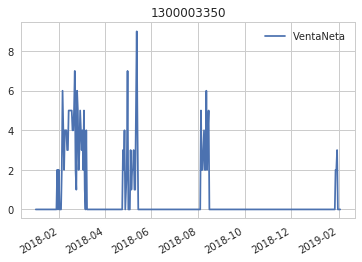

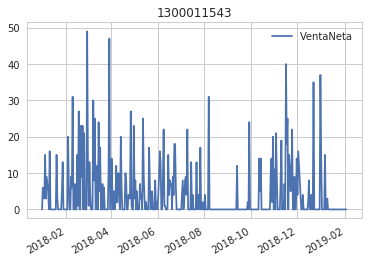

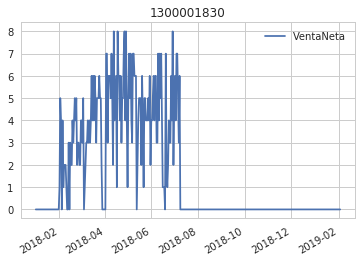

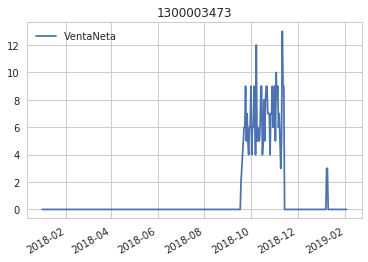

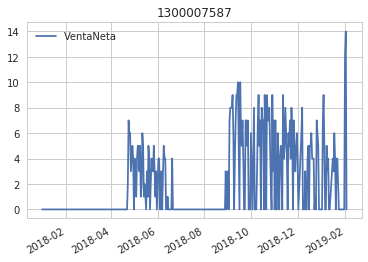

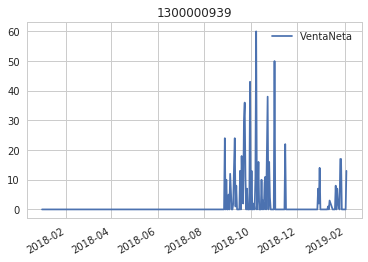

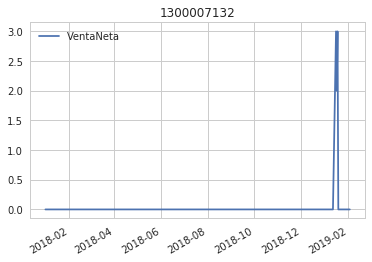

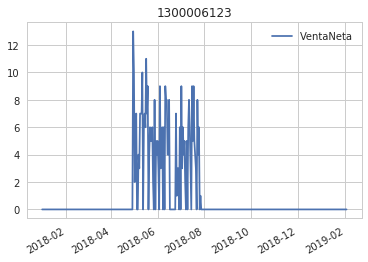

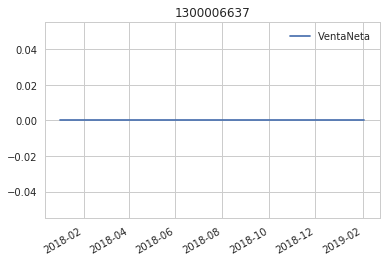

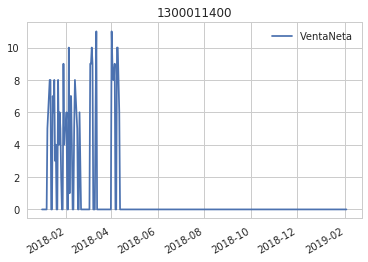

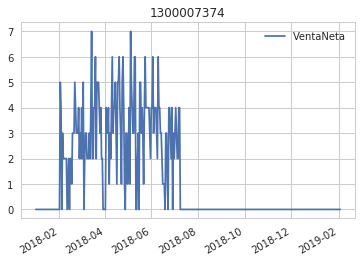

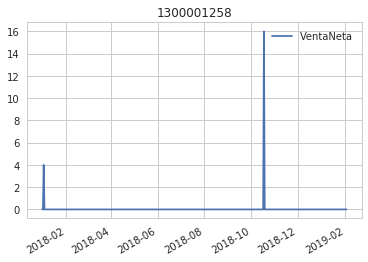

In [12]:
%%time
dicc_jesus_maria = extractor_21_27.populate_data(1200000047)

Total canillas en agencia:  161
Canillas a trabajar:  159

 DETECCION DE CASO INVALIDO  1300006402
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-19    1
2018-12-26    2
2019-01-02    0
2019-01-09    1
2019-01-16    1
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-1


 DETECCION DE CASO INVALIDO  1300007752
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0


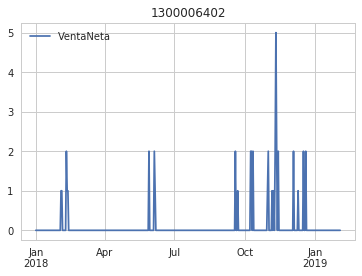

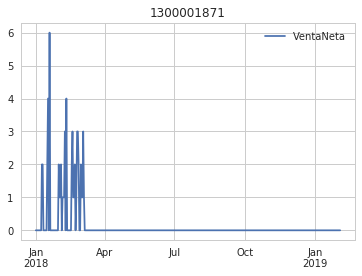

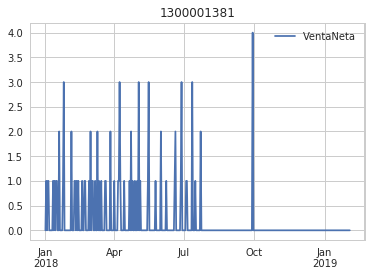

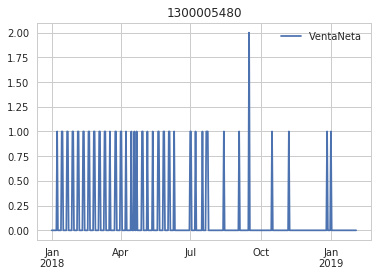

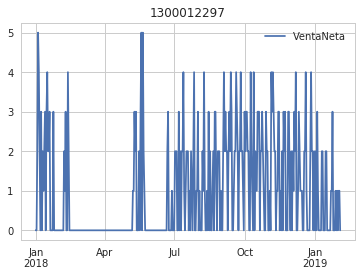

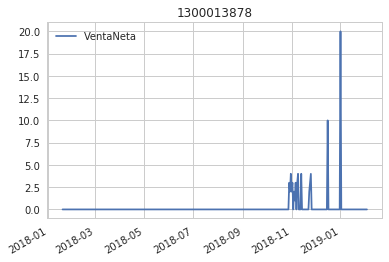

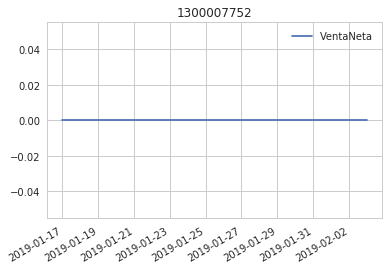

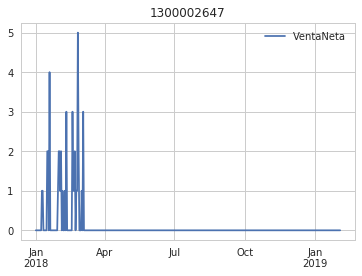

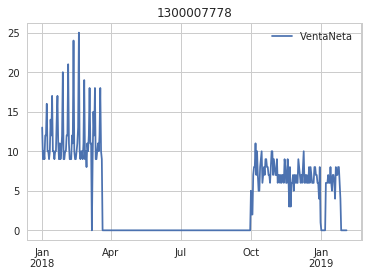

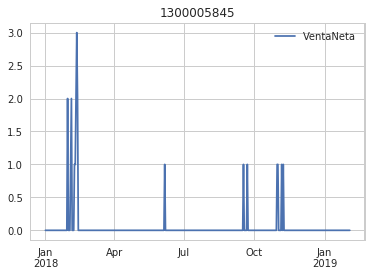

In [13]:
%%time
dicc_callao = extractor_21_27.populate_data(1200000065)

Total canillas en agencia:  72
Canillas a trabajar:  69
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5

 DETECCION DE CASO INVALIDO  1300012419
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    1
2018-12-31    1
2019-01-07    1
2019-01-14    1
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-

Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5

 DETECCION DE CASO INVALIDO  1300013749
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-20    1
2018-12-27    1
2019-01-03    1
2019-01-10    1
2019-01-17    1
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-20    1
2018-12-27    1
2019-01-03    1
2019-01-10    1


Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-20    1
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019

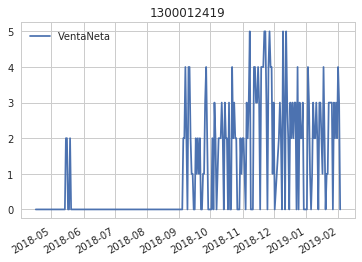

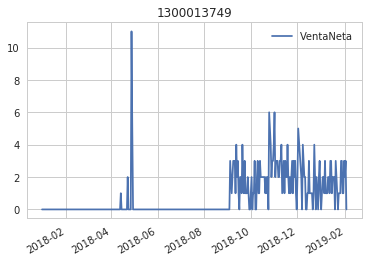

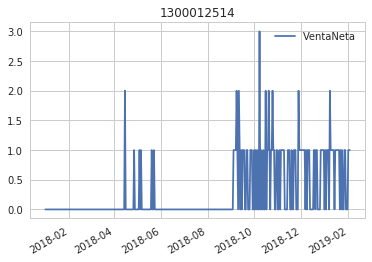

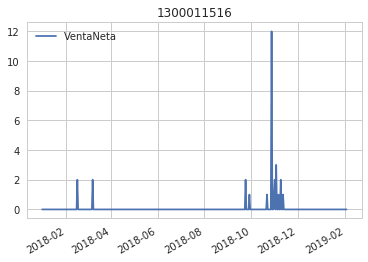

In [14]:
%%time
dicc_canto_grande = extractor_21_27.populate_data(1200001015)

Total canillas en agencia:  151
Canillas a trabajar:  151
Se detecto una relacion lineal :  2018-12-18    1
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1

 DETECCION DE CASO INVALIDO  1300004881
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6

 DETECCION DE CASO INVALIDO  1300012125
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////

 DETECCION DE CASO INVALIDO  1300002396
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    

Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6

 DETECCION DE CASO INVALIDO  1300000684
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////

 DETECCION DE CASO INVALIDO  1300007870
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-18    2
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaN

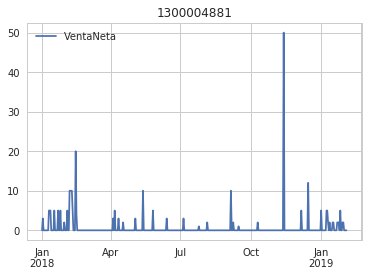

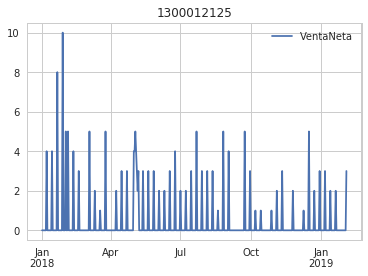

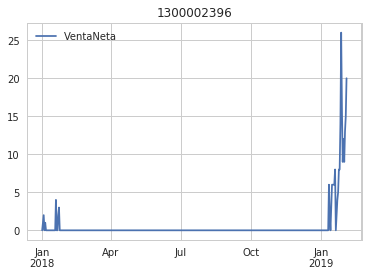

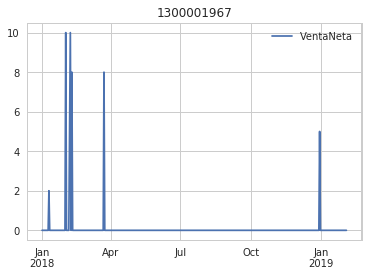

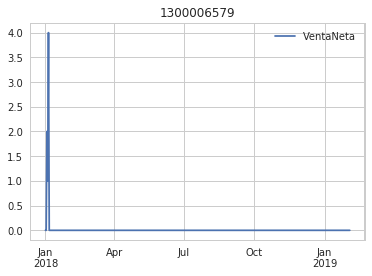

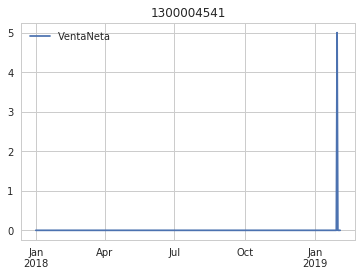

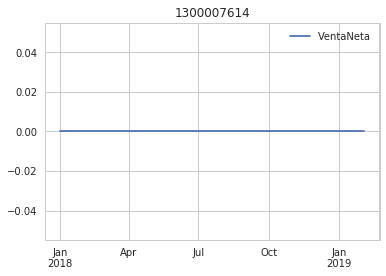

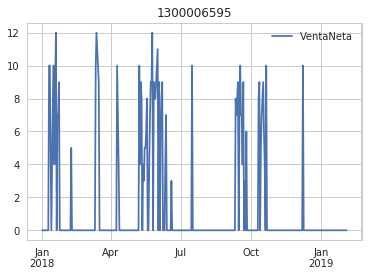

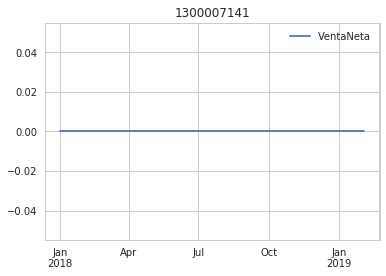

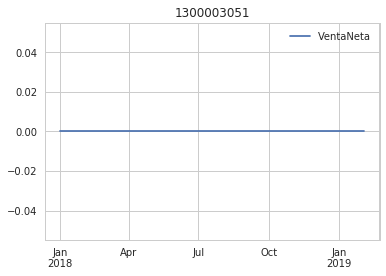

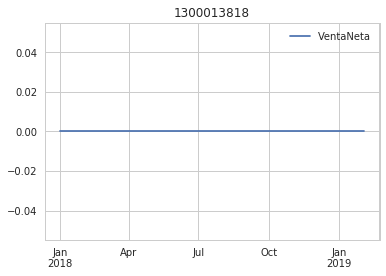

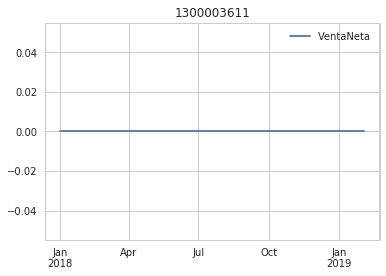

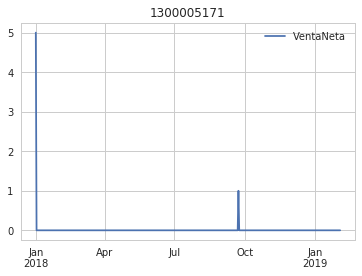

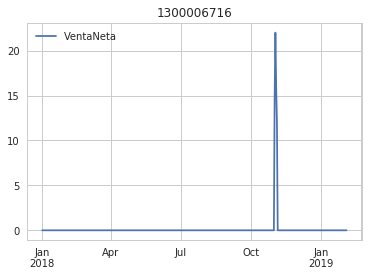

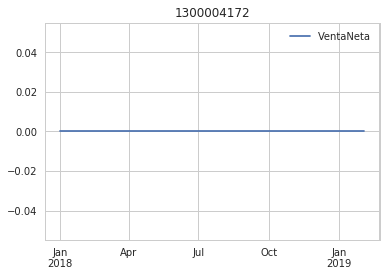

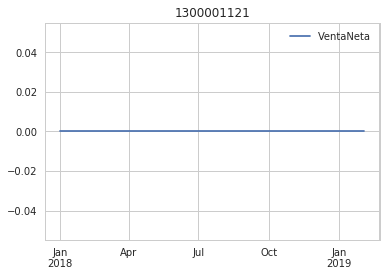

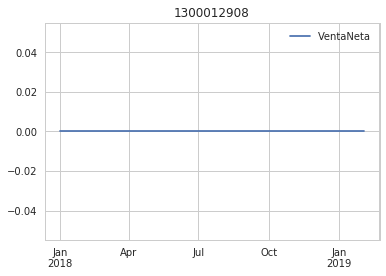

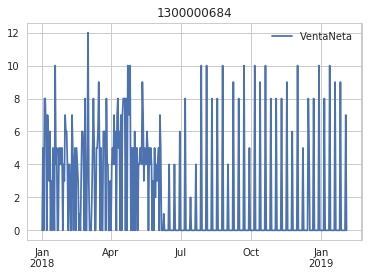

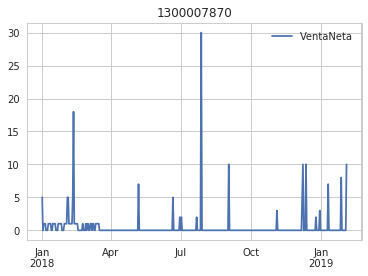

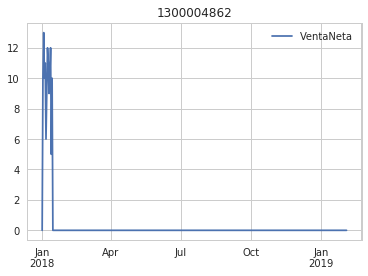

In [15]:
%%time
dicc_lince = extractor_21_27.populate_data(1200000026)

Total canillas en agencia:  101
Canillas a trabajar:  100
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5
Se detecto u

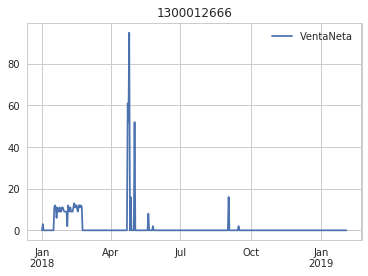

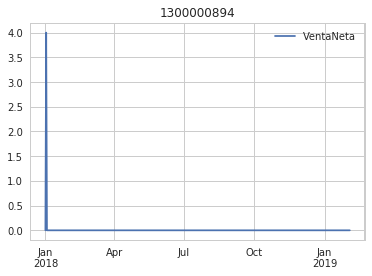

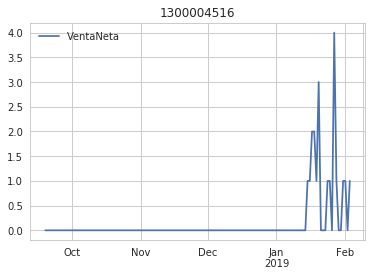

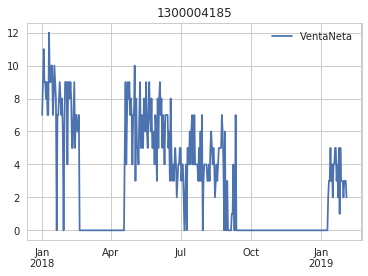

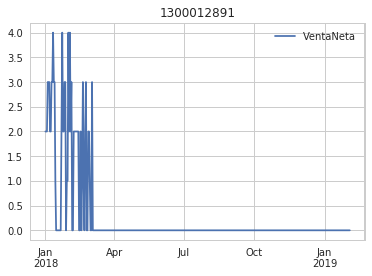

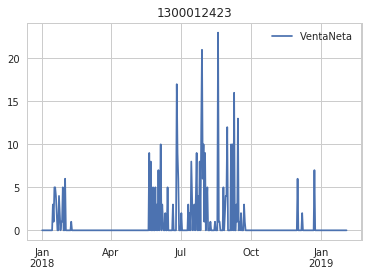

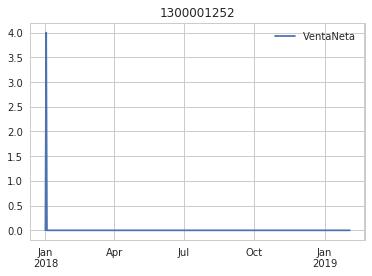

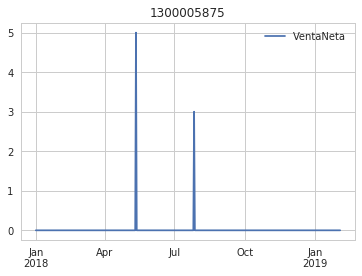

In [16]:
%%time
dicc_olivos = extractor_21_27.populate_data(1200000077)

Total canillas en agencia:  40
Canillas a trabajar:  37
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-18    5
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una

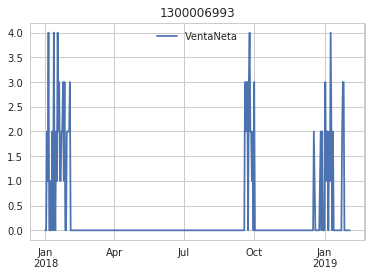

In [17]:
%%time
dicc_miraflores = extractor_21_27.populate_data(1200000044)

In [18]:
nulos = 0
for k, v in dicc_jesus_maria.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [19]:
nulos = 0
for k, v in dicc_callao.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [20]:
nulos = 0
for k, v in dicc_canto_grande.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [21]:
nulos = 0
for k, v in dicc_olivos.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [22]:
nulos = 0
for k, v in dicc_miraflores.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [23]:
%%time
dicc_jesus_maria = noise_control(dicc_jesus_maria)

Relacion Lineal :  1300005890 0 [0. 1. 1. 1. 1.] 1.0
()()  1300005890 0.97 = 3 ///  0.03 = 0
()()  1300005890 0.97 = 4 ///  0.03 = 0
()()  1300005890 0.97 = 3 ///  0.03 = 0
()()  1300005890 0.97 = 3 ///  0.03 = 0
()()  1300005890 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300005890 6 [0 0 0 0 0] 0
()()  1300007428 0.97 = 6 ///  0.03 = 1
()()  1300007428 0.95 = 6 ///  0.05 = 3
()()  1300007428 0.95 = 7 ///  0.05 = 3
()()  1300007428 0.95 = 7 ///  0.05 = 1
()()  1300007428 0.95 = 6 ///  0.05 = 0
Relacion Lineal :  1300007428 5 [1 1 1 1 1] 1
Relacion Lineal :  1300007428 6 [1 1 1 1 1] 1
()()  1300005892 0.97 = 5 ///  0.03 = 0
()()  1300005892 0.95 = 5 ///  0.05 = 1
()()  1300005892 0.97 = 5 ///  0.03 = 0
()()  1300005892 0.97 = 4 ///  0.03 = 0
()()  1300005892 0.95 = 4 ///  0.05 = 0
()()  1300005892 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300005892 6 [0 0 0 0 0] 0
()()  1300005897 0.97 = 4 ///  0.03 = 0
()()  1300005897 0.95 = 4 ///  0.05 = 0
()()  1300005897 0.97 = 5 ///  0.03 = 0
()(

()()  1300006547 0.95 = 6 ///  0.05 = 1
Relacion Lineal :  1300006547 6 [0 0 0 0 0] 0
()()  1300007061 0.9 = 11 ///  0.1 = 7
()()  1300007061 0.9 = 12 ///  0.1 = 6
()()  1300007061 0.9 = 11 ///  0.1 = 6
()()  1300007061 0.95 = 11 ///  0.05 = 5
()()  1300007061 0.95 = 12 ///  0.05 = 6
()()  1300007061 0.95 = 12 ///  0.05 = 7
()()  1300007061 0.95 = 24 ///  0.05 = 16
()()  1300004510 0.95 = 7 ///  0.05 = 2
()()  1300004510 0.9 = 8 ///  0.1 = 4
()()  1300004510 0.95 = 8 ///  0.05 = 2
()()  1300004510 0.95 = 9 ///  0.05 = 3
()()  1300004510 0.95 = 9 ///  0.05 = 3
()()  1300004510 0.95 = 8 ///  0.05 = 1
()()  1300004510 0.95 = 9 ///  0.05 = 2
()()  1300003489 0.95 = 4 ///  0.05 = 0
()()  1300003489 0.95 = 4 ///  0.05 = 0
()()  1300003489 0.97 = 4 ///  0.03 = 0
()()  1300003489 0.97 = 4 ///  0.03 = 0
()()  1300003489 0.97 = 4 ///  0.03 = 0
()()  1300003489 0.97 = 4 ///  0.03 = 0
Relacion Lineal :  1300003489 6 [0 0 0 0 0] 0
()()  1300005539 0.9 = 17 ///  0.1 = 6
()()  1300005539 0.9 = 14 ///

()()  1300001534 0.9 = 0 ///  0.1 = 0
()()  1300004097 0.95 = 12 ///  0.05 = 5
()()  1300004097 0.9 = 12 ///  0.1 = 6
()()  1300004097 0.95 = 12 ///  0.05 = 7
()()  1300004097 0.95 = 13 ///  0.05 = 6
()()  1300004097 0.95 = 13 ///  0.05 = 5
()()  1300004097 0.95 = 9 ///  0.05 = 3
Relacion Lineal :  1300004097 6 [0 0 0 0 0] 0
()()  1300007172 0.95 = 11 ///  0.05 = 5
()()  1300007172 0.95 = 11 ///  0.05 = 5
()()  1300007172 0.95 = 10 ///  0.05 = 4
()()  1300007172 0.95 = 10 ///  0.05 = 4
()()  1300007172 0.95 = 11 ///  0.05 = 6
()()  1300007172 0.95 = 10 ///  0.05 = 5
()()  1300007172 0.95 = 18 ///  0.05 = 12
Relacion Lineal :  1300007173 0 [0 0 0 0 0] 0
Relacion Lineal :  1300007173 1 [0 0 0 0 0] 0
()()  1300007173 0.97 = 6 ///  0.03 = 1
()()  1300007173 0.97 = 4 ///  0.03 = 1
Relacion Lineal :  1300007173 4 [0 0 0 0 0] 0
Relacion Lineal :  1300007173 5 [0 0 0 0 0] 0
Relacion Lineal :  1300007173 6 [0 0 0 0 0] 0
()()  1300002053 0.95 = 11 ///  0.05 = 4
()()  1300002053 0.95 = 10 ///  0.

()()  1300006252 0.95 = 18 ///  0.05 = 9
()()  1300006252 0.95 = 14 ///  0.05 = 6
()()  1300006252 0.95 = 13 ///  0.05 = 5
()()  1300001137 0.97 = 4 ///  0.03 = 0
()()  1300001137 0.97 = 5 ///  0.03 = 1
()()  1300001137 0.97 = 4 ///  0.03 = 2
()()  1300001137 0.97 = 4 ///  0.03 = 1
()()  1300001137 0.97 = 4 ///  0.03 = 1
()()  1300001137 0.97 = 5 ///  0.03 = 2
()()  1300001137 0.97 = 6 ///  0.03 = 2
Relacion Lineal :  1300012918 0 [0 0 0 0 0] 0
Relacion Lineal :  1300012918 1 [0 0 0 0 0] 0
Relacion Lineal :  1300012918 2 [0 0 0 0 0] 0
Relacion Lineal :  1300012918 3 [0 0 0 0 0] 0
Relacion Lineal :  1300012918 4 [0 0 0 0 0] 0
()()  1300012918 0.95 = 6 ///  0.05 = 3
Relacion Lineal :  1300012918 6 [0 0 0 0 0] 0
()()  1300012919 0.95 = 8 ///  0.05 = 2
()()  1300012919 0.95 = 8 ///  0.05 = 2
()()  1300012919 0.97 = 7 ///  0.03 = 2
()()  1300012919 0.95 = 8 ///  0.05 = 3
()()  1300012919 0.95 = 8 ///  0.05 = 3
()()  1300012919 0.97 = 10 ///  0.03 = 4
()()  1300012919 0.9 = 12 ///  0.1 = 6
(

()()  1300006875 0.97 = 4 ///  0.03 = 0
()()  1300006875 0.97 = 3 ///  0.03 = 0
()()  1300006875 0.97 = 3 ///  0.03 = 0
()()  1300006875 0.97 = 3 ///  0.03 = 0
()()  1300006875 0.97 = 3 ///  0.03 = 0
()()  1300006875 0.95 = 6 ///  0.05 = 2
()()  1300006367 0.9 = 14 ///  0.1 = 8
()()  1300006367 0.9 = 14 ///  0.1 = 8
()()  1300006367 0.95 = 14 ///  0.05 = 7
()()  1300006367 0.9 = 15 ///  0.1 = 9
()()  1300006367 0.9 = 15 ///  0.1 = 10
()()  1300006367 0.9 = 14 ///  0.1 = 10
()()  1300006367 0.9 = 29 ///  0.1 = 18
()()  1300002272 0.9 = 24 ///  0.1 = 18
()()  1300002272 0.95 = 24 ///  0.05 = 19
()()  1300002272 0.9 = 23 ///  0.1 = 18
()()  1300002272 0.9 = 23 ///  0.1 = 18
()()  1300002272 0.9 = 24 ///  0.1 = 18
()()  1300002272 0.95 = 24 ///  0.05 = 16
()()  1300002272 0.9 = 34 ///  0.1 = 26
()()  1300002273 0.9 = 22 ///  0.1 = 15
()()  1300002273 0.9 = 22 ///  0.1 = 15
()()  1300002273 0.95 = 22 ///  0.05 = 16
()()  1300002273 0.95 = 23 ///  0.05 = 15
()()  1300002273 0.9 = 25 ///  0.1

In [24]:
%%time
dicc_callao = noise_control(dicc_callao)

()()  1300005395 0.97 = 5 ///  0.03 = 1
()()  1300005395 0.97 = 5 ///  0.03 = 0
()()  1300005395 0.97 = 5 ///  0.03 = 0
()()  1300005395 0.97 = 5 ///  0.03 = 0
()()  1300005395 0.97 = 6 ///  0.03 = 1
()()  1300005395 0.97 = 3 ///  0.03 = 0
()()  1300005395 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 3 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.95 = 4 ///  0.05 = 0
()()  1300003859 0.95 = 7 ///  0.05 = 2
()()  1300002841 0.97 = 6 ///  0.03 = 1
()()  1300002841 0.95 = 5 ///  0.05 = 0
()()  1300002841 0.95 = 6 ///  0.05 = 0
()()  1300002841 0.95 = 5 ///  0.05 = 0
()()  1300002841 0.95 = 5 ///  0.05 = 1
()()  1300002841 0.95 = 7 ///  0.05 = 1
()()  1300002841 0.95 = 6 ///  0.05 = 1
()()  1300005917 0.95 = 9 ///  0.05 = 3
()()  1300005917 0.95 = 8 ///  0.05 = 3
()()  1300005917 0.95 = 9 ///  0.05 = 3
()()  1300005917 0.95 = 8 ///  0.05 = 4


()()  1300007005 0.97 = 3 ///  0.03 = 0
()()  1300007005 0.97 = 5 ///  0.03 = 0
()()  1300007005 0.97 = 4 ///  0.03 = 0
()()  1300007005 0.95 = 5 ///  0.05 = 0
()()  1300007005 0.97 = 10 ///  0.03 = 0
()()  1300007006 0.97 = 3 ///  0.03 = 0
()()  1300007006 0.97 = 3 ///  0.03 = 0
Relacion Lineal :  1300007006 2 [0 0 0 0 0] 0
()()  1300007006 0.97 = 3 ///  0.03 = 0
()()  1300007006 0.97 = 3 ///  0.03 = 0
()()  1300007006 0.95 = 7 ///  0.05 = 0
()()  1300007006 0.95 = 13 ///  0.05 = 0
()()  1300006498 0.97 = 4 ///  0.03 = 2
()()  1300006498 0.97 = 3 ///  0.03 = 2
()()  1300006498 0.97 = 3 ///  0.03 = 1
()()  1300006498 0.97 = 4 ///  0.03 = 1
()()  1300006498 0.97 = 3 ///  0.03 = 1
()()  1300006498 0.97 = 3 ///  0.03 = 3
Relacion Lineal :  1300006498 6 [0 0 0 0 0] 0
()()  1300013158 0.97 = 3 ///  0.03 = 1
()()  1300013158 0.95 = 5 ///  0.05 = 1
()()  1300013158 0.97 = 4 ///  0.03 = 0
()()  1300013158 0.97 = 4 ///  0.03 = 1
()()  1300013158 0.97 = 3 ///  0.03 = 0
()()  1300013158 0.97 = 3 

()()  1300004499 0.97 = 3 ///  0.03 = 0
()()  1300004499 0.97 = 3 ///  0.03 = 0
Relacion Lineal :  1300003479 0 [0 0 0 0 0] 0
Relacion Lineal :  1300003479 1 [0 0 0 0 0] 0
()()  1300003479 0.97 = 3 ///  0.03 = 0
()()  1300003479 0.97 = 3 ///  0.03 = 0
()()  1300003479 0.97 = 3 ///  0.03 = 0
Relacion Lineal :  1300003479 5 [0 0 0 0 0] 0
Relacion Lineal :  1300003479 6 [0 0 0 0 0] 0
()()  1300000927 0.95 = 4 ///  0.05 = 0
()()  1300000927 0.95 = 4 ///  0.05 = 0
()()  1300000927 0.95 = 4 ///  0.05 = 0
()()  1300000927 0.97 = 4 ///  0.03 = 0
()()  1300000927 0.95 = 4 ///  0.05 = 0
()()  1300000927 0.97 = 4 ///  0.03 = 0
()()  1300000927 0.9 = 6 ///  0.1 = 1
()()  1300000941 0.95 = 4 ///  0.05 = 0
()()  1300000941 0.95 = 4 ///  0.05 = 0
()()  1300000941 0.97 = 4 ///  0.03 = 0
()()  1300000941 0.97 = 3 ///  0.03 = 0
()()  1300000941 0.95 = 3 ///  0.05 = 0
()()  1300000941 0.97 = 4 ///  0.03 = 0
()()  1300000941 0.97 = 7 ///  0.03 = 2
()()  1300006576 0.95 = 16 ///  0.05 = 7
()()  1300006576 

()()  1300005176 0.97 = 4 ///  0.03 = 0
()()  1300005176 0.95 = 4 ///  0.05 = 0
()()  1300005176 0.97 = 3 ///  0.03 = 0
Relacion Lineal :  1300005176 6 [0 0 0 0 0] 0
Relacion Lineal :  1300006200 0 [1 2 0 1 1] 1
()()  1300006200 0.97 = 2 ///  0.03 = 0
()()  1300006200 0.97 = 2 ///  0.03 = 0
()()  1300006200 0.97 = 2 ///  0.03 = 0
()()  1300006200 0.97 = 2 ///  0.03 = 0
()()  1300006200 0.97 = 2 ///  0.03 = 0
()()  1300006200 0.97 = 5 ///  0.03 = 1
()()  1300001601 0.95 = 8 ///  0.05 = 3
()()  1300001601 0.95 = 7 ///  0.05 = 2
()()  1300001601 0.95 = 7 ///  0.05 = 3
()()  1300001601 0.95 = 7 ///  0.05 = 3
()()  1300001601 0.97 = 8 ///  0.03 = 3
()()  1300001601 0.95 = 6 ///  0.05 = 0
()()  1300001601 0.95 = 10 ///  0.05 = 4
()()  1300006733 0.9 = 16 ///  0.1 = 11
()()  1300006733 0.95 = 15 ///  0.05 = 9
()()  1300006733 0.9 = 16 ///  0.1 = 10
()()  1300006733 0.95 = 16 ///  0.05 = 8
()()  1300006733 0.9 = 15 ///  0.1 = 8
()()  1300006733 0.9 = 24 ///  0.1 = 8
Relacion Lineal :  13000067

()()  1300006850 0.95 = 8 ///  0.05 = 2
()()  1300006850 0.95 = 8 ///  0.05 = 2
()()  1300006850 0.95 = 9 ///  0.05 = 4
()()  1300006850 0.95 = 8 ///  0.05 = 2
()()  1300006850 0.9 = 10 ///  0.1 = 4
()()  1300004806 0.97 = 3 ///  0.03 = 0
()()  1300004806 0.97 = 4 ///  0.03 = 0
()()  1300004806 0.97 = 4 ///  0.03 = 0
()()  1300004806 0.97 = 4 ///  0.03 = 0
()()  1300004806 0.97 = 3 ///  0.03 = 0
()()  1300004806 0.97 = 3 ///  0.03 = 0
()()  1300004806 0.97 = 3 ///  0.03 = 0
()()  1300005840 0.9 = 4 ///  0.1 = 0
()()  1300005840 0.97 = 4 ///  0.03 = 0
()()  1300005840 0.95 = 4 ///  0.05 = 0
()()  1300005840 0.95 = 4 ///  0.05 = 0
()()  1300005840 0.95 = 4 ///  0.05 = 0
()()  1300005840 0.97 = 4 ///  0.03 = 0
()()  1300005840 0.95 = 10 ///  0.05 = 2
()()  1300001745 0.97 = 4 ///  0.03 = 0
()()  1300001745 0.97 = 3 ///  0.03 = 0
Relacion Lineal :  1300001745 2 [1 1 1 1 1] 1
()()  1300001745 0.97 = 4 ///  0.03 = 0
()()  1300001745 0.97 = 3 ///  0.03 = 1
()()  1300001745 0.97 = 3 ///  0.03 

In [25]:
%%time
dicc_canto_grande = noise_control(dicc_canto_grande)

()()  1300000384 0.97 = 1 ///  0.03 = 0
()()  1300000384 0.97 = 1 ///  0.03 = 0
Relacion Lineal :  1300000384 2 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 3 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 4 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 5 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 6 [1. 1. 1. 1. 1.] 1.0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 2 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300013322 0 [0 1 1 1 1] 1
()()  1300013322 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300013322 2 [1 0 0 0 0] 0
()()  1300013322 0.97 = 2 ///  0.03 = 0
()()  1300013322 0.97 = 3 ///  0.03 = 0
Relacion Lineal :  1300013322 5 [0 0 0 0 0] 0
()()  1300013322 0.97 = 3 ///  0.03 = 0
()()  1300013323 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300013323 1 [0 0 0 0 0] 0
Relacion Lineal :  

Relacion Lineal :  1300006990 2 [0 0 0 0 0] 0
()()  1300006990 0.97 = 1 ///  0.03 = 0
()()  1300006990 0.97 = 1 ///  0.03 = 0
()()  1300006990 0.97 = 1 ///  0.03 = 0
()()  1300006990 0.97 = 2 ///  0.03 = 0
()()  1300002384 0.97 = 1 ///  0.03 = 0
()()  1300002384 0.97 = 1 ///  0.03 = 0
()()  1300002384 0.97 = 1 ///  0.03 = 0
()()  1300002384 0.97 = 1 ///  0.03 = 0
Relacion Lineal :  1300002384 4 [0 0 0 0 0] 0
Relacion Lineal :  1300002384 5 [0 0 0 0 0] 0
()()  1300002384 0.97 = 2 ///  0.03 = 0
()()  1300002385 0.97 = 1 ///  0.03 = 0
()()  1300002385 0.97 = 1 ///  0.03 = 0
Relacion Lineal :  1300002385 2 [1 1 1 1 1] 1
()()  1300002385 0.97 = 1 ///  0.03 = 0
()()  1300002385 0.97 = 1 ///  0.03 = 0
()()  1300002385 0.97 = 2 ///  0.03 = 0
()()  1300002385 0.97 = 2 ///  0.03 = 0
()()  1300002386 0.97 = 2 ///  0.03 = 0
()()  1300002386 0.97 = 1 ///  0.03 = 0
Relacion Lineal :  1300002386 2 [0 0 0 0 0] 0
Relacion Lineal :  1300002386 3 [0 0 0 0 0] 0
Relacion Lineal :  1300002386 4 [1 0 0 0 0] 

Relacion Lineal :  1300002800 3 [0 0 0 0 0] 0
()()  1300002800 0.97 = 1 ///  0.03 = 0
()()  1300002800 0.97 = 2 ///  0.03 = 0
()()  1300002800 0.97 = 3 ///  0.03 = 0
()()  1300012407 0.97 = 4 ///  0.03 = 1
()()  1300012407 0.97 = 4 ///  0.03 = 1
()()  1300012407 0.97 = 4 ///  0.03 = 1
()()  1300012407 0.97 = 4 ///  0.03 = 1
()()  1300012407 0.97 = 4 ///  0.03 = 1
()()  1300012407 0.97 = 4 ///  0.03 = 1
()()  1300012407 0.97 = 5 ///  0.03 = 1
()()  1300000248 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300000248 1 [0 0 0 0 0] 0
Relacion Lineal :  1300000248 2 [0 0 0 0 0] 0
Relacion Lineal :  1300000248 3 [0 0 0 0 0] 0
Relacion Lineal :  1300000248 4 [0 0 0 0 0] 0
()()  1300000248 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300000248 6 [0 0 0 0 0] 0
()()  1300003066 0.97 = 5 ///  0.03 = 0
()()  1300003066 0.97 = 3 ///  0.03 = 0
()()  1300003066 0.97 = 4 ///  0.03 = 0
Relacion Lineal :  1300003066 3 [1 1 1 1 1] 1
()()  1300003066 0.97 = 4 ///  0.03 = 0
()()  1300003066 0.97 = 4 ///  0.03 = 

In [26]:
%%time
dicc_lince = noise_control(dicc_lince)

()()  1300001282 0.97 = 6 ///  0.03 = 0
Relacion Lineal :  1300001282 1 [1 0 0 0 0] 0
()()  1300001282 0.97 = 6 ///  0.03 = 0
()()  1300001282 0.97 = 5 ///  0.03 = 0
()()  1300001282 0.97 = 6 ///  0.03 = 0
()()  1300001282 0.95 = 6 ///  0.05 = 0
()()  1300001282 0.95 = 10 ///  0.05 = 2
()()  1300002821 0.9 = 22 ///  0.1 = 14
()()  1300002821 0.9 = 24 ///  0.1 = 11
()()  1300002821 0.9 = 22 ///  0.1 = 13
()()  1300002821 0.9 = 22 ///  0.1 = 13
()()  1300002821 0.9 = 25 ///  0.1 = 15
()()  1300002821 0.9 = 25 ///  0.1 = 12
()()  1300002821 0.9 = 40 ///  0.1 = 24
()()  1300005391 0.97 = 5 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 5 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 5 ///  0.03 = 0
()()  1300004879 0.95 = 13 ///  0.05 = 4
()()  1300004879 0.97 = 11 ///  0.03 = 5
()()  1300004879 0.95 = 12 ///  0.05 = 5
()()  1300004879 0.95 = 11 ///

Relacion Lineal :  1300004512 6 [0 0 0 0 0] 0
()()  1300004514 0.95 = 14 ///  0.05 = 7
()()  1300004514 0.97 = 14 ///  0.03 = 8
()()  1300004514 0.95 = 13 ///  0.05 = 7
()()  1300004514 0.95 = 14 ///  0.05 = 6
()()  1300004514 0.95 = 14 ///  0.05 = 6
()()  1300004514 0.95 = 10 ///  0.05 = 0
()()  1300004514 0.9 = 12 ///  0.1 = 6
()()  1300006051 0.95 = 16 ///  0.05 = 7
()()  1300006051 0.9 = 15 ///  0.1 = 8
()()  1300006051 0.95 = 17 ///  0.05 = 9
()()  1300006051 0.95 = 15 ///  0.05 = 8
()()  1300006051 0.9 = 18 ///  0.1 = 10
()()  1300006051 0.9 = 18 ///  0.1 = 11
()()  1300006051 0.9 = 30 ///  0.1 = 21
()()  1300004515 0.95 = 5 ///  0.05 = 1
()()  1300004515 0.97 = 5 ///  0.03 = 1
()()  1300004515 0.97 = 5 ///  0.03 = 1
()()  1300004515 0.97 = 5 ///  0.03 = 1
()()  1300004515 0.95 = 5 ///  0.05 = 1
()()  1300004515 0.97 = 5 ///  0.03 = 1
()()  1300004515 0.95 = 6 ///  0.05 = 0
()()  1300004008 0.97 = 20 ///  0.03 = 14
()()  1300004008 0.97 = 20 ///  0.03 = 14
()()  1300004008 0.95 =

()()  1300003612 0.97 = 10 ///  0.03 = 6
()()  1300003612 0.9 = 10 ///  0.1 = 7
()()  1300003612 0.95 = 11 ///  0.05 = 7
()()  1300003612 0.95 = 11 ///  0.05 = 6
()()  1300003612 0.95 = 24 ///  0.05 = 14
()()  1300002079 0.97 = 4 ///  0.03 = 0
()()  1300002079 0.95 = 4 ///  0.05 = 0
()()  1300002079 0.95 = 3 ///  0.05 = 0
()()  1300002079 0.95 = 4 ///  0.05 = 0
()()  1300002079 0.97 = 4 ///  0.03 = 0
()()  1300002079 0.97 = 4 ///  0.03 = 0
()()  1300002079 0.95 = 5 ///  0.05 = 1
()()  1300005153 0.9 = 12 ///  0.1 = 7
()()  1300005153 0.9 = 12 ///  0.1 = 7
()()  1300005153 0.97 = 12 ///  0.03 = 7
()()  1300005153 0.95 = 12 ///  0.05 = 7
()()  1300005153 0.95 = 12 ///  0.05 = 8
()()  1300005153 0.9 = 9 ///  0.1 = 6
()()  1300005153 0.95 = 15 ///  0.05 = 6
()()  1300006183 0.95 = 10 ///  0.05 = 5
()()  1300006183 0.95 = 10 ///  0.05 = 3
()()  1300006183 0.95 = 10 ///  0.05 = 4
()()  1300006183 0.97 = 10 ///  0.03 = 5
()()  1300006183 0.97 = 11 ///  0.03 = 6
()()  1300006183 0.95 = 10 /// 

()()  1300012963 0.95 = 8 ///  0.05 = 1
Relacion Lineal :  1300012963 6 [0 0 0 0 0] 0
()()  1300012964 0.97 = 5 ///  0.03 = 1
()()  1300012964 0.97 = 5 ///  0.03 = 1
()()  1300012964 0.95 = 5 ///  0.05 = 1
()()  1300012964 0.97 = 5 ///  0.03 = 1
()()  1300012964 0.97 = 5 ///  0.03 = 0
()()  1300012964 0.97 = 5 ///  0.03 = 1
Relacion Lineal :  1300012964 6 [0 0 0 0 0] 0
()()  1300012965 0.95 = 5 ///  0.05 = 2
()()  1300012965 0.95 = 6 ///  0.05 = 2
()()  1300012965 0.97 = 5 ///  0.03 = 2
()()  1300012965 0.97 = 6 ///  0.03 = 2
()()  1300012965 0.95 = 7 ///  0.05 = 2
()()  1300012965 0.97 = 5 ///  0.03 = 1
()()  1300012965 0.97 = 5 ///  0.03 = 0
()()  1300006310 0.95 = 8 ///  0.05 = 0
()()  1300006310 0.95 = 8 ///  0.05 = 0
()()  1300006310 0.95 = 8 ///  0.05 = 0
()()  1300006310 0.95 = 8 ///  0.05 = 0
()()  1300006310 0.95 = 9 ///  0.05 = 0
()()  1300006310 0.95 = 9 ///  0.05 = 1
Relacion Lineal :  1300006310 6 [0 0 0 0 0] 0
()()  1300012968 0.95 = 21 ///  0.05 = 15
()()  1300012968 0.9

Relacion Lineal :  1300011481 4 [3 0 0 0 0] 0
()()  1300011481 0.95 = 7 ///  0.05 = 0
()()  1300011481 0.9 = 7 ///  0.1 = 0
()()  1300007390 0.95 = 5 ///  0.05 = 1
()()  1300007390 0.97 = 4 ///  0.03 = 1
()()  1300007390 0.97 = 4 ///  0.03 = 1
()()  1300007390 0.97 = 5 ///  0.03 = 1
()()  1300007390 0.95 = 5 ///  0.05 = 1
()()  1300007390 0.97 = 5 ///  0.03 = 0
Relacion Lineal :  1300007390 6 [0 0 0 0 0] 0
()()  1300005863 0.95 = 11 ///  0.05 = 8
()()  1300005863 0.95 = 10 ///  0.05 = 6
()()  1300005863 0.97 = 10 ///  0.03 = 7
()()  1300005863 0.97 = 10 ///  0.03 = 6
()()  1300005863 0.95 = 11 ///  0.05 = 7
()()  1300005863 0.95 = 10 ///  0.05 = 4
()()  1300005863 0.95 = 10 ///  0.05 = 2
()()  1300000231 0.97 = 15 ///  0.03 = 5
()()  1300000231 0.97 = 15 ///  0.03 = 5
()()  1300000231 0.97 = 15 ///  0.03 = 5
()()  1300000231 0.97 = 14 ///  0.03 = 5
()()  1300000231 0.97 = 15 ///  0.03 = 5
()()  1300000231 0.97 = 10 ///  0.03 = 5
()()  1300000231 0.95 = 5 ///  0.05 = 0
()()  1300000233 

In [27]:
%%time
dicc_olivos = noise_control(dicc_olivos)

()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 3 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.95 = 5 ///  0.05 = 1
()()  1300000792 0.95 = 6 ///  0.05 = 2
()()  1300000792 0.97 = 6 ///  0.03 = 2
()()  1300000792 0.97 = 5 ///  0.03 = 2
()()  1300000792 0.97 = 6 ///  0.03 = 3
()()  1300000792 0.97 = 6 ///  0.03 = 2
()()  1300000792 0.97 = 6 ///  0.03 = 2
()()  1300000792 0.95 = 12 ///  0.05 = 6
()()  1300000793 0.95 = 6 ///  0.05 = 2
()()  1300000793 0.97 = 6 ///  0.03 = 2
()()  1300000793 0.97 = 6 ///  0.03 = 2
()()  1300000793 0.97 = 6 ///  0.03 = 3
()()  1300000793 0.95 = 6 ///  0.05 = 3
()()  1300000793 0.97 = 5 ///  0.03 = 2
()()  1300000793 0.95 = 11 ///  0.05 = 7
()()  1300000299 0.95 = 9 ///  0.05 = 3
()()  1300000299 0.9 = 8 ///  0.1 = 5
()()  1300000299 0.95 = 9 ///  0.05 = 1
()()  1300000299 0.95 = 8 ///  0.05 = 3


()()  1300003558 0.95 = 8 ///  0.05 = 4
()()  1300003558 0.97 = 6 ///  0.03 = 4
()()  1300003558 0.95 = 9 ///  0.05 = 5
()()  1300005097 0.95 = 11 ///  0.05 = 5
()()  1300005097 0.95 = 11 ///  0.05 = 6
()()  1300005097 0.97 = 11 ///  0.03 = 5
()()  1300005097 0.95 = 12 ///  0.05 = 5
()()  1300005097 0.95 = 13 ///  0.05 = 6
()()  1300005097 0.95 = 11 ///  0.05 = 5
()()  1300005097 0.95 = 16 ///  0.05 = 10
()()  1300003562 0.97 = 7 ///  0.03 = 4
()()  1300003562 0.95 = 8 ///  0.05 = 4
()()  1300003562 0.97 = 8 ///  0.03 = 4
()()  1300003562 0.97 = 8 ///  0.03 = 4
()()  1300003562 0.95 = 10 ///  0.05 = 4
()()  1300003562 0.97 = 7 ///  0.03 = 3
()()  1300003562 0.97 = 9 ///  0.03 = 6
()()  1300005099 0.97 = 3 ///  0.03 = 0
Relacion Lineal :  1300005099 1 [1. 1. 1. 1. 1.] 1.0
()()  1300005099 0.97 = 3 ///  0.03 = 0
()()  1300005099 0.97 = 3 ///  0.03 = 0
()()  1300005099 0.97 = 3 ///  0.03 = 0
()()  1300005099 0.97 = 3 ///  0.03 = 0
()()  1300005099 0.97 = 6 ///  0.03 = 0
()()  1300007663 0

()()  1300002655 0.95 = 7 ///  0.05 = 2
()()  1300002655 0.95 = 8 ///  0.05 = 3
()()  1300012903 0.95 = 11 ///  0.05 = 4
()()  1300012903 0.95 = 9 ///  0.05 = 4
()()  1300012903 0.95 = 9 ///  0.05 = 5
()()  1300012903 0.95 = 9 ///  0.05 = 5
()()  1300012903 0.95 = 9 ///  0.05 = 2
()()  1300012903 0.95 = 8 ///  0.05 = 4
()()  1300012903 0.97 = 10 ///  0.03 = 6
()()  1300007278 0.97 = 3 ///  0.03 = 0
()()  1300007278 0.97 = 3 ///  0.03 = 0
()()  1300007278 0.97 = 3 ///  0.03 = 0
()()  1300007278 0.97 = 3 ///  0.03 = 0
()()  1300007278 0.97 = 3 ///  0.03 = 0
()()  1300007278 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300007278 6 [1 1 1 1 1] 1
()()  1300007279 0.97 = 3 ///  0.03 = 1
()()  1300007279 0.97 = 3 ///  0.03 = 1
()()  1300007279 0.97 = 3 ///  0.03 = 1
()()  1300007279 0.97 = 3 ///  0.03 = 0
()()  1300007279 0.97 = 3 ///  0.03 = 0
()()  1300007279 0.97 = 2 ///  0.03 = 0
()()  1300007279 0.97 = 2 ///  0.03 = 0
()()  1300002684 0.95 = 9 ///  0.05 = 4
()()  1300002684 0.95 = 8 ///  0

In [28]:
%%time
dicc_miraflores = noise_control(dicc_miraflores)

()()  1300000001 0.95 = 7 ///  0.05 = 3
()()  1300000001 0.95 = 7 ///  0.05 = 3
()()  1300000001 0.97 = 7 ///  0.03 = 3
()()  1300000001 0.97 = 6 ///  0.03 = 3
()()  1300000001 0.97 = 7 ///  0.03 = 3
()()  1300000001 0.97 = 8 ///  0.03 = 4
()()  1300000001 0.95 = 7 ///  0.05 = 3
()()  1300003208 0.95 = 14 ///  0.05 = 7
()()  1300003208 0.95 = 13 ///  0.05 = 7
()()  1300003208 0.9 = 12 ///  0.1 = 7
()()  1300003208 0.95 = 12 ///  0.05 = 5
()()  1300003208 0.9 = 11 ///  0.1 = 7
()()  1300003208 0.9 = 9 ///  0.1 = 3
Relacion Lineal :  1300003208 6 [0 0 0 0 0] 0
()()  1300012436 0.95 = 6 ///  0.05 = 2
Relacion Lineal :  1300012436 1 [5 0 0 0 0] 0
()()  1300012436 0.97 = 6 ///  0.03 = 1
()()  1300012436 0.95 = 6 ///  0.05 = 1
()()  1300012436 0.95 = 5 ///  0.05 = 1
()()  1300012436 0.97 = 6 ///  0.03 = 0
()()  1300012436 0.97 = 4 ///  0.03 = 0
()()  1300000023 0.95 = 15 ///  0.05 = 9
()()  1300000023 0.97 = 14 ///  0.03 = 10
()()  1300000023 0.95 = 15 ///  0.05 = 10
()()  1300000023 0.9 = 1

()()  1300002288 0.95 = 12 ///  0.05 = 0
()()  1300002288 0.9 = 10 ///  0.1 = 5
()()  1300002290 0.95 = 9 ///  0.05 = 2
()()  1300002290 0.95 = 9 ///  0.05 = 2
()()  1300002290 0.97 = 8 ///  0.03 = 3
()()  1300002290 0.97 = 9 ///  0.03 = 2
()()  1300002290 0.95 = 10 ///  0.05 = 4
()()  1300002290 0.95 = 8 ///  0.05 = 2
()()  1300002290 0.95 = 6 ///  0.05 = 1
()()  1300002550 0.9 = 16 ///  0.1 = 9
()()  1300002550 0.95 = 18 ///  0.05 = 10
()()  1300002550 0.95 = 17 ///  0.05 = 10
()()  1300002550 0.95 = 18 ///  0.05 = 10
()()  1300002550 0.9 = 16 ///  0.1 = 8
()()  1300002550 0.95 = 19 ///  0.05 = 10
()()  1300002550 0.9 = 21 ///  0.1 = 13
()()  1300002810 0.95 = 10 ///  0.05 = 4
()()  1300002810 0.95 = 9 ///  0.05 = 3
()()  1300002810 0.95 = 11 ///  0.05 = 3
()()  1300002810 0.95 = 10 ///  0.05 = 2
()()  1300002810 0.9 = 9 ///  0.1 = 3
()()  1300002810 0.95 = 7 ///  0.05 = 2
()()  1300002810 0.97 = 5 ///  0.03 = 2
CPU times: user 721 ms, sys: 211 ms, total: 932 ms
Wall time: 681 ms


# MODELAMIENTO

In [29]:
%%time
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

def modeling(dicc_data):
    dicc_result = {}
    for k, v in dicc_data.items():
        dicc_result[k] = {}
        for num_day, datus in v.items():
            datus = datus.apply(lambda val: 0.1 if val <= 0 else val)
            meann_4 = datus[-4:].mean()
            if meann_4 == datus[-1] and meann_4 == datus[-2] and meann_4 < 2:
                print("////P lineal :", k, num_day, datus[-5:].values, datus[-1])
                dicc_result[k][num_day] = datus[-1]
            else:
                try:                   
                    model = Holt(datus, exponential=False, damped=True).fit(optimized=True)
                    val = model.forecast(1)
                    print("HOLT : ",  k, num_day, datus[-5:].values, val)
                    dicc_result[k][num_day] = val
                except Exception as e:
                    print("ERROR : ", str(e))
                    model = SimpleExpSmoothing(datus).fit(optimized=True)
                    val = model.forecast(1)
                    print("Simple Exponencial : ",  k, num_day, datus[-5:].values, val)
                    dicc_result[k][num_day] = val
    return dicc_result

CPU times: user 35.2 ms, sys: 24 µs, total: 35.2 ms
Wall time: 31.2 ms


In [30]:
dicc_result_jesus_maria = modeling(dicc_jesus_maria)

////P lineal : 1300005890 0 [0.1 1.  1.  1.  1. ] 1.0
HOLT :  1300005890 1 [1. 1. 1. 1. 2.] 53    1.119462
dtype: float64
HOLT :  1300005890 2 [2. 2. 2. 1. 1.] 53    1.745275
dtype: float64
HOLT :  1300005890 3 [3. 2. 2. 2. 3.] 2019-01-24    1.681786
Freq: W-THU, dtype: float64
HOLT :  1300005890 4 [3. 1. 2. 2. 2.] 2019-01-25    1.229091
Freq: W-FRI, dtype: float64
HOLT :  1300005890 5 [0.1 0.1 0.1 2.  0.1] 2019-01-26    0.6
Freq: W-SAT, dtype: float64
////P lineal : 1300005890 6 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300007428 0 [4 4 1 5 3] 53    2.39818
dtype: float64
HOLT :  1300007428 1 [4. 5. 4. 4. 3.] 53    3.568082
dtype: float64
HOLT :  1300007428 2 [4 4 4 5 4] 53    4.281778
dtype: float64
HOLT :  1300007428 3 [4 4 4 4 2] 2019-01-24    3.456387
Freq: W-THU, dtype: float64
HOLT :  1300007428 4 [4. 4. 4. 4. 3.] 2019-01-25    3.13575
Freq: W-FRI, dtype: float64
////P lineal : 1300007428 5 [1. 1. 1. 1. 1.] 1.0
////P lineal : 1300007428 6 [1. 1. 1. 1. 1.] 1.0
HOLT :  1300005892 0 [3. 2

HOLT :  1300004426 0 [5 5 4 6 6] 53    5.081818
dtype: float64
HOLT :  1300004426 1 [4 2 5 1 3] 53    2.932844
dtype: float64
HOLT :  1300004426 2 [6 6 4 3 6] 53    4.527434
dtype: float64
HOLT :  1300004426 3 [3 3 3 4 4] 2019-01-24    3.622296
Freq: W-THU, dtype: float64
HOLT :  1300004426 4 [2 4 4 3 4] 2019-01-25    3.025648
Freq: W-FRI, dtype: float64
HOLT :  1300004426 5 [4 6 3 4 3] 2019-01-26    3.655573
Freq: W-SAT, dtype: float64
HOLT :  1300004426 6 [7 7 8 7 8] 54    5.756014
dtype: float64
HOLT :  1300013643 0 [11. 11.  5.  6. 11.] 53    8.700273
dtype: float64
HOLT :  1300013643 1 [ 4.  8.  9.  9. 10.] 53    8.353574
dtype: float64
HOLT :  1300013643 2 [ 6  8 10  8  5] 53    7.674229
dtype: float64
HOLT :  1300013643 3 [6. 6. 8. 6. 8.] 2019-01-24    7.66227
Freq: W-THU, dtype: float64
HOLT :  1300013643 4 [11. 11.  9. 12.  6.] 2019-01-25    9.218276
Freq: W-FRI, dtype: float64
HOLT :  1300013643 5 [4. 6. 5. 4. 3.] 2019-01-26    5.309817
Freq: W-SAT, dtype: float64
////P linea

HOLT :  1300007035 2 [16 16 16 17 15] 53    16.36977
dtype: float64
HOLT :  1300007035 3 [18 19 17 15 18] 2019-01-24    17.498885
Freq: W-THU, dtype: float64
HOLT :  1300007035 4 [20 17 17 15 15] 2019-01-25    15.720367
Freq: W-FRI, dtype: float64
HOLT :  1300007035 5 [13 14 16 16 15] 2019-01-26    15.128219
Freq: W-SAT, dtype: float64
HOLT :  1300007035 6 [14 14 15 15 16] 54    15.216554
dtype: float64
HOLT :  1300012159 0 [14 10 14 10 13] 53    11.19269
dtype: float64
HOLT :  1300012159 1 [10  9 13 13 13] 53    12.759287
dtype: float64
HOLT :  1300012159 2 [12 12 12 14 10] 53    11.859753
dtype: float64
HOLT :  1300012159 3 [11 12 11 10  8] 2019-01-24    9.142894
Freq: W-THU, dtype: float64
HOLT :  1300012159 4 [12 15 10 15 11] 2019-01-25    12.376338
Freq: W-FRI, dtype: float64
HOLT :  1300012159 5 [ 9 10 11  9 10] 2019-01-26    10.468233
Freq: W-SAT, dtype: float64
HOLT :  1300012159 6 [13 13 14 15 12] 54    13.367119
dtype: float64
HOLT :  1300012160 0 [13. 10. 12. 11. 13.] 53    

HOLT :  1300005073 3 [21 21 20 22 25] 2019-01-24    21.814523
Freq: W-THU, dtype: float64
HOLT :  1300005073 4 [22 19 24 22 23] 2019-01-25    21.636363
Freq: W-FRI, dtype: float64
HOLT :  1300005073 5 [19 22 25 25 22] 2019-01-26    23.019183
Freq: W-SAT, dtype: float64
HOLT :  1300005073 6 [29 27 29 30 30] 54    30.015329
dtype: float64
HOLT :  1300007635 0 [6 7 8 7 3] 53    5.56942
dtype: float64
HOLT :  1300007635 1 [5 3 7 7 6] 53    4.695092
dtype: float64
HOLT :  1300007635 2 [3. 4. 6. 3. 4.] 53    4.068356
dtype: float64
HOLT :  1300007635 3 [4 3 4 3 3] 2019-01-24    3.963653
Freq: W-THU, dtype: float64
HOLT :  1300007635 4 [6 2 7 3 4] 2019-01-25    4.321866
Freq: W-FRI, dtype: float64
HOLT :  1300007635 5 [1 2 7 1 5] 2019-01-26    3.95585
Freq: W-SAT, dtype: float64
HOLT :  1300007635 6 [ 9  8  8 10  8] 54    10.193064
dtype: float64
HOLT :  1300004583 0 [4. 5. 4. 2. 5.] 53    3.795511
dtype: float64
HOLT :  1300004583 1 [2. 4. 4. 4. 6.] 53    4.739095
dtype: float64
HOLT :  1300

HOLT :  1300007673 3 [10  9  8 11 11] 2019-01-24    9.797022
Freq: W-THU, dtype: float64
HOLT :  1300007673 4 [8 8 8 8 9] 2019-01-25    8.571938
Freq: W-FRI, dtype: float64
HOLT :  1300007673 5 [7 8 8 9 9] 2019-01-26    8.411736
Freq: W-SAT, dtype: float64
HOLT :  1300007673 6 [10 10  9  8 10] 54    9.868996
dtype: float64
HOLT :  1300013811 0 [6. 8. 4. 6. 5.] 53    5.769804
dtype: float64
HOLT :  1300013811 1 [2. 4. 6. 4. 6.] 53    4.894125
dtype: float64
HOLT :  1300013811 2 [5. 6. 5. 5. 7.] 53    5.77998
dtype: float64
HOLT :  1300013811 3 [7 3 6 6 7] 2019-01-24    5.902175
Freq: W-THU, dtype: float64
HOLT :  1300013811 4 [6 5 5 6 4] 2019-01-25    5.537033
Freq: W-FRI, dtype: float64
HOLT :  1300013811 5 [8 3 5 4 6] 2019-01-26    5.140554
Freq: W-SAT, dtype: float64
HOLT :  1300013811 6 [12  8  5  9  8] 54    7.474371
dtype: float64
HOLT :  1300013812 0 [2. 3. 2. 2. 2.] 53    2.471651
dtype: float64
HOLT :  1300013812 1 [2. 2. 3. 3. 3.] 53    2.73877
dtype: float64
////P lineal : 13

HOLT :  1300004646 3 [5 5 4 4 5] 2019-01-24    5.426376
Freq: W-THU, dtype: float64
HOLT :  1300004646 4 [6 5 7 7 6] 2019-01-25    6.337115
Freq: W-FRI, dtype: float64
HOLT :  1300004646 5 [ 7 10  6  8  6] 2019-01-26    7.781818
Freq: W-SAT, dtype: float64
HOLT :  1300004646 6 [10  5  5  8  8] 54    7.899055
dtype: float64
HOLT :  1300003111 0 [7. 5. 5. 5. 6.] 53    5.95839
dtype: float64
HOLT :  1300003111 1 [8. 5. 7. 7. 7.] 53    7.161218
dtype: float64
HOLT :  1300003111 2 [4 8 9 5 9] 53    7.570862
dtype: float64
HOLT :  1300003111 3 [4. 7. 6. 5. 7.] 2019-01-24    6.50539
Freq: W-THU, dtype: float64
HOLT :  1300003111 4 [5 7 9 9 7] 2019-01-25    7.418053
Freq: W-FRI, dtype: float64
HOLT :  1300003111 5 [5. 5. 6. 6. 3.] 2019-01-26    4.686538
Freq: W-SAT, dtype: float64
HOLT :  1300003111 6 [9. 5. 5. 7. 8.] 54    6.832169
dtype: float64
HOLT :  1300001061 0 [6. 5. 5. 8. 6.] 53    5.528318
dtype: float64
HOLT :  1300001061 1 [5. 3. 5. 5. 9.] 53    8.113716
dtype: float64
HOLT :  1300

HOLT :  1300000088 6 [10 11 11 12 11] 54    11.434453
dtype: float64
HOLT :  1300005721 0 [11.  8. 12. 12. 12.] 53    9.943953
dtype: float64
HOLT :  1300005721 1 [11.  9.  9.  9. 10.] 53    8.494666
dtype: float64
HOLT :  1300005721 2 [11. 10. 11. 10.  8.] 53    8.811307
dtype: float64
HOLT :  1300005721 3 [ 8 11 11  8  9] 2019-01-24    9.352701
Freq: W-THU, dtype: float64
HOLT :  1300005721 4 [ 7 10 10  7  8] 2019-01-25    8.579518
Freq: W-FRI, dtype: float64
HOLT :  1300005721 5 [8 8 8 8 8] 2019-01-26    7.923256
Freq: W-SAT, dtype: float64
HOLT :  1300005721 6 [11  9 10 10  6] 54    8.899034
dtype: float64
HOLT :  1300000602 0 [7. 7. 4. 4. 5.] 53    4.679873
dtype: float64
HOLT :  1300000602 1 [5. 5. 8. 8. 5.] 53    6.002964
dtype: float64
HOLT :  1300000602 2 [7 9 5 5 6] 53    5.792016
dtype: float64
HOLT :  1300000602 3 [5. 5. 6. 5. 7.] 2019-01-24    6.04605
Freq: W-THU, dtype: float64
HOLT :  1300000602 4 [8. 9. 8. 8. 6.] 2019-01-25    7.814349
Freq: W-FRI, dtype: float64
HOLT :

HOLT :  1300012923 4 [3. 3. 5. 7. 4.] 2019-01-25    4.602703
Freq: W-FRI, dtype: float64
HOLT :  1300012923 5 [3 6 6 7 6] 2019-01-26    5.496779
Freq: W-SAT, dtype: float64
HOLT :  1300012923 6 [5. 5. 3. 8. 7.] 54    3.72064
dtype: float64
HOLT :  1300006777 0 [19. 18. 14. 16. 15.] 53    16.584942
dtype: float64
HOLT :  1300006777 1 [17 18 12 12 16] 53    15.115193
dtype: float64
HOLT :  1300006777 2 [14 20 14 19 20] 53    17.178462
dtype: float64
HOLT :  1300006777 3 [17 19 19 17 17] 2019-01-24    17.290626
Freq: W-THU, dtype: float64
HOLT :  1300006777 4 [17 16 20 21 19] 2019-01-25    19.261351
Freq: W-FRI, dtype: float64
HOLT :  1300006777 5 [13 18 18 16 18] 2019-01-26    13.423412
Freq: W-SAT, dtype: float64
HOLT :  1300006777 6 [18 18 19 19 19] 54    16.449689
dtype: float64
HOLT :  1300006778 0 [ 8.  7.  6. 12. 10.] 53    8.21067
dtype: float64
HOLT :  1300006778 1 [ 7.  8. 11. 11.  5.] 53    7.823367
dtype: float64
HOLT :  1300006778 2 [10.  6.  6.  4.  4.] 53    7.050747
dtype:

HOLT :  1300005785 6 [12 14 13 12 12] 54    12.423661
dtype: float64
HOLT :  1300002714 0 [11.  8. 10.  9. 11.] 53    9.535547
dtype: float64
HOLT :  1300002714 1 [ 9. 11. 11. 11. 11.] 53    9.715886
dtype: float64
HOLT :  1300002714 2 [ 8. 11. 11. 10.  9.] 53    9.31529
dtype: float64
HOLT :  1300002714 3 [ 7.  8. 10.  7. 10.] 2019-01-24    8.854546
Freq: W-THU, dtype: float64
HOLT :  1300002714 4 [ 7 11  8  8 10] 2019-01-25    8.34953
Freq: W-FRI, dtype: float64
HOLT :  1300002714 5 [10  8  7  9  9] 2019-01-26    7.149114
Freq: W-SAT, dtype: float64
HOLT :  1300002714 6 [10 14 10 10 12] 54    11.839067
dtype: float64
HOLT :  1300003230 0 [4. 3. 3. 2. 2.] 53    2.45672
dtype: float64
HOLT :  1300003230 1 [3. 1. 4. 4. 2.] 53    2.708147
dtype: float64
HOLT :  1300003230 2 [3. 1. 3. 1. 3.] 53    2.2284
dtype: float64
HOLT :  1300003230 3 [2. 1. 4. 3. 4.] 2019-01-24    3.249842
Freq: W-THU, dtype: float64
HOLT :  1300003230 4 [1.  0.1 2.  4.  2. ] 2019-01-25    2.041637
Freq: W-FRI, dtyp

HOLT :  1300002274 6 [17 16 17 15 11] 54    14.185946
dtype: float64
HOLT :  1300002276 0 [13  8  6  8  7] 53    7.944737
dtype: float64
HOLT :  1300002276 1 [10.  8.  9.  9.  5.] 53    7.66194
dtype: float64
HOLT :  1300002276 2 [7 5 9 5 7] 53    6.953465
dtype: float64
HOLT :  1300002276 3 [10  7  6  6  8] 2019-01-24    8.285222
Freq: W-THU, dtype: float64
HOLT :  1300002276 4 [8 9 7 7 7] 2019-01-25    9.661781
Freq: W-FRI, dtype: float64
HOLT :  1300002276 5 [8 6 7 6 6] 2019-01-26    7.51171
Freq: W-SAT, dtype: float64
HOLT :  1300002276 6 [5 5 6 8 8] 54    7.057219
dtype: float64
HOLT :  1300005349 0 [6. 1. 2. 1. 3.] 53    3.165725
dtype: float64
HOLT :  1300005349 1 [4. 5. 4. 5. 5.] 53    4.649107
dtype: float64
HOLT :  1300005349 2 [1 1 4 4 3] 53    2.685615
dtype: float64
HOLT :  1300005349 3 [4. 6. 5. 5. 6.] 2019-01-24    5.010794
Freq: W-THU, dtype: float64
HOLT :  1300005349 4 [2. 2. 2. 3. 4.] 2019-01-25    3.145455
Freq: W-FRI, dtype: float64
HOLT :  1300005349 5 [2. 2. 5. 2

In [31]:
dicc_result_callao = modeling(dicc_callao)

HOLT :  1300005395 0 [2 2 3 2 2] 2019-01-21    2.254044
Freq: W-MON, dtype: float64
HOLT :  1300005395 1 [0.1 3.  0.1 0.1 1. ] 2019-01-22    0.905306
Freq: W-TUE, dtype: float64
HOLT :  1300005395 2 [2.  2.  1.  0.1 1. ] 2019-01-23    0.995801
Freq: W-WED, dtype: float64
HOLT :  1300005395 3 [2. 2. 1. 1. 2.] 2019-01-24    1.578568
Freq: W-THU, dtype: float64
HOLT :  1300005395 4 [2 2 2 3 3] 2019-01-25    2.546096
Freq: W-FRI, dtype: float64
HOLT :  1300005395 5 [2. 2. 2. 3. 2.] 2019-01-26    1.838703
Freq: W-SAT, dtype: float64
HOLT :  1300005395 6 [2. 3. 2. 2. 2.] 2019-01-27    2.05881
Freq: W-SUN, dtype: float64
HOLT :  1300003859 0 [1.  0.1 2.  1.  0.1] 2019-01-21    1.101782
Freq: W-MON, dtype: float64
HOLT :  1300003859 1 [1. 4. 2. 1. 1.] 2019-01-22    2.694458
Freq: W-TUE, dtype: float64
HOLT :  1300003859 2 [1. 2. 2. 1. 1.] 2019-01-23    1.35894
Freq: W-WED, dtype: float64
HOLT :  1300003859 3 [1. 4. 2. 2. 2.] 2019-01-24    1.841818
Freq: W-THU, dtype: float64
HOLT :  1300003859

HOLT :  1300003382 3 [2.  2.  0.1 0.1 1. ] 2019-01-24    0.864829
Freq: W-THU, dtype: float64
HOLT :  1300003382 4 [2.  0.1 2.  1.  2. ] 2019-01-25    1.312727
Freq: W-FRI, dtype: float64
////P lineal : 1300003382 5 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300003382 6 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300005948 0 [0.1 0.1 0.1 0.1 2. ] 2019-01-21    0.458165
Freq: W-MON, dtype: float64
HOLT :  1300005948 1 [0.1 0.1 2.  0.1 0.1] 2019-01-22    0.277543
Freq: W-TUE, dtype: float64
HOLT :  1300005948 2 [0.1 0.1 0.1 0.1 2. ] 2019-01-23    0.325015
Freq: W-WED, dtype: float64
////P lineal : 1300005948 3 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300005948 4 [0.1 0.1 0.1 2.  2. ] 2019-01-25    0.602105
Freq: W-FRI, dtype: float64
HOLT :  1300005948 5 [1.  1.  1.  3.  0.1] 2019-01-26    1.131164
Freq: W-SAT, dtype: float64
HOLT :  1300005948 6 [2. 2. 2. 5. 5.] 2019-01-27    1.47761
Freq: W-SUN, dtype: float64
HOLT :  1300011589 0 [4. 2. 2. 3. 2.] 2019-01-21    2.63525
Freq: W-MON, dtype: float64
HOLT

HOLT :  1300011600 6 [2. 3. 1. 2. 2.] 2019-01-27    1.761127
Freq: W-SUN, dtype: float64
////P lineal : 1300011601 0 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300011601 1 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300011601 2 [1.  0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300011601 3 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300011601 4 [0.1 0.1 0.1 1.  0.1] 2019-01-25    0.22372
Freq: W-FRI, dtype: float64
HOLT :  1300011601 5 [0.1 0.1 0.1 1.  0.1] 2019-01-26    0.201075
Freq: W-SAT, dtype: float64
////P lineal : 1300011601 6 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300011603 0 [2. 1. 4. 3. 3.] 2019-01-21    2.859645
Freq: W-MON, dtype: float64
HOLT :  1300011603 1 [1. 2. 2. 2. 2.] 2019-01-22    1.120868
Freq: W-TUE, dtype: float64
HOLT :  1300011603 2 [1. 3. 2. 2. 3.] 2019-01-23    2.036363
Freq: W-WED, dtype: float64
HOLT :  1300011603 3 [2.  0.1 4.  2.  2. ] 2019-01-24    1.987273
Freq: W-THU, dtype: float64
HOLT :  1300011603 4 [4. 2. 4. 4. 4.] 2019-01-25    3.435253
Freq: W-FRI, dtype: float64
HOLT

HOLT :  1300013160 3 [8 9 3 2 3] 2019-01-24    3.599461
Freq: W-THU, dtype: float64
HOLT :  1300013160 4 [8 8 4 2 5] 2019-01-25    4.200664
Freq: W-FRI, dtype: float64
HOLT :  1300013160 5 [6 6 8 6 6] 2019-01-26    5.123596
Freq: W-SAT, dtype: float64
HOLT :  1300013160 6 [4 5 4 3 3] 2019-01-27    3.72697
Freq: W-SUN, dtype: float64
HOLT :  1300013161 0 [5 3 4 4 4] 2019-01-21    3.845955
Freq: W-MON, dtype: float64
HOLT :  1300013161 1 [3. 2. 3. 4. 5.] 2019-01-22    3.618075
Freq: W-TUE, dtype: float64
HOLT :  1300013161 2 [4 4 5 4 4] 2019-01-23    4.054958
Freq: W-WED, dtype: float64
HOLT :  1300013161 3 [4 4 3 4 3] 2019-01-24    3.54761
Freq: W-THU, dtype: float64
HOLT :  1300013161 4 [3 4 4 3 2] 2019-01-25    3.051887
Freq: W-FRI, dtype: float64
HOLT :  1300013161 5 [3 4 4 4 2] 2019-01-26    3.42119
Freq: W-SAT, dtype: float64
HOLT :  1300013161 6 [4 3 4 3 4] 2019-01-27    3.872745
Freq: W-SUN, dtype: float64
HOLT :  1300013162 0 [5. 7. 6. 5. 5.] 2019-01-21    5.325562
Freq: W-MON, 

HOLT :  1300000372 0 [5 5 7 5 4] 2019-01-21    3.627229
Freq: W-MON, dtype: float64
HOLT :  1300000372 1 [5. 6. 6. 3. 4.] 2019-01-22    4.127275
Freq: W-TUE, dtype: float64
HOLT :  1300000372 2 [5. 5. 6. 6. 4.] 2019-01-23    3.431253
Freq: W-WED, dtype: float64
HOLT :  1300000372 3 [4 6 7 7 2] 2019-01-24    3.982329
Freq: W-THU, dtype: float64
HOLT :  1300000372 4 [5. 6. 5. 4. 4.] 2019-01-25    4.505735
Freq: W-FRI, dtype: float64
HOLT :  1300000372 5 [3. 3. 3. 4. 4.] 2019-01-26    3.626477
Freq: W-SAT, dtype: float64
HOLT :  1300000372 6 [4 6 7 8 8] 2019-01-27    7.314318
Freq: W-SUN, dtype: float64
HOLT :  1300013178 0 [7. 7. 6. 7. 6.] 2019-01-21    6.316099
Freq: W-MON, dtype: float64
HOLT :  1300013178 1 [6. 4. 2. 4. 6.] 2019-01-22    4.585365
Freq: W-TUE, dtype: float64
HOLT :  1300013178 2 [8 6 8 7 7] 2019-01-23    6.972858
Freq: W-WED, dtype: float64
HOLT :  1300013178 3 [7 7 3 3 3] 2019-01-24    3.455982
Freq: W-THU, dtype: float64
HOLT :  1300013178 4 [6. 6. 2. 4. 4.] 2019-01-

HOLT :  1300000927 5 [3.  3.  2.  0.1 2. ] 2019-01-26    2.015718
Freq: W-SAT, dtype: float64
HOLT :  1300000927 6 [3 5 2 2 1] 2019-01-27    1.979339
Freq: W-SUN, dtype: float64
HOLT :  1300000941 0 [1.  2.  3.  0.1 0.1] 2019-01-21    1.417082
Freq: W-MON, dtype: float64
HOLT :  1300000941 1 [1. 4. 4. 1. 2.] 2019-01-22    2.093506
Freq: W-TUE, dtype: float64
HOLT :  1300000941 2 [1.  2.  3.  1.  0.1] 2019-01-23    1.344344
Freq: W-WED, dtype: float64
HOLT :  1300000941 3 [0.1 1.  1.  0.1 1. ] 2019-01-24    0.904888
Freq: W-THU, dtype: float64
HOLT :  1300000941 4 [2. 1. 2. 2. 1.] 2019-01-25    1.39475
Freq: W-FRI, dtype: float64
HOLT :  1300000941 5 [1. 2. 2. 1. 2.] 2019-01-26    1.832488
Freq: W-SAT, dtype: float64
HOLT :  1300000941 6 [6 3 6 5 3] 2019-01-27    4.565895
Freq: W-SUN, dtype: float64
HOLT :  1300006576 0 [14 11 13 13 14] 2019-01-21    13.389241
Freq: W-MON, dtype: float64
HOLT :  1300006576 1 [14 14 12 11 12] 2019-01-22    12.082796
Freq: W-TUE, dtype: float64
HOLT :  13

HOLT :  1300003056 1 [1.  1.  1.  2.  0.1] 2019-01-22    0.877274
Freq: W-TUE, dtype: float64
HOLT :  1300003056 2 [0.1 1.  1.  1.  0.1] 2019-01-23    0.28332
Freq: W-WED, dtype: float64
HOLT :  1300003056 3 [0.1 0.1 2.  0.1 1. ] 2019-01-24    0.827983
Freq: W-THU, dtype: float64
HOLT :  1300003056 4 [1.  1.  1.  0.1 1. ] 2019-01-25    0.849439
Freq: W-FRI, dtype: float64
HOLT :  1300003056 5 [0.1 1.  0.1 2.  0.1] 2019-01-26    1.018995
Freq: W-SAT, dtype: float64
HOLT :  1300003056 6 [3. 2. 2. 2. 2.] 2019-01-27    1.935245
Freq: W-SUN, dtype: float64
HOLT :  1300004597 0 [1. 3. 3. 4. 4.] 2019-01-21    3.462261
Freq: W-MON, dtype: float64
HOLT :  1300004597 1 [3. 3. 5. 3. 3.] 2019-01-22    3.282267
Freq: W-TUE, dtype: float64
HOLT :  1300004597 2 [2. 3. 5. 4. 4.] 2019-01-23    3.321594
Freq: W-WED, dtype: float64
HOLT :  1300004597 3 [3 4 5 5 5] 2019-01-24    4.02896
Freq: W-THU, dtype: float64
HOLT :  1300004597 4 [3 4 4 5 5] 2019-01-25    4.283759
Freq: W-FRI, dtype: float64
HOLT :  

HOLT :  1300007715 4 [3. 2. 1. 1. 2.] 2019-01-25    2.007274
Freq: W-FRI, dtype: float64
HOLT :  1300007715 5 [2. 1. 2. 2. 2.] 2019-01-26    1.363569
Freq: W-SAT, dtype: float64
////P lineal : 1300007715 6 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300001581 0 [0.1 0.1 0.1 0.1 1. ] 2019-01-21    0.170072
Freq: W-MON, dtype: float64
HOLT :  1300001581 1 [1.  0.1 0.1 0.1 1. ] 2019-01-22    0.308399
Freq: W-TUE, dtype: float64
HOLT :  1300001581 2 [0.1 0.1 0.1 0.1 1. ] 2019-01-23    0.542703
Freq: W-WED, dtype: float64
HOLT :  1300001581 3 [0.1 0.1 0.1 1.  1. ] 2019-01-24    0.805214
Freq: W-THU, dtype: float64
HOLT :  1300001581 4 [0.1 0.1 2.  2.  0.1] 2019-01-25    0.826242
Freq: W-FRI, dtype: float64
////P lineal : 1300001581 5 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300001581 6 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300001582 0 [1. 2. 2. 1. 3.] 2019-01-21    1.911508
Freq: W-MON, dtype: float64
HOLT :  1300001582 1 [2. 3. 3. 2. 2.] 2019-01-22    2.599998
Freq: W-TUE, dtype: float64
HOLT :  1300

HOLT :  1300003696 4 [2.  2.  1.  1.  0.1] 2019-01-25    1.135403
Freq: W-FRI, dtype: float64
HOLT :  1300003696 5 [2. 2. 3. 1. 1.] 2019-01-26    1.418655
Freq: W-SAT, dtype: float64
HOLT :  1300003696 6 [4 5 4 5 5] 2019-01-27    5.91135
Freq: W-SUN, dtype: float64
HOLT :  1300002677 0 [0.1 0.1 2.  1.  1. ] 2019-01-21    1.114251
Freq: W-MON, dtype: float64
HOLT :  1300002677 1 [1.  3.  3.  0.1 1. ] 2019-01-22    1.68146
Freq: W-TUE, dtype: float64
HOLT :  1300002677 2 [0.1 0.1 2.  1.  1. ] 2019-01-23    1.118857
Freq: W-WED, dtype: float64
HOLT :  1300002677 3 [1. 1. 2. 1. 2.] 2019-01-24    1.632102
Freq: W-THU, dtype: float64
HOLT :  1300002677 4 [1. 2. 3. 2. 1.] 2019-01-25    1.459067
Freq: W-FRI, dtype: float64
HOLT :  1300002677 5 [0.1 2.  2.  0.1 2. ] 2019-01-26    1.99532
Freq: W-SAT, dtype: float64
HOLT :  1300002677 6 [2. 3. 3. 3. 2.] 2019-01-27    2.108315
Freq: W-SUN, dtype: float64
HOLT :  1300004726 0 [0.1 0.1 1.  0.1 1. ] 2019-01-21    0.728111
Freq: W-MON, dtype: float64

HOLT :  1300013474 1 [1.  2.  3.  1.  0.1] 2019-01-22    2.094452
Freq: W-TUE, dtype: float64
HOLT :  1300013474 2 [0.1 2.  2.  1.  0.1] 2019-01-23    1.454566
Freq: W-WED, dtype: float64
HOLT :  1300013474 3 [0.1 2.  1.  0.1 1. ] 2019-01-24    2.332241
Freq: W-THU, dtype: float64
HOLT :  1300013474 4 [1. 1. 3. 1. 2.] 2019-01-25    1.859981
Freq: W-FRI, dtype: float64
HOLT :  1300013474 5 [0.1 1.  2.  0.1 0.1] 2019-01-26    0.986225
Freq: W-SAT, dtype: float64
HOLT :  1300013474 6 [4 1 4 4 3] 2019-01-27    3.095127
Freq: W-SUN, dtype: float64
HOLT :  1300007843 0 [11.  6.  8. 11.  9.] 2019-01-21    9.036029
Freq: W-MON, dtype: float64
HOLT :  1300007843 1 [ 8.  8.  8. 11. 10.] 2019-01-22    9.622249
Freq: W-TUE, dtype: float64
HOLT :  1300007843 2 [10  8 11  7 11] 2019-01-23    8.653039
Freq: W-WED, dtype: float64
HOLT :  1300007843 3 [ 9  9 11 11 10] 2019-01-24    8.181811
Freq: W-THU, dtype: float64
HOLT :  1300007843 4 [11 11 11  9 11] 2019-01-25    10.417088
Freq: W-FRI, dtype: flo

HOLT :  1300001745 4 [2 2 3 1 1] 2019-01-25    1.493834
Freq: W-FRI, dtype: float64
HOLT :  1300001745 5 [3 2 2 1 2] 2019-01-26    1.908498
Freq: W-SAT, dtype: float64
HOLT :  1300001745 6 [3. 3. 3. 3. 3.] 2019-01-27    2.93158
Freq: W-SUN, dtype: float64
HOLT :  1300005841 0 [0.1 2.  0.1 2.  1. ] 2019-01-21    1.230231
Freq: W-MON, dtype: float64
HOLT :  1300005841 1 [1. 2. 2. 2. 3.] 2019-01-22    2.04453
Freq: W-TUE, dtype: float64
HOLT :  1300005841 2 [1. 2. 3. 3. 2.] 2019-01-23    2.396435
Freq: W-WED, dtype: float64
HOLT :  1300005841 3 [1.  3.  1.  0.1 1. ] 2019-01-24    0.89883
Freq: W-THU, dtype: float64
HOLT :  1300005841 4 [1.  0.1 1.  0.1 1. ] 2019-01-25    0.483263
Freq: W-FRI, dtype: float64
HOLT :  1300005841 5 [1.  1.  0.1 0.1 0.1] 2019-01-26    1.165455
Freq: W-SAT, dtype: float64
////P lineal : 1300005841 6 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300005843 0 [5 5 6 6 6] 2019-01-21    5.86232
Freq: W-MON, dtype: float64
HOLT :  1300005843 1 [7 7 6 5 6] 2019-01-22    5.842382

In [32]:
dicc_result_canto_grande = modeling(dicc_canto_grande)

HOLT :  1300000384 0 [0.1 0.1 0.1 0.1 1. ] 54    0.238621
dtype: float64
HOLT :  1300000384 1 [0.1 1.  1.  0.1 0.1] 54    0.334381
dtype: float64
////P lineal : 1300000384 2 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 3 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 4 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 5 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 6 [1. 1. 1. 1. 1.] 1.0
ERROR :  division by zero
Simple Exponencial :  1300003073 0 [1.  1.  1.  0.1 0.1] 8    0.1
dtype: float64
ERROR :  division by zero
Simple Exponencial :  1300003073 1 [1.  0.5 0.5 1.  1. ] 8    0.65
dtype: float64
ERROR :  division by zero
Simple Exponencial :  1300003073 2 [1.  1.  1.  0.1 0.1] 8    0.6625
dtype: float64
////P lineal : 1300003073 3 [0.1 1.  1.  1.  1. ] 1.0
HOLT :  1300003073 4 [1. 1. 1. 1. 2.] 2019-01-25    1.180485
Freq: W-FRI, dtype: float64
////P lineal : 1300003073 5 [0.1 1.  1.  1.  1. ] 1.0
HOLT :  1300003073 6 [2.  1.  1.  0.1 2. ] 2019-01-27    1.310426
F

HOLT :  1300001442 0 [1.  1.  2.  1.  0.1] 54    0.866698
dtype: float64
HOLT :  1300001442 1 [1.  1.  2.  0.1 1. ] 54    0.591402
dtype: float64
HOLT :  1300001442 2 [1.  1.  0.1 1.  0.1] 54    0.708302
dtype: float64
HOLT :  1300001442 3 [1. 2. 2. 2. 2.] 2019-01-24    1.431137
Freq: W-THU, dtype: float64
HOLT :  1300001442 4 [1.  1.  1.  1.  0.1] 2019-01-25    0.768886
Freq: W-FRI, dtype: float64
HOLT :  1300001442 5 [2. 1. 2. 2. 2.] 2019-01-26    1.248143
Freq: W-SAT, dtype: float64
HOLT :  1300001442 6 [3. 3. 3. 3. 3.] 2019-01-27    2.950512
Freq: W-SUN, dtype: float64
HOLT :  1300014256 0 [0.1 0.1 1.  1.  0.1] 33    0.551293
dtype: float64
HOLT :  1300014256 1 [0.1 0.1 0.1 0.1 1. ] 33    0.152328
dtype: float64
////P lineal : 1300014256 2 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300014256 3 [0.1 1.  0.1 0.1 0.1] 2019-01-24    0.243144
Freq: W-THU, dtype: float64
////P lineal : 1300014256 4 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300014256 5 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300014256

HOLT :  1300002385 3 [0.1 1.  0.1 0.1 0.1] 2019-01-24    0.295652
Freq: W-THU, dtype: float64
HOLT :  1300002385 4 [0.1 1.  0.1 0.1 0.1] 2019-01-25    0.354099
Freq: W-FRI, dtype: float64
HOLT :  1300002385 5 [0.1 1.  1.  0.1 1. ] 2019-01-26    0.590769
Freq: W-SAT, dtype: float64
HOLT :  1300002385 6 [1.  1.  1.  0.1 0.1] 2019-01-27    0.356262
Freq: W-SUN, dtype: float64
HOLT :  1300002386 0 [0.1 1.  0.1 0.1 0.1] 54    0.23363
dtype: float64
HOLT :  1300002386 1 [0.1 0.1 1.  1.  0.1] 54    0.429029
dtype: float64
////P lineal : 1300002386 2 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300002386 3 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300002386 4 [1.  0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300002386 5 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300002386 6 [2. 2. 2. 3. 3.] 2019-01-27    2.804397
Freq: W-SUN, dtype: float64
HOLT :  1300005586 0 [4 4 4 2 2] 54    2.834731
dtype: float64
HOLT :  1300005586 1 [3 2 3 3 2] 54    2.930188
dtype: float64
HOLT :  1300005586 2 [2 2 4 2 2] 54    2.870366


HOLT :  1300012516 0 [0.1 0.1 1.  0.1 0.1] 53    0.439636
dtype: float64
////P lineal : 1300012516 1 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300012516 2 [1.  0.1 1.  0.1 0.1] 53    0.492862
dtype: float64
HOLT :  1300012516 3 [0.1 0.1 0.1 1.  1. ] 2019-01-24    0.347562
Freq: W-THU, dtype: float64
HOLT :  1300012516 4 [0.1 0.1 0.1 1.  0.1] 2019-01-25    0.565455
Freq: W-FRI, dtype: float64
////P lineal : 1300012516 5 [1.  0.1 0.1 0.1 0.1] 0.1
HOLT :  1300012516 6 [0.1 1.  1.  0.1 1. ] 2019-01-27    1.17219
Freq: W-SUN, dtype: float64
HOLT :  1300000995 0 [4. 5. 2. 1. 4.] 54    3.00308
dtype: float64
HOLT :  1300000995 1 [2. 1. 3. 1. 3.] 54    2.279494
dtype: float64
HOLT :  1300000995 2 [3. 3. 1. 2. 2.] 54    2.255356
dtype: float64
HOLT :  1300000995 3 [3 3 2 2 1] 2019-01-24    1.984461
Freq: W-THU, dtype: float64
HOLT :  1300000995 4 [0.1 3.  3.  3.  2. ] 2019-01-25    1.993012
Freq: W-FRI, dtype: float64
HOLT :  1300000995 5 [5 1 2 2 2] 2019-01-26    2.603853
Freq: W-SAT, dtype: float64


HOLT :  1300000251 6 [0.1 1.  0.1 1.  1. ] 2019-01-27    0.889055
Freq: W-SUN, dtype: float64
HOLT :  1300012414 0 [5. 3. 5. 2. 4.] 39    3.4931
dtype: float64
HOLT :  1300012414 1 [5. 4. 4. 3. 4.] 39    4.0
dtype: float64
HOLT :  1300012414 2 [4. 2. 5. 4. 4.] 39    3.73213
dtype: float64
HOLT :  1300012414 3 [6. 6. 3. 4. 3.] 2019-01-24    3.882218
Freq: W-THU, dtype: float64
HOLT :  1300012414 4 [2. 2. 2. 3. 3.] 2019-01-25    2.775943
Freq: W-FRI, dtype: float64
HOLT :  1300012414 5 [3. 2. 4. 3. 3.] 2019-01-26    3.055669
Freq: W-SAT, dtype: float64
////P lineal : 1300012414 6 [0.1 0.1 0.1 0.1 0.1] 0.1


In [33]:
dicc_result_lince = modeling(dicc_lince)

HOLT :  1300001282 0 [2.  6.  5.  0.1 4. ] 2019-01-21    3.461809
Freq: W-MON, dtype: float64
////P lineal : 1300001282 1 [1.  0.1 0.1 0.1 0.1] 0.1
HOLT :  1300001282 2 [3. 3. 2. 3. 2.] 2019-01-23    3.421831
Freq: W-WED, dtype: float64
HOLT :  1300001282 3 [2.  1.  5.  5.  0.1] 2019-01-24    3.357421
Freq: W-THU, dtype: float64
HOLT :  1300001282 4 [5. 2. 2. 5. 2.] 2019-01-25    4.315849
Freq: W-FRI, dtype: float64
HOLT :  1300001282 5 [3.  3.  0.1 3.  2. ] 2019-01-26    2.239875
Freq: W-SAT, dtype: float64
HOLT :  1300001282 6 [6. 7. 5. 7. 4.] 2019-01-27    5.60999
Freq: W-SUN, dtype: float64
HOLT :  1300002821 0 [14 20 20 14 20] 2019-01-21    17.876542
Freq: W-MON, dtype: float64
HOLT :  1300002821 1 [14 15 24 14 13] 2019-01-22    15.433006
Freq: W-TUE, dtype: float64
HOLT :  1300002821 2 [19 15 22 15 13] 2019-01-23    16.183647
Freq: W-WED, dtype: float64
HOLT :  1300002821 3 [20 14 18 13 14] 2019-01-24    16.046909
Freq: W-THU, dtype: float64
HOLT :  1300002821 4 [19 18 20 18 18] 

HOLT :  1300003401 3 [3. 5. 5. 5. 5.] 2019-01-24    4.784223
Freq: W-THU, dtype: float64
HOLT :  1300003401 4 [4. 4. 6. 6. 3.] 2019-01-25    6.062499
Freq: W-FRI, dtype: float64
HOLT :  1300003401 5 [6. 6. 6. 5. 5.] 2019-01-26    5.207295
Freq: W-SAT, dtype: float64
HOLT :  1300003401 6 [8. 7. 6. 5. 8.] 2019-01-27    6.479113
Freq: W-SUN, dtype: float64
HOLT :  1300003406 0 [2.  2.  0.1 0.1 0.1] 2019-01-21    1.031365
Freq: W-MON, dtype: float64
HOLT :  1300003406 1 [0.1 0.1 0.1 2.  2. ] 2019-01-22    1.195457
Freq: W-TUE, dtype: float64
HOLT :  1300003406 2 [1. 1. 3. 1. 2.] 2019-01-23    1.669396
Freq: W-WED, dtype: float64
HOLT :  1300003406 3 [1.  1.  4.  0.1 1. ] 2019-01-24    1.69204
Freq: W-THU, dtype: float64
HOLT :  1300003406 4 [3.  0.1 1.  0.1 2. ] 2019-01-25    1.192011
Freq: W-FRI, dtype: float64
HOLT :  1300003406 5 [3.  0.1 4.  3.  0.1] 2019-01-26    1.773843
Freq: W-SAT, dtype: float64
HOLT :  1300003406 6 [3.  0.1 2.  0.1 0.1] 2019-01-27    1.061618
Freq: W-SUN, dtype: 

HOLT :  1300005527 0 [14 16 16 12  9] 2019-01-21    11.191911
Freq: W-MON, dtype: float64
HOLT :  1300005527 1 [13 15 15 13 15] 2019-01-22    12.919177
Freq: W-TUE, dtype: float64
HOLT :  1300005527 2 [12 15 16 10 13] 2019-01-23    13.022862
Freq: W-WED, dtype: float64
HOLT :  1300005527 3 [14 15 10 14 12] 2019-01-24    12.454537
Freq: W-THU, dtype: float64
HOLT :  1300005527 4 [14 15 15 14 10] 2019-01-25    14.178217
Freq: W-FRI, dtype: float64
HOLT :  1300005527 5 [15 15 15 13 14] 2019-01-26    13.956419
Freq: W-SAT, dtype: float64
HOLT :  1300005527 6 [18 19 20 21 22] 2019-01-27    19.696238
Freq: W-SUN, dtype: float64
HOLT :  1300005533 0 [3. 3. 6. 6. 3.] 2019-01-21    4.147198
Freq: W-MON, dtype: float64
HOLT :  1300005533 1 [5. 6. 6. 8. 7.] 2019-01-22    6.395936
Freq: W-TUE, dtype: float64
HOLT :  1300005533 2 [3 6 4 7 6] 2019-01-23    5.792741
Freq: W-WED, dtype: float64
HOLT :  1300005533 3 [4. 4. 5. 5. 5.] 2019-01-24    4.772857
Freq: W-THU, dtype: float64
HOLT :  1300005533 

HOLT :  1300003001 4 [6. 2. 4. 6. 1.] 2019-01-25    3.419983
Freq: W-FRI, dtype: float64
HOLT :  1300003001 5 [5.  2.  2.  1.  0.1] 2019-01-26    1.108183
Freq: W-SAT, dtype: float64
////P lineal : 1300003001 6 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300013246 0 [ 7  9 12  5  7] 2019-01-21    7.47437
Freq: W-MON, dtype: float64
HOLT :  1300013246 1 [7 9 9 6 5] 2019-01-22    6.511504
Freq: W-TUE, dtype: float64
HOLT :  1300013246 2 [5 6 7 5 5] 2019-01-23    5.396813
Freq: W-WED, dtype: float64
HOLT :  1300013246 3 [6 5 5 5 5] 2019-01-24    4.728458
Freq: W-THU, dtype: float64
HOLT :  1300013246 4 [5 5 4 5 4] 2019-01-25    4.743629
Freq: W-FRI, dtype: float64
HOLT :  1300013246 5 [9 9 9 9 9] 2019-01-26    9.0
Freq: W-SAT, dtype: float64
HOLT :  1300013246 6 [9 9 9 9 9] 2019-01-27    8.930782
Freq: W-SUN, dtype: float64
HOLT :  1300007617 0 [8 8 8 7 4] 2019-01-21    6.399416
Freq: W-MON, dtype: float64
HOLT :  1300007617 1 [8 2 2 3 7] 2019-01-22    5.272737
Freq: W-TUE, dtype: float64
HOLT :  

HOLT :  1300003600 4 [1. 1. 2. 2. 2.] 2019-01-25    1.37513
Freq: W-FRI, dtype: float64
HOLT :  1300003600 5 [1.  1.  1.  1.  0.1] 2019-01-26    0.633599
Freq: W-SAT, dtype: float64
////P lineal : 1300003600 6 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300002581 0 [ 9 10  6  9  8] 2019-01-21    8.402847
Freq: W-MON, dtype: float64
HOLT :  1300002581 1 [ 7 10  9  9  8] 2019-01-22    7.97737
Freq: W-TUE, dtype: float64
HOLT :  1300002581 2 [9 8 5 8 9] 2019-01-23    8.058799
Freq: W-WED, dtype: float64
HOLT :  1300002581 3 [ 8  5  7 10  9] 2019-01-24    8.278212
Freq: W-THU, dtype: float64
HOLT :  1300002581 4 [ 9  7 10  6  6] 2019-01-25    7.475016
Freq: W-FRI, dtype: float64
HOLT :  1300002581 5 [7 6 9 6 6] 2019-01-26    6.654121
Freq: W-SAT, dtype: float64
HOLT :  1300002581 6 [15 16 15 13 13] 2019-01-27    14.264118
Freq: W-SUN, dtype: float64
HOLT :  1300005654 0 [15 16 16 16 14] 2019-01-21    15.051184
Freq: W-MON, dtype: float64
HOLT :  1300005654 1 [18 23 23 16 17] 2019-01-22    19.073588

HOLT :  1300006717 3 [2. 2. 2. 4. 4.] 2019-01-24    2.52
Freq: W-THU, dtype: float64
HOLT :  1300006717 4 [2. 1. 5. 3. 4.] 2019-01-25    3.290909
Freq: W-FRI, dtype: float64
HOLT :  1300006717 5 [3.  0.1 2.  2.  3. ] 2019-01-26    1.434244
Freq: W-SAT, dtype: float64
HOLT :  1300006717 6 [0.1 0.1 2.  0.1 2. ] 2019-01-27    0.820507
Freq: W-SUN, dtype: float64
HOLT :  1300004158 0 [3. 3. 3. 3. 3.] 2019-01-21    3.143823
Freq: W-MON, dtype: float64
HOLT :  1300004158 1 [ 3. 10. 10.  3.  3.] 2019-01-22    4.37348
Freq: W-TUE, dtype: float64
HOLT :  1300004158 2 [2 3 3 5 5] 2019-01-23    3.6396
Freq: W-WED, dtype: float64
HOLT :  1300004158 3 [3. 2. 3. 3. 2.] 2019-01-24    0.98031
Freq: W-THU, dtype: float64
HOLT :  1300004158 4 [3. 3. 2. 4. 4.] 2019-01-25    3.37885
Freq: W-FRI, dtype: float64
HOLT :  1300004158 5 [2.  0.1 0.1 3.  0.1] 2019-01-26    0.605435
Freq: W-SAT, dtype: float64
HOLT :  1300004158 6 [0.1 0.1 5.  3.  0.1] 2019-01-27    1.254856
Freq: W-SUN, dtype: float64
HOLT :  13

HOLT :  1300005244 0 [3 5 1 5 3] 2019-01-21    2.078626
Freq: W-MON, dtype: float64
HOLT :  1300005244 1 [2.  0.1 0.1 4.  4. ] 2019-01-22    2.756702
Freq: W-TUE, dtype: float64
HOLT :  1300005244 2 [3 4 4 4 5] 2019-01-23    3.61491
Freq: W-WED, dtype: float64
HOLT :  1300005244 3 [2 3 3 4 4] 2019-01-24    3.435996
Freq: W-THU, dtype: float64
HOLT :  1300005244 4 [3 3 3 4 4] 2019-01-25    3.178734
Freq: W-FRI, dtype: float64
HOLT :  1300005244 5 [5.  6.  1.  0.1 0.1] 2019-01-26    1.025153
Freq: W-SAT, dtype: float64
HOLT :  1300005244 6 [ 2  2 12  7 13] 2019-01-27    7.550335
Freq: W-SUN, dtype: float64
HOLT :  1300001152 0 [ 8. 10. 10.  8. 10.] 2019-01-21    9.246747
Freq: W-MON, dtype: float64
HOLT :  1300001152 1 [ 8.  8.  8.  8. 10.] 2019-01-22    8.711931
Freq: W-TUE, dtype: float64
HOLT :  1300001152 2 [10  8  8 10 10] 2019-01-23    9.308216
Freq: W-WED, dtype: float64
HOLT :  1300001152 3 [ 8.  8.  8. 10. 10.] 2019-01-24    8.954528
Freq: W-THU, dtype: float64
HOLT :  130000115

HOLT :  1300006310 5 [3. 5. 3. 5. 3.] 2019-01-26    3.469374
Freq: W-SAT, dtype: float64
////P lineal : 1300006310 6 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300012968 0 [16. 17. 17. 16. 15.] 2019-01-21    16.063756
Freq: W-MON, dtype: float64
HOLT :  1300012968 1 [18. 18. 18. 16. 14.] 2019-01-22    16.046136
Freq: W-TUE, dtype: float64
HOLT :  1300012968 2 [15 17 15 18 17] 2019-01-23    16.850272
Freq: W-WED, dtype: float64
HOLT :  1300012968 3 [13. 15. 15. 13. 14.] 2019-01-24    13.97907
Freq: W-THU, dtype: float64
HOLT :  1300012968 4 [15. 17. 16. 15. 17.] 2019-01-25    16.709091
Freq: W-FRI, dtype: float64
HOLT :  1300012968 5 [13 13 12 11 10] 2019-01-26    10.774046
Freq: W-SAT, dtype: float64
////P lineal : 1300012968 6 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300000683 0 [19 20 23 20 17] 2019-01-21    19.486962
Freq: W-MON, dtype: float64
HOLT :  1300000683 1 [16 16 16 16 16] 2019-01-22    16.255747
Freq: W-TUE, dtype: float64
HOLT :  1300000683 2 [13 17 19 13 15] 2019-01-23    16.051867
Fr

HOLT :  1300000192 1 [3. 2. 2. 2. 4.] 2019-01-22    2.953121
Freq: W-TUE, dtype: float64
HOLT :  1300000192 2 [2 3 3 2 3] 2019-01-23    2.103733
Freq: W-WED, dtype: float64
HOLT :  1300000192 3 [4. 3. 4. 3. 2.] 2019-01-24    2.92327
Freq: W-THU, dtype: float64
HOLT :  1300000192 4 [3 3 1 2 1] 2019-01-25    1.758045
Freq: W-FRI, dtype: float64
HOLT :  1300000192 5 [4. 4. 4. 4. 3.] 2019-01-26    3.463641
Freq: W-SAT, dtype: float64
HOLT :  1300000192 6 [4 3 6 5 7] 2019-01-27    5.799038
Freq: W-SUN, dtype: float64
HOLT :  1300001727 0 [0.1 1.  3.  1.  0.1] 2019-01-21    1.187273
Freq: W-MON, dtype: float64
////P lineal : 1300001727 1 [2.  0.1 0.1 0.1 0.1] 0.1
HOLT :  1300001727 2 [2.  1.  0.1 0.1 0.1] 2019-01-23    0.71536
Freq: W-WED, dtype: float64
HOLT :  1300001727 3 [1.  1.  0.1 0.1 0.1] 2019-01-24    0.738741
Freq: W-THU, dtype: float64
HOLT :  1300001727 4 [1.  1.  0.1 0.1 1. ] 2019-01-25    0.574104
Freq: W-FRI, dtype: float64
HOLT :  1300001727 5 [1.  0.1 1.  3.  0.1] 2019-01-26

HOLT :  1300005863 0 [ 8 10 11  9 11] 2019-01-21    9.327267
Freq: W-MON, dtype: float64
HOLT :  1300005863 1 [ 7  9 10  9  7] 2019-01-22    8.46321
Freq: W-TUE, dtype: float64
HOLT :  1300005863 2 [8 9 9 9 9] 2019-01-23    8.477352
Freq: W-WED, dtype: float64
HOLT :  1300005863 3 [ 9 10  9 10  8] 2019-01-24    9.163835
Freq: W-THU, dtype: float64
HOLT :  1300005863 4 [ 9  9 10  9  8] 2019-01-25    8.673521
Freq: W-FRI, dtype: float64
HOLT :  1300005863 5 [ 7 10  8 10  9] 2019-01-26    9.033274
Freq: W-SAT, dtype: float64
HOLT :  1300005863 6 [ 5  6 10  7  6] 2019-01-27    6.570285
Freq: W-SUN, dtype: float64
HOLT :  1300000231 0 [5. 5. 5. 5. 5.] 2019-01-21    5.0
Freq: W-MON, dtype: float64
HOLT :  1300000231 1 [ 5. 10. 10.  5.  5.] 2019-01-22    5.409652
Freq: W-TUE, dtype: float64
HOLT :  1300000231 2 [5 5 5 5 5] 2019-01-23    4.901747
Freq: W-WED, dtype: float64
HOLT :  1300000231 3 [5. 5. 5. 5. 5.] 2019-01-24    4.746284
Freq: W-THU, dtype: float64
HOLT :  1300000231 4 [5. 5. 5. 5

In [34]:
dicc_result_olivos = modeling(dicc_olivos)

HOLT :  1300004353 0 [1.  2.  2.  0.1 0.1] 2019-01-21    1.058251
Freq: W-MON, dtype: float64
HOLT :  1300004353 1 [1.  1.  2.  0.1 0.1] 2019-01-22    0.773714
Freq: W-TUE, dtype: float64
HOLT :  1300004353 2 [1.  0.1 1.  0.1 1. ] 2019-01-23    0.746482
Freq: W-WED, dtype: float64
HOLT :  1300004353 3 [2.  1.  1.  0.1 0.1] 2019-01-24    0.889091
Freq: W-THU, dtype: float64
HOLT :  1300004353 4 [0.1 2.  1.  0.1 0.1] 2019-01-25    0.841271
Freq: W-FRI, dtype: float64
HOLT :  1300004353 5 [1. 1. 2. 1. 1.] 2019-01-26    1.348975
Freq: W-SAT, dtype: float64
HOLT :  1300004353 6 [3. 4. 5. 5. 5.] 2019-01-27    3.398406
Freq: W-SUN, dtype: float64
HOLT :  1300000792 0 [6. 6. 5. 5. 6.] 2019-01-21    5.608074
Freq: W-MON, dtype: float64
HOLT :  1300000792 1 [5. 4. 4. 6. 6.] 2019-01-22    5.203607
Freq: W-TUE, dtype: float64
HOLT :  1300000792 2 [5 5 5 4 5] 2019-01-23    4.905122
Freq: W-WED, dtype: float64
HOLT :  1300000792 3 [5 6 5 6 6] 2019-01-24    5.656802
Freq: W-THU, dtype: float64
HOLT :

HOLT :  1300000379 0 [0.1 0.1 0.1 1.  0.1] 2019-01-21    0.352236
Freq: W-MON, dtype: float64
HOLT :  1300000379 1 [1.  1.  2.  0.1 0.1] 2019-01-22    0.602066
Freq: W-TUE, dtype: float64
HOLT :  1300000379 2 [0.1 0.1 1.  0.1 0.1] 2019-01-23    0.072661
Freq: W-WED, dtype: float64
HOLT :  1300000379 3 [0.1 0.1 0.1 1.  0.1] 2019-01-24    0.339593
Freq: W-THU, dtype: float64
////P lineal : 1300000379 4 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300000379 5 [0.1 0.1 0.1 2.  0.1] 2019-01-26    0.76728
Freq: W-SAT, dtype: float64
HOLT :  1300000379 6 [3 2 2 3 2] 2019-01-27    2.579919
Freq: W-SUN, dtype: float64
HOLT :  1300012667 0 [0.1 1.  0.1 2.  2. ] 2019-01-21    0.934116
Freq: W-MON, dtype: float64
HOLT :  1300012667 1 [0.1 2.  0.1 1.  1. ] 2019-01-22    0.888679
Freq: W-TUE, dtype: float64
HOLT :  1300012667 2 [2.  0.1 3.  2.  0.1] 2019-01-23    1.75988
Freq: W-WED, dtype: float64
HOLT :  1300012667 3 [0.1 0.1 2.  2.  2. ] 2019-01-24    1.784772
Freq: W-THU, dtype: float64
HOLT :  1300012667

HOLT :  1300007650 4 [ 7 10 12 11 12] 2019-01-25    9.636091
Freq: W-FRI, dtype: float64
HOLT :  1300007650 5 [ 7  7  8 10  9] 2019-01-26    8.588029
Freq: W-SAT, dtype: float64
HOLT :  1300007650 6 [12 15 15 11 15] 2019-01-27    13.474531
Freq: W-SUN, dtype: float64
HOLT :  1300007140 0 [1.  1.  2.  0.1 0.1] 2019-01-21    1.026095
Freq: W-MON, dtype: float64
HOLT :  1300007140 1 [1.  1.  2.  1.  0.1] 2019-01-22    0.181913
Freq: W-TUE, dtype: float64
HOLT :  1300007140 2 [0.1 0.1 1.  0.1 1. ] 2019-01-23    0.693216
Freq: W-WED, dtype: float64
HOLT :  1300007140 3 [1.  0.1 1.  1.  0.1] 2019-01-24    0.765839
Freq: W-THU, dtype: float64
HOLT :  1300007140 4 [0.1 1.  1.  0.1 0.1] 2019-01-25    0.48096
Freq: W-FRI, dtype: float64
HOLT :  1300007140 5 [2.  1.  0.1 2.  1. ] 2019-01-26    0.717813
Freq: W-SAT, dtype: float64
HOLT :  1300007140 6 [2.  0.1 2.  1.  1. ] 2019-01-27    1.180674
Freq: W-SUN, dtype: float64
HOLT :  1300000997 0 [3. 3. 6. 5. 4.] 2019-01-21    4.383188
Freq: W-MON, d

HOLT :  1300000526 1 [4 2 4 2 2] 2019-01-22    2.711996
Freq: W-TUE, dtype: float64
HOLT :  1300000526 2 [3 3 3 3 5] 2019-01-23    3.44121
Freq: W-WED, dtype: float64
HOLT :  1300000526 3 [5 5 4 3 4] 2019-01-24    3.702071
Freq: W-THU, dtype: float64
HOLT :  1300000526 4 [5 5 4 5 4] 2019-01-25    4.304154
Freq: W-FRI, dtype: float64
HOLT :  1300000526 5 [3 4 3 6 3] 2019-01-26    3.95003
Freq: W-SAT, dtype: float64
HOLT :  1300000526 6 [5 5 6 5 5] 2019-01-27    4.915925
Freq: W-SUN, dtype: float64
HOLT :  1300003599 0 [12 12 12 16 17] 2019-01-21    14.987663
Freq: W-MON, dtype: float64
HOLT :  1300003599 1 [15 11  9 16 10] 2019-01-22    13.313343
Freq: W-TUE, dtype: float64
HOLT :  1300003599 2 [14 17 17 19 13] 2019-01-23    14.902601
Freq: W-WED, dtype: float64
HOLT :  1300003599 3 [14 16 17 16 15] 2019-01-24    15.258234
Freq: W-THU, dtype: float64
HOLT :  1300003599 4 [15 17 18 20 14] 2019-01-25    16.305953
Freq: W-FRI, dtype: float64
HOLT :  1300003599 5 [12 16 14 15 11] 2019-01-26

HOLT :  1300012889 5 [3 5 2 4 3] 2019-01-26    3.417365
Freq: W-SAT, dtype: float64
HOLT :  1300012889 6 [5 5 5 4 6] 2019-01-27    5.494037
Freq: W-SUN, dtype: float64
HOLT :  1300012890 0 [1 2 3 2 2] 2019-01-21    2.17042
Freq: W-MON, dtype: float64
HOLT :  1300012890 1 [2. 4. 3. 4. 2.] 2019-01-22    2.839749
Freq: W-TUE, dtype: float64
HOLT :  1300012890 2 [3 4 4 3 1] 2019-01-23    2.532952
Freq: W-WED, dtype: float64
HOLT :  1300012890 3 [2 2 2 2 2] 2019-01-24    2.145271
Freq: W-THU, dtype: float64
HOLT :  1300012890 4 [0.1 3.  1.  2.  0.1] 2019-01-25    1.662354
Freq: W-FRI, dtype: float64
HOLT :  1300012890 5 [4 1 3 3 2] 2019-01-26    2.746673
Freq: W-SAT, dtype: float64
HOLT :  1300012890 6 [7 8 8 8 8] 2019-01-27    8.010747
Freq: W-SUN, dtype: float64
HOLT :  1300005212 0 [3 5 6 2 2] 2019-01-21    3.608808
Freq: W-MON, dtype: float64
HOLT :  1300005212 1 [2. 3. 4. 4. 3.] 2019-01-22    3.571527
Freq: W-TUE, dtype: float64
HOLT :  1300005212 2 [2. 3. 2. 4. 3.] 2019-01-23    3.228

HOLT :  1300004235 2 [ 9 11 11  8 11] 2019-01-23    10.183433
Freq: W-WED, dtype: float64
HOLT :  1300004235 3 [12 10 13 12 11] 2019-01-24    11.434077
Freq: W-THU, dtype: float64
HOLT :  1300004235 4 [11  9  9 11 12] 2019-01-25    10.714622
Freq: W-FRI, dtype: float64
HOLT :  1300004235 5 [10  8  9 11  9] 2019-01-26    9.43777
Freq: W-SAT, dtype: float64
HOLT :  1300004235 6 [21 24 25 25 25] 2019-01-27    24.326726
Freq: W-SUN, dtype: float64
HOLT :  1300004236 0 [ 9. 12. 12.  9.  9.] 2019-01-21    10.157741
Freq: W-MON, dtype: float64
HOLT :  1300004236 1 [8. 8. 6. 8. 6.] 2019-01-22    7.303862
Freq: W-TUE, dtype: float64
HOLT :  1300004236 2 [9. 8. 8. 9. 9.] 2019-01-23    8.869677
Freq: W-WED, dtype: float64
HOLT :  1300004236 3 [7. 7. 8. 7. 8.] 2019-01-24    7.746417
Freq: W-THU, dtype: float64
HOLT :  1300004236 4 [8. 8. 8. 8. 9.] 2019-01-25    8.318512
Freq: W-FRI, dtype: float64
HOLT :  1300004236 5 [7. 7. 7. 8. 8.] 2019-01-26    7.947489
Freq: W-SAT, dtype: float64
HOLT :  1300

HOLT :  1300011482 3 [0.1 7.  0.1 4.  0.1] 2019-01-24    1.718872
Freq: W-THU, dtype: float64
////P lineal : 1300011482 4 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300011482 5 [0.1 1.  2.  1.  1. ] 2019-01-26    1.351303
Freq: W-SAT, dtype: float64
HOLT :  1300011482 6 [2. 7. 3. 2. 6.] 2019-01-27    4.127196
Freq: W-SUN, dtype: float64
////P lineal : 1300005854 0 [1. 1. 1. 1. 1.] 1.0
HOLT :  1300005854 1 [1.  1.  1.  0.1 3. ] 2019-01-22    1.376338
Freq: W-TUE, dtype: float64
HOLT :  1300005854 2 [1.  1.  1.  1.  0.1] 2019-01-23    0.690602
Freq: W-WED, dtype: float64
////P lineal : 1300005854 3 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300005854 4 [2. 2. 2. 1. 1.] 2019-01-25    0.074057
Freq: W-FRI, dtype: float64
HOLT :  1300005854 5 [2. 2. 2. 2. 2.] 2019-01-26    2.016951
Freq: W-SAT, dtype: float64
HOLT :  1300005854 6 [2. 2. 2. 2. 2.] 2019-01-27    2.000022
Freq: W-SUN, dtype: float64
HOLT :  1300001758 0 [0.1 1.  1.  0.1 0.1] 2019-01-21    1.069536
Freq: W-MON, dtype: float64
HOLT :  130000175

In [35]:
dicc_result_miraflores = modeling(dicc_miraflores)

HOLT :  1300000001 0 [5. 6. 4. 5. 3.] 2019-01-21    4.37754
Freq: W-MON, dtype: float64
HOLT :  1300000001 1 [3 4 5 3 6] 2019-01-22    4.267889
Freq: W-TUE, dtype: float64
HOLT :  1300000001 2 [3 4 5 4 4] 2019-01-23    3.991231
Freq: W-WED, dtype: float64
HOLT :  1300000001 3 [4 4 6 5 6] 2019-01-24    4.583634
Freq: W-THU, dtype: float64
HOLT :  1300000001 4 [4 5 7 4 4] 2019-01-25    4.329188
Freq: W-FRI, dtype: float64
HOLT :  1300000001 5 [5 4 6 7 5] 2019-01-26    5.062293
Freq: W-SAT, dtype: float64
HOLT :  1300000001 6 [4 3 5 6 5] 2019-01-27    5.116688
Freq: W-SUN, dtype: float64
HOLT :  1300003208 0 [ 9.  7. 11. 10. 12.] 2019-01-21    10.422939
Freq: W-MON, dtype: float64
HOLT :  1300003208 1 [ 7. 10. 10.  7.  7.] 2019-01-22    8.919383
Freq: W-TUE, dtype: float64
HOLT :  1300003208 2 [ 9. 10. 11. 10.  9.] 2019-01-23    8.944058
Freq: W-WED, dtype: float64
HOLT :  1300003208 3 [ 7. 10. 12. 11. 12.] 2019-01-24    10.394346
Freq: W-THU, dtype: float64
HOLT :  1300003208 4 [10.  9. 

HOLT :  1300012461 1 [ 9.  6. 11. 10.  7.] 2019-01-22    8.733112
Freq: W-TUE, dtype: float64
HOLT :  1300012461 2 [11 11 10  8 11] 2019-01-23    10.183447
Freq: W-WED, dtype: float64
HOLT :  1300012461 3 [10  8 13 11 12] 2019-01-24    10.789616
Freq: W-THU, dtype: float64
HOLT :  1300012461 4 [12  7  7  9 10] 2019-01-25    9.927169
Freq: W-FRI, dtype: float64
HOLT :  1300012461 5 [12  9  9 10  9] 2019-01-26    9.04146
Freq: W-SAT, dtype: float64
HOLT :  1300012461 6 [14. 14.  8.  8. 10.] 2019-01-27    10.861969
Freq: W-SUN, dtype: float64
HOLT :  1300005811 0 [5. 7. 7. 5. 5.] 2019-01-21    5.745443
Freq: W-MON, dtype: float64
HOLT :  1300005811 1 [5 4 4 4 5] 2019-01-22    4.558751
Freq: W-TUE, dtype: float64
HOLT :  1300005811 2 [6 5 4 5 5] 2019-01-23    4.965728
Freq: W-WED, dtype: float64
HOLT :  1300005811 3 [5 5 5 4 5] 2019-01-24    4.838297
Freq: W-THU, dtype: float64
HOLT :  1300005811 4 [6. 5. 6. 8. 5.] 2019-01-25    5.972419
Freq: W-FRI, dtype: float64
HOLT :  1300005811 5 [4 

HOLT :  1300006502 1 [22 21 21 21 22] 2019-01-22    21.529075
Freq: W-TUE, dtype: float64
HOLT :  1300006502 2 [20 21 24 20 21] 2019-01-23    20.35944
Freq: W-WED, dtype: float64
HOLT :  1300006502 3 [20 22 23 21 24] 2019-01-24    21.7149
Freq: W-THU, dtype: float64
HOLT :  1300006502 4 [23 25 23 22 22] 2019-01-25    21.811728
Freq: W-FRI, dtype: float64
HOLT :  1300006502 5 [23 18 19 18 19] 2019-01-26    19.371319
Freq: W-SAT, dtype: float64
HOLT :  1300006502 6 [19 19 19 19 19] 2019-01-27    18.776749
Freq: W-SUN, dtype: float64
HOLT :  1300001002 0 [2. 3. 4. 4. 4.] 2019-01-21    4.004631
Freq: W-MON, dtype: float64
HOLT :  1300001002 1 [5 5 4 6 4] 2019-01-22    4.508062
Freq: W-TUE, dtype: float64
HOLT :  1300001002 2 [4. 4. 5. 4. 4.] 2019-01-23    4.315637
Freq: W-WED, dtype: float64
HOLT :  1300001002 3 [5 6 3 5 5] 2019-01-24    4.762056
Freq: W-THU, dtype: float64
HOLT :  1300001002 4 [5 6 5 2 5] 2019-01-25    4.363636
Freq: W-FRI, dtype: float64
HOLT :  1300001002 5 [6 3 5 4 5] 

# TABLA DE RESULTADOS

In [36]:
df_jesus_maria = calc_result(df, dicc_jesus_maria, dicc_result_jesus_maria, since_date_1, until_date_1,
                            export_name='HOLT_21_27_jmaria_0_0')

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005890
PROY HOLT___ decimal: 2.923535510094328  , entera: 3
HOLT WINTERS___ decimal: 2.621491011780882  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.000000        0          1   0.854109      2   
2019-01-22        1.119462        1          1   0.943885      2   
2019-01-23        1.745275        2          2   1.205516      4   
2019-01-24        1.681786        3          3   1.790901      3   
2019-01-25        1.229091        4          1   1.717946      3   
2019-01-26        0.600000        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.145891                0.000000               1   
2019-01-22         0.056115                0.119462               1   
2019-01-23         0.794484                0.254725               1   
2019-01-24         1.209099                1.318214               2   
2019-01-25         0.717946                0.229091               2   
2019-01-26         0.000000                0.600000               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           2   
2019-01-24              0             0           -1          -1   
2019-01-25              1             0            1           2   
2019-01-26              0             1            0          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007428
PROY HOLT___ decimal: 2.555175905958988  , entera: 7
HOLT WINTERS___ decimal: 3.043817155637803  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.398180        0          3   3.786805      5   
2019-01-22        3.568082        1          3   3.079727      5   
2019-01-23        4.281778        2          3   4.178184      5   
2019-01-24        3.456387        3          3   3.177796      5   
2019-01-25        3.135750        4          3   3.257250      3   
2019-01-26        1.000000        5          1   1.030639      1   
2019-01-27        1.000000        6          1   1.044776      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.786805                0.601820               5   
2019-01-22         0.079727                0.568082               4   
2019-01-23         1.178184                1.281778               5   
2019-01-24         0.177796                0.456387               4   
2019-01-25         0.257250                0.135750               4   
2019-01-26         0.030639                0.000000               1   
2019-01-27         0.044776                0.000000               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  5        1      ...                    2   
2019-01-23                  5        1      ...                    2   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                2   
2019-01-22                0                   1                2   
2019-01-23                1                   1                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             0            0           1   
2019-01-22              1             2            1           0   
2019-01-23              2             2            0           0   
2019-01-24              1             1            1           1   
2019-01-25              1             1           -1          -1   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              0  
2019-01-22               1              2  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005892
PROY HOLT___ decimal: 4.178007063925899  , entera: 4
HOLT WINTERS___ decimal: 5.901180186704833  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.175472        0          2   1.806134      3   
2019-01-22        1.599737        1          2   2.145064      3   
2019-01-23        2.305660        2          0   1.562699      2   
2019-01-24        1.555095        3          3   1.543930      3   
2019-01-25        1.929711        4          1   1.820308      3   
2019-01-26        0.545170        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.193866                0.175472               2   
2019-01-22         0.145064                0.400263               2   
2019-01-23         1.562699                2.305660               2   
2019-01-24         1.456070                1.444905               2   
2019-01-25         0.820308                0.929711               2   
2019-01-26         0.000000                0.545170               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    2   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                1                   1                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              2             2            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              1             1            1           1   
2019-01-26              0             1            0          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005897
PROY HOLT___ decimal: 3.245155615190672  , entera: 3
HOLT WINTERS___ decimal: 5.632914468368012  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.081132        0          1   1.281001      3   
2019-01-22        1.538821        1          1   1.209369      3   
2019-01-23        2.196226        2          0   1.134688      2   
2019-01-24        1.950909        3          1   1.729643      2   
2019-01-25        1.695908        4          1   1.733090      3   
2019-01-26        2.069919        5          2   2.157365      3   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.281001                1.081132               1   
2019-01-22         0.209369                0.538821               1   
2019-01-23         1.134688                2.196226               1   
2019-01-24         0.729643                0.950909               2   
2019-01-25         0.733090                0.695908               2   
2019-01-26         0.157365                0.069919               2   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    2   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                2   
2019-01-23                0                   1                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            2           1   
2019-01-22              0             1            2           1   
2019-01-23              1             2            1           0   
2019-01-24              1             1            0           0   
2019-01-25              1             1            1           1   
2019-01-26              0             0            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              1  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004878
PROY HOLT___ decimal: 9.307793829757719  , entera: 9
HOLT WINTERS___ decimal: 9.213330408636327  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.175980        0          1   3.158462      9   
2019-01-22        1.957539        1          4   0.300386      8   
2019-01-23        3.147231        2          4   3.137917      4   
2019-01-24        1.806157        3          2   2.011276      7   
2019-01-25        3.023313        4          5   3.487088      6   
2019-01-26        3.032627        5          3   2.694407      7   
2019-01-27        5.061037        6          6   5.242147      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.158462                3.175980               4   
2019-01-22         3.699614                2.042461               1   
2019-01-23         0.862083                0.852769               4   
2019-01-24         0.011276                0.193843               3   
2019-01-25         1.512912                1.976687               4   
2019-01-26         0.305593                0.032627               4   
2019-01-27         0.757853                0.938963               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    4   
2019-01-22                  3        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                8   
2019-01-22                0                   0                4   
2019-01-23                0                   0                0   
2019-01-24                0                   0                5   
2019-01-25                0                   0                1   
2019-01-26                0                   0                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             4            5           4   
2019-01-22              0             0            1           3   
2019-01-23              0             0           -1          -1   
2019-01-24              1             1            4           4   
2019-01-25              0             0            0           0   
2019-01-26              1             1            3           3   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               3              4  
2019-01-22               3              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300015120
PROY HOLT___ decimal: 14.833944434971277  , entera: 18
HOLT WINTERS___ decimal: 21.82872410875801  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.112707        0         14  13.578258     16   
2019-01-22       12.000000        1         13  13.379457     16   
2019-01-23        5.795062        2         16  12.609164     16   
2019-01-24       13.195043        3         13  13.702915     16   
2019-01-25       11.896015        4         13  12.757368     15   
2019-01-26       13.515001        5         11  14.324183     11   
2019-01-27       12.922465        6         11  17.372179     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.421742                4.887293              15   
2019-01-22         0.379457                1.000000              14   
2019-01-23         3.390836               10.204938              14   
2019-01-24         0.702915                0.195043              15   
2019-01-25         0.242632                1.103985              14   
2019-01-26         3.324183                2.515001              15   
2019-01-27         6.372179                1.922465              18   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    0   
2019-01-22                 13        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                 14        1      ...                    0   
2019-01-25                 13        1      ...                    0   
2019-01-26                 15        1      ...                    4   
2019-01-27                 14        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                3   
2019-01-23                0                   0                0   
2019-01-24                1                   0                3   
2019-01-25                0                   0                2   
2019-01-26                1                   1                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            1          -2   
2019-01-22              1             0            2           2   
2019-01-23              0             0           -3         -10   
2019-01-24              2             1            1           2   
2019-01-25              1             0            1           1   
2019-01-26              4             4           -4          -4   
2019-01-27              7             3           -7          -3   

            error_abs_holt  error_abs_new  
2019-01-21               1              4  
2019-01-22               1              0  
2019-01-23               2              9  
2019-01-24               2              1  
2019-01-25               1              0  
2019-01-26               4              4  
2019-01-27               7              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003349
PROY HOLT___ decimal: 10.985094570754246  , entera: 14
HOLT WINTERS___ decimal: 8.448843879053994  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.502083        0          5   7.545310      8   
2019-01-22        5.701658        1          4   8.109986     10   
2019-01-23        7.003309        2          6   6.811099      6   
2019-01-24        6.710778        3          7   5.796143      7   
2019-01-25        8.037398        4          7   7.445681      8   
2019-01-26        8.295257        5         10   8.135465     10   
2019-01-27       12.210430        6         12  11.995373     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.545310                2.502083               9   
2019-01-22         4.109986                1.701658               9   
2019-01-23         0.811099                1.003309               8   
2019-01-24         1.203857                0.289222               7   
2019-01-25         0.445681                1.037398               8   
2019-01-26         1.864535                1.704743               9   
2019-01-27         0.004627                0.210430              13   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    4   
2019-01-22                  7        1      ...                    3   
2019-01-23                  8        1      ...                    2   
2019-01-24                  8        1      ...                    0   
2019-01-25                  9        1      ...                    2   
2019-01-26                  9        1      ...                    0   
2019-01-27                 13        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                6   
2019-01-23                1                   1                0   
2019-01-24                0                   0                0   
2019-01-25                0                   1                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4           -1          -1   
2019-01-22              5             3            1           3   
2019-01-23              2             2           -2          -2   
2019-01-24              0             1           -1          -1   
2019-01-25              1             2            0          -1   
2019-01-26              0             0           -2          -2   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               5              3  
2019-01-23               2              2  
2019-01-24               0              1  
2019-01-25               1              2  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000279
PROY HOLT___ decimal: 13.457701336047503  , entera: 13
HOLT WINTERS___ decimal: 13.371088616665798  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.754717        0          7   4.891675     10   
2019-01-22        4.905661        1          3   4.447139     10   
2019-01-23        6.081077        2          7   6.000424      8   
2019-01-24        4.654544        3          8   4.418338      9   
2019-01-25        5.110098        4          2   4.590172      5   
2019-01-26        4.290909        5          6   3.811386      6   
2019-01-27        4.136575        6          3   3.542214     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.108325                1.245283               6   
2019-01-22         1.447139                1.905661               5   
2019-01-23         0.999576                0.918923               7   
2019-01-24         3.581662                3.345456               5   
2019-01-25         2.590172                3.110098               6   
2019-01-26         2.188614                1.709091               5   
2019-01-27         0.542214                1.136575               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  6        1      ...                    3   
2019-01-23                  7        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    4   
2019-01-26                  5        1      ...                    0   
2019-01-27                  5        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                1                   1                7   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                0                   0                0   
2019-01-27                1                   1                7   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              2             3            5           4   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -2          -1   
2019-01-25              4             4           -1          -1   
2019-01-26              0             0           -2          -2   
2019-01-27              2             2            5           5   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               2              3  
2019-01-23               0              0  
2019-01-24               3              2  
2019-01-25               4              4  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000797
PROY HOLT___ decimal: 82.5258782866526  , entera: 85
HOLT WINTERS___ decimal: 0.7  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21             0.1        0          0  14.168514      0   
2019-01-22             0.1        1          0  11.951719      0   
2019-01-23             0.1        2          0  10.248827      0   
2019-01-24             0.1        3          0  10.343976      0   
2019-01-25             0.1        4          0  11.146027      0   
2019-01-26             0.1        5          0   9.942091      0   
2019-01-27             0.1        6          0  14.724725      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21        14.168514                     0.1              15   
2019-01-22        11.951719                     0.1              13   
2019-01-23        10.248827                     0.1              11   
2019-01-24        10.343976                     0.1              10   
2019-01-25        11.146027                     0.1              11   
2019-01-26         9.942091                     0.1              10   
2019-01-27        14.724725                     0.1              15   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        1      ...                    0   
2019-01-22                  1        1      ...                    0   
2019-01-23                  1        1      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                0   
2019-01-22                1                   0                0   
2019-01-23                1                   0                0   
2019-01-24                1                   0                0   
2019-01-25                1                   0                0   
2019-01-26                1                   0                0   
2019-01-27                1                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21             15             1          -15          -1   
2019-01-22             13             1          -13          -1   
2019-01-23             11             1          -11          -1   
2019-01-24             10             0          -10           0   
2019-01-25             11             0          -11           0   
2019-01-26             10             0          -10           0   
2019-01-27             15             0          -15           0   

            error_abs_holt  error_abs_new  
2019-01-21              15              1  
2019-01-22              13              1  
2019-01-23              11              1  
2019-01-24              10              0  
2019-01-25              11              0  
2019-01-26              10              0  
2019-01-27              15              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003871
PROY HOLT___ decimal: 4.247516674159284  , entera: 11
HOLT WINTERS___ decimal: 4.557670518552923  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.053497        0          3   3.274014      4   
2019-01-22        2.919767        1          3   2.939653      5   
2019-01-23        2.912940        2          3   2.966902      5   
2019-01-24        2.862436        3          2   3.008989      5   
2019-01-25        3.140783        4          2   3.015872      4   
2019-01-26        2.742787        5          2   2.765463      5   
2019-01-27        3.590874        6          2   3.089732      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.274014                0.053497               4   
2019-01-22         0.060347                0.080233               4   
2019-01-23         0.033098                0.087060               4   
2019-01-24         1.008989                0.862436               4   
2019-01-25         1.015872                1.140783               4   
2019-01-26         0.765463                0.742787               4   
2019-01-27         1.089732                1.590874               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    2   
2019-01-25                  4        1      ...                    2   
2019-01-26                  4        1      ...                    2   
2019-01-27                  5        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                1                   1                3   
2019-01-25                1                   1                2   
2019-01-26                1                   1                3   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1            1           1   
2019-01-23              1             1            1           1   
2019-01-24              2             2            1           1   
2019-01-25              2             2            0           0   
2019-01-26              2             2            1           1   
2019-01-27              2             3            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               2              2  
2019-01-26               2              2  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005410
PROY HOLT___ decimal: 10.379166541053756  , entera: 10
HOLT WINTERS___ decimal: 17.310952678460584  , entera: 22


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       19.245283        0         17  18.370521     22   
2019-01-22       16.643383        1         14  16.300638     18   
2019-01-23       16.733101        2         22  18.602171     23   
2019-01-24       15.386536        3         15  14.316937     17   
2019-01-25       18.304965        4         16  15.170913     18   
2019-01-26       15.539915        5         16  15.382958     16   
2019-01-27       26.003802        6         22  23.180987     29   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.370521                2.245283              20   
2019-01-22         2.300638                2.643383              17   
2019-01-23         3.397829                5.266899              21   
2019-01-24         0.683063                0.386536              15   
2019-01-25         0.829087                2.304965              16   
2019-01-26         0.617042                0.460085              16   
2019-01-27         1.180987                4.003802              25   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 21        2      ...                    4   
2019-01-22                 18        1      ...                    4   
2019-01-23                 19        2      ...                    0   
2019-01-24                 16        1      ...                    0   
2019-01-25                 19        1      ...                    3   
2019-01-26                 17        1      ...                    0   
2019-01-27                 28        2      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                1                   1                4   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   1                2   
2019-01-26                0                   0                0   
2019-01-27                1                   1                7   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             4            2           1   
2019-01-22              3             4            1           0   
2019-01-23              0             0            0          -2   
2019-01-24              0             1            1           1   
2019-01-25              0             3            1          -1   
2019-01-26              0             1           -1          -1   
2019-01-27              3             6            4           1   

            error_abs_holt  error_abs_new  
2019-01-21               3              4  
2019-01-22               3              4  
2019-01-23               1              3  
2019-01-24               0              1  
2019-01-25               0              3  
2019-01-26               0              1  
2019-01-27               3              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005411
PROY HOLT___ decimal: 6.657478450462467  , entera: 5
HOLT WINTERS___ decimal: 5.931539217183522  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.390316        0         13  11.979197     14   
2019-01-22       11.586941        1         10  11.250461     14   
2019-01-23       12.218626        2         12  11.854524     13   
2019-01-24       10.954636        3         11  10.169154     11   
2019-01-25       12.360260        4         13  12.360393     15   
2019-01-26       12.598156        5         15  12.605402     15   
2019-01-27       15.570661        6         16  15.624314     17   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.020803                0.609684              13   
2019-01-22         1.250461                1.586941              12   
2019-01-23         0.145476                0.218626              13   
2019-01-24         0.830846                0.045364              11   
2019-01-25         0.639607                0.639740              13   
2019-01-26         2.394598                2.401844              14   
2019-01-27         0.375686                0.429339              17   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 13        1      ...                    0   
2019-01-22                 13        1      ...                    3   
2019-01-23                 13        1      ...                    0   
2019-01-24                 12        1      ...                    0   
2019-01-25                 13        1      ...                    0   
2019-01-26                 14        1      ...                    0   
2019-01-27                 17        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                4   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              2             3            2           1   
2019-01-23              1             1            0           0   
2019-01-24              0             1           -1          -1   
2019-01-25              0             0            1           1   
2019-01-26              0             0           -2          -2   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              3  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005434
PROY HOLT___ decimal: 13.25264177775512  , entera: 16
HOLT WINTERS___ decimal: 12.671513021331569  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.830199        0          2   4.709840      8   
2019-01-22        4.772460        1          6   3.627158      6   
2019-01-23        4.646202        2          5   4.781199      6   
2019-01-24        4.889235        3          2   4.752207      6   
2019-01-25        3.669579        4          5   3.285913      5   
2019-01-26        4.531700        5          2   4.753892      6   
2019-01-27        3.491380        6          5   4.269028      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.709840                2.830199               6   
2019-01-22         2.372842                1.227540               4   
2019-01-23         0.218801                0.353798               6   
2019-01-24         2.752207                2.889235               6   
2019-01-25         1.714087                1.330421               4   
2019-01-26         2.753892                2.531700               6   
2019-01-27         0.730972                1.508620               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    4   
2019-01-22                  5        0      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    4   
2019-01-25                  5        1      ...                    0   
2019-01-26                  6        1      ...                    4   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                1                   1                4   
2019-01-25                0                   0                0   
2019-01-26                1                   1                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            2           2   
2019-01-22              0             0           -2          -1   
2019-01-23              1             1            0           0   
2019-01-24              4             4            0           0   
2019-01-25              0             0           -2          -1   
2019-01-26              4             4            0           0   
2019-01-27              0             0           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               4              4  
2019-01-25               1              0  
2019-01-26               4              4  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005440
PROY HOLT___ decimal: 29.55365870268931  , entera: 24
HOLT WINTERS___ decimal: 23.07179012457439  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.577571        0         15  11.223687     17   
2019-01-22        8.643682        1         12   8.315260     12   
2019-01-23       11.139414        2         17  10.474015     17   
2019-01-24        9.963582        3         15   8.274490     18   
2019-01-25       10.489712        4         12   8.802203     17   
2019-01-26        7.764057        5         10   7.353500     10   
2019-01-27        9.350190        6         12   9.003186     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.776313                2.422429              12   
2019-01-22         3.684740                3.356318               9   
2019-01-23         6.525985                5.860586              11   
2019-01-24         6.725510                5.036418               9   
2019-01-25         3.197797                1.510288              10   
2019-01-26         2.646500                2.235943               8   
2019-01-27         2.996814                2.649810              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    0   
2019-01-22                 10        1      ...                    0   
2019-01-23                 12        1      ...                    0   
2019-01-24                 11        1      ...                    0   
2019-01-25                 11        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 10        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                3   
2019-01-25                0                   0                5   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1           1   
2019-01-22              0             0           -4          -3   
2019-01-23              0             0           -7          -6   
2019-01-24              0             0           -3          -1   
2019-01-25              0             0            3           4   
2019-01-26              0             0           -3          -2   
2019-01-27              0             0           -3          -3   

            error_abs_holt  error_abs_new  
2019-01-21               3              1  
2019-01-22               3              2  
2019-01-23               6              5  
2019-01-24               6              4  
2019-01-25               2              1  
2019-01-26               2              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001345
PROY HOLT___ decimal: 20.051619743296634  , entera: 22
HOLT WINTERS___ decimal: 14.119645579399185  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.467436        0          4   7.732035      4   
2019-01-22        4.415005        1          3   8.015580      7   
2019-01-23        5.071401        2          7   5.236243      7   
2019-01-24        4.972466        3          7   4.055111      7   
2019-01-25        3.675047        4          1   2.604321      5   
2019-01-26        3.440897        5          0   4.991038      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.732035                2.532564               9   
2019-01-22         5.015580                1.415005               9   
2019-01-23         1.763757                1.928599               6   
2019-01-24         2.944889                2.027534               5   
2019-01-25         1.604321                2.675047               4   
2019-01-26         4.991038                3.440897               5   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        1      ...                    0   
2019-01-22                  5        1      ...                    2   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  5        1      ...                    4   
2019-01-26                  3        0      ...                    3   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                0   
2019-01-22                1                   1                4   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                1                   1                4   
2019-01-26                1                   1                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             0           -5          -3   
2019-01-22              6             2           -2           2   
2019-01-23              0             0           -2          -2   
2019-01-24              0             0           -3          -2   
2019-01-25              3             4            1           0   
2019-01-26              5             3           -1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               5              2  
2019-01-22               6              2  
2019-01-23               1              1  
2019-01-24               2              1  
2019-01-25               3              4  
2019-01-26               5              3  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001347
PROY HOLT___ decimal: 5.8228795784547565  , entera: 7
HOLT WINTERS___ decimal: 8.849313502472322  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.268453        0          3   2.106923      3   
2019-01-22        1.362265        1          3   1.338180      3   
2019-01-23        1.484906        2          2   1.672662      3   
2019-01-24        1.467273        3          2   1.386792      3   
2019-01-25        1.634218        4          0   2.106454      3   
2019-01-26        3.302007        5          6   5.779016      7   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.893077                1.731547               2   
2019-01-22         1.661820                1.637735               1   
2019-01-23         0.327338                0.515094               2   
2019-01-24         0.613208                0.532727               1   
2019-01-25         2.106454                1.634218               2   
2019-01-26         0.220984                2.697993               7   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    2   
2019-01-26                  4        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -2   
2019-01-22              0             0           -2          -2   
2019-01-23              0             0            1           0   
2019-01-24              0             0            0           0   
2019-01-25              2             2            1           1   
2019-01-26              1             0            0          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               2              2  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               1              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004426
PROY HOLT___ decimal: 8.088687629369225  , entera: 9
HOLT WINTERS___ decimal: 8.979319217481486  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.081818        0          4   5.240175      7   
2019-01-22        2.932844        1          4   2.874890      4   
2019-01-23        4.527434        2          2   4.374221      6   
2019-01-24        3.622296        3          5   3.871917      5   
2019-01-25        3.025648        4          3   3.932675      6   
2019-01-26        3.655573        5          3   3.535345      6   
2019-01-27        5.756014        6          8   7.246920      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.240175                1.081818               6   
2019-01-22         1.125110                1.067156               4   
2019-01-23         2.374221                2.527434               5   
2019-01-24         1.128083                1.377704               5   
2019-01-25         0.932675                0.025648               5   
2019-01-26         0.535345                0.655573               5   
2019-01-27         0.753080                2.243986               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    2   
2019-01-22                  4        1      ...                    0   
2019-01-23                  6        1      ...                    4   
2019-01-24                  5        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  5        1      ...                    2   
2019-01-27                  7        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                0   
2019-01-23                1                   1                4   
2019-01-24                0                   0                0   
2019-01-25                1                   0                3   
2019-01-26                1                   1                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              0             0           -1          -1   
2019-01-23              3             4            1           0   
2019-01-24              0             0           -1          -1   
2019-01-25              2             1            1           2   
2019-01-26              2             2            1           1   
2019-01-27              0             0           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              0  
2019-01-23               3              4  
2019-01-24               0              0  
2019-01-25               2              1  
2019-01-26               2              2  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013643
PROY HOLT___ decimal: 7.763449059292317  , entera: 10
HOLT WINTERS___ decimal: 6.5862045980511725  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.700273        0         11   9.044798     11   
2019-01-22        8.353574        1          9   9.560210      9   
2019-01-23        7.674229        2          7   8.019864      9   
2019-01-24        7.662270        3          8   6.756794      9   
2019-01-25        9.218276        4          7   9.692383     12   
2019-01-26        5.309817        5          5   4.707416      7   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.955202                2.299727              10   
2019-01-22         0.560210                0.646426              11   
2019-01-23         1.019864                0.674229               9   
2019-01-24         1.243206                0.337730               8   
2019-01-25         2.692383                2.218276              11   
2019-01-26         0.292584                0.309817               6   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    0   
2019-01-22                  9        1      ...                    0   
2019-01-23                  9        1      ...                    2   
2019-01-24                  9        1      ...                    0   
2019-01-25                 10        1      ...                    3   
2019-01-26                  6        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   0                0   
2019-01-23                1                   1                2   
2019-01-24                0                   0                1   
2019-01-25                1                   1                5   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              2             0           -2          -1   
2019-01-23              2             2            0           0   
2019-01-24              0             1            0           0   
2019-01-25              4             3            1           2   
2019-01-26              1             1            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              0  
2019-01-23               2              2  
2019-01-24               0              1  
2019-01-25               4              3  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013644
PROY HOLT___ decimal: 17.090966211158246  , entera: 12
HOLT WINTERS___ decimal: 7.390062350439802  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.171516        0         10   7.919014     10   
2019-01-22        8.294477        1          9   8.142400      9   
2019-01-23        8.486251        2         11   9.202525     11   
2019-01-24        8.326097        3          9   8.369200      9   
2019-01-25        8.647946        4          9   8.503668      9   
2019-01-26        8.736367        5         10   8.772226     10   
2019-01-27       10.052717        6         10   0.000000     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.080986                1.828484               9   
2019-01-22         0.857600                0.705523               9   
2019-01-23         1.797475                2.513749              10   
2019-01-24         0.630800                0.673903               9   
2019-01-25         0.496332                0.352054              10   
2019-01-26         1.227774                1.263633              10   
2019-01-27        10.000000                0.052717               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                  9        1      ...                    0   
2019-01-23                  9        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                 10        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0           -2          -3   
2019-01-24              0             0           -1          -1   
2019-01-25              1             1           -1          -1   
2019-01-26              0             0           -1          -1   
2019-01-27              0             1          -10          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               1              2  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               9              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004427
PROY HOLT___ decimal: 7.759760480800791  , entera: 8
HOLT WINTERS___ decimal: 7.126245842684597  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.527463        0          7   6.104445     10   
2019-01-22        6.853184        1          5   6.802207      6   
2019-01-23        7.170170        2          6   7.370397      9   
2019-01-24        7.874053        3          8   8.473977     10   
2019-01-25        7.591891        4          9   8.122798     10   
2019-01-26        4.106027        5          6   4.132788      6   
2019-01-27        6.852599        6          7   6.526790      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.895555                0.527463               7   
2019-01-22         1.802207                1.853184               8   
2019-01-23         1.370397                1.170170               8   
2019-01-24         0.473977                0.125947               9   
2019-01-25         0.877202                1.408109               9   
2019-01-26         1.867212                1.893973               5   
2019-01-27         0.473210                0.147401               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    2   
2019-01-22                  8        1      ...                    3   
2019-01-23                  8        1      ...                    2   
2019-01-24                  9        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                3   
2019-01-22                1                   1                1   
2019-01-23                1                   1                3   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             2            2           1   
2019-01-22              3             3           -2          -2   
2019-01-23              2             2            1           1   
2019-01-24              1             1            1           1   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -2          -2   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              2  
2019-01-22               3              3  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000845
PROY HOLT___ decimal: 26.653280071684545  , entera: 33
HOLT WINTERS___ decimal: 27.1086158949479  , entera: 36


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       24.139273        0          7  23.876291     23   
2019-01-22       22.266016        1         19  20.833799     22   
2019-01-23       22.026800        2         22  20.215593     22   
2019-01-24       23.363133        3         23  23.471125     23   
2019-01-25       20.868690        4         25  20.019234     25   
2019-01-26       18.330221        5         17  17.636783     27   
2019-01-27       30.851864        6         30  29.929891     33   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21        16.876291               17.139273              26   
2019-01-22         1.833799                3.266016              23   
2019-01-23         1.784407                0.026800              22   
2019-01-24         0.471125                0.363133              25   
2019-01-25         4.980766                4.131310              22   
2019-01-26         0.636783                1.330221              20   
2019-01-27         0.070109                0.851864              32   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 26        2      ...                   19   
2019-01-22                 24        2      ...                    5   
2019-01-23                 24        2      ...                    2   
2019-01-24                 25        2      ...                    2   
2019-01-25                 23        2      ...                    0   
2019-01-26                 20        2      ...                    3   
2019-01-27                 33        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1               16   
2019-01-22                1                   1                3   
2019-01-23                0                   1                0   
2019-01-24                1                   1                0   
2019-01-25                0                   0                0   
2019-01-26                1                   1               10   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21             19            19           -3          -3   
2019-01-22              4             5           -1          -2   
2019-01-23              0             2           -2          -2   
2019-01-24              2             2           -2          -2   
2019-01-25              0             0           -5          -4   
2019-01-26              3             3            7           7   
2019-01-27              2             3            1           0   

            error_abs_holt  error_abs_new  
2019-01-21              19             19  
2019-01-22               4              5  
2019-01-23               0              2  
2019-01-24               2              2  
2019-01-25               3              2  
2019-01-26               3              3  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000846
PROY HOLT___ decimal: 11.145046480118769  , entera: 17
HOLT WINTERS___ decimal: 8.457660150955249  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       23.095697        0         24  22.633578     24   
2019-01-22       23.193318        1         22  21.876503     22   
2019-01-23       21.350348        2         22  20.566476     22   
2019-01-24       23.158100        3         22  22.547693     23   
2019-01-25       21.007841        4         23  19.967964     23   
2019-01-26       21.946997        5         20  23.511028     20   
2019-01-27       25.386869        6         26  27.130847     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.366422                0.904303              25   
2019-01-22         0.123497                1.193318              24   
2019-01-23         1.433524                0.649652              23   
2019-01-24         0.547693                1.158100              25   
2019-01-25         3.032036                1.992159              22   
2019-01-26         3.511028                1.946997              26   
2019-01-27         1.130847                0.613131              29   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 25        2      ...                    0   
2019-01-22                 25        2      ...                    3   
2019-01-23                 23        2      ...                    0   
2019-01-24                 25        2      ...                    3   
2019-01-25                 23        2      ...                    0   
2019-01-26                 24        2      ...                    4   
2019-01-27                 27        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                0   
2019-01-23                0                   0                0   
2019-01-24                1                   1                1   
2019-01-25                0                   0                0   
2019-01-26                1                   1                0   
2019-01-27                1                   0                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              2             3           -2          -3   
2019-01-23              1             1           -1          -1   
2019-01-24              3             3           -2          -2   
2019-01-25              0             0           -3          -2   
2019-01-26              6             4           -6          -4   
2019-01-27              3             1            1           3   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              3  
2019-01-23               1              1  
2019-01-24               3              3  
2019-01-25               1              0  
2019-01-26               6              4  
2019-01-27               3              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003922
PROY HOLT___ decimal: 4.627195153757796  , entera: 5
HOLT WINTERS___ decimal: 6.396889119935142  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.403719        0          3   3.308435      5   
2019-01-22        4.931289        1          6   4.592313      7   
2019-01-23        5.236451        2          7   5.230242      7   
2019-01-24        5.310804        3          7   6.106348      8   
2019-01-25        4.873383        4          5   4.905285      6   
2019-01-26        4.727273        5          5   4.978662      7   
2019-01-27        2.927630        6          3   3.131611      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.308435                1.403719               4   
2019-01-22         1.407687                1.068711               6   
2019-01-23         1.769758                1.763549               6   
2019-01-24         0.893652                1.689196               7   
2019-01-25         0.094715                0.126617               6   
2019-01-26         0.021338                0.272727               6   
2019-01-27         0.131611                0.072370               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  6        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            1           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0           -2          -2   
2019-01-24              0             0            0           0   
2019-01-25              1             1            0           0   
2019-01-26              1             1            1           1   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004434
PROY HOLT___ decimal: 9.749578260596707  , entera: 13
HOLT WINTERS___ decimal: 15.580418140502623  , entera: 19


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.120118        0          2   4.060778      4   
2019-01-22        4.828945        1          3   3.728391     10   
2019-01-23        1.199291        2          2   1.113100      4   
2019-01-24        2.692649        3          4   1.801499      7   
2019-01-25        1.901417        4          1   1.096086      3   
2019-01-26        3.595934        5          0   3.778922      4   
2019-01-27        5.025944        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.060778                2.120118               5   
2019-01-22         0.728391                1.828945               5   
2019-01-23         0.886900                0.800709               2   
2019-01-24         2.198501                1.307351               2   
2019-01-25         0.096086                0.901417               1   
2019-01-26         3.778922                3.595934               5   
2019-01-27         0.000000                5.025944               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    3   
2019-01-22                  6        1      ...                    3   
2019-01-23                  2        1      ...                    0   
2019-01-24                  3        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  5        1      ...                    5   
2019-01-27                  6        1      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                7   
2019-01-23                0                   0                2   
2019-01-24                0                   0                3   
2019-01-25                0                   0                2   
2019-01-26                1                   1                4   
2019-01-27                0                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3           -1          -1   
2019-01-22              2             3            5           4   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           2   
2019-01-25              0             1            2           1   
2019-01-26              5             5           -1          -1   
2019-01-27              1             6           -1          -6   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               2              3  
2019-01-23               0              0  
2019-01-24               2              1  
2019-01-25               0              1  
2019-01-26               5              5  
2019-01-27               1              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300011094
PROY HOLT___ decimal: 10.26754976478674  , entera: 11
HOLT WINTERS___ decimal: 8.75397191003849  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.390588        0          3   1.940229      3   
2019-01-22        3.245283        1          2   3.732288      6   
2019-01-23        3.625922        2          2   4.172229      5   
2019-01-24        1.276637        3          2   0.843260      6   
2019-01-25        2.286128        4          4   1.940865      4   
2019-01-26        2.389986        5          1   1.476757      5   
2019-01-27        3.553867        6          5   3.389370      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.059771                0.609412               3   
2019-01-22         1.732288                1.245283               5   
2019-01-23         2.172229                1.625922               5   
2019-01-24         1.156740                0.723363               1   
2019-01-25         2.059135                1.713872               2   
2019-01-26         0.476757                1.389986               2   
2019-01-27         1.610630                1.446133               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  4        1      ...                    2   
2019-01-23                  5        1      ...                    3   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  3        1      ...                    2   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                4   
2019-01-23                1                   1                3   
2019-01-24                0                   0                4   
2019-01-25                0                   0                0   
2019-01-26                0                   1                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              3             2            1           2   
2019-01-23              3             3            0           0   
2019-01-24              0             0            3           3   
2019-01-25              0             0           -2          -2   
2019-01-26              1             2            3           2   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               3              2  
2019-01-23               3              3  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               1              2  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005468
PROY HOLT___ decimal: 5.009887600923543  , entera: 5
HOLT WINTERS___ decimal: 9.41250260975816  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.055002        0          6   5.186435     10   
2019-01-22        5.150904        1          4   3.969374      7   
2019-01-23        5.748832        2          4   4.123549      7   
2019-01-24        4.690909        3          6   3.822041     10   
2019-01-25        6.490909        4          6   5.013521     10   
2019-01-26        4.452917        5          3   3.515329     10   
2019-01-27        5.314851        6          4   4.362381     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.813565                1.944998               6   
2019-01-22         0.030626                1.150904               4   
2019-01-23         0.123549                1.748832               5   
2019-01-24         2.177959                1.309091               5   
2019-01-25         0.986479                0.490909               6   
2019-01-26         0.515329                1.452917               5   
2019-01-27         0.362381                1.314851               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  5        0      ...                    0   
2019-01-23                  7        1      ...                    3   
2019-01-24                  6        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  5        1      ...                    2   
2019-01-27                  6        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                4   
2019-01-22                0                   0                3   
2019-01-23                0                   1                3   
2019-01-24                0                   0                4   
2019-01-25                0                   0                4   
2019-01-26                1                   1                7   
2019-01-27                0                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            3           3   
2019-01-22              0             1            3           2   
2019-01-23              1             3            2           0   
2019-01-24              0             0            3           3   
2019-01-25              0             1            3           3   
2019-01-26              2             2            5           5   
2019-01-27              1             2            5           4   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              1  
2019-01-23               1              3  
2019-01-24               1              0  
2019-01-25               0              1  
2019-01-26               2              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013666
PROY HOLT___ decimal: 17.576695970608963  , entera: 21
HOLT WINTERS___ decimal: 16.385487003880343  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.636404        0         12   9.965365     13   
2019-01-22        9.513381        1         10   8.580446     15   
2019-01-23       10.122474        2          7   7.222036     15   
2019-01-24       12.967310        3          9  13.131403     15   
2019-01-25       11.817127        4          9  11.705242     14   
2019-01-26        8.957235        5          8  10.529132     12   
2019-01-27       12.671126        6          9  13.534695     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.034635                1.363596              11   
2019-01-22         1.419554                0.486619              10   
2019-01-23         0.222036                3.122474               8   
2019-01-24         4.131403                3.967310              14   
2019-01-25         2.705242                2.817127              13   
2019-01-26         2.529132                0.957235              12   
2019-01-27         4.534695                3.671126              15   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    0   
2019-01-22                 11        1      ...                    0   
2019-01-23                 11        1      ...                    4   
2019-01-24                 14        1      ...                    5   
2019-01-25                 13        1      ...                    4   
2019-01-26                 10        1      ...                    2   
2019-01-27                 14        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                5   
2019-01-23                0                   1                8   
2019-01-24                1                   1                6   
2019-01-25                1                   1                5   
2019-01-26                1                   1                4   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             1            4           4   
2019-01-23              1             4            7           4   
2019-01-24              5             5            1           1   
2019-01-25              4             4            1           1   
2019-01-26              4             2            0           2   
2019-01-27              6             5            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              1  
2019-01-23               1              4  
2019-01-24               5              5  
2019-01-25               4              4  
2019-01-26               4              2  
2019-01-27               6              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007525
PROY HOLT___ decimal: 12.095653231570505  , entera: 11
HOLT WINTERS___ decimal: 14.10025891623604  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.298971        0         10  13.369666     11   
2019-01-22       10.715649        1         12  10.935729     13   
2019-01-23       11.999981        2         11  12.329299     13   
2019-01-24       12.653697        3         15  13.380369     15   
2019-01-25       12.784509        4         12  12.053795     12   
2019-01-26       12.276055        5         15  12.471992     15   
2019-01-27       12.337801        6         15  12.869017     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.369666                3.298971              14   
2019-01-22         1.064271                1.284351              12   
2019-01-23         1.329299                0.999981              13   
2019-01-24         1.619631                2.346303              14   
2019-01-25         0.053795                0.784509              13   
2019-01-26         2.528008                2.723945              13   
2019-01-27         2.130983                2.662199              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    4   
2019-01-22                 12        1      ...                    0   
2019-01-23                 13        1      ...                    2   
2019-01-24                 14        1      ...                    0   
2019-01-25                 14        1      ...                    2   
2019-01-26                 13        1      ...                    0   
2019-01-27                 13        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                1   
2019-01-22                0                   0                1   
2019-01-23                1                   1                2   
2019-01-24                0                   0                0   
2019-01-25                0                   1                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4           -3          -3   
2019-01-22              0             0            0           0   
2019-01-23              2             2            0           0   
2019-01-24              0             0           -2          -2   
2019-01-25              1             2           -1          -2   
2019-01-26              0             0           -3          -3   
2019-01-27              0             0           -2          -3   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               0              0  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               1              2  
2019-01-26               2              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003441
PROY HOLT___ decimal: 36.87429287092522  , entera: 42
HOLT WINTERS___ decimal: 41.38758089261725  , entera: 46


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.061540        0          0   6.820110      0   
2019-01-22        6.393253        1          0   6.496199      0   
2019-01-23        4.501489        2          0   3.429211      0   
2019-01-24        4.934254        3          0   4.604439      0   
2019-01-25        5.380214        4          0   4.593381      0   
2019-01-26        4.934833        5          0   3.414447      0   
2019-01-27        9.181997        6          0   7.516505      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         6.820110                6.061540               8   
2019-01-22         6.496199                6.393253               7   
2019-01-23         3.429211                4.501489               3   
2019-01-24         4.604439                4.934254               6   
2019-01-25         4.593381                5.380214               6   
2019-01-26         3.414447                4.934833               3   
2019-01-27         7.516505                9.181997               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    7   
2019-01-22                  7        1      ...                    7   
2019-01-23                  5        0      ...                    5   
2019-01-24                  6        1      ...                    6   
2019-01-25                  6        1      ...                    6   
2019-01-26                  5        0      ...                    5   
2019-01-27                 10        1      ...                   10   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                1                   1                0   
2019-01-23                1                   1                0   
2019-01-24                1                   1                0   
2019-01-25                1                   1                0   
2019-01-26                1                   1                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              8             7           -8          -7   
2019-01-22              7             7           -7          -7   
2019-01-23              3             5           -3          -5   
2019-01-24              6             6           -6          -6   
2019-01-25              6             6           -6          -6   
2019-01-26              3             5           -3          -5   
2019-01-27              9            10           -9         -10   

            error_abs_holt  error_abs_new  
2019-01-21               8              7  
2019-01-22               7              7  
2019-01-23               3              5  
2019-01-24               6              6  
2019-01-25               6              6  
2019-01-26               3              5  
2019-01-27               9             10  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000882
PROY HOLT___ decimal: 7.0023380839962535  , entera: 11
HOLT WINTERS___ decimal: 7.783322778423543  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.146384        0         15  14.513661     20   
2019-01-22       10.616936        1         10  10.868773     10   
2019-01-23       11.679249        2         10   9.910672     10   
2019-01-24       11.136984        3         10   9.896464     10   
2019-01-25       10.305899        4          9   9.917161     11   
2019-01-26        9.627764        5         10   9.875876     10   
2019-01-27       13.181598        6         14   9.586923     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.486339                1.853616              16   
2019-01-22         0.868773                0.616936              12   
2019-01-23         0.089328                1.679249              11   
2019-01-24         0.103536                1.136984              11   
2019-01-25         0.917161                1.305899              11   
2019-01-26         0.124124                0.372236              11   
2019-01-27         4.413077                0.818402              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    0   
2019-01-22                 12        1      ...                    2   
2019-01-23                 13        1      ...                    3   
2019-01-24                 12        1      ...                    2   
2019-01-25                 11        1      ...                    2   
2019-01-26                 11        1      ...                    0   
2019-01-27                 14        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                5   
2019-01-22                1                   1                0   
2019-01-23                0                   1                0   
2019-01-24                0                   1                0   
2019-01-25                1                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            4           4   
2019-01-22              2             2           -2          -2   
2019-01-23              1             3           -1          -3   
2019-01-24              1             2           -1          -2   
2019-01-25              2             2            0           0   
2019-01-26              1             1           -1          -1   
2019-01-27              0             0            1           3   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               1              3  
2019-01-24               1              2  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               3              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003443
PROY HOLT___ decimal: 5.546340579235812  , entera: 5
HOLT WINTERS___ decimal: 9.274971452316409  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.149920        0          2   1.861633      5   
2019-01-22        1.688814        1          6   5.953087      8   
2019-01-23        2.709378        2          2   3.229012      5   
2019-01-24        3.781802        3          5   4.497565      5   
2019-01-25        2.907568        4          5   3.370387      5   
2019-01-26        2.693857        5          2   0.000000      3   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.138367                0.149920               2   
2019-01-22         0.046913                4.311186               7   
2019-01-23         1.229012                0.709378               4   
2019-01-24         0.502435                1.218198               5   
2019-01-25         1.629613                2.092432               4   
2019-01-26         2.000000                0.693857               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  3        1      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  5        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    2   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                2   
2019-01-23                1                   1                3   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   1                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            3           3   
2019-01-22              1             0            1          -1   
2019-01-23              2             2            1           1   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0           -2          -2   
2019-01-26              0             2            0          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              3  
2019-01-23               2              2  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               1              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007035
PROY HOLT___ decimal: 9.341631117056453  , entera: 13
HOLT WINTERS___ decimal: 7.8795825904042776  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       18.067432        0         16  18.016975     21   
2019-01-22       17.058629        1         17  16.853478     19   
2019-01-23       16.369770        2         18  16.230378     18   
2019-01-24       17.498885        3         16  17.185299     20   
2019-01-25       15.720367        4         17  14.641870     17   
2019-01-26       15.128219        5         14  15.357246     17   
2019-01-27       15.216554        6         15  15.507837     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.016975                2.067432              20   
2019-01-22         0.146522                0.058629              19   
2019-01-23         1.769622                1.630230              18   
2019-01-24         1.185299                1.498885              19   
2019-01-25         2.358130                1.279633              17   
2019-01-26         1.357246                1.128219              16   
2019-01-27         0.507837                0.216554              17   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 20        2      ...                    4   
2019-01-22                 19        2      ...                    2   
2019-01-23                 18        2      ...                    0   
2019-01-24                 19        2      ...                    3   
2019-01-25                 18        2      ...                    0   
2019-01-26                 16        1      ...                    2   
2019-01-27                 16        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                1                   1                2   
2019-01-23                0                   0                0   
2019-01-24                1                   1                4   
2019-01-25                0                   0                0   
2019-01-26                1                   1                3   
2019-01-27                1                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            1           1   
2019-01-22              2             2            0           0   
2019-01-23              0             0           -2          -2   
2019-01-24              3             3            1           1   
2019-01-25              0             1           -2          -1   
2019-01-26              2             2            1           1   
2019-01-27              2             1           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               2              2  
2019-01-23               0              0  
2019-01-24               3              3  
2019-01-25               0              1  
2019-01-26               2              2  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012159
PROY HOLT___ decimal: 17.95221995909835  , entera: 25
HOLT WINTERS___ decimal: 15.166314170264958  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.192690        0         10  12.676961     13   
2019-01-22       12.759287        1          8  13.120421     13   
2019-01-23       11.859753        2          8  11.932479     14   
2019-01-24        9.142894        3          8   9.452824     10   
2019-01-25       12.376338        4         12  12.938215     15   
2019-01-26       10.468233        5          9   9.983195     11   
2019-01-27       13.367119        6         11  13.848125     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.676961                1.192690              14   
2019-01-22         5.120421                4.759287              14   
2019-01-23         3.932479                3.859753              13   
2019-01-24         1.452824                1.142894              10   
2019-01-25         0.938215                0.376338              14   
2019-01-26         0.983195                1.468233              11   
2019-01-27         2.848125                2.367119              15   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    2   
2019-01-22                 14        1      ...                    6   
2019-01-23                 13        1      ...                    5   
2019-01-24                 10        1      ...                    2   
2019-01-25                 13        1      ...                    0   
2019-01-26                 11        1      ...                    2   
2019-01-27                 14        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                5   
2019-01-23                1                   1                6   
2019-01-24                1                   1                2   
2019-01-25                1                   0                3   
2019-01-26                1                   1                2   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             2           -1           1   
2019-01-22              6             6           -1          -1   
2019-01-23              5             5            1           1   
2019-01-24              2             2            0           0   
2019-01-25              2             1            1           2   
2019-01-26              2             2            0           0   
2019-01-27              4             3           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               4              2  
2019-01-22               6              6  
2019-01-23               5              5  
2019-01-24               2              2  
2019-01-25               2              1  
2019-01-26               2              2  
2019-01-27               4              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012160
PROY HOLT___ decimal: 21.860450313356246  , entera: 27
HOLT WINTERS___ decimal: 26.10428542318193  , entera: 27


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.828827        0          8  12.383033     14   
2019-01-22        7.545667        1         11  11.263541     13   
2019-01-23       10.374243        2          9   8.976687     11   
2019-01-24       10.669886        3         12  10.739768     12   
2019-01-25       12.737969        4          3  12.784401     15   
2019-01-26       10.843813        5         12  11.756229     13   
2019-01-27       17.222612        6         12  17.902158     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         4.383033                3.828827              13   
2019-01-22         0.263541                3.454333              12   
2019-01-23         0.023313                1.374243              10   
2019-01-24         1.260232                1.330114              12   
2019-01-25         9.784401                9.737969              14   
2019-01-26         0.243771                1.156187              13   
2019-01-27         5.902158                5.222612              20   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 13        1      ...                    5   
2019-01-22                  9        1      ...                    0   
2019-01-23                 11        1      ...                    2   
2019-01-24                 12        1      ...                    0   
2019-01-25                 14        1      ...                   11   
2019-01-26                 12        1      ...                    0   
2019-01-27                 19        2      ...                    7   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                0                   0                2   
2019-01-23                0                   1                2   
2019-01-24                0                   0                0   
2019-01-25                1                   1               12   
2019-01-26                0                   0                1   
2019-01-27                1                   1                8   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             5            1           1   
2019-01-22              1             0            1           0   
2019-01-23              1             2            1           0   
2019-01-24              0             0           -1          -1   
2019-01-25             11            11            1           1   
2019-01-26              1             0            0           0   
2019-01-27              8             7            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               5              5  
2019-01-22               1              2  
2019-01-23               1              2  
2019-01-24               0              0  
2019-01-25              11             11  
2019-01-26               1              0  
2019-01-27               8              7  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012161
PROY HOLT___ decimal: 5.2618678127382505  , entera: 5
HOLT WINTERS___ decimal: 6.067314365116827  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.188677        0         11  11.171413     14   
2019-01-22       10.874918        1         10   9.809731     13   
2019-01-23       11.780798        2         12  10.987044     12   
2019-01-24       10.524025        3         11  10.587555     11   
2019-01-25       12.338843        4         13  11.783640     13   
2019-01-26        9.461470        5          8   9.329177     11   
2019-01-27       13.814085        6         15  14.070753     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.171413                1.188677              12   
2019-01-22         0.190269                0.874918              11   
2019-01-23         1.012956                0.219202              12   
2019-01-24         0.412445                0.475975              12   
2019-01-25         1.216360                0.661157              13   
2019-01-26         1.329177                1.461470              10   
2019-01-27         0.929247                1.185915              15   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 13        1      ...                    2   
2019-01-22                 12        1      ...                    2   
2019-01-23                 13        1      ...                    0   
2019-01-24                 12        1      ...                    0   
2019-01-25                 13        1      ...                    0   
2019-01-26                 10        1      ...                    2   
2019-01-27                 15        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                3   
2019-01-22                0                   1                3   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                1                   1                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            2           1   
2019-01-22              1             2            2           1   
2019-01-23              0             1           -1          -1   
2019-01-24              1             1           -1          -1   
2019-01-25              0             0           -1          -1   
2019-01-26              2             2            1           1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              2  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               2              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003466
PROY HOLT___ decimal: 15.9155722480249  , entera: 12
HOLT WINTERS___ decimal: 15.86127511059277  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.830188        0         10   4.574744     10   
2019-01-22        5.441004        1          3   4.995352      5   
2019-01-23        3.787828        2          6   3.546045      6   
2019-01-24        4.161019        3          5   4.386194      6   
2019-01-25        4.703792        4          4   4.969253      6   
2019-01-26        3.818575        5          5   4.077421      5   
2019-01-27       11.685910        6         15  11.464630     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         5.425256                5.169812               6   
2019-01-22         1.995352                2.441004               5   
2019-01-23         2.453955                2.212172               5   
2019-01-24         0.613806                0.838981               5   
2019-01-25         0.969253                0.703792               6   
2019-01-26         0.922579                1.181425               5   
2019-01-27         3.535370                3.314090              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  5        0      ...                    2   
2019-01-23                  5        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  6        1      ...                    2   
2019-01-26                  5        1      ...                    0   
2019-01-27                 13        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                2   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                1                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -5          -5   
2019-01-22              2             2            0           0   
2019-01-23              0             0           -2          -2   
2019-01-24              0             0            0           0   
2019-01-25              2             2            0           0   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               2              2  
2019-01-26               0              0  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006547
PROY HOLT___ decimal: 6.00127711223882  , entera: 10
HOLT WINTERS___ decimal: 5.504091612616124  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.641127        0          4   5.195785      6   
2019-01-22        5.335932        1          3   5.670939      8   
2019-01-23        3.979120        2          4   4.667245      9   
2019-01-24        5.563636        3          6   5.623501      8   
2019-01-25        5.951480        4          7   6.296503      8   
2019-01-26        4.078731        5          5   5.387312      6   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.195785                0.641127               6   
2019-01-22         2.670939                2.335932               7   
2019-01-23         0.667245                0.020880               6   
2019-01-24         0.376499                0.436364               7   
2019-01-25         0.703497                1.048520               7   
2019-01-26         0.387312                0.921269               6   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    2   
2019-01-22                  6        1      ...                    3   
2019-01-23                  5        1      ...                    0   
2019-01-24                  7        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                5   
2019-01-23                1                   0                5   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              4             3            1           2   
2019-01-23              2             1            3           4   
2019-01-24              1             1            1           1   
2019-01-25              0             0            0           0   
2019-01-26              1             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               4              3  
2019-01-23               2              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007061
PROY HOLT___ decimal: 17.35309379207876  , entera: 19
HOLT WINTERS___ decimal: 18.407443505727333  , entera: 22


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.172806        0          8   8.556771     10   
2019-01-22        8.807666        1          8   6.996390     12   
2019-01-23        8.477903        2         12   8.835875     15   
2019-01-24        8.531378        3         10   8.006693     10   
2019-01-25        7.725541        4          8   7.876582     11   
2019-01-26        8.988522        5          0   8.429583      0   
2019-01-27       19.173271        6         17  19.082280     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.556771                1.172806              10   
2019-01-22         1.003610                0.807666               8   
2019-01-23         3.164125                3.522097              10   
2019-01-24         1.993307                1.468622               9   
2019-01-25         0.123418                0.274459               9   
2019-01-26         8.429583                8.988522               9   
2019-01-27         2.082280                2.173271              21   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    2   
2019-01-22                 10        1      ...                    2   
2019-01-23                  9        1      ...                    0   
2019-01-24                 10        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                 10        1      ...                   10   
2019-01-27                 21        2      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   1                4   
2019-01-23                0                   0                3   
2019-01-24                0                   0                0   
2019-01-25                0                   0                3   
2019-01-26                1                   1                0   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              0             2            3           2   
2019-01-23              0             0            1           0   
2019-01-24              0             0           -2          -1   
2019-01-25              1             1            2           2   
2019-01-26              9            10           -9         -10   
2019-01-27              4             4            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              2  
2019-01-23               2              3  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               9             10  
2019-01-27               4              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004510
PROY HOLT___ decimal: 10.079684040354056  , entera: 9
HOLT WINTERS___ decimal: 7.971444653519696  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.114976        0          5   4.082422      7   
2019-01-22        5.421622        1          5   4.727980      8   
2019-01-23        6.523550        2          9   4.009521     10   
2019-01-24        4.647374        3          3   4.355454      6   
2019-01-25        4.005331        4          5   3.838645      8   
2019-01-26        4.377662        5          3   3.817446      6   
2019-01-27        5.168643        6          5   4.434647     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.917578                0.885024               5   
2019-01-22         0.272020                0.421622               6   
2019-01-23         4.990479                2.476450               5   
2019-01-24         1.355454                1.647374               5   
2019-01-25         1.161355                0.994669               5   
2019-01-26         0.817446                1.377662               5   
2019-01-27         0.565353                0.168643               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  8        1      ...                    0   
2019-01-24                  6        1      ...                    3   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    2   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                3   
2019-01-23                0                   0                1   
2019-01-24                1                   1                3   
2019-01-25                0                   0                3   
2019-01-26                1                   1                3   
2019-01-27                0                   0                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              1             1            2           2   
2019-01-23              0             0           -3           0   
2019-01-24              2             3            1           0   
2019-01-25              0             0            2           2   
2019-01-26              2             2            1           1   
2019-01-27              0             1            4           4   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               4              1  
2019-01-24               2              3  
2019-01-25               0              0  
2019-01-26               2              2  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003489
PROY HOLT___ decimal: 11.279428816023373  , entera: 12
HOLT WINTERS___ decimal: 11.874053554774218  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.305689        0          2   1.386237      3   
2019-01-22        1.903892        1          0   1.660124      4   
2019-01-23        1.849619        2          6   2.166565      6   
2019-01-24        2.796473        3          0   2.799304      0   
2019-01-25        1.547273        4          3   1.533201      3   
2019-01-26        0.776269        5          0   0.906004      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.613763                0.694311               1   
2019-01-22         1.660124                1.903892               2   
2019-01-23         3.833435                4.150381               2   
2019-01-24         2.799304                2.796473               3   
2019-01-25         1.466799                1.452727               2   
2019-01-26         0.906004                0.776269               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    2   
2019-01-23                  2        0      ...                    0   
2019-01-24                  3        0      ...                    3   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                4   
2019-01-23                0                   0                0   
2019-01-24                1                   1                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              2             2            2           2   
2019-01-23              0             0           -4          -4   
2019-01-24              3             3           -3          -3   
2019-01-25              0             0           -1          -1   
2019-01-26              1             1           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               4              4  
2019-01-24               3              3  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005539
PROY HOLT___ decimal: 20.523769614377436  , entera: 26
HOLT WINTERS___ decimal: 26.892821647752932  , entera: 34


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.071905        0          7   7.186628      8   
2019-01-22        8.504873        1          2   4.769660      6   
2019-01-23        9.342556        2          6   9.028992     10   
2019-01-24        8.787237        3          5   9.295087     11   
2019-01-25        6.784072        4          6   5.499107      7   
2019-01-26        8.478301        5          6   7.843256      7   
2019-01-27       14.923877        6          5  12.899253      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.186628                0.071905               8   
2019-01-22         2.769660                6.504873               6   
2019-01-23         3.028992                3.342556              10   
2019-01-24         4.295087                3.787237              10   
2019-01-25         0.500893                0.784072               6   
2019-01-26         1.843256                2.478301               9   
2019-01-27         7.899253                9.923877              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                 10        1      ...                    8   
2019-01-23                 10        1      ...                    4   
2019-01-24                 10        1      ...                    5   
2019-01-25                  8        1      ...                    2   
2019-01-26                  9        1      ...                    3   
2019-01-27                 16        1      ...                   11   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                4   
2019-01-23                1                   1                4   
2019-01-24                1                   1                6   
2019-01-25                0                   1                1   
2019-01-26                1                   1                1   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              4             8            0          -4   
2019-01-23              4             4            0           0   
2019-01-24              5             5            1           1   
2019-01-25              0             2            0          -1   
2019-01-26              3             3           -2          -2   
2019-01-27              9            11           -9         -11   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               4              8  
2019-01-23               4              4  
2019-01-24               5              5  
2019-01-25               0              2  
2019-01-26               3              3  
2019-01-27               9             11  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001969
PROY HOLT___ decimal: 59.83330803631921  , entera: 46
HOLT WINTERS___ decimal: 57.479323770082985  , entera: 43


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       18.841685        0         22  14.869490     33   
2019-01-22       11.301886        1         19  12.071138     28   
2019-01-23       16.900839        2         26  18.151402     32   
2019-01-24       13.792020        3         23  12.830275     26   
2019-01-25       14.657569        4         26  15.538458     27   
2019-01-26       13.530039        5         21  11.339258     25   
2019-01-27       16.496638        6         26  18.366672     35   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         7.130510                3.158315              17   
2019-01-22         6.928862                7.698114              14   
2019-01-23         7.848598                9.099161              20   
2019-01-24        10.169725                9.207980              15   
2019-01-25        10.461542               11.342431              18   
2019-01-26         9.660742                7.469961              13   
2019-01-27         7.633328                9.503362              20   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 21        2      ...                    0   
2019-01-22                 13        2      ...                    0   
2019-01-23                 19        2      ...                    0   
2019-01-24                 16        2      ...                    0   
2019-01-25                 17        2      ...                    0   
2019-01-26                 16        2      ...                    0   
2019-01-27                 18        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0               11   
2019-01-22                0                   0                9   
2019-01-23                0                   0                6   
2019-01-24                0                   0                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                4   
2019-01-27                0                   0                9   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            6          10   
2019-01-22              0             0            4           3   
2019-01-23              0             0            0          -1   
2019-01-24              0             0           -5          -4   
2019-01-25              0             0           -7          -8   
2019-01-26              0             0           -4          -1   
2019-01-27              0             0            3           1   

            error_abs_holt  error_abs_new  
2019-01-21               5              1  
2019-01-22               5              6  
2019-01-23               6              7  
2019-01-24               8              7  
2019-01-25               8              9  
2019-01-26               8              5  
2019-01-27               6              8  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006583
PROY HOLT___ decimal: 5.358179309043578  , entera: 5
HOLT WINTERS___ decimal: 7.287181008569542  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.561984        0          2   1.862934      6   
2019-01-22        2.089154        1          1   1.451789      4   
2019-01-23        2.288499        2          1   2.034080      5   
2019-01-24        1.414430        3          2   2.088671      3   
2019-01-25        2.530909        4          3   2.576597      5   
2019-01-26        1.906516        5          1   1.082736      3   
2019-01-27        2.613633        6          5   1.859565      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.137066                0.561984               2   
2019-01-22         0.451789                1.089154               1   
2019-01-23         1.034080                1.288499               2   
2019-01-24         0.088671                0.585570               2   
2019-01-25         0.423403                0.469091               3   
2019-01-26         0.082736                0.906516               2   
2019-01-27         3.140435                2.386367               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  3        0      ...                    0   
2019-01-26                  3        1      ...                    2   
2019-01-27                  3        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                4   
2019-01-22                0                   0                3   
2019-01-23                0                   0                4   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   1                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            4           3   
2019-01-22              0             1            3           2   
2019-01-23              1             1            3           3   
2019-01-24              0             0            1           0   
2019-01-25              0             0            2           2   
2019-01-26              1             2            1           0   
2019-01-27              0             0           -3          -2   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               0              0  
2019-01-26               1              2  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004027
PROY HOLT___ decimal: 18.18443086994443  , entera: 32
HOLT WINTERS___ decimal: 17.22705936490585  , entera: 31


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       22.410535        0         19  23.022489     24   
2019-01-22       21.431009        1         18  21.522083     21   
2019-01-23       20.102467        2         19  20.072417     22   
2019-01-24       18.675907        3         18  17.778845     21   
2019-01-25       19.110322        4         15  18.975191     21   
2019-01-26       20.532244        5         17  21.003085     20   
2019-01-27       31.964574        6         31  32.368011     35   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         4.022489                3.410535              25   
2019-01-22         3.522083                3.431009              24   
2019-01-23         1.072417                1.102467              22   
2019-01-24         0.221155                0.675907              20   
2019-01-25         3.975191                4.110322              21   
2019-01-26         4.003085                3.532244              23   
2019-01-27         1.368011                0.964574              34   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 24        2      ...                    5   
2019-01-22                 23        2      ...                    5   
2019-01-23                 22        2      ...                    3   
2019-01-24                 21        2      ...                    3   
2019-01-25                 21        2      ...                    6   
2019-01-26                 23        2      ...                    6   
2019-01-27                 34        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                1                   1                3   
2019-01-23                1                   1                3   
2019-01-24                1                   1                3   
2019-01-25                1                   1                6   
2019-01-26                1                   1                3   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              6             5           -1           0   
2019-01-22              6             5           -3          -2   
2019-01-23              3             3            0           0   
2019-01-24              2             3            1           0   
2019-01-25              6             6            0           0   
2019-01-26              6             6           -3          -3   
2019-01-27              3             3            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               6              5  
2019-01-22               6              5  
2019-01-23               3              3  
2019-01-24               2              3  
2019-01-25               6              6  
2019-01-26               6              6  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004029
PROY HOLT___ decimal: 9.272396741577822  , entera: 11
HOLT WINTERS___ decimal: 9.244249834698715  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.967467        0          4   1.948322      4   
2019-01-22        2.191439        1          2   2.822948      2   
2019-01-23        0.773119        2          0   1.196552      1   
2019-01-24        1.343283        3          2   1.655481      2   
2019-01-25        2.319565        4          1   2.595308      5   
2019-01-26        2.269916        5          4   2.050894      4   
2019-01-27        3.540792        6          1   2.312287      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.051678                2.032533               2   
2019-01-22         0.822948                0.191439               4   
2019-01-23         1.196552                0.773119               1   
2019-01-24         0.344519                0.656717               2   
2019-01-25         1.595308                1.319565               4   
2019-01-26         1.949106                1.730084               3   
2019-01-27         1.312287                2.540792               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  3        1      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  3        1      ...                    2   
2019-01-26                  3        1      ...                    0   
2019-01-27                  5        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   1                4   
2019-01-26                0                   0                0   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              2             1           -2          -1   
2019-01-23              1             1            0           0   
2019-01-24              0             0            0          -1   
2019-01-25              3             2            1           2   
2019-01-26              0             0           -2          -2   
2019-01-27              2             4            1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               3              2  
2019-01-26               1              1  
2019-01-27               2              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001989
PROY HOLT___ decimal: 8.680844205880675  , entera: 22
HOLT WINTERS___ decimal: 9.354845207613977  , entera: 23


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       23.874199        0         23  24.279527     25   
2019-01-22       23.692711        1         24  23.755089     25   
2019-01-23       24.037735        2         21  24.149945     27   
2019-01-24       24.124755        3         22  24.095762     27   
2019-01-25       23.908962        4         22  22.744841     26   
2019-01-26       24.000179        5         23  23.982378     26   
2019-01-27       33.898273        6         34  33.816520     36   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.279527                0.874199              26   
2019-01-22         0.244911                0.307289              26   
2019-01-23         3.149945                3.037735              26   
2019-01-24         2.095762                2.124755              26   
2019-01-25         0.744841                1.908962              25   
2019-01-26         0.982378                1.000179              26   
2019-01-27         0.183480                0.101727              36   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 26        2      ...                    3   
2019-01-22                 26        2      ...                    2   
2019-01-23                 26        2      ...                    5   
2019-01-24                 26        2      ...                    4   
2019-01-25                 26        2      ...                    4   
2019-01-26                 26        2      ...                    3   
2019-01-27                 36        2      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                1   
2019-01-23                1                   1                6   
2019-01-24                1                   1                5   
2019-01-25                1                   1                4   
2019-01-26                1                   1                3   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3           -1          -1   
2019-01-22              2             2           -1          -1   
2019-01-23              5             5            1           1   
2019-01-24              4             4            1           1   
2019-01-25              3             4            1           0   
2019-01-26              3             3            0           0   
2019-01-27              2             2            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               2              2  
2019-01-23               5              5  
2019-01-24               4              4  
2019-01-25               3              4  
2019-01-26               3              3  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005073
PROY HOLT___ decimal: 11.63290628826055  , entera: 12
HOLT WINTERS___ decimal: 12.969535193136682  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       22.211984        0         25  21.435920     25   
2019-01-22       22.864450        1         23  23.638034     23   
2019-01-23       22.537656        2         25  22.927667     25   
2019-01-24       21.814523        3         25  22.129802     25   
2019-01-25       21.636363        4         24  22.866832     25   
2019-01-26       23.019183        5         22  22.311386     25   
2019-01-27       30.015329        6         29  30.043707     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.564080                2.788016              23   
2019-01-22         0.638034                0.135550              26   
2019-01-23         2.072333                2.462344              25   
2019-01-24         2.870198                3.185477              24   
2019-01-25         1.133168                2.363637              25   
2019-01-26         0.311386                1.019183              24   
2019-01-27         1.043707                1.015329              32   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 24        2      ...                    0   
2019-01-22                 25        2      ...                    2   
2019-01-23                 25        2      ...                    0   
2019-01-24                 24        2      ...                    0   
2019-01-25                 24        2      ...                    0   
2019-01-26                 25        2      ...                    3   
2019-01-27                 32        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                1                   1                3   
2019-01-27                1                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -4          -3   
2019-01-22              3             2           -3          -2   
2019-01-23              0             0           -2          -2   
2019-01-24              0             0           -3          -3   
2019-01-25              1             0            0          -1   
2019-01-26              2             3            1           0   
2019-01-27              3             3           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               3              2  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               2              3  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007635
PROY HOLT___ decimal: 9.96393823194484  , entera: 8
HOLT WINTERS___ decimal: 7.013143853897321  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.569420        0          6   5.307597     10   
2019-01-22        4.695092        1          5   4.787747      5   
2019-01-23        4.068356        2          4   3.487615     10   
2019-01-24        3.963653        3          6   4.289631      6   
2019-01-25        4.321866        4          3   4.007507      5   
2019-01-26        3.955850        5          5   3.492281      5   
2019-01-27       10.193064        6         12   7.678698     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.692403                0.430580               6   
2019-01-22         0.212253                0.304908               6   
2019-01-23         0.512385                0.068356               4   
2019-01-24         1.710369                2.036347               5   
2019-01-25         1.007507                1.321866               5   
2019-01-26         1.507719                1.044150               4   
2019-01-27         4.321302                1.806936               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    2   
2019-01-26                  5        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                4   
2019-01-22                0                   0                0   
2019-01-23                0                   0                6   
2019-01-24                0                   0                0   
2019-01-25                1                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            3           3   
2019-01-22              1             1           -1          -1   
2019-01-23              0             1            5           5   
2019-01-24              0             0           -2          -2   
2019-01-25              2             2            0           0   
2019-01-26              0             0           -2          -1   
2019-01-27              0             0            0           2   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               1              0  
2019-01-27               3              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004583
PROY HOLT___ decimal: 11.858179288654853  , entera: 8
HOLT WINTERS___ decimal: 14.20811024780468  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.795511        0          3   3.645424     10   
2019-01-22        4.739095        1          7   4.273533      7   
2019-01-23        3.911479        2          8   5.659438     10   
2019-01-24        3.454566        3          6   3.213306      7   
2019-01-25        3.872727        4          6   4.658644      9   
2019-01-26        2.997726        5          4   2.798323      5   
2019-01-27        4.611808        6          6   5.184001      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.645424                0.795511               5   
2019-01-22         2.726467                2.260905               4   
2019-01-23         2.340562                4.088521               7   
2019-01-24         2.786694                2.545434               4   
2019-01-25         1.341356                2.127273               6   
2019-01-26         1.201677                1.002274               4   
2019-01-27         0.815999                1.388192               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  5        0      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                7   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                3   
2019-01-26                0                   0                1   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            5           5   
2019-01-22              0             0           -3          -2   
2019-01-23              0             0            1          -1   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            2           2   
2019-01-26              0             0            0           0   
2019-01-27              0             0            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               3              2  
2019-01-23               1              3  
2019-01-24               2              2  
2019-01-25               0              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006634
PROY HOLT___ decimal: 6.872214700436169  , entera: 10
HOLT WINTERS___ decimal: 6.912699618986192  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.595724        0          7   6.751996     12   
2019-01-22        7.934938        1          7   7.551786      9   
2019-01-23        6.825497        2          7   6.531927      9   
2019-01-24        8.150818        3          8   6.651564      8   
2019-01-25        6.018883        4          7   6.143216      7   
2019-01-26        4.174807        5          4   4.645265      4   
2019-01-27       11.092239        6          8  10.753868     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.248004                1.404276               8   
2019-01-22         0.551786                0.934938               9   
2019-01-23         0.468073                0.174503               8   
2019-01-24         1.348436                0.150818               8   
2019-01-25         0.856784                0.981117               7   
2019-01-26         0.645265                0.174807               6   
2019-01-27         2.753868                3.092239              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  9        1      ...                    2   
2019-01-23                  8        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                 12        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                5   
2019-01-22                1                   1                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                1                   0                0   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            4           4   
2019-01-22              2             2            0           0   
2019-01-23              1             1            1           1   
2019-01-24              0             1           -1          -1   
2019-01-25              0             0           -1          -1   
2019-01-26              2             1           -2          -1   
2019-01-27              4             4            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               0              0  
2019-01-26               2              1  
2019-01-27               4              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012778
PROY HOLT___ decimal: 10.97631207892857  , entera: 10
HOLT WINTERS___ decimal: 10.515428113474274  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.627720        0         14  10.564169     14   
2019-01-22       10.765332        1         12  11.407521     12   
2019-01-23       10.334319        2         11  10.062292     11   
2019-01-24       10.122962        3         10   9.447429     10   
2019-01-25       11.542382        4         13  11.887017     14   
2019-01-26       10.412355        5         10  10.628510     10   
2019-01-27       18.249864        6         15  18.716230     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.435831                3.372280              12   
2019-01-22         0.592479                1.234668              12   
2019-01-23         0.937708                0.665681              11   
2019-01-24         0.552571                0.122962              10   
2019-01-25         1.112983                1.457618              13   
2019-01-26         0.628510                0.412355              12   
2019-01-27         3.716230                3.249864              21   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    0   
2019-01-22                 12        1      ...                    0   
2019-01-23                 11        1      ...                    0   
2019-01-24                 11        1      ...                    0   
2019-01-25                 13        1      ...                    0   
2019-01-26                 11        1      ...                    0   
2019-01-27                 20        2      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                1                   0                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -3          -3   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0           -1          -1   
2019-01-24              0             1           -1          -1   
2019-01-25              0             0            0           0   
2019-01-26              2             1           -2          -1   
2019-01-27              6             5           -6          -5   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               0              0  
2019-01-26               2              1  
2019-01-27               6              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006636
PROY HOLT___ decimal: 6.7064783606655  , entera: 10
HOLT WINTERS___ decimal: 8.054085990873578  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       20.860268        0         23  21.555748     25   
2019-01-22       22.521006        1         23  22.540488     23   
2019-01-23       22.991933        2         23  22.885621     24   
2019-01-24       22.821374        3         25  23.172764     25   
2019-01-25       21.356998        4         23  20.913899     23   
2019-01-26       23.850840        5         24  24.708323     27   
2019-01-27       33.456506        6         32  32.066678     38   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.444252                2.139732              24   
2019-01-22         0.459512                0.478994              25   
2019-01-23         0.114379                0.008067              25   
2019-01-24         1.827236                2.178626              25   
2019-01-25         2.086101                1.643002              23   
2019-01-26         0.708323                0.149160              27   
2019-01-27         0.066678                1.456506              34   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 23        2      ...                    0   
2019-01-22                 25        2      ...                    2   
2019-01-23                 25        2      ...                    2   
2019-01-24                 25        2      ...                    0   
2019-01-25                 23        2      ...                    0   
2019-01-26                 26        2      ...                    2   
2019-01-27                 35        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                0   
2019-01-23                1                   1                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                1                   1                3   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            1           0   
2019-01-22              2             2           -2          -2   
2019-01-23              2             2           -1          -1   
2019-01-24              0             0           -2          -2   
2019-01-25              0             0           -2          -2   
2019-01-26              3             2            0           1   
2019-01-27              2             3            4           3   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               2              2  
2019-01-23               2              2  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               3              2  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006638
PROY HOLT___ decimal: 9.626540234452191  , entera: 14
HOLT WINTERS___ decimal: 8.082586601934802  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       17.937282        0         14  18.179835     14   
2019-01-22       16.000068        1         15  15.955756     18   
2019-01-23       15.879206        2         15  15.956304     19   
2019-01-24       14.183039        3         15  13.247109     16   
2019-01-25       14.184107        4         14  13.714831     15   
2019-01-26       14.402158        5         15  14.201203     16   
2019-01-27       20.332879        6         21  20.302211     23   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         4.179835                3.937282              20   
2019-01-22         0.955756                1.000068              18   
2019-01-23         0.956304                0.879206              17   
2019-01-24         1.752891                0.816961              14   
2019-01-25         0.285169                0.184107              15   
2019-01-26         0.798797                0.597842              15   
2019-01-27         0.697789                0.667121              22   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 20        2      ...                    6   
2019-01-22                 18        2      ...                    3   
2019-01-23                 17        1      ...                    2   
2019-01-24                 15        1      ...                    0   
2019-01-25                 15        1      ...                    0   
2019-01-26                 15        1      ...                    0   
2019-01-27                 22        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                1                   1                3   
2019-01-23                1                   1                4   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              6             6           -6          -6   
2019-01-22              3             3            0           0   
2019-01-23              2             2            2           2   
2019-01-24              0             0            0           0   
2019-01-25              1             1            0           0   
2019-01-26              0             0            0           0   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               6              6  
2019-01-22               3              3  
2019-01-23               2              2  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012779
PROY HOLT___ decimal: 4.262146330126367  , entera: 6
HOLT WINTERS___ decimal: 4.878906683037619  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.335573        0          2   1.203545      3   
2019-01-22        1.021975        1          1   1.895850      4   
2019-01-23        2.188703        2          1   2.413147      4   
2019-01-24        2.537942        3          1   2.035845      4   
2019-01-25        1.734140        4          2   2.120850      4   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.796455                1.664427               1   
2019-01-22         0.895850                0.021975               2   
2019-01-23         1.413147                1.188703               3   
2019-01-24         1.035845                1.537942               3   
2019-01-25         0.120850                0.265860               2   
2019-01-26         0.000000                0.100000               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  3        1      ...                    2   
2019-01-24                  4        1      ...                    3   
2019-01-25                  2        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                3   
2019-01-23                1                   1                3   
2019-01-24                1                   1                3   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0          -1   
2019-01-22              1             0            2           3   
2019-01-23              2             2            1           1   
2019-01-24              2             3            1           0   
2019-01-25              0             0            2           2   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              0  
2019-01-23               2              2  
2019-01-24               2              3  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012780
PROY HOLT___ decimal: 10.784660911531823  , entera: 9
HOLT WINTERS___ decimal: 8.422650499661565  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.578520        0          0   1.335445      0   
2019-01-22        7.707444        1         10   7.708715     15   
2019-01-23        9.679527        2         12   8.789105     12   
2019-01-24       10.676028        3         12  10.437169     12   
2019-01-25       10.699652        4         11  10.361484     11   
2019-01-26       11.309440        5         12  10.468149     15   
2019-01-27       28.916221        6         28  27.786162     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.335445                0.578520               2   
2019-01-22         2.291285                2.292556               9   
2019-01-23         3.210895                2.320473              10   
2019-01-24         1.562831                1.323972              11   
2019-01-25         0.638516                0.300348              11   
2019-01-26         1.531851                0.690560              11   
2019-01-27         0.213838                0.916221              30   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        1      ...                    2   
2019-01-22                  9        1      ...                    0   
2019-01-23                 11        1      ...                    0   
2019-01-24                 12        1      ...                    0   
2019-01-25                 12        1      ...                    0   
2019-01-26                 12        1      ...                    0   
2019-01-27                 31        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                0                   0                5   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                3   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2           -2          -2   
2019-01-22              0             0            4           4   
2019-01-23              0             0           -3          -2   
2019-01-24              0             0           -2          -1   
2019-01-25              0             1           -1          -1   
2019-01-26              0             0            2           2   
2019-01-27              2             3            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               2              1  
2019-01-24               1              0  
2019-01-25               0              1  
2019-01-26               1              0  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012781
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21             0.1        0          0        0.0      0   
2019-01-22             0.1        1          0        0.0      0   
2019-01-23             0.1        2          0        0.0      0   
2019-01-24             0.1        3          0        0.0      0   
2019-01-25             0.1        4          0        0.0      0   
2019-01-26             0.1        5          0        0.0      0   
2019-01-27             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                     0.1               0   
2019-01-22              0.0                     0.1               0   
2019-01-23              0.0                     0.1               0   
2019-01-24              0.0                     0.1               0   
2019-01-25              0.0                     0.1               0   
2019-01-26              0.0                     0.1               0   
2019-01-27              0.0                     0.1               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012269
PROY HOLT___ decimal: 22.818115019321176  , entera: 23
HOLT WINTERS___ decimal: 23.753830817459026  , entera: 24


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.100857        0          1   2.106666      7   
2019-01-22        1.470057        1          1   0.947906      3   
2019-01-23        1.075193        2          1   1.355443      5   
2019-01-24        1.913913        3          0   2.086000      4   
2019-01-25        1.977928        4          0   1.815906      4   
2019-01-26        0.821160        5          2   0.860028      3   
2019-01-27       17.037042        6          0  16.262035      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.106666                1.100857               2   
2019-01-22         0.052094                0.470057               1   
2019-01-23         0.355443                0.075193               1   
2019-01-24         2.086000                1.913913               2   
2019-01-25         1.815906                1.977928               2   
2019-01-26         1.139972                1.178840               1   
2019-01-27        16.262035               17.037042              17   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    2   
2019-01-25                  2        0      ...                    2   
2019-01-26                  1        0      ...                    0   
2019-01-27                 18        1      ...                   18   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                6   
2019-01-22                0                   0                2   
2019-01-23                0                   0                4   
2019-01-24                1                   1                4   
2019-01-25                1                   1                4   
2019-01-26                0                   0                1   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            5           5   
2019-01-22              0             0            2           2   
2019-01-23              0             0            4           4   
2019-01-24              2             2            2           2   
2019-01-25              2             2            2           2   
2019-01-26              0             0            0           0   
2019-01-27             17            18          -17         -18   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               2              2  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27              17             18  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012782
PROY HOLT___ decimal: 4.36289795758977  , entera: 6
HOLT WINTERS___ decimal: 5.278961041010406  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.516836        0          6   5.886179      6   
2019-01-22        4.456322        1          5   3.448736      5   
2019-01-23        4.565827        2          5   4.827418      7   
2019-01-24        4.439186        3          5   4.234326      6   
2019-01-25        4.108128        4          5   4.229900      5   
2019-01-26        7.302779        5          6   5.868369      8   
2019-01-27        7.062481        6          6   6.857827      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.113821                0.483164               7   
2019-01-22         1.551264                0.543678               4   
2019-01-23         0.172582                0.434173               6   
2019-01-24         0.765674                0.560814               5   
2019-01-25         0.770100                0.891872               5   
2019-01-26         0.131631                1.302779               7   
2019-01-27         0.857827                1.062481               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  5        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  8        1      ...                    2   
2019-01-27                  8        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   1                2   
2019-01-27                1                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              0             0           -2          -1   
2019-01-23              1             1            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0           -1          -1   
2019-01-26              1             2            1           0   
2019-01-27              2             2           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              2  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012783
PROY HOLT___ decimal: 9.103101296368877  , entera: 16
HOLT WINTERS___ decimal: 13.51923557269575  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.367507        0          4   7.130100     10   
2019-01-22        9.214634        1          4   5.739699      8   
2019-01-23        4.554776        2          4   3.894257      8   
2019-01-24        5.595753        3          6   5.784655      7   
2019-01-25        6.158889        4          5   7.302452     10   
2019-01-26        3.843962        5          2   2.096003      3   
2019-01-27        8.975220        6          7   8.513759     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.130100                2.367507               8   
2019-01-22         1.739699                5.214634               7   
2019-01-23         0.105743                0.554776               5   
2019-01-24         0.215345                0.404247               7   
2019-01-25         2.302452                1.158889               8   
2019-01-26         0.096003                1.843962               3   
2019-01-27         1.513759                1.975220              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    3   
2019-01-22                 10        1      ...                    6   
2019-01-23                  6        1      ...                    2   
2019-01-24                  7        1      ...                    0   
2019-01-25                  7        1      ...                    2   
2019-01-26                  5        1      ...                    3   
2019-01-27                 10        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                1                   1                4   
2019-01-23                0                   1                4   
2019-01-24                0                   0                1   
2019-01-25                1                   1                5   
2019-01-26                0                   1                1   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             3            2           3   
2019-01-22              3             6            1          -2   
2019-01-23              1             2            3           2   
2019-01-24              1             1            0           0   
2019-01-25              3             2            2           3   
2019-01-26              1             3            0          -2   
2019-01-27              3             3            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               4              3  
2019-01-22               3              6  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               3              2  
2019-01-26               1              3  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012785
PROY HOLT___ decimal: 9.885280268409637  , entera: 9
HOLT WINTERS___ decimal: 8.605835581346481  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.605836        0          0   1.441613      0   
2019-01-22        0.100000        1          0   4.073571      0   
2019-01-23        0.100000        2          1   2.787797      3   
2019-01-24        0.100000        3          3   1.665795      5   
2019-01-25        0.100000        4          3   2.809985      5   
2019-01-26        0.100000        5          0   1.058079      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.441613                1.605836               1   
2019-01-22         4.073571                0.100000               4   
2019-01-23         1.787797                0.900000               3   
2019-01-24         1.334205                2.900000               2   
2019-01-25         0.190015                2.900000               3   
2019-01-26         1.058079                0.100000               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    2   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                0   
2019-01-22                1                   0                0   
2019-01-23                1                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2           -1          -2   
2019-01-22              4             0           -4           0   
2019-01-23              2             0            0           1   
2019-01-24              0             0            1          -1   
2019-01-25              0             0            2          -1   
2019-01-26              1             0            3           4   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               4              0  
2019-01-23               2              1  
2019-01-24               1              3  
2019-01-25               0              3  
2019-01-26               1              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013815
PROY HOLT___ decimal: 7.590696591567516  , entera: 7
HOLT WINTERS___ decimal: 12.063399529851845  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          1   1.723115      6   
2019-01-22        2.758511        1          0   1.955130      0   
2019-01-23        2.142003        2          0   1.755615     10   
2019-01-24        1.483814        3          0   1.377752     10   
2019-01-25        3.078182        4          0   1.066962      0   
2019-01-26        2.256445        5          1   1.234798      3   
2019-01-27        3.444444        6          3   2.522674     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.723115                0.900000               2   
2019-01-22         1.955130                2.758511               2   
2019-01-23         1.755615                2.142003               2   
2019-01-24         1.377752                1.483814               1   
2019-01-25         1.066962                3.078182               1   
2019-01-26         0.234798                1.256445               1   
2019-01-27         0.477326                0.444444               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  3        0      ...                    3   
2019-01-23                  2        0      ...                    2   
2019-01-24                  1        0      ...                    0   
2019-01-25                  3        0      ...                    3   
2019-01-26                  2        0      ...                    0   
2019-01-27                  3        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                5   
2019-01-22                1                   1                0   
2019-01-23                1                   1               10   
2019-01-24                0                   0               10   
2019-01-25                0                   1                0   
2019-01-26                0                   0                2   
2019-01-27                0                   0                7   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            4           4   
2019-01-22              2             3           -2          -3   
2019-01-23              2             2            8           8   
2019-01-24              1             1            9           9   
2019-01-25              1             3           -1          -3   
2019-01-26              0             1            2           1   
2019-01-27              0             0            7           7   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              3  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               1              3  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013816
PROY HOLT___ decimal: 5.236376282987598  , entera: 9
HOLT WINTERS___ decimal: 7.620662174546759  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.960556        0         13  12.798928     14   
2019-01-22       11.040693        1          9   9.309710     10   
2019-01-23       12.618392        2         14  12.183291     20   
2019-01-24       10.060963        3         10   8.410056     10   
2019-01-25       12.600373        4         13  13.112338     15   
2019-01-26       10.340082        5          9   8.991444     13   
2019-01-27       21.358245        6         19  20.198047     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.201072                0.039444              14   
2019-01-22         0.309710                2.040693              10   
2019-01-23         1.816709                1.381608              13   
2019-01-24         1.589944                0.060963               9   
2019-01-25         0.112338                0.399627              14   
2019-01-26         0.008556                1.340082              10   
2019-01-27         1.198047                2.358245              22   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    0   
2019-01-22                 12        1      ...                    3   
2019-01-23                 14        1      ...                    0   
2019-01-24                 11        1      ...                    0   
2019-01-25                 14        1      ...                    0   
2019-01-26                 11        1      ...                    2   
2019-01-27                 23        2      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1                1   
2019-01-23                0                   0                6   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   1                4   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             3            0          -2   
2019-01-23              0             0            5           5   
2019-01-24              0             1           -2          -1   
2019-01-25              1             1            1           1   
2019-01-26              1             2            3           2   
2019-01-27              3             4            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              3  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              2  
2019-01-27               3              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007673
PROY HOLT___ decimal: 5.395976433934741  , entera: 5
HOLT WINTERS___ decimal: 4.476832677624762  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.992977        0          9   7.901093     11   
2019-01-22        8.903026        1          8   8.765961     11   
2019-01-23        8.606996        2          9   8.474938     10   
2019-01-24        9.797022        3         10  10.067343     12   
2019-01-25        8.571938        4          9   8.155386      9   
2019-01-26        8.411736        5          7   8.260424     12   
2019-01-27        9.868996        6         10   9.166336     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.098907                1.007023               9   
2019-01-22         0.765961                0.903026              10   
2019-01-23         0.525062                0.393004               9   
2019-01-24         0.067343                0.202978              11   
2019-01-25         0.844614                0.428062               9   
2019-01-26         1.260424                1.411736               9   
2019-01-27         0.833664                0.131004              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                 10        1      ...                    2   
2019-01-23                 10        1      ...                    0   
2019-01-24                 11        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                  9        1      ...                    2   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                3   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                1                   1                5   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              2             2            1           1   
2019-01-23              0             1            0           0   
2019-01-24              1             1            1           1   
2019-01-25              0             1           -1          -1   
2019-01-26              2             2            3           3   
2019-01-27              0             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              2  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               2              2  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013811
PROY HOLT___ decimal: 10.834094091129053  , entera: 13
HOLT WINTERS___ decimal: 8.20534202262434  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.769804        0          6   5.661682      8   
2019-01-22        4.894125        1          4   5.092984      6   
2019-01-23        5.779980        2          5   6.608307      9   
2019-01-24        5.902175        3          6   5.864643      8   
2019-01-25        5.537033        4          5   3.768424      5   
2019-01-26        5.140554        5          2   5.086559      6   
2019-01-27        7.474371        6         10   6.659007     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.338318                0.230196               7   
2019-01-22         1.092984                0.894125               6   
2019-01-23         1.608307                0.779980               8   
2019-01-24         0.135357                0.097825               7   
2019-01-25         1.231576                0.537033               5   
2019-01-26         3.086559                3.140554               6   
2019-01-27         3.340993                2.525629               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  6        1      ...                    2   
2019-01-23                  7        1      ...                    2   
2019-01-24                  7        1      ...                    0   
2019-01-25                  7        1      ...                    2   
2019-01-26                  6        1      ...                    4   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                2   
2019-01-23                1                   1                4   
2019-01-24                0                   0                2   
2019-01-25                0                   1                0   
2019-01-26                1                   1                4   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              2             2            0           0   
2019-01-23              3             2            1           2   
2019-01-24              1             1            1           1   
2019-01-25              0             2           -1          -2   
2019-01-26              4             4            0           0   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               3              2  
2019-01-24               1              1  
2019-01-25               0              2  
2019-01-26               4              4  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013812
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 12.119903708566405  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.471651        0          0        0.0      0   
2019-01-22        2.738770        1          0        0.0      0   
2019-01-23        0.100000        2          0        0.0      0   
2019-01-24        3.645846        3          0        0.0      0   
2019-01-25        2.963636        4          0        0.0      0   
2019-01-26        0.100000        5          0        0.0      0   
2019-01-27        0.100000        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                2.471651               0   
2019-01-22              0.0                2.738770               0   
2019-01-23              0.0                0.100000               0   
2019-01-24              0.0                3.645846               0   
2019-01-25              0.0                2.963636               0   
2019-01-26              0.0                0.100000               0   
2019-01-27              0.0                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    2   
2019-01-22                  3        0      ...                    3   
2019-01-23                  0        0      ...                    0   
2019-01-24                  4        0      ...                    4   
2019-01-25                  3        0      ...                    3   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                0   
2019-01-22                0                   1                0   
2019-01-23                0                   0                0   
2019-01-24                0                   1                0   
2019-01-25                0                   1                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             2            0          -2   
2019-01-22              0             3            0          -3   
2019-01-23              0             0            0           0   
2019-01-24              0             4            0          -4   
2019-01-25              0             3            0          -3   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              2  
2019-01-22               0              3  
2019-01-23               0              0  
2019-01-24               0              4  
2019-01-25               0              3  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013813
PROY HOLT___ decimal: 9.687581387384819  , entera: 10
HOLT WINTERS___ decimal: 9.398613990609826  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.509452        0          4   5.424811      7   
2019-01-22        5.379802        1          2   6.020204      4   
2019-01-23        5.423721        2          3   2.733939      5   
2019-01-24        2.156894        3          2   0.619576      5   
2019-01-25        3.583052        4          5   2.895000      5   
2019-01-26        3.588203        5          4   3.508918      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.424811                1.509452               6   
2019-01-22         4.020204                3.379802               7   
2019-01-23         0.266061                2.423721               4   
2019-01-24         1.380424                0.156894               2   
2019-01-25         2.105000                1.416948               4   
2019-01-26         0.491082                0.411797               5   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    3   
2019-01-22                  6        1      ...                    4   
2019-01-23                  6        1      ...                    3   
2019-01-24                  3        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                2   
2019-01-23                0                   1                2   
2019-01-24                0                   0                3   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3            1           0   
2019-01-22              5             4           -3          -2   
2019-01-23              1             3            1          -1   
2019-01-24              0             1            2           2   
2019-01-25              0             0           -2          -1   
2019-01-26              1             1           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               5              4  
2019-01-23               1              3  
2019-01-24               0              1  
2019-01-25               1              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006653
PROY HOLT___ decimal: 8.528153921006435  , entera: 9
HOLT WINTERS___ decimal: 6.5648463061252995  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.074119        0          3   2.353986      4   
2019-01-22        2.811264        1          1   2.462376      4   
2019-01-23        3.325727        2          2   3.137493      3   
2019-01-24        2.005232        3          2   3.928813      6   
2019-01-25        3.000900        4          1   2.340186      4   
2019-01-26        3.529823        5          3   2.472408      5   
2019-01-27        3.817782        6          3   4.485681      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.646014                0.074119               2   
2019-01-22         1.462376                1.811264               2   
2019-01-23         1.137493                1.325727               3   
2019-01-24         1.928813                0.005232               4   
2019-01-25         1.340186                2.000900               2   
2019-01-26         0.527592                0.529823               2   
2019-01-27         1.485681                0.817782               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    0   
2019-01-22                  3        0      ...                    2   
2019-01-23                  3        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  3        0      ...                    2   
2019-01-26                  4        0      ...                    0   
2019-01-27                  5        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1                3   
2019-01-23                0                   0                1   
2019-01-24                1                   0                4   
2019-01-25                0                   1                3   
2019-01-26                0                   0                2   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           1   
2019-01-22              1             2            2           1   
2019-01-23              1             1            0           0   
2019-01-24              2             0            2           4   
2019-01-25              1             2            2           1   
2019-01-26              0             1            1           1   
2019-01-27              2             2            3           3   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              2  
2019-01-23               1              1  
2019-01-24               2              0  
2019-01-25               1              2  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300013814
PROY HOLT___ decimal: 19.168033392781417  , entera: 17
HOLT WINTERS___ decimal: 15.045983128829182  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       17.256532        0         18  16.562143     20   
2019-01-22       23.581104        1         20  24.549223     20   
2019-01-23       19.863234        2         21  19.507704     22   
2019-01-24       20.765932        3         20  19.185913     20   
2019-01-25       21.344250        4         25  21.209100     25   
2019-01-26       19.030581        5         19  18.003461     26   
2019-01-27       23.867618        6         29  22.912868     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.437857                0.743468              19   
2019-01-22         4.549223                3.581104              27   
2019-01-23         1.492296                1.136766              22   
2019-01-24         0.814087                0.765932              21   
2019-01-25         3.790900                3.655750              23   
2019-01-26         0.996539                0.030581              20   
2019-01-27         6.087132                5.132382              25   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 19        2      ...                    0   
2019-01-22                 26        2      ...                    6   
2019-01-23                 22        2      ...                    0   
2019-01-24                 23        2      ...                    3   
2019-01-25                 23        2      ...                    0   
2019-01-26                 21        2      ...                    2   
2019-01-27                 26        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                0   
2019-01-23                0                   0                1   
2019-01-24                0                   1                0   
2019-01-25                0                   0                0   
2019-01-26                0                   1                7   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              7             6           -7          -6   
2019-01-23              1             1            0           0   
2019-01-24              1             3           -1          -3   
2019-01-25              0             0           -4          -4   
2019-01-26              1             2            6           5   
2019-01-27              0             0           -3          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               7              6  
2019-01-23               1              1  
2019-01-24               1              3  
2019-01-25               2              2  
2019-01-26               1              2  
2019-01-27               4              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA' 'LINCE'] 1300001534
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21             0.1        0          0        0.0      0   
2019-01-22             0.1        1          0        0.0      0   
2019-01-23             0.1        2          0        0.0      0   
2019-01-24             0.1        3          0        0.0      0   
2019-01-25             0.1        4          0        0.0      0   
2019-01-26             0.1        5          0        0.0      0   
2019-01-27             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                     0.1               0   
2019-01-22              0.0                     0.1               0   
2019-01-23              0.0                     0.1               0   
2019-01-24              0.0                     0.1               0   
2019-01-25              0.0                     0.1               0   
2019-01-26              0.0                     0.1               0   
2019-01-27              0.0                     0.1               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004097
PROY HOLT___ decimal: 14.943183534932345  , entera: 16
HOLT WINTERS___ decimal: 13.846272150592162  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.622385        0          8   8.374495     10   
2019-01-22        9.833972        1         11  10.133508     11   
2019-01-23       10.031342        2          0  10.392785      0   
2019-01-24       10.392812        3         11   9.059366     11   
2019-01-25        9.918582        4          9  10.153131     12   
2019-01-26        6.400747        5          6   6.215647      8   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.374495                0.622385               9   
2019-01-22         0.866492                1.166028              11   
2019-01-23        10.392785               10.031342              11   
2019-01-24         1.940634                0.607188              10   
2019-01-25         1.153131                0.918582              11   
2019-01-26         0.215647                0.400747               7   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    2   
2019-01-22                 11        1      ...                    0   
2019-01-23                 11        1      ...                   11   
2019-01-24                 11        1      ...                    0   
2019-01-25                 11        1      ...                    2   
2019-01-26                  7        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                0                   0                0   
2019-01-23                1                   1                0   
2019-01-24                0                   0                0   
2019-01-25                1                   1                3   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            1           0   
2019-01-22              0             0           -1          -1   
2019-01-23             11            11          -11         -11   
2019-01-24              0             0           -2          -1   
2019-01-25              2             2            1           1   
2019-01-26              1             1            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               0              0  
2019-01-23              11             11  
2019-01-24               1              0  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007172
PROY HOLT___ decimal: 10.15246430947565  , entera: 16
HOLT WINTERS___ decimal: 9.652599065850307  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.636887        0          6   6.612294      9   
2019-01-22        7.979705        1          7   8.147311     11   
2019-01-23        8.399745        2          8   7.975825      9   
2019-01-24        7.727319        3          9   8.413944     10   
2019-01-25        8.566727        4          7   7.962358      8   
2019-01-26        6.842291        5          5   6.895200      5   
2019-01-27       12.954564        6         10  14.925069     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.612294                0.636887               8   
2019-01-22         1.147311                0.979705               9   
2019-01-23         0.024175                0.399745               9   
2019-01-24         0.586056                1.272681               9   
2019-01-25         0.962358                1.566727               9   
2019-01-26         1.895200                1.842291               8   
2019-01-27         4.925069                2.954564              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    2   
2019-01-22                  9        1      ...                    2   
2019-01-23                  9        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                 10        1      ...                    3   
2019-01-26                  8        1      ...                    3   
2019-01-27                 14        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                4   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   1                1   
2019-01-26                1                   1                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              2             2            2           2   
2019-01-23              1             1            0           0   
2019-01-24              0             0            0           0   
2019-01-25              2             3           -1          -2   
2019-01-26              3             3           -3          -3   
2019-01-27              6             4           -6          -4   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               2              3  
2019-01-26               3              3  
2019-01-27               6              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007173
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 5.34823367523155  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0        0.0      0   
2019-01-22        0.100000        1          0        0.0      0   
2019-01-23        2.981126        2          0        0.0      0   
2019-01-24        1.867107        3          0        0.0      0   
2019-01-25        0.100000        4          0        0.0      0   
2019-01-26        0.100000        5          0        0.0      0   
2019-01-27        0.100000        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                0.100000               0   
2019-01-22              0.0                0.100000               0   
2019-01-23              0.0                2.981126               0   
2019-01-24              0.0                1.867107               0   
2019-01-25              0.0                0.100000               0   
2019-01-26              0.0                0.100000               0   
2019-01-27              0.0                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  3        0      ...                    3   
2019-01-24                  2        0      ...                    2   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   1                0   
2019-01-24                0                   1                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             3            0          -3   
2019-01-24              0             2            0          -2   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              3  
2019-01-24               0              2  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002053
PROY HOLT___ decimal: 2.396319815225228  , entera: 5
HOLT WINTERS___ decimal: 5.161946456191286  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.046465        0          7   7.089013      7   
2019-01-22        4.283726        1          6   5.139730      6   
2019-01-23        5.926459        2          6   5.639037      7   
2019-01-24        7.794364        3          9   8.257217     10   
2019-01-25        8.233486        4          9   8.776862     11   
2019-01-26        4.390542        5          4   4.109827      6   
2019-01-27        3.055905        6          3   2.989675      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.089013                0.953535               8   
2019-01-22         0.860270                1.716274               6   
2019-01-23         0.360963                0.073541               7   
2019-01-24         0.742783                1.205636               9   
2019-01-25         0.223138                0.766514              10   
2019-01-26         0.109827                0.390542               5   
2019-01-27         0.010325                0.055905               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  5        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0           -1          -1   
2019-01-22              0             0           -1          -2   
2019-01-23              1             1            0           0   
2019-01-24              0             0            0           0   
2019-01-25              1             0            1           1   
2019-01-26              1             1            1           1   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002054
PROY HOLT___ decimal: 5.453737995620211  , entera: 9
HOLT WINTERS___ decimal: 5.639055266547736  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.904055        0          3   4.147295      6   
2019-01-22        3.352192        1          5   3.899311      6   
2019-01-23        3.566019        2          3   3.932513      6   
2019-01-24        3.627958        3          4   3.895231      7   
2019-01-25        3.132313        4          3   3.224705      4   
2019-01-26        1.998305        5          1   1.517638      5   
2019-01-27        2.018512        6          1   2.426127      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.147295                0.904055               5   
2019-01-22         1.100689                1.647808               5   
2019-01-23         0.932513                0.566019               5   
2019-01-24         0.104769                0.372042               5   
2019-01-25         0.224705                0.132313               4   
2019-01-26         0.517638                0.998305               2   
2019-01-27         1.426127                1.018512               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  4        1      ...                    0   
2019-01-23                  5        1      ...                    2   
2019-01-24                  5        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  3        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                1   
2019-01-23                1                   1                3   
2019-01-24                0                   0                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                4   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              0             0            0           0   
2019-01-23              2             2            1           1   
2019-01-24              1             1            2           2   
2019-01-25              1             1            0           0   
2019-01-26              1             1            3           3   
2019-01-27              2             2           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              1  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002055
PROY HOLT___ decimal: 8.54935196918034  , entera: 8
HOLT WINTERS___ decimal: 7.169561136696691  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.156649        0          3   2.487172      3   
2019-01-22        2.201425        1          2   2.999737      3   
2019-01-23        2.757269        2          4   2.621001      4   
2019-01-24        2.369091        3          0   2.592409      0   
2019-01-25        2.094142        4          0   3.065379      5   
2019-01-26        0.318822        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.512828                0.843351               2   
2019-01-22         0.999737                0.201425               3   
2019-01-23         1.378999                1.242731               4   
2019-01-24         2.592409                2.369091               3   
2019-01-25         3.065379                2.094142               3   
2019-01-26         0.000000                0.318822               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  2        0      ...                    2   
2019-01-25                  2        0      ...                    2   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                1                   1                0   
2019-01-25                1                   1                5   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              1             0            0           1   
2019-01-23              0             0           -1          -1   
2019-01-24              3             2           -3          -2   
2019-01-25              3             2            2           3   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               0              0  
2019-01-24               3              2  
2019-01-25               3              2  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004113
PROY HOLT___ decimal: 7.63703152800837  , entera: 10
HOLT WINTERS___ decimal: 5.961981388124062  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.063675        0         12  13.221933     12   
2019-01-22       11.347082        1         12  10.207395     12   
2019-01-23       11.791979        2         11  11.060799     15   
2019-01-24       11.702126        3         12  12.056169     14   
2019-01-25       12.669404        4         11  12.742253     15   
2019-01-26        9.528355        5         11   9.564069     12   
2019-01-27       16.014486        6         15  16.327342     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.221933                0.063675              14   
2019-01-22         1.792605                0.652918              11   
2019-01-23         0.060799                0.791979              12   
2019-01-24         0.056169                0.297874              13   
2019-01-25         1.742253                1.669404              14   
2019-01-26         1.435931                1.471645              11   
2019-01-27         1.327342                1.014486              17   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 13        1      ...                    0   
2019-01-22                 12        1      ...                    0   
2019-01-23                 13        1      ...                    2   
2019-01-24                 13        1      ...                    0   
2019-01-25                 14        1      ...                    3   
2019-01-26                 11        1      ...                    0   
2019-01-27                 17        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   1                4   
2019-01-24                0                   0                2   
2019-01-25                1                   1                4   
2019-01-26                0                   0                1   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1           -2          -1   
2019-01-22              0             0           -2          -1   
2019-01-23              1             2            3           2   
2019-01-24              1             1            1           1   
2019-01-25              3             3            1           1   
2019-01-26              0             0            0           0   
2019-01-27              2             2            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              0  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               3              3  
2019-01-26               0              0  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000530
PROY HOLT___ decimal: 8.400091222379231  , entera: 11
HOLT WINTERS___ decimal: 8.839880814866142  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.843417        0          6   8.361372      8   
2019-01-22        7.900026        1          7   8.208692     10   
2019-01-23        8.386204        2         10   8.938744     10   
2019-01-24        7.900691        3          8   8.070916     10   
2019-01-25        6.945985        4          7   7.302356      8   
2019-01-26        7.229318        5          4   7.395498      5   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.361372                2.843417               9   
2019-01-22         1.208692                0.900026               9   
2019-01-23         1.061256                1.613796              10   
2019-01-24         0.070916                0.099309               9   
2019-01-25         0.302356                0.054015               8   
2019-01-26         3.395498                3.229318               8   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    4   
2019-01-22                  9        1      ...                    2   
2019-01-23                  9        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                  8        1      ...                    0   
2019-01-26                  8        1      ...                    4   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                3   
2019-01-23                0                   0                0   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                1                   1                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             4           -1          -2   
2019-01-22              2             2            1           1   
2019-01-23              0             0           -1          -2   
2019-01-24              1             1            1           1   
2019-01-25              1             1            0           0   
2019-01-26              4             4           -3          -3   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              4  
2019-01-22               2              2  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               4              4  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006693
PROY HOLT___ decimal: 10.21534775769866  , entera: 9
HOLT WINTERS___ decimal: 9.29800850278468  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       15.797794        0         15  16.398505     19   
2019-01-22       13.445334        1         14  14.485179     17   
2019-01-23       14.688832        2         18  15.719104     18   
2019-01-24       14.427845        3         13  15.273394     18   
2019-01-25       14.954610        4         15  15.753587     19   
2019-01-26       14.339760        5         16  14.534820     16   
2019-01-27       19.499095        6         21  19.441394     24   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.398505                0.797794              17   
2019-01-22         0.485179                0.554666              15   
2019-01-23         2.280896                3.311168              17   
2019-01-24         2.273394                1.427845              16   
2019-01-25         0.753587                0.045390              17   
2019-01-26         1.465180                1.660240              16   
2019-01-27         1.558606                1.500905              21   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 17        1      ...                    2   
2019-01-22                 14        1      ...                    0   
2019-01-23                 16        1      ...                    0   
2019-01-24                 15        1      ...                    2   
2019-01-25                 16        1      ...                    0   
2019-01-26                 15        1      ...                    0   
2019-01-27                 21        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   0                3   
2019-01-23                0                   0                0   
2019-01-24                1                   1                5   
2019-01-25                1                   0                4   
2019-01-26                0                   0                0   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            2           2   
2019-01-22              1             0            2           2   
2019-01-23              0             0           -2          -3   
2019-01-24              3             2            2           3   
2019-01-25              2             1            2           3   
2019-01-26              0             0           -1          -2   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              0  
2019-01-23               1              2  
2019-01-24               3              2  
2019-01-25               2              1  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004646
PROY HOLT___ decimal: 8.990825990098225  , entera: 8
HOLT WINTERS___ decimal: 9.881010114524736  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.292990        0          8   6.266315      8   
2019-01-22        5.280031        1          6   5.629256      7   
2019-01-23        6.224166        2          5   5.816598      7   
2019-01-24        5.426376        3          8   5.650951      9   
2019-01-25        6.337115        4          6   5.749258      8   
2019-01-26        7.781818        5         10   8.149312     10   
2019-01-27        7.899055        6          9   7.380680      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.733685                1.707010               7   
2019-01-22         0.370744                0.719969               7   
2019-01-23         0.816598                1.224166               7   
2019-01-24         2.349049                2.573624               7   
2019-01-25         0.250742                0.337115               7   
2019-01-26         1.850688                2.218182               9   
2019-01-27         1.619320                1.100945               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  7        1      ...                    2   
2019-01-24                  6        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                  9        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                1                   1                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              1             0            0           0   
2019-01-23              2             2            0           0   
2019-01-24              0             0            0          -1   
2019-01-25              1             1            1           1   
2019-01-26              0             0           -2          -2   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               2              2  
2019-01-24               1              2  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003111
PROY HOLT___ decimal: 21.19239566127295  , entera: 23
HOLT WINTERS___ decimal: 21.912657363758164  , entera: 25


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.958390        0          3   5.745214      4   
2019-01-22        7.161218        1          5   6.971824      8   
2019-01-23        7.570862        2          4   7.287434      9   
2019-01-24        6.505390        3          7   6.555229      8   
2019-01-25        7.418053        4          9   7.641241     10   
2019-01-26        4.686538        5          9   4.726707     10   
2019-01-27        6.832169        6          0   7.111101      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.745214                2.958390               7   
2019-01-22         1.971824                2.161218               8   
2019-01-23         3.287434                3.570862               8   
2019-01-24         0.444771                0.494610               8   
2019-01-25         1.358759                1.581947               9   
2019-01-26         4.273293                4.313462               6   
2019-01-27         7.111101                6.832169               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    4   
2019-01-22                  8        1      ...                    3   
2019-01-23                  9        1      ...                    5   
2019-01-24                  8        1      ...                    0   
2019-01-25                  8        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                  8        1      ...                    8   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                1   
2019-01-22                1                   1                3   
2019-01-23                1                   1                5   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4           -3          -3   
2019-01-22              3             3            0           0   
2019-01-23              4             5            1           0   
2019-01-24              1             1            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -2          -2   
2019-01-27              8             8           -8          -8   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               3              3  
2019-01-23               4              5  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               3              3  
2019-01-27               8              8  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001061
PROY HOLT___ decimal: 15.311207573680704  , entera: 21
HOLT WINTERS___ decimal: 16.30843677735472  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.528318        0          0   5.242030      0   
2019-01-22        8.113716        1          2   8.900130     10   
2019-01-23        3.953344        2          4   3.714238      4   
2019-01-24        5.309090        3          5   4.975056      5   
2019-01-25        6.296827        4          6   6.610083      9   
2019-01-26        5.136224        5          4   6.043628      8   
2019-01-27        4.122395        6          7   7.204631      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         5.242030                5.528318               6   
2019-01-22         6.900130                6.113716               9   
2019-01-23         0.285762                0.046656               5   
2019-01-24         0.024944                0.309090               6   
2019-01-25         0.610083                0.296827               8   
2019-01-26         2.043628                1.136224               7   
2019-01-27         0.204631                2.877605               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    7   
2019-01-22                  8        0      ...                    6   
2019-01-23                  5        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  6        1      ...                    2   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                1                   1                8   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                1                   0                3   
2019-01-26                1                   1                4   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              6             7           -6          -7   
2019-01-22              7             6            1           2   
2019-01-23              1             1           -1          -1   
2019-01-24              1             1           -1          -1   
2019-01-25              2             1            1           2   
2019-01-26              3             2            1           2   
2019-01-27              1             0            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               6              7  
2019-01-22               7              6  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               2              1  
2019-01-26               3              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012844
PROY HOLT___ decimal: 5.344351406170748  , entera: 7
HOLT WINTERS___ decimal: 9.499842086217717  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.308168        0          0   1.214444      3   
2019-01-22        1.398825        1          0   0.673993      3   
2019-01-23        0.763814        2          0   0.630174     10   
2019-01-24        2.609429        3          0   0.888077      2   
2019-01-25        0.418359        4          0   0.138564      3   
2019-01-26        2.101246        5          0   1.418404      2   
2019-01-27        0.100000        6          1   0.619304     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.214444                1.308168               1   
2019-01-22         0.673993                1.398825               2   
2019-01-23         0.630174                0.763814               1   
2019-01-24         0.888077                2.609429               1   
2019-01-25         0.138564                0.418359               0   
2019-01-26         1.418404                2.101246               2   
2019-01-27         0.380696                0.900000               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        1      ...                    2   
2019-01-23                  1        0      ...                    0   
2019-01-24                  3        0      ...                    3   
2019-01-25                  0        0      ...                    0   
2019-01-26                  3        1      ...                    3   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                1                   1                3   
2019-01-23                0                   0               10   
2019-01-24                0                   1                2   
2019-01-25                0                   0                3   
2019-01-26                1                   1                2   
2019-01-27                0                   0                9   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              2             2            1           1   
2019-01-23              1             1            9           9   
2019-01-24              1             3            1          -1   
2019-01-25              0             0            3           3   
2019-01-26              2             3            0          -1   
2019-01-27              0             0            9           8   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               1              3  
2019-01-25               0              0  
2019-01-26               2              3  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007220
PROY HOLT___ decimal: 11.804769766468313  , entera: 12
HOLT WINTERS___ decimal: 12.570239125940995  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.352511        0         13  10.140049     15   
2019-01-22       11.584164        1         10  10.309557     15   
2019-01-23       11.216079        2         13  12.453697     13   
2019-01-24       13.157346        3         15  13.575466     16   
2019-01-25       13.366192        4          9  11.820236     16   
2019-01-26       11.045396        5          9  12.377634     15   
2019-01-27       16.595402        6         16  16.466555     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.859951                0.352511              11   
2019-01-22         0.309557                1.584164              11   
2019-01-23         0.546303                1.783921              13   
2019-01-24         1.424534                1.842654              15   
2019-01-25         2.820236                4.366192              13   
2019-01-26         3.377634                2.045396              13   
2019-01-27         0.466555                0.595402              17   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    0   
2019-01-22                 13        1      ...                    3   
2019-01-23                 12        1      ...                    0   
2019-01-24                 14        1      ...                    0   
2019-01-25                 14        1      ...                    5   
2019-01-26                 12        1      ...                    3   
2019-01-27                 18        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   1                5   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                1                   1                7   
2019-01-26                1                   1                6   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            0           1   
2019-01-22              1             3            4           2   
2019-01-23              0             0           -1          -2   
2019-01-24              0             0            0           0   
2019-01-25              4             5            3           2   
2019-01-26              4             3            2           3   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              3  
2019-01-23               0              1  
2019-01-24               0              1  
2019-01-25               4              5  
2019-01-26               4              3  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006715
PROY HOLT___ decimal: 8.002275721965386  , entera: 12
HOLT WINTERS___ decimal: 9.151019400288732  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       26.215822        0         27  28.086367     27   
2019-01-22       19.586619        1         19  18.959015     21   
2019-01-23       21.321181        2         23  22.769029     25   
2019-01-24       20.525572        3         23  21.247094     23   
2019-01-25       22.378041        4         23  22.188111     23   
2019-01-26       19.928729        5         22  19.799680     22   
2019-01-27       26.933745        6         26  27.878838     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.086367                0.784178              30   
2019-01-22         0.040985                0.586619              21   
2019-01-23         0.230971                1.678819              25   
2019-01-24         1.752906                2.474428              23   
2019-01-25         0.811889                0.621959              24   
2019-01-26         2.200320                2.071271              22   
2019-01-27         1.878838                0.933745              30   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 28        2      ...                    0   
2019-01-22                 22        2      ...                    3   
2019-01-23                 23        2      ...                    0   
2019-01-24                 23        2      ...                    0   
2019-01-25                 24        2      ...                    0   
2019-01-26                 22        2      ...                    0   
2019-01-27                 29        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                0   
2019-01-22                1                   1                2   
2019-01-23                1                   0                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             1           -3          -1   
2019-01-22              2             3            0          -1   
2019-01-23              2             0            0           0   
2019-01-24              0             0           -2          -2   
2019-01-25              1             1           -1          -1   
2019-01-26              0             0           -2          -2   
2019-01-27              4             3            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               3              1  
2019-01-22               2              3  
2019-01-23               2              0  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               4              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002627
PROY HOLT___ decimal: 5.589966330741823  , entera: 8
HOLT WINTERS___ decimal: 7.020785992397057  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.011682        0          9  10.790401     13   
2019-01-22        7.684697        1          7   7.169147      8   
2019-01-23        5.778342        2          8   7.286739      8   
2019-01-24        5.596330        3          4   4.962021      6   
2019-01-25        8.302901        4          9   7.510095     10   
2019-01-26        9.958469        5         10   9.836326     12   
2019-01-27       13.767789        6         13  13.301558     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.790401                1.011682              12   
2019-01-22         0.169147                0.684697               8   
2019-01-23         0.713261                2.221658               8   
2019-01-24         0.962021                1.596330               6   
2019-01-25         1.489905                0.697099               9   
2019-01-26         0.163674                0.041531              11   
2019-01-27         0.301558                0.767789              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    2   
2019-01-22                  9        1      ...                    2   
2019-01-23                  7        1      ...                    0   
2019-01-24                  7        1      ...                    3   
2019-01-25                  9        1      ...                    0   
2019-01-26                 11        1      ...                    0   
2019-01-27                 15        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   1                1   
2019-01-23                0                   0                0   
2019-01-24                1                   1                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             2            1           2   
2019-01-22              1             2            0          -1   
2019-01-23              0             0           -1          -2   
2019-01-24              2             3            0          -1   
2019-01-25              0             0            0           0   
2019-01-26              1             1            1           1   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              2  
2019-01-22               1              2  
2019-01-23               0              1  
2019-01-24               2              3  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002628
PROY HOLT___ decimal: 9.224650388402685  , entera: 10
HOLT WINTERS___ decimal: 8.535944280563996  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       14.228875        0         10  14.151813     14   
2019-01-22        8.993259        1         11   8.765142     12   
2019-01-23       12.651940        2         13  12.442855     13   
2019-01-24       15.311502        3         15  15.620845     17   
2019-01-25       12.946278        4         13  13.415241     14   
2019-01-26       11.670282        5         12  11.970005     14   
2019-01-27       14.742674        6         16  14.785246     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         4.151813                4.228875              15   
2019-01-22         2.234858                2.006741              10   
2019-01-23         0.557145                0.348060              13   
2019-01-24         0.620845                0.311502              17   
2019-01-25         0.415241                0.053722              14   
2019-01-26         0.029995                0.329718              13   
2019-01-27         1.214754                1.257326              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 15        1      ...                    5   
2019-01-22                 10        1      ...                    0   
2019-01-23                 14        1      ...                    0   
2019-01-24                 16        1      ...                    0   
2019-01-25                 14        1      ...                    0   
2019-01-26                 13        1      ...                    0   
2019-01-27                 16        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                1                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             5           -1          -1   
2019-01-22              0             0            0           0   
2019-01-23              0             1           -1          -1   
2019-01-24              2             1            0           1   
2019-01-25              1             1            0           0   
2019-01-26              1             1            1           1   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               5              5  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               2              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002629
PROY HOLT___ decimal: 14.2370322699056  , entera: 17
HOLT WINTERS___ decimal: 17.479695227801066  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.803877        0          9   9.006980     11   
2019-01-22        9.398186        1          7   7.773184     10   
2019-01-23        8.454561        2          6   8.332002      9   
2019-01-24        8.375418        3          8   7.927224      9   
2019-01-25        9.916166        4         12   9.887263     12   
2019-01-26        8.527965        5          0   7.809258     10   
2019-01-27        9.164145        6         10   8.869906     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.006980                0.803877              10   
2019-01-22         0.773184                2.398186               9   
2019-01-23         2.332002                2.454561               9   
2019-01-24         0.072776                0.375418               9   
2019-01-25         2.112737                2.083834              11   
2019-01-26         7.809258                8.527965               9   
2019-01-27         1.130094                0.835855              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    2   
2019-01-22                 10        1      ...                    3   
2019-01-23                  9        1      ...                    3   
2019-01-24                  9        1      ...                    0   
2019-01-25                 11        1      ...                    0   
2019-01-26                 10        1      ...                   10   
2019-01-27                 10        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                1                   1                3   
2019-01-23                1                   1                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                1                   1               10   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            1           0   
2019-01-22              2             3            1           0   
2019-01-23              3             3            0           0   
2019-01-24              1             1            0           0   
2019-01-25              0             0           -2          -2   
2019-01-26              9            10            1           0   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               2              3  
2019-01-23               3              3  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               9             10  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000581
PROY HOLT___ decimal: 41.58035566066321  , entera: 44
HOLT WINTERS___ decimal: 12.378330772792053  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.314681        0          0   6.254022      0   
2019-01-22        0.100000        1          0   5.432984      0   
2019-01-23        0.100000        2          0   5.041832      0   
2019-01-24        5.563650        3          0   6.150515      0   
2019-01-25        0.100000        4          0   5.190957      0   
2019-01-26        0.100000        5          0   5.945252      0   
2019-01-27        0.100000        6          0   7.564793      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         6.254022                6.314681               7   
2019-01-22         5.432984                0.100000               6   
2019-01-23         5.041832                0.100000               5   
2019-01-24         6.150515                5.563650               7   
2019-01-25         5.190957                0.100000               5   
2019-01-26         5.945252                0.100000               6   
2019-01-27         7.564793                0.100000               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    7   
2019-01-22                  1        1      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  7        1      ...                    7   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                1                   0                0   
2019-01-23                1                   0                0   
2019-01-24                1                   1                0   
2019-01-25                1                   0                0   
2019-01-26                1                   0                0   
2019-01-27                1                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              7             7           -7          -7   
2019-01-22              6             1           -6          -1   
2019-01-23              5             0           -5           0   
2019-01-24              7             7           -7          -7   
2019-01-25              5             0           -5           0   
2019-01-26              6             0           -6           0   
2019-01-27              8             0           -8           0   

            error_abs_holt  error_abs_new  
2019-01-21               7              7  
2019-01-22               6              1  
2019-01-23               5              0  
2019-01-24               7              7  
2019-01-25               5              0  
2019-01-26               6              0  
2019-01-27               8              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002119
PROY HOLT___ decimal: 11.296778271323584  , entera: 12
HOLT WINTERS___ decimal: 16.308488387412513  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       17.301887        0         20  19.110162     22   
2019-01-22       16.755744        1         20  19.752866     21   
2019-01-23       21.124621        2         26  21.776283     26   
2019-01-24       21.141882        3         21  21.742952     24   
2019-01-25       20.672101        4         18  20.707393     24   
2019-01-26       16.237990        5         18  16.922871     18   
2019-01-27       13.085253        6         14  12.591385     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.889838                2.698113              21   
2019-01-22         0.247134                3.244256              21   
2019-01-23         4.223717                4.875379              24   
2019-01-24         0.742952                0.141882              24   
2019-01-25         2.707393                2.672101              23   
2019-01-26         1.077129                1.762010              18   
2019-01-27         1.408615                0.914747              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 19        2      ...                    0   
2019-01-22                 18        1      ...                    0   
2019-01-23                 23        2      ...                    0   
2019-01-24                 23        2      ...                    2   
2019-01-25                 23        2      ...                    5   
2019-01-26                 17        1      ...                    0   
2019-01-27                 14        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                1                   1                3   
2019-01-25                1                   1                6   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            1           1   
2019-01-22              1             0            0          -1   
2019-01-23              0             0           -4          -5   
2019-01-24              3             2            0           1   
2019-01-25              5             5            1           1   
2019-01-26              0             0           -1          -2   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              2  
2019-01-23               2              3  
2019-01-24               3              2  
2019-01-25               5              5  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004680
PROY HOLT___ decimal: 18.752905901197554  , entera: 15
HOLT WINTERS___ decimal: 14.970402132181098  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.830193        0          4   4.210516      8   
2019-01-22        3.865813        1          7   3.830647     10   
2019-01-23        5.741540        2          9   6.770549      9   
2019-01-24        5.108878        3          7   4.711412      7   
2019-01-25        4.298717        4          0   3.971405      5   
2019-01-26        5.290892        5          5   4.108249      6   
2019-01-27        7.733169        6          9   3.008157     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.210516                0.830193               5   
2019-01-22         3.169353                3.134187               5   
2019-01-23         2.229451                3.258460               8   
2019-01-24         2.288588                1.891122               6   
2019-01-25         3.971405                4.298717               5   
2019-01-26         0.891751                0.290892               5   
2019-01-27         5.991843                1.266831               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    2   
2019-01-22                  5        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  5        1      ...                    5   
2019-01-26                  6        1      ...                    0   
2019-01-27                  9        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                4   
2019-01-22                0                   0                3   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                1                   1                5   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            3           2   
2019-01-22              0             0            1           1   
2019-01-23              0             0           -2          -3   
2019-01-24              0             0           -2          -2   
2019-01-25              5             5            0           0   
2019-01-26              0             1            0           0   
2019-01-27              0             0           -4           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               2              2  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               5              5  
2019-01-26               0              1  
2019-01-27               5              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007753
PROY HOLT___ decimal: 10.929428615083456  , entera: 14
HOLT WINTERS___ decimal: 10.5274864978894  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.766599        0          5   8.169696      8   
2019-01-22        7.434972        1          8   7.457989      8   
2019-01-23        6.952660        2          6   6.738680      8   
2019-01-24        8.232821        3          6   4.277838      6   
2019-01-25        7.393405        4          8   7.608576      9   
2019-01-26        4.573883        5          4   4.068302      5   
2019-01-27       16.829900        6         13  17.297154     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.169696                1.766599               9   
2019-01-22         0.542011                0.565028               8   
2019-01-23         0.738680                0.952660               8   
2019-01-24         1.722162                2.232821               5   
2019-01-25         0.391424                0.606595               9   
2019-01-26         0.068302                0.573883               5   
2019-01-27         4.297154                3.829900              18   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    3   
2019-01-22                  8        1      ...                    0   
2019-01-23                  8        1      ...                    2   
2019-01-24                  9        1      ...                    3   
2019-01-25                  8        1      ...                    0   
2019-01-26                  6        1      ...                    2   
2019-01-27                 18        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                0   
2019-01-23                1                   1                2   
2019-01-24                0                   1                0   
2019-01-25                0                   0                1   
2019-01-26                0                   1                1   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             3           -1           0   
2019-01-22              0             0           -1          -1   
2019-01-23              2             2            0           0   
2019-01-24              0             3           -2          -3   
2019-01-25              1             0            0           0   
2019-01-26              1             2            0          -1   
2019-01-27              5             5           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               4              3  
2019-01-22               0              0  
2019-01-23               2              2  
2019-01-24               1              3  
2019-01-25               1              0  
2019-01-26               1              2  
2019-01-27               5              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000086
PROY HOLT___ decimal: 12.137005892403707  , entera: 11
HOLT WINTERS___ decimal: 11.364982083490002  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.494444        0          9   7.530231      9   
2019-01-22        9.921097        1         12  10.003041     12   
2019-01-23       10.411160        2          7   9.117178     11   
2019-01-24       10.420574        3         11  10.273876     12   
2019-01-25       10.012175        4         11   8.907693     12   
2019-01-26        8.389627        5          7   7.689178     10   
2019-01-27       12.412486        6         10  13.045492     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.469769                0.505556               9   
2019-01-22         1.996959                2.078903              11   
2019-01-23         2.117178                3.411160              10   
2019-01-24         0.726124                0.579426              11   
2019-01-25         2.092307                0.987825              10   
2019-01-26         0.689178                1.389627               9   
2019-01-27         3.045492                2.412486              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                 11        1      ...                    0   
2019-01-23                 11        1      ...                    4   
2019-01-24                 11        1      ...                    0   
2019-01-25                 11        1      ...                    0   
2019-01-26                  9        1      ...                    2   
2019-01-27                 13        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                1                   1                4   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                1                   1                3   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0           -2          -2   
2019-01-23              3             4            1           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              2             2            1           1   
2019-01-27              4             3            2           3   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               3              4  
2019-01-24               0              0  
2019-01-25               1              0  
2019-01-26               2              2  
2019-01-27               4              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000087
PROY HOLT___ decimal: 2.8014231106572893  , entera: 5
HOLT WINTERS___ decimal: 3.6703592658716486  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.767278        0          9   7.745903      9   
2019-01-22        8.417446        1          9   8.864470      9   
2019-01-23        8.263810        2          9   8.004838     10   
2019-01-24        7.530643        3          7   7.207443      9   
2019-01-25        7.968436        4          8   7.994580      9   
2019-01-26        6.217734        5          6   6.057367      8   
2019-01-27        8.661048        6          9   9.146404     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.254097                1.232722               9   
2019-01-22         0.135530                0.582554              10   
2019-01-23         0.995162                0.736190               9   
2019-01-24         0.207443                0.530643               8   
2019-01-25         0.005420                0.031564               9   
2019-01-26         0.057367                0.217734               7   
2019-01-27         0.146404                0.338952              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                  9        1      ...                    0   
2019-01-23                  9        1      ...                    0   
2019-01-24                  9        1      ...                    2   
2019-01-25                  9        1      ...                    0   
2019-01-26                  7        1      ...                    0   
2019-01-27                 10        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   1                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              1             0           -1          -1   
2019-01-23              0             0            0           0   
2019-01-24              1             2            1           0   
2019-01-25              1             1            0           0   
2019-01-26              1             1            1           1   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              0  
2019-01-23               0              0  
2019-01-24               1              2  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000088
PROY HOLT___ decimal: 6.7581844430876234  , entera: 6
HOLT WINTERS___ decimal: 9.791840494380143  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.113682        0         11  10.411243     11   
2019-01-22        8.919838        1         10   8.882690     10   
2019-01-23        9.403244        2          9  10.027047     10   
2019-01-24       11.643159        3         13  12.441976     15   
2019-01-25        9.518659        4          9   9.013936     10   
2019-01-26        8.981069        5          8   8.096654     10   
2019-01-27       11.434453        6         14  10.643543     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.588757                2.886318              11   
2019-01-22         1.117310                1.080162              10   
2019-01-23         1.027047                0.403244              11   
2019-01-24         0.558024                1.356841              13   
2019-01-25         0.013936                0.518659              10   
2019-01-26         0.096654                0.981069               9   
2019-01-27         3.356457                2.565547              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                 10        1      ...                    0   
2019-01-23                 10        1      ...                    0   
2019-01-24                 13        1      ...                    0   
2019-01-25                 11        1      ...                    2   
2019-01-26                 10        1      ...                    2   
2019-01-27                 12        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                1                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   1                1   
2019-01-26                0                   1                2   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -3   
2019-01-22              0             0           -1          -1   
2019-01-23              2             1           -1           0   
2019-01-24              0             0            1           1   
2019-01-25              1             2            0          -1   
2019-01-26              1             2            1           0   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              2  
2019-01-22               0              0  
2019-01-23               2              1  
2019-01-24               0              0  
2019-01-25               1              2  
2019-01-26               1              2  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005721
PROY HOLT___ decimal: 6.906139371908882  , entera: 7
HOLT WINTERS___ decimal: 7.793633225809132  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.943953        0         10   9.865315     11   
2019-01-22        8.494666        1         10  10.026105     10   
2019-01-23        8.811307        2         10  10.294852     10   
2019-01-24        9.352701        3         11   9.856358     11   
2019-01-25        8.579518        4         10   7.903089     10   
2019-01-26        7.923256        5          9   7.845149     10   
2019-01-27        8.899034        6          8  10.055092     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.134685                0.056047              11   
2019-01-22         0.026105                1.505334              11   
2019-01-23         0.294852                1.188693              11   
2019-01-24         1.143642                1.647299              11   
2019-01-25         2.096911                1.420482               9   
2019-01-26         1.154851                1.076744               9   
2019-01-27         2.055092                0.899034              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                  9        1      ...                    0   
2019-01-23                 10        1      ...                    0   
2019-01-24                 10        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 10        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             0           -1          -2   
2019-01-23              1             0           -1          -1   
2019-01-24              0             0           -1          -2   
2019-01-25              0             0           -2          -1   
2019-01-26              0             0            0           0   
2019-01-27              3             2            1           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              0  
2019-01-24               0              1  
2019-01-25               1              0  
2019-01-26               0              0  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000602
PROY HOLT___ decimal: 5.287260461885771  , entera: 7
HOLT WINTERS___ decimal: 8.144527470448734  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.679873        0          7   4.589854     10   
2019-01-22        6.002964        1          5   4.778871      8   
2019-01-23        5.792016        2          5   4.996753      7   
2019-01-24        6.046050        3          6   5.695203      8   
2019-01-25        7.814349        4          6   6.910034      9   
2019-01-26        7.812460        5          8   6.956462     11   
2019-01-27       13.981482        6         12  11.605631     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.410146                2.320127               6   
2019-01-22         0.221129                1.002964               6   
2019-01-23         0.003247                0.792016               6   
2019-01-24         0.304797                0.046050               7   
2019-01-25         0.910034                1.814349               8   
2019-01-26         1.043538                0.187540               8   
2019-01-27         0.394369                1.981482              13   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  7        1      ...                    2   
2019-01-23                  7        1      ...                    2   
2019-01-24                  7        1      ...                    0   
2019-01-25                  9        1      ...                    3   
2019-01-26                  9        1      ...                    0   
2019-01-27                 15        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   1                3   
2019-01-23                0                   1                2   
2019-01-24                0                   0                2   
2019-01-25                1                   1                3   
2019-01-26                0                   0                3   
2019-01-27                0                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              1             2            2           1   
2019-01-23              1             2            1           0   
2019-01-24              1             1            1           1   
2019-01-25              2             3            1           0   
2019-01-26              0             1            2           2   
2019-01-27              1             3            3           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              2  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               2              3  
2019-01-26               0              1  
2019-01-27               1              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003168
PROY HOLT___ decimal: 18.981198087237082  , entera: 22
HOLT WINTERS___ decimal: 18.69449739139842  , entera: 22


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.549268        0          6   6.711090     10   
2019-01-22       10.038683        1          7  10.634564     13   
2019-01-23        9.852475        2          4   9.764944     12   
2019-01-24        7.954056        3         10   7.875957     10   
2019-01-25        9.915819        4          8   9.496110     11   
2019-01-26        7.977496        5          6   8.081304     10   
2019-01-27       10.685188        6         13   9.830858     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.711090                1.549268               8   
2019-01-22         3.634564                3.038683              12   
2019-01-23         5.764944                5.852475              11   
2019-01-24         2.124043                2.045944               9   
2019-01-25         1.496110                1.915819              10   
2019-01-26         2.081304                1.977496               9   
2019-01-27         3.169142                2.314812              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    3   
2019-01-22                 11        1      ...                    4   
2019-01-23                 11        1      ...                    7   
2019-01-24                  9        1      ...                    0   
2019-01-25                 11        1      ...                    3   
2019-01-26                  9        1      ...                    3   
2019-01-27                 12        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                1                   1                6   
2019-01-23                1                   1                8   
2019-01-24                0                   0                0   
2019-01-25                1                   1                3   
2019-01-26                1                   1                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3            2           1   
2019-01-22              5             4            1           2   
2019-01-23              7             7            1           1   
2019-01-24              0             0           -2          -2   
2019-01-25              2             3            1           0   
2019-01-26              3             3            1           1   
2019-01-27              0             0           -3          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               5              4  
2019-01-23               7              7  
2019-01-24               1              1  
2019-01-25               2              3  
2019-01-26               3              3  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003169
PROY HOLT___ decimal: 14.160513581457932  , entera: 18
HOLT WINTERS___ decimal: 24.482578746819897  , entera: 31


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.820990        0          8  12.602907     14   
2019-01-22       14.740388        1          7   8.815571     10   
2019-01-23       12.085222        2          8  11.221012     12   
2019-01-24       13.532899        3         12  12.997837     16   
2019-01-25       13.276888        4         10  10.439275     13   
2019-01-26       13.231104        5         16  13.738179     16   
2019-01-27       29.257296        6         29  28.177911     31   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         4.602907                4.820990              14   
2019-01-22         1.815571                7.740388              10   
2019-01-23         3.221012                4.085222              12   
2019-01-24         0.997837                1.532899              14   
2019-01-25         0.439275                3.276888              11   
2019-01-26         2.261821                2.768896              15   
2019-01-27         0.822089                0.257296              30   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    6   
2019-01-22                 16        1      ...                    9   
2019-01-23                 13        1      ...                    5   
2019-01-24                 15        1      ...                    3   
2019-01-25                 14        1      ...                    4   
2019-01-26                 14        1      ...                    0   
2019-01-27                 31        2      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                1                   1                3   
2019-01-23                1                   1                4   
2019-01-24                1                   1                4   
2019-01-25                0                   1                3   
2019-01-26                0                   0                0   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              6             6            0           0   
2019-01-22              3             9            0          -6   
2019-01-23              4             5            0          -1   
2019-01-24              2             3            2           1   
2019-01-25              1             4            2          -1   
2019-01-26              0             0           -2          -3   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               6              6  
2019-01-22               3              9  
2019-01-23               4              5  
2019-01-24               2              3  
2019-01-25               1              4  
2019-01-26               1              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003682
PROY HOLT___ decimal: 7.668391725730369  , entera: 9
HOLT WINTERS___ decimal: 6.548991829531252  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.038437        0          5   6.603508      8   
2019-01-22        4.137032        1          5   4.160132      6   
2019-01-23        4.056142        2          4   3.961018      4   
2019-01-24        4.018185        3          2   3.988146      5   
2019-01-25        3.668228        4          4   3.173154      5   
2019-01-26        3.832591        5          5   5.081143      6   
2019-01-27        4.925922        6          7   4.710102      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.603508                0.038437               8   
2019-01-22         0.839868                0.862968               5   
2019-01-23         0.038982                0.056142               5   
2019-01-24         1.988146                2.018185               5   
2019-01-25         0.826846                0.331772               4   
2019-01-26         0.081143                1.167409               6   
2019-01-27         2.289898                2.074078               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  5        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  5        1      ...                    3   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                3   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                1                   1                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             1            0           2   
2019-01-22              0             0            0           0   
2019-01-23              1             1           -1          -1   
2019-01-24              3             3            0           0   
2019-01-25              0             1            0           0   
2019-01-26              1             0            0           0   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               3              1  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               3              3  
2019-01-25               0              1  
2019-01-26               1              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003170
PROY HOLT___ decimal: 8.528649494655832  , entera: 13
HOLT WINTERS___ decimal: 6.578882346694976  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.169811        0          4   4.921919      7   
2019-01-22        1.833679        1          2   3.920589      4   
2019-01-23        4.587588        2          3   4.168111      6   
2019-01-24        4.175771        3          5   4.253794      6   
2019-01-25        5.002287        4          4   5.212073      7   
2019-01-26        2.728646        5          0   2.559751      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.921919                0.169811               6   
2019-01-22         1.920589                0.166321               5   
2019-01-23         1.168111                1.587588               5   
2019-01-24         0.746206                0.824229               5   
2019-01-25         1.212073                1.002287               6   
2019-01-26         2.559751                2.728646               4   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  3        1      ...                    0   
2019-01-23                  6        1      ...                    3   
2019-01-24                  5        1      ...                    0   
2019-01-25                  6        1      ...                    2   
2019-01-26                  4        1      ...                    4   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                3   
2019-01-22                1                   0                2   
2019-01-23                1                   1                3   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                1                   1                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1            1           2   
2019-01-22              3             1           -1           1   
2019-01-23              2             3            1           0   
2019-01-24              0             0            0           0   
2019-01-25              2             2            1           1   
2019-01-26              4             4            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               3              1  
2019-01-23               2              3  
2019-01-24               0              0  
2019-01-25               2              2  
2019-01-26               4              4  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004706
PROY HOLT___ decimal: 18.088734654818396  , entera: 18
HOLT WINTERS___ decimal: 21.58571083071336  , entera: 22


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.135448        0         13   9.554942     13   
2019-01-22       11.926854        1         15  14.402506     15   
2019-01-23       13.506561        2         10  13.885808     16   
2019-01-24       14.049612        3         18  14.930090     18   
2019-01-25       14.890890        4         14  13.859518     16   
2019-01-26       12.711330        5         16  12.923182     16   
2019-01-27       16.011505        6         12  15.873164     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.445058                2.864552              11   
2019-01-22         0.597494                3.073146              15   
2019-01-23         3.885808                3.506561              15   
2019-01-24         3.069910                3.950388              16   
2019-01-25         0.140482                0.890890              15   
2019-01-26         3.076818                3.288670              14   
2019-01-27         3.873164                4.011505              18   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                 13        1      ...                    0   
2019-01-23                 15        1      ...                    5   
2019-01-24                 15        1      ...                    0   
2019-01-25                 16        1      ...                    2   
2019-01-26                 14        1      ...                    0   
2019-01-27                 18        2      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                1                   1                6   
2019-01-24                0                   0                0   
2019-01-25                0                   1                2   
2019-01-26                0                   0                0   
2019-01-27                1                   1                7   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -3          -3   
2019-01-22              0             0           -1          -3   
2019-01-23              5             5            1           1   
2019-01-24              0             0           -3          -4   
2019-01-25              1             2            1           0   
2019-01-26              0             0           -3          -3   
2019-01-27              6             6            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              2  
2019-01-23               5              5  
2019-01-24               2              3  
2019-01-25               1              2  
2019-01-26               2              2  
2019-01-27               6              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006244
PROY HOLT___ decimal: 8.53366239203736  , entera: 7
HOLT WINTERS___ decimal: 10.440258467257538  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.964510        0         11  10.225387     11   
2019-01-22        9.657608        1         12   9.527530     12   
2019-01-23       11.544236        2         12  12.233424     13   
2019-01-24        9.403800        3          7   9.042460     15   
2019-01-25       11.745362        4         11  11.775588     13   
2019-01-26       10.399999        5         12  11.074782     12   
2019-01-27       14.142550        6         16  14.690110     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.774613                1.035490              11   
2019-01-22         2.472470                2.342392              11   
2019-01-23         0.233424                0.455764              13   
2019-01-24         2.042460                2.403800              10   
2019-01-25         0.775588                0.745362              13   
2019-01-26         0.925218                1.600001              12   
2019-01-27         1.309890                1.857450              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                 11        1      ...                    0   
2019-01-23                 13        1      ...                    0   
2019-01-24                 10        1      ...                    3   
2019-01-25                 13        1      ...                    2   
2019-01-26                 11        1      ...                    0   
2019-01-27                 15        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                1                   1                8   
2019-01-25                1                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0           -2          -2   
2019-01-23              1             1            0           0   
2019-01-24              3             3            5           5   
2019-01-25              2             2            0           0   
2019-01-26              0             0           -1          -2   
2019-01-27              0             0           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               3              3  
2019-01-25               2              2  
2019-01-26               0              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006252
PROY HOLT___ decimal: 11.964095246116742  , entera: 10
HOLT WINTERS___ decimal: 13.627670753620784  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       16.826078        0         15  16.783053     18   
2019-01-22       13.867371        1         14  13.415691     16   
2019-01-23       13.978770        2         16  14.060986     17   
2019-01-24       14.826198        3         19  15.884725     19   
2019-01-25       14.010974        4         15  15.565569     18   
2019-01-26        9.801222        5         12  10.504386     12   
2019-01-27        7.713871        6         10   7.518739     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.783053                1.826078              19   
2019-01-22         0.584309                0.132629              14   
2019-01-23         1.939014                2.021230              15   
2019-01-24         3.115275                4.173802              17   
2019-01-25         0.565569                0.989026              17   
2019-01-26         1.495614                2.198778              12   
2019-01-27         2.481261                2.286129               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 19        2      ...                    4   
2019-01-22                 15        1      ...                    0   
2019-01-23                 15        1      ...                    0   
2019-01-24                 16        1      ...                    0   
2019-01-25                 15        1      ...                    0   
2019-01-26                 11        1      ...                    0   
2019-01-27                  9        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   0                3   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4           -1          -1   
2019-01-22              0             1            1           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -3          -4   
2019-01-25              2             0            1           2   
2019-01-26              0             0           -1          -2   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               2              3  
2019-01-25               2              0  
2019-01-26               0              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001137
PROY HOLT___ decimal: 20.905524013388423  , entera: 24
HOLT WINTERS___ decimal: 20.049922950430176  , entera: 23


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.067679        0          5   3.146986      5   
2019-01-22        3.279025        1          0   2.841925      0   
2019-01-23        2.722388        2          0   2.054131      0   
2019-01-24        2.781823        3          0   2.980541      0   
2019-01-25        2.745454        4          0   2.896458      0   
2019-01-26        3.133309        5          0   3.238091      0   
2019-01-27        3.455602        6          0   5.041364      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.853014                1.932321               3   
2019-01-22         2.841925                3.279025               3   
2019-01-23         2.054131                2.722388               2   
2019-01-24         2.980541                2.781823               3   
2019-01-25         2.896458                2.745454               4   
2019-01-26         3.238091                3.133309               4   
2019-01-27         5.041364                3.455602               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    0   
2019-01-22                  3        0      ...                    3   
2019-01-23                  3        0      ...                    3   
2019-01-24                  3        0      ...                    3   
2019-01-25                  4        1      ...                    4   
2019-01-26                  4        1      ...                    4   
2019-01-27                  4        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                0   
2019-01-23                1                   1                0   
2019-01-24                1                   1                0   
2019-01-25                1                   1                0   
2019-01-26                1                   1                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              3             3           -3          -3   
2019-01-23              2             3           -2          -3   
2019-01-24              3             3           -3          -3   
2019-01-25              4             4           -4          -4   
2019-01-26              4             4           -4          -4   
2019-01-27              6             4           -6          -4   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               3              3  
2019-01-23               2              3  
2019-01-24               3              3  
2019-01-25               4              4  
2019-01-26               4              4  
2019-01-27               6              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012918
PROY HOLT___ decimal: 17.0  , entera: 17
HOLT WINTERS___ decimal: 13.816605452406261  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0        0.0      0   
2019-01-22        0.100000        1          0        0.0      0   
2019-01-23        0.100000        2          1        0.0      2   
2019-01-24        0.100000        3          0        0.0      2   
2019-01-25        0.100000        4          5        0.0      7   
2019-01-26        4.816605        5          4        0.0      7   
2019-01-27        0.100000        6          7        0.0     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                0.100000               0   
2019-01-22              0.0                0.100000               0   
2019-01-23              1.0                0.900000               0   
2019-01-24              0.0                0.100000               0   
2019-01-25              5.0                4.900000               0   
2019-01-26              4.0                0.816605               0   
2019-01-27              7.0                6.900000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  5        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                3   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            2           2   
2019-01-25              0             0           -3          -3   
2019-01-26              0             1           -1           2   
2019-01-27              0             0           -4          -4   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               5              5  
2019-01-26               4              1  
2019-01-27               7              7  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012919
PROY HOLT___ decimal: 9.90448611226525  , entera: 13
HOLT WINTERS___ decimal: 9.362871361007404  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.541228        0          7   7.160397     10   
2019-01-22        5.889765        1          4   6.215426     10   
2019-01-23        5.920141        2          7   6.660664     10   
2019-01-24        7.636601        3          5   8.253183     10   
2019-01-25        6.772202        4          8   6.749817      9   
2019-01-26        8.289853        5          7   7.488982     10   
2019-01-27        9.219776        6         10  12.196979     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.160397                0.458772               8   
2019-01-22         2.215426                1.889765               7   
2019-01-23         0.339336                1.079859               8   
2019-01-24         3.253183                2.636601               9   
2019-01-25         1.250183                1.227798               8   
2019-01-26         0.488982                1.289853               8   
2019-01-27         2.196979                0.780224              13   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  7        1      ...                    3   
2019-01-23                  7        1      ...                    0   
2019-01-24                  9        1      ...                    4   
2019-01-25                  8        1      ...                    0   
2019-01-26                  9        1      ...                    2   
2019-01-27                 10        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                1                   1                6   
2019-01-23                0                   0                3   
2019-01-24                1                   1                5   
2019-01-25                0                   0                1   
2019-01-26                0                   1                3   
2019-01-27                1                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              3             3            3           3   
2019-01-23              1             0            2           2   
2019-01-24              4             4            1           1   
2019-01-25              0             0            0           0   
2019-01-26              1             2            2           1   
2019-01-27              3             0           -1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               3              3  
2019-01-23               1              0  
2019-01-24               4              4  
2019-01-25               0              0  
2019-01-26               1              2  
2019-01-27               3              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012920
PROY HOLT___ decimal: 16.14766008445265  , entera: 17
HOLT WINTERS___ decimal: 16.765187694890123  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       14.886789        0         15  13.520969     20   
2019-01-22       16.482761        1         15  18.950966     19   
2019-01-23       15.520803        2         22  19.407456     22   
2019-01-24       15.581819        3         16  16.324951     19   
2019-01-25       15.550734        4         12  13.847882     12   
2019-01-26       10.463631        5         12   9.514306     12   
2019-01-27        3.184735        6          0   3.466592      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.479031                0.113211              15   
2019-01-22         3.950966                1.482761              20   
2019-01-23         2.592544                6.479197              20   
2019-01-24         0.324951                0.418181              18   
2019-01-25         1.847882                3.550734              15   
2019-01-26         2.485694                1.536369              11   
2019-01-27         3.466592                3.184735               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 16        1      ...                    0   
2019-01-22                 17        1      ...                    2   
2019-01-23                 17        1      ...                    0   
2019-01-24                 18        2      ...                    2   
2019-01-25                 17        1      ...                    5   
2019-01-26                 11        1      ...                    0   
2019-01-27                  4        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                5   
2019-01-22                1                   1                4   
2019-01-23                0                   0                0   
2019-01-24                1                   1                3   
2019-01-25                1                   1                0   
2019-01-26                0                   0                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            4           4   
2019-01-22              5             2           -1           2   
2019-01-23              0             0           -3          -6   
2019-01-24              2             2            1           1   
2019-01-25              3             5           -3          -5   
2019-01-26              0             0           -2          -2   
2019-01-27              4             4           -4          -4   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               5              2  
2019-01-23               2              5  
2019-01-24               2              2  
2019-01-25               3              5  
2019-01-26               1              1  
2019-01-27               4              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012921
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21             0.1        0          0        0.0      0   
2019-01-22             0.1        1          0        0.0      0   
2019-01-23             0.1        2          0        0.0      0   
2019-01-24             0.1        3          0        0.0      0   
2019-01-25             0.1        4          0        0.0      0   
2019-01-26             0.1        5          0        0.0      0   
2019-01-27             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                     0.1               0   
2019-01-22              0.0                     0.1               0   
2019-01-23              0.0                     0.1               0   
2019-01-24              0.0                     0.1               0   
2019-01-25              0.0                     0.1               0   
2019-01-26              0.0                     0.1               0   
2019-01-27              0.0                     0.1               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012922
PROY HOLT___ decimal: 12.052298135252776  , entera: 13
HOLT WINTERS___ decimal: 21.297085445831396  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       14.771293        0         18  15.937796     18   
2019-01-22       24.815287        1         28  29.140885     31   
2019-01-23       17.661507        2         24  21.032500     25   
2019-01-24       15.503217        3         18  20.231370     18   
2019-01-25       21.272748        4         24  21.431871     25   
2019-01-26       23.103494        5         25  24.040817     26   
2019-01-27       25.424632        6         24  23.876972     25   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.062204                3.228707              17   
2019-01-22         1.140885                3.184713              31   
2019-01-23         2.967500                6.338493              22   
2019-01-24         2.231370                2.496783              21   
2019-01-25         2.568129                2.727252              23   
2019-01-26         0.959183                1.896506              26   
2019-01-27         0.123028                1.424632              26   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 16        1      ...                    0   
2019-01-22                 27        2      ...                    0   
2019-01-23                 19        1      ...                    0   
2019-01-24                 17        1      ...                    0   
2019-01-25                 23        2      ...                    0   
2019-01-26                 25        2      ...                    0   
2019-01-27                 27        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   0                3   
2019-01-23                0                   0                1   
2019-01-24                1                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                1                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -3   
2019-01-22              3             0            0           2   
2019-01-23              0             0           -1          -4   
2019-01-24              3             0           -3          -2   
2019-01-25              0             0            0           0   
2019-01-26              1             0            0          -1   
2019-01-27              2             3           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               3              1  
2019-01-23               2              5  
2019-01-24               3              1  
2019-01-25               1              1  
2019-01-26               1              0  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012923
PROY HOLT___ decimal: 9.023468751036901  , entera: 8
HOLT WINTERS___ decimal: 5.968974394641288  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.739316        0          6   4.297781      8   
2019-01-22        4.130437        1          5   4.096959      5   
2019-01-23        4.716950        2          4   4.069474      6   
2019-01-24        4.492939        3          6   3.851907      6   
2019-01-25        4.602703        4          5   3.694630      6   
2019-01-26        5.496779        5          5   5.472071      7   
2019-01-27        3.720640        6          3   5.423202     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.702219                1.260684               5   
2019-01-22         0.903041                0.869563               4   
2019-01-23         0.069474                0.716950               5   
2019-01-24         2.148093                1.507061               5   
2019-01-25         1.305370                0.397297               5   
2019-01-26         0.472071                0.496779               6   
2019-01-27         2.423202                0.720640               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  4        0      ...                    0   
2019-01-23                  6        1      ...                    2   
2019-01-24                  5        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                  5        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   1                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                1                   1                7   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0           -1          -1   
2019-01-23              1             2            1           0   
2019-01-24              0             0           -2          -2   
2019-01-25              0             1            0           0   
2019-01-26              1             1            1           1   
2019-01-27              3             2            4           5   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006777
PROY HOLT___ decimal: 13.119237355645547  , entera: 24
HOLT WINTERS___ decimal: 12.645213892855992  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       16.584942        0         15  17.788674     20   
2019-01-22       15.115193        1         17  15.932217     18   
2019-01-23       17.178462        2         16  16.867943     23   
2019-01-24       17.290626        3         18  17.731163     20   
2019-01-25       19.261351        4         18  18.979978     21   
2019-01-26       13.423412        5         16  16.977617     20   
2019-01-27       16.449689        6         13  19.168407     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.788674                1.584942              20   
2019-01-22         1.067783                1.884807              17   
2019-01-23         0.867943                1.178462              19   
2019-01-24         0.268837                0.709374              20   
2019-01-25         0.979978                1.261351              21   
2019-01-26         0.977617                2.576588              19   
2019-01-27         6.168407                3.449689              21   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 19        2      ...                    4   
2019-01-22                 16        1      ...                    0   
2019-01-23                 19        2      ...                    3   
2019-01-24                 19        2      ...                    0   
2019-01-25                 21        2      ...                    3   
2019-01-26                 15        2      ...                    0   
2019-01-27                 18        2      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                0                   0                1   
2019-01-23                1                   1                7   
2019-01-24                1                   0                2   
2019-01-25                1                   1                3   
2019-01-26                1                   0                4   
2019-01-27                1                   1                8   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             4            0           1   
2019-01-22              0             0            0           0   
2019-01-23              3             3            4           4   
2019-01-24              2             1            0           1   
2019-01-25              3             3            0           0   
2019-01-26              3             0            1           3   
2019-01-27              8             5            0           3   

            error_abs_holt  error_abs_new  
2019-01-21               5              4  
2019-01-22               0              1  
2019-01-23               3              3  
2019-01-24               2              1  
2019-01-25               3              3  
2019-01-26               3              1  
2019-01-27               8              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006778
PROY HOLT___ decimal: 26.97199347562419  , entera: 34
HOLT WINTERS___ decimal: 29.58416980751857  , entera: 36


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.210670        0          2  10.717634      2   
2019-01-22        7.823367        1          0   6.138221      0   
2019-01-23        7.050747        2          0   7.549266      0   
2019-01-24        7.743465        3          5   6.021340     12   
2019-01-25        9.302921        4          9   9.051732     11   
2019-01-26        6.148389        5          2   5.103203      8   
2019-01-27        6.304611        6          5   5.390597      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         8.717634                6.210670              12   
2019-01-22         6.138221                7.823367               7   
2019-01-23         7.549266                7.050747               9   
2019-01-24         1.021340                2.743465               7   
2019-01-25         0.051732                0.302921              10   
2019-01-26         3.103203                4.148389               6   
2019-01-27         0.390597                1.304611               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    7   
2019-01-22                  9        1      ...                    9   
2019-01-23                  8        1      ...                    8   
2019-01-24                  9        1      ...                    4   
2019-01-25                 10        1      ...                    0   
2019-01-26                  7        1      ...                    5   
2019-01-27                  7        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                1                   1                0   
2019-01-23                1                   1                0   
2019-01-24                1                   1                7   
2019-01-25                0                   0                2   
2019-01-26                1                   1                6   
2019-01-27                0                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21             10             7          -10          -7   
2019-01-22              7             9           -7          -9   
2019-01-23              9             8           -9          -8   
2019-01-24              2             4            5           3   
2019-01-25              1             1            1           1   
2019-01-26              4             5            2           1   
2019-01-27              1             2            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21              10              7  
2019-01-22               7              9  
2019-01-23               9              8  
2019-01-24               2              4  
2019-01-25               1              1  
2019-01-26               4              5  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001146
PROY HOLT___ decimal: 14.416166398858378  , entera: 19
HOLT WINTERS___ decimal: 14.232973779387978  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.605920        0          5   7.517182      6   
2019-01-22        7.123985        1          2   6.532793      8   
2019-01-23        7.490856        2          8   7.062015      9   
2019-01-24        7.418756        3          5   7.530716     10   
2019-01-25        6.286307        4          8   5.742001      8   
2019-01-26        6.455310        5          5   6.518607     10   
2019-01-27       10.406165        6         10  10.120884     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.517182                2.605920               9   
2019-01-22         4.532793                5.123985               8   
2019-01-23         0.937985                0.509144               8   
2019-01-24         2.530716                2.418756               9   
2019-01-25         2.257999                1.713693               7   
2019-01-26         1.518607                1.455310               8   
2019-01-27         0.120884                0.406165              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    4   
2019-01-22                  8        1      ...                    6   
2019-01-23                  8        1      ...                    0   
2019-01-24                  8        1      ...                    3   
2019-01-25                  7        1      ...                    0   
2019-01-26                  7        1      ...                    2   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                1   
2019-01-22                1                   1                6   
2019-01-23                0                   0                1   
2019-01-24                1                   1                5   
2019-01-25                0                   0                0   
2019-01-26                1                   1                5   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4           -3          -3   
2019-01-22              6             6            0           0   
2019-01-23              0             0            0           0   
2019-01-24              4             3            1           2   
2019-01-25              0             0           -2          -2   
2019-01-26              3             2            2           3   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               6              6  
2019-01-23               0              0  
2019-01-24               4              3  
2019-01-25               1              1  
2019-01-26               3              2  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300012929
PROY HOLT___ decimal: 4.077262438613214  , entera: 5
HOLT WINTERS___ decimal: 6.010407963229054  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.546814        0          0   0.007281      2   
2019-01-22        1.569842        1          2   1.625834      2   
2019-01-23        0.923209        2          2   1.895956      2   
2019-01-24        0.827940        3          2   0.059998      2   
2019-01-25        1.010759        4          0  -0.008757      2   
2019-01-26        2.283000        5          2   2.163423      2   
2019-01-27        3.490827        6          2   3.479591      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.007281                0.546814               0   
2019-01-22         0.374166                0.430158               2   
2019-01-23         0.104044                1.076791               2   
2019-01-24         1.940002                1.172060               0   
2019-01-25         0.008757                1.010759               0   
2019-01-26         0.163423                0.283000               3   
2019-01-27         1.479591                1.490827               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  4        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            2           1   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0          -1   
2019-01-24              0             0           -2          -1   
2019-01-25              0             1            2           1   
2019-01-26              1             1           -1          -1   
2019-01-27              2             2           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              0  
2019-01-23               0              1  
2019-01-24               2              1  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002177
PROY HOLT___ decimal: 10.260109419736747  , entera: 5
HOLT WINTERS___ decimal: 10.508326395620093  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.528307        0         10   9.597094     11   
2019-01-22        8.629075        1         12   8.919891     13   
2019-01-23        9.812941        2          9   8.898637     11   
2019-01-24        9.889745        3         11   9.847823     13   
2019-01-25        8.810833        4         11   8.683596     11   
2019-01-26       10.709582        5         12  10.774397     12   
2019-01-27       17.737074        6         19  17.018452     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.402906                0.471693              11   
2019-01-22         3.080109                3.370925              10   
2019-01-23         0.101363                0.812941              10   
2019-01-24         1.152177                1.110255              11   
2019-01-25         2.316404                2.189167              10   
2019-01-26         1.225603                1.290418              12   
2019-01-27         1.981548                1.262926              19   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                 10        1      ...                    0   
2019-01-23                 11        1      ...                    2   
2019-01-24                 11        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                 12        1      ...                    0   
2019-01-27                 20        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   1                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             0           -1          -1   
2019-01-23              1             2            1           0   
2019-01-24              0             0            1           1   
2019-01-25              0             0           -2          -2   
2019-01-26              0             0           -1          -1   
2019-01-27              0             1           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               1              2  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002179
PROY HOLT___ decimal: 12.359274564645158  , entera: 11
HOLT WINTERS___ decimal: 11.179971697457898  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.062616        0         10   8.809011     11   
2019-01-22        8.967274        1          7   7.959725     10   
2019-01-23        8.368705        2          6   8.983993      9   
2019-01-24        8.289765        3          8   7.923723      9   
2019-01-25        8.931768        4         12   8.096756     12   
2019-01-26        7.646685        5         10   7.918941     10   
2019-01-27        9.804702        6         10   8.836012     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.190989                0.937384              10   
2019-01-22         0.959725                1.967274               9   
2019-01-23         2.983993                2.368705              10   
2019-01-24         0.076277                0.289765               9   
2019-01-25         3.903244                3.068232               9   
2019-01-26         2.081059                2.353315               9   
2019-01-27         1.163988                0.195298              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    0   
2019-01-22                 10        1      ...                    3   
2019-01-23                  9        1      ...                    3   
2019-01-24                  9        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                3   
2019-01-23                1                   1                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              2             3            1           0   
2019-01-23              4             3           -1           0   
2019-01-24              1             1            0           0   
2019-01-25              0             0           -4          -3   
2019-01-26              0             0           -2          -2   
2019-01-27              0             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              3  
2019-01-23               4              3  
2019-01-24               1              1  
2019-01-25               3              2  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300011399
PROY HOLT___ decimal: 19.28558577698832  , entera: 23
HOLT WINTERS___ decimal: 27.443762673394033  , entera: 30


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       17.956104        0         11  15.995204     13   
2019-01-22       10.193295        1         13  11.610169     13   
2019-01-23       11.743743        2          8   7.837270     11   
2019-01-24       14.221763        3         15  15.569743     16   
2019-01-25       13.655222        4          5  13.620496      5   
2019-01-26        7.247949        5          9   7.210263      9   
2019-01-27        8.248300        6         11   9.242154     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         4.995204                6.956104              18   
2019-01-22         1.389831                2.806705              13   
2019-01-23         0.162730                3.743743               9   
2019-01-24         0.569743                0.778237              18   
2019-01-25         8.620496                8.655222              15   
2019-01-26         1.789737                1.752051               8   
2019-01-27         1.757846                2.751700              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 20        2      ...                    9   
2019-01-22                 11        1      ...                    0   
2019-01-23                 13        1      ...                    5   
2019-01-24                 16        2      ...                    0   
2019-01-25                 15        1      ...                   10   
2019-01-26                  8        1      ...                    0   
2019-01-27                  9        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                0                   1                3   
2019-01-24                1                   0                1   
2019-01-25                1                   1                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              7             9           -5          -7   
2019-01-22              0             0           -1          -3   
2019-01-23              1             5            2          -2   
2019-01-24              3             1           -2           0   
2019-01-25             10            10          -10         -10   
2019-01-26              0             0           -2          -2   
2019-01-27              0             0           -2          -3   

            error_abs_holt  error_abs_new  
2019-01-21               7              9  
2019-01-22               0              2  
2019-01-23               1              5  
2019-01-24               3              1  
2019-01-25              10             10  
2019-01-26               1              1  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300011401
PROY HOLT___ decimal: 5.1687380170166355  , entera: 4
HOLT WINTERS___ decimal: 6.724960379727337  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.541294        0          4   2.394648      5   
2019-01-22        2.357136        1          1   2.277823      3   
2019-01-23        1.626581        2          4   2.872654      5   
2019-01-24        2.106551        3          2   1.967034      3   
2019-01-25        2.434489        4          2   1.563826      3   
2019-01-26        2.079559        5          3   2.455818      4   
2019-01-27        1.925781        6          2   2.144894      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.605352                1.458706               3   
2019-01-22         1.277823                1.357136               3   
2019-01-23         1.127346                2.373419               4   
2019-01-24         0.032966                0.106551               3   
2019-01-25         0.436174                0.434489               2   
2019-01-26         0.544182                0.920441               3   
2019-01-27         0.144894                0.074219               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  3        1      ...                    2   
2019-01-23                  3        1      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              2             2            0           0   
2019-01-23              0             0            0           0   
2019-01-24              1             1            0           0   
2019-01-25              0             0            1           1   
2019-01-26              0             0            0           0   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               2              2  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300011402
PROY HOLT___ decimal: 2.369797935457452  , entera: 5
HOLT WINTERS___ decimal: 5.444946900503702  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.645236        0          2   1.834139      3   
2019-01-22        4.273624        1          5   4.724653      7   
2019-01-23        4.041116        2          5   4.577337      6   
2019-01-24        3.299775        3          4   3.406914      4   
2019-01-25        2.474230        4          3   2.438059      4   
2019-01-26        2.412617        5          3   3.045431      4   
2019-01-27        1.698926        6          3   2.694532      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.165861                0.645236               3   
2019-01-22         0.275347                0.726376               6   
2019-01-23         0.422663                0.958884               6   
2019-01-24         0.593086                0.700225               3   
2019-01-25         0.561941                0.525770               3   
2019-01-26         0.045431                0.587383               3   
2019-01-27         0.305468                1.301074               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  5        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  3        0      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            0          -1   
2019-01-22              1             0            1           1   
2019-01-23              1             0            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            0           0   
2019-01-26              0             0            1           0   
2019-01-27              1             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              0  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               0              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300011403
PROY HOLT___ decimal: 9.014062015538837  , entera: 10
HOLT WINTERS___ decimal: 8.637570652254755  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.106813        0         11  10.130255     11   
2019-01-22       10.401626        1         13  10.935575     14   
2019-01-23       13.107806        2         11  13.134533     15   
2019-01-24       12.141659        3         13  11.424810     13   
2019-01-25       13.128094        4         13  13.328923     15   
2019-01-26        9.850040        5          9   8.786094     11   
2019-01-27       13.988102        6         12  13.827340     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.869745                0.106813              11   
2019-01-22         2.064425                2.598374              12   
2019-01-23         2.134533                2.107806              14   
2019-01-24         1.575190                0.858341              12   
2019-01-25         0.328923                0.128094              14   
2019-01-26         0.213906                0.850040              10   
2019-01-27         1.827340                1.988102              15   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    0   
2019-01-22                 11        1      ...                    0   
2019-01-23                 14        1      ...                    3   
2019-01-24                 13        1      ...                    0   
2019-01-25                 14        1      ...                    0   
2019-01-26                 11        1      ...                    2   
2019-01-27                 15        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                1                   1                4   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   1                2   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1           -1          -1   
2019-01-22              0             0            0          -1   
2019-01-23              3             3            1           1   
2019-01-24              0             0           -2          -1   
2019-01-25              1             1            1           1   
2019-01-26              1             2            1           0   
2019-01-27              3             3           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              2  
2019-01-23               3              3  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               1              2  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002695
PROY HOLT___ decimal: 22.57234402192948  , entera: 29
HOLT WINTERS___ decimal: 28.351067733163603  , entera: 32


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.036337        0         10   9.694322     13   
2019-01-22        1.435823        1          9   8.901886     12   
2019-01-23        7.997867        2          9   9.926335     11   
2019-01-24        9.125394        3          8   9.667547     11   
2019-01-25       11.013515        4          5  11.286257      7   
2019-01-26        8.918194        5          3   9.069602      7   
2019-01-27       13.691319        6          7  14.218811     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.305678                0.036337              11   
2019-01-22         0.098114                7.564177              10   
2019-01-23         0.926335                1.002133              11   
2019-01-24         1.667547                1.125394              11   
2019-01-25         6.286257                6.013515              12   
2019-01-26         6.069602                5.918194              10   
2019-01-27         7.218811                6.691319              15   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                  2        1      ...                    0   
2019-01-23                  9        1      ...                    0   
2019-01-24                 10        1      ...                    2   
2019-01-25                 12        1      ...                    7   
2019-01-26                 10        1      ...                    7   
2019-01-27                 15        1      ...                    8   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                3   
2019-01-23                1                   0                2   
2019-01-24                1                   1                3   
2019-01-25                1                   1                2   
2019-01-26                1                   1                4   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              1             0            2          -4   
2019-01-23              2             0            0           1   
2019-01-24              3             2            0           1   
2019-01-25              7             7           -5          -5   
2019-01-26              7             7           -3          -3   
2019-01-27              8             8           -5          -5   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              7  
2019-01-23               2              0  
2019-01-24               3              2  
2019-01-25               7              7  
2019-01-26               7              7  
2019-01-27               8              8  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002696
PROY HOLT___ decimal: 10.135567714255561  , entera: 13
HOLT WINTERS___ decimal: 13.030614217560869  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.206767        0          0   0.589359      3   
2019-01-22        3.094344        1          6   4.009742      7   
2019-01-23        4.494961        2          4   4.472870      6   
2019-01-24        4.925289        3          5   4.917315      7   
2019-01-25        3.419967        4          5   3.900431      5   
2019-01-26        3.784098        5          2   3.708345      6   
2019-01-27        3.984388        6          0   4.192482      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.589359                2.206767               1   
2019-01-22         1.990258                2.905656               4   
2019-01-23         0.472870                0.494961               5   
2019-01-24         0.082685                0.074711               6   
2019-01-25         1.099569                1.580033               5   
2019-01-26         1.708345                1.784098               5   
2019-01-27         4.192482                3.984388               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    2   
2019-01-22                  3        0      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  5        1      ...                    3   
2019-01-27                  5        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                3   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                1                   1                4   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            2           1   
2019-01-22              0             0           -1          -2   
2019-01-23              1             1            1           1   
2019-01-24              1             1            1           1   
2019-01-25              0             0           -1          -2   
2019-01-26              3             3            1           1   
2019-01-27              5             5           -5          -5   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               2              3  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               3              3  
2019-01-27               5              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002697
PROY HOLT___ decimal: 38.90414151194689  , entera: 44
HOLT WINTERS___ decimal: 33.92864546617308  , entera: 39


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.698113        0          0   4.716113      0   
2019-01-22        0.100000        1          0   5.852471      0   
2019-01-23        0.100000        2          0   5.920819      0   
2019-01-24        5.397391        3          0   5.294481      0   
2019-01-25        5.811997        4          0   5.345336      0   
2019-01-26        6.933565        5          0   7.016788      0   
2019-01-27        9.887579        6          0   4.758133      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         4.716113                5.698113               5   
2019-01-22         5.852471                0.100000               7   
2019-01-23         5.920819                0.100000               7   
2019-01-24         5.294481                5.397391               5   
2019-01-25         5.345336                5.811997               6   
2019-01-26         7.016788                6.933565               8   
2019-01-27         4.758133                9.887579               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        0      ...                    6   
2019-01-22                  1        1      ...                    0   
2019-01-23                  1        1      ...                    0   
2019-01-24                  5        0      ...                    5   
2019-01-25                  7        1      ...                    7   
2019-01-26                  8        1      ...                    8   
2019-01-27                 11        1      ...                   11   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                1                   0                0   
2019-01-23                1                   0                0   
2019-01-24                1                   1                0   
2019-01-25                1                   1                0   
2019-01-26                1                   1                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             6           -5          -6   
2019-01-22              7             1           -7          -1   
2019-01-23              7             1           -7          -1   
2019-01-24              5             5           -5          -5   
2019-01-25              6             7           -6          -7   
2019-01-26              8             8           -8          -8   
2019-01-27              6            11           -6         -11   

            error_abs_holt  error_abs_new  
2019-01-21               5              6  
2019-01-22               7              1  
2019-01-23               7              1  
2019-01-24               5              5  
2019-01-25               6              7  
2019-01-26               8              8  
2019-01-27               6             11  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003218
PROY HOLT___ decimal: 11.437823025878846  , entera: 15
HOLT WINTERS___ decimal: 9.746317531406584  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.045844        0          2   5.207373      8   
2019-01-22        3.251565        1          1   3.994866      4   
2019-01-23        2.032701        2          2   4.263022      2   
2019-01-24        2.811753        3          3   3.250012      3   
2019-01-25        2.335071        4          1   0.971262      3   
2019-01-26        1.844598        5          1   1.199021      3   
2019-01-27        0.951707        6          3   0.505209      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.207373                3.045844               6   
2019-01-22         2.994866                2.251565               5   
2019-01-23         2.263022                0.032701               5   
2019-01-24         0.250012                0.188247               4   
2019-01-25         0.028738                1.335071               2   
2019-01-26         0.199021                0.844598               1   
2019-01-27         2.494791                2.048293               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    4   
2019-01-22                  4        1      ...                    3   
2019-01-23                  3        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  3        1      ...                    2   
2019-01-26                  2        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                1                   1                3   
2019-01-23                1                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   1                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            2           2   
2019-01-22              4             3           -1           0   
2019-01-23              3             1           -3          -1   
2019-01-24              1             1           -1          -1   
2019-01-25              1             2            1           0   
2019-01-26              0             1            2           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               4              3  
2019-01-23               3              1  
2019-01-24               1              1  
2019-01-25               1              2  
2019-01-26               0              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005785
PROY HOLT___ decimal: 13.064967739608912  , entera: 12
HOLT WINTERS___ decimal: 11.20602515692591  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.957871        0         10   7.811602     10   
2019-01-22        7.490863        1          8   6.890898      8   
2019-01-23        7.593135        2         10   8.091518     10   
2019-01-24       10.036827        3          9  10.231609     12   
2019-01-25       10.145454        4          9  10.947789     13   
2019-01-26        7.489274        5          5   8.021472     10   
2019-01-27       12.423661        6         14  12.341885     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.188398                2.042129               9   
2019-01-22         1.109102                0.509137               8   
2019-01-23         1.908482                2.406865               9   
2019-01-24         1.231609                1.036827              11   
2019-01-25         1.947789                1.145454              12   
2019-01-26         3.021472                2.489274               9   
2019-01-27         1.658115                1.576339              13   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                  8        1      ...                    0   
2019-01-23                  9        1      ...                    0   
2019-01-24                 11        1      ...                    2   
2019-01-25                 11        1      ...                    2   
2019-01-26                  8        1      ...                    3   
2019-01-27                 13        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                1                   1                3   
2019-01-25                1                   1                4   
2019-01-26                1                   1                5   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0           -2          -2   
2019-01-24              2             2            1           1   
2019-01-25              3             2            1           2   
2019-01-26              4             3            1           2   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               3              2  
2019-01-26               4              3  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002714
PROY HOLT___ decimal: 11.74043751665078  , entera: 11
HOLT WINTERS___ decimal: 11.303371911633468  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.535547        0         12   9.749100     12   
2019-01-22        9.715886        1          9  11.551369     12   
2019-01-23        9.315290        2          9   9.916247     11   
2019-01-24        8.854546        3          9   8.802375     11   
2019-01-25        8.349530        4         11   9.229068     11   
2019-01-26        7.149114        5         11   8.558244     12   
2019-01-27       11.839067        6         13  11.388391     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.250900                2.464453              11   
2019-01-22         2.551369                0.715886              13   
2019-01-23         0.916247                0.315290              11   
2019-01-24         0.197625                0.145454              10   
2019-01-25         1.770932                2.650470              10   
2019-01-26         2.441756                3.850886              10   
2019-01-27         1.611609                1.160933              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                 11        1      ...                    2   
2019-01-23                 10        1      ...                    0   
2019-01-24                 10        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                  8        1      ...                    0   
2019-01-27                 13        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                3   
2019-01-23                1                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              4             2           -1           1   
2019-01-23              2             1            0           1   
2019-01-24              1             1            1           1   
2019-01-25              0             0           -2          -3   
2019-01-26              0             0            0          -2   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               4              2  
2019-01-23               2              1  
2019-01-24               1              1  
2019-01-25               1              2  
2019-01-26               1              3  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300003230
PROY HOLT___ decimal: 8.32067309006811  , entera: 9
HOLT WINTERS___ decimal: 6.102878069875235  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.456720        0          3   0.733339      4   
2019-01-22        2.708147        1          0   2.627966      2   
2019-01-23        2.228400        2          3   1.862277      4   
2019-01-24        3.249842        3          3   1.725165      4   
2019-01-25        2.041637        4          2   2.052188      3   
2019-01-26        2.595732        5          1   1.846316      3   
2019-01-27        3.807360        6          4   3.885016      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.266661                0.543280               2   
2019-01-22         2.627966                2.708147               4   
2019-01-23         1.137723                0.771600               2   
2019-01-24         1.274835                0.249842               2   
2019-01-25         0.052188                0.041637               2   
2019-01-26         0.846316                1.595732               2   
2019-01-27         0.114984                0.192640               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  4        1      ...                    4   
2019-01-23                  2        0      ...                    0   
2019-01-24                  3        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  3        0      ...                    2   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   1                2   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              4             4           -2          -2   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           1   
2019-01-25              0             0            1           1   
2019-01-26              1             2            1           0   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               4              4  
2019-01-23               1              1  
2019-01-24               1              0  
2019-01-25               0              0  
2019-01-26               1              2  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300000680
PROY HOLT___ decimal: 29.297451483996465  , entera: 35
HOLT WINTERS___ decimal: 33.62909470175135  , entera: 43


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       19.561779        0         17  17.905528     20   
2019-01-22       19.849332        1         22  19.520197     22   
2019-01-23       18.766841        2          0  18.863275      0   
2019-01-24       21.432242        3         17  19.115736     21   
2019-01-25       18.584122        4         19  17.625730     20   
2019-01-26       20.999992        5         18  17.163768     22   
2019-01-27       29.301696        6         27  29.722609     33   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.905528                2.561779              20   
2019-01-22         2.479803                2.150668              22   
2019-01-23        18.863275               18.766841              21   
2019-01-24         2.115736                4.432242              21   
2019-01-25         1.374270                0.415878              20   
2019-01-26         0.836232                2.999992              19   
2019-01-27         2.722609                2.301696              32   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 22        2      ...                    5   
2019-01-22                 22        2      ...                    0   
2019-01-23                 21        2      ...                   21   
2019-01-24                 23        2      ...                    6   
2019-01-25                 21        2      ...                    2   
2019-01-26                 23        2      ...                    5   
2019-01-27                 31        2      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                0   
2019-01-23                1                   1                0   
2019-01-24                1                   1                4   
2019-01-25                0                   1                1   
2019-01-26                0                   1                4   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             5            0          -2   
2019-01-22              0             0           -2          -2   
2019-01-23             21            21          -21         -21   
2019-01-24              4             6            0          -2   
2019-01-25              1             2            0          -1   
2019-01-26              1             5            3          -1   
2019-01-27              5             4            1           2   

            error_abs_holt  error_abs_new  
2019-01-21               3              5  
2019-01-22               0              0  
2019-01-23              21             21  
2019-01-24               4              6  
2019-01-25               1              2  
2019-01-26               1              5  
2019-01-27               5              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300007860
PROY HOLT___ decimal: 7.29802375724542  , entera: 8
HOLT WINTERS___ decimal: 6.506649443822996  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.827148        0         10   7.437658     10   
2019-01-22        6.502223        1          6   5.988197      6   
2019-01-23        7.075472        2          7   7.162513      8   
2019-01-24        7.181758        3          8   6.865884      8   
2019-01-25        6.393801        4          8   6.563028     10   
2019-01-26        5.836225        5          5   6.770346      5   
2019-01-27        8.495436        6          8   8.219932      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.562342                2.172852               8   
2019-01-22         0.011803                0.502223               7   
2019-01-23         0.162513                0.075472               8   
2019-01-24         1.134116                0.818242               8   
2019-01-25         1.436972                1.606199               8   
2019-01-26         1.770346                0.836225               8   
2019-01-27         0.219932                0.495436               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                  8        1      ...                    2   
2019-01-23                  8        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  7        1      ...                    2   
2019-01-27                  9        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   1                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                1                   1                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -3          -2   
2019-01-22              1             2           -1          -2   
2019-01-23              1             1            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            1           1   
2019-01-26              3             2           -3          -2   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              2  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              1  
2019-01-26               3              2  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001719
PROY HOLT___ decimal: 11.414548152503567  , entera: 11
HOLT WINTERS___ decimal: 10.642041682931334  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.986037        0          7   8.067334     12   
2019-01-22        7.916603        1          8   8.787014     11   
2019-01-23        7.391532        2          8   6.176773     10   
2019-01-24        7.531450        3         10   8.630590     11   
2019-01-25        7.944113        4         10   8.065267     10   
2019-01-26        8.314626        5          5   7.806004      5   
2019-01-27        6.874923        6          8   6.373174      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.067334                0.986037               9   
2019-01-22         0.787014                0.083397              10   
2019-01-23         1.823227                0.608468               7   
2019-01-24         1.369410                2.468550              10   
2019-01-25         1.934733                2.055887               9   
2019-01-26         2.806004                3.314626               9   
2019-01-27         1.626826                1.125077               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    2   
2019-01-22                  9        1      ...                    0   
2019-01-23                  8        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                  9        1      ...                    4   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                1                   0                3   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                1                   1                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            3           3   
2019-01-22              2             1            1           2   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0           -2          -2   
2019-01-26              4             4           -4          -4   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               2              1  
2019-01-23               1              0  
2019-01-24               0              1  
2019-01-25               1              1  
2019-01-26               4              4  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001720
PROY HOLT___ decimal: 17.090240515851768  , entera: 22
HOLT WINTERS___ decimal: 15.648020618053714  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.281607        0          0   4.211866      0   
2019-01-22        4.381557        1          0   4.291754      0   
2019-01-23        4.000563        2          0   6.141647      0   
2019-01-24        4.000000        3          3   3.877049      5   
2019-01-25        4.464476        4          5   5.629961      8   
2019-01-26        3.618173        5          3   3.495584      5   
2019-01-27        6.830596        6          6   6.442379      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         4.211866                4.281607               5   
2019-01-22         4.291754                4.381557               4   
2019-01-23         6.141647                4.000563               7   
2019-01-24         0.877049                1.000000               5   
2019-01-25         0.629961                0.535524               7   
2019-01-26         0.495584                0.618173               4   
2019-01-27         0.442379                0.830596               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    5   
2019-01-22                  4        0      ...                    4   
2019-01-23                  5        1      ...                    5   
2019-01-24                  5        1      ...                    2   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    2   
2019-01-27                  8        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                1                   1                0   
2019-01-23                1                   1                0   
2019-01-24                1                   1                2   
2019-01-25                1                   0                3   
2019-01-26                0                   1                2   
2019-01-27                0                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             5           -5          -5   
2019-01-22              4             4           -4          -4   
2019-01-23              7             5           -7          -5   
2019-01-24              2             2            0           0   
2019-01-25              2             0            1           2   
2019-01-26              1             2            1           0   
2019-01-27              1             2            2           1   

            error_abs_holt  error_abs_new  
2019-01-21               5              5  
2019-01-22               4              4  
2019-01-23               7              5  
2019-01-24               2              2  
2019-01-25               2              0  
2019-01-26               1              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300001722
PROY HOLT___ decimal: 17.131917744042127  , entera: 16
HOLT WINTERS___ decimal: 15.734715359288346  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       15.668594        0         12  17.903072     18   
2019-01-22       15.098324        1         13  14.250065     16   
2019-01-23       16.425502        2         18  15.907494     19   
2019-01-24       15.299067        3         14  15.225773     18   
2019-01-25       18.019397        4         19  17.129054     20   
2019-01-26       17.460701        5         13  15.096197     20   
2019-01-27       18.347071        6         20  17.306642     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         5.903072                3.668594              19   
2019-01-22         1.250065                2.098324              15   
2019-01-23         2.092506                1.574498              17   
2019-01-24         1.225773                1.299067              16   
2019-01-25         1.870946                0.980603              19   
2019-01-26         2.096197                4.460701              16   
2019-01-27         2.693358                1.652929              19   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 17        1      ...                    5   
2019-01-22                 16        1      ...                    3   
2019-01-23                 17        1      ...                    0   
2019-01-24                 16        1      ...                    2   
2019-01-25                 20        2      ...                    0   
2019-01-26                 18        1      ...                    5   
2019-01-27                 20        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                1                   1                3   
2019-01-23                0                   0                1   
2019-01-24                1                   1                4   
2019-01-25                0                   0                1   
2019-01-26                1                   1                7   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              7             5           -1           1   
2019-01-22              2             3            1           0   
2019-01-23              0             0            0           0   
2019-01-24              2             2            2           2   
2019-01-25              0             1           -1           0   
2019-01-26              3             5            4           2   
2019-01-27              0             0            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               7              5  
2019-01-22               2              3  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               0              1  
2019-01-26               3              5  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA' 'LINCE'] 1300000705
PROY HOLT___ decimal: 9.917592719896458  , entera: 12
HOLT WINTERS___ decimal: 7.934566046309573  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.214073        0         15  13.978245     18   
2019-01-22       14.950203        1         15  14.224791     20   
2019-01-23       15.992166        2         13  17.320001     17   
2019-01-24       13.207225        3         15  14.649703     18   
2019-01-25       15.154408        4         15  16.033501     20   
2019-01-26       11.985167        5         13  13.496874     15   
2019-01-27       11.144660        6         11   9.080044     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.021755                1.785927              15   
2019-01-22         0.775209                0.049797              15   
2019-01-23         4.320001                2.992166              19   
2019-01-24         0.350297                1.792775              17   
2019-01-25         1.033501                0.154408              17   
2019-01-26         0.496874                1.014833              14   
2019-01-27         1.919956                0.144660              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    0   
2019-01-22                 16        1      ...                    0   
2019-01-23                 18        2      ...                    5   
2019-01-24                 15        2      ...                    0   
2019-01-25                 16        1      ...                    0   
2019-01-26                 13        1      ...                    0   
2019-01-27                 12        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                5   
2019-01-23                1                   1                4   
2019-01-24                1                   0                3   
2019-01-25                1                   0                5   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              0             1            4           4   
2019-01-23              6             5           -2          -1   
2019-01-24              2             0            1           1   
2019-01-25              2             1            3           4   
2019-01-26              1             0            1           1   
2019-01-27              0             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              1  
2019-01-23               6              5  
2019-01-24               2              0  
2019-01-25               2              1  
2019-01-26               1              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002758
PROY HOLT___ decimal: 34.619384157212  , entera: 38
HOLT WINTERS___ decimal: 32.47922384029813  , entera: 35


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.092764        0          0  12.268812      0   
2019-01-22       11.658300        1         11  12.815299     15   
2019-01-23       11.363675        2          8  10.878519     13   
2019-01-24       10.797727        3         13  10.625688     13   
2019-01-25       11.587756        4          8  11.913166     14   
2019-01-26       13.372712        5          7  13.819047     15   
2019-01-27       15.798256        6         20  15.449772     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21        12.268812               12.092764              13   
2019-01-22         1.815299                0.658300              14   
2019-01-23         2.878519                3.363675              12   
2019-01-24         2.374312                2.202273              12   
2019-01-25         3.913166                3.587756              13   
2019-01-26         6.819047                6.372712              15   
2019-01-27         4.550228                4.201744              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 13        1      ...                   13   
2019-01-22                 13        1      ...                    2   
2019-01-23                 12        1      ...                    4   
2019-01-24                 12        1      ...                    0   
2019-01-25                 13        1      ...                    5   
2019-01-26                 14        1      ...                    7   
2019-01-27                 17        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                1                   1                4   
2019-01-23                1                   1                5   
2019-01-24                0                   0                0   
2019-01-25                1                   1                6   
2019-01-26                1                   1                8   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21             13            13          -13         -13   
2019-01-22              3             2            1           2   
2019-01-23              4             4            1           1   
2019-01-24              0             0           -2          -2   
2019-01-25              5             5            1           1   
2019-01-26              8             7            0           1   
2019-01-27              0             0           -5          -4   

            error_abs_holt  error_abs_new  
2019-01-21              13             13  
2019-01-22               3              2  
2019-01-23               4              4  
2019-01-24               1              1  
2019-01-25               5              5  
2019-01-26               8              7  
2019-01-27               4              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002778
PROY HOLT___ decimal: 8.74303352530727  , entera: 6
HOLT WINTERS___ decimal: 8.887099550117695  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.409058        0         13  11.911655     13   
2019-01-22       12.408820        1         12  12.186398     14   
2019-01-23       12.284130        2         11  10.911388     13   
2019-01-24       11.538115        3         11  11.730716     14   
2019-01-25       11.654558        4         13  11.931261     14   
2019-01-26        9.581805        5         11   9.689017     11   
2019-01-27       16.698545        6         20  15.730760     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.088345                0.590942              13   
2019-01-22         0.186398                0.408820              13   
2019-01-23         0.088612                1.284130              12   
2019-01-24         0.730716                0.538115              13   
2019-01-25         1.068739                1.345442              13   
2019-01-26         1.310983                1.418195              11   
2019-01-27         4.269240                3.301455              18   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 13        1      ...                    0   
2019-01-22                 13        1      ...                    0   
2019-01-23                 13        1      ...                    2   
2019-01-24                 13        1      ...                    2   
2019-01-25                 13        1      ...                    0   
2019-01-26                 11        1      ...                    0   
2019-01-27                 19        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   1                2   
2019-01-24                1                   1                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              1             1            1           1   
2019-01-23              1             2            1           0   
2019-01-24              2             2            1           1   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              2  
2019-01-24               2              2  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006875
PROY HOLT___ decimal: 3.7006748563079044  , entera: 3
HOLT WINTERS___ decimal: 3.633673183216302  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.661440        0          3   2.593298      5   
2019-01-22        1.848957        1          3   2.324798      4   
2019-01-23        1.545289        2          1   1.994013      5   
2019-01-24        2.197450        3          2   2.476346      4   
2019-01-25        1.652046        4          2   1.622027      4   
2019-01-26        2.349822        5          2   2.168815      4   
2019-01-27        3.296445        6          4   3.398377      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.406702                0.338560               4   
2019-01-22         0.675202                1.151043               2   
2019-01-23         0.994013                0.545289               2   
2019-01-24         0.476346                0.197450               2   
2019-01-25         0.377973                0.347954               2   
2019-01-26         0.168815                0.349822               2   
2019-01-27         0.601623                0.703555               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                4   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0            0           0   
2019-01-23              1             1            3           3   
2019-01-24              0             0            2           2   
2019-01-25              0             0            2           2   
2019-01-26              0             0            2           2   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300006367
PROY HOLT___ decimal: 14.825341613354098  , entera: 17
HOLT WINTERS___ decimal: 12.999408110315455  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.358491        0          8  11.450485     14   
2019-01-22       11.637180        1          9  11.226681     13   
2019-01-23       10.984719        2          9  11.215671     14   
2019-01-24       11.696025        3         13  11.325378     13   
2019-01-25       12.545455        4         13  11.678140     14   
2019-01-26       12.408831        5         15  12.384012     15   
2019-01-27       23.669329        6         23  24.320035     27   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.450485                3.358491              12   
2019-01-22         2.226681                2.637180              13   
2019-01-23         2.215671                1.984719              12   
2019-01-24         1.674622                1.303975              12   
2019-01-25         1.321860                0.454545              13   
2019-01-26         2.615988                2.591169              13   
2019-01-27         1.320035                0.669329              26   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    4   
2019-01-22                 14        2      ...                    5   
2019-01-23                 12        1      ...                    3   
2019-01-24                 13        1      ...                    0   
2019-01-25                 14        1      ...                    0   
2019-01-26                 13        1      ...                    0   
2019-01-27                 26        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                1                   1                4   
2019-01-23                1                   1                5   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            2           2   
2019-01-22              4             5            0          -1   
2019-01-23              3             3            2           2   
2019-01-24              0             0           -2          -1   
2019-01-25              0             1            0           0   
2019-01-26              0             0           -3          -3   
2019-01-27              3             3            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               4              5  
2019-01-23               3              3  
2019-01-24               1              0  
2019-01-25               0              1  
2019-01-26               2              2  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002272
PROY HOLT___ decimal: 23.857103315821167  , entera: 18
HOLT WINTERS___ decimal: 25.220363146527674  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       23.392645        0         21  24.645307     21   
2019-01-22       21.477958        1         24  21.842612     24   
2019-01-23       22.608572        2         25  23.328026     25   
2019-01-24       21.261403        3         26  23.753124     26   
2019-01-25       23.647619        4         21  25.344499     26   
2019-01-26       20.254542        5         24  21.102874     25   
2019-01-27       28.217427        6         35  28.106066     35   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.645307                2.392645              27   
2019-01-22         2.157388                2.522042              24   
2019-01-23         1.671974                2.391428              25   
2019-01-24         2.246876                4.738597              26   
2019-01-25         4.344499                2.647619              27   
2019-01-26         2.897126                3.745458              23   
2019-01-27         6.893934                6.782573              30   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 25        2      ...                    4   
2019-01-22                 23        2      ...                    0   
2019-01-23                 25        2      ...                    0   
2019-01-24                 23        2      ...                    0   
2019-01-25                 26        2      ...                    5   
2019-01-26                 22        2      ...                    0   
2019-01-27                 30        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                1                   1                5   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              6             4           -6          -4   
2019-01-22              0             0           -2          -3   
2019-01-23              0             0           -2          -2   
2019-01-24              0             0           -2          -5   
2019-01-25              6             5           -1           0   
2019-01-26              0             0            0          -1   
2019-01-27              0             0           -7          -7   

            error_abs_holt  error_abs_new  
2019-01-21               6              4  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               0              3  
2019-01-25               6              5  
2019-01-26               1              2  
2019-01-27               5              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002273
PROY HOLT___ decimal: 22.465395729533014  , entera: 19
HOLT WINTERS___ decimal: 18.77733294486157  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       17.365608        0         21  18.303890     21   
2019-01-22       15.646001        1         19  15.339907     19   
2019-01-23       18.134039        2         22  18.793732     22   
2019-01-24       18.590098        3         17  18.718263     22   
2019-01-25       18.843506        4         14  17.965630     20   
2019-01-26       19.905268        5         20  16.304208     21   
2019-01-27       29.605355        6         31  27.476760     31   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.696110                3.634392              20   
2019-01-22         3.660093                3.353999              16   
2019-01-23         3.206268                3.865961              21   
2019-01-24         1.718263                1.590098              21   
2019-01-25         3.965630                4.843506              20   
2019-01-26         3.695792                0.094732              18   
2019-01-27         3.523240                1.394645              29   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 19        2      ...                    0   
2019-01-22                 17        1      ...                    0   
2019-01-23                 20        2      ...                    0   
2019-01-24                 21        2      ...                    4   
2019-01-25                 21        2      ...                    7   
2019-01-26                 22        2      ...                    2   
2019-01-27                 32        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                1                   1                5   
2019-01-25                1                   1                6   
2019-01-26                0                   1                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -3          -4   
2019-01-22              0             0           -4          -3   
2019-01-23              0             0           -3          -4   
2019-01-24              4             4            1           1   
2019-01-25              6             7            0          -1   
2019-01-26              0             2           -1          -1   
2019-01-27              0             1           -4          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               3              2  
2019-01-23               1              2  
2019-01-24               4              4  
2019-01-25               6              7  
2019-01-26               2              2  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002274
PROY HOLT___ decimal: 16.41697705392845  , entera: 21
HOLT WINTERS___ decimal: 25.71858579067927  , entera: 30


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.207348        0          9  10.152800     15   
2019-01-22       12.650291        1          6   8.754906     14   
2019-01-23       11.827039        2          6  11.400892     15   
2019-01-24       12.209678        3         10  11.268978     11   
2019-01-25       12.311113        4          9  12.524681     15   
2019-01-26       13.672829        5         15  12.711175     15   
2019-01-27       14.185946        6         10  10.025896     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.152800                2.207348              11   
2019-01-22         2.754906                6.650291              10   
2019-01-23         5.400892                5.827039              12   
2019-01-24         1.268978                2.209678              12   
2019-01-25         3.524681                3.311113              14   
2019-01-26         2.288825                1.327171              14   
2019-01-27         0.025896                4.185946              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    3   
2019-01-22                 14        1      ...                    8   
2019-01-23                 13        1      ...                    7   
2019-01-24                 13        1      ...                    3   
2019-01-25                 13        1      ...                    4   
2019-01-26                 15        1      ...                    0   
2019-01-27                 15        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                1                   1                8   
2019-01-23                1                   1                9   
2019-01-24                1                   1                1   
2019-01-25                1                   1                6   
2019-01-26                0                   0                0   
2019-01-27                0                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3            4           3   
2019-01-22              4             8            4           0   
2019-01-23              6             7            3           2   
2019-01-24              2             3           -1          -2   
2019-01-25              5             4            1           2   
2019-01-26              0             0           -2          -1   
2019-01-27              1             5            4           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               4              8  
2019-01-23               6              7  
2019-01-24               2              3  
2019-01-25               5              4  
2019-01-26               1              0  
2019-01-27               1              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002276
PROY HOLT___ decimal: 12.963743182502883  , entera: 15
HOLT WINTERS___ decimal: 18.4842619888733  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.944737        0          7   6.594518      8   
2019-01-22        7.661940        1          2   6.142049      5   
2019-01-23        6.953465        2          8   6.965935      9   
2019-01-24        8.285222        3         12   9.757651     12   
2019-01-25        9.661781        4          8   9.396208     11   
2019-01-26        7.511710        5          3   5.950299     10   
2019-01-27        7.057219        6          8   8.793292      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.405482                0.944737               8   
2019-01-22         4.142049                5.661940               7   
2019-01-23         1.034065                1.046535               8   
2019-01-24         2.242349                3.714778              11   
2019-01-25         1.396208                1.661781              10   
2019-01-26         2.950299                4.511710               7   
2019-01-27         0.793292                0.942781              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    2   
2019-01-22                  9        1      ...                    7   
2019-01-23                  8        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                 11        1      ...                    3   
2019-01-26                  9        1      ...                    6   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                1   
2019-01-22                1                   1                3   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   1                3   
2019-01-26                1                   1                7   
2019-01-27                1                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            0          -1   
2019-01-22              5             7           -2          -4   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -2          -4   
2019-01-25              2             3            1           0   
2019-01-26              4             6            3           1   
2019-01-27              2             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               5              7  
2019-01-23               0              0  
2019-01-24               1              3  
2019-01-25               2              3  
2019-01-26               4              6  
2019-01-27               2              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005349
PROY HOLT___ decimal: 8.899546647458308  , entera: 9
HOLT WINTERS___ decimal: 10.044191180244821  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.165725        0          5   3.155886      5   
2019-01-22        4.649107        1          1   4.628448      7   
2019-01-23        2.685615        2          4   2.854727      4   
2019-01-24        5.010794        3          6   5.821589      8   
2019-01-25        3.145455        4          4   2.679197      5   
2019-01-26        2.400129        5          3   3.098890      5   
2019-01-27        2.197199        6          3   3.683607      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.844114                1.834275               4   
2019-01-22         3.628448                3.649107               6   
2019-01-23         1.145273                1.314385               4   
2019-01-24         0.178411                0.989206               7   
2019-01-25         1.320803                0.854545               4   
2019-01-26         0.098890                0.599871               4   
2019-01-27         0.683607                0.802801               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  6        1      ...                    5   
2019-01-23                  4        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                6   
2019-01-23                0                   0                0   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              5             5            1           1   
2019-01-23              0             0           -1          -1   
2019-01-24              1             0            1           1   
2019-01-25              0             0            0           0   
2019-01-26              1             0            1           1   
2019-01-27              1             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               5              5  
2019-01-23               0              0  
2019-01-24               1              0  
2019-01-25               0              0  
2019-01-26               1              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300002277
PROY HOLT___ decimal: 17.756957422198237  , entera: 22
HOLT WINTERS___ decimal: 18.564970047969364  , entera: 23


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       17.182200        0         20  17.554480     20   
2019-01-22       15.947361        1         16  15.797553     17   
2019-01-23       15.867901        2         17  16.067175     19   
2019-01-24       17.923026        3         12  18.746878     22   
2019-01-25       17.116028        4         21  19.327859     21   
2019-01-26       18.318724        5         15  19.426480     21   
2019-01-27       22.436709        6         21  22.330665     26   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.445520                2.817800              20   
2019-01-22         0.202447                0.052639              18   
2019-01-23         0.932825                1.132099              18   
2019-01-24         6.746878                5.923026              21   
2019-01-25         1.672141                3.883972              20   
2019-01-26         4.426480                3.318724              21   
2019-01-27         1.330665                1.436709              24   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 19        2      ...                    0   
2019-01-22                 18        2      ...                    2   
2019-01-23                 18        2      ...                    0   
2019-01-24                 20        2      ...                    8   
2019-01-25                 18        1      ...                    0   
2019-01-26                 20        2      ...                    5   
2019-01-27                 24        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                1   
2019-01-23                0                   0                2   
2019-01-24                1                   1               10   
2019-01-25                0                   0                0   
2019-01-26                1                   1                6   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -3   
2019-01-22              2             2           -1          -1   
2019-01-23              1             1            1           1   
2019-01-24              9             8            1           2   
2019-01-25              0             0           -2          -4   
2019-01-26              6             5            0           1   
2019-01-27              3             3            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               9              8  
2019-01-25               1              3  
2019-01-26               6              5  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300004841
PROY HOLT___ decimal: 17.781056402362246  , entera: 16
HOLT WINTERS___ decimal: 11.261591753990544  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       24.407834        0         23  23.301153     23   
2019-01-22       22.063700        1         25  20.023428     25   
2019-01-23       20.874726        2         24  18.082131     24   
2019-01-24       21.687129        3         21  21.549146     22   
2019-01-25       24.243745        4         24  23.340524     27   
2019-01-26       19.378797        5         21  19.726631     25   
2019-01-27       36.759892        6         38  33.896529     38   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.301153                1.407834              25   
2019-01-22         4.976572                2.936300              22   
2019-01-23         5.917869                3.125274              20   
2019-01-24         0.549146                0.687129              24   
2019-01-25         0.659476                0.243745              25   
2019-01-26         1.273369                1.621203              22   
2019-01-27         4.103471                1.240108              36   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 26        2      ...                    3   
2019-01-22                 24        2      ...                    0   
2019-01-23                 23        2      ...                    0   
2019-01-24                 24        2      ...                    3   
2019-01-25                 26        2      ...                    2   
2019-01-26                 21        2      ...                    0   
2019-01-27                 39        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                1                   1                1   
2019-01-25                0                   1                3   
2019-01-26                0                   0                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3           -2          -3   
2019-01-22              0             0           -5          -3   
2019-01-23              0             0           -6          -3   
2019-01-24              3             3           -2          -2   
2019-01-25              1             2            2           1   
2019-01-26              1             0            3           2   
2019-01-27              0             1           -4          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               3              1  
2019-01-23               4              1  
2019-01-24               3              3  
2019-01-25               1              2  
2019-01-26               1              0  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA'] 1300005867
PROY HOLT___ decimal: 24.010158382783366  , entera: 27
HOLT WINTERS___ decimal: 21.332307571134645  , entera: 25


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.455542        0          6   3.319982      6   
2019-01-22        6.130115        1          3   5.656952      7   
2019-01-23        6.546386        2          0   8.485921      0   
2019-01-24        7.749892        3          0   7.272829      0   
2019-01-25        7.442181        4          6   6.839112      9   
2019-01-26        2.582955        5          2   1.147506      5   
2019-01-27        5.663680        6          7   8.222833     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.680018                0.544458               4   
2019-01-22         2.656952                3.130115               7   
2019-01-23         8.485921                6.546386               9   
2019-01-24         7.272829                7.749892               8   
2019-01-25         0.839112                1.442181               8   
2019-01-26         0.852494                0.582955               2   
2019-01-27         1.222833                1.336320               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  7        1      ...                    4   
2019-01-23                  8        1      ...                    8   
2019-01-24                  9        1      ...                    9   
2019-01-25                  8        1      ...                    2   
2019-01-26                  4        1      ...                    2   
2019-01-27                  7        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                4   
2019-01-23                1                   1                0   
2019-01-24                1                   1                0   
2019-01-25                1                   1                3   
2019-01-26                0                   1                3   
2019-01-27                1                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -3          -1   
2019-01-22              4             4            0           0   
2019-01-23              9             8           -9          -8   
2019-01-24              8             9           -8          -9   
2019-01-25              2             2            1           1   
2019-01-26              0             2            2           1   
2019-01-27              2             0            1           2   

            error_abs_holt  error_abs_new  
2019-01-21               2              0  
2019-01-22               4              4  
2019-01-23               9              8  
2019-01-24               8              9  
2019-01-25               2              2  
2019-01-26               0              2  
2019-01-27               2              0  

[7 rows x 31 columns]

Pauta  VentaNeta
weekday                  
0         1450       1148
1         1409       1117
2         1445       1168
3         1462       1223
4         1469       1199
5         1342       1065
6         1697       1447

In [37]:
df_callao = calc_result(df, dicc_callao, dicc_result_callao, since_date_1, until_date_1,
                       export_name='HOLT_21_27_callao_0_0')

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005395
PROY HOLT___ decimal: 6.282959140465361  , entera: 8
HOLT WINTERS___ decimal: 6.422952124290308  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.254044        0          0   1.625965      3   
2019-01-22        0.905306        1          1   0.315245      2   
2019-01-23        0.995801        2          2   0.745024      2   
2019-01-24        1.578568        3          2   1.506408      2   
2019-01-25        2.546096        4          1   2.451388      4   
2019-01-26        1.838703        5          2   2.079810      3   
2019-01-27        2.058810        6          3   2.307528      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.625965                2.254044               3   
2019-01-22         0.684755                0.094694               0   
2019-01-23         1.254976                1.004199               1   
2019-01-24         0.493592                0.421432               2   
2019-01-25         1.451388                1.546096               3   
2019-01-26         0.079810                0.161297               2   
2019-01-27         0.692472                0.941190               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    3   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  4        1      ...                    3   
2019-01-26                  2        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                1                   1                3   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            0           0   
2019-01-22              0             0            0           1   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            0           0   
2019-01-25              2             3            1           0   
2019-01-26              0             0            1           1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               2              3  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003859
PROY HOLT___ decimal: 5.91927275508389  , entera: 6
HOLT WINTERS___ decimal: 7.755678001891849  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.101782        0          2   1.153134      2   
2019-01-22        2.694458        1          1   1.141404      4   
2019-01-23        1.358940        2          2   1.559475      4   
2019-01-24        1.841818        3          2   1.679151      4   
2019-01-25        2.021818        4          3   2.020240      4   
2019-01-26        1.281632        5          1   1.374897      4   
2019-01-27        3.103945        6          0   2.814971      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.846866                0.898218               1   
2019-01-22         0.141404                1.694458               1   
2019-01-23         0.440525                0.641060               2   
2019-01-24         0.320849                0.158182               2   
2019-01-25         0.979760                0.978182               3   
2019-01-26         0.374897                0.281632               2   
2019-01-27         2.814971                3.103945               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  3        0      ...                    2   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  2        1      ...                    0   
2019-01-27                  4        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   1                3   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                3   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             2            3           1   
2019-01-23              0             0            2           1   
2019-01-24              0             0            2           2   
2019-01-25              0             0            0           0   
2019-01-26              1             1            2           2   
2019-01-27              4             4           -4          -4   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              2  
2019-01-23               0              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               4              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002841
PROY HOLT___ decimal: 7.268240852117432  , entera: 9
HOLT WINTERS___ decimal: 6.521298355809392  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.850199        0          1   2.823078      5   
2019-01-22        1.710270        1          2   1.617271      3   
2019-01-23        2.781396        2          3   2.985022      5   
2019-01-24        1.710472        3          3   1.503308      5   
2019-01-25        2.669559        4          3   2.112818      5   
2019-01-26        4.473239        5          2   4.380940      6   
2019-01-27        4.069558        6          4   4.282642      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.823078                1.850199               4   
2019-01-22         0.382729                0.289730               2   
2019-01-23         0.014978                0.218604               4   
2019-01-24         1.496692                1.289528               2   
2019-01-25         0.887182                0.330441               3   
2019-01-26         2.380940                2.473239               5   
2019-01-27         0.282642                0.069558               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    3   
2019-01-22                  2        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  5        1      ...                    3   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                1                   1                4   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            1           1   
2019-01-22              0             0            1           1   
2019-01-23              1             1            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             1            1           1   
2019-01-26              3             3            1           1   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               3              3  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005917
PROY HOLT___ decimal: 9.314828351085541  , entera: 10
HOLT WINTERS___ decimal: 8.166800352022104  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.418056        0          4   4.581600      7   
2019-01-22        6.140296        1          6   6.207545     10   
2019-01-23        6.025019        2          7   6.172724      7   
2019-01-24        6.059437        3          7   3.626354      8   
2019-01-25        5.418182        4          6   5.699162      8   
2019-01-26        4.125389        5          2   4.285785      5   
2019-01-27        5.014302        6          7   5.261861      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.581600                1.418056               6   
2019-01-22         0.207545                0.140296               7   
2019-01-23         0.827276                0.974981               7   
2019-01-24         3.373646                0.940563               5   
2019-01-25         0.300838                0.581818               7   
2019-01-26         2.285785                2.125389               5   
2019-01-27         1.738139                1.985698               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    2   
2019-01-22                  7        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  7        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  5        1      ...                    3   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                4   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                1                   1                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              1             1            3           3   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0           -1           0   
2019-01-25              1             0            1           1   
2019-01-26              3             3            0           0   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               2              0  
2019-01-25               1              0  
2019-01-26               3              3  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002337
PROY HOLT___ decimal: 7.78037693896482  , entera: 8
HOLT WINTERS___ decimal: 8.587379684959787  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.677550        0          4   1.869779      4   
2019-01-22        2.330371        1          2   2.253753      4   
2019-01-23        1.716769        2          1   1.475836      3   
2019-01-24        1.290879        3          3   1.040179      4   
2019-01-25        2.635475        4          1   2.855934      5   
2019-01-26        1.119992        5          0   0.951002      2   
2019-01-27        1.246798        6          2   2.153810      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.130221                2.322450               2   
2019-01-22         0.253753                0.330371               3   
2019-01-23         0.475836                0.716769               1   
2019-01-24         1.959821                1.709121               1   
2019-01-25         1.855934                1.635475               3   
2019-01-26         0.951002                1.119992               1   
2019-01-27         0.153810                0.753202               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  3        1      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  3        0      ...                    2   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                1                   1                4   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              1             1            1           1   
2019-01-23              0             1            2           1   
2019-01-24              0             0           -1          -1   
2019-01-25              2             2            2           2   
2019-01-26              1             1            1           1   
2019-01-27              0             0            2           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               2              2  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002338
PROY HOLT___ decimal: 5.594658402773817  , entera: 6
HOLT WINTERS___ decimal: 4.203150499496724  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          1   0.000000      1   
2019-01-22        0.377068        1          0   0.419427      1   
2019-01-23        0.771258        2          0   1.117155      2   
2019-01-24        0.910045        3          0   0.991003      2   
2019-01-25        0.100000        4          0   0.000000      0   
2019-01-26        0.512652        5          1   1.506506      2   
2019-01-27        3.342569        6          4   2.439432      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.000000                0.900000               0   
2019-01-22         0.419427                0.377068               0   
2019-01-23         1.117155                0.771258               1   
2019-01-24         0.991003                0.910045               1   
2019-01-25         0.000000                0.100000               0   
2019-01-26         0.506506                0.487348               2   
2019-01-27         1.560568                0.657431               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  3        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0            1           1   
2019-01-23              1             1            1           1   
2019-01-24              1             1            1           1   
2019-01-25              0             0            0           0   
2019-01-26              1             0            0           1   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              0  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001827
PROY HOLT___ decimal: 2.088632579286378  , entera: 2
HOLT WINTERS___ decimal: 3.091607010353314  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.451441        0          1   1.183131      3   
2019-01-22        1.961988        1          1   1.762968      2   
2019-01-23        0.704495        2          1   0.700332      2   
2019-01-24        1.364177        3          1   0.647562      2   
2019-01-25        1.256089        4          1   1.310417      2   
2019-01-26        1.285687        5          1   0.946199      2   
2019-01-27        2.523281        6          3   2.873790      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.183131                0.451441               1   
2019-01-22         0.762968                0.961988               2   
2019-01-23         0.299668                0.295505               1   
2019-01-24         0.352438                0.364177               1   
2019-01-25         0.310417                0.256089               1   
2019-01-26         0.053801                0.285687               1   
2019-01-27         0.126210                0.476719               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              1             1            0           0   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              0             0            1           1   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002340
PROY HOLT___ decimal: 8.009653748004624  , entera: 10
HOLT WINTERS___ decimal: 6.871409921514326  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.718400        0          3   3.890503      5   
2019-01-22        3.072785        1          2   2.336541      3   
2019-01-23        3.308334        2          3   3.738422      5   
2019-01-24        2.787272        3          4   1.941554      5   
2019-01-25        1.644839        4          3  -0.517462      5   
2019-01-26        2.493061        5          2   2.238202      4   
2019-01-27        3.710941        6          3   3.230079      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.890503                1.718400               5   
2019-01-22         0.336541                1.072785               3   
2019-01-23         0.738422                0.308334               5   
2019-01-24         2.058446                1.212728               3   
2019-01-25         3.517462                1.355161               1   
2019-01-26         0.238202                0.493061               3   
2019-01-27         0.230079                0.710941               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    3   
2019-01-22                  4        1      ...                    2   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  5        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   1                1   
2019-01-23                1                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3            0          -1   
2019-01-22              1             2            0          -1   
2019-01-23              2             1            0           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           1   
2019-01-26              1             1            1           1   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               1              2  
2019-01-23               2              1  
2019-01-24               1              0  
2019-01-25               2              0  
2019-01-26               1              1  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002341
PROY HOLT___ decimal: 4.553325588834975  , entera: 7
HOLT WINTERS___ decimal: 4.816093455632993  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       14.062733        0         15  13.869529     15   
2019-01-22       13.120892        1         13  13.209110     16   
2019-01-23       13.081779        2         14  13.202349     15   
2019-01-24       13.102224        3         14  13.830403     15   
2019-01-25       15.210462        4         14  14.070258     15   
2019-01-26       13.313899        5         13  14.443224     18   
2019-01-27       19.582423        6         20  19.266984     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.130471                0.937267              15   
2019-01-22         0.209110                0.120892              14   
2019-01-23         0.797651                0.918221              14   
2019-01-24         0.169597                0.897776              15   
2019-01-25         0.070258                1.210462              15   
2019-01-26         1.443224                0.313899              16   
2019-01-27         0.733016                0.417577              21   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 15        1      ...                    0   
2019-01-22                 14        1      ...                    0   
2019-01-23                 14        1      ...                    0   
2019-01-24                 14        1      ...                    0   
2019-01-25                 16        1      ...                    2   
2019-01-26                 15        2      ...                    2   
2019-01-27                 22        2      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                3   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   1                1   
2019-01-26                1                   1                5   
2019-01-27                0                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              1             1            2           2   
2019-01-23              0             0            0           0   
2019-01-24              1             0            0           0   
2019-01-25              1             2            0          -1   
2019-01-26              3             2            2           3   
2019-01-27              1             2           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              0  
2019-01-25               1              2  
2019-01-26               3              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002344
PROY HOLT___ decimal: 5.395438008506706  , entera: 10
HOLT WINTERS___ decimal: 8.254636963195367  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.243415        0          3   4.126863      5   
2019-01-22        4.105250        1          3   3.630579      4   
2019-01-23        3.739269        2          3   3.492760      4   
2019-01-24        3.669841        3          3   4.164564      5   
2019-01-25        4.033274        4          4   4.225321      5   
2019-01-26        3.363926        5          3   3.033262      4   
2019-01-27        3.900337        6          8   6.277911      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.126863                1.243415               5   
2019-01-22         0.630579                1.105250               5   
2019-01-23         0.492760                0.739269               4   
2019-01-24         1.164564                0.669841               5   
2019-01-25         0.225321                0.033274               5   
2019-01-26         0.033262                0.363926               4   
2019-01-27         1.722089                4.099663               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  5        1      ...                    2   
2019-01-23                  5        1      ...                    2   
2019-01-24                  5        1      ...                    2   
2019-01-25                  5        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                1   
2019-01-23                0                   1                1   
2019-01-24                1                   1                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              2             2           -1          -1   
2019-01-23              1             2            0          -1   
2019-01-24              2             2            0           0   
2019-01-25              1             1            0           0   
2019-01-26              1             1            0           0   
2019-01-27              0             0           -2          -4   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               2              2  
2019-01-23               1              2  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               1              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002857
PROY HOLT___ decimal: 4.001270869414961  , entera: 10
HOLT WINTERS___ decimal: 6.428700970215511  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.231668        0          4   4.967453      5   
2019-01-22        4.716638        1          3   4.559790      7   
2019-01-23        4.597711        2          4   4.029835      4   
2019-01-24        4.854387        3          4   4.527964      5   
2019-01-25        2.842523        4          4   3.152431      4   
2019-01-26        4.318554        5          4   3.969166      5   
2019-01-27        6.552265        6          6   6.037826      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.967453                1.231668               6   
2019-01-22         1.559790                1.716638               6   
2019-01-23         0.029835                0.597711               5   
2019-01-24         0.527964                0.854387               6   
2019-01-25         0.847569                1.157477               4   
2019-01-26         0.030834                0.318554               5   
2019-01-27         0.037826                0.552265               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    2   
2019-01-22                  6        1      ...                    3   
2019-01-23                  6        1      ...                    2   
2019-01-24                  6        1      ...                    2   
2019-01-25                  4        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  8        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                1   
2019-01-22                1                   1                4   
2019-01-23                0                   1                0   
2019-01-24                1                   1                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2           -1          -1   
2019-01-22              3             3            1           1   
2019-01-23              1             2           -1          -2   
2019-01-24              2             2           -1          -1   
2019-01-25              0             0           -1          -1   
2019-01-26              1             1            0           0   
2019-01-27              1             2           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               3              3  
2019-01-23               1              2  
2019-01-24               2              2  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005422
PROY HOLT___ decimal: 4.87453653083027  , entera: 9
HOLT WINTERS___ decimal: 5.2216266781733145  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.381818        0          4   4.467014      4   
2019-01-22        2.976757        1          4   3.419597      4   
2019-01-23        3.799856        2          3   3.205424      5   
2019-01-24        3.980791        3          3   4.490534      4   
2019-01-25        4.210674        4          3   4.979386      4   
2019-01-26        3.666365        5          3   2.911674      3   
2019-01-27        4.158879        6          4   4.063451      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.467014                0.381818               5   
2019-01-22         0.580403                1.023243               4   
2019-01-23         0.205424                0.799856               4   
2019-01-24         1.490534                0.980791               5   
2019-01-25         1.979386                1.210674               6   
2019-01-26         0.088326                0.666365               4   
2019-01-27         0.063451                0.158879               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  5        1      ...                    2   
2019-01-24                  5        1      ...                    2   
2019-01-25                  5        1      ...                    2   
2019-01-26                  5        1      ...                    2   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   1                2   
2019-01-24                1                   1                1   
2019-01-25                1                   1                1   
2019-01-26                0                   1                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              0             0           -1          -1   
2019-01-23              1             2            1           0   
2019-01-24              2             2           -1          -1   
2019-01-25              3             2           -2          -1   
2019-01-26              1             2           -1          -2   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               1              2  
2019-01-24               2              2  
2019-01-25               3              2  
2019-01-26               1              2  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002353
PROY HOLT___ decimal: 6.5568722102826005  , entera: 7
HOLT WINTERS___ decimal: 6.577179652404579  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.902135        0          2   2.395825      4   
2019-01-22        2.438824        1          3   1.996360      4   
2019-01-23        2.383748        2          2   2.800784      4   
2019-01-24        2.348773        3          2   1.933335      5   
2019-01-25        2.389080        4          4   2.544270      5   
2019-01-26        2.685261        5          5   2.865502      5   
2019-01-27        4.455690        6          4   4.699729      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.395825                0.902135               3   
2019-01-22         1.003640                0.561176               2   
2019-01-23         0.800784                0.383748               4   
2019-01-24         0.066665                0.348773               2   
2019-01-25         1.455730                1.610920               4   
2019-01-26         2.134498                2.314739               4   
2019-01-27         0.699729                0.455690               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  2        0      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                0                   0                1   
2019-01-23                1                   0                2   
2019-01-24                0                   0                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                1                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            1           0   
2019-01-22              0             0            0           0   
2019-01-23              2             1            0           1   
2019-01-24              0             0            3           3   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -2          -2   
2019-01-27              2             1            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              1  
2019-01-23               2              1  
2019-01-24               0              0  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003382
PROY HOLT___ decimal: 4.551309274342815  , entera: 5
HOLT WINTERS___ decimal: 4.709866843629465  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.603804        0          1   1.635057      2   
2019-01-22        1.105038        1          0   0.758789      2   
2019-01-23        1.178581        2          1   1.031801      2   
2019-01-24        0.864829        3          1   0.650513      2   
2019-01-25        1.312727        4          2   1.100743      3   
2019-01-26        0.100000        5          2   0.123082      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.635057                0.603804               2   
2019-01-22         0.758789                1.105038               1   
2019-01-23         0.031801                0.178581               1   
2019-01-24         0.349487                0.135171               1   
2019-01-25         0.899257                0.687273               1   
2019-01-26         1.876918                1.900000               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -2          -2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               2              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005948
PROY HOLT___ decimal: 15.0  , entera: 15
HOLT WINTERS___ decimal: 10.628397370664906  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.458165        0          3        0.0      4   
2019-01-22        0.277543        1          1        0.0      3   
2019-01-23        0.325015        2          1        0.0      3   
2019-01-24        0.100000        3          1        0.0      2   
2019-01-25        0.602105        4          1        0.0      4   
2019-01-26        1.131164        5          2        0.0      2   
2019-01-27        1.477610        6          6        0.0     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              3.0                2.541835               0   
2019-01-22              1.0                0.722457               0   
2019-01-23              1.0                0.674985               0   
2019-01-24              1.0                0.900000               0   
2019-01-25              1.0                0.397895               0   
2019-01-26              2.0                0.868836               0   
2019-01-27              6.0                4.522390               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                3   
2019-01-26                0                   0                0   
2019-01-27                0                   0                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            2           3   
2019-01-26              0             0           -2          -1   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               2              1  
2019-01-27               6              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011589
PROY HOLT___ decimal: 5.295488028829125  , entera: 9
HOLT WINTERS___ decimal: 7.504325793105573  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.635250        0          2   2.637943      3   
2019-01-22        2.220909        1          3   2.234035      3   
2019-01-23        2.333250        2          2   2.412666      2   
2019-01-24        2.155877        3          4   2.125067      4   
2019-01-25        2.400699        4          2   2.219252      2   
2019-01-26        1.637685        5          0   1.015823      2   
2019-01-27        3.125773        6          5   4.631094      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.637943                0.635250               4   
2019-01-22         0.765965                0.779091               2   
2019-01-23         0.412666                0.333250               3   
2019-01-24         1.874933                1.844123               2   
2019-01-25         0.219252                0.400699               3   
2019-01-26         1.015823                1.637685               1   
2019-01-27         0.368906                1.874227               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  2        0      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  2        0      ...                    2   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   1                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2           -1          -1   
2019-01-22              0             0           -1          -1   
2019-01-23              1             1           -1          -1   
2019-01-24              0             0           -2          -2   
2019-01-25              1             1           -1          -1   
2019-01-26              1             2            1           0   
2019-01-27              1             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               1              2  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000326
PROY HOLT___ decimal: 31.787202312282705  , entera: 38
HOLT WINTERS___ decimal: 28.82395422237233  , entera: 34


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.728209        0         10  11.256281     14   
2019-01-22       10.373575        1         11  10.555742     14   
2019-01-23       11.203206        2          2  11.955849      4   
2019-01-24       10.359174        3          4  10.395524      7   
2019-01-25        9.074948        4          6   9.580648      9   
2019-01-26        8.123783        5          1   8.982745      4   
2019-01-27       13.708209        6         12  14.171897     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.256281                0.728209              12   
2019-01-22         0.444258                0.626425              12   
2019-01-23         9.955849                9.203206              13   
2019-01-24         6.395524                6.359174              11   
2019-01-25         3.580648                3.074948              11   
2019-01-26         7.982745                7.123783              10   
2019-01-27         2.171897                1.708209              15   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    2   
2019-01-22                 11        1      ...                    0   
2019-01-23                 12        1      ...                   10   
2019-01-24                 11        1      ...                    7   
2019-01-25                 10        1      ...                    4   
2019-01-26                  9        1      ...                    8   
2019-01-27                 15        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   0                3   
2019-01-23                1                   1                2   
2019-01-24                1                   1                3   
2019-01-25                1                   1                3   
2019-01-26                1                   1                3   
2019-01-27                1                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            2           2   
2019-01-22              1             0            2           2   
2019-01-23             11            10           -9          -8   
2019-01-24              7             7           -4          -4   
2019-01-25              5             4           -2          -1   
2019-01-26              9             8           -6          -5   
2019-01-27              3             3           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              0  
2019-01-23              11             10  
2019-01-24               7              7  
2019-01-25               5              4  
2019-01-26               9              8  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011591
PROY HOLT___ decimal: 4.966438204138083  , entera: 4
HOLT WINTERS___ decimal: 5.1935166326363245  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.400612        0          1  -0.039215      2   
2019-01-22        0.794621        1          0   0.242153      1   
2019-01-23        0.861809        2          0  -0.017562      0   
2019-01-24        0.740992        3          1   0.238808      1   
2019-01-25        0.435716        4          0   0.362361      0   
2019-01-26        0.264445        5          1   0.534776      1   
2019-01-27        2.507420        6          1   3.078732      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.039215                0.599388               0   
2019-01-22         0.242153                0.794621               0   
2019-01-23         0.017562                0.861809               0   
2019-01-24         0.761192                0.259008               0   
2019-01-25         0.362361                0.435716               0   
2019-01-26         0.465224                0.735555               1   
2019-01-27         2.078732                1.507420               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  3        0      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             1            1           0   
2019-01-23              0             1            0          -1   
2019-01-24              0             0           -1           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0          -1   
2019-01-27              2             2           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              1  
2019-01-23               0              1  
2019-01-24               1              0  
2019-01-25               0              0  
2019-01-26               0              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011592
PROY HOLT___ decimal: 6.472629865208303  , entera: 9
HOLT WINTERS___ decimal: 6.1279540001781205  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.962813        0          2   0.272269      2   
2019-01-22        1.639079        1          1   1.187926      4   
2019-01-23        1.493883        2          2   1.233107      4   
2019-01-24        2.028736        3          0   2.345995      3   
2019-01-25        2.684197        4          2   2.875663      4   
2019-01-26        1.132639        5          0   0.568423      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.727731                1.037187               0   
2019-01-22         0.187926                0.639079               1   
2019-01-23         0.766893                0.506117               1   
2019-01-24         2.345995                2.028736               3   
2019-01-25         0.875663                0.684197               4   
2019-01-26         0.568423                1.132639               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  3        1      ...                    3   
2019-01-25                  4        1      ...                    2   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                3   
2019-01-23                0                   0                2   
2019-01-24                1                   1                3   
2019-01-25                1                   1                2   
2019-01-26                0                   0                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -1   
2019-01-22              0             1            3           2   
2019-01-23              0             0            1           1   
2019-01-24              3             3            0           0   
2019-01-25              2             2            0           0   
2019-01-26              1             1            3           3   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               3              3  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011590
PROY HOLT___ decimal: 6.531316562613428  , entera: 6
HOLT WINTERS___ decimal: 6.2608977903386975  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.668427        0          2   2.645980      3   
2019-01-22        3.861578        1          4   3.362919      5   
2019-01-23        3.257296        2          4   3.167969      5   
2019-01-24        2.405557        3          2   2.163607      5   
2019-01-25        1.689951        4          0   1.244971      2   
2019-01-26        2.961522        5          4   2.786143      4   
2019-01-27        8.422642        6         10   8.206210     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.645980                0.668427               4   
2019-01-22         0.637081                0.138422               4   
2019-01-23         0.832031                0.742704               3   
2019-01-24         0.163607                0.405557               3   
2019-01-25         1.244971                1.689951               1   
2019-01-26         1.213857                1.038478               4   
2019-01-27         1.793790                1.577358               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  5        1      ...                    0   
2019-01-23                  3        0      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  2        0      ...                    2   
2019-01-26                  4        1      ...                    0   
2019-01-27                  9        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                3   
2019-01-25                0                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2           -1          -1   
2019-01-22              0             1            0           0   
2019-01-23              0             0            0           0   
2019-01-24              1             1            2           2   
2019-01-25              1             2            1           0   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              2  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011594
PROY HOLT___ decimal: 9.59440078499242  , entera: 14
HOLT WINTERS___ decimal: 8.200143838396956  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.118058        0          2   3.007216      4   
2019-01-22        1.089807        1          2   0.801803      2   
2019-01-23        1.509225        2          1   1.343038      3   
2019-01-24        2.640771        3          1   3.932314      2   
2019-01-25        2.881624        4          1   2.816163      3   
2019-01-26        2.383859        5          2   2.513637      4   
2019-01-27        3.756415        6          2   3.783835      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.007216                1.118058               4   
2019-01-22         1.198197                0.910193               1   
2019-01-23         0.343038                0.509225               1   
2019-01-24         2.932314                1.640771               4   
2019-01-25         1.816163                1.881624               4   
2019-01-26         0.513637                0.383859               4   
2019-01-27         1.783835                1.756415               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  3        0      ...                    2   
2019-01-25                  4        1      ...                    3   
2019-01-26                  3        1      ...                    0   
2019-01-27                  5        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                1                   1                1   
2019-01-25                1                   1                2   
2019-01-26                1                   0                2   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              0             0           -1          -1   
2019-01-23              0             1            2           1   
2019-01-24              3             2           -2          -1   
2019-01-25              3             3           -1          -1   
2019-01-26              2             1            0           1   
2019-01-27              3             3            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               3              2  
2019-01-25               3              3  
2019-01-26               2              1  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011595
PROY HOLT___ decimal: 9.38501305333854  , entera: 11
HOLT WINTERS___ decimal: 7.0507724693032126  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.397041        0          3   0.812229      5   
2019-01-22        1.587375        1          2   1.244404      2   
2019-01-23        1.208082        2          3   0.873030      5   
2019-01-24        1.600605        3          2   1.098173      3   
2019-01-25        1.531634        4          4   1.172385      5   
2019-01-26        2.222901        5          2   2.199556      3   
2019-01-27        4.152609        6          4   4.385678      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.187771                1.602959               1   
2019-01-22         0.755596                0.412625               1   
2019-01-23         2.126970                1.791918               1   
2019-01-24         0.901827                0.399395               1   
2019-01-25         2.827615                2.468366               1   
2019-01-26         0.199556                0.222901               3   
2019-01-27         0.385678                0.152609               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0           -1           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           1   
2019-01-25              0             0           -2          -1   
2019-01-26              1             1            0           0   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              0  
2019-01-23               2              2  
2019-01-24               1              0  
2019-01-25               3              2  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011596
PROY HOLT___ decimal: 9.488039813388076  , entera: 11
HOLT WINTERS___ decimal: 9.105183164361648  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.427168        0          3   0.768233      4   
2019-01-22        1.885089        1          0   0.789680      2   
2019-01-23        1.754256        2          1   1.409693      2   
2019-01-24        1.259530        3          2   0.740121      4   
2019-01-25        3.771896        4          2   3.000497      4   
2019-01-26        1.638454        5          0   1.941437      3   
2019-01-27        2.257813        6          4   2.144913      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.231767                0.572832               1   
2019-01-22         0.789680                1.885089               1   
2019-01-23         0.409693                0.754256               2   
2019-01-24         1.259879                0.740470               1   
2019-01-25         1.000497                1.771896               4   
2019-01-26         1.941437                1.638454               2   
2019-01-27         1.855087                1.742187               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    2   
2019-01-23                  3        1      ...                    2   
2019-01-24                  1        0      ...                    0   
2019-01-25                  5        1      ...                    3   
2019-01-26                  2        0      ...                    2   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1                2   
2019-01-23                0                   1                1   
2019-01-24                0                   0                2   
2019-01-25                1                   1                2   
2019-01-26                1                   1                3   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1           0   
2019-01-22              1             2            1           0   
2019-01-23              1             2            0          -1   
2019-01-24              0             0            1           1   
2019-01-25              2             3            0          -1   
2019-01-26              2             2            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              2  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               2              3  
2019-01-26               2              2  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011597
PROY HOLT___ decimal: 6.543006906063578  , entera: 8
HOLT WINTERS___ decimal: 7.2717670826772505  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.779136        0          2   1.946547      2   
2019-01-22        1.644953        1          1   1.704426      2   
2019-01-23        3.218924        2          2   1.770707      2   
2019-01-24        0.100000        3          0   0.000000      0   
2019-01-25        2.082505        4          0   1.862635      2   
2019-01-26        1.549307        5          2   2.089009      2   
2019-01-27        4.446173        6          7   3.395809      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.053453                0.220864               2   
2019-01-22         0.704426                0.644953               2   
2019-01-23         0.229293                1.218924               3   
2019-01-24         0.000000                0.100000               0   
2019-01-25         1.862635                2.082505               3   
2019-01-26         0.089009                0.450693               2   
2019-01-27         3.604191                2.553827               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  0        0      ...                    0   
2019-01-25                  3        1      ...                    3   
2019-01-26                  2        0      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   1                0   
2019-01-24                0                   0                0   
2019-01-25                1                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              1             1            0           0   
2019-01-23              1             2           -1          -2   
2019-01-24              0             0            0           0   
2019-01-25              3             3           -1          -1   
2019-01-26              0             0            0           0   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              2  
2019-01-24               0              0  
2019-01-25               3              3  
2019-01-26               0              0  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011598
PROY HOLT___ decimal: 15.529214825709795  , entera: 18
HOLT WINTERS___ decimal: 11.088109235780443  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.412698        0          0   3.354855      5   
2019-01-22        3.985632        1          4   3.709977      6   
2019-01-23        2.847140        2          1   2.598815      4   
2019-01-24        3.411428        3          1   3.917996      5   
2019-01-25        3.581345        4          3   5.068398      5   
2019-01-26        3.169468        5          4   2.648084      4   
2019-01-27        5.009401        6          7   3.052789      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.354855                3.412698               4   
2019-01-22         0.290023                0.014368               5   
2019-01-23         1.598815                1.847140               4   
2019-01-24         2.917996                2.411428               5   
2019-01-25         2.068398                0.581345               6   
2019-01-26         1.351916                0.830532               4   
2019-01-27         3.947211                1.990599               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    4   
2019-01-22                  5        1      ...                    0   
2019-01-23                  4        1      ...                    3   
2019-01-24                  4        1      ...                    3   
2019-01-25                  5        1      ...                    2   
2019-01-26                  4        1      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                0                   0                2   
2019-01-23                1                   1                3   
2019-01-24                1                   1                4   
2019-01-25                1                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            1           1   
2019-01-22              1             1            1           1   
2019-01-23              3             3            0           0   
2019-01-24              4             3            0           1   
2019-01-25              3             2           -1           0   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0           -4          -2   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               1              1  
2019-01-23               3              3  
2019-01-24               4              3  
2019-01-25               3              2  
2019-01-26               0              0  
2019-01-27               3              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011599
PROY HOLT___ decimal: 3.5936622333137622  , entera: 4
HOLT WINTERS___ decimal: 3.264815091258867  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0   0.000000      0   
2019-01-22        0.692907        1          1   0.362136      2   
2019-01-23        0.843612        2          0   0.683453      1   
2019-01-24        0.591407        3          1   0.765651      2   
2019-01-25        0.805095        4          0   0.968044      2   
2019-01-26        0.700422        5          0   1.069952      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.000000                0.100000               0   
2019-01-22         0.637864                0.307093               0   
2019-01-23         0.683453                0.843612               1   
2019-01-24         0.234349                0.408593               1   
2019-01-25         0.968044                0.805095               1   
2019-01-26         1.069952                0.700422               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           1   
2019-01-23              1             1            0           0   
2019-01-24              0             0            1           1   
2019-01-25              1             1            1           1   
2019-01-26              1             1            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011600
PROY HOLT___ decimal: 7.634633008653342  , entera: 10
HOLT WINTERS___ decimal: 7.136934743792214  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.574646        0          1   1.606788      3   
2019-01-22        1.730745        1          3   1.122966      4   
2019-01-23        1.225454        2          2   1.038923      2   
2019-01-24        2.010646        3          0   1.599694      0   
2019-01-25        1.483480        4          2   1.361721      2   
2019-01-26        1.752449        5          1   1.661764      2   
2019-01-27        1.761127        6          3   1.710003      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.606788                0.574646               3   
2019-01-22         1.877034                1.269255               1   
2019-01-23         0.961077                0.774546               1   
2019-01-24         1.599694                2.010646               2   
2019-01-25         0.638279                0.516520               1   
2019-01-26         0.661764                0.752449               2   
2019-01-27         1.289997                1.238873               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    2   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    2   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                1                   1                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              0             0           -1           0   
2019-01-23              0             0           -1          -1   
2019-01-24              2             2           -2          -2   
2019-01-25              0             0           -1          -1   
2019-01-26              1             1            0           0   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011601
PROY HOLT___ decimal: 1.282458095195523  , entera: 1
HOLT WINTERS___ decimal: 1.724795711578105  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0   0.124408      0   
2019-01-22        0.100000        1          0  -0.027072      1   
2019-01-23        0.100000        2          1   0.173502      2   
2019-01-24        0.100000        3          0   0.070012      1   
2019-01-25        0.223720        4          0   0.143875      1   
2019-01-26        0.201075        5          0   0.090593      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.124408                0.100000               0   
2019-01-22         0.027072                0.100000               0   
2019-01-23         0.826498                0.900000               0   
2019-01-24         0.070012                0.100000               0   
2019-01-25         0.143875                0.223720               0   
2019-01-26         0.090593                0.201075               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            1           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              0             0            2           2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011603
PROY HOLT___ decimal: 6.428023846227634  , entera: 7
HOLT WINTERS___ decimal: 8.923024384460213  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.859645        0          5   3.083294      5   
2019-01-22        1.120868        1          2   2.014343      4   
2019-01-23        2.036363        2          3   2.474786      5   
2019-01-24        1.987273        3          2   1.757380      4   
2019-01-25        3.435253        4          2   2.271257      4   
2019-01-26        2.709152        5          5   3.153358      5   
2019-01-27        4.201072        6          3   4.611242      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.916706                2.140355               4   
2019-01-22         0.014343                0.879132               2   
2019-01-23         0.525214                0.963637               2   
2019-01-24         0.242620                0.012727               2   
2019-01-25         0.271257                1.435253               3   
2019-01-26         1.846642                2.290848               4   
2019-01-27         1.611242                1.201072               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  4        1      ...                    2   
2019-01-26                  4        1      ...                    0   
2019-01-27                  5        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   1                2   
2019-01-26                0                   0                0   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              0             0            2           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            2           2   
2019-01-25              1             2            1           0   
2019-01-26              0             0           -2          -2   
2019-01-27              3             2            3           4   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              2  
2019-01-26               1              1  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011604
PROY HOLT___ decimal: 8.167356114865239  , entera: 10
HOLT WINTERS___ decimal: 8.761349290802219  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.708293        0          6   6.108074      8   
2019-01-22        5.262955        1          2   4.958307      5   
2019-01-23        5.843921        2          5   5.092736      5   
2019-01-24        4.208096        3          4   3.551361      4   
2019-01-25        3.398026        4          3   2.097390      4   
2019-01-26        2.397523        5          3   2.352012     18   
2019-01-27        7.262418        6         10   6.990998     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.108074                0.708293               7   
2019-01-22         2.958307                3.262955               6   
2019-01-23         0.092736                0.843921               6   
2019-01-24         0.448639                0.208096               5   
2019-01-25         0.902610                0.398026               3   
2019-01-26         0.647988                0.602477               2   
2019-01-27         3.009002                2.737582               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    2   
2019-01-22                  6        1      ...                    4   
2019-01-23                  7        1      ...                    2   
2019-01-24                  5        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                1                   1                3   
2019-01-23                0                   1                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0               15   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            1           0   
2019-01-22              4             4           -1          -1   
2019-01-23              1             2           -1          -2   
2019-01-24              1             1           -1          -1   
2019-01-25              0             1            0           0   
2019-01-26              0             0           14          14   
2019-01-27              0             0           -3          -3   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               4              4  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006484
PROY HOLT___ decimal: 4.097181219762062  , entera: 4
HOLT WINTERS___ decimal: 2.4765917794874963  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.841884        0          1   1.185567      1   
2019-01-22        0.100000        1          0   1.669769      2   
2019-01-23        0.787420        2          0   0.556248      2   
2019-01-24        1.078684        3          1   1.260135      2   
2019-01-25        0.665087        4          1   1.048731      2   
2019-01-26        1.027282        5          2   0.897405      2   
2019-01-27        2.044741        6          2   1.725865      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.185567                0.158116               1   
2019-01-22         1.669769                0.100000               2   
2019-01-23         0.556248                0.787420               1   
2019-01-24         0.260135                0.078684               1   
2019-01-25         0.048731                0.334913               1   
2019-01-26         1.102595                0.972718               1   
2019-01-27         0.274135                0.044741               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              2             0            0           2   
2019-01-23              1             1            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001881
PROY HOLT___ decimal: 15.898750008720185  , entera: 14
HOLT WINTERS___ decimal: 11.617616031640736  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.931124        0          4   2.724407      4   
2019-01-22        3.352499        1          0   3.761584      5   
2019-01-23        3.671520        2          2   3.740215      4   
2019-01-24        2.587980        3          0   1.798841      4   
2019-01-25        3.256064        4          4   2.580398      4   
2019-01-26        2.206482        5          3   2.045877      3   
2019-01-27        7.600713        6          9   4.051208     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.275593                1.068876               4   
2019-01-22         3.761584                3.352499               4   
2019-01-23         1.740215                1.671520               5   
2019-01-24         1.798841                2.587980               3   
2019-01-25         1.419602                0.743936               4   
2019-01-26         0.954123                0.793518               3   
2019-01-27         4.948792                1.399287               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  3        0      ...                    3   
2019-01-23                  5        1      ...                    3   
2019-01-24                  4        1      ...                    4   
2019-01-25                  4        1      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  9        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                5   
2019-01-23                1                   1                2   
2019-01-24                1                   1                4   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              4             3            1           2   
2019-01-23              3             3           -1          -1   
2019-01-24              3             4            1           0   
2019-01-25              0             0           -1          -1   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0           -3           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               4              3  
2019-01-23               3              3  
2019-01-24               3              4  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               4              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001883
PROY HOLT___ decimal: 6.173642071652768  , entera: 5
HOLT WINTERS___ decimal: 8.068833656112897  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.052952        0          0   0.986898      1   
2019-01-22        1.376548        1          1   0.924722      2   
2019-01-23        0.553817        2          0  -0.427276      1   
2019-01-24        0.865173        3          1   0.859132      3   
2019-01-25        1.195902        4          0   0.083366      3   
2019-01-26        1.064392        5          0  -0.079211      3   
2019-01-27        3.309605        6          7   2.619254      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.986898                1.052952               1   
2019-01-22         0.075278                0.376548               2   
2019-01-23         0.427276                0.553817               0   
2019-01-24         0.140868                0.134827               1   
2019-01-25         0.083366                1.195902               0   
2019-01-26         0.079211                1.064392               0   
2019-01-27         4.380746                3.690395               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        1      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                3   
2019-01-26                0                   0                3   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1            0           0   
2019-01-23              0             1            1           0   
2019-01-24              0             0            2           2   
2019-01-25              0             1            3           2   
2019-01-26              0             1            3           2   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               0              0  
2019-01-25               0              1  
2019-01-26               0              1  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007005
PROY HOLT___ decimal: 7.079691668670863  , entera: 8
HOLT WINTERS___ decimal: 6.3607690856423815  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.312630        0          2   0.946847      3   
2019-01-22        1.245577        1          1   1.055690      3   
2019-01-23        0.668893        2          1   0.485781      3   
2019-01-24        1.341811        3          2   0.728319      3   
2019-01-25        1.358187        4          0   1.010545      2   
2019-01-26        1.675196        5          1   1.522317      4   
2019-01-27        2.594858        6          5   2.347914      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.053153                0.687370               1   
2019-01-22         0.055690                0.245577               1   
2019-01-23         0.514219                0.331107               0   
2019-01-24         1.271681                0.658189               1   
2019-01-25         1.010545                1.358187               1   
2019-01-26         0.522317                0.675196               2   
2019-01-27         2.652086                2.405142               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  3        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            2           2   
2019-01-23              0             0            1           2   
2019-01-24              0             0            0           0   
2019-01-25              1             1            1           1   
2019-01-26              1             1            2           2   
2019-01-27              0             0           -3          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007006
PROY HOLT___ decimal: 6.9286833198395215  , entera: 7
HOLT WINTERS___ decimal: 6.704391011466042  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.861585        0          0   0.820544      2   
2019-01-22        0.763905        1          0   0.702990      3   
2019-01-23        0.100000        2          0   0.016423      3   
2019-01-24        0.855838        3          0   0.548259      2   
2019-01-25        1.283305        4          1   2.110993      4   
2019-01-26        2.386402        5          2   2.093039      6   
2019-01-27        4.546644        6          8   4.363563      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.820544                0.861585               1   
2019-01-22         0.702990                0.763905               1   
2019-01-23         0.016423                0.100000               0   
2019-01-24         0.548259                0.855838               1   
2019-01-25         1.110993                0.283305               2   
2019-01-26         0.093039                0.386402               2   
2019-01-27         3.636437                3.453356               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                3   
2019-01-23                0                   0                3   
2019-01-24                0                   0                2   
2019-01-25                0                   0                3   
2019-01-26                0                   0                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              1             1            2           2   
2019-01-23              0             0            3           3   
2019-01-24              1             1            1           1   
2019-01-25              1             0            2           3   
2019-01-26              0             0            4           4   
2019-01-27              0             0           -4          -3   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               0              0  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006498
PROY HOLT___ decimal: 4.634688022345863  , entera: 6
HOLT WINTERS___ decimal: 3.569499417468953  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.768179        0          3   2.853916      3   
2019-01-22        2.827860        1          3   2.784014      3   
2019-01-23        1.407997        2          3   2.908643      3   
2019-01-24        2.836364        3          2   2.334377      3   
2019-01-25        2.637172        4          2   2.846884      3   
2019-01-26        3.000000        5          3   0.000000      3   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.146084                0.231821               4   
2019-01-22         0.215986                0.172140               3   
2019-01-23         0.091357                1.592003               3   
2019-01-24         0.334377                0.836364               3   
2019-01-25         0.846884                0.637172               4   
2019-01-26         3.000000                0.000000               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  4        1      ...                    2   
2019-01-25                  4        1      ...                    2   
2019-01-26                  4        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   1                1   
2019-01-25                1                   1                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0          -2   
2019-01-24              1             2            0          -1   
2019-01-25              2             2           -1          -1   
2019-01-26              0             1           -3          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               0              2  
2019-01-24               1              2  
2019-01-25               2              2  
2019-01-26               2              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013158
PROY HOLT___ decimal: 3.4379356906645384  , entera: 3
HOLT WINTERS___ decimal: 3.367556111487137  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.914006        0          2   2.083556      3   
2019-01-22        2.376195        1          2   1.878292      3   
2019-01-23        1.639259        2          3   1.528334      4   
2019-01-24        2.218182        3          2   2.491532      4   
2019-01-25        1.539742        4          1   1.424759      3   
2019-01-26        1.116364        5          1   0.940656      3   
2019-01-27        1.329662        6          2   1.214629      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.083556                0.085994               3   
2019-01-22         0.121708                0.376195               2   
2019-01-23         1.471666                1.360741               3   
2019-01-24         0.491532                0.218182               3   
2019-01-25         0.424759                0.539742               1   
2019-01-26         0.059344                0.116364               1   
2019-01-27         0.785371                0.670338               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             0            1           1   
2019-01-23              0             0            0           0   
2019-01-24              1             1            1           1   
2019-01-25              0             1            2           1   
2019-01-26              0             0            2           2   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005479
PROY HOLT___ decimal: 5.317698367054204  , entera: 9
HOLT WINTERS___ decimal: 7.125606572109454  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.490167        0          2   1.381127      3   
2019-01-22        2.863027        1          1   1.923683      4   
2019-01-23        2.269988        2          2   2.293953      3   
2019-01-24        2.751885        3          3   2.895523      4   
2019-01-25        3.165779        4          2   3.060513      4   
2019-01-26        2.243715        5          0   2.030863      3   
2019-01-27        4.844817        6          4   4.285337      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.618873                0.490167               1   
2019-01-22         0.923683                1.863027               2   
2019-01-23         0.293953                0.269988               3   
2019-01-24         0.104477                0.248115               4   
2019-01-25         1.060513                1.165779               4   
2019-01-26         2.030863                2.243715               2   
2019-01-27         0.285337                0.844817               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  3        0      ...                    2   
2019-01-23                  3        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    2   
2019-01-26                  2        0      ...                    2   
2019-01-27                  6        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1                3   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   1                2   
2019-01-26                1                   1                3   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           1   
2019-01-22              1             2            2           1   
2019-01-23              1             1            0           0   
2019-01-24              1             1            0           0   
2019-01-25              2             2            0           0   
2019-01-26              2             2            1           1   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              2  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               2              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004455
PROY HOLT___ decimal: 3.8766470759684526  , entera: 7
HOLT WINTERS___ decimal: 4.789429209557091  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.420950        0          3   3.585325      6   
2019-01-22        3.943286        1          5   4.153514      6   
2019-01-23        4.230240        2          5   5.221884      7   
2019-01-24        4.311171        3          5   4.728979      7   
2019-01-25        5.643895        4          6   4.915005      7   
2019-01-26        1.920781        5          2   2.579158      6   
2019-01-27        4.582149        6          6   6.287778      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.585325                0.420950               5   
2019-01-22         0.846486                1.056714               5   
2019-01-23         0.221884                0.769760               6   
2019-01-24         0.271021                0.688829               6   
2019-01-25         1.084995                0.356105               6   
2019-01-26         0.579158                0.079219               4   
2019-01-27         0.287778                1.417851               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  5        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                3   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                1                   0                4   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1            1           2   
2019-01-22              0             0            0           0   
2019-01-23              1             0            1           1   
2019-01-24              1             0            1           1   
2019-01-25              0             1            0           0   
2019-01-26              2             1            2           3   
2019-01-27              1             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               0              0  
2019-01-23               1              0  
2019-01-24               1              0  
2019-01-25               0              1  
2019-01-26               2              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013159
PROY HOLT___ decimal: 6.385030586223594  , entera: 10
HOLT WINTERS___ decimal: 7.699634404949709  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.036900        0          5   5.151495      8   
2019-01-22        5.816779        1          5   5.615456     10   
2019-01-23        5.127280        2          7   5.950840      8   
2019-01-24        5.266506        3          8   5.489676      8   
2019-01-25        4.854550        4          5   5.407728      8   
2019-01-26        6.233167        5          5   5.997096      8   
2019-01-27       10.861123        6         10  10.653772     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.151495                0.036900               6   
2019-01-22         0.615456                0.816779               7   
2019-01-23         1.049160                1.872720               7   
2019-01-24         2.510324                2.733494               6   
2019-01-25         0.407728                0.145450               6   
2019-01-26         0.997096                1.233167               7   
2019-01-27         0.653772                0.861123              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  7        1      ...                    2   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  7        1      ...                    2   
2019-01-27                 12        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                1                   1                5   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                3   
2019-01-26                1                   1                3   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              2             2            3           3   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -3          -3   
2019-01-25              1             1            2           2   
2019-01-26              2             2            1           1   
2019-01-27              2             2            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               0              1  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               2              2  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013160
PROY HOLT___ decimal: 14.240264797446635  , entera: 13
HOLT WINTERS___ decimal: 12.502735737196366  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.566556        0          3   6.628893      5   
2019-01-22        5.166804        1          7   5.984996      7   
2019-01-23        5.352346        2          4   6.075544      6   
2019-01-24        3.599461        3          6   0.838872      7   
2019-01-25        4.200664        4          4   3.588446      5   
2019-01-26        5.123596        5          7   6.161241      8   
2019-01-27        3.726970        6          4   2.890616      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.628893                4.566556               8   
2019-01-22         1.015004                1.833196               7   
2019-01-23         2.075544                1.352346               7   
2019-01-24         5.161128                2.400539               2   
2019-01-25         0.411554                0.200664               5   
2019-01-26         0.838759                1.876404               7   
2019-01-27         1.109384                0.273030               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    6   
2019-01-22                  6        1      ...                    0   
2019-01-23                  6        1      ...                    2   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                1                   1                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             6           -3          -4   
2019-01-22              0             0           -1          -2   
2019-01-23              3             2           -1           0   
2019-01-24              0             0           -3           0   
2019-01-25              1             1            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               5              6  
2019-01-22               0              1  
2019-01-23               3              2  
2019-01-24               4              1  
2019-01-25               1              1  
2019-01-26               0              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013161
PROY HOLT___ decimal: 4.810741463896591  , entera: 10
HOLT WINTERS___ decimal: 5.571710347542802  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.845955        0          3   3.789345      5   
2019-01-22        3.618075        1          2   3.868435      3   
2019-01-23        4.054958        2          4   4.058426      5   
2019-01-24        3.547610        3          4   3.340318      5   
2019-01-25        3.051887        4          2   3.196486      3   
2019-01-26        3.421190        5          2   2.072513      4   
2019-01-27        3.872745        6          4   3.834145      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.789345                0.845955               5   
2019-01-22         1.868435                1.618075               5   
2019-01-23         0.058426                0.054958               5   
2019-01-24         0.659682                0.452390               4   
2019-01-25         1.196486                1.051887               4   
2019-01-26         0.072513                1.421190               3   
2019-01-27         0.165855                0.127255               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  5        1      ...                    3   
2019-01-23                  5        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  4        1      ...                    2   
2019-01-26                  4        1      ...                    2   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   1                1   
2019-01-26                0                   1                2   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              3             3           -2          -2   
2019-01-23              1             1            0           0   
2019-01-24              0             1            0           0   
2019-01-25              2             2           -1          -1   
2019-01-26              1             2            1           0   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               3              3  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               2              2  
2019-01-26               1              2  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013162
PROY HOLT___ decimal: 6.946719949187953  , entera: 9
HOLT WINTERS___ decimal: 6.943483899172738  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.325562        0          5   5.764036      7   
2019-01-22        3.038682        1          7   4.795694      8   
2019-01-23        5.194435        2          5   5.225057      8   
2019-01-24        5.082459        3          6   5.309924      8   
2019-01-25        5.422232        4          5   7.313638      7   
2019-01-26        4.177600        5          4   4.382577      6   
2019-01-27        7.055204        6          8   7.632970      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.764036                0.325562               7   
2019-01-22         2.204306                3.961318               6   
2019-01-23         0.225057                0.194435               6   
2019-01-24         0.690076                0.917541               6   
2019-01-25         2.313638                0.422232               8   
2019-01-26         0.382577                0.177600               5   
2019-01-27         0.367030                0.944796               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                3   
2019-01-24                0                   0                2   
2019-01-25                1                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1            0           1   
2019-01-22              0             0            0          -2   
2019-01-23              1             1            2           2   
2019-01-24              0             0            1           1   
2019-01-25              3             1           -1           1   
2019-01-26              1             1            1           1   
2019-01-27              1             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              3  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               3              1  
2019-01-26               1              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013163
PROY HOLT___ decimal: 4.131520432636837  , entera: 4
HOLT WINTERS___ decimal: 3.846068962792009  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.277130        0          0   0.698887      1   
2019-01-22        0.511986        1          0   0.431605      1   
2019-01-23        0.578986        2          1   0.711745      3   
2019-01-24        0.836341        3          1   0.395374      2   
2019-01-25        1.220034        4          2   0.899599      3   
2019-01-26        0.407686        5          1  -0.007747      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.698887                1.277130               1   
2019-01-22         0.431605                0.511986               0   
2019-01-23         0.288255                0.421014               1   
2019-01-24         0.604626                0.163659               0   
2019-01-25         1.100401                0.779966               1   
2019-01-26         1.007747                0.592314               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             1            1           0   
2019-01-23              0             0            2           2   
2019-01-24              0             0            0           1   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013164
PROY HOLT___ decimal: 5.065929187090683  , entera: 8
HOLT WINTERS___ decimal: 5.260430486587032  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.436665        0          2   1.426532      3   
2019-01-22        1.953918        1          1   1.164610      3   
2019-01-23        2.258540        2          0   1.848955      2   
2019-01-24        2.016362        3          2   1.653010      3   
2019-01-25        2.079161        4          1   2.068770      2   
2019-01-26        3.144862        5          3   2.975039      4   
2019-01-27        2.370923        6          2   0.961824      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.573468                0.436665               1   
2019-01-22         0.164610                0.953918               1   
2019-01-23         1.848955                2.258540               3   
2019-01-24         0.346990                0.016362               3   
2019-01-25         1.068770                1.079161               3   
2019-01-26         0.024961                0.144862               4   
2019-01-27         1.038176                0.370923               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  3        1      ...                    3   
2019-01-24                  3        1      ...                    0   
2019-01-25                  3        1      ...                    2   
2019-01-26                  4        1      ...                    0   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                1                   1                2   
2019-01-24                0                   0                1   
2019-01-25                1                   1                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           1   
2019-01-22              0             1            2           1   
2019-01-23              3             3           -1          -1   
2019-01-24              1             1            0           0   
2019-01-25              2             2           -1          -1   
2019-01-26              1             1            0           0   
2019-01-27              0             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              1  
2019-01-23               3              3  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013165
PROY HOLT___ decimal: 1.5836472025608286  , entera: 6
HOLT WINTERS___ decimal: 3.9560438190694693  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.527950        0          2   2.013342      3   
2019-01-22        2.891372        1          3   3.083720      3   
2019-01-23        0.780693        2          3   3.176069      4   
2019-01-24        3.806916        3          4   3.531282      4   
2019-01-25        3.459567        4          3   3.601636      4   
2019-01-26        1.356261        5          1   0.940945      2   
2019-01-27        3.091248        6          3   3.181107      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.013342                0.527950               3   
2019-01-22         0.083720                0.108628               3   
2019-01-23         0.176069                2.219307               4   
2019-01-24         0.468718                0.193084               5   
2019-01-25         0.601636                0.459567               5   
2019-01-26         0.059055                0.356261               1   
2019-01-27         0.181107                0.091248               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  3        0      ...                    0   
2019-01-23                  2        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            0          -1   
2019-01-22              0             0            0           0   
2019-01-23              1             0            0           0   
2019-01-24              1             1           -1          -1   
2019-01-25              2             1           -1           0   
2019-01-26              0             0            1           1   
2019-01-27              1             1            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               2              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013166
PROY HOLT___ decimal: 5.313678186965695  , entera: 5
HOLT WINTERS___ decimal: 4.928496669468404  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          1   0.000000      1   
2019-01-22        0.100000        1          0   0.751663      1   
2019-01-23        0.929858        2          1   0.831569      2   
2019-01-24        0.812048        3          0   0.442034      1   
2019-01-25        0.100000        4          0   0.000000      0   
2019-01-26        1.227688        5          1   1.175351      2   
2019-01-27        1.281381        6          4   1.223801      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.000000                0.900000               0   
2019-01-22         0.751663                0.100000               1   
2019-01-23         0.168431                0.070142               1   
2019-01-24         0.442034                0.812048               0   
2019-01-25         0.000000                0.100000               0   
2019-01-26         0.175351                0.227688               1   
2019-01-27         2.776199                2.718619               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              1             0            0           1   
2019-01-23              0             0            1           1   
2019-01-24              0             1            1           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            1           1   
2019-01-27              0             0           -3          -3   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013169
PROY HOLT___ decimal: 9.326488689952654  , entera: 10
HOLT WINTERS___ decimal: 8.649031693346002  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.623877        0          0   0.865275      1   
2019-01-22        2.409597        1          2   1.357045      2   
2019-01-23        0.698185        2          2   0.517813      2   
2019-01-24        1.457838        3          1   1.442274      2   
2019-01-25        1.217643        4          0   1.423703      0   
2019-01-26        1.690938        5          0   1.603450      0   
2019-01-27        2.947324        6          0   2.866644      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.865275                0.623877               1   
2019-01-22         0.642955                0.409597               1   
2019-01-23         1.482187                1.301815               1   
2019-01-24         0.442274                0.457838               1   
2019-01-25         1.423703                1.217643               1   
2019-01-26         1.603450                1.690938               2   
2019-01-27         2.866644                2.947324               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    2   
2019-01-27                  4        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                1                   1                0   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             0           -1           0   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            1           1   
2019-01-25              1             1           -1          -1   
2019-01-26              2             2           -2          -2   
2019-01-27              4             4            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               2              2  
2019-01-27               4              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000370
PROY HOLT___ decimal: 3.602496472873069  , entera: 6
HOLT WINTERS___ decimal: 3.38271013255892  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.018182        0          2   2.623743      2   
2019-01-22        2.530141        1          3   2.456377      4   
2019-01-23        2.387280        2          3   2.287892      5   
2019-01-24        3.547742        3          3   2.963627      4   
2019-01-25        3.312093        4          4   3.724514      4   
2019-01-26        1.969157        5          3   1.899843      3   
2019-01-27        2.984543        6          3   3.311006      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.623743                0.018182               4   
2019-01-22         0.543623                0.469859               3   
2019-01-23         0.712108                0.612720               3   
2019-01-24         0.036373                0.547742               4   
2019-01-25         0.275486                0.687907               5   
2019-01-26         1.100157                1.030843               2   
2019-01-27         0.311006                0.015457               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  5        1      ...                    2   
2019-01-25                  4        1      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   1                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1           -2          -1   
2019-01-22              0             1            0           0   
2019-01-23              0             0            1           1   
2019-01-24              1             2            0          -1   
2019-01-25              1             0           -1          -1   
2019-01-26              0             0           -1          -1   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               1              2  
2019-01-25               1              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013170
PROY HOLT___ decimal: 2.2270047948200764  , entera: 2
HOLT WINTERS___ decimal: 3.049877217611239  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.620807        0          1   0.893812      2   
2019-01-22        0.100000        1          1   0.520170      1   
2019-01-23        0.434045        2          0   0.444189      1   
2019-01-24        0.767978        3          1   0.654223      2   
2019-01-25        0.924197        4          1   0.998008      1   
2019-01-26        1.312800        5          2   1.150971      3   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.106188                0.620807               2   
2019-01-22         0.479830                0.900000               1   
2019-01-23         0.444189                0.434045               0   
2019-01-24         0.345777                0.232022               1   
2019-01-25         0.001992                0.075803               1   
2019-01-26         0.849029                0.687200               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    2   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            0          -1   
2019-01-22              0             0            0          -1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002420
PROY HOLT___ decimal: 3.602186307343433  , entera: 4
HOLT WINTERS___ decimal: 3.2466973106360624  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.155201        0          2   2.030834      3   
2019-01-22        1.763752        1          2   1.618183      3   
2019-01-23        2.208975        2          3   2.287599      3   
2019-01-24        2.451991        3          3   1.530674      3   
2019-01-25        0.959006        4          1   1.039487      2   
2019-01-26        1.960749        5          1   1.872446      2   
2019-01-27        3.485527        6          4   3.904123      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.030834                0.155201               3   
2019-01-22         0.381817                0.236248               2   
2019-01-23         0.712401                0.791025               3   
2019-01-24         1.469326                0.548009               2   
2019-01-25         0.039487                0.040994               1   
2019-01-26         0.872446                0.960749               2   
2019-01-27         0.095877                0.514473               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             0            1           1   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            1           1   
2019-01-26              1             1            0           0   
2019-01-27              1             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002933
PROY HOLT___ decimal: 5.163994149886566  , entera: 4
HOLT WINTERS___ decimal: 6.948130452061079  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.858276        0          5   3.871300      6   
2019-01-22        3.462046        1          4   4.428922      6   
2019-01-23        3.907703        2          3   4.132403      6   
2019-01-24        3.297934        3          5   4.125279      5   
2019-01-25        3.363925        4          5   4.483753      8   
2019-01-26        4.086687        5          4   3.951249      8   
2019-01-27       11.064078        6         12  10.965749     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.128700                1.141724               5   
2019-01-22         0.428922                0.537954               5   
2019-01-23         1.132403                0.907703               5   
2019-01-24         0.874721                1.702066               5   
2019-01-25         0.516247                1.636075               5   
2019-01-26         0.048751                0.086687               5   
2019-01-27         1.034251                0.935922              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  5        1      ...                    2   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                 12        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                1                   1                3   
2019-01-24                0                   0                0   
2019-01-25                0                   0                3   
2019-01-26                0                   0                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              1             0            1           1   
2019-01-23              2             2            1           1   
2019-01-24              0             0           -1          -2   
2019-01-25              0             0            2           2   
2019-01-26              1             1            3           3   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              0  
2019-01-23               2              2  
2019-01-24               0              1  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002422
PROY HOLT___ decimal: 9.583085937332893  , entera: 12
HOLT WINTERS___ decimal: 9.58111207593456  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.232777        0          3  -0.158282      4   
2019-01-22        1.391787        1          0   0.609904      2   
2019-01-23        0.947613        2          1   0.800418      2   
2019-01-24        1.349908        3          2   0.875477      4   
2019-01-25        3.705733        4          1   3.544790      4   
2019-01-26        1.533571        5          0   1.234170      3   
2019-01-27        5.480320        6          4   4.711836      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.158282                1.767223               0   
2019-01-22         0.609904                1.391787               1   
2019-01-23         0.199582                0.052387               1   
2019-01-24         1.124523                0.650092               1   
2019-01-25         2.544790                2.705733               5   
2019-01-26         1.234170                1.533571               1   
2019-01-27         0.711836                1.480320               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  5        1      ...                    4   
2019-01-26                  2        0      ...                    2   
2019-01-27                  6        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                1                   1                3   
2019-01-26                0                   1                3   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -1   
2019-01-22              1             1            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              4             4           -1          -1   
2019-01-26              1             2            2           1   
2019-01-27              2             2            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              2  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               4              4  
2019-01-26               1              2  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002934
PROY HOLT___ decimal: 10.08257696880843  , entera: 16
HOLT WINTERS___ decimal: 2.111545191862083  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.909091        0         10   9.999868     10   
2019-01-22        9.890909        1         10   9.940064     10   
2019-01-23        9.382355        2         10   0.000000     10   
2019-01-24        9.818175        3         10  10.007159     10   
2019-01-25        9.021662        4         10  10.001713     10   
2019-01-26        9.886183        5         10   9.987949     10   
2019-01-27       19.980080        6         20  20.001587     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.000132                0.090909              11   
2019-01-22         0.059936                0.109091              11   
2019-01-23        10.000000                0.617645               1   
2019-01-24         0.007159                0.181825              11   
2019-01-25         0.001713                0.978338              11   
2019-01-26         0.012051                0.113817              11   
2019-01-27         0.001587                0.019920              22   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                 11        1      ...                    0   
2019-01-23                 10        1      ...                    0   
2019-01-24                 11        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                 11        1      ...                    0   
2019-01-27                 22        2      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              1             1           -1          -1   
2019-01-23              0             0          -10          -1   
2019-01-24              1             1           -1          -1   
2019-01-25              1             0           -1          -1   
2019-01-26              1             1           -1          -1   
2019-01-27              2             2           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               9              0  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000372
PROY HOLT___ decimal: 10.826991366660494  , entera: 16
HOLT WINTERS___ decimal: 10.123474072509246  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.627229        0          2   4.835300      6   
2019-01-22        4.127275        1          4   3.886994      8   
2019-01-23        3.431253        2          5   4.996974      5   
2019-01-24        3.982329        3          3   4.726844      6   
2019-01-25        4.505735        4          2   4.462110      4   
2019-01-26        3.626477        5          3   3.571241      6   
2019-01-27        7.314318        6         10   6.884535     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.835300                1.627229               6   
2019-01-22         0.113006                0.127275               5   
2019-01-23         0.003026                1.568747               6   
2019-01-24         1.726844                0.982329               6   
2019-01-25         2.462110                2.505735               5   
2019-01-26         0.571241                0.626477               5   
2019-01-27         3.115465                2.685682               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    3   
2019-01-22                  5        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  5        1      ...                    2   
2019-01-25                  6        1      ...                    4   
2019-01-26                  5        1      ...                    2   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   0                4   
2019-01-23                0                   0                0   
2019-01-24                1                   1                3   
2019-01-25                1                   1                2   
2019-01-26                1                   1                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             3            0           1   
2019-01-22              1             1            3           3   
2019-01-23              1             0           -1          -2   
2019-01-24              3             2            0           1   
2019-01-25              3             4           -1          -2   
2019-01-26              2             2            1           1   
2019-01-27              0             0           -3          -3   

            error_abs_holt  error_abs_new  
2019-01-21               4              3  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               3              2  
2019-01-25               3              4  
2019-01-26               2              2  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013178
PROY HOLT___ decimal: 12.728983535375004  , entera: 13
HOLT WINTERS___ decimal: 13.205779726298664  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.316099        0          9   6.601084      9   
2019-01-22        4.585365        1          7   4.601942      7   
2019-01-23        6.972858        2          6   7.102619      7   
2019-01-24        3.455982        3          7   2.861749      9   
2019-01-25        4.339309        4          5   4.506663      6   
2019-01-26        3.732051        5          3   3.620733      5   
2019-01-27        4.197626        6          2   3.577070      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.398916                2.683901               8   
2019-01-22         2.398058                2.414635               6   
2019-01-23         1.102619                0.972858               8   
2019-01-24         4.138251                3.544018               4   
2019-01-25         0.493337                0.660691               6   
2019-01-26         0.620733                0.732051               5   
2019-01-27         1.577070                2.197626               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  8        1      ...                    2   
2019-01-24                  4        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    2   
2019-01-27                  5        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                1                   1                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                1                   1                2   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -3   
2019-01-22              0             0           -2          -2   
2019-01-23              2             2           -1          -1   
2019-01-24              0             0           -1          -1   
2019-01-25              1             0            0           0   
2019-01-26              2             2            0           0   
2019-01-27              3             3           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               3              3  
2019-01-25               1              0  
2019-01-26               2              2  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013171
PROY HOLT___ decimal: 4.8134078089017995  , entera: 9
HOLT WINTERS___ decimal: 6.739421689532387  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.063513        0          2   2.259536      4   
2019-01-22        1.508941        1          1   1.116810      2   
2019-01-23        1.465245        2          1   1.303499      3   
2019-01-24        1.672771        3          0   1.666791      2   
2019-01-25        1.346359        4          1   1.104158      2   
2019-01-26        2.824374        5          0   2.312127      4   
2019-01-27        2.141781        6          3   3.050486      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.259536                0.063513               3   
2019-01-22         0.116810                0.508941               2   
2019-01-23         0.303499                0.465245               2   
2019-01-24         1.666791                1.672771               2   
2019-01-25         0.104158                0.346359               1   
2019-01-26         2.312127                2.824374               3   
2019-01-27         0.050486                0.858219               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  3        1      ...                    2   
2019-01-23                  2        1      ...                    0   
2019-01-24                  2        0      ...                    2   
2019-01-25                  1        0      ...                    0   
2019-01-26                  4        1      ...                    4   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   1                1   
2019-01-23                0                   0                2   
2019-01-24                1                   1                2   
2019-01-25                0                   0                1   
2019-01-26                1                   1                4   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              1             2            0          -1   
2019-01-23              1             1            1           1   
2019-01-24              2             2            0           0   
2019-01-25              0             0            1           1   
2019-01-26              3             4            1           0   
2019-01-27              1             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              2  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               0              0  
2019-01-26               3              4  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013179
PROY HOLT___ decimal: 3.26879698438014  , entera: 3
HOLT WINTERS___ decimal: 3.532173089933268  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.452647        0          1   0.069628      1   
2019-01-22        0.920608        1          1   0.547622      2   
2019-01-23        0.520031        2          0   0.278089      1   
2019-01-24        0.414614        3          0   0.503333      2   
2019-01-25        1.142888        4          1   1.008027      2   
2019-01-26        0.707356        5          0   0.042418      1   
2019-01-27        0.879461        6          2   0.945821      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.930372                0.547353               0   
2019-01-22         0.452378                0.079392               1   
2019-01-23         0.278089                0.520031               0   
2019-01-24         0.503333                0.414614               1   
2019-01-25         0.008027                0.142888               1   
2019-01-26         0.042418                0.707356               0   
2019-01-27         1.054179                1.120539               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0            1           1   
2019-01-23              0             1            1           0   
2019-01-24              1             0            1           2   
2019-01-25              0             0            1           1   
2019-01-26              0             1            1           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               0              1  
2019-01-24               1              0  
2019-01-25               0              0  
2019-01-26               0              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013180
PROY HOLT___ decimal: 4.622425387473922  , entera: 4
HOLT WINTERS___ decimal: 5.042669404734172  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.818182        0          0   0.891100      2   
2019-01-22        0.934703        1          2   0.879401      2   
2019-01-23        0.687289        2          0   0.448523      1   
2019-01-24        0.100000        3          1   0.126739      2   
2019-01-25        1.083636        4          0   0.884197      1   
2019-01-26        0.388266        5          0   0.404745      1   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.891100                0.818182               1   
2019-01-22         1.120599                1.065297               1   
2019-01-23         0.448523                0.687289               0   
2019-01-24         0.873261                0.900000               0   
2019-01-25         0.884197                1.083636               1   
2019-01-26         0.404745                0.388266               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0           -1          -1   
2019-01-23              0             1            1           0   
2019-01-24              0             0            0           0   
2019-01-25              1             1            0           0   
2019-01-26              0             0            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013181
PROY HOLT___ decimal: 6.905457690594929  , entera: 8
HOLT WINTERS___ decimal: 5.685574260478249  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.483112        0          1   1.523517      2   
2019-01-22        0.793246        1          0   0.640843      1   
2019-01-23        0.521845        2          0   0.462692      1   
2019-01-24        0.100000        3          1  -0.000243      1   
2019-01-25        1.527872        4          0   1.955662      2   
2019-01-26        1.057748        5          0   0.575220      1   
2019-01-27        2.598248        6          3   1.252719      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.523517                0.483112               2   
2019-01-22         0.640843                0.793246               1   
2019-01-23         0.462692                0.521845               0   
2019-01-24         1.000243                0.900000               0   
2019-01-25         1.955662                1.527872               2   
2019-01-26         0.575220                1.057748               1   
2019-01-27         1.747281                0.401752               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  2        0      ...                    2   
2019-01-26                  1        0      ...                    0   
2019-01-27                  3        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   1                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            0           1   
2019-01-22              1             1            0           0   
2019-01-23              0             1            1           0   
2019-01-24              0             0           -1          -1   
2019-01-25              2             2            0           0   
2019-01-26              1             1            0           0   
2019-01-27              0             0           -1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               2              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013182
PROY HOLT___ decimal: 15.162865709510184  , entera: 15
HOLT WINTERS___ decimal: 13.863383521781572  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.660883        0          2   0.720963      2   
2019-01-22        1.931319        1          0   1.432780      3   
2019-01-23        3.330727        2          2   3.998695      6   
2019-01-24        3.225266        3          1   3.662261      3   
2019-01-25        3.505699        4          1   3.182018      3   
2019-01-26        1.436421        5          0   1.453512      2   
2019-01-27        4.905165        6          9   4.845437     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.279037                0.339117               1   
2019-01-22         1.432780                1.931319               1   
2019-01-23         1.998695                1.330727               4   
2019-01-24         2.662261                2.225266               5   
2019-01-25         2.182018                2.505699               4   
2019-01-26         1.453512                1.436421               1   
2019-01-27         4.154563                4.094835               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    2   
2019-01-23                  3        0      ...                    0   
2019-01-24                  4        1      ...                    3   
2019-01-25                  5        1      ...                    4   
2019-01-26                  1        0      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   1                3   
2019-01-23                1                   0                4   
2019-01-24                1                   1                2   
2019-01-25                1                   1                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1           0   
2019-01-22              1             2            2           1   
2019-01-23              2             1            2           3   
2019-01-24              4             3           -2          -1   
2019-01-25              3             4           -1          -2   
2019-01-26              1             1            1           1   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              2  
2019-01-23               2              1  
2019-01-24               4              3  
2019-01-25               3              4  
2019-01-26               1              1  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013183
PROY HOLT___ decimal: 8.217236725341664  , entera: 6
HOLT WINTERS___ decimal: 7.404114838782282  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.439260        0          5   3.587610      6   
2019-01-22        2.902868        1          4   2.742011      5   
2019-01-23        2.623670        2          4   2.546870      5   
2019-01-24        3.012651        3          3   3.240297      5   
2019-01-25        4.692578        4          4   5.089183      6   
2019-01-26        3.435317        5          6   3.235752      8   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.412390                1.560740               5   
2019-01-22         1.257989                1.097132               3   
2019-01-23         1.453130                1.376330               4   
2019-01-24         0.240297                0.012651               4   
2019-01-25         1.089183                0.692578               6   
2019-01-26         2.764248                2.564683               4   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  6        1      ...                    2   
2019-01-26                  4        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                1                   1                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              1             1            1           1   
2019-01-25              2             2            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               2              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007563
PROY HOLT___ decimal: 6.06361654031761  , entera: 10
HOLT WINTERS___ decimal: 5.98358119526448  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.467072        0          4   3.840027      4   
2019-01-22        3.874687        1          3   4.347168      6   
2019-01-23        3.651686        2          2   4.037508      5   
2019-01-24        3.039596        3          5   2.983065      5   
2019-01-25        3.769316        4          4   4.066136      5   
2019-01-26        2.943758        5          3   2.990852      6   
2019-01-27        6.676951        6          6   6.426749      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.159973                0.532928               5   
2019-01-22         1.347168                0.874687               5   
2019-01-23         2.037508                1.651686               5   
2019-01-24         2.016935                1.960404               4   
2019-01-25         0.066136                0.230684               5   
2019-01-26         0.009148                0.056242               4   
2019-01-27         0.426749                0.676951               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  5        1      ...                    2   
2019-01-23                  5        1      ...                    3   
2019-01-24                  4        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  8        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                3   
2019-01-23                1                   1                3   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                3   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0           -1          -1   
2019-01-22              2             2            1           1   
2019-01-23              3             3            0           0   
2019-01-24              0             0           -2          -2   
2019-01-25              1             1            0           0   
2019-01-26              1             1            2           2   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               2              2  
2019-01-23               3              3  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007564
PROY HOLT___ decimal: 6.163491796228671  , entera: 5
HOLT WINTERS___ decimal: 6.500674686744242  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.212724        0          0   1.089457      4   
2019-01-22        1.633621        1          0   1.981464      2   
2019-01-23        1.037563        2          1   0.968754      2   
2019-01-24        0.440913        3          1   1.332551      3   
2019-01-25        0.517928        4          1   1.506358      2   
2019-01-26        1.136364        5          0   1.036084      3   
2019-01-27        3.560755        6          5   3.813667      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.089457                1.212724               1   
2019-01-22         1.981464                1.633621               2   
2019-01-23         0.031246                0.037563               1   
2019-01-24         0.332551                0.559087               1   
2019-01-25         0.506358                0.482072               2   
2019-01-26         1.036084                1.136364               1   
2019-01-27         1.186333                1.439245               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    2   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                4   
2019-01-22                1                   1                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                3   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            3           3   
2019-01-22              2             2            0           0   
2019-01-23              0             0            1           1   
2019-01-24              0             0            2           1   
2019-01-25              1             0            0           1   
2019-01-26              1             1            2           2   
2019-01-27              0             0            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               1              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001426
PROY HOLT___ decimal: 7.038213042593499  , entera: 11
HOLT WINTERS___ decimal: 9.438273525578765  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.675037        0          2   2.269439      4   
2019-01-22        1.725152        1          3   2.373150      3   
2019-01-23        1.729049        2          2   1.700177      2   
2019-01-24        2.432105        3          1   2.350859      2   
2019-01-25        0.632106        4          1   0.949138      1   
2019-01-26        2.546064        5          1   2.514429      2   
2019-01-27        2.871373        6          0   2.925951      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.269439                1.675037               3   
2019-01-22         0.626850                1.274848               2   
2019-01-23         0.299823                0.270951               3   
2019-01-24         1.350859                1.432105               3   
2019-01-25         0.050862                0.367894               1   
2019-01-26         1.514429                1.546064               3   
2019-01-27         2.925951                2.871373               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    3   
2019-01-22                  2        0      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  3        1      ...                    2   
2019-01-25                  1        0      ...                    0   
2019-01-26                  3        0      ...                    2   
2019-01-27                  4        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                1                   1                1   
2019-01-25                0                   0                0   
2019-01-26                1                   1                1   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             3            1          -1   
2019-01-22              0             0           -1          -1   
2019-01-23              1             1           -1          -1   
2019-01-24              2             2           -1          -1   
2019-01-25              0             0            0           0   
2019-01-26              2             2           -1          -1   
2019-01-27              4             4           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              3  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               0              0  
2019-01-26               2              2  
2019-01-27               4              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004499
PROY HOLT___ decimal: 3.096242577918884  , entera: 3
HOLT WINTERS___ decimal: 2.9174474620600126  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.170199        0          2   1.257118      2   
2019-01-22        1.193177        1          1   1.280233      2   
2019-01-23        0.852494        2          1   1.060031      2   
2019-01-24        1.000000        3          1   0.998969      2   
2019-01-25        1.000000        4          2   0.991495      2   
2019-01-26        1.503206        5          1   1.140748      2   
2019-01-27        1.243757        6          1   1.862813      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.742882                0.829801               1   
2019-01-22         0.280233                0.193177               1   
2019-01-23         0.060031                0.147506               1   
2019-01-24         0.001031                0.000000               1   
2019-01-25         1.008505                1.000000               1   
2019-01-26         0.140748                0.503206               1   
2019-01-27         0.862813                0.243757               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             0           -1          -1   
2019-01-26              0             1            1           0   
2019-01-27              1             0            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003479
PROY HOLT___ decimal: 2.257057080722248  , entera: 2
HOLT WINTERS___ decimal: 4.499778967418982  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          2   1.009520      4   
2019-01-22        0.100000        1          1   0.855551      2   
2019-01-23        0.626979        2          1   1.136951      4   
2019-01-24        0.674074        3          1   0.812270      2   
2019-01-25        0.800832        4          0   0.797447      3   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.990480                1.900000               1   
2019-01-22         0.144449                0.900000               1   
2019-01-23         0.136951                0.373021               1   
2019-01-24         0.187730                0.325926               1   
2019-01-25         0.797447                0.800832               1   
2019-01-26         0.000000                0.100000               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                3   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           0   
2019-01-22              0             0            1           0   
2019-01-23              0             0            3           3   
2019-01-24              0             0            1           1   
2019-01-25              1             1            2           2   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000927
PROY HOLT___ decimal: 8.42311616419278  , entera: 7
HOLT WINTERS___ decimal: 7.4949011002330685  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.562291        0          3   0.986493      5   
2019-01-22        1.649423        1          2   0.944805      2   
2019-01-23        2.436473        2          3   3.168651      5   
2019-01-24        1.300293        3          2   1.009200      3   
2019-01-25        1.592998        4          3   1.533541      5   
2019-01-26        2.015718        5          2   2.016318      3   
2019-01-27        1.979339        6          4   1.287813      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.013507                2.437709               1   
2019-01-22         1.055195                0.350577               2   
2019-01-23         0.168651                0.563527               3   
2019-01-24         0.990800                0.699707               1   
2019-01-25         1.466459                1.407002               2   
2019-01-26         0.016318                0.015718               3   
2019-01-27         2.712187                2.020661               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  3        1      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             1           -1          -1   
2019-01-23              0             0            2           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            1           1   
2019-01-26              1             1            0           0   
2019-01-27              0             0           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              1  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000941
PROY HOLT___ decimal: 6.985193057858445  , entera: 8
HOLT WINTERS___ decimal: 6.468222782746359  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.417082        0          1   1.082184      3   
2019-01-22        2.093506        1          2   1.947340      2   
2019-01-23        1.344344        2          2   1.014016      3   
2019-01-24        0.904888        3          3   0.435755      3   
2019-01-25        1.394750        4          2   1.045524      3   
2019-01-26        1.832488        5          3   2.177483      4   
2019-01-27        4.565895        6          6   4.476873      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.082184                0.417082               1   
2019-01-22         0.052660                0.093506               3   
2019-01-23         0.985984                0.655656               1   
2019-01-24         2.564245                2.095112               0   
2019-01-25         0.954476                0.605250               1   
2019-01-26         0.822517                1.167512               2   
2019-01-27         1.523127                1.434105               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  3        1      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              1             1           -1          -1   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -3          -2   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               3              2  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006576
PROY HOLT___ decimal: 10.680015916906397  , entera: 12
HOLT WINTERS___ decimal: 7.466652343705876  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.389241        0         15  13.685027     16   
2019-01-22       12.082796        1         12  12.066567     15   
2019-01-23       11.295046        2          9  11.271761     13   
2019-01-24       11.011593        3         11   7.800326     14   
2019-01-25       10.296823        4         10   9.941551     12   
2019-01-26       10.401234        5         10  11.424886     15   
2019-01-27       11.768402        6          9  11.343705     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.314973                1.610759              15   
2019-01-22         0.066567                0.082796              13   
2019-01-23         2.271761                2.295046              12   
2019-01-24         3.199674                0.011593               9   
2019-01-25         0.058449                0.296823              11   
2019-01-26         1.424886                0.401234              12   
2019-01-27         2.343705                2.768402              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    0   
2019-01-22                 13        1      ...                    0   
2019-01-23                 12        1      ...                    3   
2019-01-24                 12        1      ...                    0   
2019-01-25                 11        1      ...                    0   
2019-01-26                 11        1      ...                    0   
2019-01-27                 13        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                3   
2019-01-23                1                   1                4   
2019-01-24                0                   0                3   
2019-01-25                0                   0                2   
2019-01-26                1                   0                5   
2019-01-27                1                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              1             1            2           2   
2019-01-23              3             3            1           1   
2019-01-24              0             1            1           2   
2019-01-25              1             1            1           1   
2019-01-26              2             1            3           4   
2019-01-27              3             4           -2          -3   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              1  
2019-01-23               3              3  
2019-01-24               2              1  
2019-01-25               1              1  
2019-01-26               2              1  
2019-01-27               3              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013237
PROY HOLT___ decimal: 12.894624281294343  , entera: 14
HOLT WINTERS___ decimal: 17.960822638201975  , entera: 22


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.778524        0          0   1.455732      3   
2019-01-22        7.073431        1          2   2.160646      4   
2019-01-23        2.644941        2          3   2.086386      4   
2019-01-24        3.870837        3          4   3.520624      7   
2019-01-25        5.820081        4          3   5.610540      5   
2019-01-26        6.095709        5          2   6.399751      4   
2019-01-27       10.291145        6         13  10.125034     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.455732                2.778524               1   
2019-01-22         0.160646                5.073431               3   
2019-01-23         0.913614                0.355059               3   
2019-01-24         0.479376                0.129163               5   
2019-01-25         2.610540                2.820081               7   
2019-01-26         4.399751                4.095709               7   
2019-01-27         2.874966                2.708855              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    3   
2019-01-22                  8        1      ...                    6   
2019-01-23                  4        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  7        1      ...                    4   
2019-01-26                  7        1      ...                    5   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                3   
2019-01-22                0                   1                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                3   
2019-01-25                1                   1                2   
2019-01-26                1                   1                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             3            2           0   
2019-01-22              1             6            1          -4   
2019-01-23              0             1            0           0   
2019-01-24              1             1            2           2   
2019-01-25              4             4           -2          -2   
2019-01-26              5             5           -3          -3   
2019-01-27              0             0           -3          -3   

            error_abs_holt  error_abs_new  
2019-01-21               1              3  
2019-01-22               1              6  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               4              4  
2019-01-26               5              5  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013247
PROY HOLT___ decimal: 5.950648721472085  , entera: 14
HOLT WINTERS___ decimal: 7.273344414251893  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.869978        0          3   3.774098      6   
2019-01-22        2.845833        1          1   1.055016      5   
2019-01-23        3.327681        2          3   3.651955      7   
2019-01-24        3.173310        3          4   3.956436      5   
2019-01-25        3.016667        4          0   3.661051      5   
2019-01-26        6.236913        5          6   6.517146     10   
2019-01-27        3.149582        6          3   2.752182      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.774098                0.869978               5   
2019-01-22         0.055016                1.845833               2   
2019-01-23         0.651955                0.327681               5   
2019-01-24         0.043564                0.826690               5   
2019-01-25         3.661051                3.016667               5   
2019-01-26         0.517146                0.236913               8   
2019-01-27         0.247818                0.149582               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  4        1      ...                    3   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    4   
2019-01-26                  7        1      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   1                4   
2019-01-23                1                   0                4   
2019-01-24                0                   0                1   
2019-01-25                1                   1                5   
2019-01-26                1                   0                4   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              1             3            3           1   
2019-01-23              2             1            2           3   
2019-01-24              1             0            0           0   
2019-01-25              5             4            0           1   
2019-01-26              2             1            2           3   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              3  
2019-01-23               2              1  
2019-01-24               1              0  
2019-01-25               5              4  
2019-01-26               2              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003012
PROY HOLT___ decimal: 9.8523103294569  , entera: 12
HOLT WINTERS___ decimal: 8.798948821565345  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.423520        0          2   3.376034      4   
2019-01-22        3.464098        1          1   2.525675      4   
2019-01-23        2.951087        2          4   2.783893      4   
2019-01-24        3.287644        3          2   2.600026      2   
2019-01-25        3.813967        4          2   3.617331      5   
2019-01-26        2.339193        5          3   1.971088      4   
2019-01-27        0.100000        6          0   2.488226      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.376034                1.423520               4   
2019-01-22         1.525675                2.464098               3   
2019-01-23         1.216107                1.048913               4   
2019-01-24         0.600026                1.287644               4   
2019-01-25         1.617331                1.813967               5   
2019-01-26         1.028912                0.660807               2   
2019-01-27         2.488226                0.100000               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  3        0      ...                    2   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    2   
2019-01-25                  5        1      ...                    3   
2019-01-26                  2        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                3   
2019-01-23                0                   0                0   
2019-01-24                1                   1                0   
2019-01-25                1                   1                3   
2019-01-26                0                   0                1   
2019-01-27                1                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              2             2            1           1   
2019-01-23              0             0           -1          -1   
2019-01-24              2             2           -2          -2   
2019-01-25              3             3            0           0   
2019-01-26              0             0            0           0   
2019-01-27              2             0           -2           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               2              2  
2019-01-23               0              0  
2019-01-24               2              2  
2019-01-25               3              3  
2019-01-26               1              1  
2019-01-27               2              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005574
PROY HOLT___ decimal: 3.749761831743553  , entera: 8
HOLT WINTERS___ decimal: 5.562691947694105  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.340795        0          2   2.086599      3   
2019-01-22        2.757650        1          3   3.119472      4   
2019-01-23        2.956946        2          2   3.025682      3   
2019-01-24        2.350816        3          2   2.280355      4   
2019-01-25        3.111655        4          2   3.078571      2   
2019-01-26        1.742185        5          4   3.576189      4   
2019-01-27        3.697685        6          4   3.264729      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.086599                0.340795               3   
2019-01-22         0.119472                0.242350               4   
2019-01-23         1.025682                0.956946               4   
2019-01-24         0.280355                0.350816               3   
2019-01-25         1.078571                1.111655               4   
2019-01-26         0.423811                2.257815               5   
2019-01-27         0.735271                0.302315               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  3        1      ...                    0   
2019-01-25                  4        1      ...                    2   
2019-01-26                  3        1      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                1                   1                1   
2019-01-24                0                   0                2   
2019-01-25                1                   1                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1            0           0   
2019-01-23              2             2           -1          -1   
2019-01-24              1             1            1           1   
2019-01-25              2             2           -2          -2   
2019-01-26              1             0           -1          -2   
2019-01-27              0             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002502
PROY HOLT___ decimal: 7.963382199191013  , entera: 8
HOLT WINTERS___ decimal: 9.77967595218254  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.689400        0          3   0.754844      4   
2019-01-22        1.444524        1          0   1.489544      2   
2019-01-23        1.390557        2          1   0.895122      2   
2019-01-24        1.477855        3          2   1.015179      4   
2019-01-25        3.061482        4          1   2.752417      4   
2019-01-26        1.358290        5          0   1.146572      2   
2019-01-27        1.307922        6          4   4.239993      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.245156                1.310600               1   
2019-01-22         1.489544                1.444524               1   
2019-01-23         0.104878                0.390557               1   
2019-01-24         0.984821                0.522145               1   
2019-01-25         1.752417                2.061482               4   
2019-01-26         1.146572                1.358290               1   
2019-01-27         0.239993                2.692078               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  4        1      ...                    3   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                1                   1                3   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1           0   
2019-01-22              1             1            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              3             3            0           0   
2019-01-26              1             1            1           1   
2019-01-27              0             0            2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               3              3  
2019-01-26               1              1  
2019-01-27               0              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001493
PROY HOLT___ decimal: 6.6396678575014585  , entera: 6
HOLT WINTERS___ decimal: 6.730221313902906  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.749692        0          4   2.734581      4   
2019-01-22        4.031342        1          3   4.488244      4   
2019-01-23        1.630394        2          0   1.054803      3   
2019-01-24        2.330468        3          3   2.223551      4   
2019-01-25        2.316475        4          2   1.846985      2   
2019-01-26        2.214198        5          3   2.089129      3   
2019-01-27        2.046368        6          1   1.990867      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.265419                1.250308               4   
2019-01-22         1.488244                1.031342               5   
2019-01-23         1.054803                1.630394               2   
2019-01-24         0.776449                0.669532               3   
2019-01-25         0.153015                0.316475               3   
2019-01-26         0.910871                0.785802               3   
2019-01-27         0.990867                1.046368               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  5        1      ...                    2   
2019-01-23                  3        1      ...                    3   
2019-01-24                  3        1      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                1   
2019-01-23                1                   1                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              2             2           -1          -1   
2019-01-23              2             3            1           0   
2019-01-24              0             0            0           0   
2019-01-25              1             1           -1          -1   
2019-01-26              0             0           -1          -1   
2019-01-27              1             1            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              2  
2019-01-23               2              3  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011734
PROY HOLT___ decimal: 8.923935958168071  , entera: 10
HOLT WINTERS___ decimal: 8.650199706390193  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.813889        0          1   0.609194      3   
2019-01-22        1.384400        1          0   1.634847      2   
2019-01-23        2.395573        2          3   2.448607      3   
2019-01-24        1.264791        3          3   1.585760      4   
2019-01-25        2.453024        4          0   1.548969      3   
2019-01-26        3.227069        5          5   1.805396      5   
2019-01-27        2.485902        6          3   2.810924      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.390806                0.186111               1   
2019-01-22         1.634847                1.384400               2   
2019-01-23         0.551393                0.604427               2   
2019-01-24         1.414240                1.735209               2   
2019-01-25         1.548969                2.453024               3   
2019-01-26         3.194604                1.772931               2   
2019-01-27         0.189076                0.514098               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  3        1      ...                    3   
2019-01-26                  3        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   0                2   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              2             1            0           1   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            0          -1   
2019-01-25              3             3            0           0   
2019-01-26              0             0           -3          -2   
2019-01-27              0             0            2           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               1              2  
2019-01-25               3              3  
2019-01-26               3              2  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004059
PROY HOLT___ decimal: 10.119003252145  , entera: 11
HOLT WINTERS___ decimal: 11.55602512949444  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.405138        0          0   2.443487      3   
2019-01-22        0.337920        1          2   1.115053      3   
2019-01-23        1.062633        2          3   1.360502      4   
2019-01-24        1.156352        3          3   1.097258      4   
2019-01-25        1.000000        4          0   0.927838      3   
2019-01-26        1.725974        5          1   1.412163      3   
2019-01-27        2.981818        6          1   2.908329      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.443487                2.405138               3   
2019-01-22         0.884947                1.662080               1   
2019-01-23         1.639498                1.937367               1   
2019-01-24         1.902742                1.843648               1   
2019-01-25         0.927838                1.000000               1   
2019-01-26         0.412163                0.725974               1   
2019-01-27         1.908329                1.981818               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    3   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  3        0      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                3   
2019-01-26                0                   0                2   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            0           0   
2019-01-22              0             0            0          -1   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0           -1          -1   
2019-01-25              1             1            2           2   
2019-01-26              0             1            2           1   
2019-01-27              2             2            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               1              2  
2019-01-23               2              2  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               0              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002016
PROY HOLT___ decimal: 2.891144725304956  , entera: 2
HOLT WINTERS___ decimal: 2.753938762811985  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0   0.340920      1   
2019-01-22        0.828689        1          0   0.873298      2   
2019-01-23        0.642706        2          0   0.441288      2   
2019-01-24        0.711057        3          0   0.807916      2   
2019-01-25        0.328189        4          0   0.036344      2   
2019-01-26        0.956703        5          1   0.608621      4   
2019-01-27        0.100000        6          0   0.000000      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.340920                0.100000               0   
2019-01-22         0.873298                0.828689               1   
2019-01-23         0.441288                0.642706               0   
2019-01-24         0.807916                0.711057               1   
2019-01-25         0.036344                0.328189               0   
2019-01-26         0.391379                0.043297               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                3   
2019-01-27                0                   0                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              1             1            1           1   
2019-01-23              0             1            2           1   
2019-01-24              1             1            1           1   
2019-01-25              0             0            2           2   
2019-01-26              0             0            3           3   
2019-01-27              0             0            4           4   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007651
PROY HOLT___ decimal: 7.8773780308320696  , entera: 10
HOLT WINTERS___ decimal: 7.940038202091352  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.446944        0          0   0.778020      0   
2019-01-22        0.656364        1          0   0.881935      0   
2019-01-23        0.782731        2          0   0.870812      0   
2019-01-24        0.100000        3          2   0.409893      4   
2019-01-25        0.587733        4          0   0.683222      0   
2019-01-26        0.944393        5          0   0.651900      0   
2019-01-27        2.621873        6          0   2.421382      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.778020                0.446944               1   
2019-01-22         0.881935                0.656364               1   
2019-01-23         0.870812                0.782731               1   
2019-01-24         1.590107                1.900000               0   
2019-01-25         0.683222                0.587733               1   
2019-01-26         0.651900                0.944393               1   
2019-01-27         2.421382                2.621873               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0           -1           0   
2019-01-22              1             1           -1          -1   
2019-01-23              1             1           -1          -1   
2019-01-24              0             0            0           0   
2019-01-25              1             1           -1          -1   
2019-01-26              1             1           -1          -1   
2019-01-27              3             4           -3          -4   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               3              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004068
PROY HOLT___ decimal: 6.957940231536584  , entera: 7
HOLT WINTERS___ decimal: 7.1861978452116135  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.124109        0          4   2.957798      4   
2019-01-22        2.968727        1          3   2.355408      3   
2019-01-23        4.501843        2          5   4.362071      5   
2019-01-24        3.763035        3          2   3.830705      5   
2019-01-25        4.561189        4          5   3.914046      6   
2019-01-26        1.499745        5          2   1.097884      2   
2019-01-27        9.078776        6          7   7.814443     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.042202                1.875891               3   
2019-01-22         0.644592                0.031273               3   
2019-01-23         0.637929                0.498157               5   
2019-01-24         1.830705                1.763035               5   
2019-01-25         1.085954                0.438811               5   
2019-01-26         0.902116                0.500255               1   
2019-01-27         0.814443                2.078776               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  5        1      ...                    3   
2019-01-25                  6        1      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                 10        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                1                   1                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -2   
2019-01-22              0             1           -1          -1   
2019-01-23              0             1           -1          -1   
2019-01-24              3             3            0           0   
2019-01-25              0             1            0           0   
2019-01-26              0             0           -1          -1   
2019-01-27              2             3            4           3   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               0              1  
2019-01-23               0              1  
2019-01-24               3              3  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003056
PROY HOLT___ decimal: 4.734756031291224  , entera: 5
HOLT WINTERS___ decimal: 4.364790449044721  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.443023        0          0   0.427781      1   
2019-01-22        0.877274        1          0   1.350418      1   
2019-01-23        0.283320        2          0   0.542822      1   
2019-01-24        0.827983        3          0   0.632856      1   
2019-01-25        0.849439        4          0   0.756014      2   
2019-01-26        1.018995        5          1   0.824564      2   
2019-01-27        1.935245        6          3   2.150571      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.427781                0.443023               0   
2019-01-22         1.350418                0.877274               1   
2019-01-23         0.542822                0.283320               1   
2019-01-24         0.632856                0.827983               1   
2019-01-25         0.756014                0.849439               1   
2019-01-26         0.175436                0.018995               1   
2019-01-27         0.849429                1.064755               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              1             1            0           0   
2019-01-23              1             0            0           1   
2019-01-24              1             1            0           0   
2019-01-25              1             1            1           1   
2019-01-26              0             0            1           1   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004597
PROY HOLT___ decimal: 9.300949605990459  , entera: 7
HOLT WINTERS___ decimal: 9.224716156546585  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.462261        0          4   3.280617      6   
2019-01-22        3.282267        1          4   3.254999      7   
2019-01-23        3.321594        2          1   2.764402      7   
2019-01-24        4.028960        3          5   3.565877      6   
2019-01-25        4.283759        4          5   3.389046      8   
2019-01-26        1.669544        5          4   2.403821      5   
2019-01-27        4.629913        6          3   4.430907      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.719383                0.537739               4   
2019-01-22         0.745001                0.717733               4   
2019-01-23         1.764402                2.321594               4   
2019-01-24         1.434123                0.971040               5   
2019-01-25         1.610954                0.716241               4   
2019-01-26         1.596179                2.330456               3   
2019-01-27         1.430907                1.629913               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    3   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  6        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                3   
2019-01-23                1                   1                6   
2019-01-24                0                   0                1   
2019-01-25                0                   0                3   
2019-01-26                0                   0                1   
2019-01-27                1                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            2           2   
2019-01-23              3             3            3           3   
2019-01-24              0             0            0           0   
2019-01-25              0             0            2           2   
2019-01-26              0             0            0           0   
2019-01-27              2             3           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               3              3  
2019-01-24               0              0  
2019-01-25               1              0  
2019-01-26               1              1  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001021
PROY HOLT___ decimal: 2.665615497178005  , entera: 3
HOLT WINTERS___ decimal: 4.258884787317923  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.966596        0          3   3.551913      5   
2019-01-22        3.661227        1          4   3.243579      4   
2019-01-23        2.807240        2          4   2.946657      4   
2019-01-24        2.291328        3          2   2.016943      5   
2019-01-25        4.007964        4          4   3.713005      4   
2019-01-26        1.361464        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.551913                0.966596               4   
2019-01-22         0.756421                0.338773               3   
2019-01-23         1.053343                1.192760               4   
2019-01-24         0.016943                0.291328               2   
2019-01-25         0.286995                0.007964               5   
2019-01-26         0.000000                1.361464               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        0      ...                    0   
2019-01-22                  4        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                3   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0           -1           0   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            3           3   
2019-01-25              1             1           -1          -1   
2019-01-26              0             1            0          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000005
PROY HOLT___ decimal: 3.8050836182075365  , entera: 3
HOLT WINTERS___ decimal: 3.848671156726186  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0  -0.370252      1   
2019-01-22        0.652410        1          0   0.301383      1   
2019-01-23        0.941801        2          0   0.711937      1   
2019-01-24        0.100000        3          0   0.215759      1   
2019-01-25        1.328964        4          1   0.954519      2   
2019-01-26        0.592769        5          0   0.947087      1   
2019-01-27        0.867273        6          2   0.786815      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.370252                0.100000               0   
2019-01-22         0.301383                0.652410               0   
2019-01-23         0.711937                0.941801               1   
2019-01-24         0.215759                0.100000               0   
2019-01-25         0.045481                0.328964               1   
2019-01-26         0.947087                0.592769               1   
2019-01-27         1.213185                1.132727               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             1            1           0   
2019-01-23              1             1            0           0   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              1             1            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002565
PROY HOLT___ decimal: 3.9635671221842355  , entera: 6
HOLT WINTERS___ decimal: 8.131339630660367  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.517913        0          7   7.290707     10   
2019-01-22        2.081332        1          6   6.501783      8   
2019-01-23        6.259654        2          7   6.373291      8   
2019-01-24        6.802751        3          8   7.302441      8   
2019-01-25        5.417696        4          6   6.200845      9   
2019-01-26        1.692961        5          2   1.029662      4   
2019-01-27        2.096353        6          3   2.324375      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.290707                0.482087               8   
2019-01-22         0.501783                3.918668               8   
2019-01-23         0.626709                0.740346               7   
2019-01-24         0.697559                1.197249               8   
2019-01-25         0.200845                0.582304               7   
2019-01-26         0.970338                0.307039               1   
2019-01-27         0.675625                0.903647               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  3        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                1                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                3   
2019-01-26                0                   0                2   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              2             0            0          -1   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              1             0            2           2   
2019-01-26              0             0            1           2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              3  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               1              0  
2019-01-26               1              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004615
PROY HOLT___ decimal: 9.531693743970383  , entera: 14
HOLT WINTERS___ decimal: 6.8382600190620995  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.505622        0         15  13.843112     15   
2019-01-22       12.015844        1         14  14.671160     15   
2019-01-23       13.297589        2         13  12.380253     15   
2019-01-24       12.855574        3         14  15.530901     15   
2019-01-25       12.729202        4         12  15.426493     15   
2019-01-26       11.122710        5         12  13.613509     15   
2019-01-27       14.311218        6         14  14.512995     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.156888                1.494378              15   
2019-01-22         0.671160                1.984156              16   
2019-01-23         0.619747                0.297589              13   
2019-01-24         1.530901                1.144426              17   
2019-01-25         3.426493                0.729202              16   
2019-01-26         1.613509                0.877290              15   
2019-01-27         0.512995                0.311218              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 15        1      ...                    0   
2019-01-22                 13        1      ...                    0   
2019-01-23                 14        1      ...                    0   
2019-01-24                 14        1      ...                    0   
2019-01-25                 14        1      ...                    2   
2019-01-26                 12        1      ...                    0   
2019-01-27                 15        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   0                1   
2019-01-23                0                   0                2   
2019-01-24                1                   0                1   
2019-01-25                1                   1                3   
2019-01-26                1                   0                3   
2019-01-27                1                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              2             0           -1           0   
2019-01-23              0             1            1           1   
2019-01-24              3             0           -2           0   
2019-01-25              4             2           -1           1   
2019-01-26              3             0            0           2   
2019-01-27              2             1           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              1  
2019-01-23               0              1  
2019-01-24               3              0  
2019-01-25               4              2  
2019-01-26               3              0  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004616
PROY HOLT___ decimal: 9.105764810264501  , entera: 5
HOLT WINTERS___ decimal: 9.46915980341917  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.259026        0          3   1.688464      4   
2019-01-22        2.562037        1          4   2.812874      5   
2019-01-23        3.236368        2          4   3.378801      5   
2019-01-24        2.827347        3          3   2.151350      6   
2019-01-25        3.819995        4          6   4.790136      7   
2019-01-26        3.220304        5          5   2.986101      5   
2019-01-27        7.605764        6         10   8.086510     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.311536                0.740974               2   
2019-01-22         1.187126                1.437963               3   
2019-01-23         0.621199                0.763632               3   
2019-01-24         0.848650                0.172653               3   
2019-01-25         1.209864                2.180005               6   
2019-01-26         2.013899                1.779696               4   
2019-01-27         1.913490                2.394236               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  3        0      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  9        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             1            2           2   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -2          -2   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004614
PROY HOLT___ decimal: 3.2070248800131207  , entera: 6
HOLT WINTERS___ decimal: 5.421868382346577  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.509950        0          3   2.904818      3   
2019-01-22        2.686859        1          2   2.602057      3   
2019-01-23        1.397321        2          1   0.777171      2   
2019-01-24        1.086934        3          2   1.571949      4   
2019-01-25        2.888982        4          2   2.519910      3   
2019-01-26        3.602454        5          5   3.802360      5   
2019-01-27        6.351955        6          7   6.858644      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.095182                0.490050               4   
2019-01-22         0.602057                0.686859               4   
2019-01-23         0.222829                0.397321               1   
2019-01-24         0.428051                0.913066               2   
2019-01-25         0.519910                0.888982               4   
2019-01-26         1.197640                1.397546               5   
2019-01-27         0.141356                0.648045               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  4        1      ...                    2   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  4        1      ...                    2   
2019-01-26                  5        1      ...                    0   
2019-01-27                  7        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                1                   1                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              2             2           -1          -1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            2           1   
2019-01-25              2             2           -1          -1   
2019-01-26              0             0           -1          -1   
2019-01-27              1             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               2              2  
2019-01-26               0              0  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011797
PROY HOLT___ decimal: 4.90813936055656  , entera: 5
HOLT WINTERS___ decimal: 5.6626976467339025  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.736653        0          1   1.034676      1   
2019-01-22        1.000000        1          0   0.402474      1   
2019-01-23        0.471521        2          2   0.199309      2   
2019-01-24        0.100000        3          1  -0.064713      2   
2019-01-25        0.457304        4          0   0.068430      0   
2019-01-26        0.832727        5          0   0.757655      0   
2019-01-27        0.680839        6          0   0.779500      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.034676                0.263347               1   
2019-01-22         0.402474                1.000000               0   
2019-01-23         1.800691                1.528479               0   
2019-01-24         1.064713                0.900000               0   
2019-01-25         0.068430                0.457304               0   
2019-01-26         0.757655                0.832727               1   
2019-01-27         0.779500                0.680839               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             1            1           0   
2019-01-23              0             0           -2          -2   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              1             1           -1          -1   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              1  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000022
PROY HOLT___ decimal: 4.3466596076727395  , entera: 4
HOLT WINTERS___ decimal: 4.277615871871605  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.090909        0          0   1.159109      0   
2019-01-22        0.954560        1          1   0.844250      2   
2019-01-23        0.805351        2          1   0.500524      1   
2019-01-24        0.862891        3          0   1.014019      1   
2019-01-25        0.695503        4          0   0.746544      0   
2019-01-26        0.669742        5          0   0.640016      0   
2019-01-27        0.718483        6          0  -0.131746      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.159109                1.090909               1   
2019-01-22         0.155750                0.045440               1   
2019-01-23         0.499476                0.194649               1   
2019-01-24         1.014019                0.862891               1   
2019-01-25         0.746544                0.695503               1   
2019-01-26         0.640016                0.669742               1   
2019-01-27         0.131746                0.718483               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            0           0   
2019-01-24              1             1            0           0   
2019-01-25              1             1           -1          -1   
2019-01-26              1             1           -1          -1   
2019-01-27              0             1            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000534
PROY HOLT___ decimal: 8.481105132918863  , entera: 11
HOLT WINTERS___ decimal: 8.586812678244385  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.466806        0          0   1.555278      2   
2019-01-22        2.154407        1          0   1.654845      2   
2019-01-23        0.770285        2          2   0.213365      2   
2019-01-24        2.322758        3          3   2.979814      3   
2019-01-25        2.798410        4          4   2.392550      4   
2019-01-26        1.498219        5          2   1.128059      2   
2019-01-27        4.355272        6          3   3.984770      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.555278                1.466806               2   
2019-01-22         1.654845                2.154407               3   
2019-01-23         1.786635                1.229715               0   
2019-01-24         0.020186                0.677242               3   
2019-01-25         1.607450                1.201590               3   
2019-01-26         0.871941                0.501781               1   
2019-01-27         0.984770                1.355272               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  3        1      ...                    3   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  5        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                2   
2019-01-22                1                   1                2   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1            0           1   
2019-01-22              3             3           -1          -1   
2019-01-23              0             0           -2          -1   
2019-01-24              0             0            0          -1   
2019-01-25              0             0           -2          -1   
2019-01-26              0             0           -1          -1   
2019-01-27              2             2            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               3              3  
2019-01-23               2              1  
2019-01-24               0              1  
2019-01-25               1              0  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000024
PROY HOLT___ decimal: 4.893534957922635  , entera: 6
HOLT WINTERS___ decimal: 6.068399198174409  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.097085        0          4   3.344847      5   
2019-01-22        3.041064        1          4   3.046402      5   
2019-01-23        2.470168        2          3   2.969029      5   
2019-01-24        2.690111        3          3   2.630036      5   
2019-01-25        2.069872        4          3   3.119027      5   
2019-01-26        1.733534        5          2   1.684815      3   
2019-01-27        4.170235        6          2   4.449639      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.655153                0.902915               4   
2019-01-22         0.953598                0.958936               4   
2019-01-23         0.030971                0.529832               4   
2019-01-24         0.369964                0.309889               4   
2019-01-25         0.119027                0.930128               4   
2019-01-26         0.315185                0.266466               2   
2019-01-27         2.449639                2.170235               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  5        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              1             0            1           1   
2019-01-24              1             1            1           1   
2019-01-25              1             0            1           1   
2019-01-26              0             0            1           1   
2019-01-27              3             3            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               0              0  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002585
PROY HOLT___ decimal: 11.189690870362769  , entera: 13
HOLT WINTERS___ decimal: 9.114310504735801  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.910363        0          3   1.535307      4   
2019-01-22        1.720464        1          4   0.946709      4   
2019-01-23        1.039111        2          1   1.978876      4   
2019-01-24        2.250569        3          4   3.228723      4   
2019-01-25        1.746774        4          4   1.822648      4   
2019-01-26        3.080431        5          3   2.964813      6   
2019-01-27        3.622938        6          2   4.709016      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.464693                1.089637               2   
2019-01-22         3.053291                2.279536               1   
2019-01-23         0.978876                0.039111               3   
2019-01-24         0.771277                1.749431               4   
2019-01-25         2.177352                2.253226               2   
2019-01-26         0.035187                0.080431               4   
2019-01-27         2.709016                1.622938               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        1      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  5        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                1                   0                3   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                3   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0           -3          -2   
2019-01-23              2             1            1           2   
2019-01-24              0             0           -1          -2   
2019-01-25              0             0           -2          -2   
2019-01-26              1             1            2           2   
2019-01-27              4             3            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               3              2  
2019-01-23               2              1  
2019-01-24               0              1  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               4              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007715
PROY HOLT___ decimal: 4.998593664738892  , entera: 7
HOLT WINTERS___ decimal: 4.116651167397442  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.141303        0          1   1.584085      3   
2019-01-22        1.180388        1          2   0.309074      2   
2019-01-23        1.274921        2          2   1.086755      3   
2019-01-24        1.313048        3          2   0.917858      3   
2019-01-25        2.007274        4          2   1.827621      2   
2019-01-26        1.363569        5          2   1.444184      3   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.584085                1.141303               3   
2019-01-22         1.690926                0.819612               0   
2019-01-23         0.913245                0.725079               1   
2019-01-24         1.082142                0.686952               1   
2019-01-25         0.172379                0.007274               2   
2019-01-26         0.555816                0.636431               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    2   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              0             0           -2          -1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001581
PROY HOLT___ decimal: 3.707266760664077  , entera: 4
HOLT WINTERS___ decimal: 2.6254036964294603  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.170072        0          0   0.732134      2   
2019-01-22        0.308399        1          1   0.624245      3   
2019-01-23        0.542703        2          0   0.928622      2   
2019-01-24        0.805214        3          1   0.494116      3   
2019-01-25        0.826242        4          0   1.164871      3   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.732134                0.170072               1   
2019-01-22         0.375755                0.691601               1   
2019-01-23         0.928622                0.542703               1   
2019-01-24         0.505884                0.194786               0   
2019-01-25         1.164871                0.826242               1   
2019-01-26         0.000000                0.100000               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                3   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            1           2   
2019-01-22              0             0            2           1   
2019-01-23              1             1            1           1   
2019-01-24              0             0            1           2   
2019-01-25              1             1            2           2   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001582
PROY HOLT___ decimal: 3.721924928149446  , entera: 5
HOLT WINTERS___ decimal: 4.32700685969416  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.911508        0          1   2.176565      4   
2019-01-22        2.599998        1          2   2.059714      3   
2019-01-23        1.812186        2          1   1.260144      4   
2019-01-24        1.814865        3          2   1.401300      4   
2019-01-25        2.618178        4          1   2.626803      4   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.176565                0.911508               2   
2019-01-22         0.059714                0.599998               2   
2019-01-23         0.260144                0.812186               1   
2019-01-24         0.598700                0.185135               1   
2019-01-25         1.626803                1.618178               4   
2019-01-26         0.000000                0.100000               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  4        1      ...                    3   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                1   
2019-01-23                0                   0                3   
2019-01-24                0                   0                2   
2019-01-25                1                   1                3   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              0             1            1           0   
2019-01-23              0             1            3           2   
2019-01-24              0             0            1           2   
2019-01-25              3             3            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              1  
2019-01-23               0              1  
2019-01-24               1              0  
2019-01-25               3              3  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013877
PROY HOLT___ decimal: 2.6580346616558064  , entera: 10
HOLT WINTERS___ decimal: 2.042592028009377  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.422412        0          4   4.200571      4   
2019-01-22        3.615384        1          4   3.885274      4   
2019-01-23        3.266025        2          3   3.634564      3   
2019-01-24        3.145461        3          3   3.592447      5   
2019-01-25        2.964401        4          3   2.989629      4   
2019-01-26        3.346325        5          3   3.685937      5   
2019-01-27        4.286978        6          4   4.419419      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.200571                0.577588               5   
2019-01-22         0.114726                0.384616               5   
2019-01-23         0.634564                0.266025               5   
2019-01-24         0.592447                0.145461               5   
2019-01-25         0.010371                0.035599               4   
2019-01-26         0.685937                0.346325               5   
2019-01-27         0.419419                0.286978               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  5        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                1                   0                0   
2019-01-24                1                   0                2   
2019-01-25                0                   0                1   
2019-01-26                1                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0           -1          -1   
2019-01-22              1             1           -1          -1   
2019-01-23              2             1           -2          -1   
2019-01-24              2             1            0           1   
2019-01-25              1             1            0           0   
2019-01-26              2             1            0           1   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               2              1  
2019-01-24               2              1  
2019-01-25               1              1  
2019-01-26               2              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005175
PROY HOLT___ decimal: 2.7325834667738595  , entera: 3
HOLT WINTERS___ decimal: 2.9935621190784407  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.712278        0          1   1.239958      4   
2019-01-22        2.091176        1          2   1.475991      2   
2019-01-23        1.794828        2          1   1.621038      4   
2019-01-24        1.000000        3          1   0.869533      3   
2019-01-25        1.927273        4          1   1.753735      3   
2019-01-26        1.368008        5          1   1.463376      3   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.239958                0.712278               1   
2019-01-22         0.524009                0.091176               1   
2019-01-23         0.621038                0.794828               2   
2019-01-24         0.130467                0.000000               1   
2019-01-25         0.753735                0.927273               2   
2019-01-26         0.463376                0.368008               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                0   
2019-01-23                0                   0                3   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            3           2   
2019-01-22              0             0           -1           0   
2019-01-23              1             1            2           2   
2019-01-24              0             0            2           2   
2019-01-25              1             1            1           1   
2019-01-26              0             0            2           2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005176
PROY HOLT___ decimal: 4.042439565308189  , entera: 5
HOLT WINTERS___ decimal: 4.5037069172708035  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.785455        0          4   2.810400      4   
2019-01-22        2.763658        1          4   2.733348      4   
2019-01-23        2.008659        2          3   2.958261      4   
2019-01-24        2.859998        3          3   2.643112      4   
2019-01-25        3.320974        4          4   3.816336      4   
2019-01-26        1.142450        5          1  -0.003896      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.189600                1.214545               4   
2019-01-22         1.266652                1.236342               3   
2019-01-23         0.041739                0.991341               4   
2019-01-24         0.356888                0.140002               4   
2019-01-25         0.183664                0.679026               5   
2019-01-26         1.003896                0.142450               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0           -1          -1   
2019-01-23              1             0            0           0   
2019-01-24              1             1            0           0   
2019-01-25              1             0           -1          -1   
2019-01-26              0             0            0           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               1              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006200
PROY HOLT___ decimal: 4.769458887152711  , entera: 4
HOLT WINTERS___ decimal: 3.843692243563162  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.944514        0          0   1.207073      2   
2019-01-22        0.185989        1          1   0.147412      1   
2019-01-23        1.018250        2          0   1.462767      1   
2019-01-24        0.671347        3          1   0.969363      2   
2019-01-25        0.272526        4          0   0.586951      1   
2019-01-26        1.400658        5          1   1.492149      2   
2019-01-27        2.065080        6          2   2.137294      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.207073                0.944514               1   
2019-01-22         0.852588                0.814011               0   
2019-01-23         1.462767                1.018250               1   
2019-01-24         0.030637                0.328653               1   
2019-01-25         0.586951                0.272526               1   
2019-01-26         0.492149                0.400658               1   
2019-01-27         0.137294                0.065080               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0           -1          -1   
2019-01-23              1             1            0           0   
2019-01-24              0             0            1           1   
2019-01-25              1             0            0           1   
2019-01-26              0             0            1           1   
2019-01-27              0             0            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001601
PROY HOLT___ decimal: 15.060502258527103  , entera: 17
HOLT WINTERS___ decimal: 16.233564582238067  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.874317        0          4   4.346449      4   
2019-01-22        4.818182        1          2   3.358583      7   
2019-01-23        5.073751        2          1   4.720191      8   
2019-01-24        4.818138        3          6   5.362450      6   
2019-01-25        5.245677        4          7   4.703639      8   
2019-01-26        2.585772        5          0   2.210460      5   
2019-01-27        8.945357        6          6  10.490908     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.346449                0.874317               5   
2019-01-22         1.358583                2.818182               4   
2019-01-23         3.720191                4.073751               6   
2019-01-24         0.637550                1.181862               6   
2019-01-25         2.296361                1.754323               6   
2019-01-26         2.210460                2.585772               3   
2019-01-27         4.490908                2.945357              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    2   
2019-01-22                  6        1      ...                    4   
2019-01-23                  6        1      ...                    5   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  4        1      ...                    4   
2019-01-27                 10        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                0   
2019-01-22                1                   1                5   
2019-01-23                1                   1                7   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                1                   1                5   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2           -1          -2   
2019-01-22              2             4            3           1   
2019-01-23              5             5            2           2   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            0           0   
2019-01-26              3             4            2           1   
2019-01-27              5             4           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               2              4  
2019-01-23               5              5  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               3              4  
2019-01-27               5              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006733
PROY HOLT___ decimal: 13.253992742169897  , entera: 11
HOLT WINTERS___ decimal: 11.096434275662094  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.741299        0         18  14.449959     18   
2019-01-22       11.836812        1         16  11.767046     17   
2019-01-23       11.968521        2         12  11.564561     15   
2019-01-24       12.654401        3         13  14.019318     13   
2019-01-25       11.504388        4         12  10.929734     12   
2019-01-26       13.298145        5         15  12.054025     15   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.550041                4.258701              15   
2019-01-22         4.232954                4.163188              13   
2019-01-23         0.435439                0.031479              13   
2019-01-24         1.019318                0.345599              15   
2019-01-25         1.070266                0.495612              12   
2019-01-26         2.945975                1.701855              13   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 15        1      ...                    0   
2019-01-22                 13        1      ...                    0   
2019-01-23                 13        1      ...                    0   
2019-01-24                 14        1      ...                    0   
2019-01-25                 13        1      ...                    0   
2019-01-26                 14        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                3   
2019-01-24                1                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -4          -4   
2019-01-22              0             0           -2          -2   
2019-01-23              1             1            2           2   
2019-01-24              2             1           -2          -1   
2019-01-25              0             1           -1          -1   
2019-01-26              0             0           -3          -2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               3              3  
2019-01-23               1              1  
2019-01-24               2              1  
2019-01-25               0              1  
2019-01-26               2              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006734
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21             0.1        0          0        0.0      0   
2019-01-22             0.1        1          0        0.0      0   
2019-01-23             0.1        2          0        0.0      0   
2019-01-24             0.1        3          0        0.0      0   
2019-01-25             0.1        4          0        0.0      0   
2019-01-26             0.1        5          0        0.0      0   
2019-01-27             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                     0.1               0   
2019-01-22              0.0                     0.1               0   
2019-01-23              0.0                     0.1               0   
2019-01-24              0.0                     0.1               0   
2019-01-25              0.0                     0.1               0   
2019-01-26              0.0                     0.1               0   
2019-01-27              0.0                     0.1               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006737
PROY HOLT___ decimal: 34.77840163904115  , entera: 43
HOLT WINTERS___ decimal: 25.54877027282498  , entera: 33


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       18.011889        0         18  24.204608     20   
2019-01-22       18.542761        1         26  23.618907     29   
2019-01-23       22.403452        2         19  25.618169     20   
2019-01-24       20.442217        3         18  23.336319     20   
2019-01-25       19.747186        4         20  19.854767     23   
2019-01-26       11.441145        5          7  12.895376     14   
2019-01-27        9.540014        6          2  10.197605      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         6.204608                0.011889              26   
2019-01-22         2.381093                7.457239              25   
2019-01-23         6.618169                3.403452              28   
2019-01-24         5.336319                2.442217              25   
2019-01-25         0.145233                0.252814              22   
2019-01-26         5.895376                4.441145              14   
2019-01-27         8.197605                7.540014              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 20        2      ...                    2   
2019-01-22                 20        1      ...                    0   
2019-01-23                 24        2      ...                    5   
2019-01-24                 22        2      ...                    4   
2019-01-25                 22        2      ...                    2   
2019-01-26                 12        1      ...                    5   
2019-01-27                 11        1      ...                    9   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                3   
2019-01-23                1                   1                1   
2019-01-24                1                   1                2   
2019-01-25                1                   1                3   
2019-01-26                1                   1                7   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              8             2           -6           0   
2019-01-22              0             0            2          -3   
2019-01-23              9             5           -8          -4   
2019-01-24              7             4           -5          -2   
2019-01-25              2             2            1           1   
2019-01-26              7             5            0           2   
2019-01-27              9             9           -5          -5   

            error_abs_holt  error_abs_new  
2019-01-21               8              2  
2019-01-22               1              6  
2019-01-23               9              5  
2019-01-24               7              4  
2019-01-25               2              2  
2019-01-26               7              5  
2019-01-27               9              9  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006242
PROY HOLT___ decimal: 3.706859545651269  , entera: 6
HOLT WINTERS___ decimal: 4.443033234289818  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.850233        0          0   1.804102      3   
2019-01-22        1.560173        1          0   0.914001      2   
2019-01-23        1.346354        2          1   1.315051      2   
2019-01-24        1.199065        3          1   1.319792      2   
2019-01-25        0.965559        4          1   0.905726      2   
2019-01-26        1.816368        5          2   2.026514      4   
2019-01-27        2.269135        6          2   1.766874      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.804102                1.850233               3   
2019-01-22         0.914001                1.560173               2   
2019-01-23         0.315051                0.346354               1   
2019-01-24         0.319792                0.199065               1   
2019-01-25         0.094274                0.034441               1   
2019-01-26         0.026514                0.183632               3   
2019-01-27         0.233126                0.269135               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    3   
2019-01-22                  3        1      ...                    3   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            0           0   
2019-01-22              2             3            0          -1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              1             1            1           1   
2019-01-27              0             0            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               2              3  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007266
PROY HOLT___ decimal: 8.644468264256078  , entera: 10
HOLT WINTERS___ decimal: 8.989339542529166  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.943658        0         11  10.810663     12   
2019-01-22       11.455864        1         14  11.055192     15   
2019-01-23       11.882989        2         10  11.406726     15   
2019-01-24       11.056452        3         12  10.949022     15   
2019-01-25       10.860683        4         12  10.258179     12   
2019-01-26       10.355101        5          9  10.117058     15   
2019-01-27       16.067908        6         15  14.806260     17   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.189337                0.056342              12   
2019-01-22         2.944808                2.544136              12   
2019-01-23         1.406726                1.882989              12   
2019-01-24         1.050978                0.943548              12   
2019-01-25         1.741821                1.139317              11   
2019-01-26         1.117058                1.355101              11   
2019-01-27         0.193740                1.067908              17   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    0   
2019-01-22                 12        1      ...                    0   
2019-01-23                 13        1      ...                    3   
2019-01-24                 12        1      ...                    0   
2019-01-25                 12        1      ...                    0   
2019-01-26                 11        1      ...                    2   
2019-01-27                 18        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                1                   1                5   
2019-01-24                0                   0                3   
2019-01-25                0                   0                0   
2019-01-26                1                   1                6   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             0           -1          -1   
2019-01-23              2             3            3           2   
2019-01-24              0             0            2           2   
2019-01-25              0             0           -2          -1   
2019-01-26              2             2            4           4   
2019-01-27              2             3            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               2              3  
2019-01-24               0              0  
2019-01-25               1              0  
2019-01-26               2              2  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007779
PROY HOLT___ decimal: 6.256194454022678  , entera: 8
HOLT WINTERS___ decimal: 4.873884780977991  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.851571        0          3   2.821703      4   
2019-01-22        3.438520        1          4   3.523090      5   
2019-01-23        2.880215        2          5   2.842436      6   
2019-01-24        3.581284        3          3   4.799084      5   
2019-01-25        2.942371        4          3   2.886591      5   
2019-01-26        2.963956        5          4   2.502025      5   
2019-01-27        3.369233        6          3   2.967045      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.178297                0.148429               4   
2019-01-22         0.476910                0.561480               5   
2019-01-23         2.157564                2.119785               4   
2019-01-24         1.799084                0.581284               6   
2019-01-25         0.113409                0.057629               4   
2019-01-26         1.497975                1.036044               4   
2019-01-27         0.032955                0.369233               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  5        1      ...                    2   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                1                   1                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              3             2           -1           0   
2019-01-25              1             1            1           1   
2019-01-26              0             0            0           0   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               3              2  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003696
PROY HOLT___ decimal: 3.7077099736846146  , entera: 5
HOLT WINTERS___ decimal: 5.488198082844372  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.974689        0          2   1.936537      2   
2019-01-22        1.867302        1          2   1.944433      2   
2019-01-23        1.734270        2          1   2.134814      2   
2019-01-24        2.032179        3          3   2.192536      3   
2019-01-25        1.135403        4          1   0.940615      2   
2019-01-26        1.418655        5          2   1.398207      3   
2019-01-27        5.911350        6          3   3.985223      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.063463                0.025311               3   
2019-01-22         0.055567                0.132698               2   
2019-01-23         1.134814                0.734270               2   
2019-01-24         0.807464                0.967821               3   
2019-01-25         0.059385                0.135403               1   
2019-01-26         0.601793                0.581345               1   
2019-01-27         0.985223                2.911350               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  7        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              0             0            0           0   
2019-01-23              1             1            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            1           1   
2019-01-26              0             0            0           0   
2019-01-27              2             4            1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               2              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002677
PROY HOLT___ decimal: 7.366016055458395  , entera: 8
HOLT WINTERS___ decimal: 6.599962778978756  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.114251        0          0   1.012929      3   
2019-01-22        1.681460        1          3   1.236146      3   
2019-01-23        1.118857        2          2   1.139697      2   
2019-01-24        1.632102        3          1   0.922766      2   
2019-01-25        1.459067        4          2   1.484964      2   
2019-01-26        1.995320        5          2   2.368471      2   
2019-01-27        2.108315        6          0   2.768189      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.012929                1.114251               1   
2019-01-22         1.763854                1.318540               1   
2019-01-23         0.860303                0.881143               1   
2019-01-24         0.077234                0.632102               1   
2019-01-25         0.515036                0.540933               2   
2019-01-26         0.368471                0.004680               2   
2019-01-27         2.768189                2.108315               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        1      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  3        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              0             0           -2          -1   
2019-01-23              0             0           -1          -1   
2019-01-24              0             1            1           0   
2019-01-25              0             0           -1          -1   
2019-01-26              0             0            0           0   
2019-01-27              4             3           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               4              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004726
PROY HOLT___ decimal: 5.7036522606395685  , entera: 5
HOLT WINTERS___ decimal: 4.822768571094999  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.728111        0          1   0.427491      1   
2019-01-22        0.583896        1          0   0.331199      1   
2019-01-23        0.100000        2          0  -0.038784      1   
2019-01-24        1.001392        3          0   0.523024      1   
2019-01-25        0.708550        4          1   0.265708      1   
2019-01-26        0.347388        5          0  -0.119829      1   
2019-01-27        2.773247        6          5   1.615984      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.572509                0.271889               0   
2019-01-22         0.331199                0.583896               0   
2019-01-23         0.038784                0.100000               0   
2019-01-24         0.523024                1.001392               1   
2019-01-25         0.734292                0.291450               0   
2019-01-26         0.119829                0.347388               0   
2019-01-27         3.384016                2.226753               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1           0   
2019-01-22              0             1            1           0   
2019-01-23              0             0            1           1   
2019-01-24              1             1            0           0   
2019-01-25              0             0           -1           0   
2019-01-26              0             0            1           1   
2019-01-27              0             0           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               0              0  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004725
PROY HOLT___ decimal: 10.68448699311837  , entera: 12
HOLT WINTERS___ decimal: 8.855480706155564  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.618182        0          8   5.820935      8   
2019-01-22        4.882003        1          7   4.288747      7   
2019-01-23        6.365517        2          5   5.769899      7   
2019-01-24        6.217157        3          6   6.006966      7   
2019-01-25        5.232580        4          6   5.058354      6   
2019-01-26        4.556229        5          5   4.718779      6   
2019-01-27        8.561801        6          6   9.794437      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.179065                1.381818               7   
2019-01-22         2.711253                2.117997               5   
2019-01-23         0.769899                1.365517               7   
2019-01-24         0.006966                0.217157               7   
2019-01-25         0.941646                0.767420               6   
2019-01-26         0.281221                0.443771               6   
2019-01-27         3.794437                2.561801              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  7        1      ...                    2   
2019-01-24                  7        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                 10        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                1                   1                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                1                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -1   
2019-01-22              0             0           -3          -2   
2019-01-23              2             2            0           0   
2019-01-24              1             1            0           0   
2019-01-25              0             0           -1          -1   
2019-01-26              1             1            0           0   
2019-01-27              5             4           -4          -3   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               2              1  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               5              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011389
PROY HOLT___ decimal: 3.8493345673367187  , entera: 4
HOLT WINTERS___ decimal: 1.9880534970584498  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.000000        0          1   0.969922      4   
2019-01-22        1.000000        1          1   0.000000      2   
2019-01-23        1.000000        2          1   0.982456      3   
2019-01-24        1.000000        3          1   0.000000      3   
2019-01-25        1.088969        4          1   1.020594      3   
2019-01-26        1.291476        5          3   1.255331      3   
2019-01-27        1.190560        6          1   0.963551      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.030078                0.000000               1   
2019-01-22         1.000000                0.000000               0   
2019-01-23         0.017544                0.000000               1   
2019-01-24         1.000000                0.000000               0   
2019-01-25         0.020594                0.088969               1   
2019-01-26         1.744669                1.708524               1   
2019-01-27         0.036449                0.190560               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            3           3   
2019-01-22              0             0            0           1   
2019-01-23              0             0            2           2   
2019-01-24              0             0            1           2   
2019-01-25              0             0            2           2   
2019-01-26              0             0           -2          -2   
2019-01-27              0             0            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              0  
2019-01-23               0              0  
2019-01-24               1              0  
2019-01-25               0              0  
2019-01-26               2              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007294
PROY HOLT___ decimal: 5.10816281438815  , entera: 7
HOLT WINTERS___ decimal: 6.418827537861242  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.808856        0          0   1.066950      3   
2019-01-22        0.741182        1          0   0.495233      2   
2019-01-23        2.836373        2          2   2.497239      5   
2019-01-24        0.692457        3          0   0.047709      2   
2019-01-25        0.247392        4          0  -0.073549      1   
2019-01-26        2.178383        5          0   2.335311      3   
2019-01-27        6.914185        6          6   6.592172      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.066950                0.808856               1   
2019-01-22         0.495233                0.741182               0   
2019-01-23         0.497239                0.836373               3   
2019-01-24         0.047709                0.692457               0   
2019-01-25         0.073549                0.247392               0   
2019-01-26         2.335311                2.178383               3   
2019-01-27         0.592172                0.914185               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  3        1      ...                    3   
2019-01-27                  8        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                2   
2019-01-23                0                   1                3   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                1                   1                3   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              0             1            2           1   
2019-01-23              1             2            2           1   
2019-01-24              0             1            2           1   
2019-01-25              0             0            1           1   
2019-01-26              3             3            0           0   
2019-01-27              2             2            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              1  
2019-01-23               1              2  
2019-01-24               0              1  
2019-01-25               0              0  
2019-01-26               3              3  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005959
PROY HOLT___ decimal: 5.425230332046519  , entera: 6
HOLT WINTERS___ decimal: 5.563993376893116  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.130878        0          0   1.010960      2   
2019-01-22        1.084370        1          1   0.987181      2   
2019-01-23        1.346834        2          0   1.631705      2   
2019-01-24        0.679856        3          2   0.421056      2   
2019-01-25        0.828641        4          0   0.711267      0   
2019-01-26        0.936043        5          1   0.980307      2   
2019-01-27        1.210830        6          2   1.540158      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.010960                1.130878               1   
2019-01-22         0.012819                0.084370               1   
2019-01-23         1.631705                1.346834               2   
2019-01-24         1.578944                1.320144               0   
2019-01-25         0.711267                0.828641               1   
2019-01-26         0.019693                0.063957               1   
2019-01-27         0.459842                0.789170               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                1                   0                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0            1           1   
2019-01-23              2             1            0           1   
2019-01-24              0             0           -2          -1   
2019-01-25              1             1           -1          -1   
2019-01-26              0             0            1           1   
2019-01-27              0             0            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               2              1  
2019-01-24               2              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004233
PROY HOLT___ decimal: 3.162662915532063  , entera: 5
HOLT WINTERS___ decimal: 6.017003055267803  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.047463        0          4   3.817667      4   
2019-01-22        2.779260        1          4   3.084852      4   
2019-01-23        2.928920        2          4   4.312017      5   
2019-01-24        3.131610        3          4   4.151381      4   
2019-01-25        3.685379        4          5   4.018596      5   
2019-01-26        4.426311        5          5   5.349266      5   
2019-01-27        7.015946        6          7   7.271114      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.182333                0.952537               5   
2019-01-22         0.915148                1.220740               4   
2019-01-23         0.312017                1.071080               5   
2019-01-24         0.151381                0.868390               5   
2019-01-25         0.981404                1.314621               5   
2019-01-26         0.349266                0.573689               6   
2019-01-27         0.271114                0.015946               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0           -1          -1   
2019-01-22              0             0           -1          -1   
2019-01-23              1             0            0           0   
2019-01-24              1             0           -1          -1   
2019-01-25              0             0           -1          -1   
2019-01-26              1             0           -1          -1   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              0  
2019-01-23               1              0  
2019-01-24               1              0  
2019-01-25               0              0  
2019-01-26               1              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001170
PROY HOLT___ decimal: 8.335221606815233  , entera: 10
HOLT WINTERS___ decimal: 8.731885936030944  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       15.949684        0         16  15.006227     17   
2019-01-22       16.696369        1         18  17.132038     21   
2019-01-23       17.940299        2         16  17.886309     16   
2019-01-24       15.774899        3         19  16.791962     20   
2019-01-25       18.980741        4         18  18.621442     20   
2019-01-26       14.760167        5         14  14.497248     15   
2019-01-27       20.528370        6         21  19.739550     22   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.993773                0.050316              17   
2019-01-22         0.867962                1.303631              18   
2019-01-23         1.886309                1.940299              20   
2019-01-24         2.208038                3.225101              19   
2019-01-25         0.621442                0.980741              21   
2019-01-26         0.497248                0.760167              15   
2019-01-27         1.260450                0.471630              22   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 18        2      ...                    2   
2019-01-22                 18        1      ...                    0   
2019-01-23                 20        2      ...                    4   
2019-01-24                 18        2      ...                    0   
2019-01-25                 21        2      ...                    3   
2019-01-26                 16        1      ...                    2   
2019-01-27                 23        2      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                1   
2019-01-22                0                   0                3   
2019-01-23                1                   1                0   
2019-01-24                0                   0                1   
2019-01-25                1                   1                2   
2019-01-26                0                   1                1   
2019-01-27                0                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            0          -1   
2019-01-22              0             0            2           2   
2019-01-23              4             4           -4          -4   
2019-01-24              0             0           -1           0   
2019-01-25              3             3           -1          -1   
2019-01-26              1             2            0          -1   
2019-01-27              1             2            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               0              0  
2019-01-23               4              4  
2019-01-24               0              1  
2019-01-25               3              3  
2019-01-26               1              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001171
PROY HOLT___ decimal: 5.023532182586248  , entera: 8
HOLT WINTERS___ decimal: 5.543904576443477  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.044362        0          1   1.614257      4   
2019-01-22        2.064723        1          1   2.352749      3   
2019-01-23        3.514524        2          3   3.102093      5   
2019-01-24        2.203636        3          2   2.410662      3   
2019-01-25        2.190051        4          1   2.235399      4   
2019-01-26        3.104561        5          3   2.786521      5   
2019-01-27        6.422047        6          5   6.094893      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.614257                1.044362               2   
2019-01-22         1.352749                1.064723               2   
2019-01-23         0.102093                0.514524               4   
2019-01-24         0.410662                0.203636               3   
2019-01-25         1.235399                1.190051               2   
2019-01-26         0.213479                0.104561               4   
2019-01-27         1.094893                1.422047               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  5        1      ...                    2   
2019-01-24                  3        1      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  7        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                2   
2019-01-23                0                   1                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                3   
2019-01-26                0                   0                2   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              1             1            1           1   
2019-01-23              1             2            1           0   
2019-01-24              1             1            0           0   
2019-01-25              1             1            2           2   
2019-01-26              1             1            1           1   
2019-01-27              2             2            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001173
PROY HOLT___ decimal: 2.549489294448449  , entera: 5
HOLT WINTERS___ decimal: 2.3786811588693144  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.332593        0          3   2.930128      4   
2019-01-22        3.516486        1          3   2.731687      4   
2019-01-23        3.157506        2          3   2.726796      4   
2019-01-24        3.680929        3          3   2.911321      3   
2019-01-25        3.922367        4          4   4.075466      5   
2019-01-26        3.999977        5          4   2.892513      5   
2019-01-27        7.386489        6          8   7.333531      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.069872                0.332593               4   
2019-01-22         0.268313                0.516486               4   
2019-01-23         0.273204                0.157506               4   
2019-01-24         0.088679                0.680929               4   
2019-01-25         0.075466                0.077633               5   
2019-01-26         1.107487                0.000023               4   
2019-01-27         0.666469                0.613511               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  5        1      ...                    2   
2019-01-23                  4        1      ...                    0   
2019-01-24                  5        1      ...                    2   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1                1   
2019-01-23                0                   0                1   
2019-01-24                0                   1                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             2            0          -1   
2019-01-23              1             1            0           0   
2019-01-24              1             2           -1          -2   
2019-01-25              1             1            0           0   
2019-01-26              0             1            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              2  
2019-01-23               1              1  
2019-01-24               1              2  
2019-01-25               1              1  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006293
PROY HOLT___ decimal: 8.343480078339232  , entera: 13
HOLT WINTERS___ decimal: 10.998394392106555  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.015098        0         10   9.806487     12   
2019-01-22       10.249683        1          6  10.067712     12   
2019-01-23       10.840225        2          9  10.113443     12   
2019-01-24       10.869803        3         10  10.712022     10   
2019-01-25       10.635914        4         10  10.466762     12   
2019-01-26       11.509119        5         10  10.565185     12   
2019-01-27       13.121448        6         14  12.775157     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.193513                1.015098              11   
2019-01-22         4.067712                4.249683              11   
2019-01-23         1.113443                1.840225              11   
2019-01-24         0.712022                0.869803              12   
2019-01-25         0.466762                0.635914              11   
2019-01-26         0.565185                1.509119              12   
2019-01-27         1.224843                0.878552              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    2   
2019-01-22                 11        1      ...                    5   
2019-01-23                 12        1      ...                    3   
2019-01-24                 12        1      ...                    2   
2019-01-25                 12        1      ...                    2   
2019-01-26                 13        1      ...                    3   
2019-01-27                 14        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                1                   1                6   
2019-01-23                1                   1                3   
2019-01-24                1                   1                0   
2019-01-25                0                   1                2   
2019-01-26                1                   1                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            1           0   
2019-01-22              5             5            1           1   
2019-01-23              2             3            1           0   
2019-01-24              2             2           -2          -2   
2019-01-25              1             2            1           0   
2019-01-26              2             3            0          -1   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               5              5  
2019-01-23               2              3  
2019-01-24               2              2  
2019-01-25               1              2  
2019-01-26               2              3  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005277
PROY HOLT___ decimal: 4.899092296171656  , entera: 8
HOLT WINTERS___ decimal: 7.583923598230111  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.101121        0          3   3.153835      4   
2019-01-22        5.010195        1          6   5.474806      7   
2019-01-23        4.863944        2          6   5.851302      7   
2019-01-24        4.651023        3          3   3.761174      6   
2019-01-25        5.101205        4          7   5.296778      8   
2019-01-26        0.663402        5          2   1.304199      4   
2019-01-27        6.470526        6          6   6.911168      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.153835                0.101121               4   
2019-01-22         0.525194                0.989805               6   
2019-01-23         0.148698                1.136056               7   
2019-01-24         0.761174                1.651023               5   
2019-01-25         1.703222                1.898795               6   
2019-01-26         0.695801                1.336598               1   
2019-01-27         0.911168                0.470526               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    3   
2019-01-25                  6        1      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  7        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                1                   1                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                1                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             0            0           0   
2019-01-23              1             0            0           0   
2019-01-24              2             3            1           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            1           1   
2019-01-27              2             1            1           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               1              0  
2019-01-24               2              3  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006814
PROY HOLT___ decimal: 2.67619074934902  , entera: 1
HOLT WINTERS___ decimal: 2.681049032319901  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.688411        0          2   1.507919      3   
2019-01-22        1.771494        1          2   2.196441      3   
2019-01-23        1.712695        2          2   1.958245      4   
2019-01-24        2.117934        3          2   2.056659      4   
2019-01-25        2.141401        4          2   2.046742      4   
2019-01-26        1.947060        5          1   2.358725      2   
2019-01-27        1.647252        6          1   1.483788      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.492081                0.311589               2   
2019-01-22         0.196441                0.228506               2   
2019-01-23         0.041755                0.287305               2   
2019-01-24         0.056659                0.117934               2   
2019-01-25         0.046742                0.141401               2   
2019-01-26         1.358725                0.947060               2   
2019-01-27         0.483788                0.647252               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            2           2   
2019-01-24              0             0            2           2   
2019-01-25              0             0            2           2   
2019-01-26              1             1            0           0   
2019-01-27              0             1            3           2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013474
PROY HOLT___ decimal: 5.097040859268443  , entera: 5
HOLT WINTERS___ decimal: 5.809392721262436  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.679213        0          1   1.946579      4   
2019-01-22        2.094452        1          1   0.736390      2   
2019-01-23        1.454566        2          0   1.149895      4   
2019-01-24        2.332241        3          1   0.714295      2   
2019-01-25        1.859981        4          3   1.197628      3   
2019-01-26        0.986225        5          1   0.729833      4   
2019-01-27        3.095127        6          3   3.378714      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.946579                0.679213               2   
2019-01-22         0.263610                1.094452               1   
2019-01-23         1.149895                1.454566               1   
2019-01-24         0.285705                1.332241               1   
2019-01-25         1.802372                1.140019               1   
2019-01-26         0.270167                0.013775               1   
2019-01-27         0.378714                0.095127               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                1   
2019-01-23                0                   0                4   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                3   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              0             1            1           0   
2019-01-23              1             1            3           3   
2019-01-24              0             1            1           0   
2019-01-25              0             0           -2          -1   
2019-01-26              0             0            3           3   
2019-01-27              1             1            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               2              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007843
PROY HOLT___ decimal: 8.972368133955706  , entera: 6
HOLT WINTERS___ decimal: 13.819033814332723  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.036029        0         10   9.071962     12   
2019-01-22        9.622249        1         12   9.963292     14   
2019-01-23        8.653039        2         11   9.401761     13   
2019-01-24        8.181811        3         11  10.246663     12   
2019-01-25       10.417088        4          9   9.395049     10   
2019-01-26        6.798401        5          4   5.994031      4   
2019-01-27        2.903327        6          4   2.733034      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.928038                0.963971              10   
2019-01-22         2.036708                2.377751              11   
2019-01-23         1.598239                2.346961              10   
2019-01-24         0.753337                2.818189              11   
2019-01-25         0.395049                1.417088              10   
2019-01-26         1.994031                2.798401               7   
2019-01-27         1.266966                1.096673               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    0   
2019-01-22                 11        1      ...                    0   
2019-01-23                 10        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                 11        1      ...                    2   
2019-01-26                  8        1      ...                    4   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   1                1   
2019-01-26                1                   1                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0          -1   
2019-01-25              1             2            0          -1   
2019-01-26              3             4           -3          -4   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              2  
2019-01-25               1              2  
2019-01-26               3              4  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013482
PROY HOLT___ decimal: 15.021117902280668  , entera: 12
HOLT WINTERS___ decimal: 14.408516837033861  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       20.308871        0         22  20.168400     23   
2019-01-22       22.651593        1         25  22.968943     28   
2019-01-23       22.477485        2         24  22.706965     24   
2019-01-24       22.714945        3         19  23.098029     20   
2019-01-25       23.754945        4         22  24.017737     25   
2019-01-26       17.869507        5         20  17.509692     20   
2019-01-27       24.753916        6         26  24.740649     28   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.831600                1.691129              22   
2019-01-22         2.031057                2.348407              25   
2019-01-23         1.293035                1.522515              25   
2019-01-24         4.098029                3.714945              25   
2019-01-25         2.017737                1.754945              26   
2019-01-26         2.490308                2.130493              20   
2019-01-27         1.259351                1.246084              27   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 22        2      ...                    0   
2019-01-22                 25        2      ...                    0   
2019-01-23                 24        2      ...                    0   
2019-01-24                 25        2      ...                    6   
2019-01-25                 26        2      ...                    4   
2019-01-26                 20        2      ...                    0   
2019-01-27                 27        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                3   
2019-01-23                0                   0                0   
2019-01-24                1                   1                1   
2019-01-25                1                   1                3   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0            1           1   
2019-01-23              1             0           -1          -2   
2019-01-24              6             6           -5          -5   
2019-01-25              4             4           -1          -1   
2019-01-26              0             0           -2          -2   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              0  
2019-01-24               6              6  
2019-01-25               4              4  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300007855
PROY HOLT___ decimal: 11.659948517012761  , entera: 16
HOLT WINTERS___ decimal: 7.370786266926701  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.610103        0          1   2.935913      4   
2019-01-22        2.328291        1          1   2.895547      3   
2019-01-23        1.012226        2          0   0.945660      2   
2019-01-24        0.418853        3          1   0.079646      3   
2019-01-25        1.533871        4          1   0.922171      4   
2019-01-26        2.603073        5          2   2.003694      5   
2019-01-27        8.702076        6          7  12.880951      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.935913                1.610103               4   
2019-01-22         1.895547                1.328291               4   
2019-01-23         0.945660                1.012226               1   
2019-01-24         0.920354                0.581147               0   
2019-01-25         0.077829                0.533871               1   
2019-01-26         0.003694                0.603073               3   
2019-01-27         5.880951                1.702076              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    3   
2019-01-22                  3        1      ...                    2   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  4        1      ...                    2   
2019-01-27                 10        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                3   
2019-01-26                0                   1                3   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            0           0   
2019-01-22              3             2           -1           0   
2019-01-23              1             1            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             1            3           2   
2019-01-26              1             2            2           1   
2019-01-27              7             3           -5          -1   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               3              2  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               1              2  
2019-01-27               7              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005298
PROY HOLT___ decimal: 4.402717514766144  , entera: 8
HOLT WINTERS___ decimal: 4.611269302912891  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.236245        0          6   5.896087      7   
2019-01-22        4.794879        1          5   4.739033      6   
2019-01-23        4.239337        2          5   4.044370      6   
2019-01-24        4.654915        3          5   4.370550      5   
2019-01-25        5.381066        4          4   5.583922      6   
2019-01-26        5.548690        5          5   5.750609      5   
2019-01-27        8.606889        6          8   8.118226     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.103913                0.763755               7   
2019-01-22         0.260967                0.205121               6   
2019-01-23         0.955630                0.760663               5   
2019-01-24         0.629450                0.345085               5   
2019-01-25         1.583922                1.381066               7   
2019-01-26         0.750609                0.548690               7   
2019-01-27         0.118226                0.606889               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    2   
2019-01-26                  7        1      ...                    2   
2019-01-27                 10        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   1                2   
2019-01-26                1                   1                0   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            0           0   
2019-01-22              1             1            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             1           -1          -1   
2019-01-25              3             2           -1           0   
2019-01-26              2             2           -2          -2   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               3              2  
2019-01-26               2              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002227
PROY HOLT___ decimal: 3.261992356385095  , entera: 2
HOLT WINTERS___ decimal: 4.602205767982752  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.500000        0          1   1.266591      2   
2019-01-22        0.485923        1          0   0.051724      1   
2019-01-23        0.536210        2          2   0.979422      2   
2019-01-24        0.466968        3          0   0.173144      2   
2019-01-25        0.463939        4          0   0.472271      2   
2019-01-26        0.887416        5          1   0.718231      2   
2019-01-27        1.109001        6          0   0.995915      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.266591                0.500000               1   
2019-01-22         0.051724                0.485923               0   
2019-01-23         1.020578                1.463790               1   
2019-01-24         0.173144                0.466968               0   
2019-01-25         0.472271                0.463939               0   
2019-01-26         0.281769                0.112584               1   
2019-01-27         0.995915                1.109001               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           0   
2019-01-22              0             0            1           1   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            2           2   
2019-01-25              0             0            2           2   
2019-01-26              0             0            1           1   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002232
PROY HOLT___ decimal: 6.385130121473225  , entera: 7
HOLT WINTERS___ decimal: 3.970175836392811  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.406488        0          1   0.997383      3   
2019-01-22        0.831781        1          2   0.892701      2   
2019-01-23        1.272433        2          2   1.966920      3   
2019-01-24        1.000000        3          1   1.006497      3   
2019-01-25        1.546644        4          2   1.679781      2   
2019-01-26        1.114546        5          0   0.352623      2   
2019-01-27        0.100000        6          0   4.562795      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.002617                0.406488               2   
2019-01-22         1.107299                1.168219               1   
2019-01-23         0.033080                0.727567               2   
2019-01-24         0.006497                0.000000               1   
2019-01-25         0.320219                0.453356               2   
2019-01-26         0.352623                1.114546               0   
2019-01-27         4.562795                0.100000               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        1      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                1                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0            1           0   
2019-01-24              0             0            2           2   
2019-01-25              0             0            0           0   
2019-01-26              0             1            2           1   
2019-01-27              5             0           -5           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              1  
2019-01-27               5              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300012473
PROY HOLT___ decimal: 4.0828077765873685  , entera: 7
HOLT WINTERS___ decimal: 5.637142129624199  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.837955        0          3   2.889080      3   
2019-01-22        3.097105        1          3   3.345756      4   
2019-01-23        2.887806        2          2   2.185707      3   
2019-01-24        2.817073        3          4   3.147205      4   
2019-01-25        4.518030        4          3   4.055853      5   
2019-01-26        1.629951        5          3   1.881306      3   
2019-01-27        1.419180        6          1   1.413082      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.110920                0.162045               4   
2019-01-22         0.345756                0.097105               4   
2019-01-23         0.185707                0.887806               3   
2019-01-24         0.852795                1.182927               4   
2019-01-25         1.055853                1.518030               5   
2019-01-26         1.118694                1.370049               2   
2019-01-27         0.413082                0.419180               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  4        1      ...                    0   
2019-01-25                  6        1      ...                    3   
2019-01-26                  2        0      ...                    0   
2019-01-27                  2        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   1                1   
2019-01-24                0                   0                0   
2019-01-25                1                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              1             1            0           0   
2019-01-23              1             2            0          -1   
2019-01-24              0             0           -1          -1   
2019-01-25              2             3            0          -1   
2019-01-26              0             0           -1          -1   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              2  
2019-01-24               0              0  
2019-01-25               2              3  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300012472
PROY HOLT___ decimal: 6.752734658500175  , entera: 2
HOLT WINTERS___ decimal: 6.595047322020686  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.727271        0          5   4.312555      6   
2019-01-22        2.422070        1          3   2.988067      3   
2019-01-23        2.825803        2          4   2.793245      5   
2019-01-24        2.844685        3          4   2.538953      4   
2019-01-25        3.409792        4          4   3.385900      5   
2019-01-26        3.452478        5          5   3.536066      6   
2019-01-27       10.277146        6         10  11.307522     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.687445                1.272729               5   
2019-01-22         0.011933                0.577930               3   
2019-01-23         1.206755                1.174197               4   
2019-01-24         1.461047                1.155315               4   
2019-01-25         0.614100                0.590208               4   
2019-01-26         1.463934                1.547522               5   
2019-01-27         1.307522                0.277146              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                1                   0                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0          -1   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              2             1            2           3   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              1  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002749
PROY HOLT___ decimal: 3.973722136318689  , entera: 3
HOLT WINTERS___ decimal: 4.14724483884711  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.096706        0          1   1.082462      4   
2019-01-22        1.801907        1          1   1.675694      4   
2019-01-23        1.242940        2          1   1.127731      2   
2019-01-24        1.857379        3          3   1.759105      3   
2019-01-25        1.153997        4          1   0.843460      2   
2019-01-26        1.000000        5          2   0.922600      3   
2019-01-27        1.290927        6          2   1.386999      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.082462                0.096706               1   
2019-01-22         0.675694                0.801907               2   
2019-01-23         0.127731                0.242940               1   
2019-01-24         1.240895                1.142621               3   
2019-01-25         0.156540                0.153997               1   
2019-01-26         1.077400                1.000000               1   
2019-01-27         0.613001                0.709073               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                3   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            3           3   
2019-01-22              1             1            2           2   
2019-01-23              0             0            1           1   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            1           1   
2019-01-26              0             0            0           0   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006850
PROY HOLT___ decimal: 18.95270396384145  , entera: 23
HOLT WINTERS___ decimal: 17.384157622614023  , entera: 22


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.673954        0          3   6.099818      8   
2019-01-22        3.737088        1          2   3.213660      4   
2019-01-23        4.581275        2          4   3.885772      4   
2019-01-24        3.310402        3          2   4.867282      3   
2019-01-25        6.343936        4          3   6.460000      4   
2019-01-26        3.513915        5          5   3.133240      5   
2019-01-27        6.251417        6          0   6.330955      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.099818                2.673954               7   
2019-01-22         1.213660                1.737088               4   
2019-01-23         0.114228                0.581275               5   
2019-01-24         2.867282                1.310402               6   
2019-01-25         3.460000                3.343936               7   
2019-01-26         1.866760                1.486085               4   
2019-01-27         6.330955                6.251417               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    4   
2019-01-22                  5        1      ...                    3   
2019-01-23                  6        1      ...                    2   
2019-01-24                  4        1      ...                    2   
2019-01-25                  7        1      ...                    4   
2019-01-26                  5        1      ...                    0   
2019-01-27                  7        1      ...                    7   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                1                   1                2   
2019-01-23                0                   1                0   
2019-01-24                1                   1                1   
2019-01-25                1                   1                1   
2019-01-26                0                   0                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            1           1   
2019-01-22              2             3            0          -1   
2019-01-23              1             2           -1          -2   
2019-01-24              4             2           -3          -1   
2019-01-25              4             4           -3          -3   
2019-01-26              0             0           -2          -1   
2019-01-27              7             7           -7          -7   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               2              3  
2019-01-23               1              2  
2019-01-24               4              2  
2019-01-25               4              4  
2019-01-26               1              0  
2019-01-27               7              7  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004806
PROY HOLT___ decimal: 2.8963961971852914  , entera: 4
HOLT WINTERS___ decimal: 4.182600595889149  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.966968        0          1   0.872545      1   
2019-01-22        1.504063        1          2   2.164597      2   
2019-01-23        1.633639        2          3   1.898097      3   
2019-01-24        1.762024        3          2   1.607553      3   
2019-01-25        1.630902        4          1   1.512020      2   
2019-01-26        1.970807        5          1   1.446742      3   
2019-01-27        2.447586        6          2   1.848767      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.127455                0.033032               1   
2019-01-22         0.164597                0.495937               2   
2019-01-23         1.101903                1.366361               2   
2019-01-24         0.392447                0.237976               2   
2019-01-25         0.512020                0.630902               2   
2019-01-26         0.446742                0.970807               2   
2019-01-27         0.151233                0.447586               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  3        1      ...                    2   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   1                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            1           1   
2019-01-25              1             1            0           0   
2019-01-26              1             2            1           0   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               1              2  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005840
PROY HOLT___ decimal: 17.06254521462615  , entera: 16
HOLT WINTERS___ decimal: 13.086751294287376  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.892483        0          0   2.273241      0   
2019-01-22        3.026620        1          0   5.019614      0   
2019-01-23        1.992325        2          0   2.066086      0   
2019-01-24        1.456667        3          0   0.824205      0   
2019-01-25        2.045455        4          0   1.751099      0   
2019-01-26        1.941972        5          0   2.040083      0   
2019-01-27        2.268771        6          3  -0.088217      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.273241                1.892483               2   
2019-01-22         5.019614                3.026620               5   
2019-01-23         2.066086                1.992325               2   
2019-01-24         0.824205                1.456667               1   
2019-01-25         1.751099                2.045455               2   
2019-01-26         2.040083                1.941972               2   
2019-01-27         3.088217                0.731229               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    2   
2019-01-22                  3        0      ...                    3   
2019-01-23                  2        0      ...                    2   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    2   
2019-01-26                  2        0      ...                    2   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                1                   1                0   
2019-01-23                1                   1                0   
2019-01-24                0                   0                0   
2019-01-25                1                   1                0   
2019-01-26                1                   1                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2           -2          -2   
2019-01-22              5             3           -5          -3   
2019-01-23              2             2           -2          -2   
2019-01-24              1             1           -1          -1   
2019-01-25              2             2           -2          -2   
2019-01-26              2             2           -2          -2   
2019-01-27              0             0           -3          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               5              3  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               2              2  
2019-01-27               2              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300001745
PROY HOLT___ decimal: 3.426948647762848  , entera: 5
HOLT WINTERS___ decimal: 3.503890017598993  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.012126        0          1   1.984895      3   
2019-01-22        1.727084        1          1   1.553363      2   
2019-01-23        1.000000        2          1   0.928297      2   
2019-01-24        0.706073        3          1   1.776785      2   
2019-01-25        1.493834        4          1   0.926850      2   
2019-01-26        1.908498        5          1   1.845176      3   
2019-01-27        2.931580        6          3   3.121876      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.984895                1.012126               2   
2019-01-22         0.553363                0.727084               2   
2019-01-23         0.071703                0.000000               1   
2019-01-24         0.776785                0.293927               2   
2019-01-25         0.073150                0.493834               1   
2019-01-26         0.845176                0.908498               2   
2019-01-27         0.121876                0.068420               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              1             1            0           0   
2019-01-23              0             0            1           1   
2019-01-24              1             0            0           1   
2019-01-25              0             0            1           1   
2019-01-26              1             1            1           1   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005841
PROY HOLT___ decimal: 7.195506062085627  , entera: 7
HOLT WINTERS___ decimal: 6.223649138906504  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.230231        0          1   0.755254      3   
2019-01-22        2.044530        1          0   1.948902      3   
2019-01-23        2.396435        2          2   1.982513      4   
2019-01-24        0.898830        3          3   0.731342      4   
2019-01-25        0.483263        4          1   0.312726      3   
2019-01-26        1.165455        5          2  -0.028440      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.244746                0.230231               1   
2019-01-22         1.948902                2.044530               2   
2019-01-23         0.017487                0.396435               2   
2019-01-24         2.268658                2.101170               1   
2019-01-25         0.687274                0.516737               0   
2019-01-26         2.028440                0.834545               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    2   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                3   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              2             2            1           1   
2019-01-23              0             0            2           2   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            1           1   
2019-01-26              0             0           -2          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              2  
2019-01-23               0              0  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               2              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005843
PROY HOLT___ decimal: 8.664777469951135  , entera: 5
HOLT WINTERS___ decimal: 8.369401836419476  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.862320        0          8   5.865096      8   
2019-01-22        5.842382        1          7   6.450633      9   
2019-01-23        5.258618        2          7   4.934652      8   
2019-01-24        6.136494        3          7   6.077293      8   
2019-01-25        6.530757        4          6   7.356814      8   
2019-01-26        6.084794        5          8   6.562827      8   
2019-01-27       10.023253        6         10  10.198464     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.134904                2.137680               7   
2019-01-22         0.549367                1.157618               7   
2019-01-23         2.065348                1.741382               6   
2019-01-24         0.922707                0.863506               7   
2019-01-25         1.356814                0.530757               8   
2019-01-26         1.437173                1.915206               8   
2019-01-27         0.198464                0.023253              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  7        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  7        1      ...                    0   
2019-01-25                  8        1      ...                    2   
2019-01-26                  7        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              0             0            1           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              2             2            0           0   
2019-01-26              0             0           -1          -2   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               2              2  
2019-01-26               0              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300013525
PROY HOLT___ decimal: 0.30442378961256683  , entera: 0
HOLT WINTERS___ decimal: 1.8136074004210432  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0   0.000000      0   
2019-01-22        0.100000        1          0   0.094295      1   
2019-01-23        0.397733        2          1   0.955883      2   
2019-01-24        0.267507        3          0   0.000000      1   
2019-01-25        0.100000        4          0  -0.003432      1   
2019-01-26        0.543833        5          0   0.162580      1   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.000000                0.100000               0   
2019-01-22         0.094295                0.100000               0   
2019-01-23         0.044117                0.602267               1   
2019-01-24         0.000000                0.267507               0   
2019-01-25         0.003432                0.100000               0   
2019-01-26         0.162580                0.543833               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           0   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              0             1            1           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000731
PROY HOLT___ decimal: 11.261931341752808  , entera: 18
HOLT WINTERS___ decimal: 10.323917553529496  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.339111        0          3   4.662915      5   
2019-01-22        5.749636        1          5   7.046143      7   
2019-01-23        5.275317        2          4   5.191420     10   
2019-01-24        6.238757        3          5   6.234402      6   
2019-01-25        5.440090        4          4   5.932018      7   
2019-01-26        3.716905        5          5   5.777712      8   
2019-01-27       12.997911        6          9  11.417322     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.662915                0.339111               6   
2019-01-22         2.046143                0.749636               8   
2019-01-23         1.191420                1.275317               6   
2019-01-24         1.234402                1.238757               7   
2019-01-25         1.932018                1.440090               7   
2019-01-26         0.777712                1.283095               7   
2019-01-27         2.417322                3.997911              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  7        1      ...                    2   
2019-01-23                  6        1      ...                    2   
2019-01-24                  7        1      ...                    2   
2019-01-25                  6        1      ...                    2   
2019-01-26                  5        1      ...                    0   
2019-01-27                 14        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                2   
2019-01-22                1                   1                2   
2019-01-23                1                   1                6   
2019-01-24                1                   1                1   
2019-01-25                1                   1                3   
2019-01-26                1                   0                3   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             1           -1           1   
2019-01-22              3             2           -1           0   
2019-01-23              2             2            4           4   
2019-01-24              2             2           -1          -1   
2019-01-25              3             2            0           1   
2019-01-26              2             0            1           2   
2019-01-27              3             5            2           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              1  
2019-01-22               3              2  
2019-01-23               2              2  
2019-01-24               2              2  
2019-01-25               3              2  
2019-01-26               2              0  
2019-01-27               3              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300002782
PROY HOLT___ decimal: 6.178756581543462  , entera: 6
HOLT WINTERS___ decimal: 5.741709985100774  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.287804        0          0   1.256616      2   
2019-01-22        0.100000        1          2   0.120308      2   
2019-01-23        0.378227        2          0  -0.014127      2   
2019-01-24        0.308949        3          0   0.222076      2   
2019-01-25        0.345570        4          0   0.952563      2   
2019-01-26        0.100000        5          2   0.367714      2   
2019-01-27        0.378839        6          1   0.778603      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.256616                0.287804               1   
2019-01-22         1.879692                1.900000               0   
2019-01-23         0.014127                0.378227               0   
2019-01-24         0.222076                0.308949               0   
2019-01-25         0.952563                0.345570               1   
2019-01-26         1.632286                1.900000               0   
2019-01-27         0.221397                0.621161               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            1           2   
2019-01-22              0             0           -2          -2   
2019-01-23              0             0            2           2   
2019-01-24              0             0            2           2   
2019-01-25              1             0            1           2   
2019-01-26              0             0           -2          -2   
2019-01-27              0             0            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               2              2  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               1              0  
2019-01-26               2              2  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300006879
PROY HOLT___ decimal: 6.049198086297091  , entera: 5
HOLT WINTERS___ decimal: 6.476428916114981  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.572210        0          2   1.871587      2   
2019-01-22        1.716366        1          3   1.688687      3   
2019-01-23        1.860541        2          2   2.165215      2   
2019-01-24        2.516426        3          2   1.646685      4   
2019-01-25        2.058182        4          1   1.917659      3   
2019-01-26        1.610240        5          2   1.561345      2   
2019-01-27        2.338821        6          5   2.265371      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.128413                0.427790               2   
2019-01-22         1.311313                1.283634               2   
2019-01-23         0.165215                0.139459               2   
2019-01-24         0.353315                0.516426               2   
2019-01-25         0.917659                1.058182               2   
2019-01-26         0.438655                0.389760               2   
2019-01-27         2.734629                2.661179               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  3        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0            0           0   
2019-01-24              0             1            2           1   
2019-01-25              1             1            1           1   
2019-01-26              0             0            0           0   
2019-01-27              0             0           -3          -3   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005347
PROY HOLT___ decimal: 4.787700000889759  , entera: 6
HOLT WINTERS___ decimal: 8.208881459084418  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          1   1.975152      2   
2019-01-22        0.650841        1          2   1.165629      2   
2019-01-23        0.100000        2          1   0.883837      2   
2019-01-24        0.635521        3          2   2.345298      2   
2019-01-25        1.367882        4          2   1.920310      4   
2019-01-26        0.100000        5          2   0.199186      3   
2019-01-27        0.836875        6          2   2.636213      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.975152                0.900000               2   
2019-01-22         0.834371                1.349159               1   
2019-01-23         0.116163                0.900000               1   
2019-01-24         0.345298                1.364479               2   
2019-01-25         0.079690                0.632118               2   
2019-01-26         1.800814                1.900000               0   
2019-01-27         0.636213                1.163125               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  2        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                1                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            0           0   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0            1           0   
2019-01-24              0             0            0          -1   
2019-01-25              0             0            2           1   
2019-01-26              0             0           -1          -1   
2019-01-27              2             0           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               0              1  
2019-01-25               0              1  
2019-01-26               2              2  
2019-01-27               2              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000741
PROY HOLT___ decimal: 22.261077907464067  , entera: 28
HOLT WINTERS___ decimal: 25.37875031766626  , entera: 37


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       37.103764        0         31  35.474237     35   
2019-01-22       34.405615        1         34  33.021367     40   
2019-01-23       34.865643        2         27  33.118382     30   
2019-01-24       35.292213        3         35  33.834169     35   
2019-01-25       36.666422        4         28  35.920309     40   
2019-01-26       31.784200        5         31  30.366564     35   
2019-01-27       42.739107        6         44  43.029750     48   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         4.474237                6.103764              37   
2019-01-22         0.978633                0.405615              35   
2019-01-23         6.118382                7.865643              35   
2019-01-24         1.165831                0.292213              36   
2019-01-25         7.920309                8.666422              38   
2019-01-26         0.633436                0.784200              32   
2019-01-27         0.970250                1.260893              45   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 39        2      ...                    8   
2019-01-22                 36        2      ...                    2   
2019-01-23                 37        2      ...                   10   
2019-01-24                 37        2      ...                    2   
2019-01-25                 39        2      ...                   11   
2019-01-26                 34        2      ...                    3   
2019-01-27                 45        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   1                6   
2019-01-23                1                   1                3   
2019-01-24                0                   1                0   
2019-01-25                1                   1               12   
2019-01-26                0                   1                4   
2019-01-27                0                   0                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              6             8           -2          -4   
2019-01-22              1             2            5           4   
2019-01-23              8            10           -5          -7   
2019-01-24              1             2           -1          -2   
2019-01-25             10            11            2           1   
2019-01-26              1             3            3           1   
2019-01-27              1             1            3           3   

            error_abs_holt  error_abs_new  
2019-01-21               6              8  
2019-01-22               1              2  
2019-01-23               8             10  
2019-01-24               1              2  
2019-01-25              10             11  
2019-01-26               1              3  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300005861
PROY HOLT___ decimal: 7.5207617345060385  , entera: 11
HOLT WINTERS___ decimal: 7.23286401089366  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.593922        0         10   9.821495     10   
2019-01-22        9.462842        1          8   9.874718     10   
2019-01-23        9.875154        2          9   9.287196     10   
2019-01-24        8.569958        3         12   8.056692     12   
2019-01-25        9.752779        4         10   9.367605     10   
2019-01-26       10.877850        5         11  11.254776     12   
2019-01-27       19.689377        6         19  18.650137     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.178505                0.406078              11   
2019-01-22         1.874718                1.462842              11   
2019-01-23         0.287196                0.875154              10   
2019-01-24         3.943308                3.430042               9   
2019-01-25         0.632395                0.247221              10   
2019-01-26         0.254776                0.122150              12   
2019-01-27         0.349863                0.689377              21   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                 10        1      ...                    2   
2019-01-23                 11        1      ...                    2   
2019-01-24                 10        1      ...                    0   
2019-01-25                 11        1      ...                    0   
2019-01-26                 12        1      ...                    0   
2019-01-27                 22        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                2   
2019-01-23                0                   1                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              3             2           -1           0   
2019-01-23              1             2            0          -1   
2019-01-24              0             0           -4          -3   
2019-01-25              0             1           -1          -1   
2019-01-26              1             1            0           0   
2019-01-27              2             3            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               3              2  
2019-01-23               1              2  
2019-01-24               3              2  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300004328
PROY HOLT___ decimal: 7.05402628698024  , entera: 7
HOLT WINTERS___ decimal: 6.479348590622137  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.937155        0          0   0.907814      2   
2019-01-22        0.385836        1          1   0.015852      2   
2019-01-23        0.530199        2          1   0.187572      2   
2019-01-24        1.000000        3          2   0.999433      2   
2019-01-25        1.295451        4          0   1.067343      2   
2019-01-26        1.263901        5          3   1.536432      4   
2019-01-27        1.573321        6          2   1.181842      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.907814                0.937155               1   
2019-01-22         0.984148                0.614164               0   
2019-01-23         0.812428                0.469801               0   
2019-01-24         1.000567                1.000000               1   
2019-01-25         1.067343                1.295451               1   
2019-01-26         1.463568                1.736099               2   
2019-01-27         0.818158                0.426679               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           1   
2019-01-24              0             0           -1          -1   
2019-01-25              1             1            1           1   
2019-01-26              0             0            0          -1   
2019-01-27              0             0            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              2  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300000744
PROY HOLT___ decimal: 3.233954730693738  , entera: 2
HOLT WINTERS___ decimal: 1.9829140592418135  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.951924        0          1   0.890164      3   
2019-01-22        1.000000        1          1   1.050842      3   
2019-01-23        0.926330        2          1   0.981795      3   
2019-01-24        1.250141        3          0   1.391736      3   
2019-01-25        1.383398        4          1   1.226598      3   
2019-01-26        2.127628        5          2   3.436739      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.109836                0.048076               1   
2019-01-22         0.050842                0.000000               1   
2019-01-23         0.018205                0.073670               1   
2019-01-24         1.391736                1.250141               1   
2019-01-25         0.226598                0.383398               1   
2019-01-26         1.436739                0.127628               3   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                3   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              0             0            2           2   
2019-01-23              0             0            2           2   
2019-01-24              1             1            2           2   
2019-01-25              0             0            2           2   
2019-01-26              1             0            1           2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300003307
PROY HOLT___ decimal: 6.576602760917578  , entera: 8
HOLT WINTERS___ decimal: 8.064314871564534  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.527273        0          3   4.079252      5   
2019-01-22        3.154877        1          4   3.368297      4   
2019-01-23        3.321399        2          3   3.425737      6   
2019-01-24        3.509091        3          4   3.313580      5   
2019-01-25        3.545454        4          2   2.936423      5   
2019-01-26        4.112836        5          7   4.298777      8   
2019-01-27        3.553007        6          5   5.115845      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.079252                0.527273               5   
2019-01-22         0.631703                0.845123               4   
2019-01-23         0.425737                0.321399               4   
2019-01-24         0.686420                0.490909               4   
2019-01-25         0.936423                1.545454               4   
2019-01-26         2.701223                2.887164               5   
2019-01-27         0.115845                1.446993               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    3   
2019-01-26                  5        1      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                3   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                0                   0                1   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              0             0           -1          -1   
2019-01-23              1             1            2           2   
2019-01-24              0             1            0           0   
2019-01-25              2             3            1           0   
2019-01-26              0             0           -1          -1   
2019-01-27              1             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               2              3  
2019-01-26               2              2  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CALLAO'] 1300011510
PROY HOLT___ decimal: 32.0  , entera: 32
HOLT WINTERS___ decimal: 29.16264092400214  , entera: 29


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.314615        0          0        0.0      4   
2019-01-22        1.598917        1          6        0.0     23   
2019-01-23        0.745454        2          9        0.0     14   
2019-01-24        1.974732        3          7        0.0     14   
2019-01-25        0.100000        4          1        0.0      5   
2019-01-26        2.547130        5          0        0.0      0   
2019-01-27        2.280000        6          9        0.0     31   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                1.314615               1   
2019-01-22              6.0                4.401083               1   
2019-01-23              9.0                8.254546               0   
2019-01-24              7.0                5.025268               0   
2019-01-25              1.0                0.900000               0   
2019-01-26              0.0                2.547130               1   
2019-01-27              9.0                6.720000               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        1      ...                    2   
2019-01-22                  3        1      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  4        1      ...                    4   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                4   
2019-01-22                0                   0               17   
2019-01-23                0                   0                5   
2019-01-24                0                   0                7   
2019-01-25                0                   0                4   
2019-01-26                0                   1                0   
2019-01-27                0                   0               22   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            3           2   
2019-01-22              0             0           12          14   
2019-01-23              0             0           -4          -3   
2019-01-24              0             0            0           2   
2019-01-25              0             0            3           3   
2019-01-26              1             4           -1          -4   
2019-01-27              0             0           14          16   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               5              3  
2019-01-23               9              8  
2019-01-24               7              5  
2019-01-25               1              1  
2019-01-26               1              4  
2019-01-27               8              6  

[7 rows x 31 columns]

Pauta  VentaNeta
weekday                  
0          698        493
1          727        502
2          699        479
3          704        514
4          695        471
5          672        443
6          920        702

In [38]:
df_canto_grande = calc_result(df, dicc_canto_grande, dicc_result_canto_grande, since_date_1, until_date_1,
                             export_name='HOLT_21_27_ctogrande_0_0')

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000384
PROY HOLT___ decimal: 0.053747144365224875  , entera: 0
HOLT WINTERS___ decimal: 0.9730020561354809  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.238621        0          0   0.000000      1   
2019-01-22        0.334381        1          0   0.000000      1   
2019-01-23        0.100000        2          0   0.000000      1   
2019-01-24        0.100000        3          0   0.000000      0   
2019-01-25        0.100000        4          0   0.000000      0   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        1.000000        6          1   1.053747      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.000000                0.238621               0   
2019-01-22         0.000000                0.334381               0   
2019-01-23         0.000000                0.100000               0   
2019-01-24         0.000000                0.100000               0   
2019-01-25         0.000000                0.100000               0   
2019-01-26         0.000000                0.100000               0   
2019-01-27         0.053747                0.000000               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300003073
PROY HOLT___ decimal: 4.0  , entera: 4
HOLT WINTERS___ decimal: 4.603410854680488  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0        0.0      1   
2019-01-22        0.650000        1          1        0.0      2   
2019-01-23        0.662500        2          0        0.0      1   
2019-01-24        1.000000        3          2        0.0      2   
2019-01-25        1.180485        4          0        0.0      2   
2019-01-26        1.000000        5          0        0.0      2   
2019-01-27        1.310426        6          1        0.0      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                0.100000               0   
2019-01-22              1.0                0.350000               0   
2019-01-23              0.0                0.662500               0   
2019-01-24              2.0                1.000000               0   
2019-01-25              0.0                1.180485               0   
2019-01-26              0.0                1.000000               0   
2019-01-27              1.0                0.310426               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            0           1   
2019-01-23              0             1            1           0   
2019-01-24              0             0           -2          -1   
2019-01-25              0             1            2           1   
2019-01-26              0             1            2           1   
2019-01-27              0             0            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              0  
2019-01-23               0              1  
2019-01-24               2              1  
2019-01-25               0              1  
2019-01-26               0              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013322
PROY HOLT___ decimal: 4.862790752531364  , entera: 6
HOLT WINTERS___ decimal: 4.765917935549896  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.000000        0          0   1.120118      2   
2019-01-22        1.594106        1          0   0.717347      1   
2019-01-23        0.100000        2          0   0.839440      1   
2019-01-24        0.407305        3          1   0.157013      1   
2019-01-25        1.645462        4          1   1.673829      3   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        0.266346        6          1   0.330931      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.120118                1.000000               1   
2019-01-22         0.717347                1.594106               1   
2019-01-23         0.839440                0.100000               1   
2019-01-24         0.842987                0.592695               0   
2019-01-25         0.673829                0.645462               2   
2019-01-26         0.000000                0.100000               0   
2019-01-27         0.669069                0.733654               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    2   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   1                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              1             2            0          -1   
2019-01-23              1             0            0           1   
2019-01-24              0             0           -1          -1   
2019-01-25              1             1            1           1   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              2  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013323
PROY HOLT___ decimal: 1.8945885914685867  , entera: 1
HOLT WINTERS___ decimal: 1.3783863907402285  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.881036        0          1   1.282917      2   
2019-01-22        0.100000        1          0   0.062991      1   
2019-01-23        0.100000        2          0  -0.042491      1   
2019-01-24        0.100000        3          0   0.070596      0   
2019-01-25        0.100000        4          0  -0.040828      0   
2019-01-26        0.759422        5          0   1.051590      2   
2019-01-27        0.100000        6          0   0.343176      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.282917                0.118964               1   
2019-01-22         0.062991                0.100000               0   
2019-01-23         0.042491                0.100000               0   
2019-01-24         0.070596                0.100000               0   
2019-01-25         0.040828                0.100000               0   
2019-01-26         1.051590                0.759422               1   
2019-01-27         0.343176                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              1             1            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300005392
PROY HOLT___ decimal: 1.965398411064967  , entera: 2
HOLT WINTERS___ decimal: 1.632386190188769  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.000000        0          1   0.960432      2   
2019-01-22        1.183751        1          1   1.839676      1   
2019-01-23        1.348635        2          1   1.066814      1   
2019-01-24        1.000000        3          1   0.893085      1   
2019-01-25        1.000000        4          1   0.978079      1   
2019-01-26        1.000000        5          0   0.890504      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.039568                0.000000               1   
2019-01-22         0.839676                0.183751               2   
2019-01-23         0.066814                0.348635               1   
2019-01-24         0.106915                0.000000               1   
2019-01-25         0.021921                0.000000               1   
2019-01-26         0.890504                1.000000               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              1             0           -1           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              1             1            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000788
PROY HOLT___ decimal: 2.6103636917686597  , entera: 2
HOLT WINTERS___ decimal: 2.6735059957078047  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.000000        0          0  -0.021587      0   
2019-01-22        0.574074        1          1   0.394680      1   
2019-01-23        0.731026        2          1   0.672252      2   
2019-01-24        0.100000        3          0   0.062543      0   
2019-01-25        0.446797        4          0   0.166834      0   
2019-01-26        0.100000        5          1   0.068039      1   
2019-01-27        0.531809        6          0   0.494370      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.021587                0.000000               0   
2019-01-22         0.605320                0.425926               0   
2019-01-23         0.327748                0.268974               1   
2019-01-24         0.062543                0.100000               0   
2019-01-25         0.166834                0.446797               0   
2019-01-26         0.931961                0.900000               0   
2019-01-27         0.494370                0.531809               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0           -1           0   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -1          -1   
2019-01-27              0             1            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002327
PROY HOLT___ decimal: 9.983483775961744  , entera: 13
HOLT WINTERS___ decimal: 12.093720131884975  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.003111        0          1   3.083898      2   
2019-01-22        3.428886        1          1   2.657755      2   
2019-01-23        2.677036        2          0   2.839124      1   
2019-01-24        0.747255        3          0  -0.140823      0   
2019-01-25        1.671317        4          4   1.573550      4   
2019-01-26        2.304167        5          1   1.609777      2   
2019-01-27        3.395417        6          4   4.225657      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.083898                2.003111               4   
2019-01-22         1.657755                2.428886               3   
2019-01-23         2.839124                2.677036               4   
2019-01-24         0.140823                0.747255               0   
2019-01-25         2.426450                2.328683               2   
2019-01-26         0.609777                1.304167               2   
2019-01-27         0.225657                0.604583               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    3   
2019-01-22                  3        0      ...                    2   
2019-01-23                  4        1      ...                    4   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                1   
2019-01-22                1                   1                1   
2019-01-23                1                   1                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3           -2          -2   
2019-01-22              2             2           -1          -1   
2019-01-23              4             4           -3          -3   
2019-01-24              0             1            0          -1   
2019-01-25              0             0           -2          -2   
2019-01-26              1             1            0           0   
2019-01-27              1             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               2              2  
2019-01-23               4              4  
2019-01-24               0              1  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300006551
PROY HOLT___ decimal: 4.188362030900602  , entera: 4
HOLT WINTERS___ decimal: 3.225458781873379  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.466786        0          0   0.962391      2   
2019-01-22        0.635546        1          1   0.377552      1   
2019-01-23        1.000000        2          1   1.043742      1   
2019-01-24        0.926317        3          1   0.621419      1   
2019-01-25        0.884615        4          0   0.554510      1   
2019-01-26        0.800543        5          2   0.842728      2   
2019-01-27        1.236463        6          1   0.530582      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.962391                0.466786               1   
2019-01-22         0.622448                0.364454               0   
2019-01-23         0.043742                0.000000               1   
2019-01-24         0.378581                0.073683               1   
2019-01-25         0.554510                0.884615               1   
2019-01-26         1.157272                1.199457               1   
2019-01-27         0.469418                0.236463               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            1           2   
2019-01-22              0             0           -1           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              1             1            0           0   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013593
PROY HOLT___ decimal: 3.97104306122683  , entera: 3
HOLT WINTERS___ decimal: 2.7233538315078794  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.453970        0          1   0.749120      1   
2019-01-22        0.100000        1          0   0.261095      1   
2019-01-23        0.940286        2          0   0.760789      1   
2019-01-24        0.387983        3          1   0.113605      1   
2019-01-25        0.100000        4          0  -0.154493      0   
2019-01-26        1.618733        5          2   0.873863      2   
2019-01-27        2.956247        6          3   2.468746      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.250880                0.546030               1   
2019-01-22         0.261095                0.100000               0   
2019-01-23         0.760789                0.940286               1   
2019-01-24         0.886395                0.612017               0   
2019-01-25         0.154493                0.100000               0   
2019-01-26         1.126137                0.381267               1   
2019-01-27         0.531254                0.043753               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0          -1   
2019-01-22              0             0            1           1   
2019-01-23              1             1            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -1           0   
2019-01-27              0             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013082
PROY HOLT___ decimal: 4.0741989010205195  , entera: 3
HOLT WINTERS___ decimal: 2.8961060806968004  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.657918        0          3   2.694488      3   
2019-01-22        1.827778        1          2   1.891316      3   
2019-01-23        2.074074        2          2   1.075964      2   
2019-01-24        1.000000        3          1   0.882360      1   
2019-01-25        1.847270        4          1   1.336083      2   
2019-01-26        1.919997        5          1   1.858465      4   
2019-01-27        2.459539        6          3   1.576221      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.305512                0.342082               3   
2019-01-22         0.108684                0.172222               2   
2019-01-23         0.924036                0.074074               1   
2019-01-24         0.117640                0.000000               1   
2019-01-25         0.336083                0.847270               1   
2019-01-26         0.858465                0.919997               2   
2019-01-27         1.423779                0.540461               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            1           1   
2019-01-23              0             0           -1           0   
2019-01-24              0             0            0           0   
2019-01-25              0             1            1           0   
2019-01-26              1             1            2           2   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              0  
2019-01-24               0              0  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013083
PROY HOLT___ decimal: 7.288161311329029  , entera: 10
HOLT WINTERS___ decimal: 5.7581652963185554  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.162992        0          2   3.201745      2   
2019-01-22        4.018503        1          4   4.195835      5   
2019-01-23        4.462963        2          5   5.086713      5   
2019-01-24        4.336469        3          6   4.440357      6   
2019-01-25        6.392913        4          6   6.738590      7   
2019-01-26        4.724341        5          3   5.234710      3   
2019-01-27        4.258848        6          4   2.729076      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.201745                1.162992               4   
2019-01-22         0.195835                0.018503               5   
2019-01-23         0.086713                0.537037               6   
2019-01-24         1.559643                1.663531               5   
2019-01-25         0.738590                0.392913               8   
2019-01-26         2.234710                1.724341               6   
2019-01-27         1.270924                0.258848               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  5        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  6        1      ...                    3   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                1                   0                1   
2019-01-26                1                   1                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2           -2          -2   
2019-01-22              1             1            0           0   
2019-01-23              1             0           -1          -1   
2019-01-24              0             0           -2          -2   
2019-01-25              2             1           -1           0   
2019-01-26              3             3           -3          -3   
2019-01-27              0             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               2              1  
2019-01-26               3              3  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300005532
PROY HOLT___ decimal: 5.643418834170972  , entera: 6
HOLT WINTERS___ decimal: 7.053827659147661  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.442895        0          0   1.519348      2   
2019-01-22        1.816346        1          0   0.327914      1   
2019-01-23        1.125671        2          1   0.951529      2   
2019-01-24        1.456054        3          3   1.104217      3   
2019-01-25        1.124958        4          0   0.864189      1   
2019-01-26        1.000012        5          1   0.796678      2   
2019-01-27        1.000000        6          0   0.784391      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.519348                1.442895               2   
2019-01-22         0.327914                1.816346               0   
2019-01-23         0.048471                0.125671               1   
2019-01-24         1.895783                1.543946               1   
2019-01-25         0.864189                1.124958               1   
2019-01-26         0.203322                0.000012               1   
2019-01-27         0.784391                1.000000               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    2   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                2   
2019-01-22                0                   1                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1            0           1   
2019-01-22              0             2            1          -1   
2019-01-23              0             0            1           1   
2019-01-24              0             0           -2          -2   
2019-01-25              1             1            0           0   
2019-01-26              0             0            1           1   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               0              2  
2019-01-23               0              0  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011165
PROY HOLT___ decimal: 0.050668017816312964  , entera: 0
HOLT WINTERS___ decimal: 0.9113710456572526  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0   0.000000      0   
2019-01-22        0.100000        1          0   0.000000      0   
2019-01-23        0.100000        2          0   0.000000      0   
2019-01-24        0.100000        3          0   0.000000      0   
2019-01-25        0.100000        4          0   0.000000      0   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        0.311371        6          0   0.050668      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.000000                0.100000               0   
2019-01-22         0.000000                0.100000               0   
2019-01-23         0.000000                0.100000               0   
2019-01-24         0.000000                0.100000               0   
2019-01-25         0.000000                0.100000               0   
2019-01-26         0.000000                0.100000               0   
2019-01-27         0.050668                0.311371               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013084
PROY HOLT___ decimal: 0.9991182271693806  , entera: 0
HOLT WINTERS___ decimal: 1.9506676901891251  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.594051        0          0  -0.039135      1   
2019-01-22        0.803876        1          0   0.074438      1   
2019-01-23        0.100000        2          0   0.084910      1   
2019-01-24        0.100000        3          0   0.041974      0   
2019-01-25        0.100000        4          0  -0.031249      0   
2019-01-26        0.847259        5          1   0.819403      2   
2019-01-27        0.100000        6          0  -0.546815      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.039135                0.594051               0   
2019-01-22         0.074438                0.803876               0   
2019-01-23         0.084910                0.100000               0   
2019-01-24         0.041974                0.100000               0   
2019-01-25         0.031249                0.100000               0   
2019-01-26         0.180597                0.152741               1   
2019-01-27         0.546815                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            1           0   
2019-01-22              0             1            1           0   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            1           1   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013085
PROY HOLT___ decimal: 0.5992761639592055  , entera: 0
HOLT WINTERS___ decimal: 1.8843432992283797  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.214595        0          1   1.056414      2   
2019-01-22        0.100000        1          0   0.309252      1   
2019-01-23        0.100000        2          0  -0.033982      1   
2019-01-24        0.100000        3          0  -0.029844      1   
2019-01-25        0.598939        4          0   0.063707      0   
2019-01-26        0.100000        5          0   0.076216      1   
2019-01-27        0.100000        6          0  -0.029862      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.056414                0.785405               1   
2019-01-22         0.309252                0.100000               0   
2019-01-23         0.033982                0.100000               0   
2019-01-24         0.029844                0.100000               0   
2019-01-25         0.063707                0.598939               0   
2019-01-26         0.076216                0.100000               0   
2019-01-27         0.029862                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           0   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             1            0          -1   
2019-01-26              0             0            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013470
PROY HOLT___ decimal: 7.476307836445198  , entera: 7
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21             0.1        0          0   1.225104      0   
2019-01-22             0.1        1          0   1.198131      0   
2019-01-23             0.1        2          0   1.833846      0   
2019-01-24             0.1        3          0   1.335832      0   
2019-01-25             0.1        4          0   1.697712      0   
2019-01-26             0.1        5          0   0.185682      0   
2019-01-27             0.1        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.225104                     0.1               1   
2019-01-22         1.198131                     0.1               1   
2019-01-23         1.833846                     0.1               2   
2019-01-24         1.335832                     0.1               1   
2019-01-25         1.697712                     0.1               2   
2019-01-26         0.185682                     0.1               0   
2019-01-27         0.000000                     0.1               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                1                   0                0   
2019-01-24                0                   0                0   
2019-01-25                1                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0           -1           0   
2019-01-22              1             0           -1           0   
2019-01-23              2             0           -2           0   
2019-01-24              1             0           -1           0   
2019-01-25              2             0           -2           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              0  
2019-01-23               2              0  
2019-01-24               1              0  
2019-01-25               2              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011681
PROY HOLT___ decimal: 4.254579295058379  , entera: 5
HOLT WINTERS___ decimal: 4.193329363916394  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          1   0.339183      1   
2019-01-22        0.393329        1          0   0.333206      0   
2019-01-23        0.100000        2          1   0.191440      1   
2019-01-24        0.100000        3          1   0.421649      1   
2019-01-25        0.100000        4          1   0.031450      1   
2019-01-26        0.100000        5          0  -0.054331      1   
2019-01-27        0.100000        6          0   0.850764      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.660817                0.900000               0   
2019-01-22         0.333206                0.393329               0   
2019-01-23         0.808560                0.900000               0   
2019-01-24         0.578351                0.900000               0   
2019-01-25         0.968550                0.900000               0   
2019-01-26         0.054331                0.100000               0   
2019-01-27         0.850764                0.100000               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0            0           0   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0           -1          -1   
2019-01-26              0             0            1           1   
2019-01-27              1             0           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300001442
PROY HOLT___ decimal: 2.7870236283926997  , entera: 3
HOLT WINTERS___ decimal: 2.468978024755  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.866698        0          1   1.075739      2   
2019-01-22        0.591402        1          1   0.404414      1   
2019-01-23        0.708302        2          1   0.586985      1   
2019-01-24        1.431137        3          2   2.114839      3   
2019-01-25        0.768886        4          0   0.723688      1   
2019-01-26        1.248143        5          1   1.444786      2   
2019-01-27        2.950512        6          3   3.419370      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.075739                0.133302               1   
2019-01-22         0.595586                0.408598               0   
2019-01-23         0.413015                0.291698               1   
2019-01-24         0.114839                0.568863               2   
2019-01-25         0.723688                0.768886               1   
2019-01-26         0.444786                0.248143               1   
2019-01-27         0.419370                0.049488               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0           -1           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            1           0   
2019-01-25              1             1            0           0   
2019-01-26              0             0            1           1   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              0  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300014256
PROY HOLT___ decimal: 2.2960095462217756  , entera: 1
HOLT WINTERS___ decimal: 1.482414548438189  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.551293        0          1   0.998777      2   
2019-01-22        0.152328        1          0   0.000000      1   
2019-01-23        0.100000        2          0  -0.427170      1   
2019-01-24        0.243144        3          0   0.112269      1   
2019-01-25        0.100000        4          0  -0.389412      1   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        0.338235        6          0   1.365935      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.001223                0.448707               1   
2019-01-22         0.000000                0.152328               0   
2019-01-23         0.427170                0.100000               0   
2019-01-24         0.112269                0.243144               0   
2019-01-25         0.389412                0.100000               0   
2019-01-26         0.000000                0.100000               0   
2019-01-27         1.365935                0.338235               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              0             0            0           0   
2019-01-27              1             0            2           3   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012601
PROY HOLT___ decimal: 3.0408099888007603  , entera: 3
HOLT WINTERS___ decimal: 3.8930948151624483  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.834197        0          0   0.254622      1   
2019-01-22        0.641611        1          0   0.544412      1   
2019-01-23        0.592586        2          0   0.785543      1   
2019-01-24        0.599657        3          1   1.043991      1   
2019-01-25        0.686754        4          0   0.994670      1   
2019-01-26        0.846478        5          1   0.853219      2   
2019-01-27        1.584082        6          1   1.270792      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.254622                0.834197               0   
2019-01-22         0.544412                0.641611               1   
2019-01-23         0.785543                0.592586               1   
2019-01-24         0.043991                0.400343               1   
2019-01-25         0.994670                0.686754               1   
2019-01-26         0.146781                0.153522               1   
2019-01-27         0.270792                0.584082               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            1           0   
2019-01-22              1             1            0           0   
2019-01-23              1             1            0           0   
2019-01-24              0             0            0           0   
2019-01-25              1             1            0           0   
2019-01-26              0             0            1           1   
2019-01-27              0             1            2           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002875
PROY HOLT___ decimal: 6.89273048774392  , entera: 9
HOLT WINTERS___ decimal: 6.877986388462623  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.759377        0          0   1.604294      0   
2019-01-22        1.561674        1          5   1.359124      5   
2019-01-23        1.459207        2          2   1.411102      2   
2019-01-24        1.676452        3          2   1.989300      3   
2019-01-25        0.731736        4          0   0.523001      1   
2019-01-26        3.073145        5          3   3.141508      3   
2019-01-27        1.988937        6          2   1.616547      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.604294                1.759377               2   
2019-01-22         3.640876                3.438326               1   
2019-01-23         0.588898                0.540793               1   
2019-01-24         0.010700                0.323548               2   
2019-01-25         0.523001                0.731736               1   
2019-01-26         0.141508                0.073145               4   
2019-01-27         0.383453                0.011063               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    2   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2           -2          -2   
2019-01-22              0             0           -4          -3   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            1           1   
2019-01-25              1             1            0           0   
2019-01-26              1             1           -1          -1   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               4              3  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300001339
PROY HOLT___ decimal: 8.918848925446081  , entera: 11
HOLT WINTERS___ decimal: 9.945665034369265  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.591520        0          0   1.379388      1   
2019-01-22        1.638524        1          1   1.749611      1   
2019-01-23        3.839323        2          2   4.097828      3   
2019-01-24        1.365654        3          2   2.124314      2   
2019-01-25        2.277520        4          1   2.036813      3   
2019-01-26        4.075964        5          3   4.288133      3   
2019-01-27        2.888469        6          0   2.242762      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.379388                1.591520               1   
2019-01-22         0.749611                0.638524               2   
2019-01-23         2.097828                1.839323               5   
2019-01-24         0.124314                0.634346               2   
2019-01-25         1.036813                1.277520               2   
2019-01-26         1.288133                1.075964               5   
2019-01-27         2.242762                2.888469               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    2   
2019-01-22                  2        0      ...                    0   
2019-01-23                  5        1      ...                    3   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  5        1      ...                    2   
2019-01-27                  4        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                1   
2019-01-22                0                   0                0   
2019-01-23                1                   1                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                1                   1                0   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            0          -1   
2019-01-22              1             1           -1          -1   
2019-01-23              3             3           -2          -2   
2019-01-24              0             0            0          -1   
2019-01-25              1             1            1           1   
2019-01-26              2             2           -2          -2   
2019-01-27              3             4            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              1  
2019-01-23               3              3  
2019-01-24               0              1  
2019-01-25               1              1  
2019-01-26               2              2  
2019-01-27               3              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300003647
PROY HOLT___ decimal: 2.6848768375330407  , entera: 3
HOLT WINTERS___ decimal: 4.218048107770799  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.883371        0          0   0.528055      1   
2019-01-22        0.829016        1          1   0.629820      1   
2019-01-23        0.709764        2          0   0.500376      1   
2019-01-24        1.000000        3          2   1.374727      2   
2019-01-25        0.750386        4          0   0.493944      0   
2019-01-26        0.396457        5          1   1.074445      1   
2019-01-27        0.100000        6          0  -0.092603      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.528055                0.883371               1   
2019-01-22         0.370180                0.170984               1   
2019-01-23         0.500376                0.709764               1   
2019-01-24         0.625273                1.000000               1   
2019-01-25         0.493944                0.750386               0   
2019-01-26         0.074445                0.603543               1   
2019-01-27         0.092603                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             0            0           0   
2019-01-23              1             1            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             1            0          -1   
2019-01-26              0             0            0          -1   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011329
PROY HOLT___ decimal: 2.254892276023039  , entera: 2
HOLT WINTERS___ decimal: 3.020121010173452  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.475629        0          2   1.894002      2   
2019-01-22        1.772731        1          1   1.888260      1   
2019-01-23        0.461067        2          1   0.874065      1   
2019-01-24        1.000000        3          1   0.994949      1   
2019-01-25        0.873862        4          1   0.795253      1   
2019-01-26        1.057948        5          0   0.805766      2   
2019-01-27        1.000000        6          1   0.880865      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.105998                0.524371               2   
2019-01-22         0.888260                0.772731               2   
2019-01-23         0.125935                0.538933               1   
2019-01-24         0.005051                0.000000               1   
2019-01-25         0.204747                0.126138               1   
2019-01-26         0.805766                1.057948               1   
2019-01-27         0.119135                0.000000               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0          -1   
2019-01-22              1             1           -1          -1   
2019-01-23              0             0            0          -1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              1             1            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011330
PROY HOLT___ decimal: 2.9499376707700926  , entera: 0
HOLT WINTERS___ decimal: 3.2521917711367774  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.949978        0          1   0.997007      2   
2019-01-22        0.285990        1          1   0.560051      1   
2019-01-23        0.708217        2          1   1.413863      3   
2019-01-24        2.625783        3          3   1.945250      3   
2019-01-25        0.936493        4          0   0.154621      0   
2019-01-26        0.721644        5          1   0.811693      2   
2019-01-27        2.392690        6          3   2.304545      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.002993                0.050022               1   
2019-01-22         0.439949                0.714010               1   
2019-01-23         0.413863                0.291783               1   
2019-01-24         1.054750                0.374217               3   
2019-01-25         0.154621                0.936493               0   
2019-01-26         0.188307                0.278356               1   
2019-01-27         0.695455                0.607310               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            0          -1   
2019-01-23              0             0            2           2   
2019-01-24              0             1           -1          -1   
2019-01-25              0             1            0          -1   
2019-01-26              0             0            1           1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               0              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012227
PROY HOLT___ decimal: 3.806076224539431  , entera: 7
HOLT WINTERS___ decimal: 5.38240585458479  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.542125        0          4   4.028357      4   
2019-01-22        3.651065        1          5   4.059348      5   
2019-01-23        3.696572        2          3   3.865959      5   
2019-01-24        4.975722        3          5   5.089423      6   
2019-01-25        4.537672        4          5   4.756961      5   
2019-01-26        3.126678        5          2   2.503517      3   
2019-01-27        4.734259        6          6   4.864871      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.028357                0.457875               5   
2019-01-22         0.940652                1.348935               5   
2019-01-23         0.865959                0.696572               5   
2019-01-24         0.089423                0.024278               6   
2019-01-25         0.243039                0.462328               6   
2019-01-26         0.503517                1.126678               4   
2019-01-27         1.135129                1.265741               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  5        1      ...                    0   
2019-01-23                  5        1      ...                    2   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  4        1      ...                    2   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                1                   1                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                1                   1                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              0             0           -1          -1   
2019-01-23              2             2            0           0   
2019-01-24              1             1            0           0   
2019-01-25              1             1           -1          -1   
2019-01-26              2             2           -1          -1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               2              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012228
PROY HOLT___ decimal: 0.14522423991118205  , entera: 0
HOLT WINTERS___ decimal: 1.8154142152251915  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.350577        0          1   1.068515      1   
2019-01-22        0.100000        1          0   0.000000      0   
2019-01-23        0.100000        2          0   0.000000      0   
2019-01-24        0.100000        3          0  -0.053027      0   
2019-01-25        0.100000        4          0   0.000000      0   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        0.334009        6          1   1.023682      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.068515                0.649423               1   
2019-01-22         0.000000                0.100000               0   
2019-01-23         0.000000                0.100000               0   
2019-01-24         0.053027                0.100000               0   
2019-01-25         0.000000                0.100000               0   
2019-01-26         0.000000                0.100000               0   
2019-01-27         0.023682                0.665991               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0          -1   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300006085
PROY HOLT___ decimal: 4.350058769048907  , entera: 3
HOLT WINTERS___ decimal: 3.8557223528700995  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.373500        0          0   1.067112      1   
2019-01-22        0.100000        1          1   0.042300      1   
2019-01-23        0.214194        2          0   0.034559      1   
2019-01-24        0.294742        3          0  -0.249642      1   
2019-01-25        0.458402        4          0   0.270446      1   
2019-01-26        0.100000        5          0   0.444908      1   
2019-01-27        1.514884        6          0   1.325692      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.067112                0.373500               1   
2019-01-22         0.957700                0.900000               0   
2019-01-23         0.034559                0.214194               0   
2019-01-24         0.249642                0.294742               0   
2019-01-25         0.270446                0.458402               0   
2019-01-26         0.444908                0.100000               0   
2019-01-27         1.325692                1.514884               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  2        0      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            0           1   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              0             0            1           1   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012232
PROY HOLT___ decimal: 6.08376484023392  , entera: 6
HOLT WINTERS___ decimal: 5.340910024103546  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.035135        0          1   0.000000      2   
2019-01-22        1.000000        1          0   1.151760      1   
2019-01-23        1.590658        2          0   1.995392      1   
2019-01-24        1.000000        3          2   1.150248      2   
2019-01-25        0.644072        4          0   0.427977      0   
2019-01-26        0.763158        5          1   1.026951      2   
2019-01-27        0.834203        6          0   0.631933      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.000000                0.035135               0   
2019-01-22         1.151760                1.000000               1   
2019-01-23         1.995392                1.590658               2   
2019-01-24         0.849752                1.000000               1   
2019-01-25         0.427977                0.644072               0   
2019-01-26         0.026951                0.236842               1   
2019-01-27         0.631933                0.834203               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    2   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                1                   1                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           1   
2019-01-22              1             1            0           0   
2019-01-23              2             2           -1          -1   
2019-01-24              0             0           -1          -1   
2019-01-25              0             1            0          -1   
2019-01-26              0             0            1           1   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012233
PROY HOLT___ decimal: 2.453820224696541  , entera: 4
HOLT WINTERS___ decimal: 3.1766968132151563  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.000000        0          1   1.045050      2   
2019-01-22        0.944194        1          1   0.860807      1   
2019-01-23        0.696325        2          1   0.402143      1   
2019-01-24        0.208048        3          1   0.237881      1   
2019-01-25        1.677165        4          2   1.916531      2   
2019-01-26        0.960339        5          0   0.697953      1   
2019-01-27        2.742089        6          2   1.871821      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.045050                0.000000               1   
2019-01-22         0.139193                0.055806               1   
2019-01-23         0.597857                0.303675               0   
2019-01-24         0.762119                0.791952               0   
2019-01-25         0.083469                0.322835               2   
2019-01-26         0.697953                0.960339               1   
2019-01-27         0.128179                0.742089               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            0           0   
2019-01-23              0             0           -1           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            0           0   
2019-01-26              1             1            0           0   
2019-01-27              1             2            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300006990
PROY HOLT___ decimal: 3.0129975682261927  , entera: 2
HOLT WINTERS___ decimal: 3.1374315297768014  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.543184        0          0   0.451147      1   
2019-01-22        1.000000        1          0   0.994967      1   
2019-01-23        0.100000        2          0   0.312076      1   
2019-01-24        0.642369        3          1   0.948956      1   
2019-01-25        0.328367        4          0  -0.099737      0   
2019-01-26        0.432751        5          0   1.070015      1   
2019-01-27        1.375498        6          1   1.034012      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.451147                0.543184               0   
2019-01-22         0.994967                1.000000               1   
2019-01-23         0.312076                0.100000               0   
2019-01-24         0.051044                0.357631               1   
2019-01-25         0.099737                0.328367               0   
2019-01-26         1.070015                0.432751               1   
2019-01-27         0.034012                0.375498               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            1           0   
2019-01-22              1             1            0           0   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              1             0            0           1   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002384
PROY HOLT___ decimal: 2.349298502298327  , entera: 2
HOLT WINTERS___ decimal: 2.279507152619625  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.524786        0          1   0.297832      2   
2019-01-22        0.261170        1          0  -0.009876      1   
2019-01-23        0.427839        2          0   0.060400      1   
2019-01-24        0.447538        3          0   0.319415      0   
2019-01-25        0.100000        4          0   0.250355      0   
2019-01-26        0.100000        5          0  -0.055188      1   
2019-01-27        0.467747        6          0   0.951896      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.702168                0.475214               0   
2019-01-22         0.009876                0.261170               0   
2019-01-23         0.060400                0.427839               0   
2019-01-24         0.319415                0.447538               0   
2019-01-25         0.250355                0.100000               0   
2019-01-26         0.055188                0.100000               0   
2019-01-27         0.951896                0.467747               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            1           1   
2019-01-27              1             0            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002385
PROY HOLT___ decimal: 1.4582325120400537  , entera: 0
HOLT WINTERS___ decimal: 2.252767176697331  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.846553        0          1   1.028984      2   
2019-01-22        0.684076        1          0   0.483176      1   
2019-01-23        1.000000        2          1   1.041802      1   
2019-01-24        0.295652        3          0   0.324744      0   
2019-01-25        0.354099        4          0   0.382740      1   
2019-01-26        0.590769        5          1   1.069656      2   
2019-01-27        0.356262        6          0  -0.127129      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.028984                0.153447               1   
2019-01-22         0.483176                0.684076               0   
2019-01-23         0.041802                0.000000               1   
2019-01-24         0.324744                0.295652               0   
2019-01-25         0.382740                0.354099               0   
2019-01-26         0.069656                0.409231               1   
2019-01-27         0.127129                0.356262               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             1            1           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            1           1   
2019-01-26              0             0            1           1   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002386
PROY HOLT___ decimal: 2.4499506784019354  , entera: 3
HOLT WINTERS___ decimal: 2.2002035987929305  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.233630        0          0   0.475550      1   
2019-01-22        0.429029        1          1   0.400159      1   
2019-01-23        0.100000        2          1  -0.030074      1   
2019-01-24        0.100000        3          0  -0.025687      0   
2019-01-25        0.100000        4          0  -0.059663      0   
2019-01-26        0.100000        5          0   0.140593      1   
2019-01-27        2.804397        6          3   3.118542      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.475550                0.233630               0   
2019-01-22         0.599841                0.570971               0   
2019-01-23         1.030074                0.900000               0   
2019-01-24         0.025687                0.100000               0   
2019-01-25         0.059663                0.100000               0   
2019-01-26         0.140593                0.100000               0   
2019-01-27         0.118542                0.195603               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            1           1   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300005586
PROY HOLT___ decimal: 5.985074633262746  , entera: 10
HOLT WINTERS___ decimal: 6.5181718174896535  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.834731        0          2   1.935604      4   
2019-01-22        2.930188        1          3   2.862386      3   
2019-01-23        2.870366        2          2   2.957998      2   
2019-01-24        1.419756        3          3   2.091161      3   
2019-01-25        2.311478        4          3   2.313547      3   
2019-01-26        3.820758        5          2   4.239065      3   
2019-01-27        3.653739        6          3   3.990710      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.064396                0.834731               3   
2019-01-22         0.137614                0.069812               4   
2019-01-23         0.957998                0.870366               4   
2019-01-24         0.908839                1.580244               2   
2019-01-25         0.686453                0.688522               3   
2019-01-26         2.239065                1.820758               5   
2019-01-27         0.990710                0.653739               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  1        0      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  5        1      ...                    3   
2019-01-27                  5        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                0                   0                0   
2019-01-23                1                   1                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                1                   1                1   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            1           0   
2019-01-22              1             1           -1          -1   
2019-01-23              2             2           -2          -2   
2019-01-24              0             0           -1          -2   
2019-01-25              0             0           -1          -1   
2019-01-26              3             3           -2          -2   
2019-01-27              2             2            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               1              2  
2019-01-25               0              0  
2019-01-26               3              3  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300005587
PROY HOLT___ decimal: 7.1844801529433795  , entera: 8
HOLT WINTERS___ decimal: 5.570848946529545  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.996546        0          2   2.932523      4   
2019-01-22        3.035546        1          3   2.992569      3   
2019-01-23        2.665076        2          1   2.361863      2   
2019-01-24        2.296132        3          3   1.892620      3   
2019-01-25        1.761210        4          3   1.916998      3   
2019-01-26        2.287566        5          4   2.382340      5   
2019-01-27        3.211681        6          3   4.074620      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.932523                0.003454               3   
2019-01-22         0.007431                0.035546               4   
2019-01-23         1.361863                1.665076               3   
2019-01-24         1.107380                0.703868               3   
2019-01-25         1.083002                1.238790               2   
2019-01-26         1.617660                1.712434               3   
2019-01-27         1.074620                0.211681               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    3   
2019-01-24                  3        1      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                1                   1                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                1                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            1           2   
2019-01-22              1             1           -1          -1   
2019-01-23              2             3           -1          -2   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0           -1          -1   
2019-01-26              0             0            0           0   
2019-01-27              2             1            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               2              3  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002389
PROY HOLT___ decimal: 5.15368142846821  , entera: 8
HOLT WINTERS___ decimal: 5.771014997343904  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.218649        0          1   0.994930      2   
2019-01-22        1.333610        1          2   1.299190      2   
2019-01-23        1.592648        2          2   1.307617      2   
2019-01-24        0.689086        3          2   1.057585      2   
2019-01-25        2.784466        4          1   2.103449      3   
2019-01-26        0.750701        5          2   0.380639      2   
2019-01-27        2.866055        6          3   3.090193      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.005070                0.218649               1   
2019-01-22         0.700810                0.666390               1   
2019-01-23         0.692383                0.407352               1   
2019-01-24         0.942415                1.310914               1   
2019-01-25         1.103449                1.784466               3   
2019-01-26         1.619361                1.249299               0   
2019-01-27         0.090193                0.133945               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  4        1      ...                    3   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                1                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0           -1           0   
2019-01-24              0             0           -1          -1   
2019-01-25              2             3            0          -1   
2019-01-26              0             0           -2          -1   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               2              3  
2019-01-26               2              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013650
PROY HOLT___ decimal: 5.795506577329061  , entera: 7
HOLT WINTERS___ decimal: 5.702279398950699  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.075658        0          1   1.772557      2   
2019-01-22        1.238829        1          1   1.073962      1   
2019-01-23        1.285979        2          1   1.217655      1   
2019-01-24        1.619471        3          0   1.682836      2   
2019-01-25        2.232649        4          2   1.020444      4   
2019-01-26        1.465407        5          0   1.340560      1   
2019-01-27        2.215714        6          3   3.728381      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.772557                1.075658               2   
2019-01-22         0.073962                0.238829               1   
2019-01-23         0.217655                0.285979               1   
2019-01-24         1.682836                1.619471               2   
2019-01-25         0.979556                0.232649               1   
2019-01-26         1.340560                1.465407               1   
2019-01-27         0.728381                0.784286               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    2   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                1                   1                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                1                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              2             2            0           0   
2019-01-25              0             0            1           2   
2019-01-26              1             1            0           0   
2019-01-27              2             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               2              2  
2019-01-25               1              0  
2019-01-26               1              1  
2019-01-27               2              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300013651
PROY HOLT___ decimal: 4.822856369526772  , entera: 5
HOLT WINTERS___ decimal: 6.191190202370534  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.575071        0          1   1.677102      2   
2019-01-22        1.073967        1          3   1.297785      3   
2019-01-23        1.215069        2          2   0.958238      2   
2019-01-24        2.207375        3          3   2.617564      4   
2019-01-25        1.386581        4          1   1.321036      3   
2019-01-26        0.730478        5          1   0.843863      2   
2019-01-27        1.543573        6          3   2.457832      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.677102                0.575071               2   
2019-01-22         1.702215                1.926033               1   
2019-01-23         1.041762                0.784931               1   
2019-01-24         0.382436                0.792625               4   
2019-01-25         0.321036                0.386581               1   
2019-01-26         0.156137                0.269522               1   
2019-01-27         0.542168                1.456427               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             0           -2          -2   
2019-01-23              0             0           -1          -1   
2019-01-24              1             0            0           0   
2019-01-25              0             0            2           2   
2019-01-26              0             0            1           1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               1              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300006994
PROY HOLT___ decimal: 3.533217952048167  , entera: 4
HOLT WINTERS___ decimal: 3.634341980789891  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.579321        0          1   0.268632      1   
2019-01-22        0.540841        1          1   0.477563      1   
2019-01-23        1.000000        2          0   1.029820      1   
2019-01-24        0.100000        3          0  -0.043101      0   
2019-01-25        0.766942        4          1   1.130222      2   
2019-01-26        0.852050        5          0   0.056676      1   
2019-01-27        0.569396        6          0   1.019594      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.731368                0.420679               0   
2019-01-22         0.522437                0.459159               0   
2019-01-23         1.029820                1.000000               1   
2019-01-24         0.043101                0.100000               0   
2019-01-25         0.130222                0.233058               1   
2019-01-26         0.056676                0.852050               0   
2019-01-27         1.019594                0.569396               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1           0   
2019-01-22              0             0           -1           0   
2019-01-23              1             1            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            1           1   
2019-01-26              0             1            1           0   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011353
PROY HOLT___ decimal: 5.855425779626036  , entera: 6
HOLT WINTERS___ decimal: 4.162411496620031  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.186457        0          0   1.810616      0   
2019-01-22        1.050590        1          1   0.776561      1   
2019-01-23        1.000000        2          0   1.039668      1   
2019-01-24        0.861176        3          0   0.993145      0   
2019-01-25        0.794701        4          0   0.557849      0   
2019-01-26        0.766157        5          0   1.038142      0   
2019-01-27        1.496670        6          2   1.807433      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.810616                0.186457               2   
2019-01-22         0.223439                0.050590               1   
2019-01-23         1.039668                1.000000               1   
2019-01-24         0.993145                0.861176               1   
2019-01-25         0.557849                0.794701               1   
2019-01-26         1.038142                0.766157               1   
2019-01-27         0.192567                0.503330               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             0           -2           0   
2019-01-22              0             0            0           0   
2019-01-23              1             1            0           0   
2019-01-24              1             1           -1          -1   
2019-01-25              1             1           -1          -1   
2019-01-26              1             1           -1          -1   
2019-01-27              0             0            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              0  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011355
PROY HOLT___ decimal: 2.837469909359391  , entera: 1
HOLT WINTERS___ decimal: 2.7216030376467164  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.194432        0          1   0.963673      2   
2019-01-22        1.176159        1          1   1.221893      1   
2019-01-23        1.360208        2          1   1.491185      2   
2019-01-24        1.061351        3          1   1.427862      2   
2019-01-25        1.015681        4          0   1.134117      2   
2019-01-26        0.903650        5          1   0.951119      2   
2019-01-27        0.817422        6          0   0.477206      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.036327                0.194432               1   
2019-01-22         0.221893                0.176159               1   
2019-01-23         0.491185                0.360208               1   
2019-01-24         0.427862                0.061351               1   
2019-01-25         1.134117                1.015681               1   
2019-01-26         0.048881                0.096350               1   
2019-01-27         0.477206                0.817422               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            0           0   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              1             1            1           1   
2019-01-26              0             0            1           1   
2019-01-27              0             1            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002652
PROY HOLT___ decimal: 2.725070801845151  , entera: 3
HOLT WINTERS___ decimal: 4.244486694566828  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.633663        0          0   0.521691      1   
2019-01-22        0.845080        1          0   0.602011      1   
2019-01-23        0.667864        2          1   0.511424      1   
2019-01-24        1.000000        3          0   0.267367      0   
2019-01-25        0.273021        4          0   0.517444      1   
2019-01-26        0.378772        5          1   1.099191      2   
2019-01-27        2.460642        6          3   2.771210      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.521691                0.633663               1   
2019-01-22         0.602011                0.845080               1   
2019-01-23         0.488576                0.332136               1   
2019-01-24         0.267367                1.000000               0   
2019-01-25         0.517444                0.273021               1   
2019-01-26         0.099191                0.621228               1   
2019-01-27         0.228790                0.539358               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             1            0          -1   
2019-01-25              1             0            0           1   
2019-01-26              0             0            1           0   
2019-01-27              0             0            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               1              0  
2019-01-26               0              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011357
PROY HOLT___ decimal: 3.530524964647816  , entera: 4
HOLT WINTERS___ decimal: 5.425458108696171  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.197812        0          2   1.491908      2   
2019-01-22        1.960490        1          1   1.557083      1   
2019-01-23        1.294817        2          0   0.628050      1   
2019-01-24        1.000000        3          1   0.909059      1   
2019-01-25        1.760199        4          1   1.331835      2   
2019-01-26        1.149603        5          1   0.986415      2   
2019-01-27        2.541838        6          4   2.599061      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.508092                0.802188               1   
2019-01-22         0.557083                0.960490               2   
2019-01-23         0.628050                1.294817               1   
2019-01-24         0.090941                0.000000               1   
2019-01-25         0.331835                0.760199               2   
2019-01-26         0.013585                0.149603               1   
2019-01-27         1.400939                1.458162               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  3        1      ...                    2   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   1                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              1             1           -1          -1   
2019-01-23              1             1            0           0   
2019-01-24              0             0            0           0   
2019-01-25              1             2            0          -1   
2019-01-26              0             0            1           1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              2  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011360
PROY HOLT___ decimal: 3.9317421132996606  , entera: 4
HOLT WINTERS___ decimal: 4.587370273224645  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.000000        0          0   1.001826      2   
2019-01-22        0.538889        1          0   0.528302      1   
2019-01-23        0.678010        2          0  -0.031925      1   
2019-01-24        1.000000        3          1   1.001774      2   
2019-01-25        0.442903        4          0   0.042354      1   
2019-01-26        0.590947        5          1   0.809647      1   
2019-01-27        1.481485        6          3   0.864791      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.001826                1.000000               1   
2019-01-22         0.528302                0.538889               1   
2019-01-23         0.031925                0.678010               0   
2019-01-24         0.001774                0.000000               1   
2019-01-25         0.042354                0.442903               0   
2019-01-26         0.190353                0.409053               1   
2019-01-27         2.135209                1.518515               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              1             1            0           0   
2019-01-23              0             1            1           0   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              0             0            0           0   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012513
PROY HOLT___ decimal: 2.446564303429435  , entera: 2
HOLT WINTERS___ decimal: 3.976580697281357  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.119776        0          1   0.613401      2   
2019-01-22        1.412319        1          0   0.783419      1   
2019-01-23        1.000000        2          1   0.984671      2   
2019-01-24        0.628758        3          0   0.773680      1   
2019-01-25        0.353208        4          0   0.193982      1   
2019-01-26        0.462520        5          0   0.293555      1   
2019-01-27        1.000000        6          0   0.000000      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.386599                0.119776               1   
2019-01-22         0.783419                1.412319               1   
2019-01-23         0.015329                0.000000               1   
2019-01-24         0.773680                0.628758               1   
2019-01-25         0.193982                0.353208               0   
2019-01-26         0.293555                0.462520               0   
2019-01-27         0.000000                1.000000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              1             1            0           0   
2019-01-23              0             0            1           1   
2019-01-24              1             1            0           0   
2019-01-25              0             0            1           1   
2019-01-26              0             0            1           1   
2019-01-27              0             1            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000994
PROY HOLT___ decimal: 1.3579092064912426  , entera: 2
HOLT WINTERS___ decimal: 2.808604086634366  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.104021        0          1   0.720546      1   
2019-01-22        0.100000        1          0   0.904253      1   
2019-01-23        0.404583        2          0   0.064186      1   
2019-01-24        0.100000        3          0  -0.063889      1   
2019-01-25        0.100000        4          0   0.000000      1   
2019-01-26        0.100000        5          0  -0.000615      1   
2019-01-27        0.100000        6          2   2.045513      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.279454                0.104021               1   
2019-01-22         0.904253                0.100000               1   
2019-01-23         0.064186                0.404583               1   
2019-01-24         0.063889                0.100000               0   
2019-01-25         0.000000                0.100000               0   
2019-01-26         0.000615                0.100000               0   
2019-01-27         0.045513                1.900000               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        1      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              1             0            0           1   
2019-01-23              1             1            0           0   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              0             0            1           1   
2019-01-27              0             0            0          -2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012515
PROY HOLT___ decimal: 0.9147947704174693  , entera: 0
HOLT WINTERS___ decimal: 0.9457756573184257  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.345776        0          0   0.353105      2   
2019-01-22        0.100000        1          0   0.084870      1   
2019-01-23        0.100000        2          0  -0.026920      1   
2019-01-24        0.100000        3          0   0.079442      0   
2019-01-25        0.100000        4          0  -0.084069      1   
2019-01-26        0.100000        5          0   0.056571      1   
2019-01-27        0.100000        6          0   0.229817      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.353105                0.345776               0   
2019-01-22         0.084870                0.100000               0   
2019-01-23         0.026920                0.100000               0   
2019-01-24         0.079442                0.100000               0   
2019-01-25         0.084069                0.100000               0   
2019-01-26         0.056571                0.100000               0   
2019-01-27         0.229817                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            1           1   
2019-01-26              0             0            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012516
PROY HOLT___ decimal: 2.2204010937310947  , entera: 2
HOLT WINTERS___ decimal: 4.031981378174104  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.439636        0          0   0.216816      1   
2019-01-22        0.100000        1          1   0.276489      1   
2019-01-23        0.492862        2          1   0.400754      1   
2019-01-24        0.347562        3          0   0.266271      2   
2019-01-25        0.565455        4          0  -0.096736      1   
2019-01-26        0.100000        5          0  -0.037271      1   
2019-01-27        1.172190        6          0   0.280550      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.216816                0.439636               0   
2019-01-22         0.723511                0.900000               0   
2019-01-23         0.599246                0.507138               0   
2019-01-24         0.266271                0.347562               0   
2019-01-25         0.096736                0.565455               0   
2019-01-26         0.037271                0.100000               0   
2019-01-27         0.280550                1.172190               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            2           2   
2019-01-25              0             1            1           0   
2019-01-26              0             0            1           1   
2019-01-27              0             1            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              1  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000995
PROY HOLT___ decimal: 6.759177487046591  , entera: 10
HOLT WINTERS___ decimal: 8.859944152905697  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.003080        0          2   3.031748      2   
2019-01-22        2.279494        1          1   1.432907      3   
2019-01-23        2.255356        2          1   1.696933      3   
2019-01-24        1.984461        3          0   1.628560      0   
2019-01-25        1.993012        4          1   2.291638      3   
2019-01-26        2.603853        5          1   2.392825      2   
2019-01-27        2.740688        6          2   2.284565      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.031748                1.003080               4   
2019-01-22         0.432907                1.279494               1   
2019-01-23         0.696933                1.255356               2   
2019-01-24         1.628560                1.984461               3   
2019-01-25         1.291638                0.993012               2   
2019-01-26         1.392825                1.603853               3   
2019-01-27         0.284565                0.740688               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  3        1      ...                    3   
2019-01-25                  2        0      ...                    0   
2019-01-26                  4        1      ...                    3   
2019-01-27                  4        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                1                   1                0   
2019-01-25                0                   0                2   
2019-01-26                1                   1                1   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2           -2          -2   
2019-01-22              0             1            2           1   
2019-01-23              1             1            1           1   
2019-01-24              3             3           -3          -3   
2019-01-25              1             1            1           1   
2019-01-26              2             3           -1          -2   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               3              3  
2019-01-25               1              1  
2019-01-26               2              3  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011362
PROY HOLT___ decimal: 3.0551356803249883  , entera: 2
HOLT WINTERS___ decimal: 2.107548521866689  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.720987        0          0   1.448006      1   
2019-01-22        0.100000        1          0   0.000000      1   
2019-01-23        0.151688        2          0   0.080294      1   
2019-01-24        0.100000        3          0   0.369797      0   
2019-01-25        0.318804        4          0  -0.425604      0   
2019-01-26        0.100000        5          0  -0.048345      1   
2019-01-27        0.616070        6          0   0.683089      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.448006                0.720987               1   
2019-01-22         0.000000                0.100000               0   
2019-01-23         0.080294                0.151688               0   
2019-01-24         0.369797                0.100000               0   
2019-01-25         0.425604                0.318804               0   
2019-01-26         0.048345                0.100000               0   
2019-01-27         0.683089                0.616070               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            1           1   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011363
PROY HOLT___ decimal: 3.2127926764954835  , entera: 3
HOLT WINTERS___ decimal: 4.293112180928538  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.134364        0          0   0.146174      0   
2019-01-22        0.400000        1          0   0.356529      1   
2019-01-23        0.520187        2          0   0.593294      1   
2019-01-24        0.118992        3          1   0.120650      1   
2019-01-25        0.412660        4          2   0.889492      2   
2019-01-26        0.191492        5          0   0.075350      1   
2019-01-27        0.578721        6          0   0.051588      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.146174                0.134364               0   
2019-01-22         0.356529                0.400000               0   
2019-01-23         0.593294                0.520187               1   
2019-01-24         0.879350                0.881008               0   
2019-01-25         1.110508                1.587340               1   
2019-01-26         0.075350                0.191492               0   
2019-01-27         0.051588                0.578721               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            1           1   
2019-01-23              1             1            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0           -1          -2   
2019-01-26              0             0            1           1   
2019-01-27              0             1            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              2  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011749
PROY HOLT___ decimal: 2.288513931137013  , entera: 1
HOLT WINTERS___ decimal: 3.1378609248598175  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.750207        0          0   0.491635      2   
2019-01-22        0.100000        1          0   0.078819      1   
2019-01-23        0.937840        2          1   0.712307      2   
2019-01-24        1.036854        3          2   0.965133      2   
2019-01-25        0.969231        4          2   2.116158      3   
2019-01-26        0.868421        5          1   0.734171      2   
2019-01-27        0.100000        6          0   0.013511      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.491635                0.750207               0   
2019-01-22         0.078819                0.100000               0   
2019-01-23         0.287693                0.062160               1   
2019-01-24         1.034867                0.963146               1   
2019-01-25         0.116158                1.030769               2   
2019-01-26         0.265829                0.131579               1   
2019-01-27         0.013511                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            2           1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            1           0   
2019-01-26              0             0            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012007
PROY HOLT___ decimal: 3.448013281959721  , entera: 3
HOLT WINTERS___ decimal: 4.4152062268754415  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.800291        0          1   0.924046      2   
2019-01-22        1.443964        1          0   1.363588      1   
2019-01-23        1.623522        2          1   1.570930      1   
2019-01-24        0.595156        3          1   0.532132      1   
2019-01-25        1.486111        4          1   1.047419      2   
2019-01-26        1.338167        5          1   1.282451      2   
2019-01-27        3.318307        6          3   2.360197      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.075954                0.800291               2   
2019-01-22         1.363588                1.443964               1   
2019-01-23         0.570930                0.623522               2   
2019-01-24         0.467868                0.404844               1   
2019-01-25         0.047419                0.486111               1   
2019-01-26         0.282451                0.338167               1   
2019-01-27         0.639803                0.318307               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    2   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            0          -1   
2019-01-22              1             1            0           0   
2019-01-23              1             1           -1          -1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            1           1   
2019-01-26              0             0            1           1   
2019-01-27              0             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011369
PROY HOLT___ decimal: 5.242933088428684  , entera: 6
HOLT WINTERS___ decimal: 5.149018223648798  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.116640        0          2   1.022165      2   
2019-01-22        0.884949        1          0   0.489402      2   
2019-01-23        1.026447        2          0   0.770068      2   
2019-01-24        0.100000        3          0   0.457515      0   
2019-01-25        2.089034        4          1   2.247218      3   
2019-01-26        0.877270        5          0   0.776162      2   
2019-01-27        1.287958        6          1   1.524733      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.977835                0.883360               1   
2019-01-22         0.489402                0.884949               0   
2019-01-23         0.770068                1.026447               1   
2019-01-24         0.457515                0.100000               0   
2019-01-25         1.247218                1.089034               3   
2019-01-26         0.776162                0.877270               1   
2019-01-27         0.524733                0.287958               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  3        1      ...                    2   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                0   
2019-01-25                1                   1                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             1            2           1   
2019-01-23              1             1            1           1   
2019-01-24              0             0            0           0   
2019-01-25              2             2            0           0   
2019-01-26              1             1            1           1   
2019-01-27              1             0            1           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011370
PROY HOLT___ decimal: 6.203690885479663  , entera: 8
HOLT WINTERS___ decimal: 3.9971304186156584  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.938693        0          1   2.181035      1   
2019-01-22        0.816001        1          0   2.431443      2   
2019-01-23        2.127017        2          2   2.096100      4   
2019-01-24        2.781215        3          3   3.270230      4   
2019-01-25        1.414056        4          1   1.161075      2   
2019-01-26        0.100000        5          1  -0.139463      2   
2019-01-27        2.582578        6          2   2.924344      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.181035                0.938693               2   
2019-01-22         2.431443                0.816001               2   
2019-01-23         0.096100                0.127017               3   
2019-01-24         0.270230                0.218785               4   
2019-01-25         0.161075                0.414056               1   
2019-01-26         1.139463                0.900000               0   
2019-01-27         0.924344                0.582578               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  4        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              2             1            0           1   
2019-01-23              1             1            1           1   
2019-01-24              1             1            0           0   
2019-01-25              0             0            1           1   
2019-01-26              0             0            0           0   
2019-01-27              2             2            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000362
PROY HOLT___ decimal: 5.531606159298976  , entera: 11
HOLT WINTERS___ decimal: 6.474105840960936  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.840479        0          2   3.047602      4   
2019-01-22        5.570541        1          5   5.289718      8   
2019-01-23        4.879583        2          5   4.632991      6   
2019-01-24        4.909806        3          4   5.134356      6   
2019-01-25        5.260441        4          5   6.316713      6   
2019-01-26        3.464992        5          1   2.306387      4   
2019-01-27        5.692570        6          6   6.069821      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.047602                1.840479               4   
2019-01-22         0.289718                0.570541               6   
2019-01-23         0.367009                0.120417               6   
2019-01-24         1.134356                0.909806               6   
2019-01-25         1.316713                0.260441               7   
2019-01-26         1.306387                2.464992               3   
2019-01-27         0.069821                0.307430               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    3   
2019-01-22                  7        1      ...                    2   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    2   
2019-01-25                  6        1      ...                    0   
2019-01-26                  4        1      ...                    3   
2019-01-27                  7        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   1                3   
2019-01-23                0                   0                1   
2019-01-24                1                   1                2   
2019-01-25                1                   0                1   
2019-01-26                1                   1                3   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3            0          -1   
2019-01-22              1             2            2           1   
2019-01-23              1             1            0           0   
2019-01-24              2             2            0           0   
2019-01-25              2             1           -1           0   
2019-01-26              2             3            1           0   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               1              2  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               2              1  
2019-01-26               2              3  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012013
PROY HOLT___ decimal: 1.1222214989926087  , entera: 0
HOLT WINTERS___ decimal: 1.6508650564789753  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.607783        0          0   0.482953      0   
2019-01-22        0.601307        1          0   0.348523      0   
2019-01-23        0.100000        2          0  -0.015495      0   
2019-01-24        0.100000        3          0   0.083678      0   
2019-01-25        0.100000        4          0   0.000000      0   
2019-01-26        0.100000        5          0   0.129162      0   
2019-01-27        1.041775        6          1   1.062409      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.482953                0.607783               0   
2019-01-22         0.348523                0.601307               0   
2019-01-23         0.015495                0.100000               0   
2019-01-24         0.083678                0.100000               0   
2019-01-25         0.000000                0.100000               0   
2019-01-26         0.129162                0.100000               0   
2019-01-27         0.062409                0.041775               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            0          -1   
2019-01-22              0             1            0          -1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300011367
PROY HOLT___ decimal: 2.4848236972553672  , entera: 2
HOLT WINTERS___ decimal: 3.0721166795871975  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0  -0.041950      1   
2019-01-22        0.346388        1          0   0.000323      1   
2019-01-23        0.656174        2          0   0.072768      1   
2019-01-24        0.100000        3          1  -0.151282      1   
2019-01-25        0.435009        4          0   0.146019      1   
2019-01-26        0.100000        5          0  -0.097058      1   
2019-01-27        0.534545        6          0   0.975423      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.041950                0.100000               0   
2019-01-22         0.000323                0.346388               0   
2019-01-23         0.072768                0.656174               0   
2019-01-24         1.151282                0.900000               0   
2019-01-25         0.146019                0.435009               0   
2019-01-26         0.097058                0.100000               0   
2019-01-27         0.975423                0.534545               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              0             1            1           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            1           1   
2019-01-26              0             0            1           1   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300002800
PROY HOLT___ decimal: 2.9495376262536888  , entera: 2
HOLT WINTERS___ decimal: 3.1995893297441897  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.195138        0          0  -0.047074      1   
2019-01-22        0.100000        1          1  -0.034682      1   
2019-01-23        0.279952        2          0   0.290149      1   
2019-01-24        0.100000        3          0   0.180789      0   
2019-01-25        0.602060        4          0  -0.100323      0   
2019-01-26        0.614548        5          0   1.016805      2   
2019-01-27        1.507892        6          1   1.279715      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.047074                0.195138               0   
2019-01-22         1.034682                0.900000               0   
2019-01-23         0.290149                0.279952               0   
2019-01-24         0.180789                0.100000               0   
2019-01-25         0.100323                0.602060               0   
2019-01-26         1.016805                0.614548               1   
2019-01-27         0.279715                0.507892               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             1            0          -1   
2019-01-26              1             1            1           1   
2019-01-27              0             1            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012407
PROY HOLT___ decimal: 2.875166651152046  , entera: 6
HOLT WINTERS___ decimal: 5.704201206745857  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.868311        0          2   2.757089      4   
2019-01-22        3.154984        1          3   2.989024      3   
2019-01-23        3.080087        2          4   3.260712      4   
2019-01-24        1.694218        3          4   3.174781      4   
2019-01-25        3.020733        4          3   3.402573      3   
2019-01-26        3.029132        5          3   2.989344      4   
2019-01-27        2.594653        6          4   4.129365      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.757089                0.868311               4   
2019-01-22         0.010976                0.154984               4   
2019-01-23         0.739288                0.919913               4   
2019-01-24         0.825219                2.305782               4   
2019-01-25         0.402573                0.020733               4   
2019-01-26         0.010656                0.029132               4   
2019-01-27         0.129365                1.405347               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              1             1           -1          -1   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0           -1          -2   
2019-01-25              1             1           -1          -1   
2019-01-26              1             1            0           0   
2019-01-27              1             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000248
PROY HOLT___ decimal: 1.6409558558718862  , entera: 2
HOLT WINTERS___ decimal: 1.6412816299829118  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.584411        0          1   0.405122      2   
2019-01-22        0.100000        1          0   0.129050      1   
2019-01-23        0.100000        2          0  -0.034967      1   
2019-01-24        0.100000        3          0  -0.071254      0   
2019-01-25        0.100000        4          0  -0.054730      0   
2019-01-26        0.274307        5          1   0.469117      1   
2019-01-27        0.100000        6          0   0.225194      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.594878                0.415589               0   
2019-01-22         0.129050                0.100000               0   
2019-01-23         0.034967                0.100000               0   
2019-01-24         0.071254                0.100000               0   
2019-01-25         0.054730                0.100000               0   
2019-01-26         0.530883                0.725693               0   
2019-01-27         0.225194                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300003066
PROY HOLT___ decimal: 5.525583433754099  , entera: 5
HOLT WINTERS___ decimal: 6.848242603773823  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.012587        0          1   2.112375      1   
2019-01-22        1.226971        1          3   1.861614      5   
2019-01-23        2.104437        2          2   1.992432      2   
2019-01-24        1.000000        3          0   0.910445      1   
2019-01-25        1.626545        4          2   1.408585      2   
2019-01-26        2.404194        5          2   2.685062      2   
2019-01-27        1.819460        6          4   2.919666      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.112375                1.012587               2   
2019-01-22         1.138386                1.773029               3   
2019-01-23         0.007568                0.104437               2   
2019-01-24         0.910445                1.000000               1   
2019-01-25         0.591415                0.373455               1   
2019-01-26         0.685062                0.404194               4   
2019-01-27         1.080334                2.180540               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        1      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                1                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            0           0   
2019-01-24              1             1            0           0   
2019-01-25              0             0           -1           0   
2019-01-26              2             1           -2          -1   
2019-01-27              0             0           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               2              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300000251
PROY HOLT___ decimal: 3.977002947540338  , entera: 4
HOLT WINTERS___ decimal: 3.3110919849587894  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.280354        0          1   0.426052      2   
2019-01-22        1.107074        1          0   1.173061      2   
2019-01-23        1.738622        2          1   1.032447      2   
2019-01-24        1.465196        3          2   1.040627      2   
2019-01-25        1.000000        4          1   1.045997      2   
2019-01-26        0.100000        5          0   0.714058      1   
2019-01-27        0.889055        6          1   0.521881      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.573948                0.719646               0   
2019-01-22         1.173061                1.107074               1   
2019-01-23         0.032447                0.738622               1   
2019-01-24         0.959373                0.534804               1   
2019-01-25         0.045997                0.000000               1   
2019-01-26         0.714058                0.100000               1   
2019-01-27         0.478119                0.110945               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              1             1            1           1   
2019-01-23              0             1            1           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            1           1   
2019-01-26              1             0            0           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['CANTO GRANDE'] 1300012414
PROY HOLT___ decimal: 4.76957982424572  , entera: 4
HOLT WINTERS___ decimal: 5.147140248732051  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.493100        0          3   2.775824      5   
2019-01-22        4.000000        1          2   2.926906      4   
2019-01-23        3.732130        2          4   3.316994      5   
2019-01-24        3.882218        3          5   3.719190      5   
2019-01-25        2.775943        4          3   2.255865      3   
2019-01-26        3.055669        5          4   3.089453      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.224176                0.493100               4   
2019-01-22         0.926906                2.000000               4   
2019-01-23         0.683006                0.267870               3   
2019-01-24         1.280810                1.117782               5   
2019-01-25         0.744135                0.224057               3   
2019-01-26         0.910547                0.944331               4   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  5        1      ...                    3   
2019-01-23                  4        0      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              2             3            0          -1   
2019-01-23              0             0            0           1   
2019-01-24              0             0           -1          -1   
2019-01-25              0             1           -1          -1   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              3  
2019-01-23               1              0  
2019-01-24               0              0  
2019-01-25               0              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

Pauta  VentaNeta
weekday                  
0          109         54
1          104         61
2          104         58
3           95         76
4           99         57
5          109         54
6          144         95

In [39]:
df_olivos = calc_result(df, dicc_olivos, dicc_result_olivos, since_date_1, until_date_1,
                       export_name='HOLT_21_27_olivos_0_0')

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004353
PROY HOLT___ decimal: 5.355946848281787  , entera: 5
HOLT WINTERS___ decimal: 8.060312074924543  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.058251        0          0   0.822672      2   
2019-01-22        0.773714        1          2   1.141552      3   
2019-01-23        0.746482        2          1   1.098947      2   
2019-01-24        0.889091        3          1   0.962462      2   
2019-01-25        0.841271        4          1   1.085091      3   
2019-01-26        1.348975        5          2   1.206762      2   
2019-01-27        3.398406        6          8   5.339988      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.822672                1.058251               1   
2019-01-22         0.858448                1.226286               1   
2019-01-23         0.098947                0.253518               1   
2019-01-24         0.037538                0.110909               1   
2019-01-25         0.085091                0.158729               1   
2019-01-26         0.793238                0.651025               1   
2019-01-27         2.660012                4.601594               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0            0           0   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             0            2           2   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0           -3          -5   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               2              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000792
PROY HOLT___ decimal: 8.39806792507366  , entera: 13
HOLT WINTERS___ decimal: 7.32389511408225  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.608074        0          4   5.758092      4   
2019-01-22        5.203607        1          5   5.912880      6   
2019-01-23        4.905122        2          5   4.983914      7   
2019-01-24        5.656802        3          6   5.517204      6   
2019-01-25        4.750589        4          5   5.111685      7   
2019-01-26        3.997338        5          5   4.285646      5   
2019-01-27        7.822064        6          4   8.402176      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.758092                1.608074               7   
2019-01-22         0.912880                0.203607               7   
2019-01-23         0.016086                0.094878               6   
2019-01-24         0.482796                0.343198               7   
2019-01-25         0.111685                0.249411               6   
2019-01-26         0.714354                1.002662               5   
2019-01-27         4.402176                3.822064               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    3   
2019-01-22                  6        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  7        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  9        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                1                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3           -3          -3   
2019-01-22              2             1           -1           0   
2019-01-23              1             1            1           1   
2019-01-24              1             1           -1          -1   
2019-01-25              1             1            1           1   
2019-01-26              0             0           -1          -1   
2019-01-27              5             5           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               5              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000793
PROY HOLT___ decimal: 7.506440596539506  , entera: 11
HOLT WINTERS___ decimal: 8.244110052898884  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.408784        0          4   6.149777      4   
2019-01-22        5.504233        1          6   6.097404      6   
2019-01-23        5.209855        2          5   5.351085      6   
2019-01-24        5.298785        3          7   5.504761      7   
2019-01-25        4.919546        4          5   5.023582      6   
2019-01-26        4.187845        5          5   4.738634      5   
2019-01-27        8.535880        6          5   8.127987      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.149777                1.408784               7   
2019-01-22         0.097404                0.495767               7   
2019-01-23         0.351085                0.209855               6   
2019-01-24         1.495239                1.701215               7   
2019-01-25         0.023582                0.080454               6   
2019-01-26         0.261366                0.812155               6   
2019-01-27         3.127987                3.535880               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    2   
2019-01-22                  7        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                 10        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             2           -3          -2   
2019-01-22              1             1           -1          -1   
2019-01-23              1             1            0           0   
2019-01-24              0             0           -1          -2   
2019-01-25              1             1            0           0   
2019-01-26              1             0           -1          -1   
2019-01-27              4             5           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               3              2  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               1              1  
2019-01-26               1              0  
2019-01-27               4              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000299
PROY HOLT___ decimal: 15.640026252069664  , entera: 22
HOLT WINTERS___ decimal: 16.335698473039894  , entera: 19


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.047844        0          5   7.030896     10   
2019-01-22        5.759100        1          8   8.006234     10   
2019-01-23        5.851012        2          6   6.898241     10   
2019-01-24        7.928964        3          8   9.487088     10   
2019-01-25        5.868488        4          7   6.504225      8   
2019-01-26        7.532965        5          6   7.516331      8   
2019-01-27       12.162453        6          3  12.205461      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.030896                2.047844               8   
2019-01-22         0.006234                2.240900               9   
2019-01-23         0.898241                0.148988               8   
2019-01-24         1.487088                0.071036              10   
2019-01-25         0.495775                1.131512               8   
2019-01-26         1.516331                1.532965               9   
2019-01-27         9.205461                9.162453              13   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    3   
2019-01-22                  7        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  9        1      ...                    3   
2019-01-27                 13        1      ...                   10   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                0                   0                2   
2019-01-23                1                   0                4   
2019-01-24                1                   0                2   
2019-01-25                0                   0                1   
2019-01-26                1                   1                2   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            2           2   
2019-01-22              1             0            1           1   
2019-01-23              2             1            2           3   
2019-01-24              2             1            0           1   
2019-01-25              1             0            0           0   
2019-01-26              3             3           -1          -1   
2019-01-27             10            10           -8          -8   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               1              1  
2019-01-23               2              1  
2019-01-24               2              1  
2019-01-25               1              0  
2019-01-26               3              3  
2019-01-27              10             10  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001340
PROY HOLT___ decimal: 10.025453262146202  , entera: 10
HOLT WINTERS___ decimal: 7.714854907395844  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.258895        0          5   7.914628     10   
2019-01-22        4.691966        1          5   3.600019      6   
2019-01-23        6.229490        2          6   6.321048      7   
2019-01-24        4.412058        3          5   3.734774      7   
2019-01-25        5.589719        4          4   4.312435      5   
2019-01-26        6.392446        5          5   6.701794      7   
2019-01-27        9.348328        6          8   5.889659     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.914628                2.258895               9   
2019-01-22         1.399981                0.308034               5   
2019-01-23         0.321048                0.229490               7   
2019-01-24         1.265226                0.587942               5   
2019-01-25         0.312435                1.589719               5   
2019-01-26         1.701794                1.392446               8   
2019-01-27         2.110341                1.348328               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    3   
2019-01-22                  6        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  7        1      ...                    3   
2019-01-26                  7        1      ...                    2   
2019-01-27                 10        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   1                1   
2019-01-26                1                   1                2   
2019-01-27                0                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             3            1           2   
2019-01-22              0             1            0           0   
2019-01-23              1             1            0           0   
2019-01-24              0             0            1           1   
2019-01-25              1             3            0          -2   
2019-01-26              3             2           -1           0   
2019-01-27              0             2            2           1   

            error_abs_holt  error_abs_new  
2019-01-21               4              3  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              3  
2019-01-26               3              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007488
PROY HOLT___ decimal: 7.067120237074619  , entera: 8
HOLT WINTERS___ decimal: 6.665070585996396  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.812073        0          8   9.107033     14   
2019-01-22        8.737902        1         10   8.712068     13   
2019-01-23       10.012416        2         11  10.386450     13   
2019-01-24       10.240849        3          9   9.291526     14   
2019-01-25        8.359506        4          9  10.304331     12   
2019-01-26        8.154308        5          9   8.250312     10   
2019-01-27       11.876281        6         11  12.713060     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.107033                0.812073              10   
2019-01-22         1.287932                1.262098              10   
2019-01-23         0.613550                0.987584              11   
2019-01-24         0.291526                1.240849              10   
2019-01-25         1.304331                0.640494              11   
2019-01-26         0.749688                0.845692               9   
2019-01-27         1.713060                0.876281              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    2   
2019-01-22                 10        1      ...                    0   
2019-01-23                 11        1      ...                    0   
2019-01-24                 11        1      ...                    2   
2019-01-25                  9        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 13        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                0                   0                3   
2019-01-23                0                   0                2   
2019-01-24                0                   1                5   
2019-01-25                1                   0                3   
2019-01-26                0                   0                1   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            4           4   
2019-01-22              0             0            2           2   
2019-01-23              0             0            1           1   
2019-01-24              1             2            4           3   
2019-01-25              2             0            1           2   
2019-01-26              0             0            0           0   
2019-01-27              3             2            1           2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               1              2  
2019-01-25               2              0  
2019-01-26               0              0  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007507
PROY HOLT___ decimal: 8.604155582901269  , entera: 11
HOLT WINTERS___ decimal: 6.442559775533593  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.156085        0          7   8.898493     12   
2019-01-22        7.601198        1         10   8.812856     12   
2019-01-23        8.547039        2         10   9.598109     12   
2019-01-24        9.391952        3          9  11.065411     13   
2019-01-25        9.173072        4          9   9.413081     12   
2019-01-26        7.966341        5          8   7.271481      9   
2019-01-27       13.836028        6         13  14.909616     17   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.898493                1.156085              10   
2019-01-22         1.187144                2.398802              10   
2019-01-23         0.401891                1.452961              11   
2019-01-24         2.065411                0.391952              12   
2019-01-25         0.413081                0.173072              10   
2019-01-26         0.728519                0.033659               8   
2019-01-27         1.909616                0.836028              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    2   
2019-01-22                  9        1      ...                    0   
2019-01-23                 10        1      ...                    0   
2019-01-24                 10        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 15        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                1                   0                4   
2019-01-25                0                   0                3   
2019-01-26                0                   0                1   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             2            2           3   
2019-01-22              0             0            1           1   
2019-01-23              1             0            1           1   
2019-01-24              3             1            1           3   
2019-01-25              1             1            2           2   
2019-01-26              0             1            0           0   
2019-01-27              3             2            1           2   

            error_abs_holt  error_abs_new  
2019-01-21               3              2  
2019-01-22               0              1  
2019-01-23               1              0  
2019-01-24               3              1  
2019-01-25               1              1  
2019-01-26               0              1  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000858
PROY HOLT___ decimal: 11.12009547728793  , entera: 15
HOLT WINTERS___ decimal: 9.64895694943707  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.003308        0          5   7.499757     13   
2019-01-22        5.748827        1          6   5.118463      7   
2019-01-23        5.127532        2          5   4.436850      7   
2019-01-24        5.383124        3          0   5.958439      7   
2019-01-25        4.896472        4          6   5.953615      6   
2019-01-26        7.216640        5          7   7.574652      9   
2019-01-27       10.436349        6         12  12.596174     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.499757                1.003308               8   
2019-01-22         0.881537                0.251173               6   
2019-01-23         0.563150                0.127532               5   
2019-01-24         5.958439                5.383124               7   
2019-01-25         0.046385                1.103528               7   
2019-01-26         0.574652                0.216640               9   
2019-01-27         0.596174                1.563651              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    2   
2019-01-22                  7        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    6   
2019-01-25                  6        1      ...                    0   
2019-01-26                  8        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                8   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                1                   1                7   
2019-01-25                0                   0                0   
2019-01-26                1                   0                2   
2019-01-27                1                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             2            5           6   
2019-01-22              0             1            0           0   
2019-01-23              0             1            1           1   
2019-01-24              7             6            0           1   
2019-01-25              1             0           -1          -1   
2019-01-26              2             1            0           1   
2019-01-27              2             0           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              2  
2019-01-22               0              1  
2019-01-23               0              1  
2019-01-24               7              6  
2019-01-25               1              0  
2019-01-26               2              1  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012638
PROY HOLT___ decimal: 11.98179305487503  , entera: 17
HOLT WINTERS___ decimal: 9.21278540168158  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.132917        0          2   2.713073      4   
2019-01-22        3.768523        1          0   4.765626      5   
2019-01-23        1.349667        2          2   1.200124      4   
2019-01-24        1.276077        3          1   2.783602      4   
2019-01-25        1.184915        4          2   2.763818      4   
2019-01-26        1.311949        5          1   2.233895      4   
2019-01-27        2.257902        6          0   1.921903      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.713073                1.132917               4   
2019-01-22         4.765626                3.768523               6   
2019-01-23         0.799876                0.650333               1   
2019-01-24         1.783602                0.276077               3   
2019-01-25         0.763818                0.815085               4   
2019-01-26         1.233895                0.311949               3   
2019-01-27         1.921903                2.257902               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  5        1      ...                    5   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        1      ...                    0   
2019-01-26                  2        1      ...                    0   
2019-01-27                  2        0      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                5   
2019-01-23                0                   0                2   
2019-01-24                1                   0                3   
2019-01-25                1                   0                2   
2019-01-26                1                   0                3   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              6             5           -1           0   
2019-01-23              0             0            1           1   
2019-01-24              2             0            1           3   
2019-01-25              2             0            0           1   
2019-01-26              2             1            1           2   
2019-01-27              2             2           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               6              5  
2019-01-23               1              1  
2019-01-24               2              0  
2019-01-25               2              0  
2019-01-26               2              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004459
PROY HOLT___ decimal: 4.3844531530029265  , entera: 9
HOLT WINTERS___ decimal: 5.393701668870901  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.931860        0          4   5.931281      7   
2019-01-22        4.671946        1          4   4.336646      6   
2019-01-23        4.927272        2          4   4.712263      6   
2019-01-24        4.599417        3          5   4.160174      6   
2019-01-25        4.455830        4          4   3.977100      5   
2019-01-26        4.357865        5          4   3.791503      5   
2019-01-27        7.648345        6          7   7.333041      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.931281                1.931860               7   
2019-01-22         0.336646                0.671946               5   
2019-01-23         0.712263                0.927272               6   
2019-01-24         0.839826                0.400583               5   
2019-01-25         0.022900                0.455830               5   
2019-01-26         0.208497                0.357865               5   
2019-01-27         0.333041                0.648345               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    3   
2019-01-22                  6        1      ...                    2   
2019-01-23                  6        1      ...                    2   
2019-01-24                  6        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  9        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   1                2   
2019-01-23                1                   1                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            0           0   
2019-01-22              1             2            1           0   
2019-01-23              2             2            0           0   
2019-01-24              0             1            0           0   
2019-01-25              1             1            0           0   
2019-01-26              1             1            0           0   
2019-01-27              1             2           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               1              2  
2019-01-23               2              2  
2019-01-24               0              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004460
PROY HOLT___ decimal: 10.43590473777293  , entera: 13
HOLT WINTERS___ decimal: 9.248528276618686  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.283443        0          3   2.694360      7   
2019-01-22        4.982279        1          5   3.814872      5   
2019-01-23        3.715193        2          6   3.094196      7   
2019-01-24        4.909090        3          4   4.259143      5   
2019-01-25        4.802176        4          4   5.489464      7   
2019-01-26        4.029349        5          3   4.055856      5   
2019-01-27        6.921943        6          3   6.234870      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.305640                0.283443               4   
2019-01-22         1.185128                0.017721               4   
2019-01-23         2.905804                2.284807               4   
2019-01-24         0.259143                0.909090               5   
2019-01-25         1.489464                0.802176               6   
2019-01-26         1.055856                1.029349               5   
2019-01-27         3.234870                3.921943               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  5        0      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  6        1      ...                    2   
2019-01-25                  6        1      ...                    2   
2019-01-26                  5        1      ...                    2   
2019-01-27                  8        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                4   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   1                1   
2019-01-25                1                   1                3   
2019-01-26                1                   1                2   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            3           3   
2019-01-22              0             0           -1           0   
2019-01-23              0             0           -1           0   
2019-01-24              1             2            0          -1   
2019-01-25              2             2            1           1   
2019-01-26              2             2            0           0   
2019-01-27              4             5           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               2              1  
2019-01-24               1              2  
2019-01-25               2              2  
2019-01-26               2              2  
2019-01-27               4              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300006005
PROY HOLT___ decimal: 6.866060531316539  , entera: 12
HOLT WINTERS___ decimal: 8.583439580698755  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.475266        0          7   6.947488      8   
2019-01-22        6.285169        1          6   6.094554      9   
2019-01-23        7.350846        2          6   7.266756     10   
2019-01-24        6.409154        3          4   6.760366     10   
2019-01-25        7.913383        4          7   7.131289      9   
2019-01-26        7.754654        5          6   8.045178      9   
2019-01-27        9.654500        6         11  10.484595     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.052512                0.524734               8   
2019-01-22         0.094554                0.285169               7   
2019-01-23         1.266756                1.350846               8   
2019-01-24         2.760366                2.409154               8   
2019-01-25         0.131289                0.913383               8   
2019-01-26         2.045178                1.754654               9   
2019-01-27         0.515405                1.345500              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  7        1      ...                    0   
2019-01-23                  8        1      ...                    2   
2019-01-24                  7        1      ...                    3   
2019-01-25                  9        1      ...                    2   
2019-01-26                  9        1      ...                    3   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                3   
2019-01-23                1                   1                4   
2019-01-24                1                   1                6   
2019-01-25                0                   1                2   
2019-01-26                1                   1                3   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            0           0   
2019-01-22              1             1            2           2   
2019-01-23              2             2            2           2   
2019-01-24              4             3            2           3   
2019-01-25              1             2            1           0   
2019-01-26              3             3            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               4              3  
2019-01-25               1              2  
2019-01-26               3              3  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012664
PROY HOLT___ decimal: 8.948933430021482  , entera: 14
HOLT WINTERS___ decimal: 8.37793688084514  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.873436        0          4   2.461720      5   
2019-01-22        4.690909        1          4   4.564695      7   
2019-01-23        3.736714        2          4   4.428778      7   
2019-01-24        4.567480        3          4   5.260276      6   
2019-01-25        5.425915        4          2   5.934163      7   
2019-01-26        3.440731        5          2   3.111035      5   
2019-01-27        5.116180        6          4   3.888292      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.538280                0.873436               3   
2019-01-22         0.564695                0.690909               6   
2019-01-23         0.428778                0.263286               5   
2019-01-24         1.260276                0.567480               6   
2019-01-25         3.934163                3.425915               7   
2019-01-26         1.111035                1.440731               4   
2019-01-27         0.111708                1.116180               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    2   
2019-01-22                  6        1      ...                    2   
2019-01-23                  5        1      ...                    0   
2019-01-24                  6        1      ...                    2   
2019-01-25                  6        1      ...                    4   
2019-01-26                  4        1      ...                    2   
2019-01-27                  6        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                1   
2019-01-22                1                   1                3   
2019-01-23                0                   0                3   
2019-01-24                1                   1                2   
2019-01-25                1                   1                5   
2019-01-26                1                   1                3   
2019-01-27                0                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             2            0          -1   
2019-01-22              2             2            1           1   
2019-01-23              1             1            2           2   
2019-01-24              2             2            0           0   
2019-01-25              5             4            0           1   
2019-01-26              2             2            1           1   
2019-01-27              1             2            2           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               5              4  
2019-01-26               2              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012665
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21             0.1        0          0        0.0      0   
2019-01-22             0.1        1          0        0.0      0   
2019-01-23             0.1        2          0        0.0      0   
2019-01-24             0.1        3          0        0.0      0   
2019-01-25             0.1        4          0        0.0      0   
2019-01-26             0.1        5          0        0.0      0   
2019-01-27             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                     0.1               0   
2019-01-22              0.0                     0.1               0   
2019-01-23              0.0                     0.1               0   
2019-01-24              0.0                     0.1               0   
2019-01-25              0.0                     0.1               0   
2019-01-26              0.0                     0.1               0   
2019-01-27              0.0                     0.1               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000379
PROY HOLT___ decimal: 2.0225069115743506  , entera: 2
HOLT WINTERS___ decimal: 3.134569486815212  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.352236        0          0   0.183856      2   
2019-01-22        0.602066        1          0   0.317326      2   
2019-01-23        0.072661        2          0   0.026032      1   
2019-01-24        0.339593        3          1   0.232143      1   
2019-01-25        0.100000        4          0  -0.022383      1   
2019-01-26        0.767280        5          0   0.459343      2   
2019-01-27        2.579919        6          2   2.245710      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.183856                0.352236               0   
2019-01-22         0.317326                0.602066               0   
2019-01-23         0.026032                0.072661               0   
2019-01-24         0.767857                0.660407               0   
2019-01-25         0.022383                0.100000               0   
2019-01-26         0.459343                0.767280               0   
2019-01-27         0.245710                0.579919               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                0                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              0             1            2           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            1           1   
2019-01-26              0             1            2           1   
2019-01-27              1             2            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               0              1  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012667
PROY HOLT___ decimal: 4.43735834276918  , entera: 4
HOLT WINTERS___ decimal: 7.907714026121047  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.934116        0          3   1.989027      3   
2019-01-22        0.888679        1          2   1.615029      5   
2019-01-23        1.759880        2          0   1.112122      1   
2019-01-24        1.784772        3          2   1.783399      5   
2019-01-25        1.305171        4          1   1.178042      3   
2019-01-26        1.520054        5          1   1.028636      3   
2019-01-27        1.930177        6          0   1.506013      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.010973                2.065884               2   
2019-01-22         0.384971                1.111321               2   
2019-01-23         1.112122                1.759880               1   
2019-01-24         0.216601                0.215228               2   
2019-01-25         0.178042                0.305171               1   
2019-01-26         0.028636                0.520054               1   
2019-01-27         1.506013                1.930177               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    2   
2019-01-24                  2        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  2        0      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                3   
2019-01-23                0                   1                1   
2019-01-24                0                   0                3   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -2   
2019-01-22              0             0            3           2   
2019-01-23              1             2            0          -1   
2019-01-24              0             0            3           3   
2019-01-25              0             0            2           2   
2019-01-26              0             1            2           1   
2019-01-27              2             2           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               0              1  
2019-01-23               1              2  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003965
PROY HOLT___ decimal: 13.102529017676943  , entera: 16
HOLT WINTERS___ decimal: 11.487146743122052  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.787307        0          4   3.465252      5   
2019-01-22        3.323822        1          3   3.995333      5   
2019-01-23        3.040972        2          3   2.948974      5   
2019-01-24        2.965226        3          3   3.366306      5   
2019-01-25        3.274155        4          5   3.007942      5   
2019-01-26        4.098807        5          4   4.913767      5   
2019-01-27        9.050235        6          0   8.249291      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.534748                0.212693               4   
2019-01-22         0.995333                0.323822               5   
2019-01-23         0.051026                0.040972               4   
2019-01-24         0.366306                0.034774               4   
2019-01-25         1.992058                1.725845               4   
2019-01-26         0.913767                0.098807               6   
2019-01-27         8.249291                9.050235               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                 10        1      ...                   10   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                1                   0                1   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            0           0   
2019-01-22              2             1            0           1   
2019-01-23              1             1            1           1   
2019-01-24              1             1            1           1   
2019-01-25              0             0           -2          -2   
2019-01-26              2             1           -1           0   
2019-01-27              9            10           -9         -10   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               2              1  
2019-01-27               9             10  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007553
PROY HOLT___ decimal: 14.225482599404616  , entera: 17
HOLT WINTERS___ decimal: 14.243141521639162  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.606023        0          5   8.888503     14   
2019-01-22        7.510304        1          4   6.975539      8   
2019-01-23        7.096720        2          4   7.119511      8   
2019-01-24        5.872927        3          7   5.367317      9   
2019-01-25        8.598657        4          8   8.953132     11   
2019-01-26        6.329890        5          8   6.626408      8   
2019-01-27       12.365746        6         13  12.717477     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.888503                3.606023              10   
2019-01-22         2.975539                3.510304               8   
2019-01-23         3.119511                3.096720               8   
2019-01-24         1.632683                1.127073               6   
2019-01-25         0.953132                0.598657              10   
2019-01-26         1.373592                1.670110               8   
2019-01-27         0.282523                0.634254              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    5   
2019-01-22                  9        1      ...                    5   
2019-01-23                  8        1      ...                    4   
2019-01-24                  7        1      ...                    0   
2019-01-25                 10        1      ...                    2   
2019-01-26                  7        1      ...                    0   
2019-01-27                 13        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                9   
2019-01-22                1                   1                4   
2019-01-23                1                   1                4   
2019-01-24                0                   0                2   
2019-01-25                1                   1                3   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             5            4           4   
2019-01-22              4             5            0          -1   
2019-01-23              4             4            0           0   
2019-01-24              0             0            1           1   
2019-01-25              2             2            1           1   
2019-01-26              0             0           -1          -2   
2019-01-27              1             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               5              5  
2019-01-22               4              5  
2019-01-23               4              4  
2019-01-24               1              0  
2019-01-25               2              2  
2019-01-26               0              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007555
PROY HOLT___ decimal: 7.403970303237228  , entera: 11
HOLT WINTERS___ decimal: 5.075425313264706  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.854566        0          7   5.925386      8   
2019-01-22        6.057769        1          6   6.386438      8   
2019-01-23        6.322357        2          5   6.482338      5   
2019-01-24        5.265243        3          3   3.570457      7   
2019-01-25        5.601486        4          5   4.801065      6   
2019-01-26        6.837206        5          7  10.361273      9   
2019-01-27       13.479657        6         14  14.329915     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.074614                0.145434               7   
2019-01-22         0.386438                0.057769               7   
2019-01-23         1.482338                1.322357               7   
2019-01-24         0.570457                2.265243               5   
2019-01-25         0.198935                0.601486               6   
2019-01-26         3.361273                0.162794              11   
2019-01-27         0.329915                0.520343              15   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  7        1      ...                    0   
2019-01-23                  7        1      ...                    2   
2019-01-24                  6        1      ...                    3   
2019-01-25                  7        1      ...                    2   
2019-01-26                  8        1      ...                    0   
2019-01-27                 14        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                1                   1                0   
2019-01-24                1                   1                4   
2019-01-25                0                   1                1   
2019-01-26                1                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            0           0   
2019-01-22              1             1            1           1   
2019-01-23              2             2           -2          -2   
2019-01-24              2             3            2           1   
2019-01-25              1             2            0          -1   
2019-01-26              4             1           -2           1   
2019-01-27              1             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               2              3  
2019-01-25               1              2  
2019-01-26               4              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004503
PROY HOLT___ decimal: 6.240973051180311  , entera: 7
HOLT WINTERS___ decimal: 4.131466649748319  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.971374        0          0   1.547633      2   
2019-01-22        1.149984        1          0   0.962341      1   
2019-01-23        0.874085        2          0   0.969310      1   
2019-01-24        0.958182        3          1   0.499013      1   
2019-01-25        0.462082        4          0   0.641148      1   
2019-01-26        0.547026        5          1   0.064109      2   
2019-01-27        3.820850        6          4   3.316336      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.547633                0.971374               2   
2019-01-22         0.962341                1.149984               1   
2019-01-23         0.969310                0.874085               1   
2019-01-24         0.500987                0.041818               0   
2019-01-25         0.641148                0.462082               1   
2019-01-26         0.935891                0.452974               0   
2019-01-27         0.683664                0.179150               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1            0           1   
2019-01-22              1             1            0           0   
2019-01-23              1             1            0           0   
2019-01-24              0             0           -1           0   
2019-01-25              1             0            0           1   
2019-01-26              0             0            0           1   
2019-01-27              0             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               1              0  
2019-01-25               1              0  
2019-01-26               1              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000929
PROY HOLT___ decimal: 5.252322572566035  , entera: 11
HOLT WINTERS___ decimal: 7.477796345613585  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.530426        0          6   5.833999      7   
2019-01-22        4.889647        1          4   4.429467      8   
2019-01-23        5.448428        2          4   5.009661      8   
2019-01-24        5.739697        3          6   5.762709      7   
2019-01-25        5.511601        4          3   5.072004      7   
2019-01-26        4.884325        5          3   4.211175      5   
2019-01-27       10.986081        6         11  10.873276     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.166001                0.469574               7   
2019-01-22         0.429467                0.889647               5   
2019-01-23         1.009661                1.448428               6   
2019-01-24         0.237291                0.260303               7   
2019-01-25         2.072004                2.511601               6   
2019-01-26         1.211175                1.884325               5   
2019-01-27         0.126724                0.013919              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  6        1      ...                    2   
2019-01-23                  6        1      ...                    2   
2019-01-24                  7        1      ...                    0   
2019-01-25                  7        1      ...                    4   
2019-01-26                  6        1      ...                    3   
2019-01-27                 12        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1                4   
2019-01-23                1                   1                4   
2019-01-24                0                   0                1   
2019-01-25                1                   1                4   
2019-01-26                1                   1                2   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             2            3           2   
2019-01-23              2             2            2           2   
2019-01-24              1             1            0           0   
2019-01-25              3             4            1           0   
2019-01-26              2             3            0          -1   
2019-01-27              1             1            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              2  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               3              4  
2019-01-26               2              3  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001453
PROY HOLT___ decimal: 10.975293146227887  , entera: 18
HOLT WINTERS___ decimal: 11.287423346050947  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.866998        0          5   5.512013      5   
2019-01-22        3.833451        1          0   3.564631      5   
2019-01-23        3.517685        2          2   3.373910      5   
2019-01-24        3.039687        3          2   2.501784      5   
2019-01-25        3.941010        4          1   3.696160      4   
2019-01-26        3.777480        5          5   3.332837      5   
2019-01-27        3.399932        6          4   4.659632      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.512013                0.133002               7   
2019-01-22         3.564631                3.833451               5   
2019-01-23         1.373910                1.517685               4   
2019-01-24         0.501784                1.039687               4   
2019-01-25         2.696160                2.941010               5   
2019-01-26         1.667163                1.222520               4   
2019-01-27         0.659632                0.600068               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  5        1      ...                    5   
2019-01-23                  5        1      ...                    3   
2019-01-24                  4        1      ...                    2   
2019-01-25                  5        1      ...                    4   
2019-01-26                  5        1      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                0   
2019-01-22                1                   1                5   
2019-01-23                1                   1                3   
2019-01-24                1                   1                3   
2019-01-25                1                   1                3   
2019-01-26                0                   0                0   
2019-01-27                1                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1           -2          -1   
2019-01-22              5             5            0           0   
2019-01-23              2             3            1           0   
2019-01-24              2             2            1           1   
2019-01-25              4             4           -1          -1   
2019-01-26              0             0           -2          -1   
2019-01-27              2             0            1           2   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               5              5  
2019-01-23               2              3  
2019-01-24               2              2  
2019-01-25               4              4  
2019-01-26               1              0  
2019-01-27               2              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300014784
PROY HOLT___ decimal: 6.227194576435305  , entera: 6
HOLT WINTERS___ decimal: 6.939451027340372  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.273049        0          0   0.686582      3   
2019-01-22        1.369286        1          0   1.718229      0   
2019-01-23        1.382567        2          2   1.975248      4   
2019-01-24        0.756610        3          1   0.937173      2   
2019-01-25        0.715189        4          1   0.536306      2   
2019-01-26        1.200704        5          2   0.612468      3   
2019-01-27        2.352186        6          0   1.883579      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.686582                1.273049               1   
2019-01-22         1.718229                1.369286               2   
2019-01-23         0.024752                0.617433               2   
2019-01-24         0.062827                0.243390               1   
2019-01-25         0.463694                0.284811               1   
2019-01-26         1.387532                0.799296               1   
2019-01-27         1.883579                2.352186               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  2        0      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                1                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              2             1           -2          -1   
2019-01-23              0             0            2           1   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              0             0            0           0   
2019-01-27              2             2           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              1  
2019-01-23               0              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001487
PROY HOLT___ decimal: 12.75346360775976  , entera: 19
HOLT WINTERS___ decimal: 11.245116439090555  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.833044        0          2   4.179861      6   
2019-01-22        3.783761        1          4   3.719721      6   
2019-01-23        2.999043        2          5   4.710315      7   
2019-01-24        3.701847        3          3   3.663421      6   
2019-01-25        2.945455        4          2   2.981527      5   
2019-01-26        2.527341        5          0   3.064225      5   
2019-01-27        7.020233        6          4   9.294465      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.179861                1.833044               5   
2019-01-22         0.280279                0.216239               5   
2019-01-23         0.289685                2.000957               6   
2019-01-24         0.663421                0.701847               5   
2019-01-25         0.981527                0.945455               4   
2019-01-26         3.064225                2.527341               4   
2019-01-27         5.294465                3.020233              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    3   
2019-01-22                  5        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  5        1      ...                    2   
2019-01-25                  4        1      ...                    2   
2019-01-26                  4        1      ...                    4   
2019-01-27                  8        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                1                   1                3   
2019-01-25                1                   1                3   
2019-01-26                1                   1                5   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            1           1   
2019-01-22              1             1            1           1   
2019-01-23              1             0            1           1   
2019-01-24              2             2            1           1   
2019-01-25              2             2            1           1   
2019-01-26              4             4            1           1   
2019-01-27              6             4           -1           1   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               2              2  
2019-01-26               4              4  
2019-01-27               6              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011215
PROY HOLT___ decimal: 9.25194320677852  , entera: 12
HOLT WINTERS___ decimal: 10.996173087473732  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.536305        0          2   2.080880      4   
2019-01-22        2.735574        1          2   2.965249      4   
2019-01-23        2.187488        2          0   2.146712      3   
2019-01-24        1.502228        3          1   0.899573      4   
2019-01-25        2.330233        4          1   2.088827      2   
2019-01-26        2.009692        5          2   1.615972      4   
2019-01-27        7.694653        6          3   7.485820      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.080880                1.536305               2   
2019-01-22         0.965249                0.735574               4   
2019-01-23         2.146712                2.187488               3   
2019-01-24         0.100427                0.502228               1   
2019-01-25         1.088827                1.330233               3   
2019-01-26         0.384028                0.009692               2   
2019-01-27         4.485820                4.694653               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        0      ...                    2   
2019-01-22                  4        1      ...                    2   
2019-01-23                  3        1      ...                    3   
2019-01-24                  2        0      ...                    0   
2019-01-25                  3        1      ...                    2   
2019-01-26                  2        0      ...                    0   
2019-01-27                  9        1      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                1                   1                2   
2019-01-23                1                   1                3   
2019-01-24                0                   0                3   
2019-01-25                1                   1                1   
2019-01-26                0                   0                2   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             2            2           0   
2019-01-22              2             2            0           0   
2019-01-23              3             3            0           0   
2019-01-24              0             1            3           2   
2019-01-25              2             2           -1          -1   
2019-01-26              0             0            2           2   
2019-01-27              5             6            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              2  
2019-01-22               2              2  
2019-01-23               3              3  
2019-01-24               0              1  
2019-01-25               2              2  
2019-01-26               0              0  
2019-01-27               5              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001490
PROY HOLT___ decimal: 8.842289424943612  , entera: 14
HOLT WINTERS___ decimal: 9.762752832715528  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.702986        0          4   3.478195      5   
2019-01-22        2.352317        1          2   1.774029      5   
2019-01-23        3.118916        2          2   2.905205      5   
2019-01-24        2.823534        3          1   3.030373      4   
2019-01-25        3.097593        4          1   2.554280      6   
2019-01-26        2.824442        5          1   2.742100      5   
2019-01-27        7.248936        6          5   6.862556      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.521805                0.297014               4   
2019-01-22         0.225971                0.352317               2   
2019-01-23         0.905205                1.118916               4   
2019-01-24         2.030373                1.823534               4   
2019-01-25         1.554280                2.097593               4   
2019-01-26         1.742100                1.824442               4   
2019-01-27         1.862556                2.248936               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  4        1      ...                    3   
2019-01-25                  4        1      ...                    3   
2019-01-26                  4        1      ...                    3   
2019-01-27                  8        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                3   
2019-01-23                1                   1                3   
2019-01-24                1                   1                3   
2019-01-25                1                   1                5   
2019-01-26                1                   1                4   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            0           0   
2019-01-22              0             0            3           3   
2019-01-23              2             2            1           1   
2019-01-24              3             3            0           0   
2019-01-25              3             3            2           2   
2019-01-26              3             3            1           1   
2019-01-27              3             3            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              0  
2019-01-23               2              2  
2019-01-24               3              3  
2019-01-25               3              3  
2019-01-26               3              3  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000980
PROY HOLT___ decimal: 11.25078360996146  , entera: 14
HOLT WINTERS___ decimal: 15.722810112038484  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.340333        0          6   6.551614      8   
2019-01-22        4.854910        1          5   5.271285      7   
2019-01-23        4.935861        2          3   5.559986      9   
2019-01-24        4.872735        3          8   6.605686      9   
2019-01-25        5.454572        4          6   7.301902     10   
2019-01-26        0.000000        5          6   4.157497      7   
2019-01-27        7.309499        6          4   7.329181     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.551614                0.659667               8   
2019-01-22         0.271285                0.145090               6   
2019-01-23         2.559986                1.935861               7   
2019-01-24         1.394314                3.127265               8   
2019-01-25         1.301902                0.545428               8   
2019-01-26         1.842503                6.000000               5   
2019-01-27         3.329181                3.309499               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  6        1      ...                    3   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  1        1      ...                    0   
2019-01-27                  8        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                2   
2019-01-22                0                   0                2   
2019-01-23                1                   1                6   
2019-01-24                0                   0                1   
2019-01-25                1                   0                4   
2019-01-26                0                   0                1   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             0            0           1   
2019-01-22              1             1            1           1   
2019-01-23              4             3            2           3   
2019-01-24              0             0            0          -1   
2019-01-25              2             0            2           3   
2019-01-26              0             0            0          -4   
2019-01-27              4             4            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               2              0  
2019-01-22               1              1  
2019-01-23               4              3  
2019-01-24               0              2  
2019-01-25               2              0  
2019-01-26               1              5  
2019-01-27               4              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007650
PROY HOLT___ decimal: 16.482438549946934  , entera: 16
HOLT WINTERS___ decimal: 17.07908096342291  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.054607        0          7   9.120867     17   
2019-01-22        8.781855        1         10   8.886581     10   
2019-01-23       10.444537        2         10   9.547826     12   
2019-01-24        9.064678        3         12   8.890162     13   
2019-01-25        9.636091        4         12   9.762907     14   
2019-01-26        8.588029        5          8   8.415023      9   
2019-01-27       13.474531        6          6  13.034025     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.120867                2.054607              10   
2019-01-22         1.113419                1.218145              10   
2019-01-23         0.452174                0.444537              11   
2019-01-24         3.109838                2.935322              10   
2019-01-25         2.237093                2.363909              11   
2019-01-26         0.415023                0.588029               9   
2019-01-27         7.034025                7.474531              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    3   
2019-01-22                 10        1      ...                    0   
2019-01-23                 11        1      ...                    0   
2019-01-24                 10        1      ...                    0   
2019-01-25                 11        1      ...                    0   
2019-01-26                 10        1      ...                    2   
2019-01-27                 14        1      ...                    8   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1               10   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   1                1   
2019-01-27                1                   1               10   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            7           7   
2019-01-22              0             0           -1          -1   
2019-01-23              1             1            1           1   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            1           1   
2019-01-26              1             2            0          -1   
2019-01-27              8             8            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               1              2  
2019-01-27               8              8  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007140
PROY HOLT___ decimal: 6.864860714055734  , entera: 7
HOLT WINTERS___ decimal: 6.730853721037619  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.026095        0          0   0.973320      1   
2019-01-22        0.181913        1          0   0.618051      2   
2019-01-23        0.693216        2          2   0.964883      2   
2019-01-24        0.765839        3          2   0.623753      3   
2019-01-25        0.480960        4          2   0.487425      2   
2019-01-26        0.717813        5          1   1.300935      2   
2019-01-27        1.180674        6          0   1.048614      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.973320                1.026095               1   
2019-01-22         0.618051                0.181913               1   
2019-01-23         1.035117                1.306784               1   
2019-01-24         1.376247                1.234161               1   
2019-01-25         1.512575                1.519040               0   
2019-01-26         0.300935                0.282187               1   
2019-01-27         1.048614                1.180674               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             0            1           2   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            0           0   
2019-01-25              0             0           -2          -2   
2019-01-26              0             0            1           1   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000997
PROY HOLT___ decimal: 6.960564945797706  , entera: 9
HOLT WINTERS___ decimal: 6.010294384999424  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.383188        0          3   4.140803      5   
2019-01-22        4.313125        1          3   5.039648      6   
2019-01-23        3.537657        2          3   3.441314      5   
2019-01-24        3.548348        3          4   3.900590      5   
2019-01-25        3.613741        4          5   3.394306      5   
2019-01-26        4.055297        5          4   3.691304      5   
2019-01-27        7.883117        6          7   5.675000      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.140803                1.383188               5   
2019-01-22         2.039648                1.313125               6   
2019-01-23         0.441314                0.537657               4   
2019-01-24         0.099410                0.451652               5   
2019-01-25         1.605694                1.386259               4   
2019-01-26         0.308696                0.055297               5   
2019-01-27         1.325000                0.883117               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  5        1      ...                    2   
2019-01-23                  5        1      ...                    2   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  9        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                3   
2019-01-23                0                   1                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              3             2            0           1   
2019-01-23              1             2            1           0   
2019-01-24              1             1            0           0   
2019-01-25              0             0           -2          -1   
2019-01-26              1             1            0           0   
2019-01-27              0             2            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               3              2  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               1              1  
2019-01-27               0              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003558
PROY HOLT___ decimal: 3.5719483010671453  , entera: 10
HOLT WINTERS___ decimal: 4.618574824326071  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.869565        0          4   5.146219      7   
2019-01-22        5.274009        1          4   4.426448      7   
2019-01-23        4.623619        2          5   4.624899      7   
2019-01-24        5.258444        3          4   4.830195      6   
2019-01-25        4.286071        4          4   3.870021      6   
2019-01-26        4.527771        5          4   4.595885      6   
2019-01-27        7.026333        6          7   6.931878      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.146219                0.869565               6   
2019-01-22         0.426448                1.274009               5   
2019-01-23         0.375101                0.376381               6   
2019-01-24         0.830195                1.258444               6   
2019-01-25         0.129979                0.286071               5   
2019-01-26         0.595885                0.527771               6   
2019-01-27         0.068122                0.026333               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    2   
2019-01-22                  6        1      ...                    2   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    2   
2019-01-25                  5        1      ...                    0   
2019-01-26                  6        1      ...                    2   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   1                3   
2019-01-23                0                   0                2   
2019-01-24                1                   1                2   
2019-01-25                0                   0                2   
2019-01-26                1                   1                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              1             2            2           1   
2019-01-23              1             1            1           1   
2019-01-24              2             2            0           0   
2019-01-25              1             1            1           1   
2019-01-26              2             2            0           0   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              2  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               2              2  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005097
PROY HOLT___ decimal: 10.12305612913722  , entera: 16
HOLT WINTERS___ decimal: 11.368143842214401  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.979477        0          5   6.931985      8   
2019-01-22        7.828506        1          7   7.763140      8   
2019-01-23        6.800554        2          6   6.019143      9   
2019-01-24        6.692586        3          7   6.636483      9   
2019-01-25        7.439909        4          6   7.320639     10   
2019-01-26        6.709822        5          2   6.384850      8   
2019-01-27       12.302461        6         12  13.339782     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.931985                2.979477               8   
2019-01-22         0.763140                0.828506               9   
2019-01-23         0.019143                0.800554               7   
2019-01-24         0.363517                0.307414               8   
2019-01-25         1.320639                1.439909               8   
2019-01-26         4.384850                4.709822               7   
2019-01-27         1.339782                0.302461              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    4   
2019-01-22                  9        1      ...                    2   
2019-01-23                  8        1      ...                    2   
2019-01-24                  8        1      ...                    0   
2019-01-25                  8        1      ...                    2   
2019-01-26                  8        1      ...                    6   
2019-01-27                 13        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                1   
2019-01-23                0                   1                3   
2019-01-24                0                   0                2   
2019-01-25                1                   1                4   
2019-01-26                1                   1                6   
2019-01-27                1                   0                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             4            0          -1   
2019-01-22              2             2           -1          -1   
2019-01-23              1             2            2           1   
2019-01-24              1             1            1           1   
2019-01-25              2             2            2           2   
2019-01-26              5             6            1           0   
2019-01-27              2             1            4           5   

            error_abs_holt  error_abs_new  
2019-01-21               3              4  
2019-01-22               2              2  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               5              6  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003562
PROY HOLT___ decimal: 6.403961789710817  , entera: 11
HOLT WINTERS___ decimal: 7.402141839195814  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.229386        0          5   6.098808      8   
2019-01-22        5.133669        1          4   4.417923      7   
2019-01-23        6.072727        2          7   5.187037      8   
2019-01-24        6.163637        3          4   5.835203      6   
2019-01-25        4.811084        4          5   4.924371      7   
2019-01-26        5.922898        5          5   5.734275      7   
2019-01-27        7.836364        6          7   7.429161      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.098808                1.229386               7   
2019-01-22         0.417923                1.133669               5   
2019-01-23         1.812963                0.927273               6   
2019-01-24         1.835203                2.163637               7   
2019-01-25         0.075629                0.188916               6   
2019-01-26         0.734275                0.922898               7   
2019-01-27         0.429161                0.836364               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    2   
2019-01-22                  6        1      ...                    2   
2019-01-23                  7        1      ...                    0   
2019-01-24                  7        1      ...                    3   
2019-01-25                  6        1      ...                    0   
2019-01-26                  7        1      ...                    2   
2019-01-27                  9        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   1                3   
2019-01-23                0                   0                1   
2019-01-24                1                   1                2   
2019-01-25                0                   0                2   
2019-01-26                1                   1                2   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              1             2            2           1   
2019-01-23              0             0            0           0   
2019-01-24              3             3           -1          -1   
2019-01-25              1             1            1           1   
2019-01-26              2             2            0           0   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              2  
2019-01-23               1              0  
2019-01-24               3              3  
2019-01-25               1              1  
2019-01-26               2              2  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005099
PROY HOLT___ decimal: 5.241067014345445  , entera: 6
HOLT WINTERS___ decimal: 4.211254472501438  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.616971        0          1   1.725308      3   
2019-01-22        1.000000        1          0   0.983664      2   
2019-01-23        1.208633        2          1   1.464077      4   
2019-01-24        0.649287        3          0   1.185046      3   
2019-01-25        1.105454        4          0   1.062802      4   
2019-01-26        1.435022        5          1   1.784238      4   
2019-01-27        3.804113        6          4   3.964067      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.725308                0.616971               2   
2019-01-22         0.983664                1.000000               1   
2019-01-23         0.464077                0.208633               1   
2019-01-24         1.185046                0.649287               1   
2019-01-25         1.062802                1.105454               1   
2019-01-26         0.784238                0.435022               2   
2019-01-27         0.035933                0.195887               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                2   
2019-01-23                0                   0                3   
2019-01-24                0                   0                3   
2019-01-25                0                   0                4   
2019-01-26                0                   0                3   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              1             1            1           1   
2019-01-23              0             0            3           3   
2019-01-24              1             1            2           2   
2019-01-25              1             1            3           3   
2019-01-26              1             0            2           3   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007663
PROY HOLT___ decimal: 6.828816304165825  , entera: 7
HOLT WINTERS___ decimal: 7.045386373395306  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.359457        0          6   5.539578      6   
2019-01-22        4.977921        1          6   5.037662      7   
2019-01-23        6.036364        2          7   6.773158      8   
2019-01-24        5.376358        3          7   4.901382      9   
2019-01-25        4.933386        4          6   4.688283      6   
2019-01-26        7.686514        5          7   7.873679      9   
2019-01-27       13.042358        6         12  12.895201     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.460422                0.640543               7   
2019-01-22         0.962338                1.022079               6   
2019-01-23         0.226842                0.963636               8   
2019-01-24         2.098618                1.623642               6   
2019-01-25         1.311717                1.066614               6   
2019-01-26         0.873679                0.686514               9   
2019-01-27         0.895201                1.042358              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  9        1      ...                    2   
2019-01-27                 14        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                1                   1                2   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0           -1          -1   
2019-01-22              0             0            0           0   
2019-01-23              1             0            0           0   
2019-01-24              0             0            1           1   
2019-01-25              0             0           -1          -1   
2019-01-26              2             2            0           0   
2019-01-27              2             2            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              0  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               2              2  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003569
PROY HOLT___ decimal: 7.969279408668277  , entera: 7
HOLT WINTERS___ decimal: 6.780458079759993  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.309099        0          0   3.002652      5   
2019-01-22        3.254551        1          3   3.536521      5   
2019-01-23        3.508634        2          4   3.431241      6   
2019-01-24        3.419277        3          4   3.818344      5   
2019-01-25        3.174580        4          4   2.754681      5   
2019-01-26        3.642159        5          4   3.129922      5   
2019-01-27        4.038542        6          5   3.435704      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.002652                3.309099               4   
2019-01-22         0.536521                0.254551               4   
2019-01-23         0.568759                0.491366               4   
2019-01-24         0.181656                0.580723               5   
2019-01-25         1.245319                0.825420               4   
2019-01-26         0.870078                0.357841               4   
2019-01-27         1.564296                0.961458               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    4   
2019-01-22                  3        0      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            1           1   
2019-01-22              1             0            1           2   
2019-01-23              0             1            1           1   
2019-01-24              1             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             1            0           0   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               1              0  
2019-01-23               0              1  
2019-01-24               1              0  
2019-01-25               0              0  
2019-01-26               0              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004594
PROY HOLT___ decimal: 13.103408064119023  , entera: 15
HOLT WINTERS___ decimal: 16.42013534095087  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.025700        0          3   2.382389      3   
2019-01-22        3.887036        1          5   3.554462      5   
2019-01-23        5.204939        2          6   5.093349      8   
2019-01-24        5.193641        3          5   5.210763      6   
2019-01-25        1.714460        4          5   4.858231      5   
2019-01-26        3.392743        5          6   3.863275      7   
2019-01-27        8.399972        6          0   7.644351      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.617611                0.025700               2   
2019-01-22         1.445538                1.112964               4   
2019-01-23         0.906651                0.795061               6   
2019-01-24         0.210763                0.193641               6   
2019-01-25         0.141769                3.285540               6   
2019-01-26         2.136725                2.607257               4   
2019-01-27         7.644351                8.399972               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    0   
2019-01-22                  4        0      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  3        0      ...                    0   
2019-01-27                  9        1      ...                    9   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1           0   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0            1           1   
2019-01-24              1             1            0           0   
2019-01-25              1             0           -1          -3   
2019-01-26              0             0           -1          -2   
2019-01-27              9             9           -9          -9   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              2  
2019-01-26               2              3  
2019-01-27               9              9  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007671
PROY HOLT___ decimal: 10.15725264082444  , entera: 10
HOLT WINTERS___ decimal: 10.911792114345895  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.842530        0          2   3.732928      7   
2019-01-22        3.690909        1          2   4.320403      6   
2019-01-23        3.744703        2          3   3.469068      6   
2019-01-24        4.054559        3          6   3.606067      6   
2019-01-25        4.040365        4          6   4.303417      6   
2019-01-26        4.699417        5          5   5.093839      6   
2019-01-27        5.572010        6          8   6.549503      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.732928                1.842530               5   
2019-01-22         2.320403                1.690909               5   
2019-01-23         0.469068                0.744703               4   
2019-01-24         2.393933                1.945441               5   
2019-01-25         1.696583                1.959635               5   
2019-01-26         0.093839                0.300583               6   
2019-01-27         1.450497                2.427990               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    3   
2019-01-22                  5        1      ...                    3   
2019-01-23                  5        1      ...                    2   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                  7        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                1                   1                4   
2019-01-23                0                   1                3   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            2           2   
2019-01-22              3             3            1           1   
2019-01-23              1             2            2           1   
2019-01-24              0             0           -2          -2   
2019-01-25              0             0           -2          -2   
2019-01-26              1             1            0           0   
2019-01-27              0             0           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               3              3  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004613
PROY HOLT___ decimal: 6.473997897224512  , entera: 10
HOLT WINTERS___ decimal: 4.165252417322257  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.867658        0          3   3.176677      4   
2019-01-22        3.424586        1          3   3.389696      6   
2019-01-23        2.528990        2          2   3.052874      6   
2019-01-24        2.786419        3          2   3.406944      5   
2019-01-25        2.927273        4          3   2.768293      4   
2019-01-26        2.834372        5          3   3.861262      5   
2019-01-27        9.945440        6         12   9.645163     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.176677                0.132342               4   
2019-01-22         0.389696                0.424586               4   
2019-01-23         1.052874                0.528990               4   
2019-01-24         1.406944                0.786419               4   
2019-01-25         0.231707                0.072727               4   
2019-01-26         0.861262                0.165628               5   
2019-01-27         2.354837                2.054560              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  4        1      ...                    2   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                3   
2019-01-23                1                   1                4   
2019-01-24                1                   1                3   
2019-01-25                0                   0                1   
2019-01-26                1                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1            2           2   
2019-01-23              2             2            2           2   
2019-01-24              2             2            1           1   
2019-01-25              1             1            0           0   
2019-01-26              2             1            0           1   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               2              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000518
PROY HOLT___ decimal: 6.162937226165954  , entera: 5
HOLT WINTERS___ decimal: 7.2199113642607955  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.736845        0          0   1.822503      2   
2019-01-22        1.446838        1          1   1.240843      1   
2019-01-23        0.476384        2          1   1.033545      1   
2019-01-24        1.134545        3          0   1.358615      3   
2019-01-25        1.355311        4          3   1.566925      3   
2019-01-26        1.775803        5          2   2.338733      3   
2019-01-27        2.490820        6          4   3.064376      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.822503                1.736845               2   
2019-01-22         0.240843                0.446838               2   
2019-01-23         0.033545                0.523616               1   
2019-01-24         1.358615                1.134545               1   
2019-01-25         1.433075                1.644689               2   
2019-01-26         0.338733                0.224197               2   
2019-01-27         0.935624                1.509180               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    2   
2019-01-22                  2        1      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                3   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              1             1           -1          -1   
2019-01-23              0             0            0          -1   
2019-01-24              1             1            2           2   
2019-01-25              0             0           -1          -2   
2019-01-26              0             0            1           1   
2019-01-27              0             0           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               1              2  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007689
PROY HOLT___ decimal: 15.0857129775009  , entera: 14
HOLT WINTERS___ decimal: 15.57864408870974  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.602136        0          4   2.599774      5   
2019-01-22        4.685610        1          7   5.115030      7   
2019-01-23        6.058435        2          7   6.998740      8   
2019-01-24        5.113039        3          9   4.894470      9   
2019-01-25        6.040137        4         10   5.251193     10   
2019-01-26        5.122355        5          2   4.680737      7   
2019-01-27        3.955646        6          3   3.264183      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.400226                0.397864               4   
2019-01-22         1.884970                2.314390               6   
2019-01-23         0.001260                0.941565               8   
2019-01-24         4.105530                3.886961               6   
2019-01-25         4.748807                3.959863               6   
2019-01-26         2.680737                3.122355               6   
2019-01-27         0.264183                0.955646               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  6        1      ...                    4   
2019-01-27                  5        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                1                   1                5   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            0           0   
2019-01-22              0             0           -2          -2   
2019-01-23              1             0            0           0   
2019-01-24              0             0           -4          -4   
2019-01-25              0             0           -5          -4   
2019-01-26              4             4            1           1   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              1  
2019-01-23               1              0  
2019-01-24               3              3  
2019-01-25               4              3  
2019-01-26               4              4  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000526
PROY HOLT___ decimal: 10.36860661729631  , entera: 13
HOLT WINTERS___ decimal: 8.487455284990357  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.717912        0          3   3.831637      5   
2019-01-22        2.711996        1          4   1.584022      4   
2019-01-23        3.441210        2          2   3.420480      5   
2019-01-24        3.702071        3          3   3.980199      3   
2019-01-25        4.304154        4          3   4.558911      5   
2019-01-26        3.950030        5          2   4.092125      5   
2019-01-27        4.915925        6          6   4.930723      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.831637                0.717912               5   
2019-01-22         2.415978                1.288004               3   
2019-01-23         1.420480                1.441210               4   
2019-01-24         0.980199                0.702071               5   
2019-01-25         1.558911                1.304154               6   
2019-01-26         2.092125                1.950030               5   
2019-01-27         1.069277                1.084075               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  5        1      ...                    2   
2019-01-25                  5        1      ...                    2   
2019-01-26                  5        1      ...                    3   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                1                   1                3   
2019-01-24                1                   1                0   
2019-01-25                1                   1                2   
2019-01-26                1                   1                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              0             0           -2          -1   
2019-01-23              2             2            1           1   
2019-01-24              2             2           -2          -2   
2019-01-25              3             2           -1           0   
2019-01-26              3             3            0           0   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              0  
2019-01-23               2              2  
2019-01-24               2              2  
2019-01-25               3              2  
2019-01-26               3              3  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003599
PROY HOLT___ decimal: 10.149362316019692  , entera: 18
HOLT WINTERS___ decimal: 13.442879661295905  , entera: 19


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       14.987663        0         17  16.045470     21   
2019-01-22       13.313343        1         13  13.244481     16   
2019-01-23       14.902601        2         12  14.204923     17   
2019-01-24       15.258234        3         16  16.032631     17   
2019-01-25       16.305953        4         14  17.122492     20   
2019-01-26       12.893921        5         11  12.998915     14   
2019-01-27       19.272959        6         16  17.591391     27   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.954530                2.012337              17   
2019-01-22         0.244481                0.313343              14   
2019-01-23         2.204923                2.902601              15   
2019-01-24         0.032631                0.741766              18   
2019-01-25         3.122492                2.305953              19   
2019-01-26         1.998915                1.893921              14   
2019-01-27         1.591391                3.272959              20   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 16        1      ...                    0   
2019-01-22                 14        1      ...                    0   
2019-01-23                 16        1      ...                    4   
2019-01-24                 17        2      ...                    0   
2019-01-25                 18        2      ...                    4   
2019-01-26                 14        1      ...                    3   
2019-01-27                 21        2      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                4   
2019-01-22                0                   0                3   
2019-01-23                1                   1                5   
2019-01-24                1                   0                1   
2019-01-25                1                   1                6   
2019-01-26                1                   1                3   
2019-01-27                1                   1               11   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            3           3   
2019-01-22              1             1            2           2   
2019-01-23              3             4            2           1   
2019-01-24              2             1           -1           0   
2019-01-25              5             4            1           2   
2019-01-26              3             3            0           0   
2019-01-27              4             5            7           6   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              1  
2019-01-23               3              4  
2019-01-24               2              1  
2019-01-25               5              4  
2019-01-26               3              3  
2019-01-27               4              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000529
PROY HOLT___ decimal: 8.489038801819369  , entera: 15
HOLT WINTERS___ decimal: 9.749700260319699  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.162726        0          3   3.160584      4   
2019-01-22        2.731489        1          2   2.205092      4   
2019-01-23        3.442055        2          4   4.103715      5   
2019-01-24        2.729891        3          1   2.500170      5   
2019-01-25        3.807989        4          3   3.723219      3   
2019-01-26        3.192063        5          1   3.144808      4   
2019-01-27        6.567598        6          3   6.651452      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.160584                0.162726               4   
2019-01-22         0.205092                0.731489               2   
2019-01-23         0.103715                0.557945               5   
2019-01-24         1.500170                1.729891               4   
2019-01-25         0.723219                0.807989               5   
2019-01-26         2.144808                2.192063               4   
2019-01-27         3.651452                3.567598               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    3   
2019-01-25                  5        1      ...                    2   
2019-01-26                  4        1      ...                    3   
2019-01-27                  8        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                1                   1                4   
2019-01-25                1                   1                0   
2019-01-26                1                   1                3   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              0             1            2           1   
2019-01-23              1             0            0           0   
2019-01-24              3             3            1           1   
2019-01-25              2             2           -2          -2   
2019-01-26              3             3            0           0   
2019-01-27              5             5            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              1  
2019-01-23               1              0  
2019-01-24               3              3  
2019-01-25               2              2  
2019-01-26               3              3  
2019-01-27               5              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004628
PROY HOLT___ decimal: 5.908833144921269  , entera: 7
HOLT WINTERS___ decimal: 6.308051964606509  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.491080        0          3   4.317590      5   
2019-01-22        3.486295        1          3   2.272643      4   
2019-01-23        2.895288        2          3   3.181810      5   
2019-01-24        1.541547        3          2   1.731486      5   
2019-01-25        1.954646        4          3   1.633397      4   
2019-01-26        3.378889        5          1   2.964380      5   
2019-01-27        6.343268        6          6   6.082578      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.317590                1.491080               5   
2019-01-22         0.727357                0.486295               3   
2019-01-23         0.181810                0.104712               4   
2019-01-24         0.268514                0.458453               2   
2019-01-25         1.366603                1.045354               3   
2019-01-26         1.964380                2.378889               4   
2019-01-27         0.082578                0.343268               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  4        1      ...                    3   
2019-01-27                  7        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                3   
2019-01-25                0                   0                1   
2019-01-26                1                   1                4   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              0             1            0           0   
2019-01-23              1             1            1           1   
2019-01-24              0             0            3           3   
2019-01-25              0             0            0           0   
2019-01-26              3             3            1           1   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               3              3  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004632
PROY HOLT___ decimal: 15.886850581836258  , entera: 20
HOLT WINTERS___ decimal: 13.961029162215596  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.710280        0          7   9.320940     13   
2019-01-22        6.808417        1          5   7.133366      8   
2019-01-23        6.847820        2          6   5.365801      8   
2019-01-24        5.922656        3          6   5.831962      9   
2019-01-25        6.215853        4          0   5.909869      8   
2019-01-26        8.059387        5          7   8.257373      9   
2019-01-27       12.241928        6         10  13.463064     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.320940                1.710280              10   
2019-01-22         2.133366                1.808417               8   
2019-01-23         0.634199                0.847820               6   
2019-01-24         0.168038                0.077344               7   
2019-01-25         5.909869                6.215853               7   
2019-01-26         1.257373                1.059387               9   
2019-01-27         3.463064                2.241928              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    3   
2019-01-22                  8        1      ...                    3   
2019-01-23                  8        1      ...                    2   
2019-01-24                  7        1      ...                    0   
2019-01-25                  7        1      ...                    7   
2019-01-26                  9        1      ...                    2   
2019-01-27                 13        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                1                   1                3   
2019-01-23                0                   1                2   
2019-01-24                0                   0                3   
2019-01-25                1                   1                8   
2019-01-26                1                   1                2   
2019-01-27                1                   1                9   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            3           3   
2019-01-22              3             3            0           0   
2019-01-23              0             2            1           0   
2019-01-24              1             1            2           2   
2019-01-25              7             7            1           1   
2019-01-26              2             2            0           0   
2019-01-27              4             3            5           6   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               3              3  
2019-01-23               0              2  
2019-01-24               1              1  
2019-01-25               7              7  
2019-01-26               2              2  
2019-01-27               4              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004633
PROY HOLT___ decimal: 10.527244855345641  , entera: 16
HOLT WINTERS___ decimal: 8.466221183824658  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.600774        0          8   9.095407     14   
2019-01-22        6.605676        1          7   6.432125      9   
2019-01-23        7.157703        2          8   7.728926     11   
2019-01-24        7.522711        3          7   7.635802     10   
2019-01-25        7.262450        4          3   7.170968     11   
2019-01-26        7.149254        5          6   7.163955      8   
2019-01-27       12.694411        6         12  14.622164     20   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.095407                0.600774              10   
2019-01-22         0.567875                0.394324               7   
2019-01-23         0.271074                0.842297               9   
2019-01-24         0.635802                0.522711               9   
2019-01-25         4.170968                4.262450               8   
2019-01-26         1.163955                1.149254               8   
2019-01-27         2.622164                0.694411              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    2   
2019-01-22                  8        1      ...                    0   
2019-01-23                  8        1      ...                    0   
2019-01-24                  9        1      ...                    2   
2019-01-25                  8        1      ...                    5   
2019-01-26                  8        1      ...                    2   
2019-01-27                 14        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                0                   0                2   
2019-01-23                0                   0                3   
2019-01-24                1                   1                3   
2019-01-25                1                   1                8   
2019-01-26                1                   1                2   
2019-01-27                1                   1                8   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            4           4   
2019-01-22              0             1            1           1   
2019-01-23              1             0            2           2   
2019-01-24              2             2            1           1   
2019-01-25              5             5            3           3   
2019-01-26              2             2            0           0   
2019-01-27              4             2            4           6   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              1  
2019-01-23               1              0  
2019-01-24               2              2  
2019-01-25               5              5  
2019-01-26               2              2  
2019-01-27               4              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300013851
PROY HOLT___ decimal: 5.651437391359542  , entera: 8
HOLT WINTERS___ decimal: 4.383671828689494  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.128001        0          4   3.004821      4   
2019-01-22        3.293168        1          3   3.123795      4   
2019-01-23        2.836176        2          4   3.079964      4   
2019-01-24        2.771670        3          3   2.872378      3   
2019-01-25        3.407834        4          3   3.387196      4   
2019-01-26        3.195113        5          2   4.083002      4   
2019-01-27        4.223403        6          4   5.014607      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.995179                0.871999               4   
2019-01-22         0.123795                0.293168               4   
2019-01-23         0.920036                1.163824               4   
2019-01-24         0.127622                0.228330               4   
2019-01-25         0.387196                0.407834               4   
2019-01-26         2.083002                1.195113               5   
2019-01-27         1.014607                0.223403               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    2   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                1                   1                2   
2019-01-27                1                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              1             1            0           0   
2019-01-23              0             0           -1          -1   
2019-01-24              1             1           -1          -1   
2019-01-25              1             1            0           0   
2019-01-26              3             2           -1           0   
2019-01-27              2             1            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               3              2  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300013852
PROY HOLT___ decimal: 4.561120520411547  , entera: 7
HOLT WINTERS___ decimal: 5.309703410639658  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.672148        0          2   3.871184      4   
2019-01-22        2.703693        1          4   3.042568      4   
2019-01-23        2.557130        2          3   3.019259      3   
2019-01-24        2.850406        3          4   2.510477      5   
2019-01-25        2.735309        4          3   3.069047      4   
2019-01-26        2.970394        5          3   2.900693      4   
2019-01-27        4.545512        6          5   4.944631      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.871184                1.672148               5   
2019-01-22         0.957432                1.296307               3   
2019-01-23         0.019259                0.442870               4   
2019-01-24         1.489523                1.149594               4   
2019-01-25         0.069047                0.264691               3   
2019-01-26         0.099307                0.029606               4   
2019-01-27         0.055369                0.454488               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    3   
2019-01-22                  3        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  3        0      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3           -1          -1   
2019-01-22              0             0           -1          -1   
2019-01-23              1             1           -1          -1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            1           1   
2019-01-26              1             1            0           0   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005155
PROY HOLT___ decimal: 14.711447269902234  , entera: 15
HOLT WINTERS___ decimal: 14.623811912053727  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.753656        0          8   6.438142     10   
2019-01-22        7.097375        1          8   7.060450      9   
2019-01-23        6.440459        2          9   6.564497      9   
2019-01-24        7.409037        3          9   7.386813     10   
2019-01-25        7.700311        4          7   7.643954     10   
2019-01-26        8.784418        5          7  11.241642      9   
2019-01-27       17.839611        6         15  18.275753     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.561858                4.246344               7   
2019-01-22         0.939550                0.902625               8   
2019-01-23         2.435503                2.559541               8   
2019-01-24         1.613187                1.590963               8   
2019-01-25         0.643954                0.700311               9   
2019-01-26         4.241642                1.784418              12   
2019-01-27         3.275753                2.839611              20   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  8        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  9        1      ...                    2   
2019-01-26                 10        1      ...                    3   
2019-01-27                 20        2      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                1                   1                2   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1          -1   
2019-01-22              0             0            0           0   
2019-01-23              0             0           -2          -3   
2019-01-24              0             0            0           0   
2019-01-25              2             2            1           1   
2019-01-26              5             3           -3          -1   
2019-01-27              5             5            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              3  
2019-01-22               0              0  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               5              3  
2019-01-27               5              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007209
PROY HOLT___ decimal: 10.067363971145713  , entera: 11
HOLT WINTERS___ decimal: 13.094540534852346  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.005904        0          3   6.138983      7   
2019-01-22        5.753095        1          7   5.435421      7   
2019-01-23        7.536445        2          6   6.858358      8   
2019-01-24        5.209312        3          8   4.545319     10   
2019-01-25        6.331926        4          7   6.582737     10   
2019-01-26        7.608021        5          9   8.495769      9   
2019-01-27        9.545455        6         11  10.870732     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.138983                4.005904               7   
2019-01-22         1.564579                1.246905               6   
2019-01-23         0.858358                1.536445               8   
2019-01-24         3.454681                2.790688               6   
2019-01-25         0.417263                0.668074               8   
2019-01-26         0.504231                1.391979               9   
2019-01-27         0.129268                1.454545              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    5   
2019-01-22                  7        1      ...                    0   
2019-01-23                  9        1      ...                    3   
2019-01-24                  6        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   0                0   
2019-01-23                1                   1                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                3   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             5            0          -1   
2019-01-22              0             0           -2          -1   
2019-01-23              2             3            0          -1   
2019-01-24              0             0            0           0   
2019-01-25              1             0            2           2   
2019-01-26              0             0           -1          -1   
2019-01-27              1             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               4              5  
2019-01-22               1              0  
2019-01-23               2              3  
2019-01-24               2              2  
2019-01-25               1              0  
2019-01-26               0              0  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300002608
PROY HOLT___ decimal: 11.291519295920981  , entera: 15
HOLT WINTERS___ decimal: 9.836594192368414  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.024433        0          5   7.378186     13   
2019-01-22        8.154424        1          8   9.167804     13   
2019-01-23        8.708563        2          9   8.992148     13   
2019-01-24        9.595782        3          6  10.254219     14   
2019-01-25        8.535517        4         11   8.599415     12   
2019-01-26        8.289497        5          8   8.727446      9   
2019-01-27        9.016538        6          9   9.355427      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.378186                3.024433               8   
2019-01-22         1.167804                0.154424              10   
2019-01-23         0.007852                0.291437              10   
2019-01-24         4.254219                3.595782              11   
2019-01-25         2.400585                2.464483              10   
2019-01-26         0.727446                0.289497              10   
2019-01-27         0.355427                0.016538              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    4   
2019-01-22                  9        1      ...                    0   
2019-01-23                 10        1      ...                    0   
2019-01-24                 11        1      ...                    5   
2019-01-25                 10        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 10        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                8   
2019-01-22                1                   0                5   
2019-01-23                0                   0                4   
2019-01-24                1                   1                8   
2019-01-25                0                   0                1   
2019-01-26                1                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             4            5           4   
2019-01-22              2             1            3           4   
2019-01-23              1             1            3           3   
2019-01-24              5             5            3           3   
2019-01-25              0             0            0           0   
2019-01-26              2             1           -1           0   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               3              4  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               5              5  
2019-01-25               1              1  
2019-01-26               2              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003121
PROY HOLT___ decimal: 12.912943074281731  , entera: 14
HOLT WINTERS___ decimal: 12.410606966382439  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.983681        0          4   3.915679      5   
2019-01-22        3.436629        1          3   3.551616      5   
2019-01-23        3.613421        2          5   3.604265      6   
2019-01-24        3.265400        3          5   3.079984      6   
2019-01-25        3.175609        4          5   2.902816      5   
2019-01-26        5.599910        5          6   6.037654      6   
2019-01-27        6.611999        6          0   6.826418      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.084321                0.016319               5   
2019-01-22         0.551616                0.436629               5   
2019-01-23         1.395735                1.386579               5   
2019-01-24         1.920016                1.734600               4   
2019-01-25         2.097184                1.824391               4   
2019-01-26         0.037654                0.400090               7   
2019-01-27         6.826418                6.611999               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  7        1      ...                    0   
2019-01-27                  8        1      ...                    8   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              2             1            0           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0           -2          -2   
2019-01-26              1             1           -1          -1   
2019-01-27              8             8           -8          -8   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               8              8  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000574
PROY HOLT___ decimal: 7.767901246209314  , entera: 14
HOLT WINTERS___ decimal: 6.841863936455848  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.548179        0          6   5.756622      7   
2019-01-22        5.664496        1          6   5.714298      9   
2019-01-23        5.894558        2          5   6.170158      9   
2019-01-24        6.231909        3          3   7.019014      9   
2019-01-25        3.336266        4          3   2.637944      6   
2019-01-26        5.586961        5          4   5.655627      7   
2019-01-27        8.004845        6          8   8.031968     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.243378                0.451821               7   
2019-01-22         0.285702                0.335504               7   
2019-01-23         1.170158                0.894558               7   
2019-01-24         4.019014                3.231909               8   
2019-01-25         0.362056                0.336266               4   
2019-01-26         1.655627                1.586961               7   
2019-01-27         0.031968                0.004845               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  7        1      ...                    0   
2019-01-23                  7        1      ...                    2   
2019-01-24                  7        1      ...                    4   
2019-01-25                  4        1      ...                    0   
2019-01-26                  7        1      ...                    3   
2019-01-27                  9        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                3   
2019-01-23                1                   1                4   
2019-01-24                1                   1                6   
2019-01-25                0                   0                3   
2019-01-26                1                   1                3   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1            2           2   
2019-01-23              2             2            2           2   
2019-01-24              5             4            1           2   
2019-01-25              1             1            2           2   
2019-01-26              3             3            0           0   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               5              4  
2019-01-25               1              1  
2019-01-26               3              3  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012889
PROY HOLT___ decimal: 6.943082896722371  , entera: 12
HOLT WINTERS___ decimal: 8.26790622432581  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.828949        0          4   3.818286      6   
2019-01-22        4.206917        1          3   3.628735      5   
2019-01-23        4.329791        2          2   4.116049      6   
2019-01-24        3.613012        3          3   3.690308      6   
2019-01-25        2.964267        4          4   3.008532      5   
2019-01-26        3.417365        5          3   3.378811      5   
2019-01-27        5.494037        6          3   4.955997      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.181714                0.171051               5   
2019-01-22         0.628735                1.206917               5   
2019-01-23         2.116049                2.329791               5   
2019-01-24         0.690308                0.613012               5   
2019-01-25         0.991468                1.035733               4   
2019-01-26         0.378811                0.417365               4   
2019-01-27         1.955997                2.494037               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  5        1      ...                    2   
2019-01-23                  5        1      ...                    3   
2019-01-24                  5        1      ...                    2   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  6        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                2   
2019-01-23                1                   1                4   
2019-01-24                1                   1                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              2             2            0           0   
2019-01-23              3             3            1           1   
2019-01-24              2             2            1           1   
2019-01-25              0             0            0           0   
2019-01-26              1             1            1           1   
2019-01-27              3             3            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               3              3  
2019-01-24               2              2  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012890
PROY HOLT___ decimal: 10.135099766988157  , entera: 13
HOLT WINTERS___ decimal: 10.614819692924959  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.170420        0          2   2.025996      4   
2019-01-22        2.839749        1          2   2.160506      4   
2019-01-23        2.532952        2          1   3.300394      3   
2019-01-24        2.145271        3          0   1.920264      3   
2019-01-25        1.662354        4          1   0.518599      2   
2019-01-26        2.746673        5          3   2.621979      5   
2019-01-27        8.010747        6          3   7.868517      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.025996                0.170420               2   
2019-01-22         0.160506                0.839749               3   
2019-01-23         2.300394                1.532952               4   
2019-01-24         1.920264                2.145271               2   
2019-01-25         0.481401                0.662354               1   
2019-01-26         0.378021                0.253327               4   
2019-01-27         4.868517                5.010747               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  4        1      ...                    2   
2019-01-23                  4        1      ...                    3   
2019-01-24                  2        0      ...                    2   
2019-01-25                  2        0      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  9        1      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   1                2   
2019-01-23                1                   1                2   
2019-01-24                1                   1                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              1             2            1           0   
2019-01-23              3             3           -1          -1   
2019-01-24              2             2            1           1   
2019-01-25              0             1            1           0   
2019-01-26              1             1            1           1   
2019-01-27              6             6            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              2  
2019-01-23               3              3  
2019-01-24               2              2  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               6              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005212
PROY HOLT___ decimal: 5.67432857054851  , entera: 9
HOLT WINTERS___ decimal: 7.7891944901963495  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.608808        0          3   2.823753      4   
2019-01-22        3.571527        1          3   2.234181      5   
2019-01-23        3.228339        2          2   2.096361      4   
2019-01-24        3.298999        3          2   2.522066      5   
2019-01-25        3.710455        4          2   4.074965      5   
2019-01-26        2.742534        5          3   2.293022      5   
2019-01-27        6.113599        6          4   5.331892      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.176247                0.608808               4   
2019-01-22         0.765819                0.571527               2   
2019-01-23         0.096361                1.228339               2   
2019-01-24         0.522066                1.298999               4   
2019-01-25         2.074965                1.710455               5   
2019-01-26         0.706978                0.257466               3   
2019-01-27         1.331892                2.113599               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  4        0      ...                    0   
2019-01-23                  3        0      ...                    0   
2019-01-24                  4        1      ...                    2   
2019-01-25                  5        1      ...                    3   
2019-01-26                  4        1      ...                    0   
2019-01-27                  7        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                1                   1                3   
2019-01-25                1                   1                3   
2019-01-26                0                   0                2   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            0          -1   
2019-01-22              0             1            1           1   
2019-01-23              0             1            2           1   
2019-01-24              2             2            1           1   
2019-01-25              3             3            0           0   
2019-01-26              0             1            1           1   
2019-01-27              2             3            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               2              2  
2019-01-25               3              3  
2019-01-26               0              1  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012893
PROY HOLT___ decimal: 20.424839862857034  , entera: 23
HOLT WINTERS___ decimal: 17.0818196175888  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.713633        0          4   5.476270      8   
2019-01-22        8.218699        1          5   8.129651     10   
2019-01-23        9.018798        2          6   9.265458     10   
2019-01-24        7.420802        3         10   6.984505     10   
2019-01-25        8.331104        4          9   7.853970     11   
2019-01-26       10.284393        5          9  10.890355     10   
2019-01-27       13.598203        6          9  15.501581     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.476270                1.713633               6   
2019-01-22         3.129651                3.218699               9   
2019-01-23         3.265458                3.018798              10   
2019-01-24         3.015495                2.579198               8   
2019-01-25         1.146030                0.668896               9   
2019-01-26         1.890355                1.284393              12   
2019-01-27         6.501581                4.598203              17   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    3   
2019-01-22                  9        1      ...                    4   
2019-01-23                 10        1      ...                    4   
2019-01-24                  8        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                 11        1      ...                    2   
2019-01-27                 15        1      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                1                   1                5   
2019-01-23                1                   1                4   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                1                   1                1   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3            2           1   
2019-01-22              4             4            1           1   
2019-01-23              4             4            0           0   
2019-01-24              0             0           -3          -3   
2019-01-25              0             0            1           1   
2019-01-26              3             2           -2          -1   
2019-01-27              8             6           -3          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               4              4  
2019-01-23               4              4  
2019-01-24               2              2  
2019-01-25               0              0  
2019-01-26               3              2  
2019-01-27               8              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012892
PROY HOLT___ decimal: 12.513366441866827  , entera: 16
HOLT WINTERS___ decimal: 17.062604072908908  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.918430        0         12  11.993058     17   
2019-01-22        8.834609        1          6   7.752815     12   
2019-01-23       10.929578        2         10  10.149107     10   
2019-01-24       10.439232        3         10   9.879978     10   
2019-01-25       12.828479        4          8  12.479745     14   
2019-01-26       10.397771        5          6   9.313151     11   
2019-01-27       21.448635        6         25  22.308416     25   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.006942                0.081570              13   
2019-01-22         1.752815                2.834609               9   
2019-01-23         0.149107                0.929578              11   
2019-01-24         0.120022                0.439232              11   
2019-01-25         4.479745                4.828479              13   
2019-01-26         3.313151                4.397771              10   
2019-01-27         2.691584                3.551365              24   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 13        1      ...                    0   
2019-01-22                 10        1      ...                    4   
2019-01-23                 12        1      ...                    2   
2019-01-24                 11        1      ...                    0   
2019-01-25                 14        1      ...                    6   
2019-01-26                 11        1      ...                    5   
2019-01-27                 23        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                5   
2019-01-22                1                   1                6   
2019-01-23                0                   1                0   
2019-01-24                0                   0                0   
2019-01-25                1                   1                6   
2019-01-26                1                   1                5   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            4           4   
2019-01-22              3             4            3           2   
2019-01-23              1             2           -1          -2   
2019-01-24              1             1           -1          -1   
2019-01-25              5             6            1           0   
2019-01-26              4             5            1           0   
2019-01-27              0             0           -3          -4   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               3              4  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               5              6  
2019-01-26               4              5  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300002655
PROY HOLT___ decimal: 6.662314658456774  , entera: 6
HOLT WINTERS___ decimal: 5.373586821677262  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.703026        0          7   5.878173      8   
2019-01-22        4.241206        1          3   4.092394      7   
2019-01-23        4.753080        2          6   5.019787      6   
2019-01-24        4.510759        3          5   4.261994      6   
2019-01-25        6.476871        4          6   7.509559      9   
2019-01-26        4.418200        5          5   4.200301      5   
2019-01-27        5.040575        6          5   4.579383      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.121827                1.296974               7   
2019-01-22         1.092394                1.241206               5   
2019-01-23         0.980213                1.246920               6   
2019-01-24         0.738006                0.489241               5   
2019-01-25         1.509559                0.476871               9   
2019-01-26         0.799699                0.581800               5   
2019-01-27         0.420617                0.040575               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  5        1      ...                    2   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                4   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                1                   0                3   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              2             2            2           2   
2019-01-23              0             0           -1          -1   
2019-01-24              0             1            0           0   
2019-01-25              3             1            0           2   
2019-01-26              0             0           -1          -1   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              2  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               3              1  
2019-01-26               0              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012903
PROY HOLT___ decimal: 7.394355319284068  , entera: 8
HOLT WINTERS___ decimal: 6.2297270364443476  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.005593        0          3   4.922615      7   
2019-01-22        6.242754        1          6   5.938366      8   
2019-01-23        5.412572        2          6   4.868221      7   
2019-01-24        5.870174        3          7   5.591560      9   
2019-01-25        6.264233        4          7   5.990343      9   
2019-01-26        5.780733        5          6   5.896246      7   
2019-01-27        8.309091        6          7   8.756475      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.922615                2.005593               6   
2019-01-22         0.061634                0.242754               7   
2019-01-23         1.131779                0.587428               6   
2019-01-24         1.408440                1.129826               7   
2019-01-25         1.009657                0.735767               7   
2019-01-26         0.103754                0.219267               7   
2019-01-27         1.756475                1.309091              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    3   
2019-01-22                  7        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  7        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  7        1      ...                    0   
2019-01-27                  9        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            1           1   
2019-01-22              1             1            1           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            1           1   
2019-01-25              0             0            1           1   
2019-01-26              1             1            0           0   
2019-01-27              3             2           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007278
PROY HOLT___ decimal: 8.839787060159429  , entera: 8
HOLT WINTERS___ decimal: 8.8764019132997  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.171152        0          0   0.459241      2   
2019-01-22        2.070619        1          0   1.532844      3   
2019-01-23        1.142627        2          0   1.094831      1   
2019-01-24        0.653533        3          2   0.902026      2   
2019-01-25        1.890176        4          0   3.273191      3   
2019-01-26        1.255362        5          0   1.337492      3   
2019-01-27        1.000000        6          1   0.955786      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.459241                1.171152               0   
2019-01-22         1.532844                2.070619               2   
2019-01-23         1.094831                1.142627               1   
2019-01-24         1.097974                1.346467               1   
2019-01-25         3.273191                1.890176               3   
2019-01-26         1.337492                1.255362               1   
2019-01-27         0.044214                0.000000               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    2   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    2   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                3   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   1                3   
2019-01-26                0                   0                3   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            2           1   
2019-01-22              2             2            1           1   
2019-01-23              1             1            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              3             2            0           1   
2019-01-26              1             1            2           2   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               3              2  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007279
PROY HOLT___ decimal: 2.6685478967646294  , entera: 3
HOLT WINTERS___ decimal: 3.2734544493321263  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.163432        0          3   3.104927      4   
2019-01-22        1.793016        1          2   2.142431      4   
2019-01-23        2.054493        2          2   1.961025      3   
2019-01-24        2.448312        3          3   1.462937      3   
2019-01-25        1.571645        4          1   1.802631      3   
2019-01-26        0.458755        5          0   0.001402      1   
2019-01-27        1.406679        6          2   1.958881      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.104927                0.836568               3   
2019-01-22         0.142431                0.206984               2   
2019-01-23         0.038975                0.054493               2   
2019-01-24         1.537063                0.551688               1   
2019-01-25         0.802631                0.571645               2   
2019-01-26         0.001402                0.458755               0   
2019-01-27         0.041119                0.593321               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           0   
2019-01-22              0             0            2           2   
2019-01-23              0             0            1           1   
2019-01-24              0             0           -2          -1   
2019-01-25              1             1            1           1   
2019-01-26              0             0            1           1   
2019-01-27              0             0            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               2              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300002684
PROY HOLT___ decimal: 6.059167904350908  , entera: 5
HOLT WINTERS___ decimal: 7.792014235295507  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.613251        0          7   6.972999     11   
2019-01-22        6.455136        1          7   6.403833      9   
2019-01-23        6.267625        2          8   6.548734      9   
2019-01-24        6.793309        3          8   7.022049     10   
2019-01-25        5.708316        4          9   6.411821     10   
2019-01-26        8.803089        5          9   9.155978      9   
2019-01-27       12.793763        6         13  12.737374     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.027001                0.613251               8   
2019-01-22         0.596167                0.544864               7   
2019-01-23         1.451266                1.732375               8   
2019-01-24         0.977951                1.206691               8   
2019-01-25         2.588179                3.291684               7   
2019-01-26         0.155978                0.196911              10   
2019-01-27         0.262626                0.206237              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    2   
2019-01-22                  7        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                 10        1      ...                    0   
2019-01-27                 14        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                4   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            3           2   
2019-01-22              0             0            1           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            1           1   
2019-01-25              0             0           -1          -1   
2019-01-26              1             1           -1          -1   
2019-01-27              1             1            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               0              0  
2019-01-23               0              1  
2019-01-24               0              0  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300002685
PROY HOLT___ decimal: 6.083443364467025  , entera: 5
HOLT WINTERS___ decimal: 4.110918349839547  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.256528        0          3   3.246464      3   
2019-01-22        4.018180        1          4   3.778031      5   
2019-01-23        3.863846        2          4   3.970892      5   
2019-01-24        4.418325        3          4   4.241354      6   
2019-01-25        3.460154        4          4   2.671539      5   
2019-01-26        1.651098        5          3   1.160067      3   
2019-01-27        6.607016        6          8   5.823846      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.246464                0.256528               3   
2019-01-22         0.221969                0.018180               4   
2019-01-23         0.029108                0.136154               5   
2019-01-24         0.241354                0.418325               5   
2019-01-25         1.328461                0.539846               4   
2019-01-26         1.839933                1.348902               1   
2019-01-27         2.176154                1.392984               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    0   
2019-01-22                  4        0      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            1           1   
2019-01-23              1             1            0           0   
2019-01-24              1             1            1           1   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -2          -1   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               2              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004229
PROY HOLT___ decimal: 6.0339084394970754  , entera: 9
HOLT WINTERS___ decimal: 7.0910779920014235  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.913597        0          0   0.964159      3   
2019-01-22        2.234891        1          4   2.103607      4   
2019-01-23        1.889237        2          2   2.040977      4   
2019-01-24        1.990174        3          2   2.096428      4   
2019-01-25        2.299530        4          1   2.282781      4   
2019-01-26        3.618183        5          2   3.093597      5   
2019-01-27        3.374069        6          3   3.659574      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.964159                1.913597               1   
2019-01-22         1.896393                1.765109               3   
2019-01-23         0.040977                0.110763               2   
2019-01-24         0.096428                0.009826               3   
2019-01-25         1.282781                1.299530               3   
2019-01-26         1.093597                1.618183               4   
2019-01-27         0.659574                0.374069               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    2   
2019-01-22                  3        1      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  3        1      ...                    2   
2019-01-26                  5        1      ...                    3   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                3   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                1                   1                3   
2019-01-26                1                   1                3   
2019-01-27                1                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            2           1   
2019-01-22              0             0           -2          -2   
2019-01-23              0             0            2           2   
2019-01-24              1             1            1           1   
2019-01-25              2             2            1           1   
2019-01-26              2             3            1           0   
2019-01-27              2             1            1           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               2              3  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012422
PROY HOLT___ decimal: 6.36916096522686  , entera: 10
HOLT WINTERS___ decimal: 7.222993891130617  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.758109        0          3   3.036379      5   
2019-01-22        2.448815        1          5   2.278726      5   
2019-01-23        2.658604        2          3   2.811807      4   
2019-01-24        2.517398        3          4   2.607067      5   
2019-01-25        2.453323        4          1   2.166996      4   
2019-01-26        2.865693        5          3   2.792131      5   
2019-01-27        7.018290        6          6   6.655518      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.036379                0.241891               4   
2019-01-22         2.721274                2.551185               2   
2019-01-23         0.188193                0.341396               4   
2019-01-24         1.392933                1.482602               4   
2019-01-25         1.166996                1.453323               3   
2019-01-26         0.207869                0.134307               4   
2019-01-27         0.655518                1.018290               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  3        1      ...                    2   
2019-01-26                  4        1      ...                    0   
2019-01-27                  8        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                0                   0                2   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0           -3          -3   
2019-01-23              1             1            0           0   
2019-01-24              0             0            0           0   
2019-01-25              2             2            1           1   
2019-01-26              1             1            1           1   
2019-01-27              2             2            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               3              3  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012421
PROY HOLT___ decimal: 5.697989222469404  , entera: 5
HOLT WINTERS___ decimal: 6.070144862103193  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.111935        0          1   2.074726      3   
2019-01-22        1.257768        1          2   1.558601      3   
2019-01-23        1.538820        2          3   1.812336      3   
2019-01-24        1.905493        3          2   2.221936      3   
2019-01-25        1.549218        4          0   1.811636      4   
2019-01-26        0.979992        5          1   0.848677      2   
2019-01-27        2.908935        6          4   3.190694      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.074726                1.111935               3   
2019-01-22         0.441399                0.742232               2   
2019-01-23         1.187664                1.461180               2   
2019-01-24         0.221936                0.094507               2   
2019-01-25         1.811636                1.549218               2   
2019-01-26         0.151323                0.020008               1   
2019-01-27         0.809306                1.091065               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    2   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    2   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                1                   1                4   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              0             0            1           0   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            1           1   
2019-01-25              2             2            2           2   
2019-01-26              0             0            1           1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               2              2  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004235
PROY HOLT___ decimal: 15.331096019335638  , entera: 15
HOLT WINTERS___ decimal: 17.700386372818958  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.090547        0          8  10.750861     15   
2019-01-22        9.815139        1         11   7.644727     11   
2019-01-23       10.183433        2         13  10.135396     14   
2019-01-24       11.434077        3          9  11.133547     12   
2019-01-25       10.714622        4         14  11.966111     14   
2019-01-26        9.437770        5         10   9.273365     10   
2019-01-27       24.326726        6         20  21.466288     31   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.750861                3.090547              12   
2019-01-22         3.355273                1.184861               9   
2019-01-23         2.864604                2.816567              11   
2019-01-24         2.133547                2.434077              12   
2019-01-25         2.033889                3.285378              13   
2019-01-26         0.726635                0.562230              10   
2019-01-27         1.466288                4.326726              23   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    4   
2019-01-22                 11        1      ...                    0   
2019-01-23                 11        1      ...                    0   
2019-01-24                 12        1      ...                    3   
2019-01-25                 12        1      ...                    0   
2019-01-26                 10        1      ...                    0   
2019-01-27                 26        2      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                7   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                1                   1                3   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                1                   1               11   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            3           3   
2019-01-22              0             0           -3          -1   
2019-01-23              0             0           -1          -1   
2019-01-24              3             3            0           0   
2019-01-25              0             0           -2          -3   
2019-01-26              0             0           -1          -1   
2019-01-27              3             6            8           5   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               2              0  
2019-01-23               2              2  
2019-01-24               3              3  
2019-01-25               1              2  
2019-01-26               0              0  
2019-01-27               3              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004236
PROY HOLT___ decimal: 6.067172248525896  , entera: 8
HOLT WINTERS___ decimal: 5.0662764093624615  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.157741        0          9   9.872883     14   
2019-01-22        7.303862        1          7   6.608560      7   
2019-01-23        8.869677        2          9   8.623525     11   
2019-01-24        7.746417        3          9   7.423745      9   
2019-01-25        8.318512        4         10   8.310162     11   
2019-01-26        7.947489        5          8   7.361179      9   
2019-01-27       12.486768        6         12  12.521459     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.872883                1.157741              11   
2019-01-22         0.391440                0.303862               8   
2019-01-23         0.376475                0.130323              10   
2019-01-24         1.576255                1.253583               8   
2019-01-25         1.689838                1.681488               9   
2019-01-26         0.638821                0.052511               8   
2019-01-27         0.521459                0.486768              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    2   
2019-01-22                  8        1      ...                    0   
2019-01-23                 10        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 13        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                1                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            3           3   
2019-01-22              1             1           -1          -1   
2019-01-23              1             1            1           1   
2019-01-24              0             0           -2          -1   
2019-01-25              0             0            0           0   
2019-01-26              0             1            0           0   
2019-01-27              2             1            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               0              1  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300006299
PROY HOLT___ decimal: 5.761989753097593  , entera: 9
HOLT WINTERS___ decimal: 5.72980151272885  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.951286        0          3   3.557476      5   
2019-01-22        4.860985        1          4   5.541947      5   
2019-01-23        3.579479        2          2   1.977841      3   
2019-01-24        2.000108        3          2   0.664876      5   
2019-01-25        4.756395        4          4   4.906426      4   
2019-01-26        3.093286        5          4   3.077825      4   
2019-01-27        7.325165        6          8   7.523316      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.557476                0.951286               5   
2019-01-22         1.541947                0.860985               7   
2019-01-23         0.022159                1.579479               3   
2019-01-24         1.335124                0.000108               2   
2019-01-25         0.906426                0.756395               6   
2019-01-26         0.922175                0.906714               4   
2019-01-27         0.476684                0.674835               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  6        1      ...                    2   
2019-01-23                  5        1      ...                    3   
2019-01-24                  3        1      ...                    0   
2019-01-25                  6        1      ...                    2   
2019-01-26                  4        1      ...                    0   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                1   
2019-01-23                0                   1                1   
2019-01-24                0                   0                3   
2019-01-25                1                   1                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              3             2           -2          -1   
2019-01-23              1             3            0          -2   
2019-01-24              0             1            2           2   
2019-01-25              2             2           -2          -2   
2019-01-26              0             0           -1          -1   
2019-01-27              1             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               3              2  
2019-01-23               1              3  
2019-01-24               0              1  
2019-01-25               2              2  
2019-01-26               0              0  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300006305
PROY HOLT___ decimal: 13.48446759023943  , entera: 14
HOLT WINTERS___ decimal: 15.893251564278287  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.161894        0          3   2.389036      3   
2019-01-22        2.143087        1          4   3.707144      5   
2019-01-23        2.496363        2          0   2.038172      2   
2019-01-24        2.504969        3          4   2.661772      4   
2019-01-25        2.498201        4          1   3.049076      5   
2019-01-26        2.449210        5          0   2.631693      5   
2019-01-27        5.259427        6          0   4.523478      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.610964                0.838106               2   
2019-01-22         0.292856                1.856913               5   
2019-01-23         2.038172                2.496363               2   
2019-01-24         1.338228                1.495031               4   
2019-01-25         2.049076                1.498201               3   
2019-01-26         2.631693                2.449210               3   
2019-01-27         4.523478                5.259427               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  3        1      ...                    0   
2019-01-23                  2        0      ...                    2   
2019-01-24                  4        1      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    2   
2019-01-27                  5        0      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                1                   1                2   
2019-01-24                0                   0                0   
2019-01-25                1                   0                4   
2019-01-26                1                   1                5   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              1             0            0           0   
2019-01-23              2             2            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              2             1            2           3   
2019-01-26              3             2            2           3   
2019-01-27              5             5           -5          -5   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               0              0  
2019-01-25               2              1  
2019-01-26               3              2  
2019-01-27               5              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300007845
PROY HOLT___ decimal: 4.119029444024651  , entera: 6
HOLT WINTERS___ decimal: 4.552645640251139  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.395609        0          3   1.966405      3   
2019-01-22        2.535030        1          3   2.199824      5   
2019-01-23        2.554455        2          2   2.263458      5   
2019-01-24        3.152363        3          3   3.637097      4   
2019-01-25        2.089964        4          2   1.226937      3   
2019-01-26        3.708248        5          2   1.940079      3   
2019-01-27        3.021746        6          4   3.448281      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.033595                0.604391               2   
2019-01-22         0.800176                0.464970               3   
2019-01-23         0.263458                0.554455               3   
2019-01-24         0.637097                0.152363               4   
2019-01-25         0.773063                0.089964               1   
2019-01-26         0.059921                1.708248               3   
2019-01-27         0.551719                0.978254               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  3        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  5        1      ...                    3   
2019-01-27                  3        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   1                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   1                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             1            1           1   
2019-01-23              1             2            2           1   
2019-01-24              1             0            0           1   
2019-01-25              0             0            0           1   
2019-01-26              1             3            0          -2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              1  
2019-01-23               1              2  
2019-01-24               1              0  
2019-01-25               1              0  
2019-01-26               1              3  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011457
PROY HOLT___ decimal: 4.325066718249599  , entera: 5
HOLT WINTERS___ decimal: 4.311615577327311  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.635349        0          2   1.692017      2   
2019-01-22        1.043324        1          1   0.749165      3   
2019-01-23        2.146379        2          1   1.826861      3   
2019-01-24        1.186634        3          2   2.266085      3   
2019-01-25        1.825353        4          2   1.460715      2   
2019-01-26        1.069583        5          1   0.435436      3   
2019-01-27        1.699666        6          0   1.569454      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.307983                0.364651               2   
2019-01-22         0.250835                0.043324               1   
2019-01-23         0.826861                1.146379               2   
2019-01-24         0.266085                0.813366               2   
2019-01-25         0.539285                0.174647               1   
2019-01-26         0.564564                0.069583               0   
2019-01-27         1.569454                1.699666               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  2        0      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            2           2   
2019-01-23              1             1            1           1   
2019-01-24              0             0            1           0   
2019-01-25              0             0           -1           0   
2019-01-26              0             0            1           2   
2019-01-27              2             2           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               1              0  
2019-01-26               1              0  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011458
PROY HOLT___ decimal: 5.931583008372542  , entera: 9
HOLT WINTERS___ decimal: 6.041974497176042  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.845589        0          3   2.887714      3   
2019-01-22        3.778358        1          4   4.415656      5   
2019-01-23        3.980173        2          3   3.531982      4   
2019-01-24        3.436364        3          4   3.422043      5   
2019-01-25        4.396201        4          3   4.058092      5   
2019-01-26        3.967093        5          4   3.725264      5   
2019-01-27        6.306996        6          9   6.039125      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.112286                0.154411               4   
2019-01-22         0.415656                0.221642               5   
2019-01-23         0.531982                0.980173               5   
2019-01-24         0.577957                0.563636               4   
2019-01-25         1.058092                1.396201               5   
2019-01-26         0.274736                0.032907               5   
2019-01-27         2.960875                2.693004               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  5        1      ...                    0   
2019-01-23                  5        1      ...                    2   
2019-01-24                  4        1      ...                    0   
2019-01-25                  5        1      ...                    2   
2019-01-26                  5        1      ...                    0   
2019-01-27                  7        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                1                   1                1   
2019-01-24                0                   0                1   
2019-01-25                1                   1                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              1             1            0           0   
2019-01-23              2             2           -1          -1   
2019-01-24              0             0            0           0   
2019-01-25              2             2            0           0   
2019-01-26              1             1            0           0   
2019-01-27              0             0           -3          -3   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               0              0  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011459
PROY HOLT___ decimal: 5.729310566025159  , entera: 6
HOLT WINTERS___ decimal: 6.628592228338369  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.843667        0          1   1.513742      3   
2019-01-22        1.726244        1          1   1.811399      4   
2019-01-23        2.236999        2          3   2.433876      4   
2019-01-24        3.434778        3          2   2.746438      3   
2019-01-25        2.487051        4          2   2.280577      3   
2019-01-26        2.099634        5          3   1.531642      3   
2019-01-27        2.526515        6          4   2.657327      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.513742                0.843667               2   
2019-01-22         0.811399                0.726244               2   
2019-01-23         0.566124                0.763001               2   
2019-01-24         0.746438                1.434778               3   
2019-01-25         0.280577                0.487051               2   
2019-01-26         1.468358                0.900366               2   
2019-01-27         1.342673                1.473485               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  3        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  3        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                3   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              1             1            2           2   
2019-01-23              0             0            0           0   
2019-01-24              1             1            0           0   
2019-01-25              0             0            1           1   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011460
PROY HOLT___ decimal: 7.86126110642936  , entera: 9
HOLT WINTERS___ decimal: 7.823448567209957  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.088198        0          5   5.339685      5   
2019-01-22        4.105339        1          3   3.240436      6   
2019-01-23        3.438588        2          5   3.352873      6   
2019-01-24        4.177902        3          3   4.064879      5   
2019-01-25        4.790156        4          6   4.401589      6   
2019-01-26        3.260844        5          4   2.945018      5   
2019-01-27        9.941596        6          8   9.915742     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.339685                0.088198               6   
2019-01-22         0.240436                1.105339               4   
2019-01-23         1.647127                1.561412               4   
2019-01-24         1.064879                1.177902               5   
2019-01-25         1.598411                1.209844               5   
2019-01-26         1.054982                0.739156               4   
2019-01-27         1.915742                1.941596              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  5        1      ...                    2   
2019-01-23                  4        1      ...                    0   
2019-01-24                  5        1      ...                    2   
2019-01-25                  6        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                 11        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   1                3   
2019-01-23                0                   0                1   
2019-01-24                1                   1                2   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              1             2            2           1   
2019-01-23              0             0            0           0   
2019-01-24              2             2            0           0   
2019-01-25              0             0           -2          -1   
2019-01-26              0             0            0           0   
2019-01-27              3             3            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              2  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               1              0  
2019-01-26               0              0  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012491
PROY HOLT___ decimal: 5.80267178217292  , entera: 9
HOLT WINTERS___ decimal: 6.507259779926891  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.177013        0          6   5.304344      7   
2019-01-22        4.480776        1          5   4.613003      6   
2019-01-23        4.640550        2          3   4.782283      7   
2019-01-24        3.849851        3          5   4.165988      7   
2019-01-25        4.941757        4          5   4.867142      6   
2019-01-26        3.228370        5          3   2.894762      5   
2019-01-27        8.087737        6          6   7.865627     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.695656                0.822987               6   
2019-01-22         0.386997                0.519224               6   
2019-01-23         1.782283                1.640550               6   
2019-01-24         0.834012                1.150149               5   
2019-01-25         0.132858                0.058243               6   
2019-01-26         0.105238                0.228370               4   
2019-01-27         1.865627                2.087737               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  5        1      ...                    0   
2019-01-23                  6        1      ...                    3   
2019-01-24                  5        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  9        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                1                   1                4   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              1             0            0           0   
2019-01-23              3             3            1           1   
2019-01-24              0             0            1           1   
2019-01-25              1             1            0           0   
2019-01-26              1             1            1           1   
2019-01-27              3             3            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              0  
2019-01-23               3              3  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001228
PROY HOLT___ decimal: 5.7714063136524185  , entera: 12
HOLT WINTERS___ decimal: 6.291476113129967  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.655753        0         10   9.913906     12   
2019-01-22        9.439499        1          8  10.260658     13   
2019-01-23        9.286707        2          9   9.404310      9   
2019-01-24        8.906761        3          9   8.833480     13   
2019-01-25        9.435437        4          8   9.286148     11   
2019-01-26        7.225347        5          6   6.724515      7   
2019-01-27       10.466999        6          9   9.843161      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.086094                0.344247              11   
2019-01-22         2.260658                1.439499              11   
2019-01-23         0.404310                0.286707              10   
2019-01-24         0.166520                0.093239              10   
2019-01-25         1.286148                1.435437              10   
2019-01-26         0.724515                1.225347               8   
2019-01-27         0.843161                1.466999              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                 10        1      ...                    2   
2019-01-23                 10        1      ...                    0   
2019-01-24                 10        1      ...                    0   
2019-01-25                 10        1      ...                    2   
2019-01-26                  8        1      ...                    2   
2019-01-27                 11        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                5   
2019-01-23                0                   0                0   
2019-01-24                0                   0                4   
2019-01-25                1                   1                3   
2019-01-26                1                   1                1   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              3             2            2           3   
2019-01-23              1             1           -1          -1   
2019-01-24              1             1            3           3   
2019-01-25              2             2            1           1   
2019-01-26              2             2           -1          -1   
2019-01-27              2             2           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               3              2  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               2              2  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300003798
PROY HOLT___ decimal: 2.8679959556992762  , entera: 4
HOLT WINTERS___ decimal: 3.0482586055360863  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.731933        0          1   0.043871      2   
2019-01-22        0.680974        1          0   0.047616      2   
2019-01-23        0.672450        2          0   0.588264      2   
2019-01-24        0.716119        3          1   0.656422      1   
2019-01-25        0.324554        4          0   0.070011      1   
2019-01-26        0.535421        5          0   0.702187      1   
2019-01-27        2.717089        6          3   2.839789      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.956129                0.268067               0   
2019-01-22         0.047616                0.680974               0   
2019-01-23         0.588264                0.672450               1   
2019-01-24         0.343578                0.283881               1   
2019-01-25         0.070011                0.324554               0   
2019-01-26         0.702187                0.535421               1   
2019-01-27         0.160211                0.282911               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           1   
2019-01-22              0             1            2           1   
2019-01-23              1             1            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            1           1   
2019-01-26              1             1            0           0   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300004311
PROY HOLT___ decimal: 6.578120352432467  , entera: 13
HOLT WINTERS___ decimal: 8.260897876253203  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.191965        0          7   9.919140     14   
2019-01-22        9.250514        1          9   9.164907     12   
2019-01-23        9.599607        2          9   9.402197     13   
2019-01-24        9.503256        3          8   9.243135     14   
2019-01-25       10.558069        4         10  10.018918     13   
2019-01-26        7.027874        5          7   6.719302      7   
2019-01-27       15.129613        6         13  14.549126     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.919140                3.191965              11   
2019-01-22         0.164907                0.250514              10   
2019-01-23         0.402197                0.599607              10   
2019-01-24         1.243135                1.503256              10   
2019-01-25         0.018918                0.558069              11   
2019-01-26         0.280698                0.027874               8   
2019-01-27         1.549126                2.129613              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    4   
2019-01-22                 10        1      ...                    0   
2019-01-23                 11        1      ...                    2   
2019-01-24                 11        1      ...                    3   
2019-01-25                 12        1      ...                    2   
2019-01-26                  8        1      ...                    0   
2019-01-27                 16        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                7   
2019-01-22                0                   0                3   
2019-01-23                0                   1                4   
2019-01-24                1                   1                6   
2019-01-25                0                   1                3   
2019-01-26                0                   0                0   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            3           3   
2019-01-22              1             1            2           2   
2019-01-23              1             2            3           2   
2019-01-24              2             3            4           3   
2019-01-25              1             2            2           1   
2019-01-26              1             1           -1          -1   
2019-01-27              3             3            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               1              1  
2019-01-23               1              2  
2019-01-24               2              3  
2019-01-25               1              2  
2019-01-26               1              1  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300011482
PROY HOLT___ decimal: 8.0  , entera: 9
HOLT WINTERS___ decimal: 14.327996465187537  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.299988        0          0        0.0      0   
2019-01-22        1.037114        1          0        0.0      0   
2019-01-23        1.106477        2          5        0.0      5   
2019-01-24        1.718872        3          1        0.0      1   
2019-01-25        0.100000        4          2        0.0      3   
2019-01-26        1.351303        5          0        0.0      0   
2019-01-27        4.127196        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                1.299988               0   
2019-01-22              0.0                1.037114               1   
2019-01-23              5.0                3.893523               0   
2019-01-24              1.0                0.718872               1   
2019-01-25              2.0                1.900000               0   
2019-01-26              0.0                1.351303               0   
2019-01-27              0.0                4.127196               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        1      ...                    2   
2019-01-23                  1        0      ...                    0   
2019-01-24                  3        1      ...                    2   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  5        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   1                0   
2019-01-23                0                   0                0   
2019-01-24                0                   1                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            0          -1   
2019-01-22              1             2           -1          -2   
2019-01-23              0             0           -5          -4   
2019-01-24              0             2           -1          -2   
2019-01-25              0             0           -1          -1   
2019-01-26              0             1            0          -1   
2019-01-27              1             5           -1          -5   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              2  
2019-01-23               5              4  
2019-01-24               0              2  
2019-01-25               2              2  
2019-01-26               0              1  
2019-01-27               1              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005854
PROY HOLT___ decimal: 9.003388551574771  , entera: 8
HOLT WINTERS___ decimal: 8.728607321661727  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.000000        0          0   1.447299      3   
2019-01-22        1.376338        1          0   1.728755      3   
2019-01-23        0.690602        2          2  -0.150113      2   
2019-01-24        0.100000        3          0  -0.810637      0   
2019-01-25        0.074057        4          2   1.619990      2   
2019-01-26        2.016951        5          1   1.746361      3   
2019-01-27        2.000022        6          4   2.259787      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.447299                1.000000               1   
2019-01-22         1.728755                1.376338               2   
2019-01-23         2.150113                1.309398               0   
2019-01-24         0.810637                0.100000               0   
2019-01-25         0.380010                1.925943               2   
2019-01-26         0.746361                1.016951               2   
2019-01-27         1.740213                1.999978               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                1                   0                3   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              2             1            1           2   
2019-01-23              0             0           -2          -1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0          -2   
2019-01-26              1             1            1           1   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              1  
2019-01-23               2              1  
2019-01-24               0              0  
2019-01-25               0              2  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001758
PROY HOLT___ decimal: 8.27009151405887  , entera: 8
HOLT WINTERS___ decimal: 5.973745894167427  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.069536        0          1   0.706420      2   
2019-01-22        0.960018        1          0   0.749573      2   
2019-01-23        1.025455        2          2   0.887000      3   
2019-01-24        1.207272        3          2   1.231614      4   
2019-01-25        0.598095        4          2   0.446613      3   
2019-01-26        0.858250        5          2   0.712427      2   
2019-01-27        2.366736        6          3   0.495407      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.293580                0.069536               1   
2019-01-22         0.749573                0.960018               1   
2019-01-23         1.113000                0.974545               1   
2019-01-24         0.768386                0.792728               1   
2019-01-25         1.553387                1.401905               0   
2019-01-26         1.287573                1.141750               1   
2019-01-27         2.504593                0.633264               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              1             1            1           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            1           1   
2019-01-25              0             0           -1           0   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0           -3          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               2              1  
2019-01-26               1              1  
2019-01-27               2              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300000235
PROY HOLT___ decimal: 9.636667823395383  , entera: 10
HOLT WINTERS___ decimal: 11.303290876974287  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.592294        0          2   0.243791      2   
2019-01-22        1.307250        1          4   1.489030      4   
2019-01-23        1.649228        2          1   0.814407      1   
2019-01-24        0.459367        3          2   0.624514      5   
2019-01-25        1.740000        4          1   1.089360      4   
2019-01-26        0.581572        5          1   1.523379      3   
2019-01-27        3.854546        6          0   3.195672      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.756209                1.407706               0   
2019-01-22         2.510970                2.692750               2   
2019-01-23         0.185593                0.649228               1   
2019-01-24         1.375486                1.540633               1   
2019-01-25         0.089360                0.740000               1   
2019-01-26         0.523379                0.418428               2   
2019-01-27         3.195672                3.854546               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        1      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  5        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                3   
2019-01-25                0                   0                3   
2019-01-26                0                   0                2   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -1   
2019-01-22              0             0           -3          -3   
2019-01-23              0             1            0          -1   
2019-01-24              0             0            2           1   
2019-01-25              0             1            3           2   
2019-01-26              1             0            1           2   
2019-01-27              4             5           -4          -5   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               2              2  
2019-01-23               0              1  
2019-01-24               1              2  
2019-01-25               0              1  
2019-01-26               1              0  
2019-01-27               4              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005869
PROY HOLT___ decimal: 9.03607755457372  , entera: 8
HOLT WINTERS___ decimal: 10.673083294981526  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.483765        0         12   9.152189     14   
2019-01-22        6.867300        1          9   6.707804     10   
2019-01-23        8.792797        2          9   9.850924     11   
2019-01-24        8.468393        3          9   8.630864     12   
2019-01-25        8.304276        4         11   9.493718     12   
2019-01-26        7.828058        5          8   7.992883      9   
2019-01-27       10.582328        6         12  10.837389     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.847811                3.516235              10   
2019-01-22         2.292196                2.132700               8   
2019-01-23         0.850924                0.207203              11   
2019-01-24         0.369136                0.531607              10   
2019-01-25         1.506282                2.695724              10   
2019-01-26         0.007117                0.171942               9   
2019-01-27         1.162611                1.417672              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                  8        1      ...                    0   
2019-01-23                 10        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 12        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                1                   0                2   
2019-01-24                0                   0                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0          -1   
2019-01-22              0             0            0           0   
2019-01-23              2             1            0           1   
2019-01-24              1             0            2           2   
2019-01-25              0             0            0          -1   
2019-01-26              1             1            0           0   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               1              1  
2019-01-23               2              1  
2019-01-24               1              0  
2019-01-25               1              2  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005871
PROY HOLT___ decimal: 6.46776787850479  , entera: 4
HOLT WINTERS___ decimal: 9.122668108428144  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.101233        0          7   6.025510      7   
2019-01-22        6.150880        1          7   5.926980      7   
2019-01-23        5.760970        2          7   5.583220      8   
2019-01-24        6.810945        3          7   7.155066      9   
2019-01-25        4.021860        4          7   5.718627      7   
2019-01-26        6.364797        5          5   6.382688      8   
2019-01-27        7.396242        6          9   9.184351      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.974490                0.898767               7   
2019-01-22         1.073020                0.849120               7   
2019-01-23         1.416780                1.239030               7   
2019-01-24         0.155066                0.189055               8   
2019-01-25         1.281373                2.978140               7   
2019-01-26         1.382688                1.364797               7   
2019-01-27         0.184351                1.603758              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  7        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  7        1      ...                    2   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                1                   1                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0            0           0   
2019-01-24              1             1            1           1   
2019-01-25              0             0           -1          -3   
2019-01-26              2             2            1           1   
2019-01-27              1             0           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               0              2  
2019-01-26               2              2  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300012016
PROY HOLT___ decimal: 2.480447891233956  , entera: 1
HOLT WINTERS___ decimal: 3.343637566361141  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.057471        0          1   0.716189      2   
2019-01-22        1.390587        1          1   1.021255      3   
2019-01-23        1.000000        2          0   1.028431      2   
2019-01-24        1.565490        3          2   2.108004      2   
2019-01-25        1.100092        4          1   0.900107      2   
2019-01-26        0.659488        5          0   0.015720      1   
2019-01-27        3.298512        6          4   3.076666      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.283811                0.057471               1   
2019-01-22         0.021255                0.390587               1   
2019-01-23         1.028431                1.000000               1   
2019-01-24         0.108004                0.434510               2   
2019-01-25         0.099893                0.100092               1   
2019-01-26         0.015720                0.659488               0   
2019-01-27         0.923334                0.701488               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            2           2   
2019-01-23              1             1            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            1           1   
2019-01-26              0             1            1           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300005872
PROY HOLT___ decimal: 10.789326072558673  , entera: 15
HOLT WINTERS___ decimal: 13.56912596068062  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.122291        0          0   1.841785      3   
2019-01-22        3.132532        1          0   2.841625      4   
2019-01-23        2.742769        2          1   2.574311      5   
2019-01-24        2.714546        3          1   1.856828      4   
2019-01-25        2.549091        4          1   2.629795      2   
2019-01-26        3.890909        5          2   3.245011      4   
2019-01-27        4.583011        6          6   5.200030      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.841785                2.122291               2   
2019-01-22         2.841625                3.132532               4   
2019-01-23         1.574311                1.742769               4   
2019-01-24         0.856828                1.714546               2   
2019-01-25         1.629795                1.549091               4   
2019-01-26         1.245011                1.890909               4   
2019-01-27         0.799970                1.416989               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    2   
2019-01-22                  4        1      ...                    4   
2019-01-23                  4        1      ...                    3   
2019-01-24                  3        0      ...                    2   
2019-01-25                  4        1      ...                    3   
2019-01-26                  5        1      ...                    3   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                4   
2019-01-23                1                   1                4   
2019-01-24                0                   1                3   
2019-01-25                1                   1                1   
2019-01-26                1                   1                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              4             4            0           0   
2019-01-23              3             3            1           1   
2019-01-24              1             2            2           1   
2019-01-25              3             3           -2          -2   
2019-01-26              2             3            0          -1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               4              4  
2019-01-23               3              3  
2019-01-24               1              2  
2019-01-25               3              3  
2019-01-26               2              3  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001266
PROY HOLT___ decimal: 7.735134324025329  , entera: 9
HOLT WINTERS___ decimal: 8.058279796588923  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.127788        0          0   1.678501      2   
2019-01-22        2.123483        1          0   2.201856      2   
2019-01-23        0.836915        2          0   0.939092      2   
2019-01-24        0.948774        3          0   0.791584      2   
2019-01-25        2.025319        4          2   1.953024      3   
2019-01-26        2.571331        5          1   2.450912      3   
2019-01-27        3.424669        6          3   2.373786      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.678501                2.127788               2   
2019-01-22         2.201856                2.123483               2   
2019-01-23         0.939092                0.836915               1   
2019-01-24         0.791584                0.948774               1   
2019-01-25         0.046976                0.025319               3   
2019-01-26         1.450912                1.571331               3   
2019-01-27         0.626214                0.424669               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    2   
2019-01-22                  2        0      ...                    2   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  4        1      ...                    3   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                1                   1                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              2             2            0           0   
2019-01-23              1             1            1           1   
2019-01-24              1             1            1           1   
2019-01-25              1             1            0           0   
2019-01-26              2             3            0          -1   
2019-01-27              0             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               2              3  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001267
PROY HOLT___ decimal: 18.820160774772113  , entera: 21
HOLT WINTERS___ decimal: 12.117447016959451  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.040667        0          9   8.511349     13   
2019-01-22        6.398570        1          7   6.130024      9   
2019-01-23        6.480706        2          7   6.366819     10   
2019-01-24        8.118718        3          8   8.078439      9   
2019-01-25        5.561195        4          6   4.881574      7   
2019-01-26        8.019136        5          7   7.867393      9   
2019-01-27       11.460732        6          3  17.764093      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.488651                0.959333              10   
2019-01-22         0.869976                0.601430               7   
2019-01-23         0.633181                0.519294               7   
2019-01-24         0.078439                0.118718               9   
2019-01-25         1.118426                0.438805               6   
2019-01-26         0.867393                1.019136               9   
2019-01-27        14.764093                8.460732              20   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                  7        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  9        1      ...                    2   
2019-01-27                 13        2      ...                   10   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                4   
2019-01-22                0                   0                2   
2019-01-23                0                   0                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                1                   1                2   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            3           3   
2019-01-22              0             0            1           1   
2019-01-23              0             0            2           2   
2019-01-24              1             1            0           0   
2019-01-25              0             1            0           0   
2019-01-26              2             2            0           0   
2019-01-27             17            10          -15          -8   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               2              2  
2019-01-27              17             10  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LOS OLIVOS'] 1300001785
PROY HOLT___ decimal: 7.8918622026845595  , entera: 13
HOLT WINTERS___ decimal: 9.711523326694476  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.754591        0          3   3.378861      5   
2019-01-22        4.490187        1          3   3.984949      6   
2019-01-23        4.697947        2          4   4.939860      7   
2019-01-24        4.171043        3          6   4.017618      6   
2019-01-25        5.020691        4          3   4.809735      5   
2019-01-26        2.649779        5          2   2.086367      4   
2019-01-27        7.269370        6          5   6.709708      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.378861                0.754591               4   
2019-01-22         0.984949                1.490187               5   
2019-01-23         0.939860                0.697947               6   
2019-01-24         1.982382                1.828957               5   
2019-01-25         1.809735                2.020691               6   
2019-01-26         0.086367                0.649779               3   
2019-01-27         1.709708                2.269370               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  5        1      ...                    2   
2019-01-23                  6        1      ...                    2   
2019-01-24                  5        1      ...                    0   
2019-01-25                  6        1      ...                    3   
2019-01-26                  4        1      ...                    2   
2019-01-27                  8        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                1                   1                3   
2019-01-23                1                   1                3   
2019-01-24                0                   0                0   
2019-01-25                1                   1                2   
2019-01-26                0                   1                2   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            1           0   
2019-01-22              2             2            1           1   
2019-01-23              2             2            1           1   
2019-01-24              0             0           -2          -2   
2019-01-25              3             3           -1          -1   
2019-01-26              1             2            1           0   
2019-01-27              3             3           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               2              2  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               3              3  
2019-01-26               1              2  
2019-01-27               3              3  

[7 rows x 31 columns]

Pauta  VentaNeta
weekday                  
0          591        366
1          552        374
2          567        393
3          577        402
4          565        393
5          511        358
6          779        583

In [40]:
df_lince = calc_result(df, dicc_lince, dicc_result_lince, since_date_1, until_date_1,
                      export_name='HOLT_21_27_lince_0_0')

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001282
PROY HOLT___ decimal: 13.453232193113239  , entera: 13
HOLT WINTERS___ decimal: 10.195327771207772  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.461809        0          3   4.233204      4   
2019-01-22        0.100000        1          1   0.000000      1   
2019-01-23        3.421831        2          2   0.000000      5   
2019-01-24        3.357421        3          2   2.740416      4   
2019-01-25        4.315849        4          6   2.241440      6   
2019-01-26        2.239875        5          4   1.543557      5   
2019-01-27        5.609990        6          3   5.264609      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.233204                0.461809               5   
2019-01-22         1.000000                0.900000               0   
2019-01-23         2.000000                1.421831               1   
2019-01-24         0.740416                1.357421               4   
2019-01-25         3.758560                1.684151               3   
2019-01-26         2.456443                1.760125               3   
2019-01-27         2.264609                2.609990               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  4        1      ...                    2   
2019-01-25                  5        1      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  7        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   1                3   
2019-01-24                1                   1                2   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1           -1           0   
2019-01-22              0             0           -1          -1   
2019-01-23              0             2            2           1   
2019-01-24              2             2            0           0   
2019-01-25              0             0           -4          -2   
2019-01-26              0             0            0           0   
2019-01-27              3             4            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              1  
2019-01-23               1              2  
2019-01-24               2              2  
2019-01-25               3              1  
2019-01-26               1              1  
2019-01-27               3              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002821
PROY HOLT___ decimal: 16.092747566461593  , entera: 27
HOLT WINTERS___ decimal: 19.836439092065177  , entera: 28


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       17.876542        0         14  16.997767     22   
2019-01-22       15.433006        1         14  15.451808     15   
2019-01-23       16.183647        2         17  18.351792     18   
2019-01-24       16.046909        3         19  17.504344     20   
2019-01-25       18.653579        4         16  18.722686     21   
2019-01-26       18.332129        5         16  15.748450     17   
2019-01-27       25.771738        6         20  25.821489     30   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.997767                3.876542              19   
2019-01-22         1.451808                1.433006              17   
2019-01-23         1.351792                0.816353              20   
2019-01-24         1.495656                2.953091              20   
2019-01-25         2.722686                2.653579              21   
2019-01-26         0.251550                2.332129              18   
2019-01-27         5.821489                5.771738              28   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 20        2      ...                    6   
2019-01-22                 17        2      ...                    3   
2019-01-23                 18        2      ...                    0   
2019-01-24                 18        2      ...                    0   
2019-01-25                 21        2      ...                    5   
2019-01-26                 20        2      ...                    4   
2019-01-27                 28        2      ...                    8   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                8   
2019-01-22                1                   1                1   
2019-01-23                1                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   1                5   
2019-01-26                1                   1                1   
2019-01-27                1                   1               10   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             6            3           2   
2019-01-22              3             3           -2          -2   
2019-01-23              3             1           -2           0   
2019-01-24              1             0            0           0   
2019-01-25              5             5            0           0   
2019-01-26              2             4           -1          -3   
2019-01-27              8             8            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               5              6  
2019-01-22               3              3  
2019-01-23               3              1  
2019-01-24               1              1  
2019-01-25               5              5  
2019-01-26               2              4  
2019-01-27               8              8  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005391
PROY HOLT___ decimal: 11.526832205916566  , entera: 13
HOLT WINTERS___ decimal: 10.934080904318014  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.732727        0          2   3.187049      5   
2019-01-22        1.514660        1          0   2.040607      3   
2019-01-23        2.389106        2          4   2.222389      4   
2019-01-24        1.614477        3          3   1.354426      3   
2019-01-25        1.041844        4          1   0.734478      3   
2019-01-26        2.526614        5          0   2.619151      4   
2019-01-27        2.878182        6          6   4.008683      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.187049                0.732727               4   
2019-01-22         2.040607                1.514660               2   
2019-01-23         1.777611                1.610894               2   
2019-01-24         1.645574                1.385523               1   
2019-01-25         0.265522                0.041844               1   
2019-01-26         2.619151                2.526614               4   
2019-01-27         1.991317                3.121818               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  2        0      ...                    2   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  4        1      ...                    4   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                3   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                1                   1                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              2             2            1           1   
2019-01-23              0             0           -2          -2   
2019-01-24              0             0           -2          -1   
2019-01-25              0             0            2           2   
2019-01-26              4             4            0           0   
2019-01-27              0             0           -2          -3   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               2              2  
2019-01-23               2              2  
2019-01-24               2              1  
2019-01-25               0              0  
2019-01-26               4              4  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004879
PROY HOLT___ decimal: 6.473356899944145  , entera: 4
HOLT WINTERS___ decimal: 5.225630049186522  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.484379        0         11  10.826218     13   
2019-01-22        6.923756        1          7   5.693396     10   
2019-01-23        9.040725        2         10   8.854351     11   
2019-01-24        8.069636        3          8   7.405040      9   
2019-01-25        9.602169        4         10   9.498369     10   
2019-01-26        9.017281        5          9   9.239000     12   
2019-01-27       10.810259        6         14  11.488269     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.173782                0.515621              12   
2019-01-22         1.306604                0.076244               7   
2019-01-23         1.145649                0.959275              10   
2019-01-24         0.594960                0.069636               8   
2019-01-25         0.501631                0.397831              10   
2019-01-26         0.239000                0.017281              10   
2019-01-27         2.511731                3.189741              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                  8        1      ...                    0   
2019-01-23                 10        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                 11        1      ...                    0   
2019-01-26                 10        1      ...                    0   
2019-01-27                 12        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                3   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            1           1   
2019-01-22              0             1            2           2   
2019-01-23              0             0            0           0   
2019-01-24              0             1            0           0   
2019-01-25              0             1           -1          -1   
2019-01-26              1             1            2           2   
2019-01-27              0             0           -3          -3   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001812
PROY HOLT___ decimal: 6.494841676945453  , entera: 3
HOLT WINTERS___ decimal: 5.611074315995966  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.138277        0          7   7.088269      8   
2019-01-22        6.370089        1          6   6.227275      8   
2019-01-23        6.744895        2          9   7.060256     10   
2019-01-24        6.980155        3          8   6.920412      9   
2019-01-25        6.931411        4          7   6.170712      8   
2019-01-26        7.947846        5          9   8.095766     10   
2019-01-27        9.292985        6         10   8.573556     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.088269                0.138277               8   
2019-01-22         0.227275                0.370089               7   
2019-01-23         1.939744                2.255105               8   
2019-01-24         1.079588                1.019845               8   
2019-01-25         0.829288                0.068589               7   
2019-01-26         0.904234                1.052154               9   
2019-01-27         1.426444                0.707015              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  7        1      ...                    0   
2019-01-23                  8        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  8        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 10        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1            1           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             1            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002838
PROY HOLT___ decimal: 9.041111343686104  , entera: 6
HOLT WINTERS___ decimal: 7.59345255234266  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.245168        0          5   6.747022      8   
2019-01-22        6.693874        1          7   5.669240      7   
2019-01-23        5.649731        2          7   5.669536      8   
2019-01-24        7.245734        3          9   6.787980     10   
2019-01-25        7.706729        4          8   7.510307      9   
2019-01-26        5.455647        5          7   5.068848      7   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.747022                2.245168               8   
2019-01-22         1.330760                0.306126               7   
2019-01-23         1.330464                1.350269               7   
2019-01-24         2.212020                1.754266               8   
2019-01-25         0.489693                0.293271               9   
2019-01-26         1.931152                1.544353               6   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    3   
2019-01-22                  8        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            0           0   
2019-01-22              0             1           -1          -1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              1             1            0           0   
2019-01-26              0             0           -2          -2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005399
PROY HOLT___ decimal: 6.337839822787239  , entera: 5
HOLT WINTERS___ decimal: 7.908885402948943  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.254335        0          4   2.769189      4   
2019-01-22        2.443033        1          3   2.794313      5   
2019-01-23        2.225455        2          2   1.757737      4   
2019-01-24        2.278182        3          0   1.412046      4   
2019-01-25        1.724826        4          1   1.170628      3   
2019-01-26        1.770660        5          0   1.402966      0   
2019-01-27        0.607132        6          0   1.673438      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.230811                1.745665               3   
2019-01-22         0.205687                0.556967               3   
2019-01-23         0.242263                0.225455               2   
2019-01-24         1.412046                2.278182               1   
2019-01-25         0.170628                0.724826               1   
2019-01-26         1.402966                1.770660               1   
2019-01-27         1.673438                0.607132               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    2   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    2   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   1                4   
2019-01-25                0                   0                2   
2019-01-26                0                   1                0   
2019-01-27                1                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -2   
2019-01-22              0             0            2           1   
2019-01-23              0             0            2           2   
2019-01-24              1             2            3           2   
2019-01-25              0             1            2           1   
2019-01-26              1             2           -1          -2   
2019-01-27              2             1           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               1              2  
2019-01-25               0              1  
2019-01-26               1              2  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002332
PROY HOLT___ decimal: 8.340570029218286  , entera: 12
HOLT WINTERS___ decimal: 9.844812449400255  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.916156        0          4   3.964326      5   
2019-01-22        3.672727        1          2   3.210107      5   
2019-01-23        3.860953        2          4   3.880152      5   
2019-01-24        3.294999        3          1   2.582054      5   
2019-01-25        3.242171        4          0   3.000233      5   
2019-01-26        1.652025        5          0   1.433471      3   
2019-01-27        2.240000        6          3   2.040818      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.035674                0.083844               5   
2019-01-22         1.210107                1.672727               4   
2019-01-23         0.119848                0.139047               5   
2019-01-24         1.582054                2.294999               4   
2019-01-25         3.000233                3.242171               4   
2019-01-26         1.433471                1.652025               1   
2019-01-27         0.959182                0.760000               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  5        1      ...                    3   
2019-01-23                  5        1      ...                    0   
2019-01-24                  4        1      ...                    3   
2019-01-25                  4        1      ...                    4   
2019-01-26                  2        0      ...                    2   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                3   
2019-01-23                0                   0                1   
2019-01-24                1                   1                4   
2019-01-25                1                   1                5   
2019-01-26                0                   1                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              2             3            1           0   
2019-01-23              1             1            0           0   
2019-01-24              3             3            1           1   
2019-01-25              4             4            1           1   
2019-01-26              1             2            2           1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              3  
2019-01-23               1              1  
2019-01-24               3              3  
2019-01-25               4              4  
2019-01-26               1              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006947
PROY HOLT___ decimal: 5.881186711870493  , entera: 9
HOLT WINTERS___ decimal: 3.6891273788126533  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.010794        0         10  10.963910     13   
2019-01-22        9.340034        1         10   8.428935     12   
2019-01-23       10.055032        2         10   9.602766     12   
2019-01-24       10.589524        3         10  10.350064     12   
2019-01-25       10.678103        4         11  10.895994     12   
2019-01-26        8.934937        5          8   9.684409      8   
2019-01-27        9.116977        6          9   8.189502     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.963910                1.010794              12   
2019-01-22         1.571065                0.659966               9   
2019-01-23         0.397234                0.055032              11   
2019-01-24         0.350064                0.589524              11   
2019-01-25         0.104006                0.321897              12   
2019-01-26         1.684409                0.934937              11   
2019-01-27         0.810498                0.116977               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    2   
2019-01-22                 10        1      ...                    0   
2019-01-23                 11        1      ...                    0   
2019-01-24                 12        1      ...                    2   
2019-01-25                 12        1      ...                    0   
2019-01-26                 10        1      ...                    2   
2019-01-27                 10        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   1                2   
2019-01-25                0                   0                1   
2019-01-26                1                   1                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              0             0            1           1   
2019-01-23              1             1            1           1   
2019-01-24              1             2            1           0   
2019-01-25              1             1            0           0   
2019-01-26              3             2           -3          -2   
2019-01-27              0             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               1              2  
2019-01-25               1              1  
2019-01-26               3              2  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002349
PROY HOLT___ decimal: 6.321708684518456  , entera: 8
HOLT WINTERS___ decimal: 6.87775543178769  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.636384        0          9   8.074924     10   
2019-01-22        7.260777        1         10   7.472727     10   
2019-01-23        7.068661        2          7   7.531065     10   
2019-01-24        7.221987        3          7   6.976175      9   
2019-01-25        7.309699        4          9   7.782485     10   
2019-01-26        7.636363        5          8   7.506948     10   
2019-01-27        8.430332        6          8   8.603903     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.925076                1.363616               9   
2019-01-22         2.527273                2.739223               8   
2019-01-23         0.531065                0.068661               9   
2019-01-24         0.023825                0.221987               8   
2019-01-25         1.217515                1.690301               9   
2019-01-26         0.493052                0.363637               9   
2019-01-27         0.603903                0.430332              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                  8        1      ...                    0   
2019-01-23                  8        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  8        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                  9        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                1                   0                3   
2019-01-24                0                   0                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                1                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0           -3          -3   
2019-01-23              2             1            1           2   
2019-01-24              1             1            1           1   
2019-01-25              0             0            0           0   
2019-01-26              1             1            1           1   
2019-01-27              2             1            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              2  
2019-01-23               2              1  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007479
PROY HOLT___ decimal: 3.383283515143993  , entera: 5
HOLT WINTERS___ decimal: 5.083190966837295  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.314202        0          3   2.895943      4   
2019-01-22        2.343263        1          1   1.208944      3   
2019-01-23        2.251762        2          2   2.212483      4   
2019-01-24        2.413316        3          2   2.321820      4   
2019-01-25        2.846027        4          4   2.911042      4   
2019-01-26        1.947594        5          1   1.810780      3   
2019-01-27        1.712515        6          2   1.363759      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.104057                0.685798               4   
2019-01-22         0.208944                1.343263               2   
2019-01-23         0.212483                0.251762               2   
2019-01-24         0.321820                0.413316               2   
2019-01-25         1.088958                1.153973               4   
2019-01-26         0.810780                0.947594               3   
2019-01-27         0.636241                0.287485               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  3        1      ...                    2   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  3        1      ...                    2   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                1                   1                2   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            0           0   
2019-01-22              1             2            1           0   
2019-01-23              0             0            2           2   
2019-01-24              0             0            2           2   
2019-01-25              0             0           -1          -1   
2019-01-26              2             2            0           0   
2019-01-27              0             0            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              2  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               2              2  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002883
PROY HOLT___ decimal: 9.935711944439994  , entera: 13
HOLT WINTERS___ decimal: 8.537035360805344  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.501423        0          9   7.532542     10   
2019-01-22        7.678763        1          7   7.902661     10   
2019-01-23        6.306958        2          7   6.482364      7   
2019-01-24        6.720031        3          7   6.919594      9   
2019-01-25        6.728480        4          5   6.539798      7   
2019-01-26        7.570853        5          8   7.898197     10   
2019-01-27        9.770942        6         13  18.325951     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.467458                1.498577               9   
2019-01-22         0.902661                0.678763               9   
2019-01-23         0.517636                0.693042               7   
2019-01-24         0.080406                0.279969               8   
2019-01-25         1.539798                1.728480               8   
2019-01-26         0.101803                0.429147               9   
2019-01-27         5.325951                3.229058              19   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                  9        1      ...                    2   
2019-01-23                  7        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  8        1      ...                    3   
2019-01-26                  9        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                3   
2019-01-23                0                   0                0   
2019-01-24                0                   0                2   
2019-01-25                1                   1                2   
2019-01-26                0                   0                2   
2019-01-27                1                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              2             2            1           1   
2019-01-23              0             0           -1          -1   
2019-01-24              1             1            1           1   
2019-01-25              3             3           -1          -1   
2019-01-26              1             1            1           1   
2019-01-27              6             0           -4           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              2  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               3              3  
2019-01-26               1              1  
2019-01-27               6              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007494
PROY HOLT___ decimal: 6.317464779356765  , entera: 10
HOLT WINTERS___ decimal: 10.997772958750254  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.708837        0          8  11.113257     12   
2019-01-22       10.287680        1          9   9.731785     10   
2019-01-23        9.204923        2         11   9.661879     12   
2019-01-24        9.993076        3         11  10.335592     12   
2019-01-25        8.927385        4         10   9.904798     11   
2019-01-26        7.901045        5          9   9.059556     10   
2019-01-27       19.972315        6         22  21.684865     24   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.113257                2.708837              12   
2019-01-22         0.731785                1.287680              11   
2019-01-23         1.338121                1.795077              11   
2019-01-24         0.664408                1.006924              11   
2019-01-25         0.095202                1.072615              11   
2019-01-26         0.059556                1.098955              10   
2019-01-27         0.315135                2.027685              24   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    4   
2019-01-22                 11        1      ...                    2   
2019-01-23                 10        1      ...                    0   
2019-01-24                 11        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 22        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                1                   1                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                1                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            0           0   
2019-01-22              2             2           -1          -1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              1             0            0           0   
2019-01-26              1             0            0           0   
2019-01-27              2             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               2              2  
2019-01-23               0              1  
2019-01-24               0              0  
2019-01-25               1              0  
2019-01-26               1              0  
2019-01-27               2              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003401
PROY HOLT___ decimal: 7.387422652741825  , entera: 10
HOLT WINTERS___ decimal: 9.939929066238012  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.757942        0          6   5.133050      7   
2019-01-22        5.658982        1          5   5.330671      8   
2019-01-23        5.494241        2          8   5.025408      8   
2019-01-24        4.784223        3          3   4.394892      7   
2019-01-25        6.062499        4          3   4.221048      4   
2019-01-26        5.207295        5          5   5.005760      7   
2019-01-27        6.479113        6          5   5.593511      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.866950                0.242058               6   
2019-01-22         0.330671                0.658982               6   
2019-01-23         2.974592                2.505759               6   
2019-01-24         1.394892                1.784223               5   
2019-01-25         1.221048                3.062499               5   
2019-01-26         0.005760                0.207295               6   
2019-01-27         0.593511                1.479113               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  7        1      ...                    2   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    3   
2019-01-25                  7        1      ...                    4   
2019-01-26                  6        1      ...                    0   
2019-01-27                  7        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1                3   
2019-01-23                0                   0                0   
2019-01-24                1                   1                4   
2019-01-25                1                   1                1   
2019-01-26                0                   0                2   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            0           0   
2019-01-22              1             2            2           1   
2019-01-23              0             0           -3          -3   
2019-01-24              2             3            2           1   
2019-01-25              2             4           -1          -3   
2019-01-26              1             1            1           1   
2019-01-27              2             2            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              2  
2019-01-23               2              2  
2019-01-24               2              3  
2019-01-25               2              4  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003406
PROY HOLT___ decimal: 5.884726930045495  , entera: 7
HOLT WINTERS___ decimal: 5.10158029581998  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.031365        0          1   1.718582      4   
2019-01-22        1.195457        1          2   2.006243      3   
2019-01-23        1.669396        2          0   2.127379      4   
2019-01-24        1.692040        3          1   1.866366      3   
2019-01-25        1.192011        4          1   2.104468      4   
2019-01-26        1.773843        5          1   1.670463      4   
2019-01-27        1.061618        6          2   1.608773      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.718582                0.031365               2   
2019-01-22         0.006243                0.804543               2   
2019-01-23         2.127379                1.669396               2   
2019-01-24         0.866366                0.692040               2   
2019-01-25         1.104468                0.192011               2   
2019-01-26         0.670463                0.773843               3   
2019-01-27         0.391227                0.938382               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    2   
2019-01-24                  2        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  3        1      ...                    2   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                1   
2019-01-23                1                   1                4   
2019-01-24                0                   0                2   
2019-01-25                0                   0                3   
2019-01-26                1                   1                3   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            2           3   
2019-01-22              0             0            1           0   
2019-01-23              2             2            2           2   
2019-01-24              1             1            1           1   
2019-01-25              1             0            2           3   
2019-01-26              2             2            1           1   
2019-01-27              0             0            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              1  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               2              2  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000335
PROY HOLT___ decimal: 7.246367189477445  , entera: 7
HOLT WINTERS___ decimal: 6.214512042375226  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.920662        0          4   2.730468      5   
2019-01-22        2.593716        1          3   2.406920      4   
2019-01-23        2.400960        2          4   2.420540      5   
2019-01-24        2.977310        3          4   3.316342      5   
2019-01-25        2.944994        4          3   3.745374      5   
2019-01-26        1.952153        5          0   2.375262      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.269532                1.079338               3   
2019-01-22         0.593080                0.406284               2   
2019-01-23         1.579460                1.599040               3   
2019-01-24         0.683658                1.022690               4   
2019-01-25         0.745374                0.055006               5   
2019-01-26         2.375262                1.952153               2   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  2        0      ...                    2   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   0                2   
2019-01-26                1                   1                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              2             1            0           1   
2019-01-26              2             2           -2          -2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               2              1  
2019-01-26               2              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005970
PROY HOLT___ decimal: 3.447402393331247  , entera: 5
HOLT WINTERS___ decimal: 4.448276443775358  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.694822        0          1   0.912327      2   
2019-01-22        1.263475        1          2   1.946437      3   
2019-01-23        2.015559        2          2   2.399769      3   
2019-01-24        1.833112        3          3   2.175088      3   
2019-01-25        2.068262        4          2   2.188091      3   
2019-01-26        1.706623        5          3   1.406228      3   
2019-01-27        1.472844        6          1   1.299623      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.087673                0.694822               1   
2019-01-22         0.053563                0.736525               2   
2019-01-23         0.399769                0.015559               3   
2019-01-24         0.824912                1.166888               2   
2019-01-25         0.188091                0.068262               3   
2019-01-26         1.593772                1.293377               1   
2019-01-27         0.299623                0.472844               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            1           0   
2019-01-22              0             0            1           0   
2019-01-23              1             1            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              1             1            0           0   
2019-01-26              0             0           -2          -1   
2019-01-27              0             0            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               2              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007516
PROY HOLT___ decimal: 6.571994864066694  , entera: 4
HOLT WINTERS___ decimal: 8.763390030757442  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.093536        0          5   2.908783      5   
2019-01-22        4.561224        1          5   4.632924      6   
2019-01-23        4.053978        2          4   3.901134      7   
2019-01-24        2.925158        3          4   2.948099      5   
2019-01-25        4.254493        4          6   4.879906      7   
2019-01-26        2.365268        5          3   2.035535      5   
2019-01-27        4.090909        6          7   6.121625      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.091217                1.906464               4   
2019-01-22         0.367076                0.438776               6   
2019-01-23         0.098866                0.053978               5   
2019-01-24         1.051901                1.074842               4   
2019-01-25         1.120094                1.745507               6   
2019-01-26         0.964465                0.634732               2   
2019-01-27         0.878375                2.909091               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              1             1            0           0   
2019-01-23              1             1            2           2   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            1           1   
2019-01-27              0             0           -1          -3   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               0              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005474
PROY HOLT___ decimal: 7.931913916297312  , entera: 13
HOLT WINTERS___ decimal: 8.823823164262054  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.330701        0          9   9.677209     13   
2019-01-22       10.103590        1         11  10.352356     11   
2019-01-23        9.858123        2          8   9.905042     13   
2019-01-24        9.713460        3          7   9.772827     12   
2019-01-25       11.533876        4         11  11.847398     14   
2019-01-26       11.321111        5         11  10.288330     13   
2019-01-27       26.829857        6         27  26.629877     32   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.677209                2.330701              11   
2019-01-22         0.647644                0.896410              11   
2019-01-23         1.905042                1.858123              11   
2019-01-24         2.772827                2.713460              11   
2019-01-25         0.847398                0.533876              13   
2019-01-26         0.711670                0.321111              11   
2019-01-27         0.370123                0.170143              29   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    3   
2019-01-22                 11        1      ...                    0   
2019-01-23                 11        1      ...                    3   
2019-01-24                 11        1      ...                    4   
2019-01-25                 13        1      ...                    2   
2019-01-26                 12        1      ...                    0   
2019-01-27                 29        2      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   0                0   
2019-01-23                1                   1                5   
2019-01-24                1                   1                5   
2019-01-25                1                   1                3   
2019-01-26                0                   0                2   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3            2           1   
2019-01-22              0             0           -1          -1   
2019-01-23              3             3            2           2   
2019-01-24              4             4            1           1   
2019-01-25              2             2            1           1   
2019-01-26              0             1            1           1   
2019-01-27              2             2            3           3   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               0              0  
2019-01-23               3              3  
2019-01-24               4              4  
2019-01-25               2              2  
2019-01-26               0              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005483
PROY HOLT___ decimal: 4.399444812840606  , entera: 6
HOLT WINTERS___ decimal: 3.407783766756303  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.820574        0          3   1.777629      3   
2019-01-22        2.019135        1          2   1.454945      4   
2019-01-23        1.932184        2          2   2.085652      3   
2019-01-24        1.545923        3          2   1.443630      3   
2019-01-25        2.786336        4          2   3.299148      3   
2019-01-26        2.306514        5          2   2.225347      3   
2019-01-27        2.594480        6          2   2.465501      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.222371                1.179426               2   
2019-01-22         0.545055                0.019135               1   
2019-01-23         0.085652                0.067816               2   
2019-01-24         0.556370                0.454077               1   
2019-01-25         1.299148                0.786336               3   
2019-01-26         0.225347                0.306514               3   
2019-01-27         0.465501                0.594480               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  3        0      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  4        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0            1           2   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           1   
2019-01-25              1             1            0           0   
2019-01-26              1             1            0           0   
2019-01-27              1             2            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               0              0  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002932
PROY HOLT___ decimal: 6.546000270768218  , entera: 9
HOLT WINTERS___ decimal: 6.898166988703604  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.301723        0          6   5.926562      6   
2019-01-22        5.423848        1          5   4.947042      5   
2019-01-23        5.927293        2          5   5.457379      5   
2019-01-24        5.625526        3          6   5.344842      7   
2019-01-25        6.029222        4          5   6.915841      7   
2019-01-26        5.500009        5          3   5.480706      6   
2019-01-27        5.054956        6          6   5.089479      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.073438                0.698277               7   
2019-01-22         0.052958                0.423848               6   
2019-01-23         0.457379                0.927293               6   
2019-01-24         0.655158                0.374474               6   
2019-01-25         1.915841                1.029222               8   
2019-01-26         2.480706                2.500009               6   
2019-01-27         0.910521                0.945044               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  7        1      ...                    2   
2019-01-24                  7        1      ...                    0   
2019-01-25                  7        1      ...                    2   
2019-01-26                  7        1      ...                    4   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   1                0   
2019-01-24                0                   0                1   
2019-01-25                1                   1                2   
2019-01-26                1                   1                3   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0           -1          -1   
2019-01-22              1             1           -1          -1   
2019-01-23              1             2           -1          -2   
2019-01-24              0             1            0           0   
2019-01-25              3             2           -1           0   
2019-01-26              3             4            0          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               1              2  
2019-01-24               0              1  
2019-01-25               3              2  
2019-01-26               3              4  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000885
PROY HOLT___ decimal: 8.792714349597501  , entera: 7
HOLT WINTERS___ decimal: 9.212902523248735  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.714033        0          4   2.782724      5   
2019-01-22        3.492828        1          6   3.839606      6   
2019-01-23        3.419037        2          5   3.720920      6   
2019-01-24        3.473155        3          4   4.081205      6   
2019-01-25        4.541373        4          4   5.491511      7   
2019-01-26        1.469064        5          2   1.633717      4   
2019-01-27        3.760353        6          6   3.803034      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.217276                1.285967               4   
2019-01-22         2.160394                2.507172               4   
2019-01-23         1.279080                1.580963               5   
2019-01-24         0.081205                0.526845               5   
2019-01-25         1.491511                0.541373               6   
2019-01-26         0.366283                0.530936               3   
2019-01-27         2.196966                2.239647               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  6        1      ...                    2   
2019-01-26                  2        1      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                1                   1                3   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0           -2          -3   
2019-01-23              0             0            0           0   
2019-01-24              1             0            1           1   
2019-01-25              2             2            1           1   
2019-01-26              1             0            1           1   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              3  
2019-01-23               0              1  
2019-01-24               1              0  
2019-01-25               2              2  
2019-01-26               1              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005501
PROY HOLT___ decimal: 8.011309881949593  , entera: 13
HOLT WINTERS___ decimal: 9.717580895203142  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.523611        0          4   5.400292      8   
2019-01-22        5.420330        1          4   5.143941      6   
2019-01-23        4.980645        2          4   4.508599      6   
2019-01-24        4.775489        3          6   4.897526      6   
2019-01-25        5.113679        4          3   5.018726      6   
2019-01-26        4.853416        5          5   4.751888      7   
2019-01-27        6.308221        6          4   5.589165      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.400292                1.523611               6   
2019-01-22         1.143941                1.420330               6   
2019-01-23         0.508599                0.980645               6   
2019-01-24         1.102474                1.224511               6   
2019-01-25         2.018726                2.113679               6   
2019-01-26         0.248112                0.146584               6   
2019-01-27         1.589165                2.308221               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    3   
2019-01-22                  6        1      ...                    2   
2019-01-23                  6        1      ...                    2   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    3   
2019-01-26                  6        1      ...                    0   
2019-01-27                  7        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                1                   1                2   
2019-01-23                1                   1                2   
2019-01-24                0                   0                0   
2019-01-25                1                   1                3   
2019-01-26                0                   0                2   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3            2           1   
2019-01-22              2             2            0           0   
2019-01-23              2             2            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              3             3            0           0   
2019-01-26              1             1            1           1   
2019-01-27              3             3            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               2              2  
2019-01-23               2              2  
2019-01-24               0              0  
2019-01-25               3              3  
2019-01-26               1              1  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005509
PROY HOLT___ decimal: 7.550213720440327  , entera: 15
HOLT WINTERS___ decimal: 8.819238023542573  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.503503        0         13  14.124029     15   
2019-01-22       12.316314        1         14  14.002536     17   
2019-01-23       10.789209        2         11  10.779841     15   
2019-01-24       11.701197        3         11  13.948715     15   
2019-01-25       11.236209        4         11  11.044243     14   
2019-01-26       13.236364        5         13  12.993904     15   
2019-01-27       19.254495        6         16  19.204435     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.124029                2.496497              15   
2019-01-22         0.002536                1.683686              15   
2019-01-23         0.220159                0.210791              12   
2019-01-24         2.948715                0.701197              15   
2019-01-25         0.044243                0.236209              12   
2019-01-26         0.006096                0.236364              14   
2019-01-27         3.204435                3.254495              21   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    0   
2019-01-22                 13        1      ...                    0   
2019-01-23                 12        1      ...                    0   
2019-01-24                 13        1      ...                    2   
2019-01-25                 12        1      ...                    0   
2019-01-26                 14        1      ...                    0   
2019-01-27                 21        2      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                2   
2019-01-22                0                   0                3   
2019-01-23                0                   0                4   
2019-01-24                1                   1                4   
2019-01-25                0                   0                3   
2019-01-26                0                   0                2   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             0            0           1   
2019-01-22              1             0            2           2   
2019-01-23              1             1            3           3   
2019-01-24              4             2            0           2   
2019-01-25              1             1            2           2   
2019-01-26              1             1            1           1   
2019-01-27              5             5            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               4              2  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               5              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001939
PROY HOLT___ decimal: 5.99967300243478  , entera: 12
HOLT WINTERS___ decimal: 8.164576406372335  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.907751        0          7   7.356632     10   
2019-01-22        5.611441        1          4   3.767621      6   
2019-01-23        4.919636        2          2   4.801273      6   
2019-01-24        5.460865        3          4   5.546139      6   
2019-01-25        6.097959        4          5   5.957824      7   
2019-01-26        2.117574        5          3   3.105427      5   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.356632                0.092249               8   
2019-01-22         0.232379                1.611441               5   
2019-01-23         2.801273                2.919636               6   
2019-01-24         1.546139                1.460865               7   
2019-01-25         0.957824                1.097959               7   
2019-01-26         0.105427                0.882426               4   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  7        1      ...                    3   
2019-01-23                  6        1      ...                    4   
2019-01-24                  6        1      ...                    2   
2019-01-25                  7        1      ...                    2   
2019-01-26                  3        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   1                2   
2019-01-23                1                   1                4   
2019-01-24                1                   1                2   
2019-01-25                1                   1                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              1             3            1          -1   
2019-01-23              4             4            0           0   
2019-01-24              3             2           -1           0   
2019-01-25              2             2            0           0   
2019-01-26              1             0            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              3  
2019-01-23               4              4  
2019-01-24               3              2  
2019-01-25               2              2  
2019-01-26               1              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006036
PROY HOLT___ decimal: 9.823146196931198  , entera: 12
HOLT WINTERS___ decimal: 8.173817896814352  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.965931        0          6   7.762247     10   
2019-01-22        8.958648        1          7   7.784303     10   
2019-01-23        8.556373        2          8   8.494537     10   
2019-01-24        9.407594        3          7   9.048740     11   
2019-01-25        8.998337        4         10   8.067606     10   
2019-01-26        2.869882        5          3   2.199074      3   
2019-01-27        2.153491        6          2   0.000000      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.762247                1.965931               9   
2019-01-22         0.784303                1.958648               9   
2019-01-23         0.494537                0.556373               9   
2019-01-24         2.048740                2.407594              10   
2019-01-25         1.932394                1.001663               9   
2019-01-26         0.800926                0.130118               3   
2019-01-27         2.000000                0.153491               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    3   
2019-01-22                 10        1      ...                    3   
2019-01-23                 10        1      ...                    2   
2019-01-24                 10        1      ...                    3   
2019-01-25                 10        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                1                   1                3   
2019-01-23                0                   1                2   
2019-01-24                1                   1                4   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            1           1   
2019-01-22              2             3            1           0   
2019-01-23              1             2            1           0   
2019-01-24              3             3            1           1   
2019-01-25              0             0           -2          -1   
2019-01-26              0             1           -1          -1   
2019-01-27              0             0           -2           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               2              3  
2019-01-23               1              2  
2019-01-24               3              3  
2019-01-25               1              0  
2019-01-26               0              1  
2019-01-27               2              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007060
PROY HOLT___ decimal: 2.0708074679439914  , entera: 2
HOLT WINTERS___ decimal: 0.21364872533825935  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.000037        0          2   2.000731      2   
2019-01-22        0.100000        1          0   0.000000      0   
2019-01-23        2.000012        2          2   0.000000      2   
2019-01-24        1.999908        3          2   1.982637      2   
2019-01-25        2.000001        4          2   1.982312      2   
2019-01-26        1.986493        5          2   1.964976      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.000731            3.688089e-05               2   
2019-01-22         0.000000            1.000000e-01               0   
2019-01-23         2.000000            1.248633e-05               0   
2019-01-24         0.017363            9.185968e-05               2   
2019-01-25         0.017688            5.243397e-07               2   
2019-01-26         0.035024            1.350697e-02               2   
2019-01-27         0.000000            1.000000e-01               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0           -2           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               2              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005527
PROY HOLT___ decimal: 16.101311528951843  , entera: 19
HOLT WINTERS___ decimal: 15.75898477427075  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.191911        0         15  12.496647     15   
2019-01-22       12.919177        1         13  14.362876     17   
2019-01-23       13.022862        2         15  13.469133     16   
2019-01-24       12.454537        3         11  12.968008     15   
2019-01-25       14.178217        4         10  14.713856     16   
2019-01-26       13.956419        5         11  14.016182     16   
2019-01-27       19.696238        6         21  19.993831     24   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.503353                3.808089              13   
2019-01-22         1.362876                0.080823              15   
2019-01-23         1.530867                1.977138              14   
2019-01-24         1.968008                1.454537              14   
2019-01-25         4.713856                4.178217              16   
2019-01-26         3.016182                2.956419              15   
2019-01-27         1.006169                1.303762              22   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    0   
2019-01-22                 14        1      ...                    0   
2019-01-23                 14        1      ...                    0   
2019-01-24                 13        1      ...                    2   
2019-01-25                 15        1      ...                    5   
2019-01-26                 15        1      ...                    4   
2019-01-27                 22        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   0                4   
2019-01-23                0                   0                1   
2019-01-24                1                   1                4   
2019-01-25                1                   1                6   
2019-01-26                1                   1                5   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -3          -4   
2019-01-22              2             1            2           3   
2019-01-23              0             0            0           0   
2019-01-24              3             2            1           2   
2019-01-25              6             5            0           1   
2019-01-26              4             4            1           1   
2019-01-27              1             1            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               3              2  
2019-01-25               6              5  
2019-01-26               4              4  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005533
PROY HOLT___ decimal: 6.846728432748117  , entera: 9
HOLT WINTERS___ decimal: 8.58154158400696  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.147198        0          2   3.228035      5   
2019-01-22        6.395936        1          5   6.221343      5   
2019-01-23        5.792741        2          4   5.662237      8   
2019-01-24        4.772857        3          6   4.976286      7   
2019-01-25        5.626705        4          5   5.035131      7   
2019-01-26        3.973254        5          5   4.023406      5   
2019-01-27        0.365073        6          0   0.699673      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.228035                2.147198               4   
2019-01-22         1.221343                1.395936               7   
2019-01-23         1.662237                1.792741               7   
2019-01-24         1.023714                1.227143               6   
2019-01-25         0.035131                0.626705               6   
2019-01-26         0.976594                1.026746               5   
2019-01-27         0.699673                0.365073               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    3   
2019-01-22                  7        1      ...                    2   
2019-01-23                  7        1      ...                    3   
2019-01-24                  6        1      ...                    0   
2019-01-25                  7        1      ...                    2   
2019-01-26                  5        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                0   
2019-01-23                1                   1                4   
2019-01-24                0                   0                1   
2019-01-25                0                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3            1           0   
2019-01-22              2             2           -2          -2   
2019-01-23              3             3            1           1   
2019-01-24              0             0            0           0   
2019-01-25              1             2            1           0   
2019-01-26              0             0           -1          -1   
2019-01-27              1             0           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               2              2  
2019-01-23               3              3  
2019-01-24               0              0  
2019-01-25               1              2  
2019-01-26               0              0  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004512
PROY HOLT___ decimal: 2.168029115496365  , entera: 6
HOLT WINTERS___ decimal: 2.235152847549053  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.979598        0          9   9.104609     10   
2019-01-22        8.000085        1          8   7.921723     10   
2019-01-23        8.431697        2          9   8.709622     10   
2019-01-24        8.814999        3         10   9.111543     10   
2019-01-25        8.900855        4          9   8.765994     10   
2019-01-26        9.737784        5         10  10.572302     10   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.104609                0.020402              10   
2019-01-22         0.078277                0.000085               9   
2019-01-23         0.290378                0.568303              10   
2019-01-24         0.888457                1.185001              10   
2019-01-25         0.234006                0.099145              10   
2019-01-26         0.572302                0.262216              12   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    0   
2019-01-22                  9        1      ...                    0   
2019-01-23                  9        1      ...                    0   
2019-01-24                 10        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                 11        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                1                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1            1           1   
2019-01-23              1             0            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              1             1            0           0   
2019-01-26              2             1           -2          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              0  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               2              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004514
PROY HOLT___ decimal: 10.973497787227108  , entera: 15
HOLT WINTERS___ decimal: 10.618296585252567  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.149146        0          9   9.399070     10   
2019-01-22       11.167136        1         10  10.974203     12   
2019-01-23        9.463090        2          9   9.304400     12   
2019-01-24        9.777409        3         12   9.648116     12   
2019-01-25        9.002715        4          8   9.250575     10   
2019-01-26        8.478368        5          6   8.791232     11   
2019-01-27        8.135250        6          5   7.902135      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.399070                0.149146              10   
2019-01-22         0.974203                1.167136              12   
2019-01-23         0.304400                0.463090              10   
2019-01-24         2.351884                2.222591              11   
2019-01-25         1.250575                1.002715              10   
2019-01-26         2.791232                2.478368              10   
2019-01-27         2.902135                3.135250               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    0   
2019-01-22                 12        1      ...                    2   
2019-01-23                 10        1      ...                    0   
2019-01-24                 11        1      ...                    0   
2019-01-25                 10        1      ...                    2   
2019-01-26                  9        1      ...                    3   
2019-01-27                  9        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                2   
2019-01-23                0                   0                3   
2019-01-24                0                   0                0   
2019-01-25                1                   1                2   
2019-01-26                1                   1                5   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              2             2            0           0   
2019-01-23              1             1            2           2   
2019-01-24              0             0           -2          -2   
2019-01-25              2             2            0           0   
2019-01-26              4             3            1           2   
2019-01-27              4             4            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               4              3  
2019-01-27               4              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006051
PROY HOLT___ decimal: 13.23591304991277  , entera: 22
HOLT WINTERS___ decimal: 23.60135771783839  , entera: 29


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.007650        0          8  11.204717     12   
2019-01-22       10.941906        1          6   9.037512     12   
2019-01-23       11.750650        2          9  13.134222     15   
2019-01-24       11.040125        3          8   7.745026      9   
2019-01-25       13.686413        4         10  11.533812     15   
2019-01-26       12.574614        5         10  10.503563     13   
2019-01-27       25.400000        6         28  28.567113     32   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.204717                4.007650              12   
2019-01-22         3.037512                4.941906              10   
2019-01-23         4.134222                2.750650              14   
2019-01-24         0.254974                3.040125               9   
2019-01-25         1.533812                3.686413              13   
2019-01-26         0.503563                2.574614              12   
2019-01-27         0.567113                2.600000              31   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 13        1      ...                    5   
2019-01-22                 12        1      ...                    6   
2019-01-23                 13        1      ...                    4   
2019-01-24                 12        1      ...                    4   
2019-01-25                 15        1      ...                    5   
2019-01-26                 14        1      ...                    4   
2019-01-27                 27        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                1                   1                6   
2019-01-23                1                   1                6   
2019-01-24                0                   1                1   
2019-01-25                1                   1                5   
2019-01-26                1                   1                3   
2019-01-27                1                   0                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             5            0          -1   
2019-01-22              4             6            2           0   
2019-01-23              5             4            1           2   
2019-01-24              1             4            0          -3   
2019-01-25              3             5            2           0   
2019-01-26              2             4            1          -1   
2019-01-27              3             0            1           3   

            error_abs_holt  error_abs_new  
2019-01-21               4              5  
2019-01-22               4              6  
2019-01-23               5              4  
2019-01-24               1              4  
2019-01-25               3              5  
2019-01-26               2              4  
2019-01-27               3              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004515
PROY HOLT___ decimal: 4.616232693830098  , entera: 8
HOLT WINTERS___ decimal: 3.0053217518341486  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.791002        0          4   5.057936      7   
2019-01-22        2.293069        1          3   2.824827      4   
2019-01-23        3.656444        2          3   3.782894      6   
2019-01-24        2.707882        3          2   2.086416      4   
2019-01-25        3.921508        4          4   3.095884      5   
2019-01-26        2.622027        5          3   4.139738      5   
2019-01-27        2.731397        6          3   2.530041      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.057936                0.208998               6   
2019-01-22         0.175173                0.706931               3   
2019-01-23         0.782894                0.656444               5   
2019-01-24         0.086416                0.707882               3   
2019-01-25         0.904116                0.078492               4   
2019-01-26         1.139738                0.377973               5   
2019-01-27         0.469959                0.268603               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  5        1      ...                    2   
2019-01-24                  4        1      ...                    2   
2019-01-25                  5        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                3   
2019-01-22                0                   0                1   
2019-01-23                1                   1                3   
2019-01-24                0                   1                2   
2019-01-25                0                   0                1   
2019-01-26                1                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1            1           2   
2019-01-22              0             0            1           0   
2019-01-23              2             2            1           1   
2019-01-24              1             2            1           0   
2019-01-25              0             1            0           0   
2019-01-26              2             1            0           1   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               0              1  
2019-01-23               2              2  
2019-01-24               1              2  
2019-01-25               0              1  
2019-01-26               2              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004008
PROY HOLT___ decimal: 6.975391976611919  , entera: 9
HOLT WINTERS___ decimal: 7.282433944120633  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       16.468821        0         16  16.419140     18   
2019-01-22       16.972329        1         20  18.588847     20   
2019-01-23       16.474515        2         16  17.933430     19   
2019-01-24       16.187509        3         17  16.113411     18   
2019-01-25       16.978401        4         18  17.457701     20   
2019-01-26       16.359192        5         16  16.157159     16   
2019-01-27       15.881856        6         17  15.374378     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.419140                0.468821              18   
2019-01-22         1.411153                3.027671              21   
2019-01-23         1.933430                0.474515              19   
2019-01-24         0.886589                0.812491              18   
2019-01-25         0.542299                1.021599              18   
2019-01-26         0.157159                0.359192              17   
2019-01-27         1.625622                1.118144              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 18        2      ...                    2   
2019-01-22                 19        2      ...                    0   
2019-01-23                 17        1      ...                    0   
2019-01-24                 18        2      ...                    0   
2019-01-25                 18        1      ...                    0   
2019-01-26                 17        1      ...                    0   
2019-01-27                 17        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                1                   0                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              1             0           -1          -3   
2019-01-23              3             1            0           2   
2019-01-24              1             1            0           0   
2019-01-25              0             0            1           1   
2019-01-26              1             1           -1          -1   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               3              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002986
PROY HOLT___ decimal: 9.666546700981852  , entera: 10
HOLT WINTERS___ decimal: 7.741619827286378  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.697455        0         12  12.625285     15   
2019-01-22       12.400000        1         13  11.643510     15   
2019-01-23       12.851431        2         12  12.939682     16   
2019-01-24       12.238549        3         11  11.910883     14   
2019-01-25        9.645514        4          9   7.609267     10   
2019-01-26       14.327483        5         11  14.465514     15   
2019-01-27       10.618813        6         11  10.022040     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.625285                0.697455              14   
2019-01-22         1.356490                0.600000              13   
2019-01-23         0.939682                0.851431              14   
2019-01-24         0.910883                1.238549              13   
2019-01-25         1.390733                0.645514               9   
2019-01-26         3.465514                3.327483              15   
2019-01-27         0.977960                0.381187              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    2   
2019-01-22                 13        1      ...                    0   
2019-01-23                 14        1      ...                    2   
2019-01-24                 13        1      ...                    2   
2019-01-25                 11        1      ...                    2   
2019-01-26                 15        1      ...                    4   
2019-01-27                 12        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                2   
2019-01-23                1                   1                4   
2019-01-24                1                   1                3   
2019-01-25                0                   1                1   
2019-01-26                1                   1                4   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              0             0            1           1   
2019-01-23              2             2            2           2   
2019-01-24              2             2            1           1   
2019-01-25              0             2            0          -1   
2019-01-26              4             4            0           0   
2019-01-27              0             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              0  
2019-01-23               2              2  
2019-01-24               2              2  
2019-01-25               0              2  
2019-01-26               4              4  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000942
PROY HOLT___ decimal: 50.0  , entera: 45
HOLT WINTERS___ decimal: 0.2545453932059008  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.000000        0         10        0.0     10   
2019-01-22        9.945455        1         10        0.0     10   
2019-01-23       10.000000        2         10        0.0     10   
2019-01-24       10.000000        3         10        0.0     10   
2019-01-25       10.000000        4         10        0.0     10   
2019-01-26        0.100000        5          0        0.0      0   
2019-01-27        0.100000        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21             10.0                0.000000               1   
2019-01-22             10.0                0.054545               1   
2019-01-23             10.0                0.000000               1   
2019-01-24             10.0                0.000000               1   
2019-01-25             10.0                0.000000               1   
2019-01-26              0.0                0.100000               0   
2019-01-27              0.0                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                 11        1      ...                    0   
2019-01-23                 11        1      ...                    0   
2019-01-24                 11        1      ...                    0   
2019-01-25                 11        1      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1          -10          -1   
2019-01-22              0             1          -10          -1   
2019-01-23              0             1          -10          -1   
2019-01-24              0             1          -10          -1   
2019-01-25              0             1          -10          -1   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               9              1  
2019-01-22               9              1  
2019-01-23               9              1  
2019-01-24               9              1  
2019-01-25               9              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006064
PROY HOLT___ decimal: 11.218047428986907  , entera: 12
HOLT WINTERS___ decimal: 9.411436911234542  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.505104        0          5   7.111592      8   
2019-01-22        6.481363        1          9   6.051498     10   
2019-01-23        7.684852        2          8   5.805256     10   
2019-01-24        7.284898        3          7   7.389039      9   
2019-01-25        5.587650        4          2   4.933286      7   
2019-01-26        0.100000        5          0   0.640885      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.111592                2.505104               8   
2019-01-22         2.948502                2.518637               7   
2019-01-23         2.194744                0.315148               7   
2019-01-24         0.389039                0.284898               8   
2019-01-25         2.933286                3.587650               6   
2019-01-26         0.640885                0.100000               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    4   
2019-01-22                  7        1      ...                    0   
2019-01-23                  9        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  7        1      ...                    5   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                2   
2019-01-25                1                   1                5   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             4            0          -1   
2019-01-22              0             0           -1          -1   
2019-01-23              0             1            1           1   
2019-01-24              1             1            1           1   
2019-01-25              4             5            1           0   
2019-01-26              1             0           -1           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              4  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               4              5  
2019-01-26               1              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000943
PROY HOLT___ decimal: 33.24340560188986  , entera: 35
HOLT WINTERS___ decimal: 36.9859196301948  , entera: 42


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       18.609410        0         20  15.419497     20   
2019-01-22       23.241336        1         23  20.825742     25   
2019-01-23       19.594978        2         12  17.959882     20   
2019-01-24       18.730703        3         11  15.622918     12   
2019-01-25       19.729039        4         16  15.094459     20   
2019-01-26       17.330454        5          6  15.876345     10   
2019-01-27       15.031181        6         20  14.876042     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         4.580503                1.390590              16   
2019-01-22         2.174258                0.241336              22   
2019-01-23         5.959882                7.594978              20   
2019-01-24         4.622918                7.730703              17   
2019-01-25         0.905541                3.729039              17   
2019-01-26         9.876345               11.330454              18   
2019-01-27         5.123958                4.968819              17   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 20        1      ...                    0   
2019-01-22                 24        1      ...                    0   
2019-01-23                 22        2      ...                   10   
2019-01-24                 20        1      ...                    9   
2019-01-25                 22        2      ...                    6   
2019-01-26                 19        2      ...                   13   
2019-01-27                 17        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                1                   1                8   
2019-01-24                1                   1                1   
2019-01-25                0                   1                4   
2019-01-26                1                   1                4   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -5          -1   
2019-01-22              0             1            1           1   
2019-01-23              8            10            0          -2   
2019-01-24              6             9           -5          -8   
2019-01-25              1             6            3          -2   
2019-01-26             12            13           -8          -9   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               4              0  
2019-01-22               1              1  
2019-01-23               8             10  
2019-01-24               6              9  
2019-01-25               1              6  
2019-01-26              12             13  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003502
PROY HOLT___ decimal: 3.166114176340318  , entera: 10
HOLT WINTERS___ decimal: 5.385984115989629  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.917209        0          3   2.907170      4   
2019-01-22        3.316048        1          2   1.996234      4   
2019-01-23        2.911796        2          2   1.637872      3   
2019-01-24        2.529310        3          2   2.919597      3   
2019-01-25        3.002117        4          2   2.919374      3   
2019-01-26        2.508587        5          2   1.897782      3   
2019-01-27        3.035335        6          2   2.766200      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.092830                0.082791               4   
2019-01-22         0.003766                1.316048               3   
2019-01-23         0.362128                0.911796               3   
2019-01-24         0.919597                0.529310               4   
2019-01-25         0.919374                1.002117               4   
2019-01-26         0.102218                0.508587               3   
2019-01-27         0.766200                1.035335               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  4        1      ...                    2   
2019-01-23                  4        1      ...                    2   
2019-01-24                  4        1      ...                    2   
2019-01-25                  4        1      ...                    2   
2019-01-26                  4        1      ...                    2   
2019-01-27                  4        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1                2   
2019-01-23                0                   1                1   
2019-01-24                1                   1                1   
2019-01-25                1                   1                1   
2019-01-26                0                   1                1   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             2            1           0   
2019-01-23              1             2            0          -1   
2019-01-24              2             2           -1          -1   
2019-01-25              2             2           -1          -1   
2019-01-26              1             2            0          -1   
2019-01-27              2             2            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              2  
2019-01-23               1              2  
2019-01-24               2              2  
2019-01-25               2              2  
2019-01-26               1              2  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004025
PROY HOLT___ decimal: 5.2697210784138955  , entera: 9
HOLT WINTERS___ decimal: 6.117913917054133  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.870734        0          6   5.343056      8   
2019-01-22        5.548559        1          5   5.925145      8   
2019-01-23        3.618708        2          3   4.474707      6   
2019-01-24        4.564245        3          4   5.758047      6   
2019-01-25        6.330956        4          4   3.752194      8   
2019-01-26        5.173820        5          6   5.792928      7   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.656944                1.129266               6   
2019-01-22         0.925145                0.548559               7   
2019-01-23         1.474707                0.618708               5   
2019-01-24         1.758047                0.564245               7   
2019-01-25         0.247806                2.330956               5   
2019-01-26         0.207072                0.826180               7   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  7        1      ...                    2   
2019-01-23                  5        1      ...                    2   
2019-01-24                  6        1      ...                    2   
2019-01-25                  7        1      ...                    3   
2019-01-26                  6        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                3   
2019-01-23                1                   1                3   
2019-01-24                1                   1                2   
2019-01-25                0                   1                4   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              2             2            1           1   
2019-01-23              2             2            1           1   
2019-01-24              3             2           -1           0   
2019-01-25              1             3            3           1   
2019-01-26              1             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              2  
2019-01-23               2              2  
2019-01-24               3              2  
2019-01-25               1              3  
2019-01-26               1              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003001
PROY HOLT___ decimal: 9.197528564169971  , entera: 7
HOLT WINTERS___ decimal: 8.672327128323504  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.239455        0          3   1.604221      3   
2019-01-22        4.173009        1          6   4.309638      6   
2019-01-23        4.723387        2          3   4.759472      7   
2019-01-24        4.210428        3          6   4.614779      6   
2019-01-25        3.419983        4          5   2.860167      6   
2019-01-26        1.108183        5          2   1.173138      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.395779                0.760545               3   
2019-01-22         1.690362                1.826991               4   
2019-01-23         1.759472                1.723387               6   
2019-01-24         1.385221                1.789572               6   
2019-01-25         2.139833                1.580017               4   
2019-01-26         0.826862                0.891817               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  4        0      ...                    0   
2019-01-23                  6        1      ...                    3   
2019-01-24                  5        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                1                   1                4   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0           -2          -2   
2019-01-23              3             3            1           1   
2019-01-24              0             0           -1          -2   
2019-01-25              0             0            0           0   
2019-01-26              0             0            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              2  
2019-01-23               3              3  
2019-01-24               0              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300013246
PROY HOLT___ decimal: 4.741033012750201  , entera: 7
HOLT WINTERS___ decimal: 7.923992380228204  , entera: 15


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.474370        0          5   6.926875      8   
2019-01-22        6.511504        1          4   3.905796      6   
2019-01-23        5.396813        2          5   3.847471      7   
2019-01-24        4.728458        3          3   2.844298      5   
2019-01-25        4.743629        4          4   2.837861      5   
2019-01-26        9.000000        5          9   8.884029     12   
2019-01-27        8.930782        6          9   8.866387     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.926875            2.474370e+00               8   
2019-01-22         0.094204            2.511504e+00               5   
2019-01-23         1.152529            3.968129e-01               5   
2019-01-24         0.155702            1.728458e+00               4   
2019-01-25         1.162139            7.436288e-01               4   
2019-01-26         0.115971            1.379998e-09              10   
2019-01-27         0.133613            6.921830e-02              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    3   
2019-01-22                  8        1      ...                    4   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    3   
2019-01-25                  6        1      ...                    2   
2019-01-26                 10        1      ...                    0   
2019-01-27                 10        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   1                2   
2019-01-23                0                   0                2   
2019-01-24                0                   1                2   
2019-01-25                0                   1                1   
2019-01-26                0                   0                3   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            0           0   
2019-01-22              1             4            1          -2   
2019-01-23              0             1            1           1   
2019-01-24              1             3            1          -1   
2019-01-25              0             2            0          -1   
2019-01-26              1             1            2           2   
2019-01-27              1             1            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               1              4  
2019-01-23               0              1  
2019-01-24               1              3  
2019-01-25               0              2  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007617
PROY HOLT___ decimal: 4.6171611548146805  , entera: 8
HOLT WINTERS___ decimal: 7.773707394656121  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.399416        0          7   6.805920      8   
2019-01-22        5.272737        1          5   5.406273      8   
2019-01-23        6.241235        2          5   5.851993      6   
2019-01-24        5.338931        3          4   5.319149      7   
2019-01-25        5.872727        4          4   4.081878      5   
2019-01-26        3.988879        5          6   4.572076      6   
2019-01-27        6.563628        6          7   7.335863      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.194080                0.600584               8   
2019-01-22         0.406273                0.272737               6   
2019-01-23         0.851993                1.241235               7   
2019-01-24         1.319149                1.338931               6   
2019-01-25         0.081878                1.872727               5   
2019-01-26         1.427924                2.011121               6   
2019-01-27         0.335863                0.436372               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  7        1      ...                    2   
2019-01-24                  6        1      ...                    2   
2019-01-25                  7        1      ...                    3   
2019-01-26                  5        1      ...                    0   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                3   
2019-01-23                1                   1                1   
2019-01-24                1                   1                3   
2019-01-25                0                   1                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            0           0   
2019-01-22              1             1            2           2   
2019-01-23              2             2           -1          -1   
2019-01-24              2             2            1           1   
2019-01-25              1             3            0          -2   
2019-01-26              0             0           -1          -2   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               2              2  
2019-01-25               1              3  
2019-01-26               0              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012027
PROY HOLT___ decimal: 8.74153448088774  , entera: 9
HOLT WINTERS___ decimal: 12.46609245719285  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.811888        0          9   8.448271     10   
2019-01-22        7.158282        1          8   6.909960     10   
2019-01-23        8.202791        2          9   7.873496     10   
2019-01-24        7.185796        3          5   6.601428     10   
2019-01-25        8.434482        4          7   7.865558     10   
2019-01-26        5.415264        5          8   5.291486      8   
2019-01-27       13.434039        6         10  10.797762     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.551729                1.188112               9   
2019-01-22         1.090040                0.841718               8   
2019-01-23         1.126504                0.797209               9   
2019-01-24         1.601428                2.185796               8   
2019-01-25         0.865558                1.434482               9   
2019-01-26         2.708514                2.584736               6   
2019-01-27         0.797762                3.434039              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                  8        1      ...                    0   
2019-01-23                  9        1      ...                    0   
2019-01-24                  8        1      ...                    3   
2019-01-25                  9        1      ...                    2   
2019-01-26                  6        1      ...                    0   
2019-01-27                 14        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                1                   1                5   
2019-01-25                1                   1                3   
2019-01-26                0                   0                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            1           1   
2019-01-23              0             0            0           0   
2019-01-24              3             3            2           2   
2019-01-25              2             2            1           1   
2019-01-26              0             0           -3          -3   
2019-01-27              2             4           -2          -4   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               3              3  
2019-01-25               2              2  
2019-01-26               2              2  
2019-01-27               2              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005576
PROY HOLT___ decimal: 6.335657144331477  , entera: 12
HOLT WINTERS___ decimal: 5.0679429803236  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.208795        0          4   5.082894      6   
2019-01-22        3.963637        1          3   4.653110      6   
2019-01-23        4.004481        2          4   4.527099      5   
2019-01-24        3.234279        3          4   4.148142      5   
2019-01-25        4.779443        4          4   4.747116      7   
2019-01-26        1.763456        5          0   1.177295      4   
2019-01-27        1.000000        6          1   0.000000      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.082894                0.791205               6   
2019-01-22         1.653110                0.963637               6   
2019-01-23         0.527099                0.004481               6   
2019-01-24         0.148142                0.765721               5   
2019-01-25         0.747116                0.779443               6   
2019-01-26         1.177295                1.763456               1   
2019-01-27         1.000000                0.000000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  5        1      ...                    2   
2019-01-23                  5        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  6        1      ...                    2   
2019-01-26                  2        0      ...                    2   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                2   
2019-01-22                1                   1                3   
2019-01-23                1                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                0                   1                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             0            0           1   
2019-01-22              3             2            0           1   
2019-01-23              2             1           -1           0   
2019-01-24              1             0            0           0   
2019-01-25              2             2            1           1   
2019-01-26              1             2            3           2   
2019-01-27              0             0           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              0  
2019-01-22               3              2  
2019-01-23               2              1  
2019-01-24               1              0  
2019-01-25               2              2  
2019-01-26               1              2  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003027
PROY HOLT___ decimal: 13.221227455334969  , entera: 20
HOLT WINTERS___ decimal: 11.20721836499741  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       16.715047        0         15  17.210737     18   
2019-01-22       17.100808        1         16  17.652655     18   
2019-01-23       16.842052        2         14  16.945854     18   
2019-01-24       16.861803        3         15  16.765311     18   
2019-01-25       16.814778        4         17  16.942237     18   
2019-01-26       13.625122        5         16  12.865758     16   
2019-01-27       15.872591        6         17  15.545335     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.210737                1.715047              18   
2019-01-22         1.652655                1.100808              20   
2019-01-23         2.945854                2.842052              19   
2019-01-24         1.765311                1.861803              19   
2019-01-25         0.057763                0.185222              19   
2019-01-26         3.134242                2.374878              14   
2019-01-27         1.454665                1.127409              17   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 18        1      ...                    3   
2019-01-22                 19        2      ...                    3   
2019-01-23                 19        2      ...                    5   
2019-01-24                 19        2      ...                    4   
2019-01-25                 19        2      ...                    2   
2019-01-26                 15        1      ...                    0   
2019-01-27                 17        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                2   
2019-01-23                1                   1                4   
2019-01-24                1                   1                3   
2019-01-25                1                   1                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            0           0   
2019-01-22              4             3           -2          -1   
2019-01-23              5             5           -1          -1   
2019-01-24              4             4           -1          -1   
2019-01-25              2             2           -1          -1   
2019-01-26              0             0           -3          -2   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               4              3  
2019-01-23               5              5  
2019-01-24               4              4  
2019-01-25               2              2  
2019-01-26               2              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000987
PROY HOLT___ decimal: 6.8873908630479805  , entera: 11
HOLT WINTERS___ decimal: 7.720769155110798  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.260332        0          7   7.177625      9   
2019-01-22        6.692112        1          7   6.703942      8   
2019-01-23        6.455663        2          7   6.986664      9   
2019-01-24        6.461349        3          5   6.843446      9   
2019-01-25        6.187349        4          3   6.437814      7   
2019-01-26        5.214299        5          7   6.092123      7   
2019-01-27       10.173814        6         10  10.211236     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.177625                0.260332               8   
2019-01-22         0.296058                0.307888               8   
2019-01-23         0.013336                0.544337               8   
2019-01-24         1.843446                1.461349               8   
2019-01-25         3.437814                3.187349               7   
2019-01-26         0.907877                1.785701               7   
2019-01-27         0.211236                0.173814              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  8        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  7        1      ...                    2   
2019-01-25                  7        1      ...                    4   
2019-01-26                  6        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                1                   1                4   
2019-01-25                1                   1                4   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              1             1            0           0   
2019-01-23              1             0            1           1   
2019-01-24              3             2            1           2   
2019-01-25              4             4            0           0   
2019-01-26              0             0           -1          -2   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              0  
2019-01-24               3              2  
2019-01-25               4              4  
2019-01-26               0              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002015
PROY HOLT___ decimal: 7.348525266244058  , entera: 7
HOLT WINTERS___ decimal: 5.804284244011412  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.416844        0          2   1.137946      2   
2019-01-22        2.359686        1          2   2.443842      3   
2019-01-23        2.256233        2          2   2.275127      3   
2019-01-24        1.949135        3          4   1.491591      4   
2019-01-25        1.696628        4          2   1.784128      3   
2019-01-26        1.200064        5          0   2.128629      4   
2019-01-27        5.050908        6          4   4.914592      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.862054                0.583156               1   
2019-01-22         0.443842                0.359686               2   
2019-01-23         0.275127                0.256233               2   
2019-01-24         2.508409                2.050865               2   
2019-01-25         0.215872                0.303372               2   
2019-01-26         2.128629                1.200064               2   
2019-01-27         0.914592                1.050908               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  6        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                1                   0                4   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            1           1   
2019-01-24              0             0           -3          -2   
2019-01-25              0             0            1           1   
2019-01-26              2             1            2           3   
2019-01-27              2             2            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               2              1  
2019-01-25               0              0  
2019-01-26               2              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001518
PROY HOLT___ decimal: 7.5229176544219545  , entera: 14
HOLT WINTERS___ decimal: 14.349124115989863  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.659543        0         11  12.835444     12   
2019-01-22       15.758425        1         14  13.808132     15   
2019-01-23       15.210130        2         14  14.850063     15   
2019-01-24       15.640650        3         14  14.081158     15   
2019-01-25       14.430776        4         14  13.730060     17   
2019-01-26        9.327257        5          4   7.825090     10   
2019-01-27       14.322343        6         13  12.530646     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.835444                2.659543              14   
2019-01-22         0.191868                1.758425              15   
2019-01-23         0.850063                1.210130              16   
2019-01-24         0.081158                1.640650              15   
2019-01-25         0.269940                0.430776              15   
2019-01-26         3.825090                5.327257               9   
2019-01-27         0.469354                1.322343              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 15        1      ...                    4   
2019-01-22                 17        1      ...                    3   
2019-01-23                 16        1      ...                    2   
2019-01-24                 17        1      ...                    3   
2019-01-25                 15        1      ...                    0   
2019-01-26                 10        1      ...                    6   
2019-01-27                 15        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                1   
2019-01-22                0                   1                1   
2019-01-23                1                   1                1   
2019-01-24                0                   1                1   
2019-01-25                0                   0                3   
2019-01-26                1                   1                6   
2019-01-27                0                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             4           -2          -3   
2019-01-22              1             3            0          -2   
2019-01-23              2             2           -1          -1   
2019-01-24              1             3            0          -2   
2019-01-25              1             1            2           2   
2019-01-26              5             6            1           0   
2019-01-27              1             2            2           1   

            error_abs_holt  error_abs_new  
2019-01-21               3              4  
2019-01-22               1              3  
2019-01-23               2              2  
2019-01-24               1              3  
2019-01-25               1              1  
2019-01-26               5              6  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300013817
PROY HOLT___ decimal: 13.529188491830313  , entera: 16
HOLT WINTERS___ decimal: 15.392900160257666  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.545455        0          4   4.345963      6   
2019-01-22        4.290899        1          4   4.492655      5   
2019-01-23        4.391270        2          6   3.639289      6   
2019-01-24        4.250894        3          0   4.319720      0   
2019-01-25        5.100622        4          4   5.022717      6   
2019-01-26        4.887837        5          2   2.498323      5   
2019-01-27        6.708463        6          2   6.489100      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.345963                0.545455               5   
2019-01-22         0.492655                0.290899               5   
2019-01-23         2.360711                1.608730               5   
2019-01-24         4.319720                4.250894               5   
2019-01-25         1.022717                1.100622               6   
2019-01-26         0.498323                2.887837               3   
2019-01-27         4.489100                4.708463               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    2   
2019-01-22                  5        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  5        1      ...                    5   
2019-01-25                  6        1      ...                    2   
2019-01-26                  6        1      ...                    4   
2019-01-27                  8        1      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                1                   1                0   
2019-01-25                1                   1                2   
2019-01-26                0                   1                3   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            1           0   
2019-01-22              1             1            0           0   
2019-01-23              0             0           -2          -2   
2019-01-24              5             5           -5          -5   
2019-01-25              2             2            0           0   
2019-01-26              1             4            2          -1   
2019-01-27              5             6            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               5              5  
2019-01-25               2              2  
2019-01-26               1              4  
2019-01-27               5              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA' 'LINCE'] 1300001534
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21             0.1        0          0        0.0      0   
2019-01-22             0.1        1          0        0.0      0   
2019-01-23             0.1        2          0        0.0      0   
2019-01-24             0.1        3          0        0.0      0   
2019-01-25             0.1        4          0        0.0      0   
2019-01-26             0.1        5          0        0.0      0   
2019-01-27             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                     0.1               0   
2019-01-22              0.0                     0.1               0   
2019-01-23              0.0                     0.1               0   
2019-01-24              0.0                     0.1               0   
2019-01-25              0.0                     0.1               0   
2019-01-26              0.0                     0.1               0   
2019-01-27              0.0                     0.1               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300013822
PROY HOLT___ decimal: 7.957511523384162  , entera: 3
HOLT WINTERS___ decimal: 9.167006517889817  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.230101        0          6   4.829581      7   
2019-01-22        4.540548        1          6   4.594825      6   
2019-01-23        4.048086        2          5   4.154794      6   
2019-01-24        4.650587        3          3   4.297725      6   
2019-01-25        3.807728        4          5   4.483142      6   
2019-01-26        3.985127        5          5   4.198427      5   
2019-01-27        3.871991        6          5   3.079445      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.170419                1.769899               6   
2019-01-22         1.405175                1.459452               6   
2019-01-23         0.845206                0.951914               5   
2019-01-24         1.297725                1.650587               5   
2019-01-25         0.516858                1.192272               5   
2019-01-26         0.801573                1.014873               5   
2019-01-27         1.920555                1.128009               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  6        1      ...                    3   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                1                   1                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0            0           0   
2019-01-24              2             3            1           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               2              3  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000517
PROY HOLT___ decimal: 5.4759662986713495  , entera: 8
HOLT WINTERS___ decimal: 6.663701353490668  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.892220        0          9   9.571124     10   
2019-01-22       10.309021        1          9   9.246759     11   
2019-01-23        7.534892        2          8   7.173481      9   
2019-01-24        8.110301        3          8   7.354886      9   
2019-01-25       10.131996        4          8   9.927004     12   
2019-01-26        7.169023        5          8   7.000649      9   
2019-01-27       16.924078        6         16  15.739905     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.571124                0.892220              11   
2019-01-22         0.246759                1.309021              10   
2019-01-23         0.826519                0.465108               8   
2019-01-24         0.645114                0.110301               8   
2019-01-25         1.927004                2.131996              11   
2019-01-26         0.999351                0.830977               8   
2019-01-27         0.260095                0.924078              18   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    2   
2019-01-22                 11        1      ...                    2   
2019-01-23                  9        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                 11        1      ...                    3   
2019-01-26                  8        1      ...                    0   
2019-01-27                 19        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                1   
2019-01-22                0                   1                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   1                4   
2019-01-26                0                   0                1   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2           -1          -1   
2019-01-22              1             2            1           0   
2019-01-23              0             1            0           0   
2019-01-24              0             1            0           0   
2019-01-25              3             3            1           1   
2019-01-26              0             0            0           0   
2019-01-27              2             3            3           2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              2  
2019-01-23               0              1  
2019-01-24               0              1  
2019-01-25               3              3  
2019-01-26               0              0  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006669
PROY HOLT___ decimal: 3.02117898930566  , entera: 3
HOLT WINTERS___ decimal: 9.649808474844342  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.429805        0          0   0.000000      0   
2019-01-22        1.345048        1          0   1.021179      0   
2019-01-23        1.909084        2          0   2.000000      0   
2019-01-24        1.956780        3          0   0.000000      0   
2019-01-25        1.909091        4          0   0.000000      0   
2019-01-26        1.000000        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.000000                1.429805               0   
2019-01-22         1.021179                1.345048               1   
2019-01-23         2.000000                1.909084               2   
2019-01-24         0.000000                1.956780               0   
2019-01-25         0.000000                1.909091               0   
2019-01-26         0.000000                1.000000               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    2   
2019-01-24                  2        0      ...                    2   
2019-01-25                  2        0      ...                    2   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                1                   1                0   
2019-01-24                0                   1                0   
2019-01-25                0                   1                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            0          -1   
2019-01-22              1             1           -1          -1   
2019-01-23              2             2           -2          -2   
2019-01-24              0             2            0          -2   
2019-01-25              0             2            0          -2   
2019-01-26              0             1            0          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               0              2  
2019-01-25               0              2  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003600
PROY HOLT___ decimal: 8.168386662226773  , entera: 8
HOLT WINTERS___ decimal: 10.215436739918895  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.157927        0          2  -0.031000      2   
2019-01-22        1.332492        1          3   1.948428      3   
2019-01-23        1.156690        2          3   2.307405      3   
2019-01-24        1.228725        3          3   1.748119      3   
2019-01-25        1.375130        4          3   0.984048      3   
2019-01-26        0.633599        5          2   0.874612      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.031000                1.842073               0   
2019-01-22         1.051572                1.667508               2   
2019-01-23         0.692595                1.843310               2   
2019-01-24         1.251881                1.771275               2   
2019-01-25         2.015952                1.624870               1   
2019-01-26         1.125388                1.366401               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              0             0           -1          -2   
2019-01-23              0             0           -1          -2   
2019-01-24              0             0           -1          -2   
2019-01-25              0             0           -2          -2   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              2  
2019-01-23               1              2  
2019-01-24               1              2  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002581
PROY HOLT___ decimal: 6.815859882326513  , entera: 9
HOLT WINTERS___ decimal: 10.341045741058227  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.402847        0          8   8.492952      9   
2019-01-22        7.977370        1          8   7.983558     10   
2019-01-23        8.058799        2          7   8.250838     10   
2019-01-24        8.278212        3         10  10.441379     10   
2019-01-25        7.475016        4          9   7.290010      9   
2019-01-26        6.654121        5          8   6.853915      8   
2019-01-27       14.264118        6         10  11.758174     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.492952                0.402847               9   
2019-01-22         0.016442                0.022630               9   
2019-01-23         1.250838                1.058799               9   
2019-01-24         0.441379                1.721788              11   
2019-01-25         1.709990                1.524984               8   
2019-01-26         1.146085                1.345879               8   
2019-01-27         1.758174                4.264118              13   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                  9        1      ...                    0   
2019-01-23                  9        1      ...                    2   
2019-01-24                  9        1      ...                    0   
2019-01-25                  8        1      ...                    0   
2019-01-26                  8        1      ...                    0   
2019-01-27                 15        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                1                   1                3   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1            1           1   
2019-01-23              2             2            1           1   
2019-01-24              1             0           -1          -2   
2019-01-25              0             0           -2          -2   
2019-01-26              0             0           -1          -1   
2019-01-27              3             5            2           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               3              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005654
PROY HOLT___ decimal: 10.038929396675657  , entera: 9
HOLT WINTERS___ decimal: 8.06645636940806  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       15.051184        0         16  14.523090     18   
2019-01-22       19.073588        1         17  18.990319     19   
2019-01-23       14.943016        2         15  14.850212     18   
2019-01-24       17.003659        3         18  16.159410     18   
2019-01-25       17.381223        4         15  16.827889     19   
2019-01-26       15.727270        5         17  16.026434     18   
2019-01-27       30.663226        6         31  29.220132     32   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.476910                0.948816              16   
2019-01-22         1.990319                2.073588              21   
2019-01-23         0.149788                0.056984              16   
2019-01-24         1.840590                0.996341              18   
2019-01-25         1.827889                2.381223              19   
2019-01-26         0.973566                1.272730              17   
2019-01-27         1.779868                0.336774              31   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 16        1      ...                    0   
2019-01-22                 21        2      ...                    4   
2019-01-23                 16        1      ...                    0   
2019-01-24                 19        2      ...                    0   
2019-01-25                 19        2      ...                    4   
2019-01-26                 17        1      ...                    0   
2019-01-27                 33        2      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                2   
2019-01-23                0                   0                3   
2019-01-24                0                   0                0   
2019-01-25                1                   1                4   
2019-01-26                0                   0                1   
2019-01-27                0                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              4             4           -2          -2   
2019-01-23              1             1            2           2   
2019-01-24              0             1           -2          -1   
2019-01-25              4             4            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             2           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               4              4  
2019-01-23               1              1  
2019-01-24               0              1  
2019-01-25               4              4  
2019-01-26               0              0  
2019-01-27               0              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007707
PROY HOLT___ decimal: 8.79025844200871  , entera: 9
HOLT WINTERS___ decimal: 8.848778257452768  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.880951        0          4   2.998489      5   
2019-01-22        2.847826        1          5   2.729219      5   
2019-01-23        2.923626        2          1   3.146365      5   
2019-01-24        3.291503        3          3   3.077426      4   
2019-01-25        2.578393        4          2   2.854697      4   
2019-01-26        2.853103        5          2   2.279752      4   
2019-01-27        6.069069        6          8   5.840273      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.001511                1.119049               4   
2019-01-22         2.270781                2.152174               4   
2019-01-23         2.146365                1.923626               4   
2019-01-24         0.077426                0.291503               4   
2019-01-25         0.854697                0.578393               4   
2019-01-26         0.279752                0.853103               3   
2019-01-27         2.159727                1.930931               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    3   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    2   
2019-01-26                  4        1      ...                    2   
2019-01-27                  7        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                1                   1                4   
2019-01-24                0                   0                1   
2019-01-25                1                   1                2   
2019-01-26                0                   1                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0           -2          -2   
2019-01-23              3             3            1           1   
2019-01-24              1             1            0           0   
2019-01-25              2             2            0           0   
2019-01-26              1             2            1           0   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               3              3  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               1              2  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005660
PROY HOLT___ decimal: 3.7859677331654082  , entera: 8
HOLT WINTERS___ decimal: 5.337574643736458  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.442135        0          2   1.809686      4   
2019-01-22        2.800000        1          1   2.512327      3   
2019-01-23        2.527655        2          1   2.322674      4   
2019-01-24        3.276519        3          3   3.583828      5   
2019-01-25        3.015882        4          4   4.082967      6   
2019-01-26        3.207147        5          3   2.906142      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.190314                0.442135               2   
2019-01-22         1.512327                1.800000               3   
2019-01-23         1.322674                1.527655               3   
2019-01-24         0.583828                0.276519               5   
2019-01-25         0.082967                0.984118               5   
2019-01-26         0.093858                0.207147               4   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  3        0      ...                    2   
2019-01-23                  4        1      ...                    3   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                2   
2019-01-23                1                   1                3   
2019-01-24                1                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              2             2            0           0   
2019-01-23              2             3            1           0   
2019-01-24              2             1            0           1   
2019-01-25              1             0            1           1   
2019-01-26              1             1            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              2  
2019-01-23               2              3  
2019-01-24               2              1  
2019-01-25               1              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003612
PROY HOLT___ decimal: 9.042870039885788  , entera: 15
HOLT WINTERS___ decimal: 11.593798478429681  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.608538        0          6   6.157039     10   
2019-01-22        9.049370        1          8   9.937773     10   
2019-01-23        8.148771        2          5   8.050344      9   
2019-01-24        7.451070        3          9   8.056098     10   
2019-01-25        8.337081        4          7   8.730938     10   
2019-01-26        7.628622        5          8   8.383664     10   
2019-01-27       16.529730        6         15  15.839210     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.157039                2.608538               7   
2019-01-22         1.937773                1.049370              11   
2019-01-23         3.050344                3.148771               9   
2019-01-24         0.943902                1.548930               9   
2019-01-25         1.730938                1.337081              10   
2019-01-26         0.383664                0.371378               9   
2019-01-27         0.839210                1.529730              18   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    4   
2019-01-22                 10        1      ...                    2   
2019-01-23                  9        1      ...                    4   
2019-01-24                  8        1      ...                    0   
2019-01-25                  9        1      ...                    2   
2019-01-26                  9        1      ...                    0   
2019-01-27                 19        2      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                4   
2019-01-22                1                   1                2   
2019-01-23                1                   1                4   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                0                   0                2   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             4            3           0   
2019-01-22              3             2           -1           0   
2019-01-23              4             4            0           0   
2019-01-24              0             0            0           0   
2019-01-25              3             2            0           1   
2019-01-26              1             1            1           1   
2019-01-27              3             4            3           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              4  
2019-01-22               3              2  
2019-01-23               4              4  
2019-01-24               0              1  
2019-01-25               3              2  
2019-01-26               1              1  
2019-01-27               3              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002079
PROY HOLT___ decimal: 4.868424971759859  , entera: 5
HOLT WINTERS___ decimal: 4.8449676984370615  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.114126        0          0   1.090320      2   
2019-01-22        1.047803        1          2   0.476171      3   
2019-01-23        0.643226        2          2   0.465671      3   
2019-01-24        0.795773        3          1   0.696229      2   
2019-01-25        1.379490        4          1   1.294203      3   
2019-01-26        0.377407        5          0   0.109348      2   
2019-01-27        1.460747        6          1   1.012625      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.090320                1.114126               1   
2019-01-22         1.523829                0.952197               0   
2019-01-23         1.534329                1.356774               0   
2019-01-24         0.303771                0.204227               1   
2019-01-25         0.294203                0.379490               1   
2019-01-26         0.109348                0.377407               0   
2019-01-27         0.012625                0.460747               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0           -1           0   
2019-01-23              0             0           -1           0   
2019-01-24              0             0            1           1   
2019-01-25              0             0            2           2   
2019-01-26              0             0            2           2   
2019-01-27              0             0            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              1  
2019-01-23               2              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005153
PROY HOLT___ decimal: 7.76626856305792  , entera: 9
HOLT WINTERS___ decimal: 10.86043020114241  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.314611        0         10   9.286789     10   
2019-01-22        9.243532        1          8   8.309972     12   
2019-01-23        8.843200        2          9   8.079818     10   
2019-01-24        9.339278        3          7   9.123075     11   
2019-01-25        9.927274        4          8   8.881011     11   
2019-01-26        7.260789        5          8   7.420221      8   
2019-01-27       11.768946        6          8  10.239039     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.713211                0.685389              10   
2019-01-22         0.309972                1.243532               9   
2019-01-23         0.920182                0.156800               9   
2019-01-24         2.123075                2.339278              10   
2019-01-25         0.881011                1.927274              10   
2019-01-26         0.579779                0.739211               8   
2019-01-27         2.239039                3.768946              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    0   
2019-01-22                 10        1      ...                    2   
2019-01-23                 10        1      ...                    0   
2019-01-24                 10        1      ...                    3   
2019-01-25                 11        1      ...                    3   
2019-01-26                  8        1      ...                    0   
2019-01-27                 13        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   1                4   
2019-01-23                0                   0                1   
2019-01-24                1                   1                4   
2019-01-25                1                   1                3   
2019-01-26                0                   0                0   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              1             2            3           2   
2019-01-23              0             1            0           0   
2019-01-24              3             3            1           1   
2019-01-25              2             3            1           0   
2019-01-26              0             0           -1          -1   
2019-01-27              3             5            3           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              2  
2019-01-23               0              1  
2019-01-24               3              3  
2019-01-25               2              3  
2019-01-26               0              0  
2019-01-27               3              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006183
PROY HOLT___ decimal: 5.789469807390533  , entera: 5
HOLT WINTERS___ decimal: 6.493671953112649  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.101111        0          8   6.961612     10   
2019-01-22        7.495623        1          8   7.015915     10   
2019-01-23        6.427003        2          8   8.014747     10   
2019-01-24        7.228263        3          9   7.118836      9   
2019-01-25        7.723656        4          8   7.737496      8   
2019-01-26        7.672818        5          7   7.957549     10   
2019-01-27       10.203490        6         11  10.348967     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.038388                0.898889               8   
2019-01-22         0.984085                0.504377               8   
2019-01-23         0.014747                1.572997               9   
2019-01-24         1.881164                1.771737               8   
2019-01-25         0.262504                0.276344               9   
2019-01-26         0.957549                0.672818               9   
2019-01-27         0.651033                0.796510              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  8        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                  9        1      ...                    2   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                2   
2019-01-23                0                   0                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                1                   1                3   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              1             0            1           1   
2019-01-24              0             0           -2          -2   
2019-01-25              1             1           -1          -1   
2019-01-26              2             2            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               2              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005672
PROY HOLT___ decimal: 12.201989277535427  , entera: 16
HOLT WINTERS___ decimal: 12.728341768803151  , entera: 16


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.590971        0          7   8.622036     10   
2019-01-22        8.260186        1          9   7.968186     10   
2019-01-23        7.656956        2          6   7.483336      9   
2019-01-24        7.307995        3          8   8.633873     10   
2019-01-25        7.270029        4          5   6.298171      7   
2019-01-26        8.042036        5         10   8.926167     11   
2019-01-27       27.820604        6         24  29.058927     32   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.622036                1.590971              10   
2019-01-22         1.031814                0.739814               9   
2019-01-23         1.483336                1.656956               8   
2019-01-24         0.633873                0.692005              10   
2019-01-25         1.298171                2.270029               7   
2019-01-26         1.073833                1.957964              10   
2019-01-27         5.058927                3.820604              31   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    3   
2019-01-22                  9        1      ...                    0   
2019-01-23                  9        1      ...                    3   
2019-01-24                  8        1      ...                    0   
2019-01-25                  8        1      ...                    3   
2019-01-26                  9        1      ...                    0   
2019-01-27                 30        2      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                1   
2019-01-23                1                   1                3   
2019-01-24                1                   0                2   
2019-01-25                1                   1                2   
2019-01-26                0                   0                1   
2019-01-27                1                   1                8   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            0           0   
2019-01-22              0             0            0           0   
2019-01-23              2             3            1           0   
2019-01-24              2             0            0           1   
2019-01-25              2             3            0          -1   
2019-01-26              0             0            0           0   
2019-01-27              7             6            1           2   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               0              0  
2019-01-23               2              3  
2019-01-24               2              0  
2019-01-25               2              3  
2019-01-26               0              1  
2019-01-27               7              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005673
PROY HOLT___ decimal: 7.070780585644239  , entera: 11
HOLT WINTERS___ decimal: 8.506221493224988  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.398666        0          7   7.779427     10   
2019-01-22        8.142559        1          4   7.909758      8   
2019-01-23        7.060467        2          8   7.409535      8   
2019-01-24        7.580425        3          8   7.430397      9   
2019-01-25        7.741762        4          8   7.551784      9   
2019-01-26        9.199436        5         10   9.559986     12   
2019-01-27       18.547085        6         18  17.666702     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.779427                1.398666               9   
2019-01-22         3.909758                4.142559               9   
2019-01-23         0.590465                0.939533               8   
2019-01-24         0.569603                0.419575               8   
2019-01-25         0.448216                0.258238               9   
2019-01-26         0.440014                0.800564              11   
2019-01-27         0.333298                0.547085              20   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    2   
2019-01-22                  9        1      ...                    5   
2019-01-23                  8        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                 10        1      ...                    0   
2019-01-27                 21        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                4   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                2   
2019-01-27                1                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              5             5           -1          -1   
2019-01-23              0             0           -1          -1   
2019-01-24              0             1            0           0   
2019-01-25              1             1            0           0   
2019-01-26              1             0            1           1   
2019-01-27              2             3           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               5              5  
2019-01-23               0              0  
2019-01-24               0              1  
2019-01-25               1              1  
2019-01-26               1              0  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007720
PROY HOLT___ decimal: 36.692620508636715  , entera: 47
HOLT WINTERS___ decimal: 35.41344634485444  , entera: 42


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       14.682927        0         12  14.931333     16   
2019-01-22       16.654545        1         15  16.053408     15   
2019-01-23       13.534733        2         14  16.520075     19   
2019-01-24       15.625775        3         16  15.783878     17   
2019-01-25       14.625716        4         17  16.787836     20   
2019-01-26       15.907755        5         16  16.281154     18   
2019-01-27       31.769953        6          4  33.478363      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.931333                2.682927              16   
2019-01-22         1.053408                1.654545              18   
2019-01-23         2.520075                0.465267              18   
2019-01-24         0.216122                0.374225              17   
2019-01-25         0.212164                2.374284              19   
2019-01-26         0.281154                0.092245              18   
2019-01-27        29.478363               27.769953              35   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 16        1      ...                    4   
2019-01-22                 19        2      ...                    4   
2019-01-23                 15        1      ...                    0   
2019-01-24                 17        1      ...                    0   
2019-01-25                 17        2      ...                    0   
2019-01-26                 18        2      ...                    2   
2019-01-27                 34        2      ...                   30   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                1                   1                0   
2019-01-23                1                   0                5   
2019-01-24                0                   0                1   
2019-01-25                1                   0                3   
2019-01-26                1                   1                2   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            0           0   
2019-01-22              3             4           -3          -4   
2019-01-23              4             1            1           4   
2019-01-24              1             1            0           0   
2019-01-25              2             0            1           1   
2019-01-26              2             2            0           0   
2019-01-27             31            30          -28         -27   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               3              4  
2019-01-23               4              1  
2019-01-24               1              1  
2019-01-25               2              0  
2019-01-26               2              2  
2019-01-27              31             30  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007735
PROY HOLT___ decimal: 3.8078543243655507  , entera: 7
HOLT WINTERS___ decimal: 4.15959777571841  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.618206        0          1   2.501736      4   
2019-01-22        2.378306        1          3   2.454739      3   
2019-01-23        2.625740        2          2   2.833061      5   
2019-01-24        3.452422        3          3   2.398591      4   
2019-01-25        3.358465        4          4   3.673613      6   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.501736                1.618206               3   
2019-01-22         0.545261                0.621694               2   
2019-01-23         0.833061                0.625740               4   
2019-01-24         0.601409                0.452422               2   
2019-01-25         0.326387                0.641535               5   
2019-01-26         0.000000                0.100000               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    2   
2019-01-22                  2        0      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  3        0      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                0   
2019-01-23                1                   1                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              0             0           -1          -1   
2019-01-23              2             2            1           1   
2019-01-24              0             0            0           1   
2019-01-25              1             0            1           1   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               1              0  
2019-01-25               1              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000568
PROY HOLT___ decimal: 3.986613963534028  , entera: 4
HOLT WINTERS___ decimal: 4.293756399783349  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.000000        0          1   0.958515      2   
2019-01-22        1.000000        1          0   0.670234      0   
2019-01-23        1.000000        2          0   0.769831      1   
2019-01-24        1.093756        3          0   1.058713      0   
2019-01-25        1.000000        4          0   0.810623      0   
2019-01-26        0.100000        5          0  -0.635728      1   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.041485                0.000000               1   
2019-01-22         0.670234                1.000000               1   
2019-01-23         0.769831                1.000000               1   
2019-01-24         1.058713                1.093756               1   
2019-01-25         0.810623                1.000000               1   
2019-01-26         0.635728                0.100000               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              1             1           -1          -1   
2019-01-23              1             1            0           0   
2019-01-24              1             1           -1          -1   
2019-01-25              1             1           -1          -1   
2019-01-26              0             0            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006717
PROY HOLT___ decimal: 9.994998185918961  , entera: 12
HOLT WINTERS___ decimal: 8.98248352278002  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.564410        0          2   5.115496      6   
2019-01-22        3.547565        1          2   4.023246      5   
2019-01-23        2.067681        2          2   3.306495      5   
2019-01-24        2.520000        3          3   3.205075      4   
2019-01-25        3.290909        4          5   4.032457      6   
2019-01-26        1.434244        5          1   2.115812      4   
2019-01-27        0.820507        6          3   1.738668      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.115496                2.564410               6   
2019-01-22         2.023246                1.547565               5   
2019-01-23         1.306495                0.067681               4   
2019-01-24         0.205075                0.480000               4   
2019-01-25         0.967543                1.709091               5   
2019-01-26         1.115812                0.434244               2   
2019-01-27         1.261332                2.179493               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    4   
2019-01-22                  5        1      ...                    3   
2019-01-23                  3        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                1                   1                3   
2019-01-23                1                   0                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            0           0   
2019-01-22              3             3            0           0   
2019-01-23              2             1            1           2   
2019-01-24              1             1            0           0   
2019-01-25              0             0            0           0   
2019-01-26              1             0            2           3   
2019-01-27              0             0           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               3              3  
2019-01-23               2              1  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               1              0  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004158
PROY HOLT___ decimal: 13.922799606291424  , entera: 13
HOLT WINTERS___ decimal: 15.128305548294273  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.143823        0          4   1.620254      4   
2019-01-22        4.373480        1          3   2.308198      3   
2019-01-23        3.639600        2          7   4.199768      7   
2019-01-24        0.980310        3          4   1.844405      4   
2019-01-25        3.378850        4          2   3.771024      6   
2019-01-26        0.605435        5          3  -0.048702      3   
2019-01-27        1.254856        6          4   2.924301      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.379746                0.856177               2   
2019-01-22         0.691802                1.373480               2   
2019-01-23         2.800232                3.360400               5   
2019-01-24         2.155595                3.019690               3   
2019-01-25         1.771024                1.378850               5   
2019-01-26         3.048702                2.394565               0   
2019-01-27         1.075699                2.745144               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    0   
2019-01-22                  4        0      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  2        1      ...                    0   
2019-01-25                  4        1      ...                    2   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                1                   1                4   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -1   
2019-01-22              0             1           -1          -1   
2019-01-23              0             0           -3          -3   
2019-01-24              0             0           -2          -3   
2019-01-25              3             2            1           2   
2019-01-26              0             0           -3          -2   
2019-01-27              0             0           -1          -3   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               1              2  
2019-01-25               3              2  
2019-01-26               3              2  
2019-01-27               1              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005197
PROY HOLT___ decimal: 10.505016168100942  , entera: 15
HOLT WINTERS___ decimal: 14.568328457183066  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.181818        0          2   4.652399      7   
2019-01-22        4.978267        1          5   4.796465      5   
2019-01-23        4.872763        2          1   4.504789      4   
2019-01-24        2.606276        3          3   2.378455      4   
2019-01-25        2.657540        4          4   3.870644      5   
2019-01-26        4.905333        5          4   4.085111      5   
2019-01-27        4.850497        6          0   3.308282      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.652399                3.181818               6   
2019-01-22         0.203535                0.021733               6   
2019-01-23         3.504789                3.872763               6   
2019-01-24         0.621545                0.393724               3   
2019-01-25         0.129356                1.342460               4   
2019-01-26         0.085111                0.905333               5   
2019-01-27         3.308282                4.850497               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    4   
2019-01-22                  6        1      ...                    0   
2019-01-23                  6        1      ...                    5   
2019-01-24                  4        1      ...                    0   
2019-01-25                  3        0      ...                    0   
2019-01-26                  6        1      ...                    2   
2019-01-27                  6        1      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                0                   0                0   
2019-01-23                1                   1                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   1                1   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4            1           1   
2019-01-22              1             1           -1          -1   
2019-01-23              5             5           -2          -2   
2019-01-24              0             1            0           0   
2019-01-25              0             0            1           0   
2019-01-26              1             2            0          -1   
2019-01-27              4             6            2           0   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               1              1  
2019-01-23               5              5  
2019-01-24               0              1  
2019-01-25               0              1  
2019-01-26               1              2  
2019-01-27               4              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001109
PROY HOLT___ decimal: 10.02666173873716  , entera: 9
HOLT WINTERS___ decimal: 8.894495033193792  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.214625        0          5   6.240584      8   
2019-01-22        7.643536        1          7   8.865981      8   
2019-01-23        7.472851        2          8   6.714844      9   
2019-01-24        6.636350        3         10   6.688606     10   
2019-01-25        6.918668        4          6   6.554608     10   
2019-01-26        5.518571        5          7   6.362371     10   
2019-01-27       13.745436        6         13  11.868690     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.240584                1.214625               7   
2019-01-22         1.865981                0.643536              10   
2019-01-23         1.285156                0.527149               8   
2019-01-24         3.311394                3.363650               8   
2019-01-25         0.554608                0.918668               8   
2019-01-26         0.637629                1.481429               7   
2019-01-27         1.131310                0.745436              13   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    2   
2019-01-22                  9        1      ...                    2   
2019-01-23                  8        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                  8        1      ...                    2   
2019-01-26                  7        1      ...                    0   
2019-01-27                 15        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   1                4   
2019-01-26                0                   0                3   
2019-01-27                0                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              3             2           -2          -1   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -3          -3   
2019-01-25              2             2            2           2   
2019-01-26              0             0            2           2   
2019-01-27              0             2            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               3              2  
2019-01-23               0              0  
2019-01-24               2              2  
2019-01-25               2              2  
2019-01-26               0              0  
2019-01-27               0              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001110
PROY HOLT___ decimal: 8.833369291136622  , entera: 13
HOLT WINTERS___ decimal: 9.183235543708278  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.412304        0          6   9.631201     10   
2019-01-22        8.323208        1          7   7.222278     10   
2019-01-23        9.134246        2          8   8.007210     10   
2019-01-24        7.861643        3          8   7.578750      9   
2019-01-25        7.843929        4          7   8.182348     10   
2019-01-26        8.580571        5         10   7.797297     10   
2019-01-27       11.911764        6         11  12.166379     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.631201                3.412304              11   
2019-01-22         0.222278                1.323208               8   
2019-01-23         0.007210                1.134246               9   
2019-01-24         0.421250                0.138357               9   
2019-01-25         1.182348                0.843929               9   
2019-01-26         2.202703                1.419429               9   
2019-01-27         1.166379                0.911764              13   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    4   
2019-01-22                  9        1      ...                    2   
2019-01-23                 10        1      ...                    2   
2019-01-24                  9        1      ...                    0   
2019-01-25                  9        1      ...                    2   
2019-01-26                 10        1      ...                    0   
2019-01-27                 13        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   1                3   
2019-01-23                0                   1                2   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                0                   0                0   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             4           -1           0   
2019-01-22              1             2            2           1   
2019-01-23              1             2            1           0   
2019-01-24              1             1            0           0   
2019-01-25              2             2            1           1   
2019-01-26              0             0           -2          -1   
2019-01-27              2             2            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               5              4  
2019-01-22               1              2  
2019-01-23               1              2  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               1              0  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002649
PROY HOLT___ decimal: 10.588494549869885  , entera: 7
HOLT WINTERS___ decimal: 9.626592123781686  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.610806        0         16  13.886349     17   
2019-01-22       14.166900        1         15  12.708409     20   
2019-01-23       15.710350        2         18  15.449590     19   
2019-01-24       13.504704        3         16  13.138472     16   
2019-01-25       18.760831        4         19  19.163555     22   
2019-01-26        9.719818        5         11  10.392239     12   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.113651                2.389194              15   
2019-01-22         2.291591                0.833100              14   
2019-01-23         2.550410                2.289650              17   
2019-01-24         2.861528                2.495296              14   
2019-01-25         0.163555                0.239169              21   
2019-01-26         0.607761                1.280182              11   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 15        1      ...                    0   
2019-01-22                 15        1      ...                    0   
2019-01-23                 18        2      ...                    0   
2019-01-24                 15        1      ...                    0   
2019-01-25                 21        2      ...                    2   
2019-01-26                 11        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                5   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   1                3   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            4           4   
2019-01-23              0             0            0          -1   
2019-01-24              0             0           -3          -2   
2019-01-25              2             2            1           1   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               1              0  
2019-01-24               2              1  
2019-01-25               2              2  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001627
PROY HOLT___ decimal: 2.318583177163214  , entera: 2
HOLT WINTERS___ decimal: 3.0928057354167704  , entera: 1


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.211350        0          1   1.017657      2   
2019-01-22        1.602323        1          2   1.877950      2   
2019-01-23        1.799359        2          2   1.827344      2   
2019-01-24        1.531515        3          2   1.900235      2   
2019-01-25        1.870098        4          2   2.019906      2   
2019-01-26        1.783014        5          2   1.674066      2   
2019-01-27        1.532235        6          3   1.439384      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.017657                0.211350               1   
2019-01-22         0.122050                0.397677               2   
2019-01-23         0.172656                0.200641               2   
2019-01-24         0.099765                0.468485               2   
2019-01-25         0.019906                0.129902               2   
2019-01-26         0.325934                0.216986               2   
2019-01-27         1.560616                1.467765               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007265
PROY HOLT___ decimal: 7.852803229183814  , entera: 13
HOLT WINTERS___ decimal: 7.836363612527773  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.783908        0          2   2.759164      5   
2019-01-22        2.814529        1          2   2.657011      3   
2019-01-23        1.234697        2          0   0.718050      3   
2019-01-24        2.136470        3          2   2.311332      3   
2019-01-25        2.354073        4          1   2.405959      4   
2019-01-26        3.007273        5          1   3.730490      3   
2019-01-27        6.505415        6          5   6.270797      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.759164                0.783908               4   
2019-01-22         0.657011                0.814529               4   
2019-01-23         0.718050                1.234697               1   
2019-01-24         0.311332                0.136470               2   
2019-01-25         1.405959                1.354073               3   
2019-01-26         2.730490                2.007273               5   
2019-01-27         1.270797                1.505415               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  4        1      ...                    2   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  3        1      ...                    2   
2019-01-26                  4        1      ...                    3   
2019-01-27                  8        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                1   
2019-01-23                0                   0                3   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                1                   1                2   
2019-01-27                1                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              2             2           -1          -1   
2019-01-23              1             1            2           2   
2019-01-24              0             0            1           1   
2019-01-25              2             2            1           1   
2019-01-26              4             3           -2          -1   
2019-01-27              2             3           -1          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               2              2  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               2              2  
2019-01-26               4              3  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004197
PROY HOLT___ decimal: 3.236014411026345  , entera: 8
HOLT WINTERS___ decimal: 2.754765045407247  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.122876        0          5   5.430783      6   
2019-01-22        4.057431        1          4   4.600357      6   
2019-01-23        4.227560        2          4   4.421240      5   
2019-01-24        3.576314        3          5   4.633994      5   
2019-01-25        3.944852        4          4   5.412272      6   
2019-01-26        4.013815        5          4   3.994644      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.430783                0.877124               6   
2019-01-22         0.600357                0.057431               6   
2019-01-23         0.421240                0.227560               5   
2019-01-24         0.366006                1.423686               6   
2019-01-25         1.412272                0.055148               6   
2019-01-26         0.005356                0.013815               5   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  5        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            0           0   
2019-01-22              2             1            0           1   
2019-01-23              1             1            0           0   
2019-01-24              1             0           -1          -1   
2019-01-25              2             1            0           1   
2019-01-26              1             1           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               2              1  
2019-01-23               1              1  
2019-01-24               1              0  
2019-01-25               2              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003181
PROY HOLT___ decimal: 8.978559027022696  , entera: 10
HOLT WINTERS___ decimal: 8.427124927509622  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.210484        0          3   1.274893      3   
2019-01-22        1.362339        1          2   1.979564      3   
2019-01-23        1.841818        2          0   2.558645      2   
2019-01-24        1.990923        3          3   2.446018      3   
2019-01-25        1.738794        4          2   1.021189      3   
2019-01-26        1.414134        5          3   1.892911      3   
2019-01-27        1.301981        6          0   2.034490      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.725107                1.789516               1   
2019-01-22         0.020436                0.637661               2   
2019-01-23         2.558645                1.841818               3   
2019-01-24         0.553982                1.009077               2   
2019-01-25         0.978811                0.261206               1   
2019-01-26         1.107089                1.585866               2   
2019-01-27         2.034490                1.301981               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  2        0      ...                    2   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                1                   1                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                1                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              0             0            1           0   
2019-01-23              3             2           -1           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            0           1   
2019-01-26              0             0           -1          -2   
2019-01-27              2             1           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              1  
2019-01-23               3              2  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               1              2  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300011381
PROY HOLT___ decimal: 10.569799734599822  , entera: 9
HOLT WINTERS___ decimal: 10.880361771520217  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.635534        0          4   3.252957      5   
2019-01-22        3.545454        1          1   3.676817      4   
2019-01-23        3.381814        2          5   3.570651      7   
2019-01-24        2.957817        3          2   2.087481      4   
2019-01-25        2.270572        4          3   2.130390      4   
2019-01-26        2.052010        5          3   1.844116      4   
2019-01-27        7.282980        6         11   7.396384     11   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.747043                0.364466               4   
2019-01-22         2.676817                2.545454               5   
2019-01-23         1.429349                1.618186               5   
2019-01-24         0.087481                0.957817               3   
2019-01-25         0.869610                0.729428               3   
2019-01-26         1.155884                0.947990               2   
2019-01-27         3.603616                3.717020               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  5        1      ...                    4   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    2   
2019-01-25                  3        1      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  8        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                3   
2019-01-23                0                   0                2   
2019-01-24                0                   1                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            0           0   
2019-01-22              4             4           -1          -1   
2019-01-23              0             0            1           1   
2019-01-24              1             2            1           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0           -4          -4   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               4              4  
2019-01-23               0              1  
2019-01-24               1              2  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300011383
PROY HOLT___ decimal: 5.132408750182093  , entera: 8
HOLT WINTERS___ decimal: 8.280517732676252  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.566483        0          4   4.794749      6   
2019-01-22        7.193866        1          4   6.708568      6   
2019-01-23        6.031323        2          5   5.295291      6   
2019-01-24        5.256702        3          4   3.985842      6   
2019-01-25        5.032144        4          5   3.680357      6   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.794749                2.566483               6   
2019-01-22         2.708568                3.193866               8   
2019-01-23         0.295291                1.031323               6   
2019-01-24         0.014158                1.256702               5   
2019-01-25         1.319643                0.032144               5   
2019-01-26         0.000000                0.100000               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    4   
2019-01-22                  8        1      ...                    4   
2019-01-23                  7        1      ...                    2   
2019-01-24                  6        1      ...                    2   
2019-01-25                  6        1      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                2   
2019-01-23                0                   1                1   
2019-01-24                0                   1                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             4            0          -2   
2019-01-22              4             4           -2          -2   
2019-01-23              1             2            0          -1   
2019-01-24              1             2            1           0   
2019-01-25              0             1            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              4  
2019-01-22               4              4  
2019-01-23               1              2  
2019-01-24               1              2  
2019-01-25               0              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004216
PROY HOLT___ decimal: 7.749013568669271  , entera: 10
HOLT WINTERS___ decimal: 9.29905818471262  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.810949        0         15  13.737754     17   
2019-01-22       13.636199        1         14  13.280987     16   
2019-01-23       12.060403        2         11  11.745234     14   
2019-01-24       13.842838        3         13  13.554321     15   
2019-01-25       12.728563        4         12  12.346403     15   
2019-01-26       11.706356        5         10  10.523394     13   
2019-01-27       15.591953        6         19  15.401597     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.262246                1.189051              15   
2019-01-22         0.719013                0.363801              14   
2019-01-23         0.745234                1.060403              13   
2019-01-24         0.554321                0.842838              15   
2019-01-25         0.346403                0.728563              13   
2019-01-26         0.523394                1.706356              12   
2019-01-27         3.598403                3.408047              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 15        1      ...                    0   
2019-01-22                 15        1      ...                    0   
2019-01-23                 13        1      ...                    2   
2019-01-24                 15        1      ...                    2   
2019-01-25                 14        1      ...                    2   
2019-01-26                 13        1      ...                    3   
2019-01-27                 17        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                2   
2019-01-23                1                   1                3   
2019-01-24                1                   1                2   
2019-01-25                0                   1                3   
2019-01-26                1                   1                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             1            1           1   
2019-01-23              2             2            1           1   
2019-01-24              2             2            0           0   
2019-01-25              1             2            2           1   
2019-01-26              2             3            1           0   
2019-01-27              0             0           -4          -3   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              1  
2019-01-23               2              2  
2019-01-24               2              2  
2019-01-25               1              2  
2019-01-26               2              3  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005242
PROY HOLT___ decimal: 2.519725819720108  , entera: 5
HOLT WINTERS___ decimal: 3.69584228184299  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.348027        0          4   3.558285      5   
2019-01-22        3.465087        1          4   3.938098      5   
2019-01-23        2.926691        2          4   4.317488      5   
2019-01-24        3.433619        3          4   4.031105      5   
2019-01-25        3.080276        4          3   4.067345      5   
2019-01-26        0.688991        5          0   0.600172      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.441715                0.651973               4   
2019-01-22         0.061902                0.534913               4   
2019-01-23         0.317488                1.073309               5   
2019-01-24         0.031105                0.566381               5   
2019-01-25         1.067345                0.080276               5   
2019-01-26         0.600172                0.688991               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                1                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           0   
2019-01-22              0             0            1           0   
2019-01-23              1             0            0           0   
2019-01-24              1             0            0           0   
2019-01-25              2             1            0           1   
2019-01-26              1             1           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              1  
2019-01-23               1              0  
2019-01-24               1              0  
2019-01-25               2              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005244
PROY HOLT___ decimal: 7.400916045226312  , entera: 8
HOLT WINTERS___ decimal: 9.817682476874399  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.078626        0          4   4.315854      5   
2019-01-22        2.756702        1          5   3.817224      5   
2019-01-23        3.614910        2          4   5.211734      5   
2019-01-24        3.435996        3          4   3.538223      5   
2019-01-25        3.178734        4          3   3.419936      5   
2019-01-26        1.025153        5          4   0.998486     15   
2019-01-27        7.550335        6          6   5.192675     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.315854                1.921374               5   
2019-01-22         1.182776                2.243298               4   
2019-01-23         1.211734                0.385090               6   
2019-01-24         0.461777                0.564004               5   
2019-01-25         0.419936                0.178734               4   
2019-01-26         3.001514                2.974847               2   
2019-01-27         0.807325                1.550335               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  2        1      ...                    0   
2019-01-27                  9        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                1                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0               11   
2019-01-27                0                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            0           0   
2019-01-22              0             0           -1          -2   
2019-01-23              2             1           -1           0   
2019-01-24              1             0            0           0   
2019-01-25              1             1            1           1   
2019-01-26              0             0            9           9   
2019-01-27              0             3            3           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              2  
2019-01-23               2              1  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               2              2  
2019-01-27               0              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001152
PROY HOLT___ decimal: 1.9942052139097441  , entera: 5
HOLT WINTERS___ decimal: 5.099183467239628  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.246747        0         10   8.482259     10   
2019-01-22        8.711931        1         10   9.919676     10   
2019-01-23        9.308216        2         10  10.122315     10   
2019-01-24        8.954528        3         10  10.122138     10   
2019-01-25        8.879395        4         10  10.151688     10   
2019-01-26        0.100000        5          0   0.000000      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.517741                0.753253               9   
2019-01-22         0.080324                1.288069              11   
2019-01-23         0.122315                0.691784              11   
2019-01-24         0.122138                1.045472              11   
2019-01-25         0.151688                1.120605              11   
2019-01-26         0.000000                0.100000               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    0   
2019-01-22                 10        1      ...                    0   
2019-01-23                 10        1      ...                    0   
2019-01-24                 10        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -1   
2019-01-22              1             0           -1          -1   
2019-01-23              1             0           -1          -1   
2019-01-24              1             0           -1          -1   
2019-01-25              1             0           -1          -1   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              0  
2019-01-23               1              0  
2019-01-24               1              0  
2019-01-25               1              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006275
PROY HOLT___ decimal: 5.5656985308209315  , entera: 7
HOLT WINTERS___ decimal: 6.363074484454447  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.389038        0          1   1.907567      4   
2019-01-22        1.839456        1          1   1.201467      2   
2019-01-23        1.079317        2          1   0.755661      2   
2019-01-24        0.961854        3          0   0.865423      2   
2019-01-25        0.372480        4          2   0.243544      2   
2019-01-26        1.080653        5          0   0.045419      2   
2019-01-27        2.385237        6          1   2.545028      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.907567                0.389038               2   
2019-01-22         0.201467                0.839456               1   
2019-01-23         0.244339                0.079317               1   
2019-01-24         0.865423                0.961854               1   
2019-01-25         1.756456                1.627520               0   
2019-01-26         0.045419                1.080653               0   
2019-01-27         1.545028                1.385237               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  3        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            2           3   
2019-01-22              0             1            1           0   
2019-01-23              0             0            1           1   
2019-01-24              1             1            1           1   
2019-01-25              0             0           -2          -2   
2019-01-26              0             1            2           1   
2019-01-27              3             2            0           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               0              1  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002183
PROY HOLT___ decimal: 8.800283638446746  , entera: 8
HOLT WINTERS___ decimal: 7.373981709671657  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.241817        0          1   2.460607      4   
2019-01-22        2.105457        1          0   3.079059      3   
2019-01-23        1.604256        2          2   1.419810      3   
2019-01-24        1.709069        3          2   1.129306      3   
2019-01-25        1.996335        4          3   1.954171      3   
2019-01-26        1.763632        5          4   2.236096      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.460607                1.241817               2   
2019-01-22         3.079059                2.105457               3   
2019-01-23         0.580190                0.395744               1   
2019-01-24         0.870694                0.290931               1   
2019-01-25         1.045829                1.003665               2   
2019-01-26         1.763904                2.236368               3   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    2   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                1                   1                3   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              3             2            0           1   
2019-01-23              0             0            0           1   
2019-01-24              0             0            0           1   
2019-01-25              0             0           -1          -1   
2019-01-26              0             0           -2          -2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               3              2  
2019-01-23               1              0  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001160
PROY HOLT___ decimal: 7.02916668095224  , entera: 4
HOLT WINTERS___ decimal: 8.696121803731975  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.691703        0          6   5.001026      7   
2019-01-22        5.318517        1          6   5.594314      8   
2019-01-23        5.335211        2          7   5.548027      7   
2019-01-24        5.436548        3          7   5.386214      8   
2019-01-25        5.626227        4          7   6.193659      8   
2019-01-26        5.048263        5          7   5.366402      7   
2019-01-27        7.847409        6          8   8.118808     10   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.998974                1.308297               6   
2019-01-22         0.405686                0.681483               7   
2019-01-23         1.451973                1.664789               7   
2019-01-24         1.613786                1.563452               6   
2019-01-25         0.806341                1.373773               7   
2019-01-26         1.633598                1.951737               6   
2019-01-27         0.118808                0.152591               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                  9        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              1             0            1           1   
2019-01-23              0             0           -1          -2   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -2          -2   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              0  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004751
PROY HOLT___ decimal: 4.726109401459119  , entera: 5
HOLT WINTERS___ decimal: 4.7512332607043595  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.339855        0          0   0.736496      2   
2019-01-22        1.000000        1          2   1.278131      2   
2019-01-23        1.122562        2          1   1.257696      2   
2019-01-24        1.672603        3          2   1.929294      2   
2019-01-25        1.193931        4          0   1.958550      2   
2019-01-26        1.332511        5          2   1.019208      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.736496                1.339855               1   
2019-01-22         0.721869                1.000000               1   
2019-01-23         0.257696                0.122562               1   
2019-01-24         0.070706                0.327397               2   
2019-01-25         1.958550                1.193931               2   
2019-01-26         0.980792                0.667489               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0           -1          -1   
2019-01-23              0             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              2             1            0           1   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               2              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000144
PROY HOLT___ decimal: 6.691301988021837  , entera: 9
HOLT WINTERS___ decimal: 7.239159904112244  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.448815        0          8   7.440459      9   
2019-01-22        6.376926        1         10   7.531354     10   
2019-01-23        7.254532        2          7   8.123317     10   
2019-01-24        7.831272        3          7   8.127464     10   
2019-01-25        7.351685        4          7   6.981614      9   
2019-01-26        7.304897        5          8   8.241060     10   
2019-01-27        6.932310        6          6   7.152889      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.559541                0.551185               8   
2019-01-22         2.468646                3.623074               9   
2019-01-23         1.123317                0.254532               9   
2019-01-24         1.127464                0.831272               9   
2019-01-25         0.018386                0.351685               8   
2019-01-26         0.241060                0.695103               9   
2019-01-27         1.152889                0.932310               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  7        1      ...                    0   
2019-01-23                  8        1      ...                    0   
2019-01-24                  9        1      ...                    2   
2019-01-25                  8        1      ...                    0   
2019-01-26                  8        1      ...                    0   
2019-01-27                  8        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                1                   0                3   
2019-01-24                1                   1                3   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0           -2          -4   
2019-01-23              2             1            1           2   
2019-01-24              2             2            1           1   
2019-01-25              1             1            1           1   
2019-01-26              1             0            1           1   
2019-01-27              2             2            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              3  
2019-01-23               2              1  
2019-01-24               2              2  
2019-01-25               1              1  
2019-01-26               1              0  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004752
PROY HOLT___ decimal: 2.296486828991854  , entera: 3
HOLT WINTERS___ decimal: 2.17657130957854  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.776800        0          3   2.809327      4   
2019-01-22        2.204628        1          2   2.081247      3   
2019-01-23        2.890295        2          3   2.537652      4   
2019-01-24        2.645463        3          3   2.577961      3   
2019-01-25        2.474452        4          2   2.298984      4   
2019-01-26        2.289950        5          3   2.158804      3   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.190673                0.223200               3   
2019-01-22         0.081247                0.204628               2   
2019-01-23         0.462348                0.109705               4   
2019-01-24         0.422039                0.354537               4   
2019-01-25         0.298984                0.474452               3   
2019-01-26         0.841196                0.710050               3   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              1             1            0           0   
2019-01-24              1             1           -1          -1   
2019-01-25              1             1            1           1   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012961
PROY HOLT___ decimal: 8.427725998909954  , entera: 13
HOLT WINTERS___ decimal: 11.38387135969779  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.943541        0          2   2.484028      3   
2019-01-22        3.529900        1          1   3.289710      5   
2019-01-23        3.741576        2          2   3.784562      6   
2019-01-24        3.613452        3          2   3.369135      4   
2019-01-25        3.828776        4          3   3.590036      6   
2019-01-26        2.996913        5          1   2.441846      6   
2019-01-27        4.270286        6          5   4.531591      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.484028                1.943541               3   
2019-01-22         2.289710                2.529900               3   
2019-01-23         1.784562                1.741576               5   
2019-01-24         1.369135                1.613452               4   
2019-01-25         0.590036                0.828776               5   
2019-01-26         1.441846                1.996913               3   
2019-01-27         0.468409                0.729714               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    3   
2019-01-22                  4        0      ...                    3   
2019-01-23                  5        1      ...                    3   
2019-01-24                  5        1      ...                    3   
2019-01-25                  5        1      ...                    2   
2019-01-26                  4        1      ...                    3   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                1   
2019-01-22                1                   1                4   
2019-01-23                1                   1                4   
2019-01-24                1                   1                2   
2019-01-25                1                   1                3   
2019-01-26                1                   1                5   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             3            0          -2   
2019-01-22              2             3            2           1   
2019-01-23              3             3            1           1   
2019-01-24              2             3            0          -1   
2019-01-25              2             2            1           1   
2019-01-26              2             3            3           2   
2019-01-27              1             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              3  
2019-01-22               2              3  
2019-01-23               3              3  
2019-01-24               2              3  
2019-01-25               2              2  
2019-01-26               2              3  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012962
PROY HOLT___ decimal: 2.5133994760133005  , entera: 6
HOLT WINTERS___ decimal: 3.1377065730472284  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.400509        0          3   2.197331      4   
2019-01-22        3.637535        1          4   3.938897      5   
2019-01-23        3.378145        2          3   3.563774      5   
2019-01-24        2.972406        3          3   2.775919      5   
2019-01-25        4.130802        4          5   4.867121      7   
2019-01-26        0.800813        5          0   0.728894      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.802669                0.599491               2   
2019-01-22         0.061103                0.362465               4   
2019-01-23         0.563774                0.378145               5   
2019-01-24         0.224081                0.027594               4   
2019-01-25         0.132879                0.869198               6   
2019-01-26         0.728894                0.800813               1   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  4        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                1                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            1           1   
2019-01-23              2             1            0           1   
2019-01-24              1             1            1           1   
2019-01-25              1             0            1           1   
2019-01-26              1             1            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               2              1  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012963
PROY HOLT___ decimal: 6.982389943062059  , entera: 10
HOLT WINTERS___ decimal: 5.903673068059428  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.938630        0          8   5.736300      8   
2019-01-22        6.680930        1          6   6.495648      8   
2019-01-23        6.447998        2          5   6.368170      9   
2019-01-24        7.211718        3          6   6.542590      8   
2019-01-25        7.388608        4          6   7.408601     10   
2019-01-26        4.013049        5          4   4.903682      6   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.263700                1.061370               7   
2019-01-22         0.495648                0.680930               7   
2019-01-23         1.368170                1.447998               7   
2019-01-24         0.542590                1.211718               8   
2019-01-25         1.408601                1.388608               8   
2019-01-26         0.903682                0.013049               6   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  8        1      ...                    2   
2019-01-23                  7        1      ...                    2   
2019-01-24                  8        1      ...                    2   
2019-01-25                  8        1      ...                    2   
2019-01-26                  5        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   1                2   
2019-01-23                1                   1                4   
2019-01-24                1                   1                2   
2019-01-25                1                   1                4   
2019-01-26                1                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -1   
2019-01-22              1             2            1           0   
2019-01-23              2             2            2           2   
2019-01-24              2             2            0           0   
2019-01-25              2             2            2           2   
2019-01-26              2             1            0           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              2  
2019-01-23               2              2  
2019-01-24               2              2  
2019-01-25               2              2  
2019-01-26               2              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012964
PROY HOLT___ decimal: 6.691966376657625  , entera: 8
HOLT WINTERS___ decimal: 8.34060465861995  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.499623        0          4   3.532987      5   
2019-01-22        3.430260        1          5   3.698216      5   
2019-01-23        3.971531        2          4   3.890715      6   
2019-01-24        3.253893        3          4   2.901361      5   
2019-01-25        2.199731        4          4   3.738022      5   
2019-01-26        3.595642        5          0   3.453267      0   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.467013                0.500377               5   
2019-01-22         1.301784                1.569740               4   
2019-01-23         0.109285                0.028469               5   
2019-01-24         1.098639                0.746107               4   
2019-01-25         0.261978                1.800269               5   
2019-01-26         3.453267                3.595642               4   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  5        1      ...                    5   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                1                   1                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            0           0   
2019-01-22              0             0           -1          -2   
2019-01-23              1             1            1           1   
2019-01-24              0             0            0           0   
2019-01-25              1             0            0           0   
2019-01-26              4             5           -4          -5   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              2  
2019-01-23               1              1  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               4              5  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012965
PROY HOLT___ decimal: 3.3720435416065992  , entera: 4
HOLT WINTERS___ decimal: 3.3257241455538056  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.563644        0          3   3.275395      4   
2019-01-22        2.694849        1          3   2.666767      4   
2019-01-23        3.687828        2          4   4.051461      4   
2019-01-24        2.300082        3          2   1.991998      5   
2019-01-25        3.988335        4          3   4.067357      5   
2019-01-26        1.823654        5          2   1.392587      4   
2019-01-27        3.320005        6          4   2.970817      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.275395                0.563644               3   
2019-01-22         0.333233                0.305151               3   
2019-01-23         0.051461                0.312172               5   
2019-01-24         0.008002                0.300082               3   
2019-01-25         1.067357                0.988335               5   
2019-01-26         0.607413                0.176346               2   
2019-01-27         1.029183                0.679995               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        0      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  5        1      ...                    2   
2019-01-26                  3        1      ...                    0   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                3   
2019-01-25                1                   1                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            1           0   
2019-01-22              0             0            1           1   
2019-01-23              1             1           -1          -1   
2019-01-24              1             1            2           2   
2019-01-25              2             2            0           0   
2019-01-26              0             1            1           1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006310
PROY HOLT___ decimal: 5.565017500772112  , entera: 5
HOLT WINTERS___ decimal: 9.073079797716346  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.191060        0          4   2.795677      5   
2019-01-22        1.627701        1          0   0.902984      5   
2019-01-23        4.070541        2          1   2.532325      4   
2019-01-24        1.469035        3          3   2.195467      4   
2019-01-25        4.595694        4          5   4.933982      7   
2019-01-26        3.469374        5          5   3.945167      5   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.204323                0.808940               4   
2019-01-22         0.902984                1.627701               1   
2019-01-23         1.532325                3.070541               4   
2019-01-24         0.804533                1.530965               3   
2019-01-25         0.066018                0.404306               6   
2019-01-26         1.054833                1.530626               5   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  2        0      ...                    2   
2019-01-23                  5        1      ...                    4   
2019-01-24                  2        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1                5   
2019-01-23                1                   1                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              1             2            4           3   
2019-01-23              3             4            0          -1   
2019-01-24              0             0            0           0   
2019-01-25              1             1            1           1   
2019-01-26              0             0           -1          -2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              2  
2019-01-23               3              4  
2019-01-24               0              1  
2019-01-25               1              1  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012968
PROY HOLT___ decimal: 5.678311490905996  , entera: 9
HOLT WINTERS___ decimal: 5.016139168062052  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       16.063756        0         16  15.369861     17   
2019-01-22       16.046136        1         14  13.654381     16   
2019-01-23       16.850272        2         16  17.068202     19   
2019-01-24       13.979070        3         14  12.927587     15   
2019-01-25       16.709091        4         15  16.574016     19   
2019-01-26       10.774046        5         11  10.012077     11   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.630139                0.063756              17   
2019-01-22         0.345619                2.046136              15   
2019-01-23         1.068202                0.850272              19   
2019-01-24         1.072413                0.020930              14   
2019-01-25         1.574016                1.709091              19   
2019-01-26         0.987923                0.225954              11   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 18        2      ...                    2   
2019-01-22                 17        1      ...                    3   
2019-01-23                 19        2      ...                    3   
2019-01-24                 15        1      ...                    0   
2019-01-25                 19        2      ...                    4   
2019-01-26                 12        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                1   
2019-01-22                0                   1                2   
2019-01-23                1                   1                3   
2019-01-24                0                   0                1   
2019-01-25                1                   1                4   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            0          -1   
2019-01-22              1             3            1          -1   
2019-01-23              3             3            0           0   
2019-01-24              0             1            0           0   
2019-01-25              4             4            0           0   
2019-01-26              0             1           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              3  
2019-01-23               3              3  
2019-01-24               0              1  
2019-01-25               4              4  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000683
PROY HOLT___ decimal: 11.766424059515167  , entera: 18
HOLT WINTERS___ decimal: 17.838362270668657  , entera: 23


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       19.486962        0         21  19.782967     22   
2019-01-22       16.255747        1         16  15.939396     25   
2019-01-23       16.051867        2         17  14.920484     17   
2019-01-24       17.864655        3         17  16.928940     18   
2019-01-25       21.830409        4         18  22.510435     26   
2019-01-26       15.164462        5         14  14.351938     15   
2019-01-27       28.261919        6         19  22.475838     27   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.217033                1.513038              22   
2019-01-22         0.060604                0.255747              17   
2019-01-23         2.079516                0.948133              16   
2019-01-24         0.071060                0.864655              19   
2019-01-25         4.510435                3.830409              25   
2019-01-26         0.351938                1.164462              15   
2019-01-27         3.475838                9.261919              24   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 21        2      ...                    0   
2019-01-22                 17        1      ...                    0   
2019-01-23                 17        1      ...                    0   
2019-01-24                 20        2      ...                    3   
2019-01-25                 24        2      ...                    6   
2019-01-26                 16        1      ...                    2   
2019-01-27                 30        2      ...                   11   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                9   
2019-01-23                0                   0                0   
2019-01-24                1                   1                1   
2019-01-25                1                   1                8   
2019-01-26                0                   1                1   
2019-01-27                1                   1                8   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            0          -1   
2019-01-22              1             1            8           8   
2019-01-23              0             0           -2          -1   
2019-01-24              2             3           -1          -2   
2019-01-25              7             6            1           2   
2019-01-26              1             2            0          -1   
2019-01-27              5            11            3          -3   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               1              0  
2019-01-24               2              3  
2019-01-25               7              6  
2019-01-26               1              2  
2019-01-27               5             11  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006316
PROY HOLT___ decimal: 6.0724890521717185  , entera: 2
HOLT WINTERS___ decimal: 5.00088154211413  , entera: 3


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.291468        0          5   5.096596      8   
2019-01-22        5.421210        1          6   4.703409      7   
2019-01-23        5.703231        2          6   5.428954      8   
2019-01-24        5.171383        3          6   5.499656      7   
2019-01-25        7.177506        4          9   6.623033      9   
2019-01-26        4.917257        5          6   4.769054      6   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.096596                0.291468               6   
2019-01-22         1.296591                0.578790               6   
2019-01-23         0.571046                0.296769               6   
2019-01-24         0.500344                0.828617               6   
2019-01-25         2.376967                1.822494               8   
2019-01-26         1.230946                1.082743               6   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  8        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                1   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              0             0            0           0   
2019-01-23              0             1            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0           -2          -2   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               0              1  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006317
PROY HOLT___ decimal: 18.35758107492209  , entera: 21
HOLT WINTERS___ decimal: 16.722715592485287  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.804161        0         10  12.543947     13   
2019-01-22       15.499087        1         10  15.895520     15   
2019-01-23       13.233816        2         12  13.564457     14   
2019-01-24       13.044184        3         13  13.287703     14   
2019-01-25       14.023667        4         14  12.684442     15   
2019-01-26       11.015922        5          6  10.804042     13   
2019-01-27       20.898122        6         23  21.053646     23   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.543947                2.804161              14   
2019-01-22         5.895520                5.499087              17   
2019-01-23         1.564457                1.233816              15   
2019-01-24         0.287703                0.044184              14   
2019-01-25         1.315558                0.023667              14   
2019-01-26         4.804042                5.015922              12   
2019-01-27         1.946354                2.101878              23   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    4   
2019-01-22                 16        1      ...                    6   
2019-01-23                 14        1      ...                    2   
2019-01-24                 14        1      ...                    0   
2019-01-25                 15        1      ...                    0   
2019-01-26                 12        1      ...                    6   
2019-01-27                 23        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                5   
2019-01-23                1                   1                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                1                   1                7   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              4             4           -1          -1   
2019-01-22              7             6           -2          -1   
2019-01-23              3             2           -1           0   
2019-01-24              1             1            0           0   
2019-01-25              0             1            0           0   
2019-01-26              6             6            1           1   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               4              4  
2019-01-22               7              6  
2019-01-23               3              2  
2019-01-24               1              1  
2019-01-25               0              1  
2019-01-26               6              6  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012460
PROY HOLT___ decimal: 6.693025320236268  , entera: 9
HOLT WINTERS___ decimal: 5.338422969996988  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.408693        0          5   4.195694      6   
2019-01-22        3.237190        1          2   4.541899      6   
2019-01-23        4.062891        2          5   4.506113      5   
2019-01-24        3.296484        3          2   3.219123      6   
2019-01-25        4.606326        4          5   4.300940      5   
2019-01-26        3.782659        5          3   3.934750      4   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.804306                0.591307               5   
2019-01-22         2.541899                1.237190               6   
2019-01-23         0.493887                0.937109               6   
2019-01-24         1.219123                1.296484               4   
2019-01-25         0.699060                0.393674               5   
2019-01-26         0.934750                0.782659               5   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  4        1      ...                    2   
2019-01-23                  5        1      ...                    0   
2019-01-24                  4        1      ...                    2   
2019-01-25                  6        1      ...                    0   
2019-01-26                  5        1      ...                    2   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                4   
2019-01-23                0                   0                0   
2019-01-24                1                   1                4   
2019-01-25                0                   0                0   
2019-01-26                1                   1                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              4             2            0           2   
2019-01-23              1             0           -1          -1   
2019-01-24              2             2            2           2   
2019-01-25              0             1           -1          -1   
2019-01-26              2             2           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               4              2  
2019-01-23               1              0  
2019-01-24               2              2  
2019-01-25               0              1  
2019-01-26               2              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000693
PROY HOLT___ decimal: 7.066126586958335  , entera: 8
HOLT WINTERS___ decimal: 5.9907554664840585  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.603486        0          7   6.806566      9   
2019-01-22        7.912245        1          9   7.131614     10   
2019-01-23        6.710088        2          8   6.301487      9   
2019-01-24        7.925795        3          8   8.113035      8   
2019-01-25        8.054938        4          7   7.687297      9   
2019-01-26        7.185512        5          9   6.527743      9   
2019-01-27       11.272944        6         11  11.033205     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.193434                0.396514               8   
2019-01-22         1.868386                1.087755               8   
2019-01-23         1.698513                1.289912               7   
2019-01-24         0.113035                0.074205               9   
2019-01-25         0.687297                1.054938               9   
2019-01-26         2.472257                1.814488               8   
2019-01-27         0.033205                0.272944              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  9        1      ...                    0   
2019-01-23                  8        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                  9        1      ...                    2   
2019-01-26                  8        1      ...                    0   
2019-01-27                 12        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              1             1           -1          -1   
2019-01-25              2             2            0           0   
2019-01-26              0             0           -2          -2   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000695
PROY HOLT___ decimal: 6.097939455876331  , entera: 6
HOLT WINTERS___ decimal: 6.506617438683829  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.897785        0          8   7.574696     10   
2019-01-22        8.750738        1         10   9.885471     10   
2019-01-23        6.456037        2          8   7.580891      9   
2019-01-24        6.854402        3          8   5.970891      9   
2019-01-25        8.865301        4          9   8.403555     10   
2019-01-26        7.785420        5         10   7.679412     10   
2019-01-27       10.116302        6         10   9.807146     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.425304                0.102215               9   
2019-01-22         0.114529                1.249262              11   
2019-01-23         0.419109                1.543963               9   
2019-01-24         2.029109                1.145598               7   
2019-01-25         0.596445                0.134699               9   
2019-01-26         2.320588                2.214580               9   
2019-01-27         0.192854                0.116302              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    0   
2019-01-22                 10        1      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  8        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              1             0           -1          -1   
2019-01-23              1             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             1            0           0   
2019-01-26              0             0           -2          -2   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              0  
2019-01-23               1              1  
2019-01-24               1              0  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002745
PROY HOLT___ decimal: 7.0684918381022985  , entera: 12
HOLT WINTERS___ decimal: 9.363871895382728  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.706447        0          3   2.799600      4   
2019-01-22        4.135323        1          2   3.047224      5   
2019-01-23        3.310518        2          2   2.855579      4   
2019-01-24        4.475897        3          3   4.577546      6   
2019-01-25        2.300158        4          3   1.752673      3   
2019-01-26        4.720401        5          3   4.288122      5   
2019-01-27        8.728338        6          7   7.852293      9   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.200400                0.293553               4   
2019-01-22         1.047224                2.135323               4   
2019-01-23         0.855579                1.310518               4   
2019-01-24         1.577546                1.475897               6   
2019-01-25         1.247327                0.699842               3   
2019-01-26         1.288122                1.720401               5   
2019-01-27         0.852293                1.728338               9   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  5        1      ...                    3   
2019-01-23                  4        1      ...                    2   
2019-01-24                  5        1      ...                    2   
2019-01-25                  3        1      ...                    0   
2019-01-26                  6        1      ...                    3   
2019-01-27                 10        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                3   
2019-01-23                1                   1                2   
2019-01-24                1                   1                3   
2019-01-25                0                   0                0   
2019-01-26                1                   1                2   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              2             3            1           0   
2019-01-23              2             2            0           0   
2019-01-24              3             2            0           1   
2019-01-25              0             0           -1          -1   
2019-01-26              2             3            0          -1   
2019-01-27              2             3            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              3  
2019-01-23               2              2  
2019-01-24               3              2  
2019-01-25               0              0  
2019-01-26               2              3  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002746
PROY HOLT___ decimal: 11.797776188142471  , entera: 17
HOLT WINTERS___ decimal: 12.178635960452901  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.359386        0         13  14.300265     17   
2019-01-22       13.278714        1         13  13.404489     15   
2019-01-23       12.756326        2         10  12.972206     15   
2019-01-24       12.688419        3         10  11.805877     13   
2019-01-25       12.005883        4         14  12.118392     14   
2019-01-26       12.741670        5         13  12.817277     15   
2019-01-27       16.843344        6         13  16.250609     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.300265                0.359386              15   
2019-01-22         0.404489                0.278714              14   
2019-01-23         2.972206                2.756326              14   
2019-01-24         1.805877                2.688419              13   
2019-01-25         1.881608                1.994117              13   
2019-01-26         0.182723                0.258330              14   
2019-01-27         3.250609                3.843344              18   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    0   
2019-01-22                 14        1      ...                    0   
2019-01-23                 14        1      ...                    4   
2019-01-24                 14        1      ...                    4   
2019-01-25                 13        1      ...                    0   
2019-01-26                 14        1      ...                    0   
2019-01-27                 19        2      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                4   
2019-01-22                0                   0                2   
2019-01-23                1                   1                5   
2019-01-24                1                   1                3   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1            2           3   
2019-01-22              1             1            1           1   
2019-01-23              4             4            1           1   
2019-01-24              3             4            0          -1   
2019-01-25              0             0           -2          -2   
2019-01-26              1             1            1           1   
2019-01-27              5             6            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              1  
2019-01-23               4              4  
2019-01-24               3              4  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               5              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007867
PROY HOLT___ decimal: 10.775490915914405  , entera: 17
HOLT WINTERS___ decimal: 16.44284225630815  , entera: 23


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.345831        0         12  12.719257     14   
2019-01-22       16.183220        1         13  10.488651     14   
2019-01-23       12.913323        2         12  12.584856     15   
2019-01-24       13.085689        3         10  11.187357     12   
2019-01-25       12.529858        4          8  11.696353     13   
2019-01-26       12.368918        5         10  12.003416     14   
2019-01-27       15.016003        6         14  14.072902     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.719257                1.345831              14   
2019-01-22         2.511349                3.183220              11   
2019-01-23         0.584856                0.913323              14   
2019-01-24         1.187357                3.085689              12   
2019-01-25         3.696353                4.529858              13   
2019-01-26         2.003416                2.368918              13   
2019-01-27         0.072902                1.016003              15   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    2   
2019-01-22                 17        1      ...                    4   
2019-01-23                 14        1      ...                    2   
2019-01-24                 14        1      ...                    4   
2019-01-25                 14        1      ...                    6   
2019-01-26                 13        1      ...                    3   
2019-01-27                 16        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   1                1   
2019-01-23                1                   1                3   
2019-01-24                1                   1                2   
2019-01-25                1                   1                5   
2019-01-26                1                   1                4   
2019-01-27                0                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              0             4           -1          -3   
2019-01-23              2             2            1           1   
2019-01-24              2             4            0          -2   
2019-01-25              5             6            0          -1   
2019-01-26              3             3            1           1   
2019-01-27              1             2            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               2              4  
2019-01-23               2              2  
2019-01-24               2              4  
2019-01-25               5              6  
2019-01-26               3              3  
2019-01-27               1              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002748
PROY HOLT___ decimal: 11.247783802350547  , entera: 11
HOLT WINTERS___ decimal: 11.175320758014404  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.938166        0          2   2.964045      4   
2019-01-22        2.769109        1          5   2.407061      5   
2019-01-23        2.474014        2          3   2.632235      5   
2019-01-24        2.763441        3          4   2.457250      5   
2019-01-25        2.718133        4          3   2.336185      4   
2019-01-26        2.322413        5          4   1.735366      8   
2019-01-27        6.284264        6          3   5.851836      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.964045                1.938166               4   
2019-01-22         2.592939                2.230891               3   
2019-01-23         0.367765                0.525986               4   
2019-01-24         1.542750                1.236559               3   
2019-01-25         0.663815                0.281867               3   
2019-01-26         2.264634                1.677587               3   
2019-01-27         2.851836                3.284264               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    3   
2019-01-22                  4        1      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  3        1      ...                    0   
2019-01-27                  7        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                4   
2019-01-27                1                   1                5   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3            0          -1   
2019-01-22              0             0           -3          -2   
2019-01-23              1             0            1           1   
2019-01-24              0             0            0           0   
2019-01-25              0             1            0           0   
2019-01-26              0             0            3           3   
2019-01-27              4             4            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               2              1  
2019-01-23               1              0  
2019-01-24               1              0  
2019-01-25               0              1  
2019-01-26               1              1  
2019-01-27               4              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000189
PROY HOLT___ decimal: 6.220513222174532  , entera: 7
HOLT WINTERS___ decimal: 5.3823839541744105  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.427424        0          7   6.238269      7   
2019-01-22        7.593740        1          8   6.937991     10   
2019-01-23        7.087464        2          8   6.319854     12   
2019-01-24        9.383419        3          8   9.801635     10   
2019-01-25        6.503581        4          5   5.489850      7   
2019-01-26        4.037040        5          4   3.912362      6   
2019-01-27       11.433028        6         12  12.337505     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.761731                0.572576               7   
2019-01-22         1.062009                0.406260               8   
2019-01-23         1.680146                0.912536               7   
2019-01-24         1.801635                1.383419              11   
2019-01-25         0.489850                1.503581               6   
2019-01-26         0.087638                0.037040               5   
2019-01-27         0.337505                0.566972              13   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    0   
2019-01-22                  9        1      ...                    0   
2019-01-23                  8        1      ...                    0   
2019-01-24                 10        1      ...                    2   
2019-01-25                  8        1      ...                    3   
2019-01-26                  5        1      ...                    0   
2019-01-27                 12        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   0                4   
2019-01-24                1                   1                2   
2019-01-25                0                   1                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             1            1           1   
2019-01-23              0             0            3           3   
2019-01-24              3             2           -1           0   
2019-01-25              1             3            1          -1   
2019-01-26              1             1            1           1   
2019-01-27              1             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              1  
2019-01-23               1              0  
2019-01-24               3              2  
2019-01-25               1              3  
2019-01-26               1              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000191
PROY HOLT___ decimal: 7.1618636527131  , entera: 7
HOLT WINTERS___ decimal: 5.242279796181875  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.383537        0          5   2.935758      5   
2019-01-22        3.680125        1          3   3.682831      6   
2019-01-23        3.639895        2          4   3.293423      5   
2019-01-24        3.341436        3          3   3.847197      6   
2019-01-25        2.947389        4          3   3.112837      5   
2019-01-26        3.190206        5          4   3.054129      4   
2019-01-27        4.618254        6          6   4.197691      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.064242                1.616463               4   
2019-01-22         0.682831                0.680125               5   
2019-01-23         0.706577                0.360105               4   
2019-01-24         0.847197                0.341436               5   
2019-01-25         0.112837                0.052611               4   
2019-01-26         0.945871                0.809794               4   
2019-01-27         1.802309                1.381746               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  5        1      ...                    2   
2019-01-23                  5        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                3   
2019-01-23                0                   0                1   
2019-01-24                1                   0                3   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              2             2            1           1   
2019-01-23              0             1            0           0   
2019-01-24              2             1            1           2   
2019-01-25              1             1            1           1   
2019-01-26              0             0           -1          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               0              1  
2019-01-24               2              1  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000192
PROY HOLT___ decimal: 5.967331658851561  , entera: 10
HOLT WINTERS___ decimal: 4.73767857863009  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.489612        0          0   2.406783      3   
2019-01-22        2.953121        1          3   3.438766      4   
2019-01-23        2.103733        2          2   2.732362      4   
2019-01-24        2.923270        3          3   2.059085      5   
2019-01-25        1.758045        4          1   1.282585      2   
2019-01-26        3.463641        5          3   3.524402      6   
2019-01-27        5.799038        6          5   5.641519      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.406783                2.489612               3   
2019-01-22         0.438766                0.046879               3   
2019-01-23         0.732362                0.103733               4   
2019-01-24         0.940915                0.076730               3   
2019-01-25         0.282585                0.758045               2   
2019-01-26         0.524402                0.463641               5   
2019-01-27         0.641519                0.799038               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    3   
2019-01-22                  3        0      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  3        1      ...                    2   
2019-01-26                  4        1      ...                    0   
2019-01-27                  7        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                1   
2019-01-23                1                   0                2   
2019-01-24                0                   0                2   
2019-01-25                0                   1                1   
2019-01-26                1                   0                3   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            0           0   
2019-01-22              0             0            1           1   
2019-01-23              2             1            0           1   
2019-01-24              0             1            1           1   
2019-01-25              1             2            0          -1   
2019-01-26              2             1            1           2   
2019-01-27              2             2            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               0              0  
2019-01-23               2              1  
2019-01-24               0              1  
2019-01-25               1              2  
2019-01-26               2              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001727
PROY HOLT___ decimal: 5.454267293303282  , entera: 6
HOLT WINTERS___ decimal: 4.404031981341163  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.187273        0          1   0.774778      1   
2019-01-22        0.100000        1          0   0.326774      2   
2019-01-23        0.715360        2          2   0.387070      2   
2019-01-24        0.738741        3          0   0.424282      0   
2019-01-25        0.574104        4          2   0.376530      2   
2019-01-26        1.424588        5          2   1.367838      4   
2019-01-27        2.907930        6          3   2.390572      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.225222                0.187273               1   
2019-01-22         0.326774                0.100000               0   
2019-01-23         1.612930                1.284640               0   
2019-01-24         0.424282                0.738741               0   
2019-01-25         1.623470                1.425896               0   
2019-01-26         0.632162                0.575412               1   
2019-01-27         0.609428                0.092070               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  3        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                2   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            2           2   
2019-01-23              0             0           -2          -1   
2019-01-24              0             1            0          -1   
2019-01-25              0             0           -2          -1   
2019-01-26              0             0            1           1   
2019-01-27              0             0            1           2   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               2              1  
2019-01-24               0              1  
2019-01-25               2              1  
2019-01-26               1              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000701
PROY HOLT___ decimal: 5.85067437368664  , entera: 12
HOLT WINTERS___ decimal: 8.405626321643478  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.457599        0          7   7.425472     10   
2019-01-22        6.960809        1          5   5.882062      9   
2019-01-23        6.635961        2          6   6.945844      8   
2019-01-24        6.704448        3          5   6.689721      8   
2019-01-25        8.296814        4          7   7.991226     10   
2019-01-26        9.249996        5          7   7.916349      8   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.425472                0.457599               8   
2019-01-22         0.882062                1.960809               7   
2019-01-23         0.945844                0.635961               8   
2019-01-24         1.689721                1.704448               8   
2019-01-25         0.991226                1.296814               9   
2019-01-26         0.916349                2.249996               9   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  8        1      ...                    3   
2019-01-23                  8        1      ...                    2   
2019-01-24                  8        1      ...                    3   
2019-01-25                  9        1      ...                    2   
2019-01-26                 10        1      ...                    3   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                1                   1                4   
2019-01-23                1                   1                2   
2019-01-24                1                   1                3   
2019-01-25                1                   1                3   
2019-01-26                1                   1                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            2           2   
2019-01-22              2             3            2           1   
2019-01-23              2             2            0           0   
2019-01-24              3             3            0           0   
2019-01-25              2             2            1           1   
2019-01-26              2             3           -1          -2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              3  
2019-01-23               2              2  
2019-01-24               3              3  
2019-01-25               2              2  
2019-01-26               2              3  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003264
PROY HOLT___ decimal: 12.775771502319643  , entera: 16
HOLT WINTERS___ decimal: 10.8197208684877  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.902140        0          2   0.834596      2   
2019-01-22        4.459810        1          2   4.500856      5   
2019-01-23        3.449572        2          4   1.921621      4   
2019-01-24        2.785137        3          6   3.438630      6   
2019-01-25        3.217942        4          7   3.211590      7   
2019-01-26        2.789987        5          3   2.691532      4   
2019-01-27        4.495311        6          5   4.627115      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.165404                0.097860               1   
2019-01-22         2.500856                2.459810               6   
2019-01-23         2.078379                0.550428               2   
2019-01-24         2.561370                3.214863               3   
2019-01-25         3.788410                3.782058               3   
2019-01-26         0.308468                0.210013               4   
2019-01-27         0.372885                0.504689               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  5        1      ...                    3   
2019-01-23                  3        0      ...                    0   
2019-01-24                  3        0      ...                    0   
2019-01-25                  3        0      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                3   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1           0   
2019-01-22              4             3           -1           0   
2019-01-23              0             0           -2          -1   
2019-01-24              0             0           -3          -3   
2019-01-25              0             0           -4          -4   
2019-01-26              1             1            0           0   
2019-01-27              1             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               4              3  
2019-01-23               2              1  
2019-01-24               3              3  
2019-01-25               4              4  
2019-01-26               1              1  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['JESUS MARIA' 'LINCE'] 1300000705
PROY HOLT___ decimal: 9.917592719896458  , entera: 12
HOLT WINTERS___ decimal: 7.934566046309573  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       13.214073        0         15  13.978245     18   
2019-01-22       14.950203        1         15  14.224791     20   
2019-01-23       15.992166        2         13  17.320001     17   
2019-01-24       13.207225        3         15  14.649703     18   
2019-01-25       15.154408        4         15  16.033501     20   
2019-01-26       11.985167        5         13  13.496874     15   
2019-01-27       11.144660        6         11   9.080044     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.021755                1.785927              15   
2019-01-22         0.775209                0.049797              15   
2019-01-23         4.320001                2.992166              19   
2019-01-24         0.350297                1.792775              17   
2019-01-25         1.033501                0.154408              17   
2019-01-26         0.496874                1.014833              14   
2019-01-27         1.919956                0.144660              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    0   
2019-01-22                 16        1      ...                    0   
2019-01-23                 18        2      ...                    5   
2019-01-24                 15        2      ...                    0   
2019-01-25                 16        1      ...                    0   
2019-01-26                 13        1      ...                    0   
2019-01-27                 12        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                5   
2019-01-23                1                   1                4   
2019-01-24                1                   0                3   
2019-01-25                1                   0                5   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           2   
2019-01-22              0             1            4           4   
2019-01-23              6             5           -2          -1   
2019-01-24              2             0            1           1   
2019-01-25              2             1            3           4   
2019-01-26              1             0            1           1   
2019-01-27              0             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               0              1  
2019-01-23               6              5  
2019-01-24               2              0  
2019-01-25               2              1  
2019-01-26               1              0  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003274
PROY HOLT___ decimal: 8.580411537471665  , entera: 9
HOLT WINTERS___ decimal: 8.956832300654135  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.695074        0          2   1.040985      2   
2019-01-22        1.375039        1          3   1.194644      3   
2019-01-23        0.598100        2          3   0.492249      3   
2019-01-24        1.319961        3          3   1.623143      3   
2019-01-25        1.881225        4          3   2.109930      3   
2019-01-26        0.273770        5          1  -0.041363      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.959015                1.304926               1   
2019-01-22         1.805356                1.624961               1   
2019-01-23         2.507751                2.401900               0   
2019-01-24         1.376857                1.680039               2   
2019-01-25         0.890070                1.118775               2   
2019-01-26         1.041363                0.726230               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0           -2          -2   
2019-01-23              0             0           -3          -2   
2019-01-24              0             0           -1          -2   
2019-01-25              0             0           -1          -1   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               2              2  
2019-01-23               3              2  
2019-01-24               1              2  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300003275
PROY HOLT___ decimal: 8.361787521121247  , entera: 8
HOLT WINTERS___ decimal: 9.980207718329536  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.561346        0          2   0.950172      2   
2019-01-22        1.140607        1          3   1.525232      3   
2019-01-23        0.862288        2          3   1.065569      3   
2019-01-24        1.502325        3          3   2.231577      3   
2019-01-25        1.754917        4          3   1.908827      3   
2019-01-26        0.298309        5          2  -0.043164      2   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.049828                1.438654               1   
2019-01-22         1.474768                1.859393               2   
2019-01-23         1.934431                2.137712               1   
2019-01-24         0.768423                1.497675               2   
2019-01-25         1.091173                1.245083               2   
2019-01-26         2.043164                1.701691               0   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1          -1   
2019-01-22              0             0           -1          -2   
2019-01-23              0             0           -2          -2   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0           -1          -1   
2019-01-26              0             0           -2          -2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              2  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               2              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000205
PROY HOLT___ decimal: 37.40003168311605  , entera: 41
HOLT WINTERS___ decimal: 22.66815770325144  , entera: 25


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.180346        0          0   5.994342      0   
2019-01-22        0.100000        1          0   6.344974      0   
2019-01-23        5.490909        2          0   6.906617      0   
2019-01-24        5.254545        3          0   9.490531      0   
2019-01-25        6.442357        4          0   6.663392      0   
2019-01-26        0.100000        5          0   1.010333      0   
2019-01-27        0.100000        6          0   0.989843      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         5.994342                5.180346               7   
2019-01-22         6.344974                0.100000               6   
2019-01-23         6.906617                5.490909               8   
2019-01-24         9.490531                5.254545              10   
2019-01-25         6.663392                6.442357               8   
2019-01-26         1.010333                0.100000               1   
2019-01-27         0.989843                0.100000               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    6   
2019-01-22                  0        0      ...                    0   
2019-01-23                  6        1      ...                    6   
2019-01-24                  6        1      ...                    6   
2019-01-25                  7        1      ...                    7   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                1                   0                0   
2019-01-23                1                   1                0   
2019-01-24                1                   1                0   
2019-01-25                1                   1                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              7             6           -7          -6   
2019-01-22              6             0           -6           0   
2019-01-23              8             6           -8          -6   
2019-01-24             10             6          -10          -6   
2019-01-25              8             7           -8          -7   
2019-01-26              1             0           -1           0   
2019-01-27              1             0           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               7              6  
2019-01-22               6              0  
2019-01-23               8              6  
2019-01-24              10              6  
2019-01-25               8              7  
2019-01-26               1              0  
2019-01-27               1              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300002768
PROY HOLT___ decimal: 4.72385555728161  , entera: 9
HOLT WINTERS___ decimal: 4.301371396265294  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.327694        0          3   5.046498      5   
2019-01-22        2.890930        1          2   3.037509      3   
2019-01-23        2.244379        2          1   2.390914      4   
2019-01-24        2.909090        3          3   2.877227      4   
2019-01-25        3.383702        4          5   5.094193      7   
2019-01-26        3.968840        5          4   4.031969      5   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.046498                0.327694               6   
2019-01-22         1.037509                0.890930               3   
2019-01-23         1.390914                1.244379               3   
2019-01-24         0.122773                0.090910               4   
2019-01-25         0.094193                1.616298               6   
2019-01-26         0.031969                0.031160               5   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    0   
2019-01-22                  3        0      ...                    0   
2019-01-23                  3        1      ...                    2   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                2   
2019-01-22                0                   0                1   
2019-01-23                1                   1                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             1           -1           1   
2019-01-22              1             1            0           0   
2019-01-23              2             2            1           1   
2019-01-24              1             1            0           0   
2019-01-25              1             0            1           1   
2019-01-26              1             1            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              1  
2019-01-22               1              1  
2019-01-23               2              2  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001747
PROY HOLT___ decimal: 15.895501926396822  , entera: 17
HOLT WINTERS___ decimal: 8.02062530513581  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.268331        0          8   7.653807     10   
2019-01-22        7.492970        1          7   9.000268     10   
2019-01-23        9.332448        2          7   9.476541     12   
2019-01-24        8.894692        3         10   7.670492     10   
2019-01-25        9.296608        4         11   8.880008     11   
2019-01-26        7.018176        5          6   7.956675      7   
2019-01-27        0.100000        6          0   4.666324      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.346193                1.268331               9   
2019-01-22         2.000268                0.492970              10   
2019-01-23         2.476541                2.332448              10   
2019-01-24         2.329508                1.105308               9   
2019-01-25         2.119992                1.703392              10   
2019-01-26         1.956675                1.018176               9   
2019-01-27         4.666324                0.100000               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    2   
2019-01-22                  8        1      ...                    0   
2019-01-23                 10        1      ...                    3   
2019-01-24                 10        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                  8        1      ...                    2   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                1                   0                3   
2019-01-23                1                   1                5   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                1                   1                1   
2019-01-27                1                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            1           0   
2019-01-22              3             1            0           2   
2019-01-23              3             3            2           2   
2019-01-24              0             0           -2          -1   
2019-01-25              0             0           -2          -2   
2019-01-26              3             2           -2          -1   
2019-01-27              5             0           -5           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               3              1  
2019-01-23               3              3  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               3              2  
2019-01-27               5              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300001236
PROY HOLT___ decimal: 6.900707954150935  , entera: 9
HOLT WINTERS___ decimal: 7.71348480906873  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.730259        0          3   4.380989      6   
2019-01-22        6.701977        1          5   5.480958      6   
2019-01-23        5.787130        2          6   5.763645      8   
2019-01-24        3.869484        3          1   3.453472      4   
2019-01-25        6.183387        4          6   5.908230      8   
2019-01-26        3.049607        5          3   2.335969      3   
2019-01-27        6.034100        6          8   6.406867      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.380989                0.730259               5   
2019-01-22         0.480958                1.701977               6   
2019-01-23         0.236355                0.212870               7   
2019-01-24         2.453472                2.869484               4   
2019-01-25         0.091770                0.183387               7   
2019-01-26         0.664031                0.049607               3   
2019-01-27         1.593133                1.965900               7   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  8        1      ...                    3   
2019-01-23                  7        1      ...                    0   
2019-01-24                  5        1      ...                    4   
2019-01-25                  7        1      ...                    0   
2019-01-26                  4        1      ...                    0   
2019-01-27                  7        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   1                1   
2019-01-23                0                   0                2   
2019-01-24                1                   1                3   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              1             3            0          -2   
2019-01-23              1             1            1           1   
2019-01-24              3             4            0          -1   
2019-01-25              1             1            1           1   
2019-01-26              0             1           -1          -1   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              3  
2019-01-23               1              1  
2019-01-24               3              4  
2019-01-25               1              1  
2019-01-26               0              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000212
PROY HOLT___ decimal: 3.0113844143846817  , entera: 6
HOLT WINTERS___ decimal: 2.9716688805757676  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.556419        0          9   8.592365     10   
2019-01-22        8.886588        1          9   8.814744     10   
2019-01-23        8.754263        2          9   9.091715     10   
2019-01-24        8.297711        3          9   8.518093     10   
2019-01-25        8.649052        4          8   7.687590     10   
2019-01-26        7.282403        5          8   6.467539      8   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.407635                0.443581              10   
2019-01-22         0.185256                0.113412              10   
2019-01-23         0.091715                0.245737              10   
2019-01-24         0.481907                0.702289              10   
2019-01-25         0.312410                0.649052               9   
2019-01-26         1.532461                0.717597               7   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    0   
2019-01-22                 10        1      ...                    0   
2019-01-23                 10        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                 10        1      ...                    2   
2019-01-26                  8        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   1                2   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1            0           0   
2019-01-23              1             1            0           0   
2019-01-24              1             0            0           0   
2019-01-25              1             2            1           0   
2019-01-26              0             0           -2          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               1              0  
2019-01-25               1              2  
2019-01-26               1              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300011481
PROY HOLT___ decimal: 32.0  , entera: 35
HOLT WINTERS___ decimal: 33.05341792486041  , entera: 35


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.683032        0          9        0.0     10   
2019-01-22        2.426148        1          0        0.0     16   
2019-01-23        2.136860        2          0        0.0      0   
2019-01-24        1.317298        3          0        0.0     18   
2019-01-25        0.100000        4          0        0.0      6   
2019-01-26        2.212640        5          5        0.0      9   
2019-01-27        1.031216        6         18        0.0     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              9.0                7.316968               0   
2019-01-22              0.0                2.426148               1   
2019-01-23              0.0                2.136860               1   
2019-01-24              0.0                1.317298               1   
2019-01-25              0.0                0.100000               0   
2019-01-26              5.0                2.787360               0   
2019-01-27             18.0               16.968784               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  3        1      ...                    3   
2019-01-23                  3        1      ...                    3   
2019-01-24                  2        1      ...                    2   
2019-01-25                  0        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1               16   
2019-01-23                0                   1                0   
2019-01-24                0                   1               18   
2019-01-25                0                   0                6   
2019-01-26                0                   0                4   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -8          -6   
2019-01-22              1             3           15          13   
2019-01-23              1             3           -1          -3   
2019-01-24              1             2           17          16   
2019-01-25              0             0            6           6   
2019-01-26              0             0           -1           1   
2019-01-27              0             0          -17         -16   

            error_abs_holt  error_abs_new  
2019-01-21               9              7  
2019-01-22               1              3  
2019-01-23               1              3  
2019-01-24               1              2  
2019-01-25               0              0  
2019-01-26               5              3  
2019-01-27              18             17  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300007390
PROY HOLT___ decimal: 6.941309942287779  , entera: 6
HOLT WINTERS___ decimal: 7.548399907821183  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.890339        0          4   1.989718      4   
2019-01-22        2.261665        1          2   2.123648      5   
2019-01-23        2.618188        2          4   2.617122      4   
2019-01-24        2.466577        3          4   2.486973      5   
2019-01-25        2.484890        4          3   3.236376      5   
2019-01-26        1.646729        5          0   1.675099      3   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.010282                2.109661               2   
2019-01-22         0.123648                0.261665               2   
2019-01-23         1.382878                1.381812               4   
2019-01-24         1.513027                1.533423               3   
2019-01-25         0.236376                0.515110               4   
2019-01-26         1.675099                1.646729               2   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  4        1      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  3        1      ...                    0   
2019-01-26                  2        0      ...                    2   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                3   
2019-01-23                0                   0                0   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                1                   1                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              0             0            3           3   
2019-01-23              0             0           -1          -1   
2019-01-24              0             0            0           0   
2019-01-25              1             0            1           1   
2019-01-26              2             2            1           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              0  
2019-01-26               2              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300005863
PROY HOLT___ decimal: 6.19584836314369  , entera: 7
HOLT WINTERS___ decimal: 6.386530183132067  , entera: 4


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        9.327267        0         10  10.065681     12   
2019-01-22        8.463210        1          9   8.729368     10   
2019-01-23        8.477352        2          8   8.818067     10   
2019-01-24        9.163835        3         10   8.869016     11   
2019-01-25        8.673521        4         10   8.746929     11   
2019-01-26        9.033274        5         11   9.231413     11   
2019-01-27        6.570285        6          6   6.888827      8   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.065681                0.672733              11   
2019-01-22         0.270632                0.536790              10   
2019-01-23         0.818067                0.477352              10   
2019-01-24         1.130984                0.836165              10   
2019-01-25         1.253071                1.326479              10   
2019-01-26         1.768587                1.966726              10   
2019-01-27         0.888827                0.570285               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    0   
2019-01-22                  9        1      ...                    0   
2019-01-23                  9        1      ...                    0   
2019-01-24                 10        1      ...                    0   
2019-01-25                 10        1      ...                    0   
2019-01-26                 10        1      ...                    0   
2019-01-27                  8        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                1                   0                2   
2019-01-24                0                   0                1   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             0            1           1   
2019-01-22              1             0            0           0   
2019-01-23              2             1            0           1   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0           -2          -2   
2019-01-27              2             2            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              0  
2019-01-23               2              1  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000231
PROY HOLT___ decimal: 5.323051026698254  , entera: 10
HOLT WINTERS___ decimal: 3.4559489589097017  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.000000        0          5   4.930544      5   
2019-01-22        5.409652        1          5   4.931070      5   
2019-01-23        4.901747        2          5   4.946282      5   
2019-01-24        4.746284        3          5   4.932364      5   
2019-01-25        5.000000        4          5   4.936690      5   
2019-01-26        5.008017        5          5   5.000000      5   
2019-01-27        2.313689        6          5   0.000000      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21     6.945646e-02            2.492775e-07               6   
2019-01-22     6.893033e-02            4.096519e-01               6   
2019-01-23     5.371804e-02            9.825329e-02               6   
2019-01-24     6.763602e-02            2.537157e-01               6   
2019-01-25     6.331018e-02            0.000000e+00               6   
2019-01-26     7.542589e-11            8.017247e-03               6   
2019-01-27     5.000000e+00            2.686311e+00               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  6        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1           -1          -1   
2019-01-22              1             1           -1          -1   
2019-01-23              1             1           -1          -1   
2019-01-24              1             1           -1          -1   
2019-01-25              1             1           -1          -1   
2019-01-26              1             1           -1          -1   
2019-01-27              0             0           -5          -3   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               4              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000233
PROY HOLT___ decimal: 28.80840959068901  , entera: 32
HOLT WINTERS___ decimal: 28.980176938490054  , entera: 32


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.652633        0          1   2.773249      5   
2019-01-22        6.181114        1          1   3.380958      5   
2019-01-23        2.373760        2          3   2.652476      5   
2019-01-24        4.312810        3          4   3.252023      5   
2019-01-25        4.477889        4          2   4.737269      5   
2019-01-26        3.536287        5          1   1.682801      5   
2019-01-27       17.193203        6          2  22.138632      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.773249                2.652633               4   
2019-01-22         2.380958                5.181114               3   
2019-01-23         0.347524                0.626240               4   
2019-01-24         0.747977                0.312810               4   
2019-01-25         2.737269                2.477889               6   
2019-01-26         0.682801                2.536287               3   
2019-01-27        20.138632               15.193203              22   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    4   
2019-01-22                  6        0      ...                    5   
2019-01-23                  3        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    3   
2019-01-26                  5        1      ...                    4   
2019-01-27                 17        0      ...                   15   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                1                   1                4   
2019-01-23                0                   0                2   
2019-01-24                0                   0                1   
2019-01-25                1                   1                3   
2019-01-26                1                   1                4   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             4            1           0   
2019-01-22              2             5            2          -1   
2019-01-23              1             0            1           1   
2019-01-24              0             1            0           0   
2019-01-25              4             3           -1           0   
2019-01-26              2             4            2           0   
2019-01-27             20            15          -17         -12   

            error_abs_holt  error_abs_new  
2019-01-21               3              4  
2019-01-22               2              5  
2019-01-23               1              0  
2019-01-24               0              1  
2019-01-25               4              3  
2019-01-26               2              4  
2019-01-27              20             15  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000234
PROY HOLT___ decimal: 22.605874557135735  , entera: 15
HOLT WINTERS___ decimal: 31.70445131381679  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       19.025739        0         22  19.947914     22   
2019-01-22       20.041573        1         25  25.383918     25   
2019-01-23       20.003514        2         25  21.647460     25   
2019-01-24       20.014036        3         24  21.492863     24   
2019-01-25       19.321975        4         24  22.040045     24   
2019-01-26       12.842629        5         11  16.182876     15   
2019-01-27       12.731340        6         21  13.832637     21   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.052086                2.974261              22   
2019-01-22         0.383918                4.958427              27   
2019-01-23         3.352540                4.996486              24   
2019-01-24         2.507137                3.985964              23   
2019-01-25         1.959955                4.678025              24   
2019-01-26         5.182876                1.842629              17   
2019-01-27         7.167363                8.268660              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 21        2      ...                    0   
2019-01-22                 22        2      ...                    0   
2019-01-23                 22        2      ...                    0   
2019-01-24                 22        2      ...                    0   
2019-01-25                 21        2      ...                    0   
2019-01-26                 14        1      ...                    3   
2019-01-27                 15        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                1                   1                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -3   
2019-01-22              2             0           -2          -5   
2019-01-23              0             0           -3          -5   
2019-01-24              0             0           -3          -4   
2019-01-25              0             0           -2          -5   
2019-01-26              6             3           -2           1   
2019-01-27              0             0           -7          -8   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               2              3  
2019-01-23               1              3  
2019-01-24               1              2  
2019-01-25               0              3  
2019-01-26               6              3  
2019-01-27               5              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300000244
PROY HOLT___ decimal: 4.071599273956683  , entera: 4
HOLT WINTERS___ decimal: 5.601459970602549  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.434925        0          2   1.662979      3   
2019-01-22        2.090909        1          1   2.036092      3   
2019-01-23        2.084346        2          2   2.144819      2   
2019-01-24        2.118720        3          3   2.116778      3   
2019-01-25        1.718596        4          1   1.648053      3   
2019-01-26        1.672919        5          0   0.771052      3   
2019-01-27        1.411665        6          2   1.748660      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.337021                0.565075               2   
2019-01-22         1.036092                1.090909               2   
2019-01-23         0.144819                0.084346               2   
2019-01-24         0.883222                0.881280               2   
2019-01-25         0.648053                0.718596               2   
2019-01-26         0.771052                1.672919               1   
2019-01-27         0.251340                0.588335               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  2        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    2   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                2   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   1                3   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           0   
2019-01-22              1             1            1           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              1             1            1           1   
2019-01-26              1             2            2           1   
2019-01-27              0             0            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              2  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300006395
PROY HOLT___ decimal: 2.115487536655878  , entera: 1
HOLT WINTERS___ decimal: 2.523557904835004  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.000000        0          1   0.958800      2   
2019-01-22        0.968441        1          1   1.031364      2   
2019-01-23        0.733804        2          1   0.705159      1   
2019-01-24        0.859436        3          2   0.842768      2   
2019-01-25        1.095207        4          1   1.136071      2   
2019-01-26        1.012727        5          1   0.666835      1   
2019-01-27        0.977305        6          0   0.121615      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.041200                0.000000               1   
2019-01-22         0.031364                0.031559               1   
2019-01-23         0.294841                0.266196               1   
2019-01-24         1.157232                1.140564               1   
2019-01-25         0.136071                0.095207               1   
2019-01-26         0.333165                0.012727               1   
2019-01-27         0.121615                0.977305               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              0             0            1           1   
2019-01-26              0             0            0           0   
2019-01-27              0             1            0          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300012028
PROY HOLT___ decimal: 12.475228977185903  , entera: 10
HOLT WINTERS___ decimal: 11.789087192656813  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.604018        0          9   6.862035      9   
2019-01-22        4.433896        1          3   4.544667      5   
2019-01-23        4.387231        2          6   4.196817      6   
2019-01-24        4.757036        3          6   4.305880      8   
2019-01-25        5.906962        4          6   6.181842      8   
2019-01-26        6.755922        5          8   6.239450     10   
2019-01-27       10.233639        6         14  10.647098     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.137965                2.395982               8   
2019-01-22         1.544667                1.433896               6   
2019-01-23         1.803183                1.612769               5   
2019-01-24         1.694120                1.242964               5   
2019-01-25         0.181842                0.093038               7   
2019-01-26         1.760550                1.244078               7   
2019-01-27         3.352902                3.766361              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  8        1      ...                    0   
2019-01-22                  5        1      ...                    2   
2019-01-23                  5        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  7        1      ...                    0   
2019-01-26                  8        1      ...                    0   
2019-01-27                 11        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                1                   1                2   
2019-01-23                0                   0                0   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -2          -2   
2019-01-22              3             2           -1           0   
2019-01-23              0             0           -2          -2   
2019-01-24              0             0            1           1   
2019-01-25              1             1            1           1   
2019-01-26              0             0            1           1   
2019-01-27              0             0           -3          -4   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               3              2  
2019-01-23               1              1  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               1              0  
2019-01-27               2              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['LINCE'] 1300004351
PROY HOLT___ decimal: 8.304006783345113  , entera: 5
HOLT WINTERS___ decimal: 9.098396952171683  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        8.659369        0         11   8.739206     12   
2019-01-22       12.060486        1         10  10.497001     14   
2019-01-23       12.512043        2         12  11.024740     14   
2019-01-24       11.531178        3         13  12.483041     14   
2019-01-25       11.215878        4         11  12.987096     14   
2019-01-26        8.457115        5          9   7.804206     10   
2019-01-27       13.042348        6         15  14.128898     17   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.260794                2.340631              10   
2019-01-22         0.497001                2.060486              11   
2019-01-23         0.975260                0.512043              12   
2019-01-24         0.516959                1.468822              13   
2019-01-25         1.987096                0.215878              14   
2019-01-26         1.195794                0.542885               9   
2019-01-27         0.871102                1.957652              15   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 10        1      ...                    0   
2019-01-22                 13        1      ...                    3   
2019-01-23                 14        1      ...                    2   
2019-01-24                 13        1      ...                    0   
2019-01-25                 12        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 14        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   1                4   
2019-01-23                0                   1                2   
2019-01-24                0                   0                1   
2019-01-25                1                   0                3   
2019-01-26                0                   0                1   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              1             3            3           1   
2019-01-23              0             2            1           0   
2019-01-24              0             0            0           0   
2019-01-25              3             1            0           2   
2019-01-26              0             0            0           0   
2019-01-27              0             0            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              3  
2019-01-23               0              2  
2019-01-24               0              0  
2019-01-25               3              1  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

Pauta  VentaNeta
weekday                  
0         1030        815
1         1033        798
2         1028        794
3          995        800
4         1052        810
5          880        678
6         1036        851

In [41]:
df_miraflores = calc_result(df, dicc_miraflores, dicc_result_miraflores, since_date_1, until_date_1,
                           export_name='HOLT_21_27_miraflores_0_0')

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300000001
PROY HOLT___ decimal: 5.949747743290505  , entera: 7
HOLT WINTERS___ decimal: 3.85424921485883  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.377540        0          4   4.299381      6   
2019-01-22        4.267889        1          4   4.312780      6   
2019-01-23        3.991231        2          4   3.531380      7   
2019-01-24        4.583634        3          4   5.493209      7   
2019-01-25        4.329188        4          5   3.956947      6   
2019-01-26        5.062293        5          5   5.302943      6   
2019-01-27        5.116688        6          7   4.970238      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.299381                0.377540               5   
2019-01-22         0.312780                0.267889               5   
2019-01-23         0.468620                0.008769               5   
2019-01-24         1.493209                0.583634               6   
2019-01-25         1.043053                0.670812               5   
2019-01-26         0.302943                0.062293               6   
2019-01-27         2.029762                1.883312               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  5        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  6        1      ...                    2   
2019-01-25                  5        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                2   
2019-01-23                0                   0                3   
2019-01-24                1                   1                3   
2019-01-25                0                   0                1   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            1           1   
2019-01-22              1             1            1           1   
2019-01-23              1             1            2           2   
2019-01-24              2             2            1           1   
2019-01-25              0             0            0           0   
2019-01-26              1             1            0           0   
2019-01-27              0             0           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               2              2  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300003208
PROY HOLT___ decimal: 17.946988128933263  , entera: 21
HOLT WINTERS___ decimal: 17.512498623365957  , entera: 21


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.422939        0          0  10.359906     11   
2019-01-22        8.919383        1          8   6.796444     10   
2019-01-23        8.944058        2          8   9.700692     12   
2019-01-24       10.394346        3          8  10.528906     10   
2019-01-25        9.633127        4          9  10.524684     13   
2019-01-26        7.901355        5         10   9.370755     10   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21        10.359906               10.422939              11   
2019-01-22         1.203556                0.919383               8   
2019-01-23         1.700692                0.944058              11   
2019-01-24         2.528906                2.394346              12   
2019-01-25         1.524684                0.633127              12   
2019-01-26         0.629245                2.098645              10   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                   11   
2019-01-22                 10        1      ...                    2   
2019-01-23                 10        1      ...                    2   
2019-01-24                 11        1      ...                    3   
2019-01-25                 11        1      ...                    2   
2019-01-26                  9        1      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1               11   
2019-01-22                0                   1                2   
2019-01-23                1                   1                4   
2019-01-24                1                   1                2   
2019-01-25                1                   1                4   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21             11            11            0           0   
2019-01-22              0             2            1           0   
2019-01-23              3             2            1           2   
2019-01-24              4             3           -2          -1   
2019-01-25              3             2            1           2   
2019-01-26              0             0           -1          -2   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21              11             11  
2019-01-22               0              2  
2019-01-23               3              2  
2019-01-24               4              3  
2019-01-25               3              2  
2019-01-26               0              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300012436
PROY HOLT___ decimal: 5.661089447777678  , entera: 5
HOLT WINTERS___ decimal: 6.590382878321172  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.898015        0          2   2.444769      5   
2019-01-22        0.100000        1          3   1.695297      3   
2019-01-23        2.124089        2          3   1.904345      3   
2019-01-24        3.435078        3          4   3.777829      4   
2019-01-25        2.621975        4          2   2.273467      6   
2019-01-26        3.032343        5          3   2.971279      5   
2019-01-27        0.697216        6          0   2.291604      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.444769                0.898015               3   
2019-01-22         1.304703                2.900000               2   
2019-01-23         1.095655                0.875911               3   
2019-01-24         0.222171                0.564922               5   
2019-01-25         0.273467                0.621975               2   
2019-01-26         0.028721                0.032343               3   
2019-01-27         2.291604                0.697216               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  4        1      ...                    2   
2019-01-22                  0        0      ...                    0   
2019-01-23                  3        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  3        0      ...                    0   
2019-01-26                  3        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                3   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                4   
2019-01-26                0                   0                2   
2019-01-27                1                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            2           1   
2019-01-22              0             0           -1          -3   
2019-01-23              0             0           -1          -1   
2019-01-24              1             0           -1          -1   
2019-01-25              0             1            4           3   
2019-01-26              0             0            2           2   
2019-01-27              2             1           -2          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              3  
2019-01-23               0              0  
2019-01-24               1              0  
2019-01-25               0              1  
2019-01-26               0              0  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300000023
PROY HOLT___ decimal: 8.601548028838174  , entera: 15
HOLT WINTERS___ decimal: 10.899759123718766  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.943649        0         10  10.711952     15   
2019-01-22       11.228692        1          9  11.693590     12   
2019-01-23       10.679912        2         11  11.628275     15   
2019-01-24       11.800549        3         10  11.019447     12   
2019-01-25       10.521235        4         12  11.767868     13   
2019-01-26       10.919331        5         14  11.619983     14   
2019-01-27       17.047347        6         16  16.936135     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.711952                0.943649              12   
2019-01-22         2.693590                2.228692              13   
2019-01-23         0.628275                0.320088              13   
2019-01-24         1.019447                1.800549              12   
2019-01-25         0.232132                1.478765              13   
2019-01-26         2.380017                3.080669              13   
2019-01-27         0.936135                1.047347              19   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    2   
2019-01-22                 12        1      ...                    3   
2019-01-23                 12        1      ...                    0   
2019-01-24                 13        1      ...                    3   
2019-01-25                 12        1      ...                    0   
2019-01-26                 12        1      ...                    0   
2019-01-27                 19        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                1                   1                3   
2019-01-23                1                   0                4   
2019-01-24                1                   1                2   
2019-01-25                0                   0                1   
2019-01-26                0                   0                0   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            3           3   
2019-01-22              4             3           -1           0   
2019-01-23              2             1            2           3   
2019-01-24              2             3            0          -1   
2019-01-25              1             0            0           0   
2019-01-26              0             0           -2          -3   
2019-01-27              3             3           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               4              3  
2019-01-23               2              1  
2019-01-24               2              3  
2019-01-25               1              0  
2019-01-26               1              2  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300000152
PROY HOLT___ decimal: 12.31967537046712  , entera: 13
HOLT WINTERS___ decimal: 2.73174889717737  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0   2.517281      0   
2019-01-22        0.100000        1          0   1.625551      0   
2019-01-23        0.100000        2          0   1.701111      0   
2019-01-24        0.100000        3          0   3.296073      0   
2019-01-25        0.100000        4          0   1.949114      0   
2019-01-26        1.419503        5          0   0.916374      0   
2019-01-27        1.187754        6          2   1.685828      3   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.517281                0.100000               3   
2019-01-22         1.625551                0.100000               2   
2019-01-23         1.701111                0.100000               2   
2019-01-24         3.296073                0.100000               3   
2019-01-25         1.949114                0.100000               2   
2019-01-26         0.916374                1.419503               1   
2019-01-27         0.314172                0.812246               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                0   
2019-01-22                1                   0                0   
2019-01-23                1                   0                0   
2019-01-24                1                   0                0   
2019-01-25                1                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             0           -3           0   
2019-01-22              2             0           -2           0   
2019-01-23              2             0           -2           0   
2019-01-24              3             0           -3           0   
2019-01-25              2             0           -2           0   
2019-01-26              1             1           -1          -1   
2019-01-27              0             0            1           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              0  
2019-01-22               2              0  
2019-01-23               2              0  
2019-01-24               3              0  
2019-01-25               2              0  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002969
PROY HOLT___ decimal: 14.712371240417196  , entera: 12
HOLT WINTERS___ decimal: 13.968359202960896  , entera: 12


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.509091        0          3   3.945345      4   
2019-01-22        4.102752        1          0   4.653704      6   
2019-01-23        4.395673        2          6   4.858215      8   
2019-01-24        3.640638        3          8   3.601956     12   
2019-01-25        4.101081        4          6   3.782725      6   
2019-01-26        3.606092        5          4   2.643783      5   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.945345                1.509091               5   
2019-01-22         4.653704                4.102752               5   
2019-01-23         1.141785                1.604327               6   
2019-01-24         4.398044                4.359362               5   
2019-01-25         2.217275                1.898919               5   
2019-01-26         1.356217                0.393908               3   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    3   
2019-01-22                  4        0      ...                    4   
2019-01-23                  5        1      ...                    0   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  4        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                1   
2019-01-22                1                   1                6   
2019-01-23                0                   0                2   
2019-01-24                0                   0                4   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3           -1          -2   
2019-01-22              5             4            1           2   
2019-01-23              0             0            1           1   
2019-01-24              0             0            1           1   
2019-01-25              0             0           -2          -2   
2019-01-26              0             0            0           1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               5              4  
2019-01-23               0              1  
2019-01-24               3              3  
2019-01-25               1              1  
2019-01-26               1              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300004763
PROY HOLT___ decimal: 14.816610897952954  , entera: 22
HOLT WINTERS___ decimal: 13.010269336778594  , entera: 18


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.127279        0          5   5.365904      8   
2019-01-22        4.904051        1          3   6.701650      8   
2019-01-23        6.272869        2          3   6.427797      8   
2019-01-24        5.416189        3          6   5.940972      8   
2019-01-25        6.069320        4          5   8.940105     11   
2019-01-26        7.486052        5          5   5.738496      8   
2019-01-27       10.566887        6          8  10.583631     14   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.365904                1.127279               6   
2019-01-22         3.701650                1.904051               8   
2019-01-23         3.427797                3.272869               7   
2019-01-24         0.059028                0.583811               7   
2019-01-25         3.940105                1.069320              10   
2019-01-26         0.738496                2.486052               7   
2019-01-27         2.583631                2.566887              12   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    2   
2019-01-22                  6        1      ...                    3   
2019-01-23                  7        1      ...                    4   
2019-01-24                  6        1      ...                    0   
2019-01-25                  7        1      ...                    2   
2019-01-26                  8        1      ...                    3   
2019-01-27                 12        1      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                3   
2019-01-22                1                   1                5   
2019-01-23                1                   1                5   
2019-01-24                0                   0                2   
2019-01-25                1                   1                6   
2019-01-26                1                   1                3   
2019-01-27                1                   1                6   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            2           1   
2019-01-22              5             3            0           2   
2019-01-23              4             4            1           1   
2019-01-24              1             0            1           1   
2019-01-25              5             2            1           4   
2019-01-26              2             3            1           0   
2019-01-27              4             4            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               5              3  
2019-01-23               4              4  
2019-01-24               1              0  
2019-01-25               5              2  
2019-01-26               2              3  
2019-01-27               4              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011552
PROY HOLT___ decimal: 7.03114644511035  , entera: 8
HOLT WINTERS___ decimal: 8.841305491242295  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.980136        0          5   3.895811      7   
2019-01-22        4.558544        1          4   5.128423      7   
2019-01-23        4.654949        2          1   3.338463      5   
2019-01-24        4.020900        3          5   4.262655      6   
2019-01-25        2.874262        4          2   2.680553      2   
2019-01-26        2.345413        5          4   2.957826      5   
2019-01-27        0.100000        6          0   0.000000      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.104189                1.019864               5   
2019-01-22         1.128423                0.558544               6   
2019-01-23         2.338463                3.654949               4   
2019-01-24         0.737345                0.979100               5   
2019-01-25         0.680553                0.874262               4   
2019-01-26         1.042174                1.654587               3   
2019-01-27         0.000000                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  6        1      ...                    2   
2019-01-23                  6        1      ...                    5   
2019-01-24                  5        1      ...                    0   
2019-01-25                  4        1      ...                    2   
2019-01-26                  2        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                3   
2019-01-23                1                   1                4   
2019-01-24                0                   0                1   
2019-01-25                1                   1                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              2             2            1           1   
2019-01-23              3             5            1          -1   
2019-01-24              0             0            0           0   
2019-01-25              2             2           -2          -2   
2019-01-26              0             0            0          -1   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               2              2  
2019-01-23               3              5  
2019-01-24               0              0  
2019-01-25               2              2  
2019-01-26               1              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011553
PROY HOLT___ decimal: 17.74571886786658  , entera: 25
HOLT WINTERS___ decimal: 15.243291600981625  , entera: 20


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.635971        0          4   7.524183     10   
2019-01-22        6.436363        1          4   7.544424      6   
2019-01-23        8.336888        2          7   8.532591      7   
2019-01-24        6.249582        3          4   7.698860      6   
2019-01-25        6.304250        4          4   6.170297      8   
2019-01-26        4.836364        5          2   5.183224      6   
2019-01-27        1.443873        6          1   1.092141      1   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.524183                3.635971               9   
2019-01-22         3.544424                2.436363               9   
2019-01-23         1.532591                1.336888              10   
2019-01-24         3.698860                2.249582               9   
2019-01-25         2.170297                2.304250               7   
2019-01-26         3.183224                2.836364               6   
2019-01-27         0.092141                0.443873               1   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    5   
2019-01-22                  7        1      ...                    3   
2019-01-23                  9        1      ...                    2   
2019-01-24                  7        1      ...                    3   
2019-01-25                  7        1      ...                    3   
2019-01-26                  6        1      ...                    4   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                6   
2019-01-22                1                   1                2   
2019-01-23                1                   1                0   
2019-01-24                1                   1                2   
2019-01-25                1                   1                4   
2019-01-26                1                   1                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             5            1           1   
2019-01-22              5             3           -3          -1   
2019-01-23              3             2           -3          -2   
2019-01-24              5             3           -3          -1   
2019-01-25              3             3            1           1   
2019-01-26              4             4            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               5              5  
2019-01-22               5              3  
2019-01-23               3              2  
2019-01-24               5              3  
2019-01-25               3              3  
2019-01-26               4              4  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011556
PROY HOLT___ decimal: 11.703679449792649  , entera: 16
HOLT WINTERS___ decimal: 11.388590030092228  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.276111        0         10  11.453925     10   
2019-01-22        9.378049        1         10   9.153045     10   
2019-01-23        8.677336        2          8   8.359793      8   
2019-01-24        9.186485        3          7   9.067741      7   
2019-01-25        7.882561        4          6   7.250184      6   
2019-01-26        6.642497        5          6   6.688380      6   
2019-01-27       10.101648        6          5  10.036702      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.453925                0.276111              12   
2019-01-22         0.846955                0.621951              10   
2019-01-23         0.359793                0.677336               9   
2019-01-24         2.067741                2.186485              10   
2019-01-25         1.250184                1.882561               8   
2019-01-26         0.688380                0.642497               8   
2019-01-27         5.036702                5.101648              11   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 11        1      ...                    0   
2019-01-22                 10        1      ...                    0   
2019-01-23                 10        1      ...                    2   
2019-01-24                 10        1      ...                    3   
2019-01-25                  9        1      ...                    3   
2019-01-26                  8        1      ...                    2   
2019-01-27                 11        1      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   1                0   
2019-01-24                1                   1                0   
2019-01-25                1                   1                0   
2019-01-26                1                   1                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1           -2          -1   
2019-01-22              0             0           -1          -1   
2019-01-23              1             2           -1          -2   
2019-01-24              3             3           -3          -3   
2019-01-25              2             3           -2          -3   
2019-01-26              2             2           -2          -2   
2019-01-27              6             6           -6          -6   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               0              0  
2019-01-23               1              2  
2019-01-24               3              3  
2019-01-25               2              3  
2019-01-26               2              2  
2019-01-27               6              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300004262
PROY HOLT___ decimal: 7.067653109464554  , entera: 4
HOLT WINTERS___ decimal: 5.242146868148239  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.976847        0          7   7.479737      9   
2019-01-22        7.267728        1          7   6.938723      7   
2019-01-23        6.921782        2          7   6.358170     10   
2019-01-24        8.372105        3          9   8.114691     10   
2019-01-25        7.413762        4          9   7.252780      9   
2019-01-26        8.488682        5         10   7.566150     10   
2019-01-27       13.806098        6         14  13.181570     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.479737                0.976847               8   
2019-01-22         0.061277                0.267728               8   
2019-01-23         0.641830                0.078218               7   
2019-01-24         0.885309                0.627895               9   
2019-01-25         1.747220                1.586238               8   
2019-01-26         2.433850                1.511318               9   
2019-01-27         0.818430                0.193902              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    2   
2019-01-22                  8        1      ...                    0   
2019-01-23                  8        1      ...                    0   
2019-01-24                  9        1      ...                    0   
2019-01-25                  8        1      ...                    0   
2019-01-26                  9        1      ...                    0   
2019-01-27                 15        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                3   
2019-01-24                0                   0                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            1           0   
2019-01-22              1             1           -1          -1   
2019-01-23              0             1            2           2   
2019-01-24              0             0            0           0   
2019-01-25              0             0           -2          -2   
2019-01-26              0             0           -2          -2   
2019-01-27              0             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              1  
2019-01-23               0              1  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300006568
PROY HOLT___ decimal: 7.691246619902875  , entera: 15
HOLT WINTERS___ decimal: 8.65320210562009  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       17.073171        0         13  16.354204     18   
2019-01-22       13.874900        1         14  13.612162     18   
2019-01-23       15.492388        2         16  16.005860     16   
2019-01-24       14.483982        3         14  14.750965     18   
2019-01-25       14.857580        4         15  14.575324     16   
2019-01-26       13.487623        5         11  12.992321     15   
2019-01-27       23.166705        6         24  23.224616     24   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.354204                4.073171              18   
2019-01-22         0.387838                0.125100              15   
2019-01-23         0.005860                0.507612              18   
2019-01-24         0.750965                0.483982              16   
2019-01-25         0.424676                0.142420              16   
2019-01-26         1.992321                2.487623              14   
2019-01-27         0.775384                0.833295              25   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 19        2      ...                    6   
2019-01-22                 15        1      ...                    0   
2019-01-23                 17        2      ...                    0   
2019-01-24                 15        1      ...                    0   
2019-01-25                 16        1      ...                    0   
2019-01-26                 14        1      ...                    3   
2019-01-27                 25        2      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                5   
2019-01-22                0                   0                4   
2019-01-23                1                   0                0   
2019-01-24                1                   0                4   
2019-01-25                0                   0                1   
2019-01-26                1                   1                4   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             6            0          -1   
2019-01-22              1             1            3           3   
2019-01-23              2             1           -2          -1   
2019-01-24              2             1            2           3   
2019-01-25              1             1            0           0   
2019-01-26              3             3            1           1   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               5              6  
2019-01-22               1              1  
2019-01-23               2              1  
2019-01-24               2              1  
2019-01-25               1              1  
2019-01-26               3              3  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011177
PROY HOLT___ decimal: 25.79845117982695  , entera: 32
HOLT WINTERS___ decimal: 27.697661595325688  , entera: 37


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       31.103522        0         28  30.517040     30   
2019-01-22       25.427258        1         27  22.576085     28   
2019-01-23       28.487177        2         22  21.115575     28   
2019-01-24       27.989831        3         27  28.797576     28   
2019-01-25       27.461421        4         25  24.336699     28   
2019-01-26       26.135720        5         22  25.450909     25   
2019-01-27       36.947248        6         28  40.061284     41   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.517040                3.103522              33   
2019-01-22         4.423915                1.572742              25   
2019-01-23         0.884425                6.487177              23   
2019-01-24         1.797576                0.989831              31   
2019-01-25         0.663301                2.461421              26   
2019-01-26         3.450909                4.135720              27   
2019-01-27        12.061284                8.947248              42   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 33        2      ...                    5   
2019-01-22                 27        2      ...                    0   
2019-01-23                 30        2      ...                    8   
2019-01-24                 30        2      ...                    3   
2019-01-25                 29        2      ...                    4   
2019-01-26                 28        2      ...                    6   
2019-01-27                 39        2      ...                   11   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                1   
2019-01-23                0                   1                6   
2019-01-24                1                   1                1   
2019-01-25                0                   1                3   
2019-01-26                1                   1                3   
2019-01-27                1                   1               13   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             5           -3          -3   
2019-01-22              0             0           -1          -1   
2019-01-23              1             8            5          -2   
2019-01-24              4             3           -3          -2   
2019-01-25              1             4            2          -1   
2019-01-26              5             6           -2          -3   
2019-01-27             14            11           -1           2   

            error_abs_holt  error_abs_new  
2019-01-21               5              5  
2019-01-22               2              0  
2019-01-23               1              8  
2019-01-24               4              3  
2019-01-25               1              4  
2019-01-26               5              6  
2019-01-27              14             11  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011178
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21             0.1        0          0        0.0      0   
2019-01-22             0.1        1          0        0.0      0   
2019-01-23             0.1        2          0        0.0      0   
2019-01-24             0.1        3          0        0.0      0   
2019-01-25             0.1        4          0        0.0      0   
2019-01-26             0.1        5          0        0.0      0   
2019-01-27             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                     0.1               0   
2019-01-22              0.0                     0.1               0   
2019-01-23              0.0                     0.1               0   
2019-01-24              0.0                     0.1               0   
2019-01-25              0.0                     0.1               0   
2019-01-26              0.0                     0.1               0   
2019-01-27              0.0                     0.1               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300012461
PROY HOLT___ decimal: 8.355476984018527  , entera: 12
HOLT WINTERS___ decimal: 10.904423376684099  , entera: 14


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.313777        0         11  11.876937     13   
2019-01-22        8.733112        1          8   7.957721     12   
2019-01-23       10.183447        2         11  10.001992     12   
2019-01-24       10.789616        3         12  11.210213     12   
2019-01-25        9.927169        4          4   8.703940     11   
2019-01-26        9.041460        5          9   9.567123     12   
2019-01-27       10.861969        6          9   9.377403     12   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.876937                0.313777              13   
2019-01-22         0.042279                0.733112               9   
2019-01-23         0.998008                0.816553              11   
2019-01-24         0.789787                1.210384              12   
2019-01-25         4.703940                5.927169              10   
2019-01-26         0.567123                0.041460              11   
2019-01-27         0.377403                1.861969              10   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    0   
2019-01-22                 10        1      ...                    2   
2019-01-23                 11        1      ...                    0   
2019-01-24                 12        1      ...                    0   
2019-01-25                 11        1      ...                    7   
2019-01-26                 10        1      ...                    0   
2019-01-27                 12        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   0                2   
2019-01-22                0                   1                4   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   1                7   
2019-01-26                1                   0                3   
2019-01-27                0                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             1            0           1   
2019-01-22              1             2            3           2   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              6             7            1           0   
2019-01-26              2             1            1           2   
2019-01-27              1             3            2           0   

            error_abs_holt  error_abs_new  
2019-01-21               2              1  
2019-01-22               1              2  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               6              7  
2019-01-26               2              1  
2019-01-27               1              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300005811
PROY HOLT___ decimal: 5.380192507293247  , entera: 12
HOLT WINTERS___ decimal: 6.980007132406907  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.745443        0          5   5.565618      5   
2019-01-22        4.558751        1          5   5.100147      5   
2019-01-23        4.965728        2          5   4.960933      5   
2019-01-24        4.838297        3          5   4.882672      5   
2019-01-25        5.972419        4          5   5.411495      5   
2019-01-26        4.349424        5          0   4.090880      0   
2019-01-27        5.275497        6          5   4.944343      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.565618                0.745443               7   
2019-01-22         0.100147                0.441249               6   
2019-01-23         0.039067                0.034272               6   
2019-01-24         0.117328                0.161703               6   
2019-01-25         0.411495                0.972419               6   
2019-01-26         4.090880                4.349424               5   
2019-01-27         0.055657                0.275497               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    2   
2019-01-22                  6        1      ...                    0   
2019-01-23                  6        1      ...                    0   
2019-01-24                  6        1      ...                    0   
2019-01-25                  7        1      ...                    2   
2019-01-26                  5        1      ...                    5   
2019-01-27                  6        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   1                0   
2019-01-26                1                   1                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2           -2          -2   
2019-01-22              1             1           -1          -1   
2019-01-23              1             1           -1          -1   
2019-01-24              1             1           -1          -1   
2019-01-25              1             2           -1          -2   
2019-01-26              5             5           -5          -5   
2019-01-27              1             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               1              2  
2019-01-26               5              5  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300003254
PROY HOLT___ decimal: 7.113471920901643  , entera: 6
HOLT WINTERS___ decimal: 8.99263149882026  , entera: 8


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        2.366143        0          3   2.175694      5   
2019-01-22        3.334806        1          4   3.092997      5   
2019-01-23        3.001273        2          2   3.102988      5   
2019-01-24        3.511681        3          5   3.648350      5   
2019-01-25        4.174995        4          4   3.777926      6   
2019-01-26        4.452596        5          5   3.994969      7   
2019-01-27        9.481589        6          5   6.700421      7   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.824306                0.633857               3   
2019-01-22         0.907003                0.665194               4   
2019-01-23         1.102988                1.001273               4   
2019-01-24         1.351650                1.488319               5   
2019-01-25         0.222074                0.174995               5   
2019-01-26         1.005031                0.547404               5   
2019-01-27         1.700421                4.481589               8   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  3        1      ...                    0   
2019-01-22                  4        1      ...                    0   
2019-01-23                  4        1      ...                    2   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                 10        1      ...                    5   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                1                   1                3   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                1                   1                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            0           0   
2019-01-23              2             2            1           1   
2019-01-24              0             0           -1          -1   
2019-01-25              1             1            1           1   
2019-01-26              0             0            1           1   
2019-01-27              3             5           -1          -3   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               2              2  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               0              0  
2019-01-27               3              5  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300011579
PROY HOLT___ decimal: 9.997324231599018  , entera: 12
HOLT WINTERS___ decimal: 8.063331810471633  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       14.718257        0         15  14.459044     15   
2019-01-22       15.646099        1         19  15.778761     20   
2019-01-23       14.889966        2         15  16.733771     15   
2019-01-24       16.339257        3         16  16.726248     17   
2019-01-25       10.372182        4          9   9.505612      9   
2019-01-26       13.426353        5         12  14.217974     15   
2019-01-27       14.820139        6         16  14.948476     16   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.540956                0.281743              15   
2019-01-22         3.221239                3.353901              17   
2019-01-23         1.733771                0.110034              18   
2019-01-24         0.726248                0.339257              18   
2019-01-25         0.505612                1.372182              11   
2019-01-26         2.217974                1.426353              15   
2019-01-27         1.051524                1.179861              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 16        1      ...                    0   
2019-01-22                 17        1      ...                    0   
2019-01-23                 16        1      ...                    0   
2019-01-24                 17        1      ...                    0   
2019-01-25                 11        1      ...                    2   
2019-01-26                 14        1      ...                    2   
2019-01-27                 16        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                1                   0                0   
2019-01-24                1                   0                1   
2019-01-25                1                   1                0   
2019-01-26                1                   1                3   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1           -1          -1   
2019-01-22              0             0           -1          -1   
2019-01-23              3             1           -3          -1   
2019-01-24              2             1           -1           0   
2019-01-25              2             2           -2          -2   
2019-01-26              3             2            0           1   
2019-01-27              0             0           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               0              1  
2019-01-22               2              2  
2019-01-23               3              1  
2019-01-24               2              1  
2019-01-25               2              2  
2019-01-26               3              2  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300006332
PROY HOLT___ decimal: 12.956249094167596  , entera: 23
HOLT WINTERS___ decimal: 16.477457365875576  , entera: 29


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       19.579774        0         16  19.243166     20   
2019-01-22       18.561878        1         14  16.208102     18   
2019-01-23       17.260538        2         13  16.598762     20   
2019-01-24       17.304471        3         17  17.179026     18   
2019-01-25       15.771533        4         14  13.787585     17   
2019-01-26       15.017445        5         15  14.393358     16   
2019-01-27       25.981818        6         24  26.908137     28   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.243166                3.579774              21   
2019-01-22         2.208102                4.561878              18   
2019-01-23         3.598762                4.260538              19   
2019-01-24         0.179026                0.304471              19   
2019-01-25         0.212415                1.771533              15   
2019-01-26         0.606642                0.017445              15   
2019-01-27         2.908137                1.981818              29   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 22        2      ...                    6   
2019-01-22                 21        2      ...                    7   
2019-01-23                 19        2      ...                    6   
2019-01-24                 19        2      ...                    2   
2019-01-25                 17        1      ...                    3   
2019-01-26                 16        1      ...                    0   
2019-01-27                 28        2      ...                    4   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                1                   1                4   
2019-01-23                1                   1                7   
2019-01-24                1                   1                1   
2019-01-25                0                   1                3   
2019-01-26                0                   0                1   
2019-01-27                1                   1                4   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             6           -1          -2   
2019-01-22              4             7            0          -3   
2019-01-23              6             6            1           1   
2019-01-24              2             2           -1          -1   
2019-01-25              1             3            2           0   
2019-01-26              0             1            0           0   
2019-01-27              5             4           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               5              6  
2019-01-22               4              7  
2019-01-23               6              6  
2019-01-24               2              2  
2019-01-25               1              3  
2019-01-26               0              1  
2019-01-27               5              4  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300003528
PROY HOLT___ decimal: 15.272752656999256  , entera: 21
HOLT WINTERS___ decimal: 16.248359044734627  , entera: 22


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       12.500766        0          9  12.746313     11   
2019-01-22       14.462395        1         12  14.570737     15   
2019-01-23       14.907405        2         13  15.529992     15   
2019-01-24       13.988928        3         11  13.421364     15   
2019-01-25       14.557879        4         14  14.007318     17   
2019-01-26       12.738945        5         11  12.147075     12   
2019-01-27       14.907959        6         18  15.150047     18   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         3.746313                3.500766              14   
2019-01-22         2.570737                2.462395              16   
2019-01-23         2.529992                1.907405              17   
2019-01-24         2.421364                2.988928              14   
2019-01-25         0.007318                0.557879              15   
2019-01-26         1.147075                1.738945              13   
2019-01-27         2.849953                3.092041              16   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 14        1      ...                    5   
2019-01-22                 15        1      ...                    3   
2019-01-23                 16        1      ...                    3   
2019-01-24                 15        1      ...                    4   
2019-01-25                 16        1      ...                    2   
2019-01-26                 14        1      ...                    3   
2019-01-27                 16        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                1                   1                3   
2019-01-23                1                   1                2   
2019-01-24                1                   1                4   
2019-01-25                0                   1                3   
2019-01-26                1                   1                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              5             5           -3          -3   
2019-01-22              4             3           -1           0   
2019-01-23              4             3           -2          -1   
2019-01-24              3             4            1           0   
2019-01-25              1             2            2           1   
2019-01-26              2             3           -1          -2   
2019-01-27              0             0           -3          -3   

            error_abs_holt  error_abs_new  
2019-01-21               5              5  
2019-01-22               4              3  
2019-01-23               4              3  
2019-01-24               3              4  
2019-01-25               1              2  
2019-01-26               2              3  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300005709
PROY HOLT___ decimal: 6.947929183587663  , entera: 8
HOLT WINTERS___ decimal: 7.038899761670395  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.889637        0          1   0.290546      2   
2019-01-22        3.071561        1          0   1.796947      3   
2019-01-23        2.890856        2          3   2.146325      4   
2019-01-24        2.712468        3          3   2.873736      3   
2019-01-25        1.974256        4          4   1.980363      4   
2019-01-26        1.404728        5          2   0.988014      4   
2019-01-27        1.939991        6          2   1.570033      4   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.709454                0.889637               0   
2019-01-22         1.796947                3.071561               3   
2019-01-23         0.853675                0.109144               3   
2019-01-24         0.126264                0.287532               4   
2019-01-25         2.019637                2.025744               2   
2019-01-26         1.011986                0.595272               1   
2019-01-27         0.429967                0.060009               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  4        1      ...                    4   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  2        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                1                   1                3   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             1            0           0   
2019-01-22              3             4            0          -1   
2019-01-23              0             1            0           0   
2019-01-24              1             1           -1          -1   
2019-01-25              0             0           -2          -2   
2019-01-26              0             0            1           1   
2019-01-27              0             0            2           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               3              4  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               1              1  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300007121
PROY HOLT___ decimal: 6.076666679785804  , entera: 7
HOLT WINTERS___ decimal: 5.397291908740442  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.279288        0          2   0.888941      4   
2019-01-22        1.167118        1          1   0.950542      2   
2019-01-23        0.869389        2          3   0.911264      3   
2019-01-24        1.000000        3          1   0.984305      3   
2019-01-25        1.121752        4          2   0.895553      2   
2019-01-26        0.718827        5          2   0.423727      3   
2019-01-27        3.780571        6          4   3.869002      6   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.111059                0.720712               1   
2019-01-22         0.049458                0.167118               1   
2019-01-23         2.088736                2.130611               1   
2019-01-24         0.015695                0.000000               1   
2019-01-25         1.104447                0.878248               1   
2019-01-26         1.576273                1.281173               0   
2019-01-27         0.130998                0.219429               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  1        0      ...                    0   
2019-01-26                  1        0      ...                    0   
2019-01-27                  5        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                1   
2019-01-23                0                   0                0   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                0                   0                1   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           1   
2019-01-22              0             0            1           1   
2019-01-23              0             0           -2          -2   
2019-01-24              0             0            2           2   
2019-01-25              0             0           -1          -1   
2019-01-26              0             0           -1           0   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               0              0  
2019-01-23               2              2  
2019-01-24               0              0  
2019-01-25               1              1  
2019-01-26               2              1  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002899
PROY HOLT___ decimal: 0.0  , entera: 0
HOLT WINTERS___ decimal: 0.7  , entera: 0


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21             0.1        0          0        0.0      0   
2019-01-22             0.1        1          0        0.0      0   
2019-01-23             0.1        2          0        0.0      0   
2019-01-24             0.1        3          0        0.0      0   
2019-01-25             0.1        4          0        0.0      0   
2019-01-26             0.1        5          0        0.0      0   
2019-01-27             0.1        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                     0.1               0   
2019-01-22              0.0                     0.1               0   
2019-01-23              0.0                     0.1               0   
2019-01-24              0.0                     0.1               0   
2019-01-25              0.0                     0.1               0   
2019-01-26              0.0                     0.1               0   
2019-01-27              0.0                     0.1               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  0        0      ...                    0   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               0              0  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300001107
PROY HOLT___ decimal: 6.129073627192543  , entera: 7
HOLT WINTERS___ decimal: 5.838647648457458  , entera: 7


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.110992        0          3   1.515276      5   
2019-01-22        1.566845        1          3   1.617346      3   
2019-01-23        1.411270        2          1   1.576458      4   
2019-01-24        1.989080        3          2   1.994689      4   
2019-01-25        1.971442        4          2   1.733843      4   
2019-01-26        2.130915        5          2   1.582369      4   
2019-01-27        3.934821        6          2   3.996138      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.484724                1.889008               2   
2019-01-22         1.382654                1.433155               2   
2019-01-23         0.576458                0.411270               2   
2019-01-24         0.005311                0.010920               3   
2019-01-25         0.266157                0.028558               2   
2019-01-26         0.417631                0.130915               2   
2019-01-27         1.996138                1.934821               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  1        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  3        1      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  5        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                0                   0                0   
2019-01-23                0                   0                3   
2019-01-24                0                   0                2   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            1           0   
2019-01-22              0             0           -1          -1   
2019-01-23              1             0            2           3   
2019-01-24              1             1            1           1   
2019-01-25              0             0            2           2   
2019-01-26              0             0            2           2   
2019-01-27              3             3            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               1              1  
2019-01-23               1              0  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300001364
PROY HOLT___ decimal: 7.250036773565608  , entera: 10
HOLT WINTERS___ decimal: 7.338551236378354  , entera: 10


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       10.778823        0          9  11.011457     12   
2019-01-22        9.702808        1          9   9.936941      9   
2019-01-23        9.049596        2         10   9.096817     12   
2019-01-24        8.881658        3         11   9.097769     11   
2019-01-25        8.396019        4          8   8.437248     10   
2019-01-26        8.666781        5          9   9.173392     11   
2019-01-27       13.058936        6         12  12.885585     13   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         2.011457                1.778823              12   
2019-01-22         0.936941                0.702808              11   
2019-01-23         0.903183                0.950404              10   
2019-01-24         1.902231                2.118342              10   
2019-01-25         0.437248                0.396019               9   
2019-01-26         0.173392                0.333219              10   
2019-01-27         0.885585                1.058936              14   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 12        1      ...                    3   
2019-01-22                 11        1      ...                    2   
2019-01-23                 10        1      ...                    0   
2019-01-24                 10        1      ...                    0   
2019-01-25                  9        1      ...                    0   
2019-01-26                 10        1      ...                    0   
2019-01-27                 14        1      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                1                   1                0   
2019-01-23                0                   0                2   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                2   
2019-01-27                1                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            0           0   
2019-01-22              2             2           -2          -2   
2019-01-23              0             0            1           1   
2019-01-24              0             0           -2          -2   
2019-01-25              1             1            1           1   
2019-01-26              1             1            1           1   
2019-01-27              2             2           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               2              2  
2019-01-23               0              0  
2019-01-24               1              1  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               2              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300000339
PROY HOLT___ decimal: 6.332485290009199  , entera: 10
HOLT WINTERS___ decimal: 9.835677757435406  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        3.852014        0          3   4.016444      5   
2019-01-22        2.109529        1          6   5.046900      6   
2019-01-23        4.935794        2          3   5.343572      4   
2019-01-24        3.848405        3          5   5.027529      5   
2019-01-25        4.175007        4          5   4.561052      7   
2019-01-26        4.078796        5          3   4.106029      5   
2019-01-27        3.102016        6          3   3.446865      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.016444                0.852014               5   
2019-01-22         0.953100                3.890471               6   
2019-01-23         2.343572                1.935794               6   
2019-01-24         0.027529                1.151595               6   
2019-01-25         0.438948                0.824993               6   
2019-01-26         1.106029                1.078796               5   
2019-01-27         0.446865                0.102016               4   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    2   
2019-01-22                  3        1      ...                    0   
2019-01-23                  6        1      ...                    3   
2019-01-24                  5        1      ...                    0   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    2   
2019-01-27                  4        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                2   
2019-01-22                0                   0                0   
2019-01-23                1                   1                1   
2019-01-24                0                   0                0   
2019-01-25                0                   0                2   
2019-01-26                1                   1                2   
2019-01-27                0                   0                2   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            0           0   
2019-01-22              0             0           -1          -4   
2019-01-23              3             3           -2          -2   
2019-01-24              1             0           -1          -1   
2019-01-25              1             0            1           1   
2019-01-26              2             2            0           0   
2019-01-27              1             1            1           1   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              3  
2019-01-23               3              3  
2019-01-24               1              0  
2019-01-25               1              0  
2019-01-26               2              2  
2019-01-27               1              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300004821
PROY HOLT___ decimal: 5.876365399559645  , entera: 6
HOLT WINTERS___ decimal: 4.540827426302529  , entera: 5


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.605203        0          2   1.124133      2   
2019-01-22        0.890605        1          2   0.932073      3   
2019-01-23        1.301818        2          2   1.301301      3   
2019-01-24        1.318182        3          1   1.709135      3   
2019-01-25        1.651000        4          3   2.036598      3   
2019-01-26        1.588216        5          1   1.792115      3   
2019-01-27        1.916945        6          2   1.230781      2   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.875867                0.394797               1   
2019-01-22         1.067927                1.109395               1   
2019-01-23         0.698699                0.698182               1   
2019-01-24         0.709135                0.318182               2   
2019-01-25         0.963402                1.349000               2   
2019-01-26         0.792115                0.588216               2   
2019-01-27         0.769219                0.083055               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  1        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  1        0      ...                    0   
2019-01-25                  2        0      ...                    0   
2019-01-26                  2        0      ...                    0   
2019-01-27                  3        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   0                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                2   
2019-01-25                0                   0                0   
2019-01-26                0                   0                2   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -1           0   
2019-01-22              0             0            0           0   
2019-01-23              0             0            0           0   
2019-01-24              1             0            1           2   
2019-01-25              0             0           -1          -1   
2019-01-26              1             1            1           1   
2019-01-27              0             1           -1          -1   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               1              1  
2019-01-23               1              1  
2019-01-24               1              0  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002790
PROY HOLT___ decimal: 0.0  , entera: 1
HOLT WINTERS___ decimal: 1.8931575138408667  , entera: 2


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        0.100000        0          0        0.0      0   
2019-01-22        1.293158        1          0        0.0      0   
2019-01-23        0.100000        2          0        0.0      0   
2019-01-24        0.100000        3          0        0.0      0   
2019-01-25        0.100000        4          0        0.0      0   
2019-01-26        0.100000        5          0        0.0      0   
2019-01-27        0.100000        6          0        0.0      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21              0.0                0.100000               0   
2019-01-22              0.0                1.293158               1   
2019-01-23              0.0                0.100000               0   
2019-01-24              0.0                0.100000               0   
2019-01-25              0.0                0.100000               0   
2019-01-26              0.0                0.100000               0   
2019-01-27              0.0                0.100000               0   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  0        0      ...                    0   
2019-01-22                  2        1      ...                    2   
2019-01-23                  0        0      ...                    0   
2019-01-24                  0        0      ...                    0   
2019-01-25                  0        0      ...                    0   
2019-01-26                  0        0      ...                    0   
2019-01-27                  0        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                0   
2019-01-22                0                   1                0   
2019-01-23                0                   0                0   
2019-01-24                0                   0                0   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            0           0   
2019-01-22              1             2           -1          -2   
2019-01-23              0             0            0           0   
2019-01-24              0             0            0           0   
2019-01-25              0             0            0           0   
2019-01-26              0             0            0           0   
2019-01-27              0             0            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               0              0  
2019-01-22               1              2  
2019-01-23               0              0  
2019-01-24               0              0  
2019-01-25               0              0  
2019-01-26               0              0  
2019-01-27               0              0  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300006502
PROY HOLT___ decimal: 3.4042280492182257  , entera: 14
HOLT WINTERS___ decimal: 6.05398014886331  , entera: 19


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       20.833105        0         20  20.149776     24   
2019-01-22       21.529075        1         20  21.162199     24   
2019-01-23       20.359440        2         21  20.277781     24   
2019-01-24       21.714900        3         21  21.008799     24   
2019-01-25       21.811728        4         22  21.462138     23   
2019-01-26       19.371319        5         18  18.191317     22   
2019-01-27       18.776749        6         18  18.632056     19   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.149776                0.833105              22   
2019-01-22         1.162199                1.529075              23   
2019-01-23         0.722219                0.640560              22   
2019-01-24         0.008799                0.714900              23   
2019-01-25         0.537862                0.188272              23   
2019-01-26         0.191317                1.371319              20   
2019-01-27         0.632056                0.776749              21   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 23        2      ...                    3   
2019-01-22                 24        2      ...                    4   
2019-01-23                 22        2      ...                    0   
2019-01-24                 24        2      ...                    3   
2019-01-25                 24        2      ...                    2   
2019-01-26                 21        2      ...                    3   
2019-01-27                 21        2      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                1                   1                4   
2019-01-23                0                   0                3   
2019-01-24                1                   1                3   
2019-01-25                0                   1                1   
2019-01-26                1                   1                4   
2019-01-27                1                   1                1   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             3            2           1   
2019-01-22              3             4            1           0   
2019-01-23              1             1            2           2   
2019-01-24              2             3            1           0   
2019-01-25              1             2            0          -1   
2019-01-26              2             3            2           1   
2019-01-27              3             3           -2          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              3  
2019-01-22               3              4  
2019-01-23               1              1  
2019-01-24               2              3  
2019-01-25               1              2  
2019-01-26               2              3  
2019-01-27               3              3  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300001002
PROY HOLT___ decimal: 9.933701764627628  , entera: 13
HOLT WINTERS___ decimal: 10.359542389249292  , entera: 13


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        4.004631        0          4   3.984693      5   
2019-01-22        4.508062        1          5   4.764355      5   
2019-01-23        4.315637        2          5   4.076976      5   
2019-01-24        4.762056        3          3   4.868524      4   
2019-01-25        4.363636        4          6   4.382775      6   
2019-01-26        3.704398        5          4   4.192207      4   
2019-01-27        5.484590        6          0   5.081770      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.015307                0.004631               5   
2019-01-22         0.235645                0.491938               6   
2019-01-23         0.923024                0.684363               5   
2019-01-24         1.868524                1.762056               6   
2019-01-25         1.617225                1.636364               5   
2019-01-26         0.192207                0.295602               5   
2019-01-27         5.081770                5.484590               6   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  5        1      ...                    0   
2019-01-22                  6        1      ...                    0   
2019-01-23                  5        1      ...                    0   
2019-01-24                  6        1      ...                    3   
2019-01-25                  5        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  6        1      ...                    6   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                1   
2019-01-22                0                   0                0   
2019-01-23                0                   0                0   
2019-01-24                1                   1                1   
2019-01-25                0                   0                0   
2019-01-26                0                   0                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             1            0           0   
2019-01-22              1             1           -1          -1   
2019-01-23              0             0           -1          -1   
2019-01-24              3             3           -2          -2   
2019-01-25              0             0           -2          -2   
2019-01-26              1             1           -1          -1   
2019-01-27              6             6           -6          -6   

            error_abs_holt  error_abs_new  
2019-01-21               1              1  
2019-01-22               1              1  
2019-01-23               0              0  
2019-01-24               3              3  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               6              6  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300007275
PROY HOLT___ decimal: 18.24382313743405  , entera: 21
HOLT WINTERS___ decimal: 17.28734454225074  , entera: 26


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       19.274318        0         18  17.160081     18   
2019-01-22       19.328345        1         19  18.002629     20   
2019-01-23       21.907678        2         22  19.128620     22   
2019-01-24       19.130309        3         21  19.314036     23   
2019-01-25       20.593194        4         17  18.718635     22   
2019-01-26       15.777890        5         13  15.606639     16   
2019-01-27       21.351585        6         14  21.523915     23   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.839919                1.274318              19   
2019-01-22         0.997371                0.328345              20   
2019-01-23         2.871380                0.092322              21   
2019-01-24         1.685964                1.869691              21   
2019-01-25         1.718635                3.593194              21   
2019-01-26         2.606639                2.777890              17   
2019-01-27         7.523915                7.351585              24   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 21        2      ...                    3   
2019-01-22                 21        2      ...                    2   
2019-01-23                 24        2      ...                    2   
2019-01-24                 21        2      ...                    0   
2019-01-25                 23        2      ...                    6   
2019-01-26                 17        1      ...                    4   
2019-01-27                 23        2      ...                    9   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                0   
2019-01-22                0                   1                1   
2019-01-23                0                   1                0   
2019-01-24                0                   0                2   
2019-01-25                1                   1                5   
2019-01-26                1                   1                3   
2019-01-27                1                   1                9   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             3           -1          -3   
2019-01-22              1             2            0          -1   
2019-01-23              0             2           -3          -2   
2019-01-24              0             0            0           0   
2019-01-25              4             6            1          -1   
2019-01-26              4             4           -1          -1   
2019-01-27             10             9           -1           0   

            error_abs_holt  error_abs_new  
2019-01-21               1              3  
2019-01-22               1              2  
2019-01-23               1              2  
2019-01-24               0              0  
2019-01-25               4              6  
2019-01-26               4              4  
2019-01-27              10              9  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300004335
PROY HOLT___ decimal: 5.564348611529912  , entera: 5
HOLT WINTERS___ decimal: 5.133187026854417  , entera: 6


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        1.685042        0          2   1.280935      5   
2019-01-22        1.636917        1          1   1.321416      3   
2019-01-23        1.176778        2          2   0.570407      3   
2019-01-24        2.236805        3          3   1.653133      3   
2019-01-25        2.693155        4          2   2.673194      5   
2019-01-26        3.180097        5          4   3.272434      5   
2019-01-27        0.918164        6          2   2.346646      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.719065                0.314958               1   
2019-01-22         0.321416                0.636917               1   
2019-01-23         1.429593                0.823222               1   
2019-01-24         1.346867                0.763195               2   
2019-01-25         0.673194                0.693155               4   
2019-01-26         0.727566                0.819903               4   
2019-01-27         0.346646                1.081836               2   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  2        0      ...                    0   
2019-01-22                  2        0      ...                    0   
2019-01-23                  1        0      ...                    0   
2019-01-24                  2        0      ...                    0   
2019-01-25                  4        1      ...                    2   
2019-01-26                  4        1      ...                    0   
2019-01-27                  1        0      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                3   
2019-01-22                0                   0                2   
2019-01-23                0                   0                1   
2019-01-24                0                   0                0   
2019-01-25                1                   1                3   
2019-01-26                0                   0                1   
2019-01-27                0                   0                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0            2           3   
2019-01-22              0             1            2           1   
2019-01-23              0             0            0           0   
2019-01-24              0             0           -1          -1   
2019-01-25              2             2            1           1   
2019-01-26              0             0            0           0   
2019-01-27              0             0            3           2   

            error_abs_holt  error_abs_new  
2019-01-21               1              0  
2019-01-22               0              1  
2019-01-23               1              1  
2019-01-24               1              1  
2019-01-25               2              2  
2019-01-26               0              0  
2019-01-27               0              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002288
PROY HOLT___ decimal: 14.002307736177734  , entera: 21
HOLT WINTERS___ decimal: 19.057957865603676  , entera: 27


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        7.529556        0          7   7.307504     10   
2019-01-22        6.505422        1          5   6.082338      8   
2019-01-23        7.966290        2          4   6.863111      8   
2019-01-24        9.206545        3          7   8.506269      7   
2019-01-25        6.796747        4          5   6.579537      9   
2019-01-26        3.987961        5          1   3.383034      6   
2019-01-27        6.065436        6          0   4.280514      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         0.307504                0.529556               8   
2019-01-22         1.082338                1.505422               7   
2019-01-23         2.863111                3.966290               8   
2019-01-24         1.506269                2.206545              10   
2019-01-25         1.579537                1.796747               8   
2019-01-26         2.383034                2.987961               4   
2019-01-27         4.280514                6.065436               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  9        1      ...                    2   
2019-01-22                  8        1      ...                    3   
2019-01-23                  9        1      ...                    5   
2019-01-24                 10        1      ...                    3   
2019-01-25                  8        1      ...                    3   
2019-01-26                  5        1      ...                    4   
2019-01-27                  7        1      ...                    7   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   1                3   
2019-01-22                1                   1                3   
2019-01-23                1                   1                4   
2019-01-24                1                   1                0   
2019-01-25                1                   1                4   
2019-01-26                1                   1                5   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              1             2            2           1   
2019-01-22              2             3            1           0   
2019-01-23              4             5            0          -1   
2019-01-24              3             3           -3          -3   
2019-01-25              3             3            1           1   
2019-01-26              3             4            2           1   
2019-01-27              5             7           -5          -7   

            error_abs_holt  error_abs_new  
2019-01-21               1              2  
2019-01-22               2              3  
2019-01-23               4              5  
2019-01-24               3              3  
2019-01-25               3              3  
2019-01-26               3              4  
2019-01-27               5              7  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002290
PROY HOLT___ decimal: 6.688832295876631  , entera: 11
HOLT WINTERS___ decimal: 5.134086506788587  , entera: 9


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        6.464799        0          5   6.054808      8   
2019-01-22        4.000000        1          4   4.085480      7   
2019-01-23        5.607204        2          6   5.966317      9   
2019-01-24        7.632551        3          7   8.953221      7   
2019-01-25        7.936822        4          8   7.769007     10   
2019-01-26        5.244704        5          5   5.235004      5   
2019-01-27        2.336059        6          0   3.095644      0   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.054808                1.464799               7   
2019-01-22         0.085480                0.000000               4   
2019-01-23         0.033683                0.392796               7   
2019-01-24         1.953221                0.632551              10   
2019-01-25         0.230993                0.063178               9   
2019-01-26         0.235004                0.244704               6   
2019-01-27         3.095644                2.336059               3   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  7        1      ...                    2   
2019-01-22                  4        0      ...                    0   
2019-01-23                  7        1      ...                    0   
2019-01-24                  9        1      ...                    2   
2019-01-25                  9        1      ...                    0   
2019-01-26                  6        1      ...                    0   
2019-01-27                  2        0      ...                    2   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                3   
2019-01-22                0                   0                3   
2019-01-23                0                   0                3   
2019-01-24                1                   1                0   
2019-01-25                0                   0                2   
2019-01-26                0                   0                0   
2019-01-27                1                   1                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              2             2            1           1   
2019-01-22              0             0            3           3   
2019-01-23              1             1            2           2   
2019-01-24              3             2           -3          -2   
2019-01-25              1             1            1           1   
2019-01-26              1             1           -1          -1   
2019-01-27              3             2           -3          -2   

            error_abs_holt  error_abs_new  
2019-01-21               2              2  
2019-01-22               0              0  
2019-01-23               1              1  
2019-01-24               3              2  
2019-01-25               1              1  
2019-01-26               1              1  
2019-01-27               3              2  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002550
PROY HOLT___ decimal: 22.970882623295136  , entera: 23
HOLT WINTERS___ decimal: 18.804971173631976  , entera: 17


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21       11.702653        0         16   9.183766     18   
2019-01-22       13.855433        1         13  14.479891     14   
2019-01-23       12.808404        2         16  12.422492     17   
2019-01-24       13.204012        3         13  12.858195     18   
2019-01-25       12.363636        4          6  11.719708     15   
2019-01-26       11.073380        5         13  10.492547     14   
2019-01-27       13.033673        6         15  12.271716     15   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         6.816234                4.297347              10   
2019-01-22         1.479891                0.855433              15   
2019-01-23         3.577508                3.191596              13   
2019-01-24         0.141805                0.204012              14   
2019-01-25         5.719708                6.363636              13   
2019-01-26         2.507453                1.926620              11   
2019-01-27         2.728284                1.966327              13   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                 13        1      ...                    0   
2019-01-22                 15        1      ...                    2   
2019-01-23                 14        1      ...                    0   
2019-01-24                 14        1      ...                    0   
2019-01-25                 13        1      ...                    7   
2019-01-26                 12        1      ...                    0   
2019-01-27                 14        1      ...                    0   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                0                   0                2   
2019-01-22                1                   1                1   
2019-01-23                0                   0                1   
2019-01-24                0                   0                5   
2019-01-25                1                   1                9   
2019-01-26                0                   0                1   
2019-01-27                0                   0                0   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              0             0           -4          -1   
2019-01-22              2             2           -1          -1   
2019-01-23              0             0           -2          -1   
2019-01-24              1             1            4           4   
2019-01-25              7             7            2           2   
2019-01-26              0             0           -1           0   
2019-01-27              0             0           -3          -2   

            error_abs_holt  error_abs_new  
2019-01-21               6              3  
2019-01-22               2              2  
2019-01-23               3              2  
2019-01-24               1              1  
2019-01-25               7              7  
2019-01-26               2              1  
2019-01-27               2              1  

[7 rows x 31 columns]

////////// SUMA DE ERRORES ////////// ['MIRAFLORES 1'] 1300002810
PROY HOLT___ decimal: 7.921519434613561  , entera: 9
HOLT WINTERS___ decimal: 7.030980654683449  , entera: 11


New_Prediction  weekday  VentaNeta  Vta. Proy  Pauta  \
2019-01-21        5.009677        0          3   4.543319      7   
2019-01-22        3.513229        1          2   1.429370      5   
2019-01-23        3.052005        2          3   2.130351      4   
2019-01-24        3.051224        3          3   2.514141      4   
2019-01-25        3.466795        4          4   2.823713      6   
2019-01-26        3.518405        5          4   2.456948      5   
2019-01-27        4.390045        6          2   3.732724      5   

            diff_venta_holt  diff_venta_holtwinters  round_ProyHolt  \
2019-01-21         1.543319                2.009677               6   
2019-01-22         0.570630                1.513229               1   
2019-01-23         0.869649                0.052005               3   
2019-01-24         0.485859                0.051224               4   
2019-01-25         1.176287                0.533205               4   
2019-01-26         1.543052                0.481595               3   
2019-01-27         1.732724                2.390045               5   

            round_HoltWinters  cte_dev      ...        sobre_winters  \
2019-01-21                  6        1      ...                    3   
2019-01-22                  4        0      ...                    2   
2019-01-23                  4        1      ...                    0   
2019-01-24                  4        1      ...                    0   
2019-01-25                  4        1      ...                    0   
2019-01-26                  5        1      ...                    0   
2019-01-27                  5        1      ...                    3   

            cant_sobre_holt  cant_sobre_winters  devolucion_real  \
2019-01-21                1                   1                4   
2019-01-22                0                   1                3   
2019-01-23                0                   0                1   
2019-01-24                0                   0                1   
2019-01-25                0                   0                2   
2019-01-26                0                   0                1   
2019-01-27                1                   1                3   

            dev_proy_holt  dev_proy_new  ahorro_holt  ahorro_new  \
2019-01-21              3             3            1           1   
2019-01-22              0             2            2           1   
2019-01-23              0             1            0           0   
2019-01-24              1             1            0           0   
2019-01-25              0             0            1           1   
2019-01-26              0             1            0           0   
2019-01-27              3             3            0           0   

            error_abs_holt  error_abs_new  
2019-01-21               3              3  
2019-01-22               1              2  
2019-01-23               0              1  
2019-01-24               1              1  
2019-01-25               0              0  
2019-01-26               1              1  
2019-01-27               3              3  

[7 rows x 31 columns]

Pauta  VentaNeta
weekday                  
0          327        245
1          308        245
2          321        256
3          319        273
4          315        244
5          284        229
6          317        258

# RESULTADOS

# CALLAO

In [42]:
display(df_callao)

devolucion_real  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                       
0                    205             595             182                 28   
1                    225             558             154                 35   
2                    220             564             177                 26   
3                    190             562             170                 37   
4                    224             608             185                 19   
5                    229             522             169                 33   
6                    218             784             230                 34   

         perdida_holt  idem_holt  ok_holt  sobre_holt  dev_proy_holt  \
weekday                                                                
0                  40         35       55          87            142   
1                  49         50       39          66            105   
2                  46         54       41          90            131   
3                  61         55       32          77            109   
4                  24         47       43         118            161   
5                  45         43       45          79            124   
6                  74         41       36         120            156   

         ahorro_holt  round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                                        
0                  4                592            175                    27   
1                 53                571            175                    36   
2                 27                573            180                    32   
3                 -3                566            156                    36   
4                 21                612            179                    17   
5                 42                532            173                    34   
6                -31                787            211                    35   

         perdida_winters  idem_winters  ok_winters  sobre_winters  \
weekday                                                             
0                     38            44          42             95   
1                     53            41          41             81   
2                     43            45          40             97   
3                     52            53          34             70   
4                     19            51          38            122   
5                     42            39          46             85   
6                     63            46          30            118   

         dev_proy_new  ahorro_new  
weekday                            
0                 137           9  
1                 122          33  
2                 137          20  
3                 104          11  
4                 160          27  
5                 131          38  
6                 148         -17

### CANTO GRANDE

In [43]:
display(df_canto_grande)

devolucion_real  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                       
0                     55              81              43                  8   
1                     43              71              42                 12   
2                     46              81              41                  9   
3                     19              73              31                 15   
4                     42              74              31                  6   
5                     55              76              38                  7   
6                     49             119              34                  4   

         perdida_holt  idem_holt  ok_holt  sobre_holt  dev_proy_holt  \
weekday                                                                
0                   8         31       18          17             35   
1                  16         30       20           6             26   
2                   9         34       15          17             32   
3                  17         40        7           7             14   
4                   7         40       14          10             24   
5                   8         37       14          16             30   
6                   5         38       18          11             29   

         ahorro_holt  round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                                        
0                 12                 83             45                     8   
1                 -1                 81             44                     9   
2                  4                 85             39                     6   
3                -17                 71             35                    18   
4                  9                 80             37                     5   
5                 16                 77             39                     8   
6                  7                119             44                     8   

         perdida_winters  idem_winters  ok_winters  sobre_winters  \
weekday                                                             
0                      8            31          17             20   
1                     12            30          21             11   
2                      6            36          17             16   
3                     20            36           8              7   
4                      7            34          23              7   
5                      8            36          15             16   
6                     10            31          20             14   

         dev_proy_new  ahorro_new  
weekday                            
0                  37          10  
1                  32          -2  
2                  33           5  
3                  15         -21  
4                  30           4  
5                  31          15  
6                  34          -3

### JESUS MARIA

In [44]:
display(df_jesus_maria)

devolucion_real  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                       
0                    302            1384             330                 30   
1                    292            1345             306                 20   
2                    277            1362             300                 28   
3                    239            1356             241                 34   
4                    270            1373             254                 22   
5                    277            1256             277                 26   
6                    250            1630             341                 30   

         perdida_holt  idem_holt  ok_holt  sobre_holt  dev_proy_holt  \
weekday                                                                
0                  47         29       30         253            283   
1                  39         34       24         243            267   
2                  53         29       36         211            247   
3                  54         36       27         160            187   
4                  40         43       31         183            214   
5                  43         33       36         198            234   
6                  79         40       22         240            262   

         ahorro_holt  round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                                        
0                -62               1368            314                    31   
1                -45               1313            308                    30   
2                -65               1339            317                    32   
3                -51               1361            246                    32   
4                -33               1377            264                    22   
5                -35               1258            273                    26   
6               -127               1643            306                    25   

         perdida_winters  idem_winters  ok_winters  sobre_winters  \
weekday                                                             
0                     47            28          26            241   
1                     56            31          16            236   
2                     73            26          30            214   
3                     54            32          34            158   
4                     43            38          31            190   
5                     40            33          25            208   
6                     55            45          20            231   

         dev_proy_new  ahorro_new  
weekday                            
0                 267         -51  
1                 252         -48  
2                 244         -83  
3                 192         -50  
4                 221         -35  
5                 233         -37  
6                 251         -90

# OLIVOS

In [45]:
display(df_olivos)

devolucion_real  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                       
0                    225             483             139                  9   
1                    178             456             116                 13   
2                    174             468             113                 12   
3                    175             470             116                 18   
4                    172             479             136                 18   
5                    153             469             135                 10   
6                    196             782             229                 11   

         perdida_holt  idem_holt  ok_holt  sobre_holt  dev_proy_holt  \
weekday                                                                
0                  11         20       25         103            128   
1                  17         24       30          69             99   
2                  19         22       34          60             94   
3                  24         25       24          68             92   
4                  25         21       22          89            111   
5                  12         22       23         100            123   
6                  15         14       22         192            214   

         ahorro_holt  round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                                        
0                 77                488            148                     8   
1                 43                460            118                    13   
2                 48                476            123                    15   
3                 40                468            116                    18   
4                 20                468            131                    17   
5                  5                468            138                     8   
6                -52                774            227                    12   

         perdida_winters  idem_winters  ok_winters  sobre_winters  \
weekday                                                             
0                     13            17          26            109   
1                     16            20          33             69   
2                     20            20          26             77   
3                     25            24          25             66   
4                     28            27          18             85   
5                     14            19          31             93   
6                     18            16          17            192   

         dev_proy_new  ahorro_new  
weekday                            
0                 135          69  
1                 102          46  
2                 103          36  
3                  91          42  
4                 103          19  
5                 124           5  
6                 209         -53

# LINCE

In [46]:
display(df_lince)

devolucion_real  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                       
0                    215             915             194                 23   
1                    235             906             190                 25   
2                    234             924             214                 24   
3                    195             901             183                 27   
4                    242             949             203                 16   
5                    202             782             178                 26   
6                    185             974             237                 23   

         perdida_holt  idem_holt  ok_holt  sobre_holt  dev_proy_holt  \
weekday                                                                
0                  47         34       34         113            147   
1                  41         30       38         111            149   
2                  42         28       31         141            172   
3                  41         32       36         106            142   
4                  32         32       36         135            171   
5                  37         34       38         103            141   
6                  57         55       16         164            180   

         ahorro_holt  round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                                        
0                 -9                928            187                    25   
1                 28                927            207                    25   
2                 -6                930            194                    21   
3                -22                921            183                    24   
4                 10                968            212                    20   
5                 -8                795            185                    27   
6                -80                978            241                    21   

         perdida_winters  idem_winters  ok_winters  sobre_winters  \
weekday                                                             
0                     37            39          28            122   
1                     39            28          29            139   
2                     29            31          34            131   
3                     31            34          31            121   
4                     27            25          35            150   
5                     34            36          31            120   
6                     57            59          15            169   

         dev_proy_new  ahorro_new  
weekday                            
0                 150          -7  
1                 168           6  
2                 165          13  
3                 152         -23  
4                 185           7  
5                 151         -17  
6                 184         -84

# MIRAFLORES

In [47]:
display(df_miraflores)

devolucion_real  round_ProyHolt  error_abs_holt  cant_perdida_holt  \
weekday                                                                       
0                     82             302              79                  6   
1                     63             288              59                  6   
2                     65             296              56                  5   
3                     46             320              57                  3   
4                     71             289              59                  6   
5                     55             264              55                  8   
6                     59             330              82                  3   

         perdida_holt  idem_holt  ok_holt  sobre_holt  dev_proy_holt  \
weekday                                                                
0                  11          6        7          61             68   
1                   8          9        8          43             51   
2                   8         11        7          41             48   
3                   5          9        9          43             52   
4                   7          7       11          41             52   
5                  10          9        6          39             45   
6                   5         13        5          72             77   

         ahorro_holt  round_HoltWinters  error_abs_new  cant_perdida_winters  \
weekday                                                                        
0                  0                314             81                     3   
1                  0                291             66                     5   
2                 -1                303             61                     5   
3                -18                309             46                     3   
4                  7                294             64                     6   
5                 -6                270             59                     7   
6                -29                330             84                     5   

         perdida_winters  idem_winters  ok_winters  sobre_winters  \
weekday                                                             
0                      6             8           6             69   
1                     10             8           6             50   
2                      7             9          10             44   
3                      5            14           7             34   
4                      7             9           5             52   
5                      9             8           9             41   
6                      6             9           7             71   

         dev_proy_new  ahorro_new  
weekday                            
0                  75          -1  
1                  56          -8  
2                  54           0  
3                  41         -10  
4                  57           0  
5                  50          -9  
6                  78         -29

# GENERANDO REPORTE

In [48]:
"""
def report_result(data, codigo_canilla, dicc_predict, order, name_csv):
    result = sorted(dicc_predict.items(), key=lambda _: _[0])
    
    result = pd.DataFrame(
        data=[_[1].values[0] if isinstance(_[1], pd.Series) else _[1] for _ in result],
        index=[_[0] for _ in result] 
    )
    result.columns = ['HotlWinters_seasonal_add']
    result['weekday'] = result.index
    
    old_result = pd.DataFrame(
        data[data['CodigoSapCanilla'] == codigo_canilla
            ][['VentaNeta', col_proy, 'weekday', 'Fecha']][since_date_1:until_date_1]
    )
    result = pd.merge(result, old_result, on='weekday', how='inner')
    result.index = result.Fecha
    result['codigo canilla'] = codigo_canilla
    del result['Fecha']
    del result['weekday']
    
    del old_result
    
    if order == 0:
        result.to_csv(name_csv, header=True)
    else:
        with open(name_csv, 'a') as f:
            result.to_csv(f, header=False)
"""

"\ndef report_result(data, codigo_canilla, dicc_predict, order, name_csv):\n    result = sorted(dicc_predict.items(), key=lambda _: _[0])\n    \n    result = pd.DataFrame(\n        data=[_[1].values[0] if isinstance(_[1], pd.Series) else _[1] for _ in result],\n        index=[_[0] for _ in result] \n    )\n    result.columns = ['HotlWinters_seasonal_add']\n    result['weekday'] = result.index\n    \n    old_result = pd.DataFrame(\n        data[data['CodigoSapCanilla'] == codigo_canilla\n            ][['VentaNeta', col_proy, 'weekday', 'Fecha']][since_date_1:until_date_1]\n    )\n    result = pd.merge(result, old_result, on='weekday', how='inner')\n    result.index = result.Fecha\n    result['codigo canilla'] = codigo_canilla\n    del result['Fecha']\n    del result['weekday']\n    \n    del old_result\n    \n    if order == 0:\n        result.to_csv(name_csv, header=True)\n    else:\n        with open(name_csv, 'a') as f:\n            result.to_csv(f, header=False)\n"

In [49]:
"""
order = 0
name_csv = 'jesus_maria.csv'

for k, v in dicc_jesus_maria.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_jesus_maria[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'jesus_maria.csv'\n\nfor k, v in dicc_jesus_maria.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_jesus_maria[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"

In [50]:
"""
order = 0
name_csv = 'callao.csv'

for k, v in dicc_callao.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_callao[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'callao.csv'\n\nfor k, v in dicc_callao.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_callao[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"

In [51]:
"""
order = 0
name_csv = 'canto_grande.csv'

for k, v in dicc_canto_grande.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_canto_grande[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'canto_grande.csv'\n\nfor k, v in dicc_canto_grande.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_canto_grande[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"

In [52]:
"""
order = 0
name_csv = 'lince.csv'

for k, v in dicc_lince.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_lince[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'lince.csv'\n\nfor k, v in dicc_lince.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_lince[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"

In [53]:
"""
order = 0
name_csv = 'olivos.csv'

for k, v in dicc_olivos.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_olivos[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'olivos.csv'\n\nfor k, v in dicc_olivos.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_olivos[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"

In [54]:
"""
order = 0
name_csv = 'miraflores.csv'

for k, v in dicc_miraflores.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_miraflores[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

"\norder = 0\nname_csv = 'miraflores.csv'\n\nfor k, v in dicc_miraflores.items():\n    report_result(\n        df,  # data total\n        k,         # codigo canilla\n        dicc_result_miraflores[k],  # diccionario de resultados \n        order,\n        name_csv)\n    order += 1\n"